# State-based History-aware Artificial Reinforcement Interpretable Kernel (Sharik 1.1)
## Open AI Gym - Atari - Breakout - Experiential Learning - Phase 1 (Cursory study, Programmable and Learnable Players)
### Managed to use the model of histories of states learned using "programmable player" to be re-used and improved by "learnable player" to overpefrom the former by the latter reaching almost absolute perfromance (stable ~860 scores out of maximum 864)   

In [2]:
import sys
import pandas as pd
import queue
import matplotlib.pyplot as plt
import random
import math
import numpy as np

## Programmable Player

100


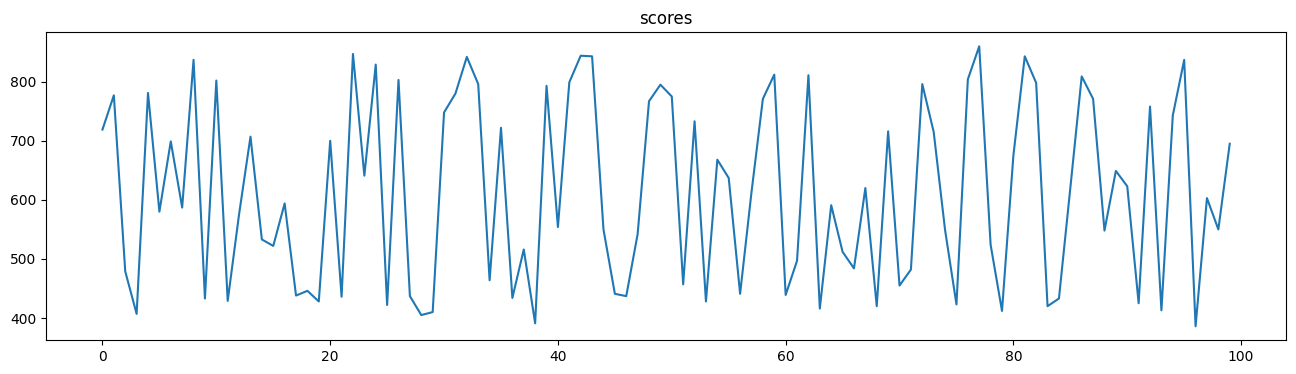

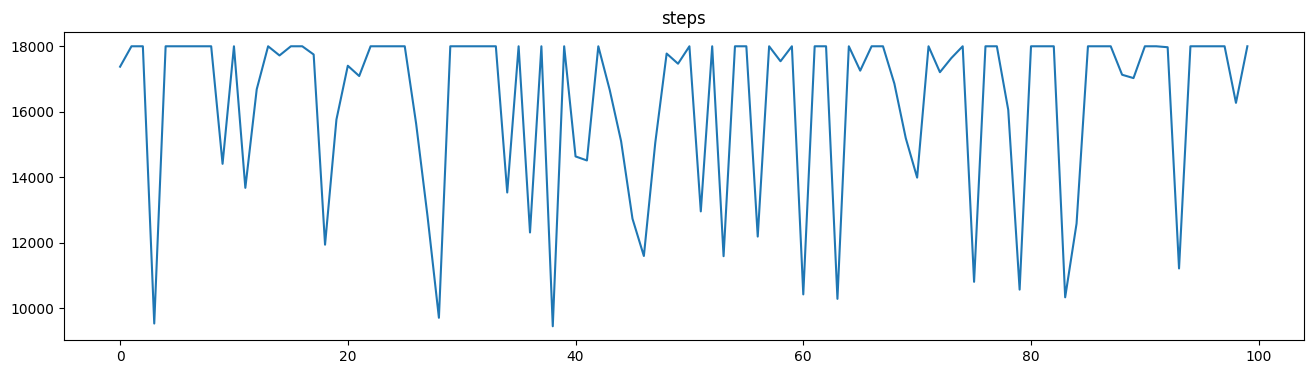

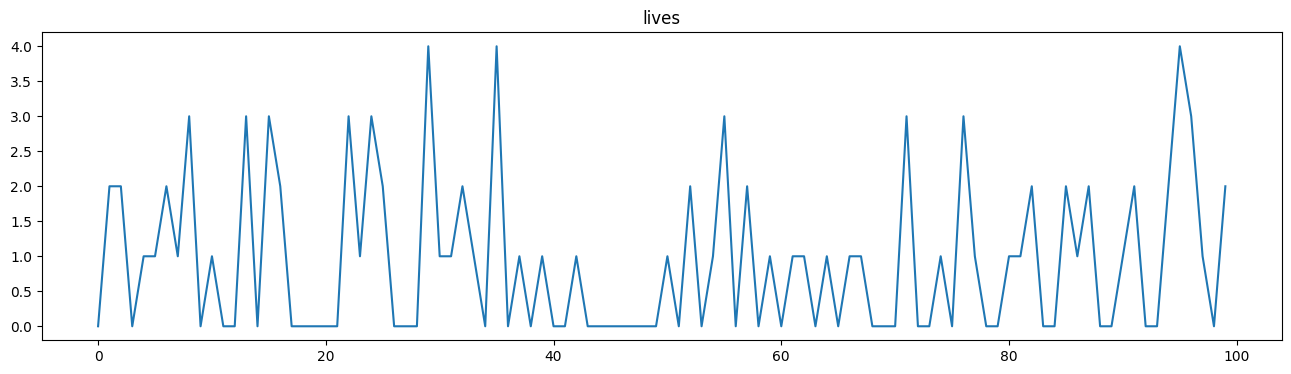

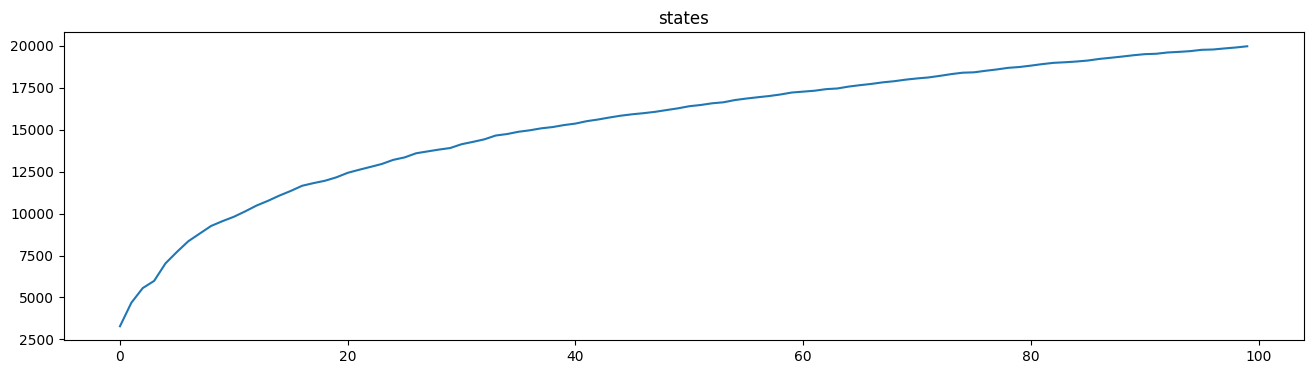

In [2]:
# 2025-11-01 Programmable XY
scores = [719.0, 777.0, 479.0, 407.0, 781.0, 580.0, 699.0, 587.0, 837.0, 433.0, 802.0, 429.0, 576.0, 707.0, 533.0, 522.0, 594.0, 438.0, 446.0, 428.0, 700.0, 436.0, 847.0, 641.0, 829.0, 422.0, 803.0, 437.0, 405.0, 410.0, 748.0, 780.0, 842.0, 796.0, 464.0, 722.0, 434.0, 516.0, 391.0, 793.0, 554.0, 799.0, 844.0, 843.0, 550.0, 441.0, 437.0, 542.0, 767.0, 795.0, 775.0, 457.0, 733.0, 428.0, 668.0, 637.0, 441.0, 613.0, 771.0, 812.0, 439.0, 497.0, 811.0, 416.0, 591.0, 512.0, 484.0, 620.0, 420.0, 716.0, 455.0, 482.0, 796.0, 715.0, 549.0, 423.0, 804.0, 860.0, 524.0, 412.0, 675.0, 843.0, 798.0, 420.0, 433.0, 620.0, 809.0, 771.0, 548.0, 649.0, 623.0, 425.0, 758.0, 413.0, 743.0, 837.0, 386.0, 603.0, 550.0, 695.0]
steps = [17377, 18000, 18000, 9538, 18000, 18000, 18000, 18000, 18000, 14412, 18000, 13679, 16687, 18000, 17720, 18000, 18000, 17749, 11944, 15764, 17406, 17092, 18000, 18000, 18000, 18000, 15636, 12814, 9713, 18000, 18000, 18000, 18000, 18000, 13537, 18000, 12317, 18000, 9454, 18000, 14638, 14515, 18000, 16668, 15103, 12738, 11599, 15051, 17778, 17468, 18000, 12960, 18000, 11593, 18000, 18000, 12192, 18000, 17543, 18000, 10427, 18000, 18000, 10291, 18000, 17256, 18000, 18000, 16860, 15197, 13991, 18000, 17209, 17639, 18000, 10811, 18000, 18000, 16059, 10573, 18000, 18000, 18000, 10338, 12589, 18000, 18000, 18000, 17131, 17029, 18000, 18000, 17971, 11219, 18000, 18000, 18000, 18000, 16273, 18000]
lives = [0, 2, 2, 0, 1, 1, 2, 1, 3, 0, 1, 0, 0, 3, 0, 3, 2, 0, 0, 0, 0, 0, 3, 1, 3, 2, 0, 0, 0, 4, 1, 1, 2, 1, 0, 4, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 1, 3, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 3, 0, 0, 1, 0, 3, 1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 2, 0, 0, 1, 2, 0, 0, 2, 4, 3, 1, 0, 2]
states = [3281, 4683, 5558, 5987, 7032, 7713, 8350, 8806, 9261, 9548, 9809, 10133, 10480, 10761, 11073, 11351, 11659, 11817, 11957, 12161, 12430, 12612, 12783, 12959, 13203, 13351, 13595, 13706, 13815, 13909, 14136, 14276, 14427, 14655, 14743, 14879, 14967, 15084, 15160, 15278, 15367, 15511, 15611, 15731, 15839, 15922, 15988, 16068, 16173, 16275, 16402, 16475, 16576, 16636, 16769, 16858, 16936, 17008, 17101, 17218, 17272, 17326, 17419, 17460, 17573, 17658, 17733, 17826, 17893, 17986, 18058, 18117, 18211, 18316, 18400, 18423, 18513, 18594, 18690, 18740, 18822, 18913, 18989, 19023, 19067, 19126, 19221, 19290, 19362, 19441, 19506, 19529, 19606, 19642, 19687, 19765, 19784, 19847, 19904, 19976]
print(len(scores))
p = pd.Series(scores).plot.line(figsize=(16, 4),title="scores")
plt.show() 
p = pd.Series(steps).plot.line(figsize=(16, 4),title="steps")
plt.show() 
p = pd.Series(lives).plot.line(figsize=(16, 4),title="lives")
plt.show() 
p = pd.Series(states).plot.line(figsize=(16, 4),title="states") 

100


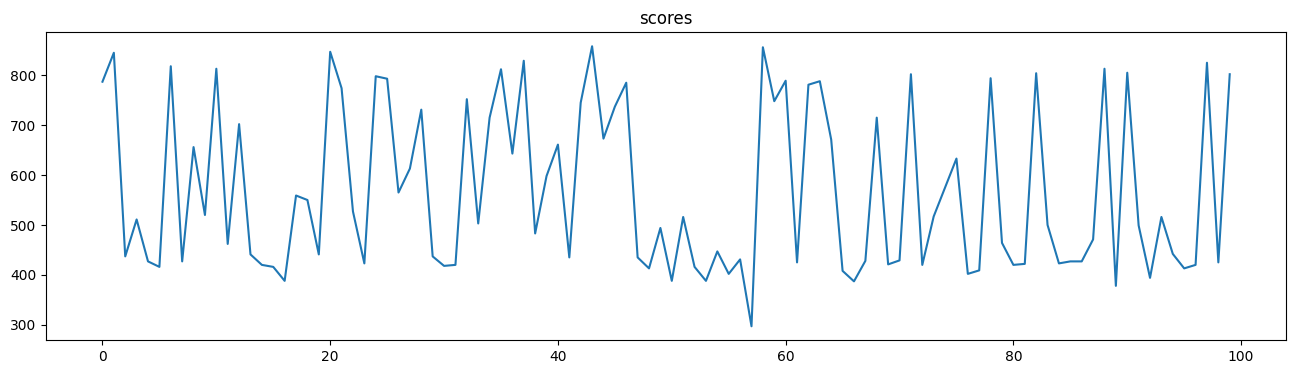

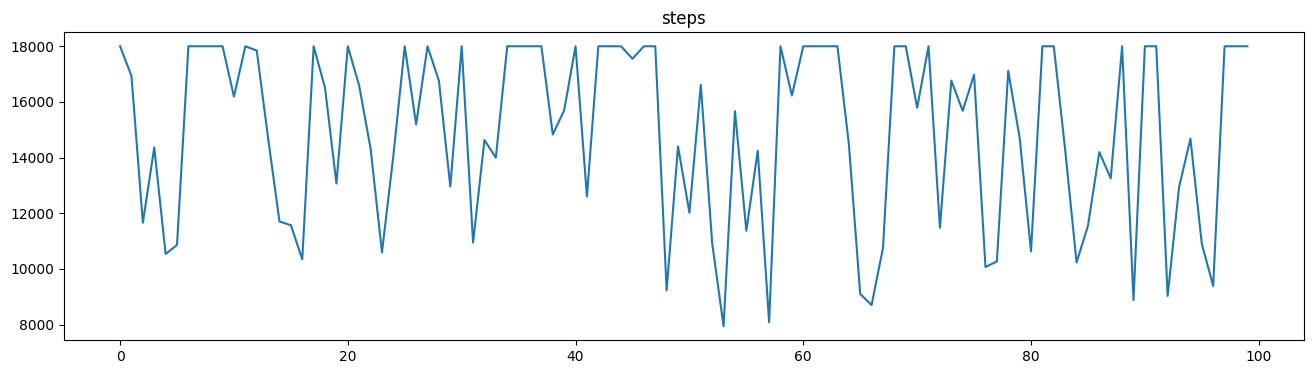

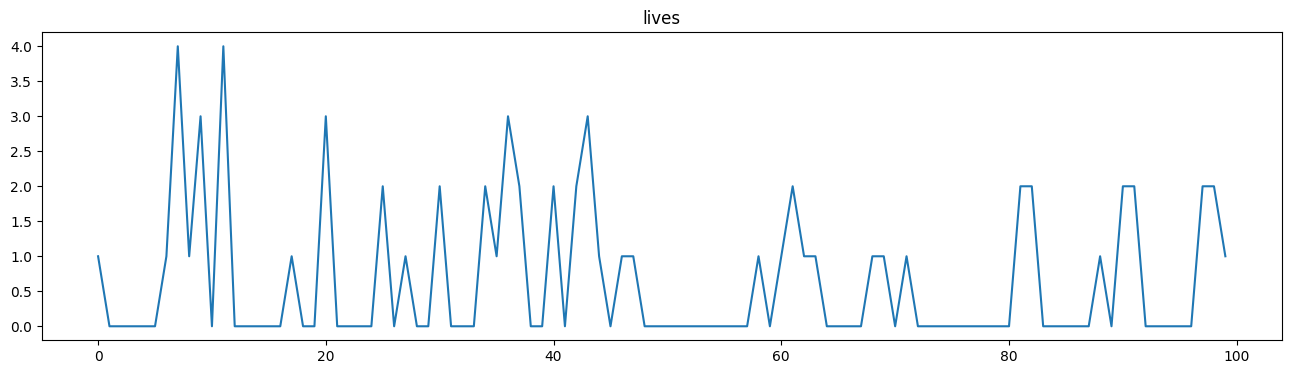

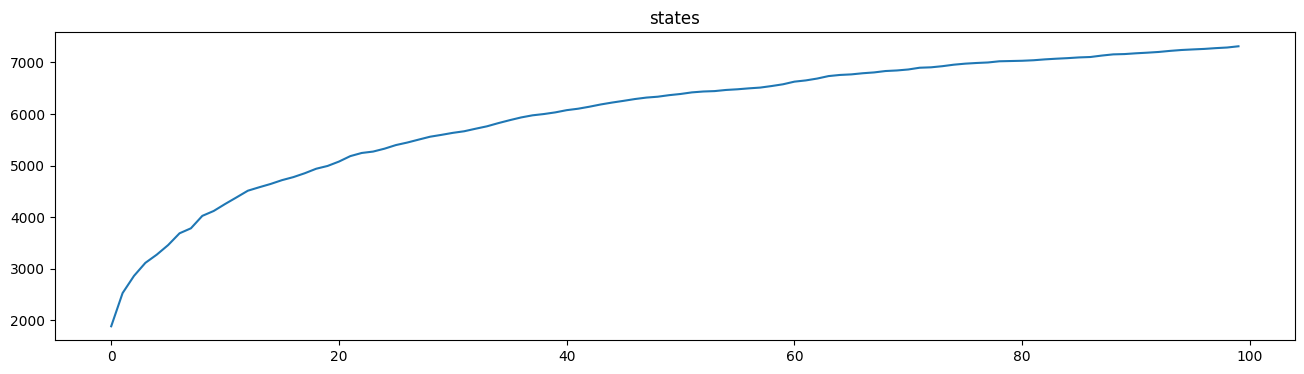

In [3]:
# 2025-11-02 Programmable XY
scores = [787.0, 845.0, 437.0, 511.0, 427.0, 416.0, 818.0, 427.0, 656.0, 520.0, 813.0, 462.0, 702.0, 441.0, 420.0, 416.0, 388.0, 559.0, 550.0, 441.0, 847.0, 774.0, 527.0, 423.0, 798.0, 793.0, 565.0, 613.0, 731.0, 437.0, 418.0, 420.0, 752.0, 503.0, 715.0, 812.0, 643.0, 829.0, 483.0, 598.0, 661.0, 435.0, 745.0, 858.0, 673.0, 737.0, 785.0, 435.0, 413.0, 494.0, 388.0, 516.0, 416.0, 388.0, 447.0, 402.0, 431.0, 297.0, 856.0, 748.0, 789.0, 425.0, 781.0, 788.0, 671.0, 408.0, 387.0, 428.0, 715.0, 421.0, 429.0, 802.0, 420.0, 517.0, 575.0, 633.0, 402.0, 409.0, 794.0, 464.0, 420.0, 422.0, 804.0, 500.0, 423.0, 427.0, 427.0, 471.0, 813.0, 378.0, 805.0, 499.0, 394.0, 516.0, 442.0, 413.0, 420.0, 825.0, 425.0, 802.0]
stepss = [18000, 16933, 11658, 14363, 10537, 10860, 18000, 18000, 18000, 18000, 16190, 18000, 17847, 14695, 11703, 11570, 10343, 18000, 16500, 13068, 18000, 16578, 14321, 10596, 14072, 18000, 15195, 18000, 16760, 12961, 18000, 10948, 14631, 13998, 18000, 18000, 18000, 18000, 14832, 15697, 18000, 12602, 18000, 18000, 18000, 17552, 18000, 18000, 9231, 14400, 12018, 16612, 10918, 7939, 15666, 11372, 14244, 8081, 18000, 16229, 18000, 18000, 18000, 18000, 14498, 9101, 8700, 10756, 18000, 18000, 15792, 18000, 11479, 16768, 15683, 16981, 10068, 10270, 17115, 14717, 10632, 18000, 18000, 14274, 10233, 11548, 14197, 13254, 18000, 8877, 18000, 18000, 9027, 12932, 14678, 10901, 9389, 18000, 18000, 18000]
livess = [1, 0, 0, 0, 0, 0, 1, 4, 1, 3, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 2, 1, 3, 2, 0, 0, 2, 0, 2, 3, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 2, 2, 1]
states = [1883, 2527, 2860, 3113, 3272, 3458, 3686, 3783, 4024, 4119, 4254, 4382, 4512, 4579, 4643, 4717, 4776, 4851, 4938, 4992, 5077, 5183, 5244, 5271, 5327, 5397, 5446, 5503, 5559, 5595, 5634, 5665, 5714, 5761, 5823, 5880, 5933, 5974, 5999, 6031, 6074, 6102, 6141, 6185, 6222, 6255, 6290, 6318, 6335, 6365, 6388, 6419, 6436, 6444, 6466, 6479, 6497, 6512, 6542, 6576, 6627, 6651, 6687, 6735, 6757, 6768, 6790, 6806, 6833, 6844, 6863, 6897, 6905, 6927, 6956, 6976, 6989, 6999, 7022, 7027, 7032, 7042, 7059, 7072, 7083, 7097, 7105, 7133, 7156, 7162, 7177, 7189, 7203, 7224, 7241, 7252, 7262, 7277, 7289, 7313]
print(len(scores))
p = pd.Series(scores).plot.line(figsize=(16, 4),title="scores")
plt.show() 
p = pd.Series(stepss).plot.line(figsize=(16, 4),title="steps")
plt.show() 
p = pd.Series(livess).plot.line(figsize=(16, 4),title="lives")
plt.show() 
p = pd.Series(states).plot.line(figsize=(16, 4),title="states") 

10


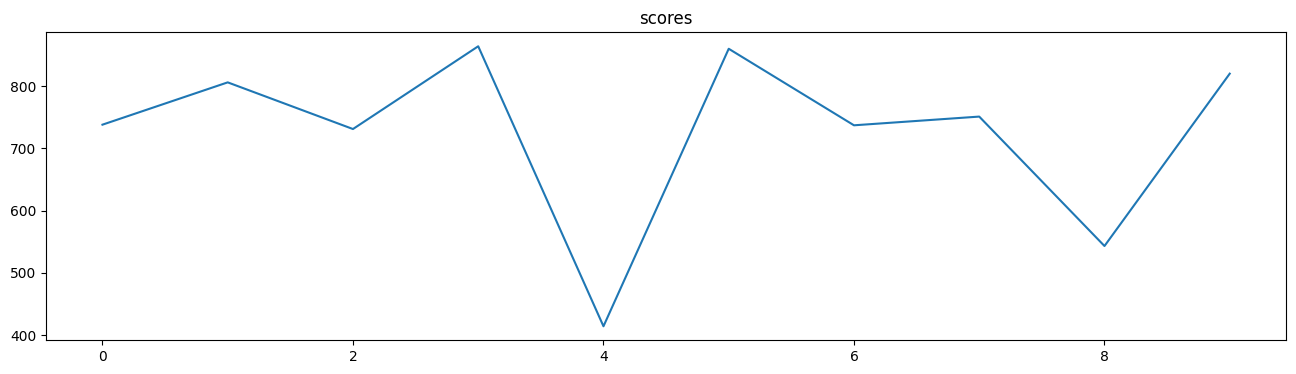

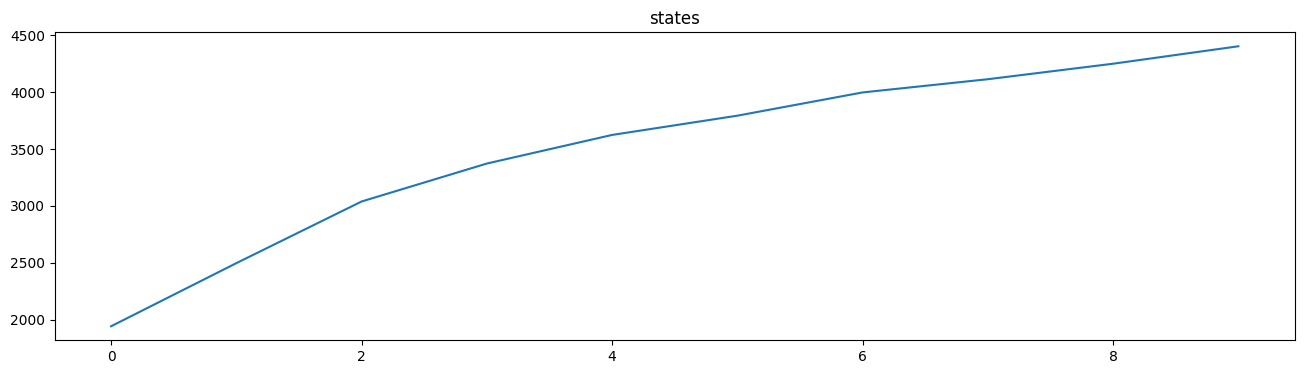

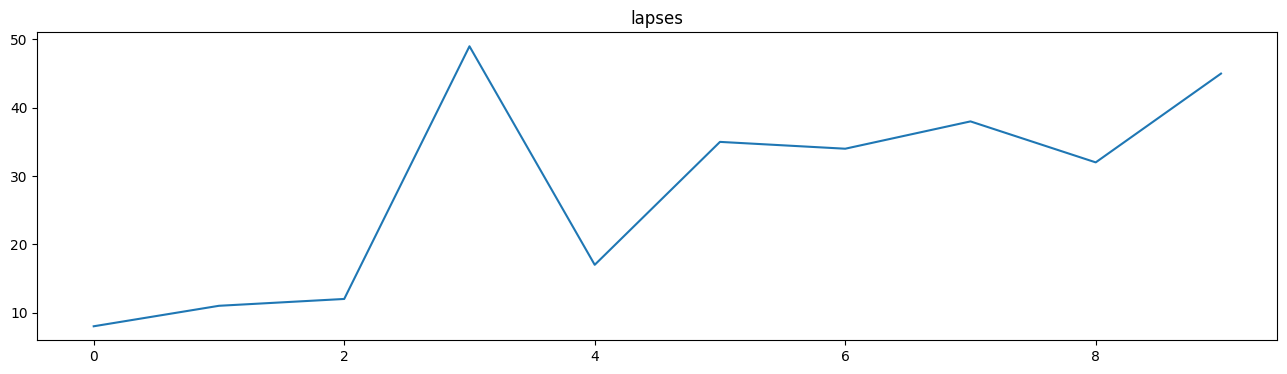

In [4]:
# 2025-11-03 Programmable XY, 10 time, 180,000 limit
cause="terminated"; score=726.4; steps=26905.7; lives=0.1; lapse="0:00:45.002465"
scores = [738.0, 806.0, 731.0, 864.0, 414.0, 860.0, 737.0, 751.0, 543.0, 820.0]
stepss = [19234, 18188, 15959, 108000, 12092, 24150, 18370, 16175, 15460, 21429]
livess = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
lapses = [8, 11, 12, 49, 17, 35, 34, 38, 32, 45]
states = [1944, 2498, 3039, 3372, 3623, 3792, 3996, 4112, 4248, 4401]
print(len(scores))
p = pd.Series(scores).plot.line(figsize=(16, 4),title="scores")
plt.show() 
p = pd.Series(states).plot.line(figsize=(16, 4),title="states") 
plt.show() 
p = pd.Series(lapses).plot.line(figsize=(16, 4),title="lapses") 

10


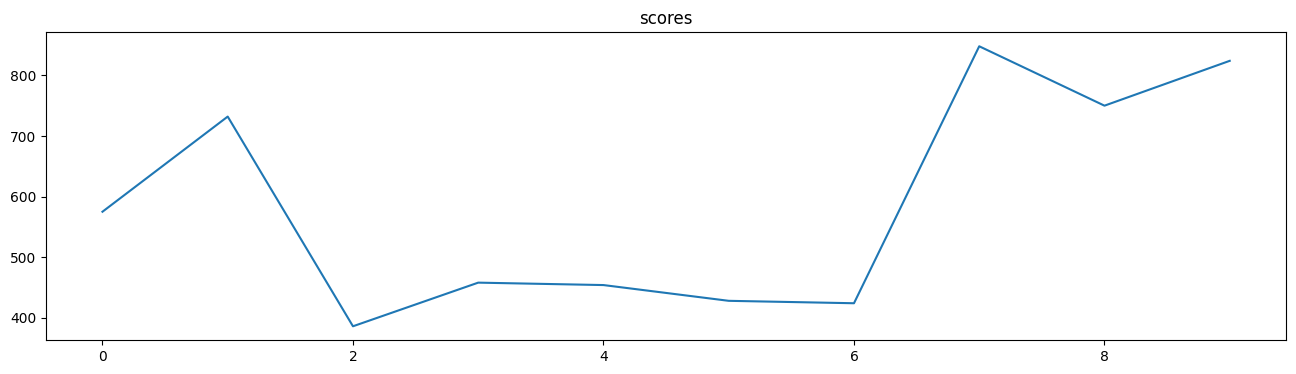

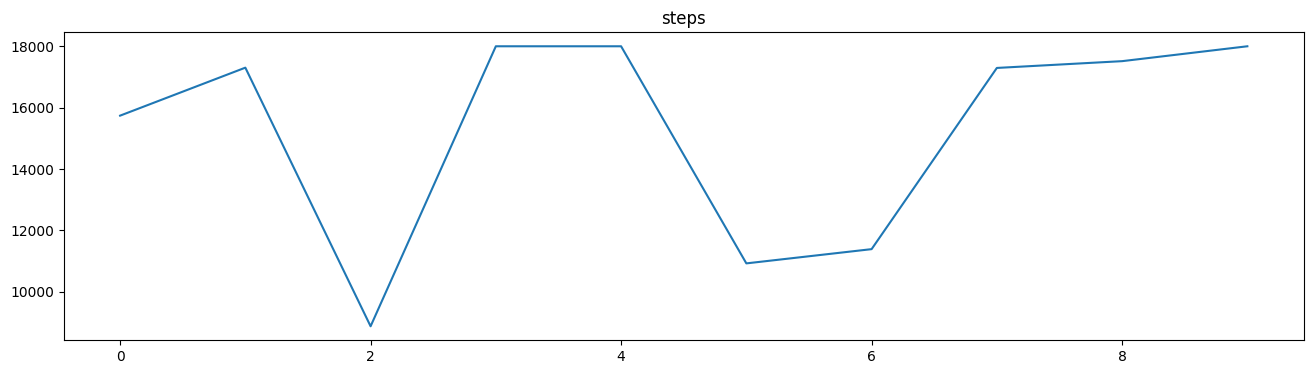

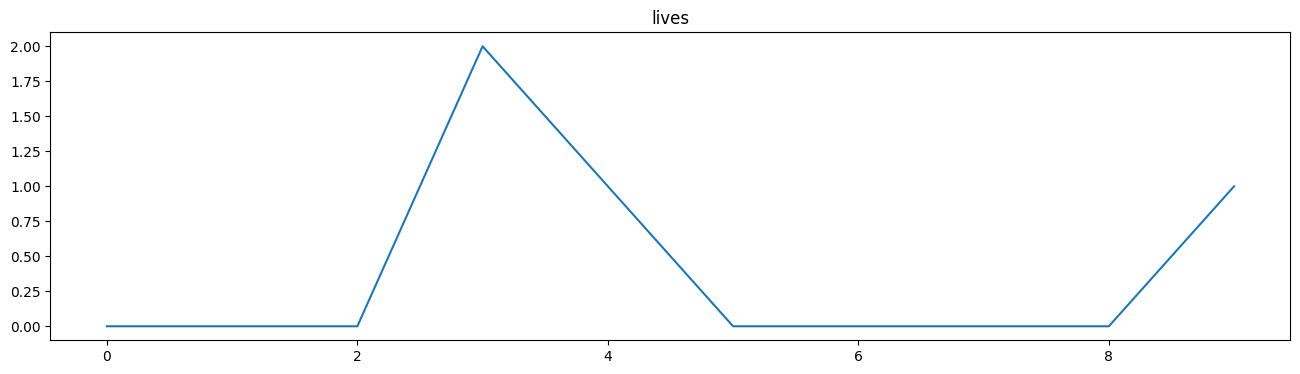

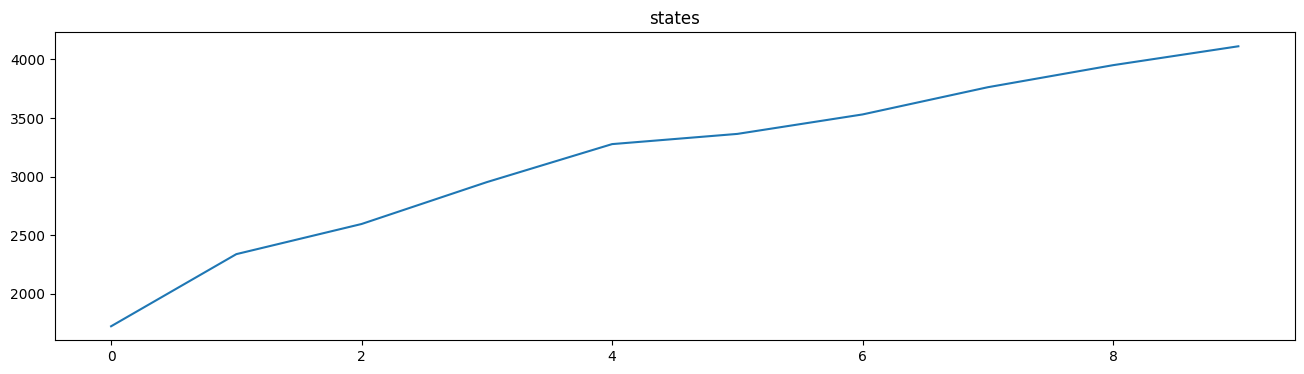

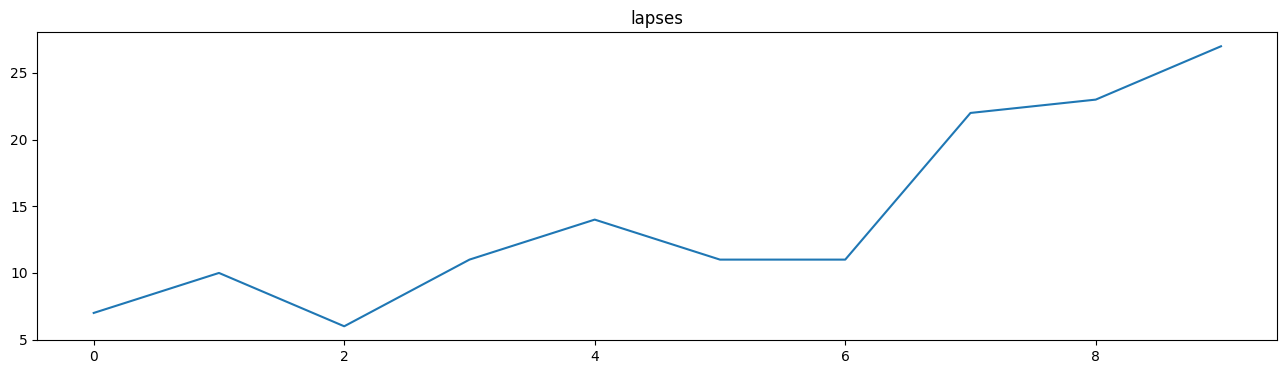

In [5]:
# 2025-11-02 Programmable XY, 10 time, 18,000 limit
cause="18000_steps_limit"; score=587.9; steps=15303.7; lives=0.4; lapse="0:00:26.632621"
scores = [575.0, 732.0, 386.0, 458.0, 454.0, 428.0, 424.0, 848.0, 750.0, 824.0]
stepss = [15739, 17303, 8874, 18000, 18000, 10924, 11388, 17294, 17515, 18000]
livess = [0, 0, 0, 2, 1, 0, 0, 0, 0, 1]
lapses = [7, 10, 6, 11, 14, 11, 11, 22, 23, 27]
states = [1724, 2339, 2596, 2953, 3277, 3364, 3530, 3762, 3950, 4111]
print(len(scores))
p = pd.Series(scores).plot.line(figsize=(16, 4),title="scores"); plt.show() 
p = pd.Series(stepss).plot.line(figsize=(16, 4),title="steps"); plt.show() 
p = pd.Series(livess).plot.line(figsize=(16, 4),title="lives"); plt.show() 
p = pd.Series(states).plot.line(figsize=(16, 4),title="states"); plt.show() 
p = pd.Series(lapses).plot.line(figsize=(16, 4),title="lapses") 

10


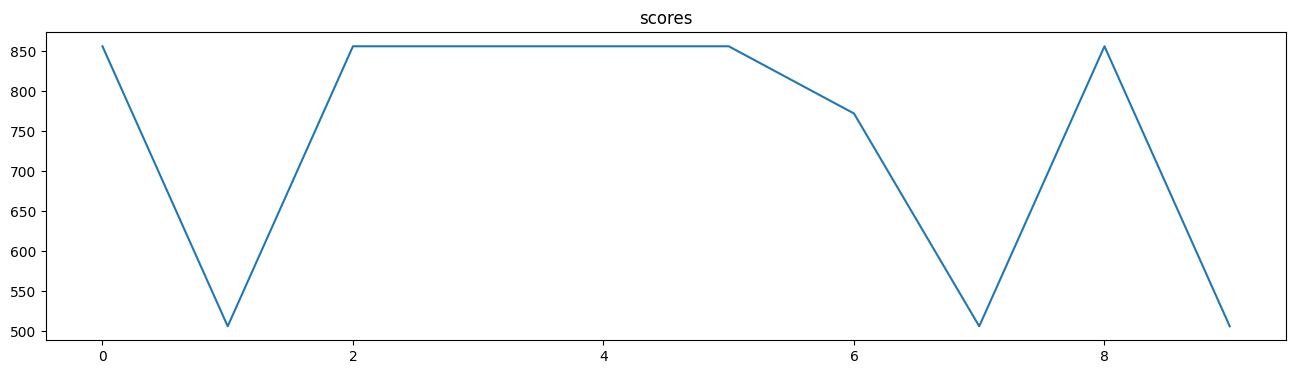

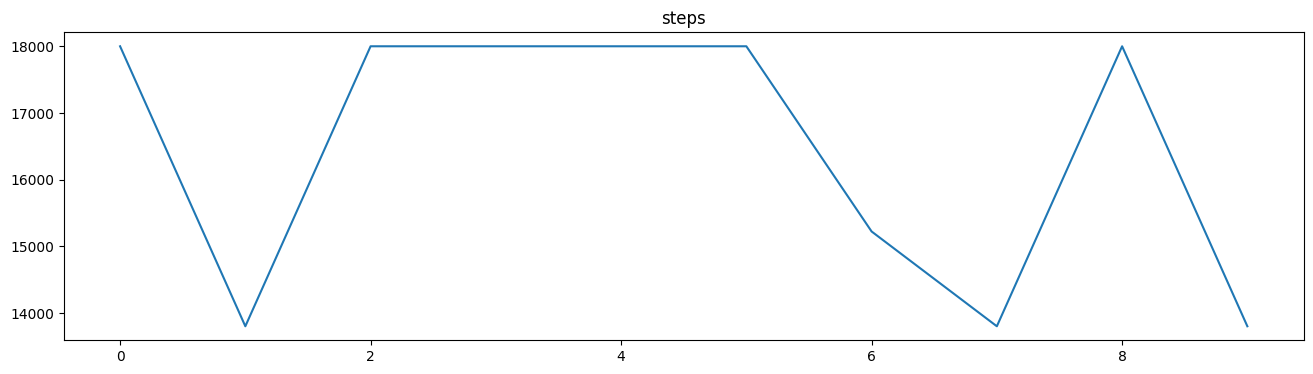

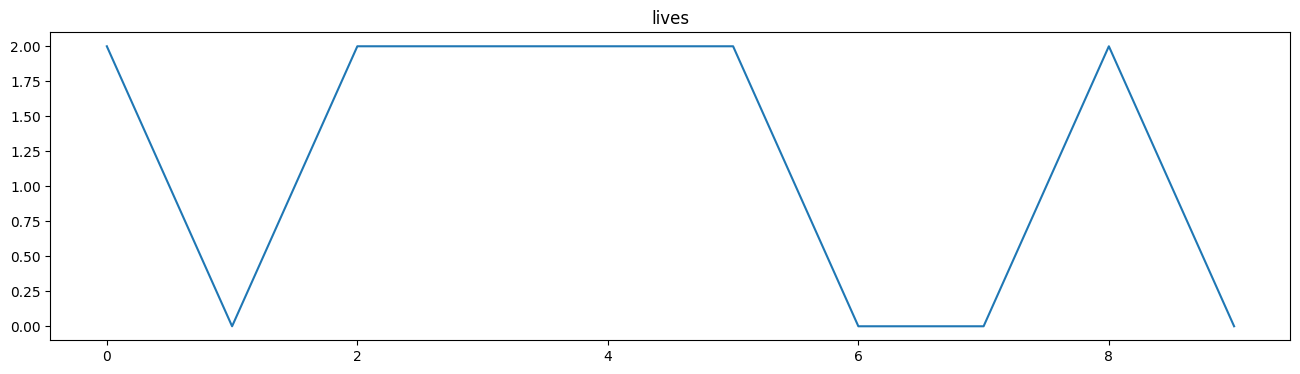

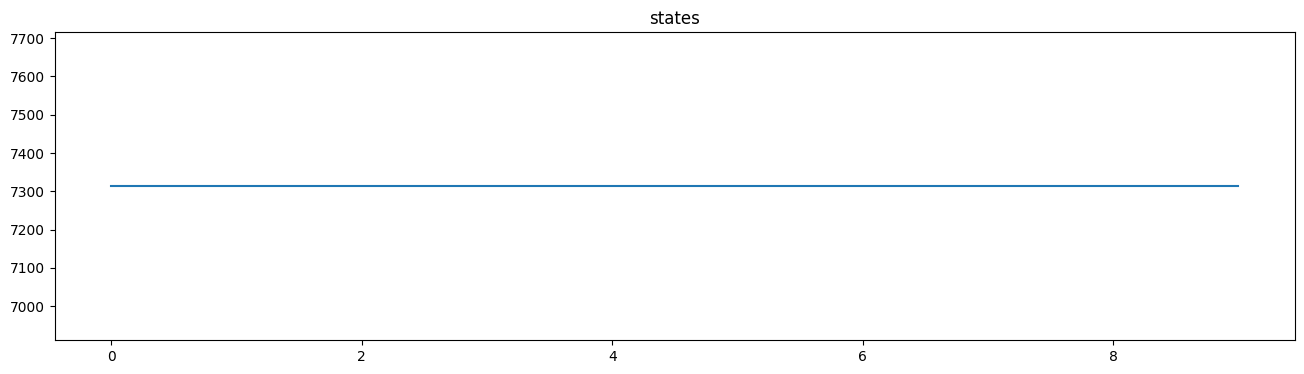

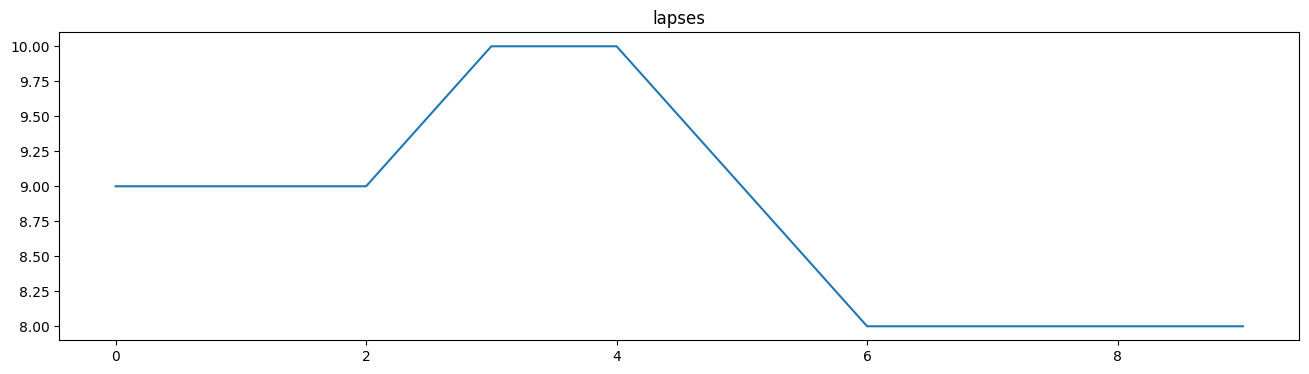

In [6]:
# 2025-11-03 Following Learned by Programmable XY, 10 times, 18,000 limit, 100 games
cause="terminated"; score=742.6; steps=16463.3; lives=1.2; lapse="0:00:07.812084"
scores = [856.0, 506.0, 856.0, 856.0, 856.0, 856.0, 772.0, 506.0, 856.0, 506.0]
stepss = [18000, 13803, 18000, 18000, 18000, 18000, 15224, 13803, 18000, 13803]
livess = [2, 0, 2, 2, 2, 2, 0, 0, 2, 0]
lapses = [9, 9, 9, 10, 10, 9, 8, 8, 8, 8]
states = [7313, 7313, 7313, 7313, 7313, 7313, 7313, 7313, 7313, 7313]
print(len(scores))
p = pd.Series(scores).plot.line(figsize=(16, 4),title="scores"); plt.show() 
p = pd.Series(stepss).plot.line(figsize=(16, 4),title="steps"); plt.show() 
p = pd.Series(livess).plot.line(figsize=(16, 4),title="lives"); plt.show() 
p = pd.Series(states).plot.line(figsize=(16, 4),title="states"); plt.show() 
p = pd.Series(lapses).plot.line(figsize=(16, 4),title="lapses") 

100


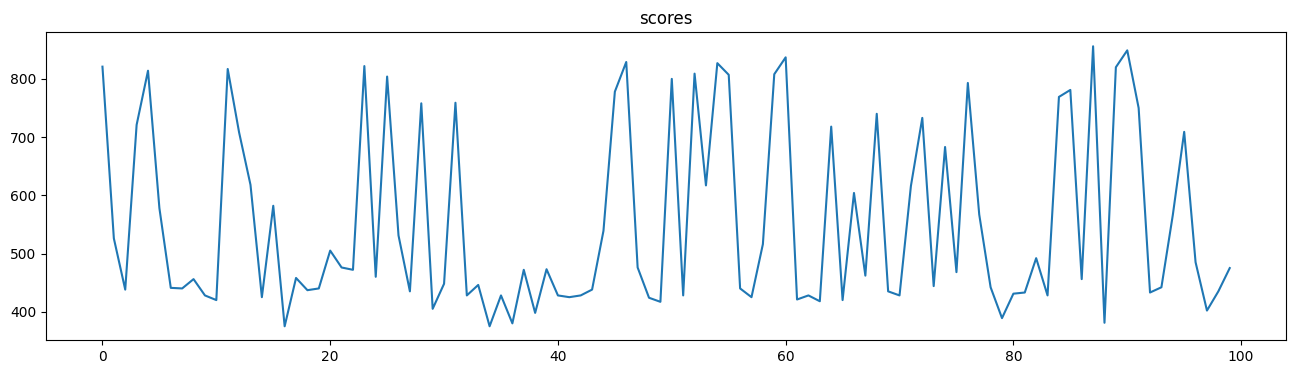

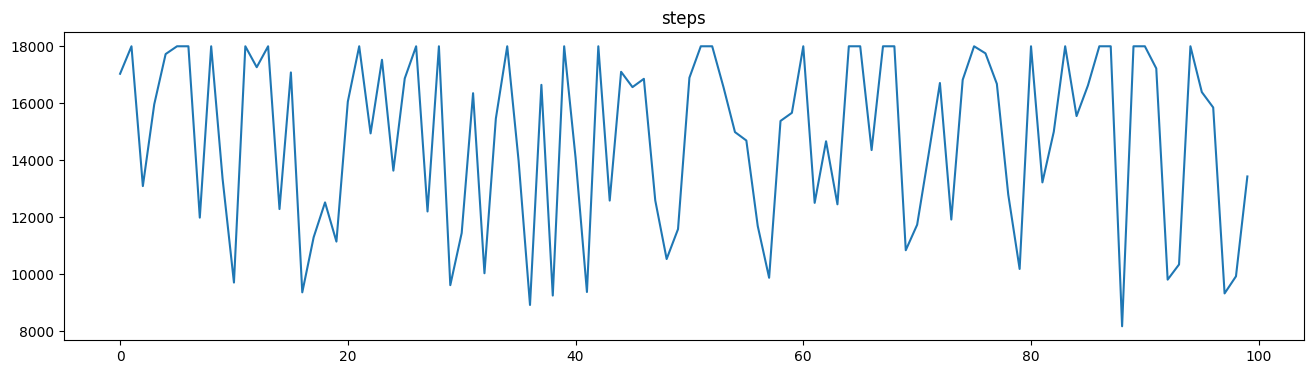

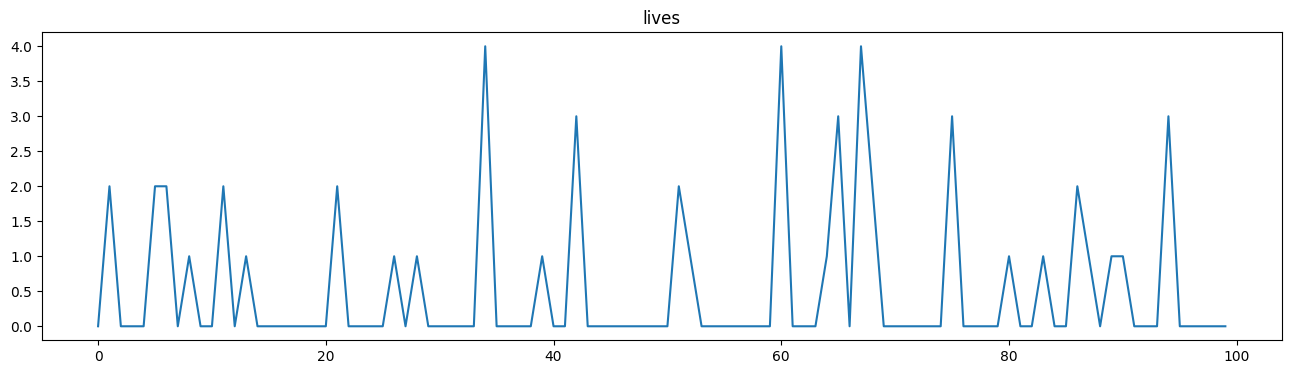

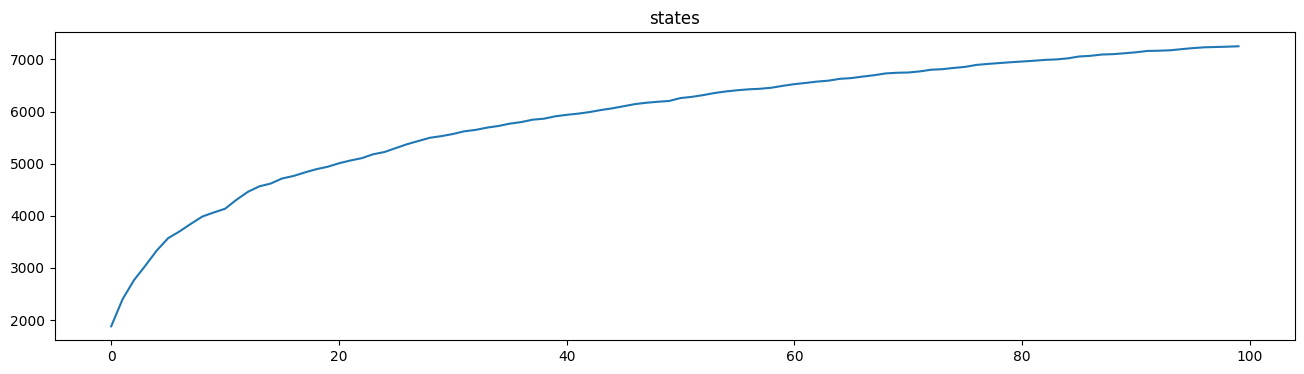

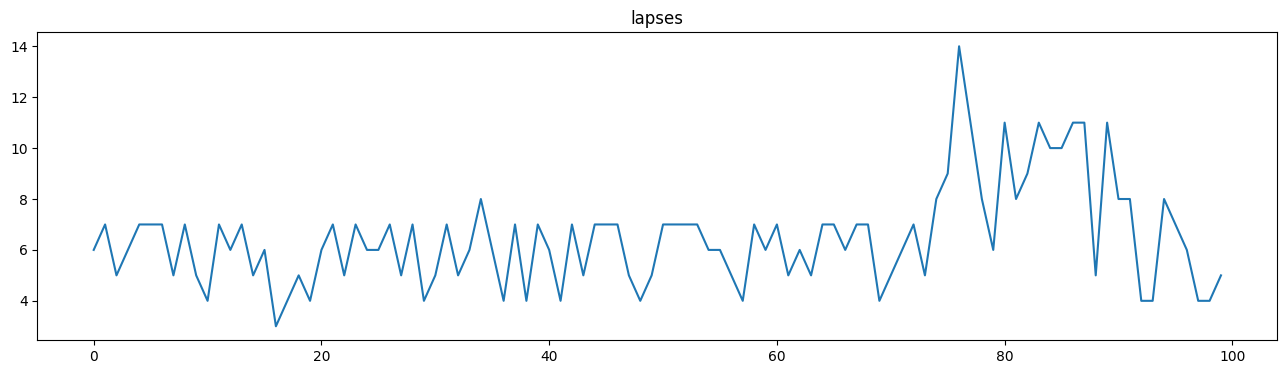

In [7]:
# 2025-11-03 Programmable XY
scores = [821.0, 526.0, 438.0, 721.0, 814.0, 578.0, 441.0, 440.0, 456.0, 428.0, 420.0, 817.0, 708.0, 618.0, 425.0, 582.0, 375.0, 458.0, 437.0, 440.0, 505.0, 476.0, 472.0, 822.0, 460.0, 804.0, 531.0, 435.0, 758.0, 405.0, 448.0, 759.0, 428.0, 446.0, 375.0, 428.0, 380.0, 472.0, 398.0, 473.0, 428.0, 425.0, 428.0, 438.0, 539.0, 778.0, 829.0, 476.0, 424.0, 417.0, 800.0, 428.0, 809.0, 617.0, 827.0, 807.0, 440.0, 425.0, 516.0, 808.0, 837.0, 421.0, 428.0, 418.0, 718.0, 420.0, 604.0, 462.0, 740.0, 435.0, 428.0, 616.0, 733.0, 444.0, 683.0, 468.0, 793.0, 567.0, 442.0, 389.0, 431.0, 433.0, 492.0, 428.0, 769.0, 781.0, 456.0, 856.0, 381.0, 820.0, 849.0, 750.0, 433.0, 442.0, 566.0, 709.0, 485.0, 402.0, 435.0, 475.0]
stepss = [17036, 18000, 13098, 15965, 17727, 18000, 18000, 11992, 18000, 13361, 9716, 18000, 17266, 18000, 12293, 17083, 9373, 11304, 12526, 11152, 16058, 18000, 14946, 17526, 13640, 16873, 18000, 12208, 18000, 9625, 11452, 16355, 10042, 15464, 18000, 13980, 8930, 16648, 9260, 18000, 14100, 9385, 18000, 12590, 17105, 16568, 16859, 12596, 10541, 11590, 16897, 18000, 18000, 16555, 14992, 14696, 11699, 9884, 15382, 15667, 18000, 12510, 14670, 12459, 18000, 18000, 14361, 18000, 18000, 10849, 11743, 14193, 16712, 11925, 16824, 18000, 17752, 16683, 12803, 10193, 18000, 13228, 15003, 18000, 15553, 16627, 18000, 18000, 8183, 18000, 18000, 17224, 9818, 10350, 18000, 16394, 15854, 9335, 9935, 13436]
livess = [0, 2, 0, 0, 0, 2, 2, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 1, 3, 0, 4, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 3, 0, 0, 0, 0, 0]
lapses = [6, 7, 5, 6, 7, 7, 7, 5, 7, 5, 4, 7, 6, 7, 5, 6, 3, 4, 5, 4, 6, 7, 5, 7, 6, 6, 7, 5, 7, 4, 5, 7, 5, 6, 8, 6, 4, 7, 4, 7, 6, 4, 7, 5, 7, 7, 7, 5, 4, 5, 7, 7, 7, 7, 6, 6, 5, 4, 7, 6, 7, 5, 6, 5, 7, 7, 6, 7, 7, 4, 5, 6, 7, 5, 8, 9, 14, 11, 8, 6, 11, 8, 9, 11, 10, 10, 11, 11, 5, 11, 8, 8, 4, 4, 8, 7, 6, 4, 4, 5]
states = [1881, 2401, 2765, 3044, 3334, 3571, 3700, 3846, 3985, 4063, 4135, 4307, 4459, 4564, 4618, 4715, 4763, 4831, 4893, 4940, 5007, 5060, 5105, 5180, 5223, 5299, 5374, 5436, 5497, 5528, 5568, 5620, 5647, 5691, 5722, 5767, 5797, 5843, 5862, 5908, 5936, 5959, 5989, 6028, 6061, 6101, 6142, 6168, 6187, 6202, 6258, 6281, 6315, 6355, 6385, 6408, 6426, 6436, 6457, 6493, 6525, 6548, 6574, 6592, 6627, 6641, 6670, 6696, 6730, 6743, 6748, 6769, 6801, 6812, 6836, 6856, 6894, 6913, 6929, 6945, 6959, 6973, 6990, 6999, 7019, 7055, 7068, 7093, 7100, 7117, 7136, 7161, 7166, 7174, 7196, 7216, 7231, 7237, 7243, 7251]
print(len(scores))
p = pd.Series(scores).plot.line(figsize=(16, 4),title="scores");plt.show() 
p = pd.Series(stepss).plot.line(figsize=(16, 4),title="steps");plt.show() 
p = pd.Series(livess).plot.line(figsize=(16, 4),title="lives");plt.show() 
p = pd.Series(states).plot.line(figsize=(16, 4),title="states"); plt.show() 
p = pd.Series(lapses).plot.line(figsize=(16, 4),title="lapses") 

100


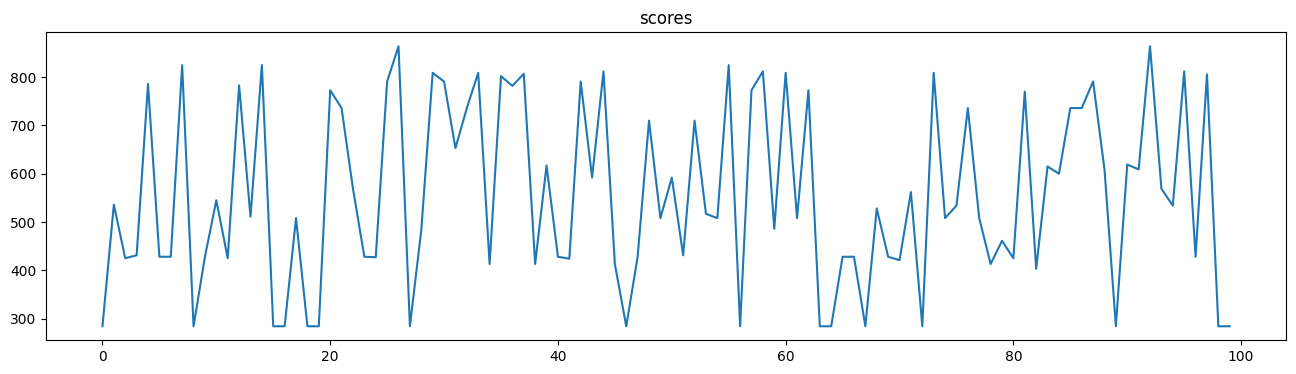

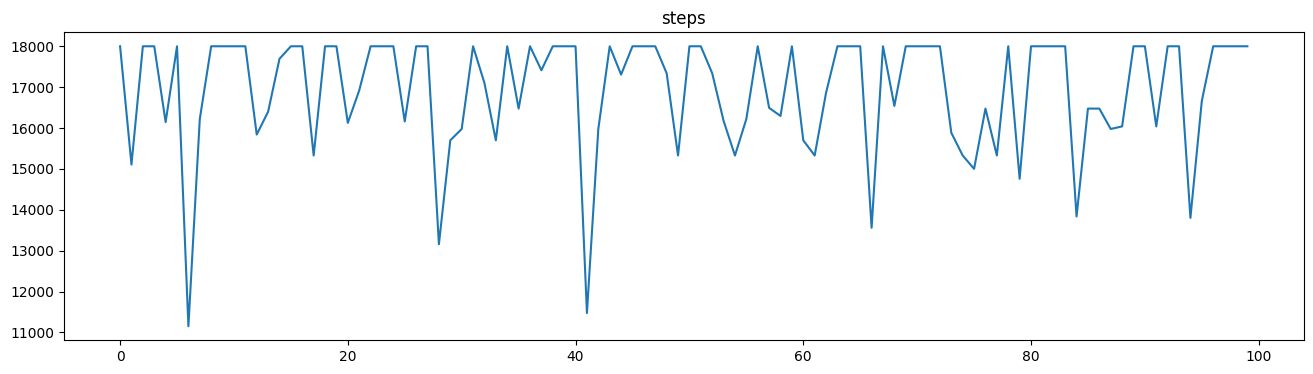

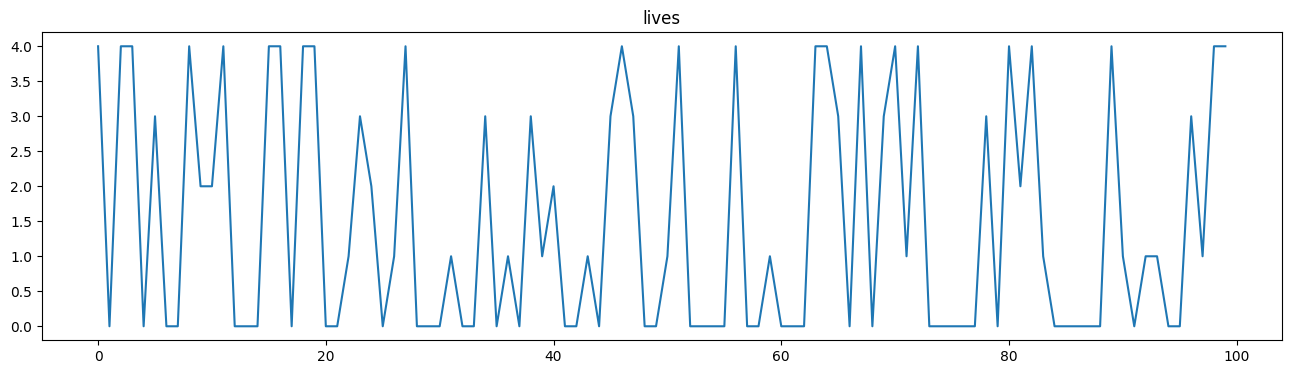

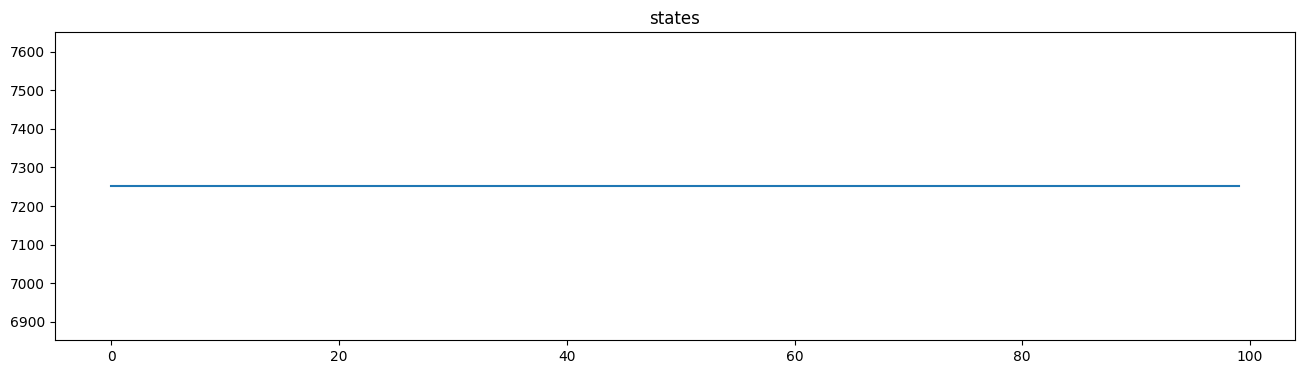

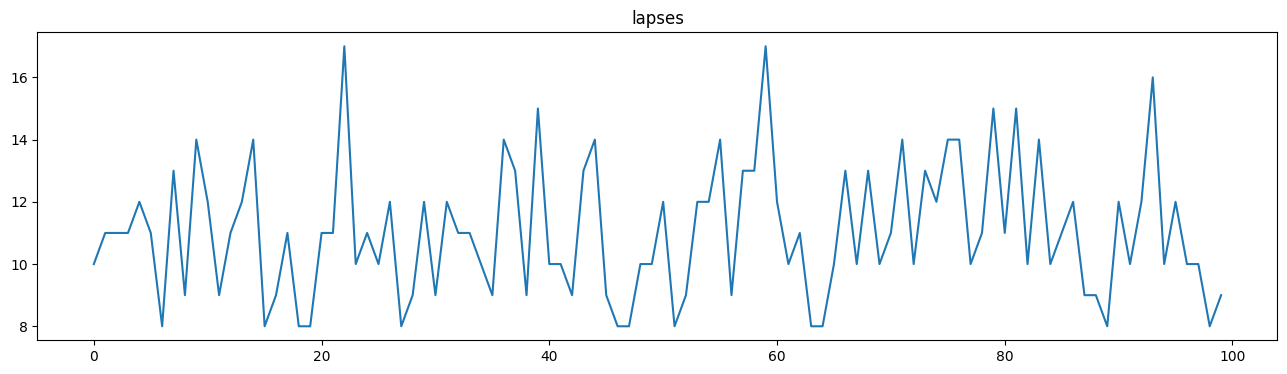

In [8]:
# 2025-11-03 Following Learned by Programmable XY, 100 games, 18,000 limit, trained on the above
cause="18000_steps_limit"; score=556.7; steps=16919.8; lives=1.5; lapse="0:00:09.139235"
scores1 = [284.0, 536.0, 425.0, 431.0, 786.0, 428.0, 428.0, 825.0, 284.0, 428.0, 545.0, 425.0, 783.0, 511.0, 825.0, 284.0, 284.0, 508.0, 284.0, 284.0, 773.0, 736.0, 569.0, 428.0, 427.0, 791.0, 864.0, 284.0, 483.0, 809.0, 791.0, 653.0, 736.0, 809.0, 413.0, 802.0, 782.0, 807.0, 413.0, 617.0, 428.0, 424.0, 791.0, 592.0, 812.0, 413.0, 284.0, 428.0, 710.0, 508.0, 592.0, 431.0, 710.0, 517.0, 508.0, 825.0, 284.0, 773.0, 812.0, 486.0, 809.0, 508.0, 773.0, 284.0, 284.0, 428.0, 428.0, 284.0, 528.0, 428.0, 421.0, 562.0, 284.0, 809.0, 508.0, 534.0, 736.0, 508.0, 413.0, 461.0, 425.0, 770.0, 403.0, 615.0, 600.0, 736.0, 736.0, 791.0, 609.0, 284.0, 619.0, 609.0, 864.0, 569.0, 534.0, 812.0, 428.0, 806.0, 284.0, 284.0]
stepss1 = [18000, 15106, 18000, 18000, 16145, 18000, 11151, 16222, 18000, 18000, 18000, 18000, 15841, 16399, 17694, 18000, 18000, 15328, 18000, 18000, 16126, 16920, 18000, 18000, 18000, 16161, 18000, 18000, 13158, 15700, 15977, 18000, 17100, 15700, 18000, 16475, 18000, 17413, 18000, 18000, 18000, 11474, 15977, 18000, 17307, 18000, 18000, 18000, 17341, 15328, 18000, 18000, 17341, 16177, 15328, 16222, 18000, 16494, 16295, 18000, 15700, 15328, 16862, 18000, 18000, 18000, 13560, 18000, 16541, 18000, 18000, 18000, 18000, 15884, 15328, 15002, 16476, 15328, 18000, 14758, 18000, 18000, 18000, 18000, 13837, 16476, 16476, 15977, 16040, 18000, 18000, 16040, 18000, 18000, 13802, 16663, 18000, 18000, 18000, 18000]
livess1 = [4, 0, 4, 4, 0, 3, 0, 0, 4, 2, 2, 4, 0, 0, 0, 4, 4, 0, 4, 4, 0, 0, 1, 3, 2, 0, 1, 4, 0, 0, 0, 1, 0, 0, 3, 0, 1, 0, 3, 1, 2, 0, 0, 1, 0, 3, 4, 3, 0, 0, 1, 4, 0, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 4, 4, 3, 0, 4, 0, 3, 4, 1, 4, 0, 0, 0, 0, 0, 3, 0, 4, 2, 4, 1, 0, 0, 0, 0, 0, 4, 1, 0, 1, 1, 0, 0, 3, 1, 4, 4]
lapses1 = [10, 11, 11, 11, 12, 11, 8, 13, 9, 14, 12, 9, 11, 12, 14, 8, 9, 11, 8, 8, 11, 11, 17, 10, 11, 10, 12, 8, 9, 12, 9, 12, 11, 11, 10, 9, 14, 13, 9, 15, 10, 10, 9, 13, 14, 9, 8, 8, 10, 10, 12, 8, 9, 12, 12, 14, 9, 13, 13, 17, 12, 10, 11, 8, 8, 10, 13, 10, 13, 10, 11, 14, 10, 13, 12, 14, 14, 10, 11, 15, 11, 15, 10, 14, 10, 11, 12, 9, 9, 8, 12, 10, 12, 16, 10, 12, 10, 10, 8, 9]
states1 = [7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251, 7251]
print(len(scores))
p = pd.Series(scores1).plot.line(figsize=(16, 4),title="scores");plt.show() 
p = pd.Series(stepss1).plot.line(figsize=(16, 4),title="steps");plt.show() 
p = pd.Series(livess1).plot.line(figsize=(16, 4),title="lives");plt.show() 
p = pd.Series(states1).plot.line(figsize=(16, 4),title="states"); plt.show() 
p = pd.Series(lapses1).plot.line(figsize=(16, 4),title="lapses") 


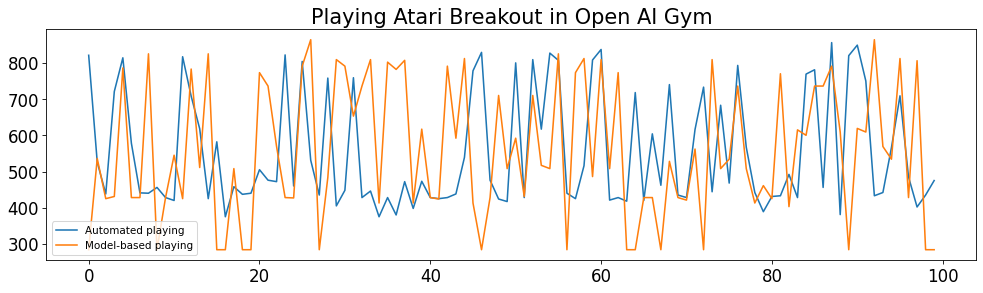

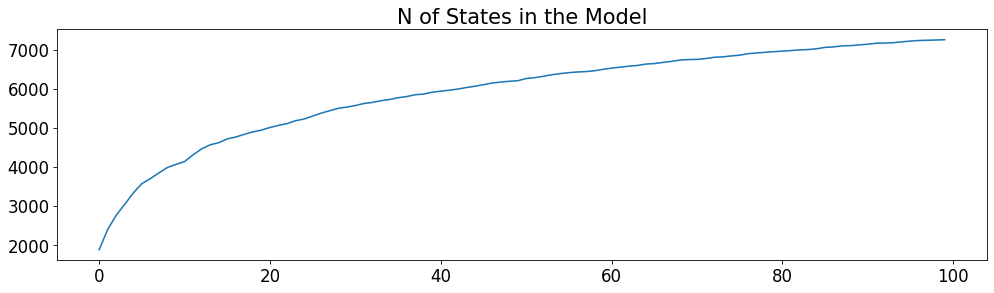

In [9]:
s1 = pd.Series(scores)
s2 = pd.Series(scores1)
df = pd.DataFrame({'Automated playing': s1, 'Model-based playing': s2})
plt.rcParams["figure.dpi"] = 75
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym", fontsize=20);plt.show()
states = [1881, 2401, 2765, 3044, 3334, 3571, 3700, 3846, 3985, 4063, 4135, 4307, 4459, 4564, 4618, 4715, 4763, 4831, 4893, 4940, 5007, 5060, 5105, 5180, 5223, 5299, 5374, 5436, 5497, 5528, 5568, 5620, 5647, 5691, 5722, 5767, 5797, 5843, 5862, 5908, 5936, 5959, 5989, 6028, 6061, 6101, 6142, 6168, 6187, 6202, 6258, 6281, 6315, 6355, 6385, 6408, 6426, 6436, 6457, 6493, 6525, 6548, 6574, 6592, 6627, 6641, 6670, 6696, 6730, 6743, 6748, 6769, 6801, 6812, 6836, 6856, 6894, 6913, 6929, 6945, 6959, 6973, 6990, 6999, 7019, 7055, 7068, 7093, 7100, 7117, 7136, 7161, 7166, 7174, 7196, 7216, 7231, 7237, 7243, 7251]
p = pd.Series(states).plot.line(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model", fontsize=20)

## Experiential Learning Player

### Space: (Action,PositiveFeedback,NegativeFeedback,RacketX,BallX)
### Hyperparameters: T=1, StateCount=2, StateSimilarity=0.9999, TransUtility=0, TransCount=1  

100


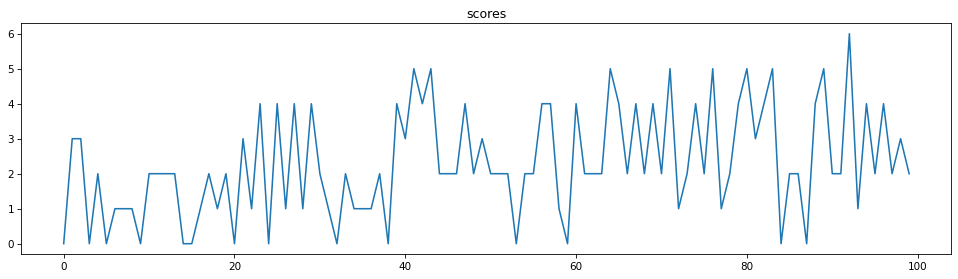

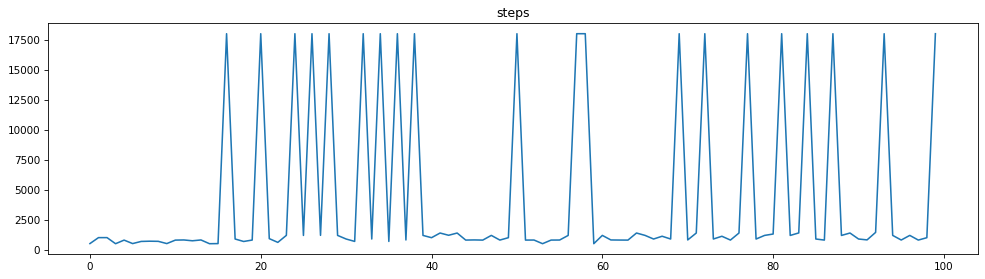

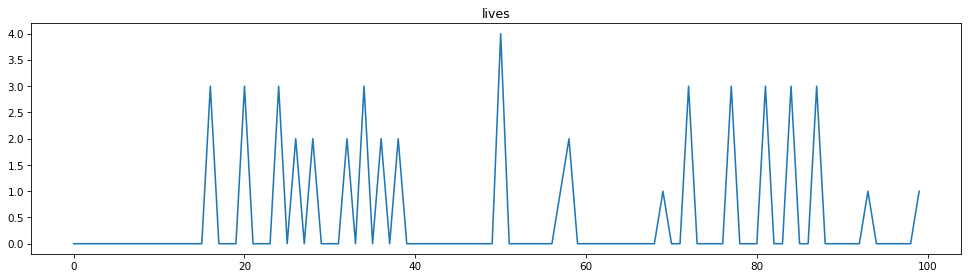

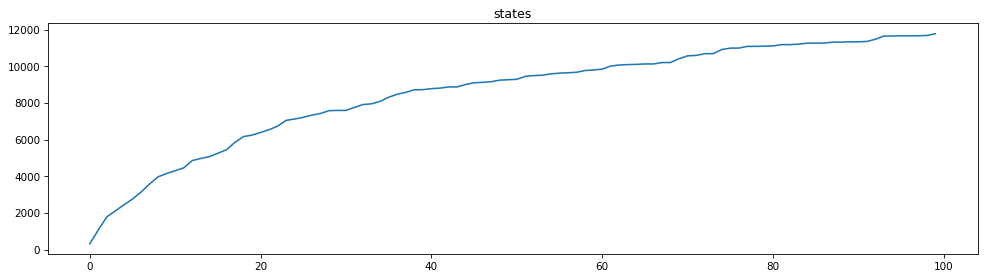

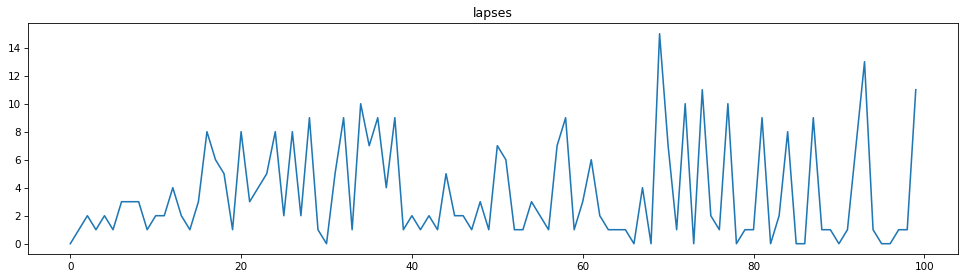

In [10]:
# 2025-11-04 Self-learning on 1-states-only, positive feedback only, 100 games, 18,000 limit, no pre-training
cause="18000_steps_limit"; score=2.3; steps=4338.4; lives=0.5; lapse="0:00:10.668419"
scores = [0, 3.0, 3.0, 0, 2.0, 0, 1.0, 1.0, 1.0, 0, 2.0, 2.0, 2.0, 2.0, 0, 0, 1.0, 2.0, 1.0, 2.0, 0, 3.0, 1.0, 4.0, 0, 4.0, 1.0, 4.0, 1.0, 4.0, 2.0, 1.0, 0, 2.0, 1.0, 1.0, 1.0, 2.0, 0, 4.0, 3.0, 5.0, 4.0, 5.0, 2.0, 2.0, 2.0, 4.0, 2.0, 3.0, 2.0, 2.0, 2.0, 0, 2.0, 2.0, 4.0, 4.0, 1.0, 0, 4.0, 2.0, 2.0, 2.0, 5.0, 4.0, 2.0, 4.0, 2.0, 4.0, 2.0, 5.0, 1.0, 2.0, 4.0, 2.0, 5.0, 1.0, 2.0, 4.0, 5.0, 3.0, 4.0, 5.0, 0, 2.0, 2.0, 0, 4.0, 5.0, 2.0, 2.0, 6.0, 1.0, 4.0, 2.0, 4.0, 2.0, 3.0, 2.0]
stepss = [500, 996, 997, 489, 789, 500, 679, 698, 687, 500, 789, 802, 733, 802, 489, 498, 18000, 881, 675, 794, 18000, 911, 600, 1185, 18000, 1179, 18000, 1185, 18000, 1181, 880, 680, 18000, 881, 18000, 679, 18000, 800, 18000, 1180, 991, 1380, 1192, 1379, 792, 804, 790, 1182, 792, 992, 18000, 791, 795, 491, 792, 796, 1180, 18000, 18000, 492, 1181, 802, 794, 790, 1380, 1183, 880, 1112, 880, 18000, 804, 1380, 18000, 881, 1110, 793, 1380, 18000, 879, 1181, 1296, 18000, 1179, 1388, 18000, 880, 792, 18000, 1178, 1380, 881, 807, 1433, 18000, 1182, 796, 1182, 792, 991, 18000]
livess = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 0, 3, 0, 2, 0, 2, 0, 0, 0, 2, 0, 3, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1]
lapses = [0, 1, 2, 1, 2, 1, 3, 3, 3, 1, 2, 2, 4, 2, 1, 3, 8, 6, 5, 1, 8, 3, 4, 5, 8, 2, 8, 2, 9, 1, 0, 5, 9, 1, 10, 7, 9, 4, 9, 1, 2, 1, 2, 1, 5, 2, 2, 1, 3, 1, 7, 6, 1, 1, 3, 2, 1, 7, 9, 1, 3, 6, 2, 1, 1, 1, 0, 4, 0, 15, 7, 1, 10, 0, 11, 2, 1, 10, 0, 1, 1, 9, 0, 2, 8, 0, 0, 9, 1, 1, 0, 1, 7, 13, 1, 0, 0, 1, 1, 11]
states = [322, 1074, 1792, 2113, 2444, 2760, 3137, 3579, 3973, 4150, 4305, 4458, 4858, 4971, 5071, 5256, 5445, 5854, 6163, 6246, 6393, 6541, 6736, 7050, 7125, 7215, 7333, 7424, 7578, 7591, 7592, 7757, 7915, 7951, 8086, 8313, 8474, 8575, 8718, 8724, 8778, 8807, 8872, 8873, 9004, 9098, 9123, 9156, 9243, 9265, 9289, 9448, 9491, 9510, 9584, 9623, 9647, 9671, 9767, 9799, 9839, 10014, 10067, 10091, 10102, 10125, 10125, 10203, 10204, 10413, 10568, 10591, 10686, 10686, 10912, 10987, 10991, 11085, 11085, 11093, 11109, 11180, 11180, 11205, 11262, 11263, 11264, 11315, 11315, 11334, 11334, 11353, 11474, 11647, 11648, 11658, 11658, 11663, 11677, 11775]
print(len(scores))
p = pd.Series(scores).plot.line(figsize=(16, 4),title="scores");plt.show() 
p = pd.Series(stepss).plot.line(figsize=(16, 4),title="steps");plt.show() 
p = pd.Series(livess).plot.line(figsize=(16, 4),title="lives");plt.show() 
p = pd.Series(states).plot.line(figsize=(16, 4),title="states"); plt.show() 
p = pd.Series(lapses).plot.line(figsize=(16, 4),title="lapses") 

100


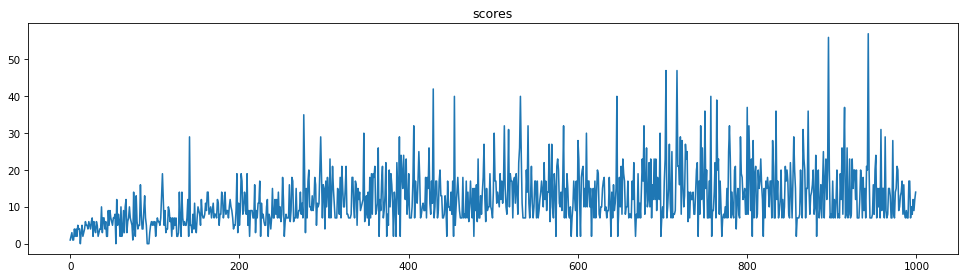

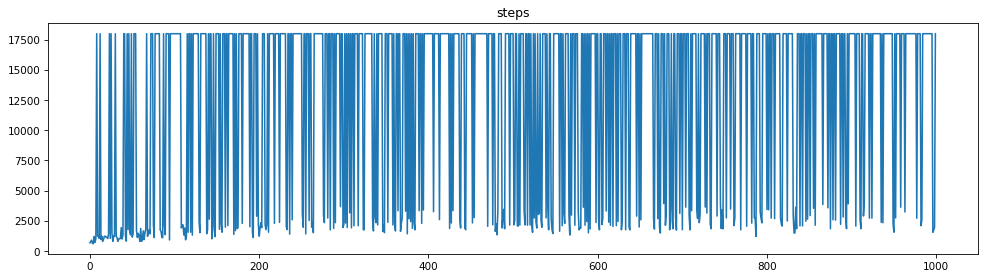

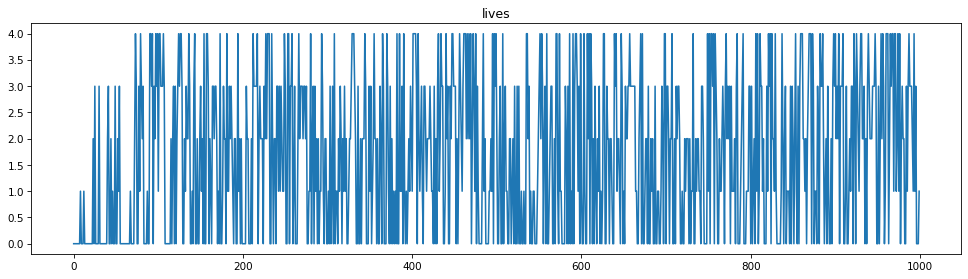

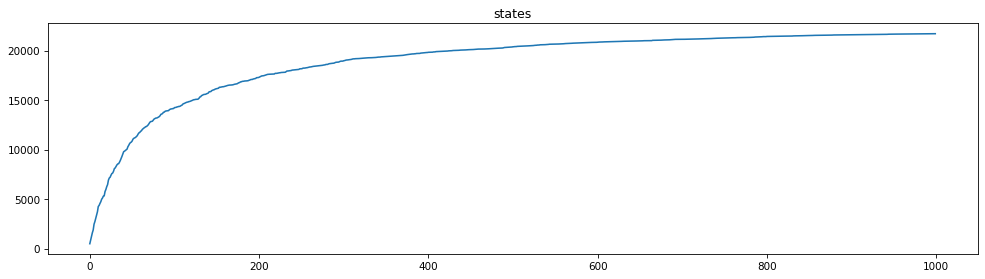

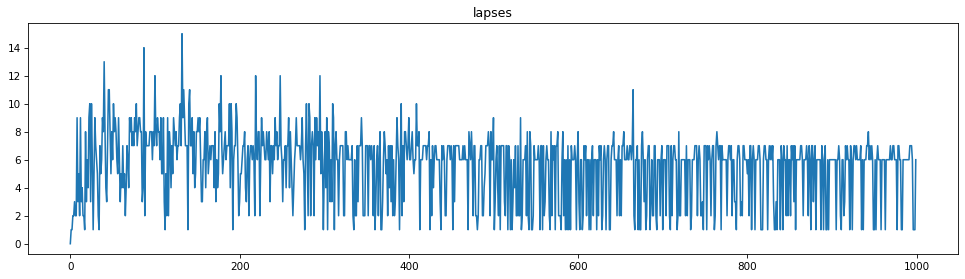

In [11]:
# 2025-11-04 Self-learning on 1-states-only, positive feedback only, 1000 games, 18,000 limit, no pre-training
cause="18000_steps_limit"; score=12.1; steps=12549.6; lives=1.7; lapse="0:00:06.392276"
scorespo = [1.0, 2.0, 3.0, 1.0, 1.0, 4.0, 2.0, 4.0, 2.0, 5.0, 4.0, 4.0, 0, 3.0, 5.0, 2.0, 3.0, 4.0, 6.0, 5.0, 5.0, 4.0, 6.0, 5.0, 4.0, 6.0, 7.0, 2.0, 6.0, 4.0, 3.0, 6.0, 5.0, 2.0, 3.0, 4.0, 4.0, 10.0, 3.0, 7.0, 7.0, 4.0, 6.0, 2.0, 2.0, 9.0, 5.0, 9.0, 7.0, 6.0, 5.0, 7.0, 7.0, 8.0, 0, 12.0, 5.0, 8.0, 6.0, 2.0, 10.0, 2.0, 3.0, 9.0, 3.0, 10.0, 12.0, 3.0, 6.0, 7.0, 10.0, 7.0, 6.0, 5.0, 1.0, 14.0, 4.0, 2.0, 13.0, 6.0, 4.0, 5.0, 5.0, 16.0, 8.0, 4.0, 4.0, 9.0, 13.0, 7.0, 5.0, 0, 0, 0, 3.0, 5.0, 6.0, 5.0, 6.0, 5.0, 6.0, 2.0, 5.0, 7.0, 6.0, 6.0, 5.0, 7.0, 13.0, 19.0, 12.0, 5.0, 9.0, 3.0, 4.0, 4.0, 10.0, 9.0, 6.0, 7.0, 2.0, 7.0, 4.0, 7.0, 5.0, 7.0, 2.0, 2.0, 3.0, 14.0, 6.0, 2.0, 14.0, 7.0, 5.0, 6.0, 5.0, 5.0, 7.0, 12.0, 2.0, 29.0, 5.0, 5.0, 3.0, 8.0, 4.0, 11.0, 4.0, 3.0, 7.0, 10.0, 9.0, 8.0, 5.0, 12.0, 8.0, 7.0, 7.0, 8.0, 11.0, 9.0, 14.0, 14.0, 8.0, 9.0, 10.0, 7.0, 9.0, 11.0, 7.0, 8.0, 8.0, 7.0, 12.0, 11.0, 5.0, 8.0, 8.0, 14.0, 13.0, 7.0, 9.0, 14.0, 8.0, 9.0, 9.0, 7.0, 10.0, 12.0, 10.0, 9.0, 7.0, 4.0, 5.0, 5.0, 9.0, 19.0, 3.0, 11.0, 5.0, 9.0, 19.0, 17.0, 8.0, 9.0, 14.0, 12.0, 8.0, 19.0, 5.0, 9.0, 2.0, 9.0, 9.0, 9.0, 7.0, 7.0, 16.0, 3.0, 9.0, 7.0, 11.0, 11.0, 17.0, 2.0, 11.0, 7.0, 8.0, 6.0, 5.0, 5.0, 10.0, 12.0, 2.0, 8.0, 7.0, 4.0, 7.0, 15.0, 7.0, 7.0, 12.0, 8.0, 12.0, 7.0, 14.0, 7.0, 10.0, 6.0, 8.0, 18.0, 12.0, 2.0, 6.0, 8.0, 7.0, 7.0, 7.0, 16.0, 6.0, 9.0, 18.0, 17.0, 6.0, 7.0, 7.0, 15.0, 7.0, 7.0, 9.0, 9.0, 14.0, 8.0, 11.0, 7.0, 35.0, 18.0, 3.0, 15.0, 7.0, 17.0, 20.0, 10.0, 10.0, 9.0, 13.0, 9.0, 11.0, 18.0, 16.0, 5.0, 11.0, 10.0, 11.0, 20.0, 29.0, 18.0, 7.0, 16.0, 15.0, 4.0, 17.0, 10.0, 18.0, 14.0, 7.0, 23.0, 7.0, 13.0, 21.0, 15.0, 11.0, 7.0, 7.0, 7.0, 15.0, 14.0, 8.0, 18.0, 7.0, 21.0, 15.0, 10.0, 10.0, 15.0, 21.0, 8.0, 8.0, 7.0, 7.0, 7.0, 8.0, 18.0, 18.0, 10.0, 7.0, 17.0, 16.0, 5.0, 15.0, 12.0, 14.0, 9.0, 10.0, 11.0, 12.0, 30.0, 6.0, 8.0, 13.0, 7.0, 14.0, 5.0, 18.0, 7.0, 19.0, 8.0, 19.0, 18.0, 21.0, 8.0, 9.0, 11.0, 26.0, 2.0, 12.0, 9.0, 17.0, 21.0, 7.0, 9.0, 13.0, 22.0, 2.0, 8.0, 5.0, 20.0, 10.0, 19.0, 16.0, 11.0, 2.0, 14.0, 11.0, 2.0, 22.0, 15.0, 8.0, 29.0, 2.0, 24.0, 19.0, 15.0, 24.0, 16.0, 12.0, 23.0, 8.0, 11.0, 19.0, 7.0, 7.0, 7.0, 10.0, 17.0, 32.0, 7.0, 17.0, 12.0, 11.0, 17.0, 25.0, 18.0, 7.0, 8.0, 10.0, 11.0, 9.0, 9.0, 18.0, 7.0, 18.0, 15.0, 26.0, 11.0, 8.0, 17.0, 11.0, 42.0, 7.0, 10.0, 17.0, 17.0, 7.0, 9.0, 17.0, 20.0, 13.0, 13.0, 7.0, 7.0, 8.0, 13.0, 10.0, 2.0, 17.0, 10.0, 10.0, 9.0, 14.0, 8.0, 17.0, 2.0, 40.0, 5.0, 10.0, 14.0, 18.0, 13.0, 9.0, 7.0, 7.0, 7.0, 18.0, 7.0, 8.0, 7.0, 17.0, 7.0, 14.0, 6.0, 10.0, 17.0, 11.0, 7.0, 15.0, 2.0, 15.0, 9.0, 16.0, 6.0, 23.0, 7.0, 7.0, 13.0, 8.0, 14.0, 18.0, 27.0, 12.0, 6.0, 15.0, 9.0, 10.0, 10.0, 19.0, 10.0, 9.0, 7.0, 14.0, 30.0, 17.0, 17.0, 11.0, 14.0, 12.0, 10.0, 19.0, 12.0, 17.0, 11.0, 16.0, 32.0, 15.0, 10.0, 8.0, 15.0, 31.0, 10.0, 19.0, 17.0, 17.0, 7.0, 17.0, 18.0, 11.0, 19.0, 14.0, 8.0, 22.0, 26.0, 40.0, 24.0, 11.0, 7.0, 7.0, 7.0, 7.0, 20.0, 14.0, 32.0, 11.0, 7.0, 13.0, 21.0, 11.0, 7.0, 10.0, 17.0, 17.0, 7.0, 17.0, 7.0, 9.0, 12.0, 14.0, 17.0, 14.0, 10.0, 22.0, 12.0, 17.0, 9.0, 14.0, 14.0, 27.0, 6.0, 13.0, 27.0, 10.0, 7.0, 19.0, 15.0, 2.0, 21.0, 23.0, 20.0, 11.0, 10.0, 14.0, 9.0, 17.0, 32.0, 7.0, 15.0, 7.0, 19.0, 15.0, 8.0, 7.0, 10.0, 2.0, 7.0, 10.0, 17.0, 13.0, 9.0, 17.0, 2.0, 28.0, 23.0, 11.0, 2.0, 18.0, 20.0, 21.0, 10.0, 15.0, 10.0, 30.0, 10.0, 17.0, 17.0, 10.0, 15.0, 2.0, 12.0, 15.0, 7.0, 17.0, 7.0, 14.0, 20.0, 19.0, 8.0, 7.0, 10.0, 10.0, 15.0, 17.0, 18.0, 9.0, 10.0, 7.0, 9.0, 9.0, 18.0, 11.0, 2.0, 14.0, 7.0, 16.0, 9.0, 11.0, 15.0, 40.0, 2.0, 8.0, 18.0, 10.0, 21.0, 8.0, 23.0, 19.0, 17.0, 8.0, 10.0, 10.0, 17.0, 7.0, 8.0, 8.0, 7.0, 17.0, 12.0, 22.0, 9.0, 2.0, 8.0, 7.0, 19.0, 7.0, 11.0, 7.0, 15.0, 23.0, 17.0, 32.0, 8.0, 15.0, 26.0, 10.0, 12.0, 22.0, 10.0, 23.0, 7.0, 16.0, 12.0, 23.0, 12.0, 23.0, 9.0, 18.0, 17.0, 12.0, 30.0, 2.0, 7.0, 10.0, 7.0, 17.0, 23.0, 47.0, 7.0, 10.0, 15.0, 27.0, 11.0, 7.0, 25.0, 7.0, 8.0, 8.0, 9.0, 23.0, 47.0, 21.0, 21.0, 16.0, 29.0, 8.0, 28.0, 16.0, 10.0, 13.0, 27.0, 23.0, 25.0, 6.0, 14.0, 7.0, 14.0, 12.0, 12.0, 14.0, 8.0, 8.0, 14.0, 20.0, 22.0, 2.0, 17.0, 8.0, 32.0, 12.0, 26.0, 13.0, 7.0, 36.0, 15.0, 20.0, 7.0, 7.0, 17.0, 7.0, 40.0, 2.0, 9.0, 9.0, 14.0, 22.0, 7.0, 39.0, 20.0, 23.0, 8.0, 17.0, 10.0, 2.0, 7.0, 8.0, 7.0, 10.0, 7.0, 15.0, 7.0, 25.0, 32.0, 23.0, 7.0, 14.0, 8.0, 7.0, 20.0, 21.0, 4.0, 12.0, 15.0, 8.0, 7.0, 29.0, 19.0, 18.0, 12.0, 13.0, 15.0, 8.0, 8.0, 37.0, 8.0, 32.0, 21.0, 9.0, 23.0, 2.0, 28.0, 7.0, 19.0, 21.0, 7.0, 8.0, 20.0, 15.0, 17.0, 23.0, 16.0, 12.0, 2.0, 15.0, 7.0, 17.0, 15.0, 18.0, 15.0, 10.0, 17.0, 17.0, 7.0, 28.0, 21.0, 7.0, 7.0, 36.0, 12.0, 17.0, 7.0, 9.0, 12.0, 20.0, 7.0, 12.0, 7.0, 10.0, 21.0, 17.0, 20.0, 17.0, 8.0, 7.0, 22.0, 14.0, 7.0, 17.0, 29.0, 20.0, 15.0, 2.0, 7.0, 7.0, 7.0, 8.0, 20.0, 12.0, 7.0, 31.0, 23.0, 20.0, 7.0, 15.0, 15.0, 36.0, 15.0, 8.0, 13.0, 14.0, 16.0, 20.0, 8.0, 10.0, 24.0, 2.0, 17.0, 20.0, 7.0, 10.0, 16.0, 7.0, 16.0, 25.0, 7.0, 17.0, 23.0, 12.0, 20.0, 56.0, 20.0, 7.0, 8.0, 7.0, 17.0, 7.0, 12.0, 7.0, 12.0, 20.0, 7.0, 8.0, 7.0, 19.0, 12.0, 26.0, 8.0, 24.0, 37.0, 7.0, 8.0, 26.0, 7.0, 8.0, 23.0, 7.0, 8.0, 23.0, 15.0, 20.0, 20.0, 12.0, 20.0, 7.0, 7.0, 7.0, 12.0, 20.0, 17.0, 7.0, 18.0, 9.0, 15.0, 7.0, 21.0, 20.0, 57.0, 20.0, 7.0, 7.0, 7.0, 8.0, 16.0, 8.0, 20.0, 24.0, 7.0, 15.0, 10.0, 15.0, 7.0, 31.0, 9.0, 15.0, 15.0, 7.0, 29.0, 9.0, 7.0, 8.0, 15.0, 15.0, 13.0, 7.0, 7.0, 28.0, 8.0, 7.0, 14.0, 15.0, 21.0, 20.0, 9.0, 10.0, 13.0, 14.0, 17.0, 8.0, 16.0, 8.0, 7.0, 9.0, 7.0, 7.0, 17.0, 17.0, 7.0, 10.0, 8.0, 12.0, 9.0, 12.0, 14.0]
stepsspo = [683, 802, 909, 624, 608, 1202, 725, 1040, 18000, 1238, 1255, 1047, 18000, 956, 1231, 803, 945, 1212, 1235, 1149, 1148, 1036, 1422, 18000, 1048, 18000, 1502, 803, 1243, 1206, 18000, 1239, 1117, 808, 1007, 1018, 1042, 1940, 998, 1341, 18000, 18000, 1241, 820, 18000, 1779, 18000, 1631, 1338, 18000, 1153, 1434, 18000, 18000, 18000, 1689, 1128, 1470, 1254, 796, 1871, 806, 1004, 1669, 946, 1540, 1798, 18000, 1220, 1441, 1770, 1426, 18000, 18000, 18000, 2170, 1114, 18000, 18000, 18000, 18000, 18000, 18000, 1736, 1638, 1117, 1116, 18000, 2124, 1354, 18000, 18000, 18000, 18000, 918, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 1913, 2159, 2165, 1326, 1913, 932, 1208, 18000, 1557, 18000, 18000, 1561, 18000, 1314, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2404, 1517, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 1437, 1781, 18000, 2636, 18000, 18000, 1013, 1700, 18000, 2110, 1186, 18000, 18000, 18000, 18000, 1800, 18000, 2283, 1561, 18000, 18000, 18000, 1978, 18000, 18000, 2108, 18000, 18000, 18000, 18000, 18000, 18000, 1377, 18000, 1693, 18000, 1860, 1962, 18000, 18000, 18000, 18000, 2287, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2010, 18000, 18000, 1538, 1115, 18000, 18000, 18000, 2886, 18000, 2169, 1232, 1883, 2360, 1938, 18000, 18000, 18000, 2185, 1767, 2165, 18000, 1561, 18000, 18000, 18000, 18000, 18000, 18000, 2292, 18000, 18000, 18000, 18000, 18000, 2375, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2010, 1778, 18000, 18000, 1401, 18000, 18000, 2590, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 3069, 1975, 18000, 18000, 1421, 18000, 18000, 18000, 2529, 18000, 18000, 1978, 2438, 1522, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2958, 2352, 18000, 18000, 18000, 2737, 18000, 18000, 1758, 18000, 18000, 18000, 1873, 18000, 2349, 18000, 18000, 18000, 18000, 18000, 3684, 18000, 18000, 1954, 2169, 18000, 2321, 18000, 1948, 18000, 18000, 3159, 18000, 1921, 18000, 18000, 2096, 18000, 18000, 18000, 18000, 2097, 18000, 18000, 18000, 18000, 18000, 1755, 1766, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2601, 1666, 18000, 2801, 2347, 18000, 2166, 18000, 18000, 18000, 18000, 18000, 1637, 2159, 1526, 18000, 18000, 18000, 2385, 18000, 18000, 18000, 18000, 18000, 2156, 18000, 2402, 1663, 18000, 18000, 3340, 18000, 18000, 1629, 2324, 2769, 18000, 18000, 18000, 3300, 18000, 1429, 18000, 2674, 18000, 2442, 18000, 1873, 18000, 2400, 1751, 18000, 18000, 18000, 18000, 3344, 18000, 18000, 2289, 18000, 3394, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 3257, 18000, 18000, 18000, 18000, 18000, 18000, 2605, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 1873, 18000, 2321, 18000, 3345, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2657, 1910, 18000, 18000, 18000, 18000, 1910, 1762, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2328, 18000, 2766, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2046, 18000, 18000, 18000, 18000, 18000, 2169, 18000, 18000, 1629, 2276, 1349, 3322, 18000, 18000, 18000, 18000, 1909, 2901, 3461, 1845, 18000, 18000, 18000, 18000, 18000, 2153, 18000, 18000, 18000, 18000, 2159, 2569, 18000, 18000, 2100, 2061, 18000, 2153, 18000, 18000, 18000, 18000, 3387, 2158, 18000, 18000, 2139, 18000, 18000, 2153, 18000, 2381, 1551, 18000, 2738, 18000, 2448, 1905, 18000, 3033, 3213, 18000, 2569, 1966, 18000, 18000, 18000, 18000, 2750, 18000, 3759, 1759, 18000, 18000, 2701, 1759, 1449, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 1638, 18000, 18000, 2100, 18000, 3121, 2288, 18000, 18000, 18000, 18000, 2977, 1326, 18000, 2980, 18000, 18000, 18000, 2139, 18000, 18000, 18000, 3235, 1755, 1944, 1905, 18000, 18000, 3627, 18000, 2141, 18000, 2448, 18000, 1513, 18000, 1833, 18000, 18000, 18000, 18000, 18000, 18000, 2358, 18000, 18000, 2722, 1759, 18000, 18000, 2187, 2724, 18000, 18000, 18000, 3319, 18000, 18000, 2393, 18000, 2139, 18000, 18000, 2038, 18000, 18000, 18000, 2100, 18000, 2448, 18000, 18000, 18000, 1764, 2606, 18000, 18000, 18000, 1761, 18000, 18000, 18000, 1998, 1751, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2891, 18000, 18000, 1990, 18000, 2580, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2642, 1818, 18000, 18000, 18000, 2681, 18000, 1934, 1491, 18000, 18000, 18000, 3931, 18000, 2139, 3213, 18000, 18000, 18000, 1761, 3506, 18000, 2512, 1849, 18000, 18000, 2820, 1735, 18000, 18000, 18000, 3122, 18000, 18000, 1765, 18000, 18000, 18000, 3633, 18000, 18000, 18000, 2980, 1751, 18000, 3338, 18000, 18000, 18000, 18000, 18000, 3633, 2701, 18000, 2349, 3086, 18000, 18000, 18000, 18000, 18000, 3641, 18000, 3145, 18000, 18000, 18000, 2206, 1849, 18000, 18000, 18000, 18000, 18000, 18000, 2899, 18000, 18000, 18000, 3931, 1857, 3417, 1841, 18000, 18000, 18000, 2746, 18000, 18000, 18000, 18000, 3474, 18000, 18000, 18000, 2108, 2737, 18000, 18000, 18000, 18000, 18000, 18000, 1755, 18000, 18000, 18000, 18000, 18000, 18000, 2054, 18000, 18000, 18000, 18000, 18000, 2315, 18000, 18000, 2753, 2714, 1208, 18000, 18000, 18000, 18000, 3236, 2702, 2334, 18000, 18000, 18000, 18000, 18000, 3435, 18000, 3418, 18000, 18000, 2727, 18000, 18000, 18000, 2681, 18000, 18000, 18000, 18000, 18000, 18000, 2727, 2231, 2064, 18000, 18000, 18000, 18000, 18000, 2488, 18000, 18000, 18000, 18000, 18000, 18000, 2945, 1491, 1496, 3631, 1849, 18000, 18000, 18000, 2088, 18000, 18000, 2080, 18000, 18000, 18000, 2467, 18000, 2643, 18000, 18000, 2936, 18000, 18000, 18000, 3535, 18000, 2139, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 3851, 18000, 18000, 18000, 18000, 18000, 3582, 18000, 18000, 1849, 18000, 18000, 2590, 18000, 18000, 2567, 18000, 18000, 18000, 18000, 18000, 2213, 18000, 18000, 2818, 18000, 18000, 2727, 1849, 18000, 3909, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2064, 18000, 18000, 18000, 18000, 2605, 1849, 18000, 18000, 2906, 4054, 18000, 18000, 18000, 18000, 18000, 2727, 18000, 18000, 2727, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2382, 18000, 2337, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2239, 1561, 18000, 2742, 18000, 18000, 18000, 18000, 18000, 3630, 18000, 18000, 18000, 18000, 3236, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 2716, 18000, 18000, 18000, 18000, 2100, 2548, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 1553, 1731, 1974, 18000]
livesspo = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0, 1, 0, 0, 3, 0, 0, 2, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 4, 3, 0, 0, 3, 1, 4, 3, 2, 3, 0, 0, 0, 0, 1, 0, 0, 4, 4, 3, 4, 0, 3, 2, 4, 3, 4, 1, 4, 4, 3, 3, 3, 4, 3, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 3, 0, 3, 0, 2, 3, 4, 3, 4, 4, 3, 0, 0, 2, 1, 3, 2, 2, 4, 3, 0, 0, 1, 0, 3, 4, 0, 0, 2, 0, 0, 2, 3, 1, 2, 0, 4, 0, 0, 4, 4, 3, 0, 2, 1, 0, 3, 3, 2, 3, 3, 2, 0, 1, 0, 4, 0, 0, 1, 3, 2, 2, 0, 4, 1, 1, 3, 2, 3, 2, 1, 0, 2, 2, 0, 0, 4, 1, 2, 0, 2, 0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 0, 2, 0, 4, 3, 3, 3, 3, 4, 0, 2, 3, 2, 2, 2, 0, 3, 2, 4, 2, 4, 4, 4, 0, 0, 4, 2, 0, 2, 2, 0, 3, 3, 1, 3, 1, 3, 2, 1, 1, 4, 3, 0, 0, 4, 4, 0, 3, 3, 4, 0, 1, 3, 0, 0, 0, 2, 4, 2, 3, 3, 3, 2, 3, 3, 2, 3, 0, 0, 1, 1, 4, 0, 2, 3, 0, 3, 1, 2, 0, 2, 0, 1, 1, 4, 3, 1, 0, 2, 2, 0, 0, 1, 0, 3, 0, 1, 3, 0, 4, 0, 1, 1, 0, 2, 1, 3, 2, 0, 2, 1, 3, 1, 2, 0, 0, 1, 2, 2, 3, 4, 4, 4, 3, 2, 0, 0, 3, 0, 0, 2, 0, 2, 2, 2, 4, 3, 0, 0, 0, 3, 1, 3, 0, 1, 2, 4, 2, 2, 0, 2, 0, 0, 3, 2, 0, 4, 3, 0, 0, 0, 4, 3, 1, 0, 3, 0, 2, 0, 1, 0, 1, 0, 4, 0, 0, 4, 1, 1, 3, 0, 4, 1, 0, 1, 0, 1, 2, 1, 3, 2, 1, 4, 4, 4, 4, 3, 0, 4, 2, 1, 2, 3, 1, 0, 3, 3, 2, 1, 2, 2, 2, 3, 2, 1, 1, 0, 3, 0, 2, 0, 3, 4, 1, 2, 4, 3, 3, 0, 0, 1, 4, 2, 3, 0, 0, 3, 2, 4, 4, 3, 3, 3, 0, 2, 0, 2, 4, 3, 2, 1, 3, 4, 4, 4, 2, 4, 2, 4, 2, 4, 0, 2, 4, 3, 1, 4, 0, 3, 1, 0, 0, 0, 0, 2, 4, 1, 2, 0, 0, 0, 0, 1, 1, 2, 1, 4, 0, 4, 3, 4, 2, 0, 0, 2, 3, 0, 0, 4, 0, 2, 3, 1, 1, 0, 0, 2, 2, 0, 1, 2, 0, 3, 0, 0, 3, 0, 3, 0, 0, 1, 0, 0, 1, 0, 0, 4, 4, 2, 3, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 2, 3, 4, 2, 4, 3, 0, 2, 3, 0, 4, 0, 0, 1, 2, 3, 3, 0, 0, 2, 0, 4, 4, 1, 0, 4, 1, 1, 0, 0, 0, 0, 3, 2, 0, 3, 0, 4, 0, 1, 0, 4, 0, 3, 4, 4, 3, 1, 3, 0, 4, 1, 0, 0, 4, 1, 0, 0, 4, 2, 4, 0, 4, 3, 0, 2, 0, 3, 1, 0, 2, 1, 3, 0, 1, 0, 1, 4, 4, 0, 0, 3, 2, 2, 0, 2, 2, 1, 0, 0, 4, 3, 4, 1, 2, 2, 1, 0, 4, 3, 0, 1, 0, 3, 2, 2, 3, 3, 4, 3, 3, 3, 3, 3, 3, 1, 1, 0, 0, 2, 3, 4, 0, 4, 0, 0, 1, 2, 2, 0, 3, 0, 0, 2, 1, 2, 0, 0, 3, 0, 0, 1, 1, 0, 0, 1, 3, 2, 0, 4, 4, 0, 3, 3, 2, 0, 2, 2, 4, 0, 0, 2, 0, 3, 2, 3, 3, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 1, 1, 4, 0, 0, 2, 1, 2, 2, 1, 1, 0, 3, 3, 2, 0, 0, 0, 0, 4, 1, 4, 0, 4, 4, 3, 4, 0, 4, 3, 2, 0, 0, 2, 1, 1, 2, 3, 2, 0, 3, 4, 2, 3, 2, 3, 0, 3, 1, 1, 1, 2, 0, 3, 4, 0, 0, 0, 1, 2, 3, 4, 0, 0, 0, 1, 1, 1, 3, 3, 0, 3, 0, 1, 2, 0, 4, 1, 4, 0, 1, 4, 3, 3, 1, 2, 0, 0, 0, 3, 1, 4, 3, 4, 0, 4, 2, 2, 1, 4, 1, 0, 0, 0, 0, 0, 1, 4, 2, 0, 2, 3, 0, 1, 1, 1, 0, 3, 0, 3, 2, 0, 2, 4, 1, 0, 3, 0, 3, 4, 4, 4, 2, 2, 1, 2, 0, 2, 3, 4, 4, 4, 0, 4, 3, 0, 1, 1, 0, 3, 2, 0, 4, 3, 3, 4, 2, 0, 1, 2, 0, 3, 1, 0, 0, 2, 0, 3, 4, 3, 4, 2, 3, 2, 4, 0, 3, 3, 3, 4, 0, 0, 1, 3, 0, 0, 1, 2, 1, 3, 3, 0, 4, 3, 0, 4, 3, 2, 1, 3, 4, 4, 2, 2, 3, 0, 2, 0, 3, 4, 3, 2, 2, 2, 3, 3, 3, 4, 3, 0, 0, 3, 0, 2, 4, 2, 4, 3, 0, 1, 4, 4, 4, 0, 2, 4, 3, 4, 4, 1, 4, 4, 1, 2, 4, 1, 4, 0, 2, 3, 2, 2, 0, 0, 3, 1, 3, 4, 3, 3, 3, 2, 1, 4, 1, 3, 0, 0, 0, 1]
lapsespo = [0, 1, 1, 2, 2, 3, 2, 2, 9, 3, 5, 2, 9, 3, 4, 2, 2, 1, 8, 3, 6, 4, 9, 10, 3, 10, 6, 1, 5, 9, 7, 6, 5, 2, 1, 7, 5, 6, 9, 8, 13, 8, 4, 3, 7, 11, 11, 8, 5, 8, 6, 10, 8, 9, 8, 6, 5, 9, 6, 3, 5, 4, 7, 4, 5, 2, 4, 7, 6, 4, 9, 8, 9, 7, 8, 7, 9, 8, 10, 7, 8, 9, 9, 8, 8, 3, 4, 14, 2, 8, 7, 7, 7, 7, 8, 8, 8, 6, 8, 7, 12, 8, 7, 9, 8, 8, 6, 9, 5, 5, 9, 3, 1, 5, 2, 9, 2, 8, 7, 4, 7, 5, 9, 8, 7, 8, 6, 7, 7, 9, 10, 7, 15, 9, 11, 9, 7, 7, 7, 1, 10, 11, 7, 7, 9, 5, 8, 4, 5, 8, 8, 9, 8, 9, 6, 3, 3, 6, 6, 8, 4, 8, 9, 5, 6, 7, 6, 7, 7, 7, 4, 8, 3, 6, 4, 5, 10, 8, 12, 7, 5, 6, 7, 8, 6, 7, 7, 7, 10, 4, 10, 8, 1, 6, 7, 7, 10, 9, 6, 2, 3, 5, 5, 6, 7, 7, 8, 4, 3, 6, 7, 2, 6, 7, 7, 6, 7, 6, 2, 12, 7, 6, 8, 8, 2, 6, 9, 7, 8, 7, 6, 6, 8, 7, 6, 8, 3, 7, 7, 5, 7, 6, 9, 7, 8, 6, 7, 7, 12, 7, 6, 3, 6, 6, 7, 4, 7, 7, 9, 4, 8, 6, 4, 2, 4, 6, 7, 9, 7, 7, 7, 7, 6, 7, 9, 6, 5, 1, 7, 10, 6, 2, 10, 9, 2, 7, 8, 7, 2, 9, 6, 9, 7, 8, 6, 12, 5, 8, 6, 1, 5, 8, 4, 9, 1, 8, 7, 3, 6, 3, 10, 9, 1, 7, 8, 6, 6, 2, 6, 7, 7, 7, 7, 2, 2, 8, 8, 6, 7, 6, 6, 6, 6, 7, 2, 1, 6, 2, 2, 7, 3, 7, 7, 7, 9, 7, 2, 2, 2, 7, 7, 7, 2, 7, 7, 6, 7, 6, 2, 7, 1, 3, 6, 7, 2, 6, 8, 1, 1, 3, 6, 8, 7, 5, 6, 2, 7, 4, 7, 3, 7, 2, 6, 2, 3, 6, 9, 7, 6, 1, 6, 10, 2, 7, 3, 8, 8, 7, 6, 7, 9, 6, 6, 7, 8, 6, 5, 6, 6, 10, 7, 7, 8, 1, 6, 6, 6, 7, 7, 7, 7, 6, 7, 7, 8, 1, 6, 2, 7, 4, 6, 7, 7, 6, 6, 6, 6, 3, 1, 7, 6, 7, 6, 2, 2, 6, 7, 7, 7, 6, 7, 6, 1, 7, 3, 7, 7, 7, 7, 7, 6, 6, 6, 6, 7, 6, 7, 6, 6, 6, 1, 8, 7, 6, 8, 6, 2, 7, 7, 2, 2, 1, 2, 6, 6, 7, 7, 2, 2, 4, 5, 7, 7, 7, 8, 7, 2, 8, 6, 6, 9, 1, 3, 6, 7, 4, 2, 7, 1, 7, 7, 7, 7, 3, 2, 7, 7, 1, 7, 6, 1, 6, 1, 3, 6, 4, 7, 2, 2, 7, 2, 2, 9, 1, 2, 6, 6, 6, 7, 2, 8, 2, 1, 8, 7, 1, 1, 2, 7, 6, 6, 6, 6, 7, 6, 1, 7, 7, 1, 7, 2, 3, 6, 7, 6, 6, 2, 1, 8, 2, 7, 6, 7, 1, 7, 7, 8, 2, 2, 2, 1, 6, 8, 2, 6, 1, 6, 1, 7, 1, 6, 1, 7, 6, 6, 6, 7, 6, 1, 6, 8, 3, 1, 6, 6, 1, 2, 7, 6, 7, 2, 6, 6, 1, 6, 1, 6, 7, 2, 6, 6, 6, 1, 6, 2, 7, 6, 7, 1, 2, 6, 7, 6, 1, 6, 7, 7, 1, 1, 6, 7, 7, 8, 6, 6, 6, 2, 6, 7, 2, 6, 2, 7, 7, 8, 6, 6, 6, 7, 6, 6, 7, 7, 6, 7, 11, 2, 1, 6, 6, 7, 1, 6, 1, 1, 7, 8, 6, 3, 6, 1, 2, 6, 7, 7, 1, 3, 6, 2, 2, 7, 7, 2, 1, 6, 6, 6, 2, 6, 7, 1, 6, 6, 6, 2, 7, 7, 7, 2, 1, 7, 2, 6, 7, 7, 6, 6, 1, 2, 8, 2, 2, 6, 6, 6, 6, 6, 2, 7, 2, 6, 6, 6, 1, 2, 6, 6, 6, 7, 7, 7, 2, 6, 7, 6, 2, 2, 3, 1, 7, 7, 7, 1, 7, 6, 7, 6, 2, 6, 7, 7, 1, 2, 7, 8, 7, 6, 7, 7, 1, 7, 6, 6, 6, 6, 6, 2, 6, 7, 7, 6, 7, 2, 6, 6, 3, 3, 1, 6, 7, 7, 6, 2, 3, 2, 7, 7, 6, 6, 6, 5, 6, 2, 7, 7, 1, 6, 7, 6, 1, 6, 6, 6, 7, 7, 6, 1, 1, 1, 6, 7, 7, 6, 6, 1, 6, 7, 6, 7, 6, 7, 3, 1, 1, 3, 1, 6, 6, 6, 1, 7, 6, 1, 7, 6, 6, 2, 7, 2, 6, 6, 2, 7, 6, 7, 3, 7, 1, 6, 6, 6, 6, 6, 7, 7, 6, 2, 6, 6, 6, 7, 6, 2, 7, 6, 1, 7, 7, 3, 6, 7, 1, 6, 6, 6, 6, 6, 1, 7, 6, 1, 6, 7, 1, 1, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 7, 6, 2, 1, 6, 6, 2, 3, 7, 6, 7, 6, 6, 1, 7, 6, 1, 6, 7, 7, 6, 7, 6, 6, 6, 6, 7, 1, 6, 1, 6, 6, 6, 7, 7, 8, 6, 7, 6, 7, 6, 1, 1, 6, 1, 6, 7, 6, 6, 6, 1, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 7, 6, 6, 7, 7, 6, 6, 6, 1, 7, 7, 6, 6, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 6, 1, 1, 1, 6]
statespo = [521, 894, 1270, 1625, 1904, 2491, 2752, 3094, 3478, 3740, 4272, 4386, 4587, 4759, 5011, 5133, 5322, 5348, 5789, 5995, 6280, 6482, 6936, 7151, 7229, 7429, 7594, 7651, 7826, 8096, 8169, 8315, 8469, 8570, 8592, 8738, 8914, 9124, 9338, 9583, 9806, 9856, 9929, 10013, 10067, 10307, 10451, 10621, 10723, 10773, 10882, 11070, 11157, 11208, 11246, 11333, 11416, 11577, 11700, 11750, 11863, 11915, 12051, 12133, 12200, 12255, 12331, 12346, 12437, 12514, 12648, 12777, 12846, 12860, 12886, 12999, 13104, 13148, 13198, 13205, 13240, 13293, 13345, 13436, 13576, 13607, 13663, 13784, 13798, 13884, 13914, 13923, 13942, 13950, 14041, 14089, 14124, 14127, 14156, 14161, 14252, 14268, 14281, 14321, 14338, 14371, 14373, 14410, 14469, 14509, 14615, 14658, 14687, 14740, 14773, 14807, 14819, 14861, 14872, 14904, 14929, 14978, 15022, 15052, 15059, 15086, 15090, 15096, 15114, 15196, 15324, 15351, 15467, 15497, 15554, 15584, 15589, 15606, 15656, 15685, 15728, 15852, 15866, 15873, 15964, 16008, 16040, 16062, 16116, 16147, 16165, 16193, 16212, 16305, 16308, 16327, 16343, 16361, 16364, 16385, 16412, 16438, 16471, 16496, 16512, 16527, 16529, 16535, 16545, 16554, 16588, 16610, 16630, 16643, 16659, 16713, 16762, 16783, 16847, 16859, 16899, 16906, 16919, 16940, 16940, 16950, 16958, 16969, 17009, 17034, 17079, 17094, 17095, 17139, 17155, 17160, 17198, 17274, 17277, 17287, 17316, 17360, 17401, 17448, 17456, 17469, 17488, 17519, 17542, 17587, 17606, 17619, 17622, 17627, 17635, 17637, 17642, 17642, 17647, 17710, 17712, 17713, 17732, 17756, 17768, 17774, 17797, 17801, 17814, 17820, 17821, 17824, 17886, 17948, 17949, 17962, 17983, 17993, 17999, 18038, 18047, 18048, 18069, 18074, 18090, 18094, 18104, 18109, 18167, 18171, 18175, 18193, 18239, 18239, 18243, 18263, 18277, 18287, 18310, 18336, 18356, 18358, 18380, 18395, 18415, 18425, 18431, 18456, 18461, 18468, 18478, 18488, 18491, 18497, 18520, 18523, 18547, 18559, 18571, 18609, 18609, 18616, 18658, 18685, 18699, 18706, 18720, 18725, 18738, 18758, 18804, 18829, 18836, 18848, 18850, 18895, 18928, 18943, 18945, 18947, 18983, 18999, 19028, 19053, 19056, 19069, 19081, 19096, 19098, 19119, 19150, 19171, 19173, 19178, 19192, 19193, 19195, 19202, 19205, 19215, 19220, 19227, 19231, 19235, 19249, 19258, 19274, 19277, 19282, 19283, 19283, 19283, 19286, 19291, 19295, 19304, 19306, 19313, 19316, 19330, 19333, 19350, 19350, 19354, 19373, 19374, 19384, 19390, 19405, 19411, 19414, 19417, 19426, 19433, 19440, 19440, 19447, 19449, 19453, 19463, 19466, 19483, 19483, 19491, 19493, 19496, 19507, 19509, 19512, 19520, 19530, 19546, 19557, 19589, 19590, 19602, 19614, 19629, 19639, 19651, 19659, 19669, 19670, 19675, 19691, 19693, 19716, 19721, 19724, 19726, 19726, 19754, 19764, 19768, 19776, 19793, 19804, 19813, 19813, 19817, 19835, 19837, 19837, 19839, 19849, 19850, 19872, 19878, 19879, 19904, 19910, 19918, 19927, 19927, 19928, 19930, 19933, 19941, 19945, 19950, 19954, 19954, 19960, 19965, 19981, 19985, 19986, 19993, 19999, 20017, 20019, 20026, 20034, 20036, 20036, 20038, 20039, 20052, 20057, 20064, 20064, 20067, 20067, 20068, 20076, 20084, 20086, 20092, 20101, 20102, 20106, 20107, 20108, 20116, 20125, 20132, 20140, 20143, 20150, 20159, 20159, 20160, 20160, 20161, 20166, 20166, 20169, 20171, 20173, 20173, 20177, 20188, 20194, 20194, 20210, 20210, 20214, 20219, 20221, 20229, 20236, 20246, 20251, 20252, 20252, 20260, 20262, 20266, 20273, 20297, 20321, 20327, 20333, 20336, 20353, 20356, 20359, 20372, 20372, 20373, 20393, 20395, 20410, 20412, 20415, 20433, 20439, 20450, 20451, 20454, 20454, 20457, 20458, 20465, 20470, 20480, 20482, 20482, 20490, 20491, 20494, 20495, 20497, 20509, 20516, 20529, 20540, 20540, 20550, 20565, 20566, 20571, 20592, 20593, 20602, 20604, 20605, 20606, 20607, 20613, 20627, 20633, 20635, 20650, 20653, 20655, 20656, 20663, 20673, 20673, 20673, 20673, 20673, 20673, 20673, 20674, 20681, 20686, 20689, 20697, 20699, 20711, 20717, 20720, 20720, 20721, 20727, 20732, 20743, 20745, 20756, 20757, 20761, 20762, 20764, 20765, 20775, 20782, 20787, 20796, 20799, 20799, 20810, 20814, 20817, 20820, 20821, 20821, 20830, 20830, 20830, 20831, 20833, 20834, 20834, 20834, 20842, 20844, 20845, 20845, 20855, 20866, 20870, 20871, 20873, 20877, 20880, 20890, 20890, 20892, 20901, 20902, 20902, 20902, 20904, 20904, 20904, 20910, 20918, 20920, 20922, 20923, 20923, 20926, 20929, 20934, 20935, 20939, 20939, 20946, 20947, 20951, 20952, 20952, 20952, 20956, 20959, 20963, 20963, 20963, 20963, 20964, 20970, 20971, 20972, 20974, 20977, 20979, 20979, 20981, 20985, 20989, 20989, 20994, 21005, 21005, 21005, 21005, 21010, 21010, 21010, 21012, 21013, 21013, 21014, 21043, 21047, 21050, 21051, 21052, 21053, 21053, 21055, 21058, 21059, 21063, 21073, 21073, 21081, 21082, 21083, 21086, 21089, 21092, 21096, 21096, 21106, 21106, 21115, 21124, 21129, 21132, 21142, 21142, 21142, 21142, 21143, 21147, 21148, 21148, 21150, 21151, 21151, 21151, 21154, 21158, 21160, 21162, 21164, 21166, 21167, 21169, 21169, 21174, 21174, 21174, 21174, 21174, 21178, 21184, 21189, 21192, 21195, 21197, 21198, 21200, 21201, 21205, 21209, 21217, 21217, 21219, 21219, 21221, 21223, 21233, 21233, 21235, 21239, 21243, 21251, 21254, 21257, 21262, 21264, 21269, 21269, 21282, 21285, 21288, 21290, 21292, 21294, 21294, 21294, 21294, 21294, 21298, 21298, 21299, 21302, 21302, 21305, 21306, 21315, 21316, 21317, 21318, 21320, 21322, 21325, 21326, 21326, 21327, 21328, 21328, 21334, 21334, 21336, 21341, 21341, 21344, 21349, 21349, 21349, 21360, 21376, 21379, 21381, 21385, 21385, 21385, 21391, 21400, 21405, 21415, 21419, 21419, 21419, 21419, 21435, 21437, 21441, 21447, 21452, 21452, 21452, 21457, 21457, 21457, 21460, 21460, 21461, 21463, 21463, 21463, 21464, 21465, 21466, 21468, 21469, 21470, 21470, 21470, 21470, 21470, 21470, 21470, 21472, 21473, 21477, 21489, 21489, 21492, 21497, 21501, 21501, 21501, 21501, 21502, 21506, 21506, 21509, 21513, 21514, 21514, 21517, 21520, 21526, 21527, 21527, 21531, 21531, 21531, 21536, 21543, 21547, 21547, 21549, 21549, 21549, 21549, 21549, 21554, 21556, 21556, 21559, 21561, 21561, 21561, 21561, 21561, 21565, 21567, 21567, 21567, 21570, 21572, 21580, 21583, 21584, 21584, 21586, 21586, 21586, 21586, 21586, 21588, 21589, 21589, 21590, 21591, 21593, 21594, 21594, 21596, 21596, 21596, 21596, 21597, 21597, 21597, 21597, 21598, 21598, 21600, 21600, 21600, 21602, 21602, 21605, 21606, 21606, 21606, 21608, 21619, 21623, 21624, 21627, 21627, 21627, 21629, 21630, 21631, 21631, 21631, 21633, 21634, 21635, 21636, 21636, 21636, 21637, 21638, 21640, 21640, 21643, 21645, 21645, 21645, 21645, 21647, 21650, 21660, 21662, 21662, 21662, 21662, 21662, 21663, 21668, 21671, 21673, 21673, 21674, 21674, 21674, 21674, 21675, 21675, 21675, 21675, 21675, 21676, 21676, 21676, 21677, 21677, 21677, 21681, 21681, 21682, 21688, 21692, 21692, 21692, 21692, 21692, 21694, 21697, 21697, 21697, 21697, 21699, 21700, 21701, 21701, 21701, 21701, 21701, 21701, 21701, 21703, 21704, 21706, 21706, 21706, 21708, 21710, 21712]
print(len(scores))
p = pd.Series(scorespo).plot.line(figsize=(16, 4),title="scores");plt.show() 
p = pd.Series(stepsspo).plot.line(figsize=(16, 4),title="steps");plt.show() 
p = pd.Series(livesspo).plot.line(figsize=(16, 4),title="lives");plt.show() 
p = pd.Series(statespo).plot.line(figsize=(16, 4),title="states"); plt.show() 
p = pd.Series(lapsespo).plot.line(figsize=(16, 4),title="lapses") 

100


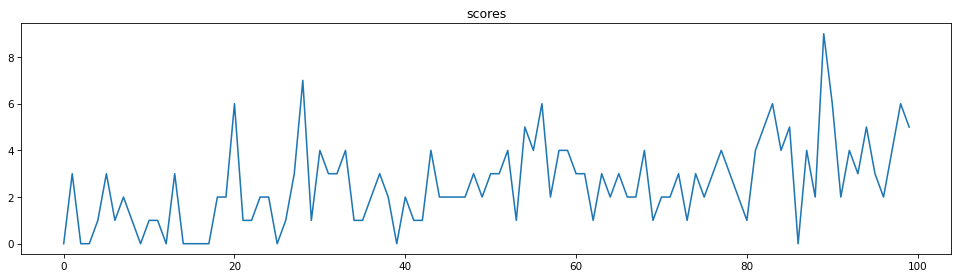

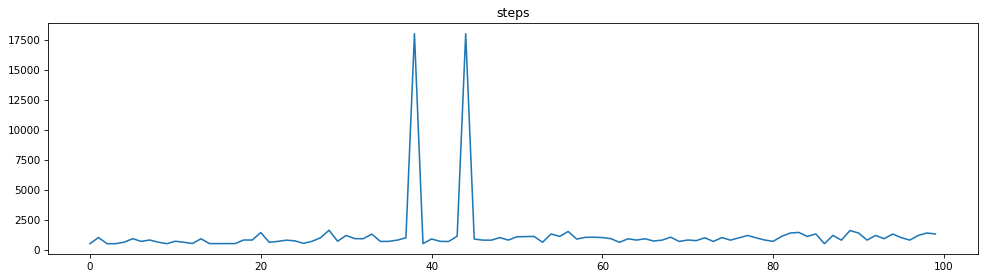

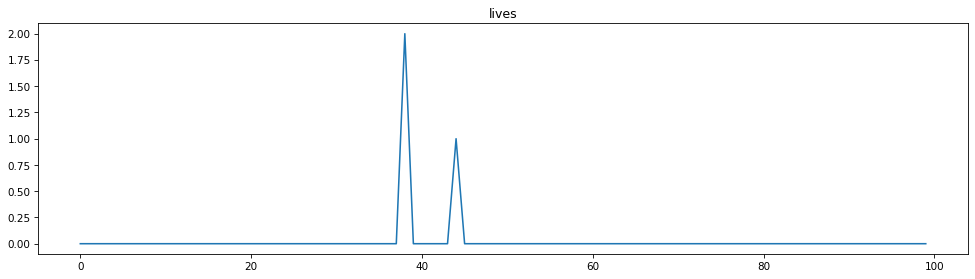

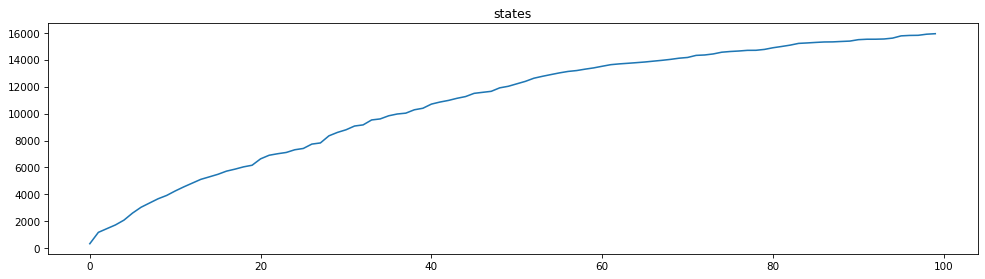

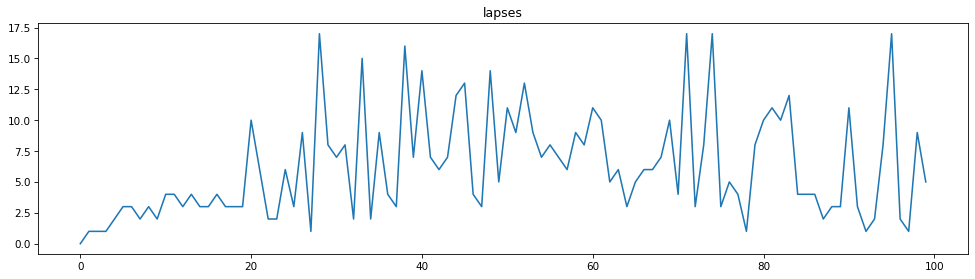

In [12]:
# 2025-11-04 Self-learning on 1-states-only, positive+negative feedback, 100 games, 18,000 limit, no pre-training
cause="terminated"; score=2.5; steps=1235.6; lives=0.0; lapse="0:00:04.746865"
scores = [0, 3.0, 0, 0, 1.0, 3.0, 1.0, 2.0, 1.0, 0, 1.0, 1.0, 0, 3.0, 0, 0, 0, 0, 2.0, 2.0, 6.0, 1.0, 1.0, 2.0, 2.0, 0, 1.0, 3.0, 7.0, 1.0, 4.0, 3.0, 3.0, 4.0, 1.0, 1.0, 2.0, 3.0, 2.0, 0, 2.0, 1.0, 1.0, 4.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 3.0, 4.0, 1.0, 5.0, 4.0, 6.0, 2.0, 4.0, 4.0, 3.0, 3.0, 1.0, 3.0, 2.0, 3.0, 2.0, 2.0, 4.0, 1.0, 2.0, 2.0, 3.0, 1.0, 3.0, 2.0, 3.0, 4.0, 3.0, 2.0, 1.0, 4.0, 5.0, 6.0, 4.0, 5.0, 0, 4.0, 2.0, 9.0, 6.0, 2.0, 4.0, 3.0, 5.0, 3.0, 2.0, 4.0, 6.0, 5.0]
stepss = [492, 1009, 496, 492, 618, 910, 686, 800, 621, 495, 698, 614, 509, 902, 501, 501, 502, 502, 802, 797, 1425, 607, 685, 787, 730, 525, 689, 988, 1614, 699, 1181, 916, 906, 1295, 684, 685, 792, 981, 18000, 498, 886, 689, 675, 1120, 18000, 879, 792, 788, 999, 795, 1073, 1083, 1098, 614, 1304, 1101, 1509, 878, 1023, 1035, 1003, 913, 608, 901, 794, 903, 717, 790, 1037, 679, 800, 749, 985, 679, 1003, 790, 983, 1179, 984, 801, 687, 1106, 1380, 1433, 1097, 1308, 493, 1181, 789, 1592, 1384, 793, 1181, 907, 1298, 1000, 793, 1181, 1383, 1303]
livess = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses = [0, 1, 1, 1, 2, 3, 3, 2, 3, 2, 4, 4, 3, 4, 3, 3, 4, 3, 3, 3, 10, 6, 2, 2, 6, 3, 9, 1, 17, 8, 7, 8, 2, 15, 2, 9, 4, 3, 16, 7, 14, 7, 6, 7, 12, 13, 4, 3, 14, 5, 11, 9, 13, 9, 7, 8, 7, 6, 9, 8, 11, 10, 5, 6, 3, 5, 6, 6, 7, 10, 4, 17, 3, 8, 17, 3, 5, 4, 1, 8, 10, 11, 10, 12, 4, 4, 4, 2, 3, 3, 11, 3, 1, 2, 8, 17, 2, 1, 9, 5]
states = [323, 1167, 1444, 1719, 2078, 2600, 3035, 3352, 3667, 3914, 4247, 4550, 4831, 5111, 5297, 5486, 5721, 5870, 6040, 6160, 6637, 6904, 7017, 7111, 7312, 7409, 7734, 7819, 8349, 8604, 8798, 9078, 9162, 9530, 9606, 9840, 9973, 10036, 10286, 10400, 10709, 10862, 10983, 11141, 11270, 11509, 11585, 11659, 11919, 12034, 12218, 12400, 12635, 12777, 12906, 13032, 13139, 13204, 13309, 13403, 13525, 13642, 13701, 13745, 13792, 13842, 13905, 13966, 14037, 14124, 14179, 14334, 14364, 14441, 14570, 14623, 14659, 14708, 14712, 14778, 14901, 14995, 15095, 15226, 15259, 15298, 15331, 15338, 15369, 15397, 15503, 15535, 15536, 15553, 15618, 15785, 15818, 15827, 15910, 15946]
print(len(scores))
p = pd.Series(scores).plot.line(figsize=(16, 4),title="scores");plt.show() 
p = pd.Series(stepss).plot.line(figsize=(16, 4),title="steps");plt.show() 
p = pd.Series(livess).plot.line(figsize=(16, 4),title="lives");plt.show() 
p = pd.Series(states).plot.line(figsize=(16, 4),title="states"); plt.show() 
p = pd.Series(lapses).plot.line(figsize=(16, 4),title="lapses") 

100


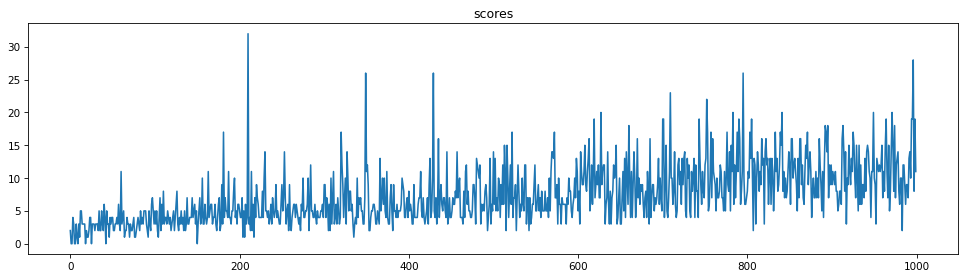

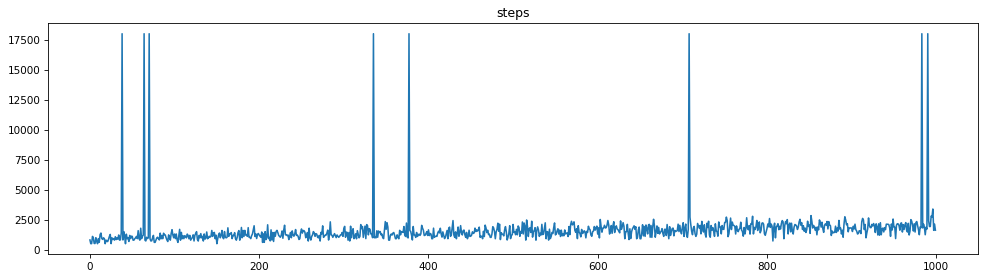

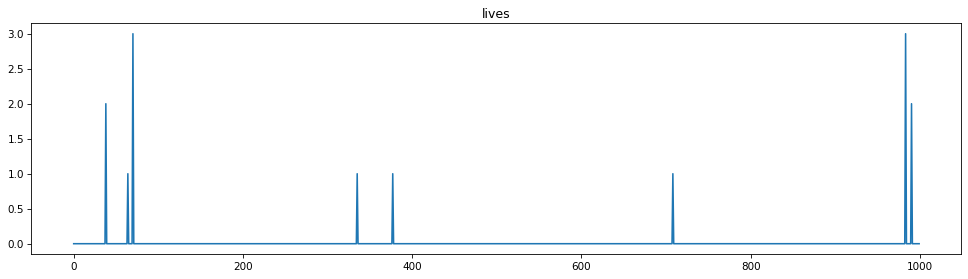

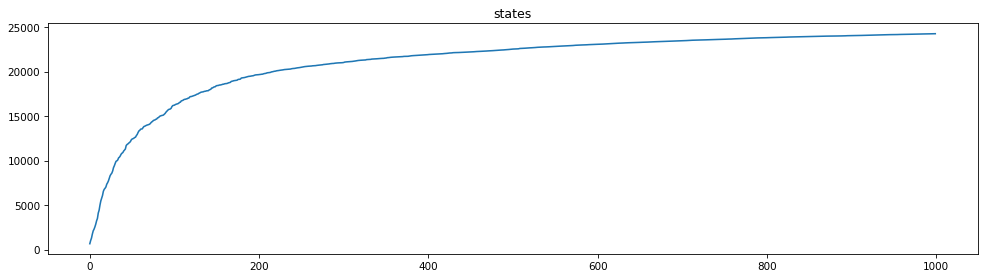

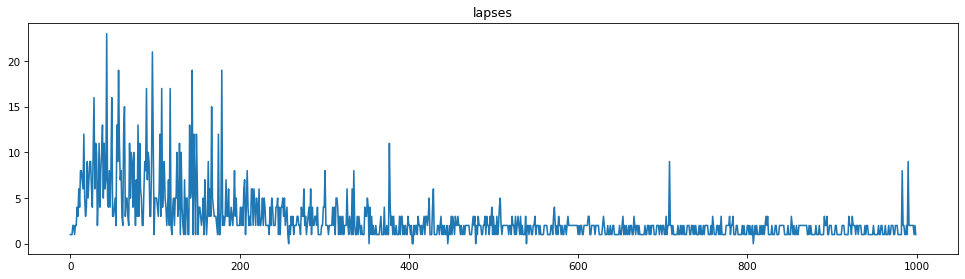

In [13]:
# 2025-11-04 Self-learning on 1-states-only, positive+negative feedback, 1000 games, 18,000 limit, no pre-training
cause="terminated"; score=7.4; steps=1614.6; lives=0.0; lapse="0:00:01.136437"
scores1 = [2.0, 0, 0, 4.0, 3.0, 0, 0, 3.0, 1.0, 0, 3.0, 1.0, 5.0, 5.0, 3.0, 3.0, 3.0, 3.0, 0, 2.0, 1.0, 1.0, 2.0, 4.0, 4.0, 0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 5.0, 2.0, 2.0, 5.0, 3.0, 2.0, 6.0, 4.0, 0, 5.0, 3.0, 3.0, 1.0, 4.0, 3.0, 4.0, 4.0, 2.0, 2.0, 3.0, 3.0, 4.0, 3.0, 6.0, 3.0, 2.0, 11.0, 3.0, 4.0, 5.0, 1.0, 2.0, 2.0, 4.0, 3.0, 3.0, 1.0, 3.0, 2.0, 2.0, 3.0, 4.0, 1.0, 1.0, 2.0, 3.0, 4.0, 3.0, 2.0, 5.0, 3.0, 4.0, 3.0, 5.0, 5.0, 5.0, 3.0, 2.0, 1.0, 5.0, 3.0, 2.0, 6.0, 7.0, 5.0, 3.0, 5.0, 3.0, 5.0, 2.0, 1.0, 4.0, 7.0, 2.0, 6.0, 3.0, 8.0, 3.0, 4.0, 4.0, 3.0, 5.0, 4.0, 3.0, 4.0, 2.0, 3.0, 4.0, 5.0, 2.0, 4.0, 6.0, 8.0, 3.0, 2.0, 4.0, 3.0, 5.0, 3.0, 4.0, 2.0, 5.0, 2.0, 3.0, 7.0, 3.0, 3.0, 4.0, 4.0, 4.0, 7.0, 4.0, 5.0, 6.0, 3.0, 5.0, 0, 3.0, 5.0, 7.0, 3.0, 4.0, 10.0, 3.0, 3.0, 6.0, 4.0, 3.0, 4.0, 11.0, 4.0, 5.0, 6.0, 6.0, 3.0, 4.0, 4.0, 6.0, 3.0, 2.0, 4.0, 6.0, 7.0, 2.0, 3.0, 9.0, 3.0, 17.0, 4.0, 7.0, 5.0, 5.0, 4.0, 11.0, 4.0, 4.0, 3.0, 5.0, 5.0, 8.0, 10.0, 4.0, 5.0, 3.0, 6.0, 6.0, 5.0, 4.0, 4.0, 7.0, 1.0, 5.0, 1.0, 6.0, 3.0, 4.0, 32.0, 3.0, 4.0, 2.0, 11.0, 2.0, 6.0, 1.0, 7.0, 4.0, 9.0, 7.0, 6.0, 4.0, 4.0, 4.0, 4.0, 8.0, 4.0, 10.0, 14.0, 5.0, 5.0, 4.0, 5.0, 3.0, 4.0, 6.0, 3.0, 7.0, 5.0, 4.0, 5.0, 9.0, 4.0, 5.0, 4.0, 3.0, 3.0, 6.0, 9.0, 5.0, 7.0, 14.0, 7.0, 3.0, 5.0, 6.0, 2.0, 9.0, 3.0, 2.0, 4.0, 5.0, 6.0, 6.0, 4.0, 6.0, 5.0, 4.0, 3.0, 4.0, 2.0, 6.0, 5.0, 10.0, 4.0, 4.0, 5.0, 5.0, 6.0, 10.0, 2.0, 6.0, 12.0, 5.0, 5.0, 4.0, 4.0, 6.0, 4.0, 3.0, 5.0, 4.0, 4.0, 4.0, 5.0, 5.0, 6.0, 4.0, 9.0, 9.0, 4.0, 7.0, 6.0, 2.0, 6.0, 2.0, 10.0, 3.0, 7.0, 11.0, 3.0, 4.0, 6.0, 3.0, 7.0, 5.0, 3.0, 4.0, 17.0, 12.0, 9.0, 4.0, 7.0, 10.0, 3.0, 14.0, 10.0, 5.0, 8.0, 8.0, 5.0, 6.0, 3.0, 1.0, 3.0, 4.0, 3.0, 10.0, 4.0, 7.0, 6.0, 7.0, 5.0, 5.0, 3.0, 3.0, 7.0, 26.0, 11.0, 12.0, 9.0, 2.0, 2.0, 4.0, 5.0, 5.0, 6.0, 6.0, 5.0, 3.0, 3.0, 5.0, 4.0, 3.0, 13.0, 5.0, 7.0, 10.0, 6.0, 10.0, 5.0, 4.0, 11.0, 4.0, 3.0, 3.0, 7.0, 9.0, 5.0, 2.0, 9.0, 5.0, 5.0, 4.0, 6.0, 4.0, 5.0, 5.0, 5.0, 6.0, 10.0, 9.0, 8.0, 4.0, 4.0, 6.0, 7.0, 4.0, 8.0, 5.0, 6.0, 5.0, 3.0, 3.0, 9.0, 4.0, 4.0, 4.0, 4.0, 6.0, 7.0, 7.0, 11.0, 5.0, 4.0, 7.0, 4.0, 3.0, 4.0, 5.0, 7.0, 3.0, 9.0, 13.0, 4.0, 5.0, 10.0, 26.0, 5.0, 4.0, 7.0, 3.0, 6.0, 16.0, 4.0, 7.0, 9.0, 6.0, 5.0, 7.0, 7.0, 5.0, 4.0, 14.0, 3.0, 4.0, 7.0, 4.0, 4.0, 5.0, 7.0, 6.0, 6.0, 8.0, 7.0, 14.0, 7.0, 9.0, 10.0, 4.0, 4.0, 4.0, 3.0, 8.0, 4.0, 11.0, 12.0, 6.0, 8.0, 5.0, 5.0, 4.0, 4.0, 5.0, 9.0, 9.0, 7.0, 3.0, 13.0, 12.0, 11.0, 10.0, 12.0, 3.0, 6.0, 5.0, 6.0, 5.0, 8.0, 9.0, 7.0, 2.0, 4.0, 6.0, 13.0, 3.0, 6.0, 5.0, 14.0, 6.0, 13.0, 5.0, 7.0, 5.0, 10.0, 9.0, 4.0, 9.0, 6.0, 12.0, 6.0, 15.0, 11.0, 2.0, 15.0, 10.0, 4.0, 8.0, 12.0, 6.0, 17.0, 4.0, 7.0, 7.0, 9.0, 2.0, 7.0, 12.0, 8.0, 4.0, 6.0, 5.0, 10.0, 6.0, 5.0, 12.0, 12.0, 3.0, 7.0, 7.0, 2.0, 7.0, 3.0, 4.0, 6.0, 6.0, 9.0, 12.0, 5.0, 5.0, 7.0, 9.0, 5.0, 7.0, 4.0, 8.0, 5.0, 5.0, 5.0, 8.0, 5.0, 5.0, 7.0, 4.0, 10.0, 5.0, 11.0, 14.0, 14.0, 13.0, 17.0, 7.0, 7.0, 9.0, 3.0, 10.0, 6.0, 6.0, 3.0, 7.0, 6.0, 6.0, 6.0, 6.0, 3.0, 7.0, 6.0, 10.0, 8.0, 8.0, 5.0, 4.0, 6.0, 7.0, 10.0, 7.0, 13.0, 11.0, 5.0, 8.0, 3.0, 14.0, 11.0, 9.0, 9.0, 11.0, 15.0, 9.0, 8.0, 11.0, 13.0, 16.0, 5.0, 7.0, 12.0, 6.0, 11.0, 19.0, 7.0, 9.0, 11.0, 9.0, 12.0, 7.0, 7.0, 20.0, 9.0, 11.0, 12.0, 12.0, 3.0, 6.0, 7.0, 14.0, 6.0, 3.0, 8.0, 3.0, 7.0, 8.0, 12.0, 10.0, 11.0, 15.0, 3.0, 4.0, 7.0, 10.0, 3.0, 3.0, 7.0, 11.0, 5.0, 13.0, 4.0, 14.0, 10.0, 6.0, 18.0, 10.0, 4.0, 11.0, 4.0, 9.0, 14.0, 10.0, 4.0, 7.0, 16.0, 7.0, 10.0, 6.0, 9.0, 8.0, 9.0, 6.0, 4.0, 7.0, 8.0, 4.0, 11.0, 8.0, 3.0, 16.0, 4.0, 7.0, 9.0, 9.0, 5.0, 7.0, 6.0, 7.0, 9.0, 13.0, 6.0, 10.0, 7.0, 5.0, 19.0, 19.0, 4.0, 9.0, 15.0, 5.0, 4.0, 7.0, 11.0, 23.0, 10.0, 10.0, 6.0, 8.0, 14.0, 6.0, 4.0, 5.0, 12.0, 13.0, 9.0, 11.0, 6.0, 13.0, 9.0, 13.0, 14.0, 5.0, 4.0, 13.0, 10.0, 12.0, 5.0, 4.0, 11.0, 8.0, 10.0, 13.0, 4.0, 12.0, 8.0, 8.0, 4.0, 19.0, 13.0, 9.0, 6.0, 11.0, 8.0, 7.0, 12.0, 13.0, 22.0, 17.0, 5.0, 6.0, 10.0, 17.0, 7.0, 16.0, 11.0, 10.0, 9.0, 5.0, 10.0, 7.0, 7.0, 8.0, 12.0, 11.0, 7.0, 7.0, 5.0, 11.0, 5.0, 10.0, 17.0, 9.0, 8.0, 14.0, 5.0, 15.0, 11.0, 20.0, 6.0, 12.0, 7.0, 11.0, 17.0, 11.0, 19.0, 16.0, 6.0, 8.0, 11.0, 26.0, 10.0, 6.0, 6.0, 7.0, 8.0, 11.0, 10.0, 17.0, 13.0, 19.0, 10.0, 2.0, 13.0, 12.0, 3.0, 10.0, 14.0, 12.0, 8.0, 11.0, 9.0, 16.0, 12.0, 13.0, 3.0, 14.0, 16.0, 12.0, 13.0, 6.0, 11.0, 13.0, 6.0, 13.0, 11.0, 5.0, 9.0, 17.0, 11.0, 13.0, 8.0, 9.0, 12.0, 17.0, 15.0, 20.0, 8.0, 11.0, 7.0, 10.0, 7.0, 8.0, 11.0, 14.0, 12.0, 6.0, 16.0, 16.0, 10.0, 12.0, 13.0, 11.0, 9.0, 5.0, 13.0, 7.0, 16.0, 16.0, 9.0, 12.0, 7.0, 6.0, 11.0, 15.0, 13.0, 17.0, 9.0, 12.0, 14.0, 11.0, 4.0, 8.0, 10.0, 7.0, 7.0, 11.0, 7.0, 10.0, 7.0, 16.0, 12.0, 9.0, 5.0, 11.0, 4.0, 12.0, 18.0, 17.0, 14.0, 18.0, 7.0, 12.0, 9.0, 12.0, 9.0, 11.0, 10.0, 9.0, 11.0, 8.0, 8.0, 5.0, 6.0, 8.0, 8.0, 6.0, 16.0, 18.0, 14.0, 8.0, 14.0, 3.0, 10.0, 9.0, 15.0, 11.0, 9.0, 13.0, 11.0, 17.0, 15.0, 10.0, 7.0, 15.0, 10.0, 5.0, 15.0, 6.0, 12.0, 6.0, 9.0, 9.0, 7.0, 13.0, 8.0, 14.0, 15.0, 14.0, 11.0, 10.0, 4.0, 11.0, 11.0, 20.0, 10.0, 9.0, 3.0, 13.0, 12.0, 11.0, 12.0, 11.0, 12.0, 15.0, 7.0, 11.0, 8.0, 15.0, 19.0, 11.0, 7.0, 15.0, 5.0, 8.0, 14.0, 20.0, 15.0, 8.0, 18.0, 7.0, 12.0, 13.0, 14.0, 8.0, 6.0, 10.0, 10.0, 2.0, 12.0, 12.0, 9.0, 6.0, 9.0, 9.0, 7.0, 13.0, 14.0, 10.0, 19.0, 19.0, 28.0, 8.0, 19.0, 11.0]
stepss1 = [804, 497, 499, 1101, 996, 519, 509, 992, 681, 494, 917, 614, 1254, 1380, 927, 852, 987, 915, 493, 793, 684, 676, 866, 1100, 1265, 500, 984, 844, 923, 793, 1075, 838, 980, 870, 1219, 792, 817, 1382, 18000, 805, 1497, 1108, 494, 1289, 914, 996, 680, 1184, 915, 1116, 1104, 786, 791, 912, 989, 1098, 916, 1581, 914, 790, 1784, 916, 1104, 1212, 18000, 788, 721, 1030, 919, 988, 18000, 902, 721, 737, 980, 1186, 606, 605, 799, 981, 1034, 912, 809, 1373, 901, 1180, 913, 1366, 1233, 1222, 991, 799, 676, 1230, 980, 791, 1349, 1662, 1221, 985, 1298, 918, 1303, 802, 603, 1178, 1689, 789, 1436, 912, 1157, 913, 1165, 1097, 980, 1294, 1181, 905, 1189, 789, 913, 1020, 1234, 721, 1190, 1357, 1498, 833, 717, 1185, 985, 1334, 981, 1104, 719, 1306, 877, 972, 1470, 909, 981, 1114, 1045, 1110, 1599, 1100, 1379, 1436, 909, 1206, 493, 913, 1228, 1381, 987, 1180, 1597, 1008, 910, 1506, 1028, 984, 1025, 1818, 1105, 1312, 1322, 1418, 915, 1182, 1173, 1414, 903, 788, 1029, 1430, 1587, 787, 998, 1848, 994, 1594, 1100, 1604, 1209, 1241, 1105, 1831, 1034, 1021, 917, 1157, 1302, 1666, 1989, 1100, 1313, 927, 1269, 1347, 1211, 1112, 1032, 1469, 601, 1316, 607, 1498, 835, 1035, 2070, 917, 1017, 729, 1650, 801, 1428, 681, 1432, 1117, 1518, 1609, 1422, 1193, 1104, 1033, 1181, 1555, 947, 1632, 2034, 1232, 1235, 1173, 1224, 837, 1099, 1427, 991, 1562, 1224, 1119, 1304, 1673, 1184, 1214, 1104, 843, 913, 1439, 1721, 1376, 1592, 1577, 1457, 993, 1157, 1426, 717, 1788, 986, 799, 1097, 1222, 1501, 1410, 1109, 1332, 1289, 1035, 981, 1186, 717, 1439, 1302, 1981, 1027, 1101, 1211, 1210, 1385, 1626, 801, 1256, 2315, 1222, 1200, 1026, 1180, 1334, 1169, 1002, 1222, 1113, 1030, 1106, 1223, 1225, 1427, 1106, 1773, 1938, 1034, 1461, 1430, 786, 1424, 718, 1952, 997, 1505, 1743, 914, 1089, 1319, 903, 1578, 1292, 986, 1101, 2086, 1754, 1925, 1019, 1500, 1960, 918, 2085, 1997, 1230, 1746, 1687, 1302, 1327, 994, 18000, 985, 1024, 981, 1571, 1030, 1551, 1412, 1505, 1231, 1297, 997, 918, 1611, 2338, 1693, 2240, 1889, 793, 787, 1184, 1298, 1215, 1378, 1427, 1196, 913, 911, 1232, 1032, 905, 1609, 1231, 1501, 1452, 1438, 1924, 1221, 1096, 2216, 1030, 981, 18000, 1596, 1516, 1211, 805, 1928, 1224, 1201, 1018, 1429, 1099, 1221, 1298, 1182, 1314, 2023, 1791, 1614, 1178, 1197, 1335, 1497, 1180, 1648, 1170, 1345, 1297, 905, 917, 1789, 1025, 1099, 1117, 1104, 1393, 1537, 1392, 1782, 1318, 1042, 1478, 1194, 924, 1019, 1311, 1596, 911, 1804, 1873, 1105, 1213, 1857, 2421, 1221, 1025, 1480, 908, 1357, 1884, 1114, 1383, 2000, 1428, 1224, 1584, 1630, 1241, 1026, 1433, 909, 1104, 1618, 1104, 1118, 1216, 1486, 1349, 1396, 1793, 1505, 1646, 1542, 1672, 1875, 1022, 1120, 1107, 909, 1530, 1089, 2042, 1802, 1417, 1617, 1251, 1292, 1025, 1020, 1292, 1913, 1813, 1514, 908, 1477, 1701, 2204, 1527, 2122, 839, 1411, 1302, 1267, 1147, 1656, 1918, 1472, 803, 1035, 1361, 1992, 919, 1201, 1234, 2098, 1429, 1477, 1241, 1692, 1236, 1969, 1836, 1111, 1510, 1365, 2305, 1304, 2218, 1950, 794, 2470, 1933, 1096, 1756, 1825, 1429, 2367, 1043, 1517, 1581, 1830, 789, 1598, 1897, 1639, 1104, 1365, 1216, 2106, 1253, 1294, 1782, 2233, 909, 1507, 1474, 794, 1704, 920, 1096, 1430, 1342, 1841, 2224, 1229, 1299, 1564, 1739, 1302, 1624, 1094, 1621, 1150, 1294, 1154, 1640, 1306, 1374, 1381, 1093, 1921, 1243, 2080, 2362, 2061, 2116, 2318, 1608, 1441, 1741, 919, 1993, 1444, 1355, 1065, 1682, 1343, 1420, 1572, 1487, 980, 1524, 1431, 1947, 1739, 1648, 1212, 1111, 1495, 1553, 1925, 1626, 1814, 1958, 1294, 1816, 980, 2512, 1918, 1454, 1790, 1810, 2029, 1805, 1830, 2030, 2426, 2066, 1300, 1484, 2006, 1359, 1993, 2324, 1427, 1836, 1983, 1707, 1664, 1517, 1401, 2392, 1689, 1918, 2245, 1951, 909, 1486, 1506, 2106, 1353, 839, 1737, 922, 1481, 1727, 1863, 1986, 1691, 1906, 908, 1027, 1646, 1881, 911, 905, 1350, 2070, 1148, 1928, 1105, 2055, 1769, 1310, 2061, 2106, 1033, 2009, 1021, 1890, 2531, 1997, 1036, 1467, 1977, 1359, 1850, 1308, 1450, 1513, 1749, 1345, 1105, 1691, 1694, 1179, 2093, 1515, 908, 1910, 1182, 1521, 1750, 1796, 1149, 1601, 1510, 1543, 1582, 2122, 1506, 2027, 1530, 1315, 1858, 2242, 1100, 1800, 2129, 1224, 1021, 1698, 18000, 2706, 2066, 1520, 1245, 1808, 1933, 1329, 1104, 1285, 2181, 1978, 1789, 2018, 1314, 2354, 1682, 1470, 2074, 1294, 1041, 2193, 1842, 2365, 1213, 1033, 2008, 1623, 1837, 1524, 1105, 2151, 1561, 1500, 1120, 2305, 1904, 1882, 1312, 2008, 1713, 1682, 2254, 2277, 2710, 2427, 1081, 1306, 1958, 2630, 1675, 2296, 2045, 2009, 1933, 1302, 1976, 1610, 1500, 1693, 1768, 2284, 1628, 1508, 1121, 1845, 1305, 1750, 2658, 1787, 1658, 2006, 1294, 2165, 2146, 2781, 1310, 1857, 1678, 1929, 2429, 1593, 2134, 2305, 1405, 1593, 2202, 2234, 2118, 1319, 1194, 1467, 1753, 2136, 1903, 2593, 1850, 2130, 1950, 721, 1836, 2200, 985, 1886, 1989, 2159, 1662, 1946, 1713, 2162, 2420, 2321, 908, 2013, 2340, 2162, 2503, 1306, 2048, 2217, 1481, 2201, 1509, 1302, 1868, 2093, 2056, 1964, 1680, 1878, 2316, 2528, 2036, 2249, 1681, 1991, 1534, 1800, 1429, 1667, 2368, 1933, 2058, 1353, 2836, 2374, 1800, 2017, 1888, 1619, 1867, 1235, 1885, 1654, 2475, 2257, 1878, 2285, 1743, 1440, 2033, 2142, 2032, 2345, 1727, 2334, 2052, 1990, 1180, 1550, 1394, 1442, 1429, 1954, 1432, 1801, 1548, 2436, 1714, 1797, 1303, 1621, 1033, 2122, 2739, 2476, 2074, 2160, 1485, 1818, 1791, 1816, 1793, 1510, 1949, 1722, 2122, 1662, 1550, 1302, 1351, 1576, 1564, 1335, 2327, 2603, 2461, 1671, 2097, 985, 1395, 1740, 2641, 2013, 1841, 1834, 2105, 1973, 2173, 1974, 1429, 2151, 1894, 1218, 2153, 1199, 2247, 1239, 1723, 1797, 1474, 1835, 1661, 2122, 2113, 2117, 2079, 1806, 1105, 2133, 1637, 2550, 1883, 1879, 921, 2034, 2156, 2146, 2021, 1621, 2191, 2232, 1467, 2081, 1676, 2053, 2253, 1621, 1467, 2193, 1221, 1543, 2501, 2373, 2040, 1550, 2160, 1466, 2267, 2340, 2005, 1662, 1241, 1894, 1829, 18000, 1805, 2122, 1871, 1241, 1869, 1713, 18000, 2405, 1926, 1929, 2794, 2719, 3385, 1608, 2128, 1619]
livess1 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses1 = [1, 1, 1, 2, 2, 1, 2, 2, 4, 3, 6, 4, 8, 8, 7, 6, 12, 5, 3, 4, 9, 5, 7, 9, 9, 6, 4, 10, 16, 6, 11, 10, 2, 5, 11, 4, 8, 10, 13, 5, 11, 6, 7, 23, 5, 4, 8, 4, 8, 16, 3, 3, 4, 5, 2, 13, 9, 19, 11, 7, 8, 3, 2, 12, 15, 3, 5, 5, 3, 2, 11, 5, 10, 9, 4, 10, 5, 2, 7, 3, 13, 3, 11, 6, 5, 2, 2, 6, 9, 8, 17, 7, 10, 9, 3, 3, 9, 21, 11, 1, 5, 5, 5, 4, 3, 6, 12, 3, 17, 4, 6, 9, 5, 4, 2, 4, 7, 2, 17, 2, 1, 4, 5, 2, 5, 5, 10, 3, 4, 11, 1, 10, 4, 2, 1, 7, 1, 5, 5, 1, 1, 13, 5, 6, 19, 1, 12, 7, 1, 12, 7, 1, 4, 4, 3, 2, 3, 5, 1, 7, 3, 1, 3, 9, 3, 6, 3, 15, 5, 4, 3, 3, 3, 2, 1, 12, 1, 1, 4, 19, 2, 3, 2, 3, 7, 3, 3, 6, 2, 2, 4, 3, 2, 4, 8, 3, 5, 2, 2, 2, 2, 4, 2, 4, 2, 6, 7, 1, 4, 8, 4, 2, 3, 2, 6, 6, 2, 6, 4, 2, 5, 4, 2, 6, 2, 2, 3, 5, 2, 5, 4, 2, 2, 2, 2, 1, 4, 2, 5, 4, 2, 2, 2, 4, 4, 5, 1, 4, 1, 4, 4, 5, 3, 5, 2, 3, 4, 1, 0, 2, 1, 3, 2, 3, 1, 2, 2, 2, 3, 3, 2, 2, 1, 4, 3, 3, 6, 2, 3, 1, 2, 3, 4, 2, 6, 1, 4, 2, 2, 3, 3, 2, 4, 1, 1, 1, 1, 2, 2, 4, 4, 8, 2, 2, 2, 1, 2, 2, 2, 2, 4, 2, 4, 1, 5, 5, 4, 1, 3, 1, 3, 1, 3, 1, 2, 2, 2, 6, 2, 1, 3, 2, 1, 6, 1, 8, 2, 1, 1, 3, 1, 3, 2, 1, 2, 1, 1, 1, 4, 3, 3, 5, 4, 0, 4, 1, 3, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 1, 4, 1, 1, 2, 1, 1, 11, 4, 2, 3, 1, 3, 1, 1, 2, 1, 1, 1, 3, 1, 3, 3, 1, 2, 1, 2, 1, 1, 3, 2, 2, 1, 2, 0, 0, 2, 1, 2, 2, 1, 3, 2, 2, 1, 2, 1, 2, 3, 1, 3, 3, 2, 3, 5, 1, 1, 1, 4, 6, 1, 1, 1, 1, 2, 2, 1, 2, 3, 1, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 3, 1, 3, 2, 1, 3, 2, 2, 3, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 3, 2, 3, 0, 2, 1, 3, 2, 2, 2, 1, 1, 2, 2, 3, 1, 3, 2, 2, 1, 3, 2, 4, 1, 3, 1, 2, 1, 3, 1, 2, 4, 5, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 3, 2, 2, 1, 3, 1, 2, 3, 2, 1, 3, 1, 2, 1, 1, 1, 3, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 3, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 3, 4, 2, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 3, 3, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 3, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 3, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 3, 1, 2, 2, 9, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 3, 2, 1, 1, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 1, 2, 2, 3, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 3, 2, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 2, 3, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 3, 2, 2, 1, 3, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 8, 2, 2, 1, 1, 2, 1, 9, 2, 2, 2, 2, 2, 2, 1, 2, 1]
states1 = [660, 1022, 1297, 1740, 2102, 2292, 2549, 2852, 3235, 3502, 4118, 4433, 5003, 5475, 5765, 6083, 6552, 6776, 6893, 7040, 7351, 7517, 7727, 8032, 8311, 8473, 8596, 8841, 9218, 9433, 9701, 9929, 9983, 10079, 10315, 10395, 10538, 10733, 10841, 10912, 11084, 11195, 11310, 11705, 11819, 11882, 11978, 12051, 12155, 12344, 12437, 12473, 12524, 12606, 12643, 12825, 12950, 13168, 13344, 13411, 13542, 13561, 13582, 13735, 13846, 13879, 13933, 13983, 14014, 14041, 14077, 14133, 14242, 14351, 14406, 14511, 14558, 14586, 14654, 14689, 14806, 14844, 14935, 15017, 15053, 15082, 15101, 15135, 15233, 15315, 15457, 15562, 15660, 15752, 15781, 15812, 15883, 16081, 16194, 16223, 16248, 16308, 16351, 16378, 16408, 16456, 16560, 16580, 16716, 16748, 16788, 16861, 16899, 16910, 16946, 16968, 17029, 17040, 17161, 17211, 17217, 17249, 17286, 17311, 17351, 17386, 17449, 17489, 17512, 17587, 17624, 17687, 17715, 17729, 17746, 17788, 17801, 17823, 17857, 17869, 17874, 17955, 17998, 18038, 18174, 18181, 18251, 18303, 18308, 18393, 18441, 18451, 18465, 18507, 18512, 18533, 18556, 18596, 18603, 18640, 18663, 18666, 18681, 18722, 18759, 18784, 18807, 18904, 18939, 18957, 18995, 19012, 19027, 19047, 19053, 19126, 19151, 19155, 19182, 19297, 19309, 19322, 19338, 19356, 19387, 19418, 19437, 19467, 19487, 19493, 19512, 19533, 19544, 19553, 19593, 19626, 19650, 19655, 19670, 19674, 19681, 19700, 19706, 19726, 19731, 19767, 19794, 19807, 19824, 19864, 19889, 19897, 19907, 19921, 19958, 19994, 20006, 20038, 20057, 20066, 20095, 20116, 20124, 20141, 20162, 20174, 20183, 20201, 20213, 20232, 20250, 20256, 20263, 20274, 20277, 20285, 20298, 20307, 20335, 20355, 20368, 20375, 20381, 20401, 20413, 20439, 20448, 20466, 20475, 20495, 20517, 20537, 20550, 20575, 20583, 20596, 20607, 20622, 20623, 20628, 20632, 20645, 20650, 20669, 20674, 20681, 20692, 20695, 20715, 20721, 20738, 20747, 20751, 20760, 20780, 20790, 20816, 20829, 20838, 20844, 20852, 20861, 20879, 20887, 20909, 20913, 20931, 20935, 20939, 20957, 20971, 20976, 20990, 21002, 21003, 21006, 21009, 21016, 21020, 21033, 21044, 21086, 21101, 21112, 21118, 21121, 21126, 21135, 21141, 21150, 21163, 21174, 21189, 21194, 21219, 21239, 21266, 21270, 21282, 21288, 21297, 21301, 21310, 21315, 21324, 21327, 21333, 21369, 21376, 21379, 21390, 21398, 21400, 21427, 21435, 21441, 21448, 21450, 21451, 21461, 21466, 21482, 21488, 21492, 21502, 21506, 21510, 21511, 21529, 21540, 21547, 21572, 21593, 21595, 21611, 21619, 21632, 21641, 21649, 21653, 21654, 21664, 21669, 21672, 21679, 21680, 21686, 21694, 21702, 21707, 21710, 21730, 21732, 21735, 21739, 21742, 21742, 21759, 21778, 21789, 21802, 21804, 21817, 21822, 21824, 21834, 21836, 21840, 21844, 21860, 21867, 21875, 21890, 21892, 21899, 21901, 21908, 21911, 21915, 21924, 21938, 21946, 21951, 21953, 21961, 21961, 21963, 21967, 21974, 21983, 21984, 22000, 22006, 22013, 22014, 22020, 22023, 22031, 22047, 22052, 22057, 22073, 22075, 22089, 22109, 22111, 22112, 22112, 22126, 22147, 22155, 22156, 22159, 22159, 22163, 22166, 22168, 22174, 22183, 22187, 22189, 22194, 22199, 22204, 22205, 22209, 22210, 22210, 22214, 22215, 22229, 22232, 22241, 22250, 22254, 22265, 22270, 22278, 22285, 22293, 22295, 22299, 22301, 22305, 22305, 22312, 22316, 22324, 22329, 22337, 22346, 22355, 22356, 22359, 22363, 22369, 22377, 22385, 22399, 22400, 22404, 22408, 22414, 22426, 22433, 22439, 22445, 22447, 22453, 22460, 22472, 22476, 22485, 22490, 22504, 22507, 22519, 22525, 22539, 22545, 22555, 22558, 22562, 22566, 22575, 22577, 22581, 22594, 22622, 22625, 22629, 22632, 22640, 22645, 22651, 22659, 22666, 22673, 22677, 22684, 22692, 22693, 22702, 22711, 22717, 22717, 22726, 22731, 22739, 22753, 22759, 22762, 22772, 22778, 22783, 22787, 22788, 22788, 22794, 22797, 22805, 22810, 22810, 22816, 22824, 22828, 22834, 22838, 22846, 22860, 22860, 22864, 22874, 22878, 22879, 22882, 22887, 22890, 22892, 22893, 22903, 22908, 22914, 22921, 22924, 22928, 22931, 22934, 22941, 22943, 22947, 22956, 22968, 22981, 22983, 22989, 22990, 22999, 23002, 23007, 23010, 23014, 23016, 23020, 23025, 23033, 23034, 23036, 23045, 23049, 23054, 23055, 23059, 23066, 23070, 23076, 23081, 23083, 23085, 23090, 23092, 23098, 23100, 23102, 23108, 23112, 23115, 23121, 23128, 23131, 23136, 23142, 23153, 23164, 23166, 23170, 23175, 23180, 23183, 23189, 23192, 23195, 23205, 23212, 23217, 23217, 23219, 23220, 23222, 23229, 23236, 23245, 23249, 23251, 23252, 23260, 23263, 23267, 23271, 23276, 23280, 23285, 23290, 23292, 23293, 23295, 23295, 23300, 23301, 23305, 23306, 23307, 23313, 23321, 23326, 23333, 23333, 23335, 23337, 23340, 23343, 23344, 23354, 23356, 23361, 23362, 23370, 23376, 23380, 23386, 23391, 23392, 23395, 23399, 23400, 23401, 23406, 23407, 23409, 23412, 23417, 23420, 23425, 23434, 23435, 23438, 23441, 23447, 23450, 23452, 23455, 23456, 23457, 23462, 23467, 23474, 23476, 23480, 23485, 23488, 23491, 23497, 23497, 23498, 23509, 23511, 23518, 23522, 23530, 23536, 23542, 23545, 23549, 23553, 23555, 23559, 23560, 23561, 23565, 23568, 23569, 23575, 23576, 23581, 23581, 23586, 23588, 23588, 23593, 23597, 23604, 23608, 23608, 23608, 23611, 23617, 23620, 23624, 23628, 23634, 23638, 23638, 23638, 23640, 23643, 23647, 23649, 23650, 23651, 23656, 23658, 23664, 23671, 23677, 23680, 23680, 23680, 23684, 23686, 23694, 23700, 23703, 23707, 23707, 23713, 23718, 23721, 23726, 23726, 23733, 23739, 23739, 23741, 23741, 23743, 23751, 23754, 23758, 23763, 23771, 23776, 23782, 23788, 23794, 23795, 23797, 23797, 23801, 23806, 23809, 23810, 23811, 23812, 23815, 23819, 23821, 23826, 23828, 23829, 23830, 23835, 23839, 23842, 23846, 23848, 23849, 23851, 23853, 23855, 23856, 23859, 23862, 23866, 23868, 23870, 23874, 23875, 23876, 23879, 23879, 23881, 23882, 23894, 23896, 23904, 23906, 23909, 23911, 23911, 23911, 23912, 23912, 23913, 23918, 23919, 23921, 23922, 23923, 23926, 23929, 23934, 23935, 23941, 23944, 23944, 23946, 23946, 23948, 23950, 23953, 23954, 23957, 23965, 23968, 23968, 23971, 23971, 23972, 23976, 23978, 23980, 23983, 23985, 23988, 23992, 23995, 23999, 24002, 24007, 24009, 24011, 24011, 24011, 24013, 24014, 24017, 24018, 24019, 24019, 24021, 24022, 24025, 24025, 24026, 24028, 24033, 24033, 24034, 24034, 24035, 24035, 24042, 24044, 24047, 24057, 24058, 24061, 24063, 24065, 24068, 24068, 24070, 24070, 24071, 24074, 24078, 24079, 24079, 24079, 24082, 24085, 24087, 24090, 24093, 24097, 24098, 24101, 24102, 24102, 24102, 24110, 24115, 24118, 24121, 24129, 24131, 24138, 24139, 24143, 24146, 24147, 24149, 24152, 24154, 24158, 24160, 24161, 24162, 24164, 24166, 24170, 24173, 24176, 24177, 24177, 24177, 24177, 24178, 24181, 24183, 24185, 24186, 24187, 24188, 24188, 24194, 24195, 24196, 24201, 24202, 24203, 24204, 24206, 24213, 24213, 24213, 24213, 24216, 24217, 24217, 24219, 24223, 24227, 24230, 24231, 24237, 24240, 24244, 24245, 24247, 24247, 24248, 24249, 24252, 24255, 24256, 24257, 24257, 24260, 24262, 24262, 24264, 24268, 24271, 24273, 24276, 24278, 24279, 24282, 24283]
print(len(scores))
p = pd.Series(scores1).plot.line(figsize=(16, 4),title="scores");plt.show() 
p = pd.Series(stepss1).plot.line(figsize=(16, 4),title="steps");plt.show() 
p = pd.Series(livess1).plot.line(figsize=(16, 4),title="lives");plt.show() 
p = pd.Series(states1).plot.line(figsize=(16, 4),title="states"); plt.show() 
p = pd.Series(lapses1).plot.line(figsize=(16, 4),title="lapses") 

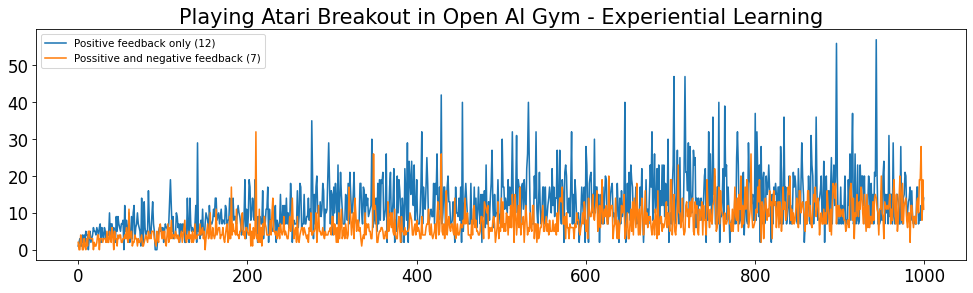

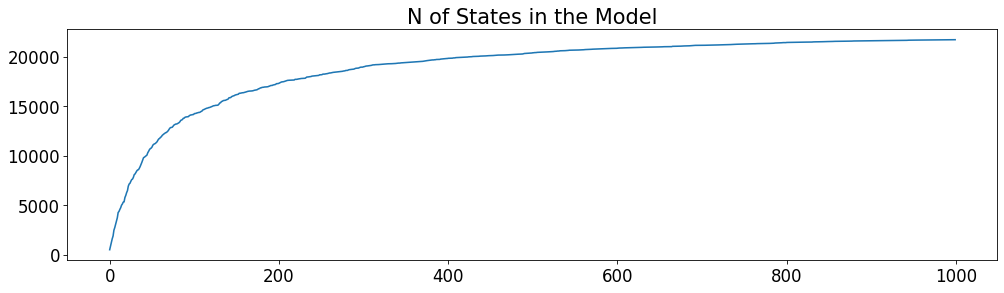

In [14]:
s1 = pd.Series(scorespo)
s2 = pd.Series(scores1)
df = pd.DataFrame({f'Positive feedback only ({round(np.mean(scorespo))})': pd.Series(scorespo), 
                   f'Possitive and negative feedback ({round(np.mean(scores1))})': pd.Series(scores1)})
plt.rcParams["figure.dpi"] = 75
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym - Experiential Learning", fontsize=20);plt.show()
p = pd.Series(statespo).plot.line(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model", fontsize=20)

10000


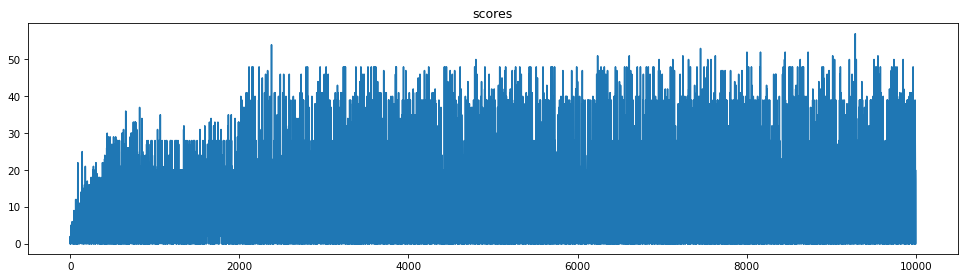

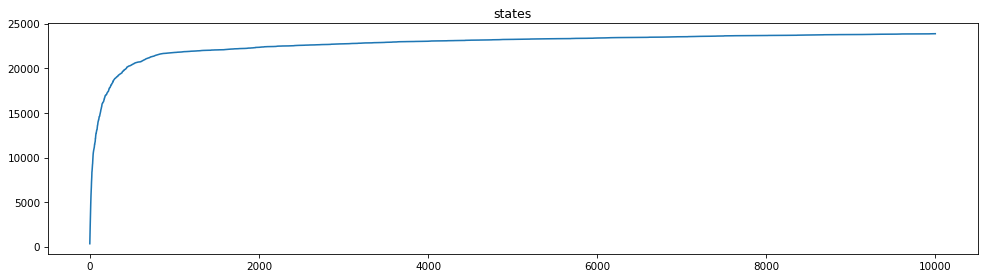

In [15]:
# 2025-11-04 Self-learning on 1-states-only, positive feedback only, 10000 games, 18,000 limit, no pre-training
#PROGRESS
score_avg=16.8; steps_avg=11187.2; lives_avg=1.8; lapse_avg="0:00:06.680595"; time="12:04:40.913184"
scores1 = [0, 2.0, 2.0, 1.0, 0, 2.0, 1.0, 0, 5.0, 3.0, 2.0, 4.0, 2.0, 2.0, 3.0, 3.0, 1.0, 2.0, 2.0, 5.0, 0, 2.0, 3.0, 2.0, 6.0, 2.0, 2.0, 1.0, 1.0, 2.0, 5.0, 0, 5.0, 0, 3.0, 2.0, 5.0, 6.0, 5.0, 2.0, 4.0, 0, 4.0, 0, 5.0, 9.0, 0, 4.0, 1.0, 4.0, 0, 4.0, 2.0, 4.0, 5.0, 4.0, 1.0, 4.0, 0, 5.0, 1.0, 7.0, 4.0, 0, 4.0, 12.0, 8.0, 0, 8.0, 6.0, 8.0, 2.0, 7.0, 8.0, 0, 8.0, 6.0, 9.0, 11.0, 0, 12.0, 0, 8.0, 0, 8.0, 0, 8.0, 4.0, 7.0, 8.0, 22.0, 0, 8.0, 3.0, 9.0, 11.0, 0, 8.0, 8.0, 8.0, 2.0, 2.0, 5.0, 8.0, 8.0, 0, 8.0, 2.0, 11.0, 2.0, 5.0, 9.0, 0, 8.0, 2.0, 2.0, 2.0, 8.0, 9.0, 2.0, 3.0, 8.0, 3.0, 4.0, 8.0, 5.0, 10.0, 9.0, 4.0, 14.0, 8.0, 4.0, 5.0, 14.0, 0, 8.0, 6.0, 8.0, 4.0, 8.0, 10.0, 11.0, 25.0, 16.0, 8.0, 2.0, 4.0, 0, 8.0, 10.0, 8.0, 8.0, 0, 9.0, 8.0, 2.0, 8.0, 2.0, 0, 15.0, 8.0, 0, 9.0, 8.0, 7.0, 9.0, 8.0, 7.0, 2.0, 2.0, 16.0, 9.0, 0, 10.0, 16.0, 10.0, 11.0, 11.0, 0, 21.0, 8.0, 2.0, 10.0, 8.0, 2.0, 7.0, 10.0, 8.0, 4.0, 8.0, 0, 10.0, 9.0, 7.0, 8.0, 0, 8.0, 2.0, 6.0, 2.0, 7.0, 14.0, 17.0, 12.0, 11.0, 9.0, 2.0, 9.0, 8.0, 0, 14.0, 8.0, 7.0, 0, 8.0, 12.0, 8.0, 2.0, 7.0, 11.0, 14.0, 0, 15.0, 11.0, 16.0, 8.0, 10.0, 10.0, 12.0, 16.0, 0, 13.0, 0, 10.0, 0, 10.0, 13.0, 8.0, 2.0, 8.0, 3.0, 12.0, 14.0, 8.0, 7.0, 6.0, 8.0, 0, 18.0, 15.0, 0, 8.0, 2.0, 2.0, 2.0, 0, 10.0, 7.0, 0, 11.0, 8.0, 15.0, 8.0, 7.0, 12.0, 8.0, 7.0, 8.0, 6.0, 8.0, 8.0, 20.0, 17.0, 10.0, 0, 21.0, 11.0, 0, 19.0, 8.0, 13.0, 12.0, 0, 17.0, 12.0, 12.0, 9.0, 4.0, 0, 8.0, 7.0, 10.0, 14.0, 20.0, 10.0, 8.0, 6.0, 0, 10.0, 0, 8.0, 7.0, 15.0, 0, 12.0, 22.0, 8.0, 13.0, 12.0, 7.0, 11.0, 8.0, 5.0, 12.0, 4.0, 6.0, 2.0, 13.0, 19.0, 19.0, 8.0, 0, 8.0, 7.0, 8.0, 7.0, 10.0, 0, 8.0, 8.0, 0, 8.0, 7.0, 9.0, 13.0, 8.0, 5.0, 18.0, 14.0, 10.0, 4.0, 0, 8.0, 2.0, 2.0, 8.0, 14.0, 14.0, 8.0, 0, 18.0, 0, 17.0, 0, 10.0, 8.0, 14.0, 8.0, 8.0, 0, 11.0, 8.0, 6.0, 0, 8.0, 6.0, 3.0, 12.0, 13.0, 8.0, 8.0, 0, 12.0, 7.0, 0, 12.0, 0, 13.0, 6.0, 18.0, 0, 16.0, 22.0, 17.0, 12.0, 20.0, 20.0, 0, 9.0, 2.0, 7.0, 8.0, 9.0, 10.0, 0, 10.0, 20.0, 12.0, 8.0, 0, 15.0, 12.0, 4.0, 8.0, 19.0, 22.0, 0, 23.0, 0, 24.0, 8.0, 2.0, 7.0, 15.0, 0, 15.0, 15.0, 0, 14.0, 0, 10.0, 15.0, 10.0, 0, 23.0, 0, 19.0, 15.0, 15.0, 7.0, 16.0, 0, 26.0, 0, 17.0, 0, 21.0, 6.0, 30.0, 12.0, 0, 27.0, 15.0, 4.0, 24.0, 15.0, 23.0, 15.0, 0, 23.0, 15.0, 24.0, 29.0, 15.0, 23.0, 0, 26.0, 15.0, 0, 15.0, 15.0, 2.0, 9.0, 23.0, 15.0, 12.0, 0, 15.0, 8.0, 0, 15.0, 5.0, 29.0, 15.0, 23.0, 15.0, 15.0, 0, 15.0, 8.0, 19.0, 0, 23.0, 21.0, 12.0, 7.0, 15.0, 0, 15.0, 10.0, 15.0, 6.0, 0, 27.0, 18.0, 15.0, 19.0, 0, 15.0, 19.0, 23.0, 0, 25.0, 23.0, 7.0, 23.0, 19.0, 4.0, 2.0, 0, 23.0, 23.0, 0, 29.0, 15.0, 11.0, 25.0, 0, 15.0, 12.0, 15.0, 0, 15.0, 23.0, 27.0, 0, 12.0, 0, 16.0, 8.0, 0, 27.0, 15.0, 0, 15.0, 21.0, 0, 23.0, 29.0, 15.0, 0, 15.0, 24.0, 0, 15.0, 19.0, 15.0, 25.0, 16.0, 6.0, 0, 28.0, 15.0, 15.0, 0, 15.0, 8.0, 15.0, 15.0, 28.0, 24.0, 28.0, 15.0, 15.0, 12.0, 0, 15.0, 5.0, 17.0, 15.0, 12.0, 6.0, 0, 15.0, 0, 12.0, 8.0, 15.0, 0, 28.0, 15.0, 0, 15.0, 28.0, 15.0, 15.0, 15.0, 12.0, 15.0, 15.0, 0, 15.0, 0, 12.0, 0, 15.0, 15.0, 15.0, 21.0, 0, 18.0, 0, 15.0, 6.0, 0, 15.0, 6.0, 8.0, 0, 24.0, 25.0, 18.0, 0, 30.0, 20.0, 10.0, 0, 23.0, 30.0, 25.0, 16.0, 2.0, 4.0, 0, 25.0, 21.0, 6.0, 27.0, 20.0, 23.0, 0, 31.0, 25.0, 0, 27.0, 25.0, 25.0, 25.0, 25.0, 2.0, 21.0, 6.0, 0, 18.0, 16.0, 7.0, 26.0, 22.0, 0, 27.0, 0, 23.0, 7.0, 22.0, 2.0, 12.0, 32.0, 36.0, 0, 19.0, 32.0, 28.0, 0, 18.0, 7.0, 0, 26.0, 22.0, 18.0, 0, 23.0, 22.0, 0, 26.0, 22.0, 0, 25.0, 22.0, 26.0, 23.0, 0, 26.0, 25.0, 23.0, 23.0, 6.0, 0, 26.0, 0, 26.0, 26.0, 25.0, 0, 22.0, 25.0, 22.0, 9.0, 25.0, 26.0, 2.0, 0, 22.0, 0, 26.0, 23.0, 8.0, 0, 26.0, 27.0, 27.0, 29.0, 28.0, 18.0, 22.0, 18.0, 27.0, 26.0, 25.0, 25.0, 30.0, 30.0, 16.0, 25.0, 26.0, 30.0, 0, 24.0, 29.0, 28.0, 2.0, 25.0, 16.0, 16.0, 8.0, 20.0, 6.0, 6.0, 0, 22.0, 22.0, 16.0, 18.0, 0, 30.0, 28.0, 28.0, 29.0, 33.0, 22.0, 0, 22.0, 30.0, 0, 30.0, 22.0, 8.0, 0, 26.0, 33.0, 30.0, 0, 28.0, 18.0, 0, 27.0, 0, 30.0, 30.0, 0, 27.0, 28.0, 33.0, 30.0, 33.0, 8.0, 30.0, 28.0, 22.0, 9.0, 0, 23.0, 0, 28.0, 22.0, 30.0, 28.0, 0, 31.0, 17.0, 5.0, 20.0, 21.0, 17.0, 0, 25.0, 18.0, 24.0, 17.0, 6.0, 13.0, 17.0, 0, 20.0, 24.0, 20.0, 0, 18.0, 0, 20.0, 17.0, 14.0, 24.0, 20.0, 24.0, 20.0, 18.0, 0, 24.0, 17.0, 10.0, 20.0, 37.0, 20.0, 20.0, 17.0, 0, 17.0, 13.0, 20.0, 0, 20.0, 20.0, 0, 17.0, 11.0, 21.0, 0, 20.0, 0, 17.0, 0, 20.0, 0, 20.0, 0, 17.0, 20.0, 20.0, 34.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 17.0, 0, 25.0, 20.0, 17.0, 0, 17.0, 8.0, 20.0, 20.0, 0, 24.0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 0, 17.0, 0, 20.0, 2.0, 0, 20.0, 0, 20.0, 20.0, 17.0, 0, 17.0, 0, 20.0, 20.0, 24.0, 0, 20.0, 19.0, 22.0, 18.0, 20.0, 17.0, 0, 20.0, 17.0, 23.0, 17.0, 0, 20.0, 27.0, 20.0, 0, 20.0, 20.0, 28.0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 0, 17.0, 0, 17.0, 0, 28.0, 20.0, 0, 17.0, 6.0, 27.0, 20.0, 2.0, 0, 22.0, 17.0, 20.0, 0, 20.0, 0, 20.0, 0, 17.0, 0, 20.0, 13.0, 17.0, 10.0, 20.0, 20.0, 17.0, 5.0, 0, 20.0, 20.0, 20.0, 20.0, 18.0, 8.0, 20.0, 28.0, 20.0, 13.0, 20.0, 20.0, 17.0, 0, 21.0, 28.0, 17.0, 0, 20.0, 20.0, 20.0, 24.0, 20.0, 0, 17.0, 9.0, 20.0, 14.0, 0, 20.0, 20.0, 20.0, 20.0, 21.0, 20.0, 14.0, 17.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 17.0, 17.0, 2.0, 20.0, 20.0, 17.0, 17.0, 0, 21.0, 0, 28.0, 17.0, 0, 20.0, 21.0, 0, 17.0, 14.0, 20.0, 20.0, 20.0, 0, 17.0, 0, 18.0, 0, 20.0, 20.0, 0, 20.0, 13.0, 20.0, 17.0, 8.0, 20.0, 20.0, 17.0, 6.0, 0, 31.0, 0, 20.0, 0, 20.0, 0, 20.0, 0, 17.0, 0, 28.0, 20.0, 24.0, 20.0, 0, 20.0, 17.0, 0, 20.0, 28.0, 18.0, 2.0, 13.0, 28.0, 17.0, 6.0, 2.0, 7.0, 20.0, 17.0, 9.0, 20.0, 20.0, 35.0, 20.0, 20.0, 20.0, 20.0, 20.0, 21.0, 17.0, 0, 21.0, 20.0, 17.0, 20.0, 21.0, 23.0, 23.0, 21.0, 20.0, 17.0, 12.0, 20.0, 28.0, 20.0, 20.0, 0, 21.0, 20.0, 21.0, 17.0, 13.0, 20.0, 14.0, 0, 20.0, 17.0, 6.0, 8.0, 20.0, 0, 20.0, 20.0, 0, 20.0, 7.0, 20.0, 17.0, 0, 20.0, 20.0, 20.0, 18.0, 20.0, 20.0, 28.0, 24.0, 0, 18.0, 0, 20.0, 0, 20.0, 20.0, 0, 20.0, 0, 20.0, 20.0, 0, 20.0, 20.0, 28.0, 20.0, 20.0, 17.0, 0, 20.0, 28.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 13.0, 0, 21.0, 0, 20.0, 0, 20.0, 0, 20.0, 6.0, 8.0, 20.0, 20.0, 20.0, 17.0, 13.0, 20.0, 24.0, 20.0, 17.0, 4.0, 17.0, 6.0, 13.0, 17.0, 13.0, 17.0, 0, 20.0, 17.0, 6.0, 0, 21.0, 24.0, 20.0, 28.0, 28.0, 20.0, 20.0, 0, 20.0, 28.0, 20.0, 25.0, 20.0, 20.0, 0, 25.0, 17.0, 0, 24.0, 20.0, 0, 21.0, 28.0, 17.0, 13.0, 24.0, 17.0, 9.0, 20.0, 0, 17.0, 13.0, 0, 17.0, 0, 17.0, 10.0, 13.0, 17.0, 0, 17.0, 13.0, 20.0, 0, 20.0, 0, 17.0, 13.0, 17.0, 6.0, 5.0, 20.0, 10.0, 20.0, 20.0, 5.0, 17.0, 6.0, 2.0, 13.0, 28.0, 17.0, 13.0, 17.0, 9.0, 14.0, 20.0, 17.0, 0, 28.0, 28.0, 28.0, 20.0, 0, 20.0, 20.0, 17.0, 0, 20.0, 17.0, 0, 28.0, 20.0, 21.0, 17.0, 6.0, 5.0, 17.0, 7.0, 20.0, 20.0, 21.0, 20.0, 0, 20.0, 28.0, 20.0, 20.0, 0, 17.0, 18.0, 21.0, 27.0, 21.0, 0, 18.0, 0, 20.0, 0, 20.0, 20.0, 20.0, 17.0, 7.0, 17.0, 7.0, 0, 20.0, 20.0, 20.0, 20.0, 13.0, 20.0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 13.0, 17.0, 0, 17.0, 12.0, 20.0, 20.0, 0, 17.0, 0, 20.0, 17.0, 0, 20.0, 13.0, 7.0, 20.0, 20.0, 0, 17.0, 6.0, 8.0, 20.0, 18.0, 6.0, 0, 17.0, 0, 20.0, 20.0, 0, 24.0, 31.0, 20.0, 0, 32.0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 0, 17.0, 6.0, 20.0, 20.0, 19.0, 20.0, 17.0, 0, 20.0, 0, 21.0, 20.0, 28.0, 20.0, 27.0, 20.0, 20.0, 0, 24.0, 17.0, 0, 20.0, 0, 17.0, 2.0, 13.0, 28.0, 17.0, 20.0, 20.0, 2.0, 17.0, 0, 20.0, 20.0, 9.0, 20.0, 20.0, 2.0, 0, 20.0, 20.0, 20.0, 18.0, 20.0, 0, 17.0, 11.0, 20.0, 17.0, 0, 20.0, 20.0, 28.0, 20.0, 27.0, 17.0, 6.0, 0, 20.0, 0, 17.0, 24.0, 0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 17.0, 0, 21.0, 14.0, 17.0, 13.0, 28.0, 20.0, 0, 24.0, 20.0, 20.0, 0, 23.0, 20.0, 20.0, 17.0, 0, 27.0, 17.0, 3.0, 20.0, 24.0, 20.0, 20.0, 20.0, 9.0, 25.0, 28.0, 21.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 28.0, 20.0, 20.0, 0, 20.0, 17.0, 9.0, 28.0, 17.0, 20.0, 20.0, 20.0, 0, 17.0, 0, 25.0, 20.0, 0, 17.0, 0, 17.0, 7.0, 24.0, 17.0, 0, 21.0, 20.0, 0, 20.0, 20.0, 17.0, 0, 24.0, 24.0, 0, 17.0, 0, 28.0, 17.0, 7.0, 17.0, 0, 23.0, 17.0, 0, 20.0, 24.0, 13.0, 17.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 24.0, 20.0, 0, 17.0, 7.0, 13.0, 17.0, 0, 20.0, 23.0, 0, 20.0, 0, 20.0, 20.0, 0, 31.0, 0, 20.0, 28.0, 17.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 20.0, 20.0, 21.0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 11.0, 20.0, 23.0, 0, 20.0, 24.0, 17.0, 0, 17.0, 17.0, 0, 20.0, 6.0, 13.0, 0, 28.0, 24.0, 0, 27.0, 20.0, 0, 17.0, 0, 17.0, 0, 17.0, 0, 20.0, 27.0, 20.0, 20.0, 28.0, 24.0, 17.0, 0, 20.0, 0, 32.0, 23.0, 0, 20.0, 13.0, 6.0, 6.0, 14.0, 20.0, 20.0, 20.0, 6.0, 13.0, 23.0, 20.0, 18.0, 0, 17.0, 7.0, 0, 17.0, 21.0, 20.0, 2.0, 3.0, 13.0, 13.0, 17.0, 13.0, 7.0, 10.0, 20.0, 27.0, 20.0, 20.0, 6.0, 17.0, 8.0, 18.0, 20.0, 17.0, 18.0, 20.0, 17.0, 0, 24.0, 18.0, 18.0, 20.0, 28.0, 17.0, 27.0, 17.0, 0, 20.0, 33.0, 23.0, 20.0, 20.0, 19.0, 20.0, 29.0, 17.0, 0, 28.0, 20.0, 20.0, 0, 20.0, 0, 29.0, 21.0, 0, 20.0, 34.0, 0, 20.0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 5.0, 18.0, 20.0, 18.0, 0, 24.0, 28.0, 20.0, 0, 20.0, 13.0, 17.0, 0, 17.0, 0, 20.0, 0, 20.0, 20.0, 0, 20.0, 32.0, 17.0, 12.0, 20.0, 19.0, 0, 20.0, 0, 20.0, 0, 20.0, 20.0, 20.0, 8.0, 33.0, 20.0, 20.0, 0, 27.0, 23.0, 24.0, 20.0, 20.0, 20.0, 20.0, 20.0, 18.0, 0, 20.0, 28.0, 24.0, 17.0, 2.0, 7.0, 20.0, 20.0, 20.0, 20.0, 17.0, 2.0, 17.0, 0, 20.0, 17.0, 13.0, 23.0, 20.0, 20.0, 20.0, 20.0, 33.0, 20.0, 20.0, 0, 20.0, 20.0, 17.0, 18.0, 17.0, 0, 24.0, 0, 28.0, 20.0, 28.0, 20.0, 20.0, 17.0, 0, 17.0, 5.0, 11.0, 20.0, 28.0, 28.0, 17.0, 2.0, 4.0, 20.0, 20.0, 20.0, 20.0, 17.0, 8.0, 20.0, 20.0, 20.0, 31.0, 28.0, 3.0, 2.0, 13.0, 20.0, 20.0, 24.0, 0, 20.0, 20.0, 0, 20.0, 21.0, 21.0, 20.0, 20.0, 24.0, 20.0, 17.0, 0, 17.0, 0, 17.0, 0, 20.0, 20.0, 0, 28.0, 17.0, 8.0, 20.0, 17.0, 0, 28.0, 17.0, 18.0, 17.0, 18.0, 0, 20.0, 20.0, 17.0, 0, 20.0, 17.0, 18.0, 20.0, 9.0, 17.0, 0, 20.0, 17.0, 2.0, 8.0, 0, 21.0, 0, 17.0, 0, 20.0, 20.0, 17.0, 0, 28.0, 21.0, 20.0, 0, 28.0, 20.0, 28.0, 20.0, 6.0, 4.0, 23.0, 20.0, 21.0, 20.0, 20.0, 20.0, 17.0, 18.0, 22.0, 32.0, 25.0, 17.0, 9.0, 35.0, 21.0, 0, 21.0, 0, 17.0, 13.0, 2.0, 0, 21.0, 0, 22.0, 20.0, 20.0, 17.0, 21.0, 0, 28.0, 20.0, 20.0, 17.0, 28.0, 20.0, 11.0, 23.0, 17.0, 0, 20.0, 28.0, 17.0, 0, 17.0, 10.0, 28.0, 35.0, 20.0, 24.0, 28.0, 0, 21.0, 20.0, 13.0, 20.0, 17.0, 0, 21.0, 0, 20.0, 10.0, 20.0, 20.0, 17.0, 8.0, 17.0, 0, 17.0, 0, 17.0, 12.0, 17.0, 0, 18.0, 0, 18.0, 20.0, 20.0, 17.0, 15.0, 20.0, 20.0, 20.0, 20.0, 17.0, 9.0, 20.0, 0, 17.0, 0, 20.0, 34.0, 0, 20.0, 0, 17.0, 6.0, 0, 20.0, 15.0, 17.0, 6.0, 20.0, 25.0, 17.0, 0, 20.0, 0, 21.0, 22.0, 0, 20.0, 20.0, 17.0, 0, 25.0, 20.0, 0, 20.0, 20.0, 29.0, 17.0, 0, 20.0, 21.0, 0, 17.0, 17.0, 0, 29.0, 20.0, 33.0, 20.0, 28.0, 20.0, 20.0, 27.0, 33.0, 20.0, 20.0, 6.0, 20.0, 17.0, 0, 20.0, 0, 20.0, 32.0, 17.0, 2.0, 6.0, 2.0, 18.0, 23.0, 17.0, 0, 20.0, 28.0, 23.0, 40.0, 0, 20.0, 6.0, 18.0, 37.0, 20.0, 20.0, 20.0, 20.0, 20.0, 19.0, 23.0, 39.0, 20.0, 20.0, 0, 20.0, 0, 17.0, 13.0, 20.0, 33.0, 20.0, 17.0, 0, 18.0, 6.0, 0, 37.0, 20.0, 17.0, 18.0, 28.0, 20.0, 0, 20.0, 20.0, 20.0, 2.0, 18.0, 37.0, 24.0, 21.0, 20.0, 17.0, 6.0, 0, 20.0, 0, 20.0, 0, 20.0, 20.0, 17.0, 0, 20.0, 20.0, 17.0, 0, 20.0, 0, 37.0, 20.0, 41.0, 0, 17.0, 5.0, 20.0, 17.0, 0, 39.0, 0, 20.0, 17.0, 9.0, 6.0, 0, 20.0, 20.0, 23.0, 21.0, 0, 20.0, 17.0, 0, 41.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 17.0, 13.0, 17.0, 0, 48.0, 20.0, 0, 17.0, 0, 28.0, 20.0, 20.0, 22.0, 0, 20.0, 20.0, 0, 28.0, 20.0, 0, 28.0, 17.0, 13.0, 6.0, 18.0, 20.0, 0, 22.0, 0, 39.0, 21.0, 20.0, 20.0, 28.0, 17.0, 0, 20.0, 20.0, 20.0, 48.0, 17.0, 0, 20.0, 20.0, 0, 20.0, 19.0, 20.0, 17.0, 4.0, 0, 48.0, 0, 17.0, 0, 20.0, 0, 20.0, 0, 20.0, 0, 39.0, 21.0, 17.0, 13.0, 20.0, 0, 24.0, 36.0, 28.0, 20.0, 20.0, 11.0, 20.0, 39.0, 40.0, 17.0, 0, 20.0, 0, 17.0, 28.0, 20.0, 24.0, 28.0, 28.0, 28.0, 20.0, 20.0, 17.0, 10.0, 17.0, 6.0, 13.0, 2.0, 2.0, 6.0, 7.0, 0, 20.0, 21.0, 18.0, 23.0, 0, 20.0, 11.0, 20.0, 20.0, 2.0, 18.0, 0, 20.0, 17.0, 14.0, 20.0, 20.0, 20.0, 20.0, 39.0, 0, 20.0, 20.0, 0, 48.0, 0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 31.0, 30.0, 20.0, 20.0, 7.0, 0, 20.0, 17.0, 0, 20.0, 0, 17.0, 0, 23.0, 0, 26.0, 20.0, 2.0, 13.0, 0, 17.0, 0, 17.0, 0, 43.0, 0, 41.0, 20.0, 20.0, 20.0, 45.0, 20.0, 20.0, 20.0, 20.0, 20.0, 17.0, 0, 17.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 17.0, 0, 28.0, 20.0, 0, 17.0, 0, 20.0, 20.0, 0, 20.0, 20.0, 41.0, 20.0, 20.0, 20.0, 27.0, 20.0, 17.0, 0, 18.0, 20.0, 20.0, 41.0, 46.0, 20.0, 20.0, 20.0, 40.0, 17.0, 0, 17.0, 8.0, 20.0, 20.0, 37.0, 0, 17.0, 0, 20.0, 21.0, 20.0, 20.0, 20.0, 0, 20.0, 24.0, 24.0, 47.0, 20.0, 23.0, 0, 20.0, 20.0, 20.0, 20.0, 17.0, 0, 17.0, 0, 17.0, 0, 20.0, 20.0, 6.0, 0, 20.0, 10.0, 23.0, 20.0, 20.0, 39.0, 20.0, 33.0, 17.0, 0, 40.0, 0, 20.0, 28.0, 17.0, 0, 20.0, 0, 17.0, 17.0, 20.0, 20.0, 28.0, 33.0, 23.0, 20.0, 20.0, 41.0, 54.0, 20.0, 9.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 10.0, 0, 20.0, 17.0, 17.0, 0, 20.0, 20.0, 6.0, 20.0, 20.0, 20.0, 0, 23.0, 17.0, 0, 20.0, 17.0, 0, 17.0, 0, 20.0, 25.0, 20.0, 28.0, 20.0, 41.0, 20.0, 7.0, 20.0, 20.0, 28.0, 41.0, 20.0, 33.0, 20.0, 28.0, 17.0, 18.0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 20.0, 18.0, 23.0, 21.0, 20.0, 20.0, 20.0, 10.0, 11.0, 2.0, 20.0, 0, 35.0, 0, 28.0, 17.0, 8.0, 20.0, 19.0, 0, 17.0, 4.0, 0, 21.0, 20.0, 20.0, 14.0, 20.0, 40.0, 20.0, 0, 28.0, 20.0, 17.0, 23.0, 20.0, 17.0, 0, 32.0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 20.0, 28.0, 20.0, 20.0, 46.0, 20.0, 24.0, 0, 24.0, 17.0, 9.0, 23.0, 0, 20.0, 20.0, 0, 19.0, 0, 17.0, 2.0, 15.0, 20.0, 11.0, 0, 22.0, 20.0, 20.0, 17.0, 8.0, 9.0, 20.0, 18.0, 20.0, 41.0, 20.0, 17.0, 0, 20.0, 6.0, 17.0, 13.0, 0, 20.0, 0, 46.0, 17.0, 0, 17.0, 8.0, 17.0, 0, 20.0, 39.0, 39.0, 0, 17.0, 0, 20.0, 20.0, 2.0, 29.0, 0, 21.0, 0, 17.0, 15.0, 0, 17.0, 20.0, 20.0, 0, 40.0, 0, 20.0, 20.0, 20.0, 20.0, 0, 17.0, 0, 17.0, 0, 17.0, 0, 23.0, 20.0, 5.0, 28.0, 20.0, 23.0, 0, 31.0, 17.0, 0, 20.0, 0, 20.0, 0, 18.0, 0, 20.0, 20.0, 0, 32.0, 20.0, 0, 20.0, 0, 17.0, 0, 46.0, 23.0, 20.0, 32.0, 17.0, 20.0, 10.0, 18.0, 20.0, 39.0, 28.0, 21.0, 20.0, 10.0, 0, 20.0, 28.0, 20.0, 19.0, 0, 20.0, 18.0, 20.0, 23.0, 20.0, 20.0, 20.0, 23.0, 20.0, 20.0, 17.0, 0, 20.0, 0, 20.0, 20.0, 39.0, 20.0, 18.0, 21.0, 20.0, 0, 20.0, 20.0, 24.0, 0, 20.0, 20.0, 40.0, 28.0, 20.0, 20.0, 39.0, 0, 35.0, 0, 20.0, 20.0, 17.0, 0, 20.0, 20.0, 20.0, 19.0, 20.0, 0, 23.0, 20.0, 20.0, 24.0, 39.0, 17.0, 0, 17.0, 13.0, 17.0, 0, 31.0, 28.0, 20.0, 20.0, 18.0, 20.0, 0, 34.0, 20.0, 17.0, 18.0, 6.0, 5.0, 0, 18.0, 20.0, 20.0, 17.0, 0, 20.0, 23.0, 20.0, 0, 17.0, 6.0, 10.0, 11.0, 20.0, 20.0, 34.0, 10.0, 20.0, 25.0, 0, 23.0, 0, 28.0, 30.0, 20.0, 28.0, 20.0, 0, 20.0, 28.0, 23.0, 0, 20.0, 20.0, 17.0, 0, 20.0, 41.0, 24.0, 17.0, 6.0, 15.0, 17.0, 0, 37.0, 16.0, 17.0, 0, 28.0, 20.0, 46.0, 20.0, 18.0, 20.0, 0, 17.0, 0, 41.0, 17.0, 11.0, 0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 17.0, 16.0, 17.0, 0, 39.0, 20.0, 17.0, 0, 18.0, 18.0, 20.0, 39.0, 20.0, 17.0, 0, 28.0, 17.0, 0, 28.0, 20.0, 20.0, 17.0, 0, 20.0, 20.0, 15.0, 28.0, 17.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 17.0, 0, 20.0, 20.0, 25.0, 20.0, 0, 48.0, 17.0, 4.0, 15.0, 20.0, 17.0, 0, 20.0, 20.0, 20.0, 28.0, 17.0, 11.0, 20.0, 0, 20.0, 20.0, 48.0, 20.0, 0, 20.0, 0, 20.0, 17.0, 18.0, 40.0, 20.0, 6.0, 6.0, 4.0, 0, 20.0, 28.0, 0, 22.0, 28.0, 37.0, 15.0, 20.0, 21.0, 20.0, 15.0, 21.0, 0, 17.0, 2.0, 6.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 25.0, 6.0, 2.0, 7.0, 0, 17.0, 0, 20.0, 6.0, 28.0, 20.0, 0, 20.0, 0, 37.0, 11.0, 40.0, 20.0, 28.0, 17.0, 5.0, 4.0, 28.0, 18.0, 20.0, 18.0, 20.0, 17.0, 0, 17.0, 0, 21.0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 28.0, 20.0, 20.0, 0, 20.0, 20.0, 8.0, 17.0, 8.0, 17.0, 23.0, 0, 17.0, 6.0, 13.0, 38.0, 0, 24.0, 0, 17.0, 2.0, 2.0, 26.0, 0, 28.0, 17.0, 17.0, 0, 17.0, 0, 17.0, 0, 20.0, 37.0, 0, 41.0, 20.0, 20.0, 28.0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 28.0, 0, 17.0, 44.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 7.0, 20.0, 37.0, 20.0, 20.0, 39.0, 20.0, 20.0, 39.0, 21.0, 23.0, 20.0, 28.0, 6.0, 17.0, 0, 48.0, 20.0, 20.0, 23.0, 23.0, 0, 20.0, 41.0, 20.0, 20.0, 0, 17.0, 8.0, 21.0, 17.0, 0, 28.0, 20.0, 20.0, 28.0, 20.0, 18.0, 0, 20.0, 20.0, 41.0, 20.0, 20.0, 41.0, 20.0, 20.0, 0, 17.0, 30.0, 20.0, 20.0, 17.0, 0, 20.0, 28.0, 28.0, 20.0, 20.0, 20.0, 0, 23.0, 17.0, 28.0, 28.0, 46.0, 20.0, 20.0, 20.0, 2.0, 44.0, 0, 37.0, 20.0, 39.0, 20.0, 22.0, 20.0, 0, 23.0, 20.0, 20.0, 44.0, 0, 28.0, 24.0, 0, 48.0, 20.0, 0, 28.0, 28.0, 20.0, 17.0, 9.0, 40.0, 0, 41.0, 20.0, 20.0, 0, 20.0, 17.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 18.0, 28.0, 46.0, 20.0, 17.0, 0, 20.0, 20.0, 0, 39.0, 20.0, 20.0, 20.0, 17.0, 0, 20.0, 24.0, 21.0, 20.0, 20.0, 24.0, 39.0, 20.0, 17.0, 0, 20.0, 0, 17.0, 0, 20.0, 0, 20.0, 17.0, 20.0, 32.0, 20.0, 17.0, 8.0, 37.0, 17.0, 2.0, 28.0, 13.0, 20.0, 0, 20.0, 28.0, 17.0, 0, 20.0, 0, 20.0, 20.0, 18.0, 20.0, 0, 20.0, 20.0, 9.0, 18.0, 17.0, 0, 17.0, 0, 28.0, 20.0, 0, 20.0, 0, 17.0, 0, 20.0, 0, 39.0, 20.0, 20.0, 17.0, 0, 20.0, 17.0, 30.0, 24.0, 34.0, 37.0, 2.0, 6.0, 18.0, 41.0, 0, 20.0, 39.0, 0, 17.0, 0, 20.0, 0, 20.0, 0, 37.0, 21.0, 20.0, 20.0, 0, 33.0, 20.0, 28.0, 20.0, 2.0, 19.0, 20.0, 20.0, 0, 43.0, 20.0, 10.0, 0, 28.0, 36.0, 21.0, 18.0, 41.0, 20.0, 23.0, 17.0, 0, 20.0, 13.0, 17.0, 0, 20.0, 0, 17.0, 0, 20.0, 28.0, 28.0, 6.0, 0, 20.0, 17.0, 0, 28.0, 0, 37.0, 4.0, 20.0, 37.0, 28.0, 39.0, 20.0, 20.0, 20.0, 41.0, 20.0, 41.0, 0, 37.0, 39.0, 39.0, 20.0, 0, 20.0, 21.0, 0, 17.0, 2.0, 18.0, 20.0, 35.0, 20.0, 20.0, 0, 20.0, 23.0, 20.0, 41.0, 20.0, 20.0, 20.0, 39.0, 20.0, 17.0, 48.0, 0, 33.0, 20.0, 20.0, 24.0, 17.0, 6.0, 20.0, 20.0, 7.0, 20.0, 48.0, 20.0, 17.0, 0, 20.0, 40.0, 17.0, 11.0, 28.0, 17.0, 0, 17.0, 48.0, 20.0, 0, 20.0, 0, 20.0, 17.0, 0, 17.0, 0, 20.0, 31.0, 28.0, 20.0, 20.0, 20.0, 20.0, 17.0, 28.0, 32.0, 0, 20.0, 23.0, 17.0, 0, 20.0, 20.0, 17.0, 34.0, 17.0, 0, 20.0, 0, 20.0, 0, 17.0, 0, 20.0, 20.0, 0, 20.0, 28.0, 23.0, 0, 20.0, 17.0, 0, 20.0, 7.0, 0, 39.0, 20.0, 20.0, 21.0, 18.0, 17.0, 4.0, 20.0, 20.0, 21.0, 20.0, 39.0, 17.0, 0, 20.0, 17.0, 0, 24.0, 0, 20.0, 0, 20.0, 20.0, 0, 20.0, 17.0, 0, 17.0, 6.0, 0, 33.0, 0, 27.0, 20.0, 7.0, 28.0, 38.0, 20.0, 40.0, 39.0, 0, 30.0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 39.0, 39.0, 20.0, 0, 39.0, 0, 20.0, 20.0, 17.0, 0, 39.0, 0, 20.0, 25.0, 41.0, 26.0, 20.0, 0, 28.0, 39.0, 0, 35.0, 0, 35.0, 17.0, 0, 48.0, 47.0, 0, 17.0, 0, 39.0, 28.0, 17.0, 28.0, 20.0, 17.0, 0, 20.0, 0, 20.0, 0, 20.0, 20.0, 18.0, 40.0, 0, 20.0, 0, 29.0, 20.0, 21.0, 12.0, 17.0, 0, 35.0, 17.0, 0, 20.0, 0, 20.0, 20.0, 38.0, 0, 20.0, 21.0, 20.0, 20.0, 20.0, 0, 32.0, 17.0, 44.0, 0, 17.0, 6.0, 28.0, 0, 24.0, 0, 20.0, 20.0, 20.0, 0, 20.0, 48.0, 19.0, 20.0, 17.0, 0, 17.0, 0, 20.0, 39.0, 20.0, 23.0, 18.0, 0, 28.0, 17.0, 0, 37.0, 28.0, 20.0, 20.0, 21.0, 20.0, 46.0, 20.0, 0, 17.0, 0, 20.0, 25.0, 20.0, 20.0, 0, 20.0, 20.0, 20.0, 17.0, 0, 39.0, 17.0, 46.0, 20.0, 20.0, 28.0, 20.0, 17.0, 0, 17.0, 29.0, 37.0, 20.0, 0, 17.0, 10.0, 20.0, 20.0, 0, 17.0, 0, 20.0, 20.0, 0, 20.0, 11.0, 27.0, 20.0, 21.0, 28.0, 20.0, 20.0, 20.0, 20.0, 20.0, 21.0, 20.0, 40.0, 0, 40.0, 28.0, 20.0, 0, 20.0, 0, 17.0, 2.0, 48.0, 40.0, 20.0, 20.0, 24.0, 0, 20.0, 0, 20.0, 20.0, 20.0, 41.0, 20.0, 28.0, 17.0, 18.0, 0, 20.0, 0, 20.0, 20.0, 0, 17.0, 11.0, 23.0, 25.0, 8.0, 28.0, 20.0, 20.0, 20.0, 17.0, 18.0, 39.0, 17.0, 2.0, 28.0, 18.0, 20.0, 48.0, 0, 20.0, 20.0, 0, 18.0, 39.0, 20.0, 20.0, 23.0, 20.0, 39.0, 35.0, 0, 20.0, 21.0, 20.0, 37.0, 15.0, 20.0, 20.0, 21.0, 17.0, 28.0, 4.0, 17.0, 0, 20.0, 20.0, 48.0, 36.0, 20.0, 6.0, 6.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 48.0, 0, 20.0, 0, 17.0, 0, 20.0, 31.0, 20.0, 23.0, 20.0, 0, 42.0, 48.0, 0, 24.0, 0, 20.0, 0, 20.0, 28.0, 20.0, 6.0, 0, 20.0, 20.0, 41.0, 0, 20.0, 11.0, 20.0, 20.0, 0, 20.0, 17.0, 44.0, 0, 20.0, 0, 41.0, 20.0, 12.0, 34.0, 0, 27.0, 20.0, 18.0, 20.0, 20.0, 0, 37.0, 14.0, 20.0, 20.0, 20.0, 12.0, 41.0, 20.0, 19.0, 0, 21.0, 0, 20.0, 18.0, 23.0, 17.0, 0, 20.0, 17.0, 0, 20.0, 28.0, 41.0, 20.0, 28.0, 20.0, 20.0, 24.0, 20.0, 25.0, 17.0, 28.0, 9.0, 0, 17.0, 8.0, 31.0, 20.0, 0, 27.0, 20.0, 20.0, 17.0, 34.0, 20.0, 20.0, 28.0, 17.0, 0, 20.0, 20.0, 0, 23.0, 20.0, 20.0, 0, 20.0, 47.0, 0, 20.0, 0, 17.0, 18.0, 35.0, 20.0, 17.0, 0, 19.0, 17.0, 0, 41.0, 39.0, 20.0, 20.0, 20.0, 20.0, 18.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 17.0, 0, 39.0, 0, 41.0, 20.0, 17.0, 0, 20.0, 10.0, 28.0, 17.0, 20.0, 17.0, 18.0, 0, 23.0, 20.0, 20.0, 20.0, 20.0, 0, 17.0, 6.0, 0, 27.0, 20.0, 20.0, 0, 28.0, 20.0, 20.0, 39.0, 20.0, 37.0, 34.0, 39.0, 28.0, 28.0, 20.0, 20.0, 20.0, 23.0, 17.0, 5.0, 20.0, 17.0, 0, 17.0, 0, 17.0, 18.0, 20.0, 17.0, 0, 17.0, 0, 20.0, 0, 20.0, 40.0, 17.0, 6.0, 0, 20.0, 0, 28.0, 17.0, 0, 20.0, 20.0, 0, 19.0, 20.0, 20.0, 0, 17.0, 13.0, 40.0, 38.0, 20.0, 22.0, 19.0, 0, 17.0, 0, 17.0, 0, 22.0, 17.0, 6.0, 6.0, 0, 17.0, 0, 38.0, 17.0, 8.0, 35.0, 20.0, 27.0, 20.0, 0, 28.0, 20.0, 29.0, 24.0, 20.0, 17.0, 11.0, 17.0, 0, 23.0, 46.0, 20.0, 22.0, 39.0, 46.0, 33.0, 0, 48.0, 20.0, 24.0, 48.0, 17.0, 0, 20.0, 20.0, 6.0, 9.0, 20.0, 0, 17.0, 2.0, 20.0, 17.0, 0, 17.0, 0, 39.0, 20.0, 0, 17.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 24.0, 41.0, 20.0, 17.0, 0, 17.0, 18.0, 0, 20.0, 20.0, 21.0, 28.0, 28.0, 20.0, 17.0, 0, 20.0, 28.0, 17.0, 0, 33.0, 34.0, 0, 33.0, 20.0, 20.0, 20.0, 17.0, 0, 24.0, 17.0, 0, 18.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 35.0, 0, 20.0, 17.0, 20.0, 21.0, 0, 34.0, 39.0, 0, 28.0, 20.0, 10.0, 7.0, 20.0, 20.0, 23.0, 20.0, 23.0, 17.0, 48.0, 20.0, 39.0, 17.0, 0, 18.0, 7.0, 38.0, 20.0, 20.0, 20.0, 0, 23.0, 20.0, 20.0, 24.0, 20.0, 0, 34.0, 20.0, 17.0, 28.0, 28.0, 17.0, 0, 17.0, 0, 47.0, 17.0, 0, 20.0, 28.0, 37.0, 18.0, 17.0, 18.0, 20.0, 17.0, 0, 20.0, 0, 20.0, 8.0, 20.0, 24.0, 24.0, 20.0, 20.0, 39.0, 0, 17.0, 0, 39.0, 20.0, 17.0, 0, 20.0, 22.0, 24.0, 20.0, 20.0, 20.0, 9.0, 20.0, 20.0, 11.0, 20.0, 24.0, 0, 41.0, 20.0, 20.0, 24.0, 0, 17.0, 6.0, 0, 39.0, 20.0, 20.0, 20.0, 39.0, 20.0, 6.0, 20.0, 0, 20.0, 0, 17.0, 9.0, 20.0, 0, 20.0, 14.0, 20.0, 24.0, 0, 17.0, 0, 20.0, 20.0, 35.0, 20.0, 20.0, 20.0, 20.0, 9.0, 20.0, 35.0, 20.0, 17.0, 0, 28.0, 20.0, 20.0, 42.0, 0, 17.0, 41.0, 0, 17.0, 0, 20.0, 20.0, 0, 20.0, 0, 20.0, 12.0, 0, 20.0, 0, 20.0, 28.0, 20.0, 17.0, 0, 23.0, 0, 35.0, 0, 28.0, 20.0, 20.0, 35.0, 23.0, 23.0, 20.0, 20.0, 0, 20.0, 20.0, 20.0, 27.0, 41.0, 28.0, 20.0, 17.0, 6.0, 0, 20.0, 17.0, 0, 17.0, 4.0, 0, 17.0, 2.0, 6.0, 0, 20.0, 20.0, 20.0, 20.0, 45.0, 20.0, 39.0, 17.0, 0, 20.0, 17.0, 0, 20.0, 0, 20.0, 20.0, 0, 20.0, 23.0, 20.0, 20.0, 0, 18.0, 0, 20.0, 46.0, 28.0, 28.0, 20.0, 20.0, 7.0, 0, 22.0, 20.0, 20.0, 39.0, 17.0, 18.0, 0, 20.0, 7.0, 20.0, 0, 20.0, 9.0, 20.0, 35.0, 39.0, 0, 20.0, 20.0, 20.0, 5.0, 20.0, 0, 28.0, 20.0, 28.0, 20.0, 20.0, 39.0, 20.0, 20.0, 23.0, 28.0, 18.0, 0, 17.0, 6.0, 0, 17.0, 0, 21.0, 0, 20.0, 0, 20.0, 0, 47.0, 20.0, 20.0, 37.0, 20.0, 39.0, 20.0, 0, 17.0, 0, 20.0, 17.0, 0, 21.0, 38.0, 0, 20.0, 2.0, 6.0, 0, 20.0, 20.0, 0, 17.0, 20.0, 0, 46.0, 0, 20.0, 20.0, 20.0, 0, 20.0, 17.0, 0, 18.0, 6.0, 15.0, 20.0, 20.0, 20.0, 20.0, 24.0, 0, 20.0, 28.0, 17.0, 28.0, 11.0, 20.0, 48.0, 39.0, 17.0, 28.0, 24.0, 0, 28.0, 20.0, 20.0, 0, 39.0, 17.0, 0, 20.0, 20.0, 0, 17.0, 0, 37.0, 28.0, 20.0, 20.0, 39.0, 0, 17.0, 0, 20.0, 17.0, 0, 27.0, 0, 20.0, 20.0, 21.0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 34.0, 41.0, 20.0, 20.0, 0, 29.0, 20.0, 17.0, 7.0, 28.0, 35.0, 20.0, 20.0, 12.0, 20.0, 37.0, 41.0, 20.0, 20.0, 20.0, 17.0, 18.0, 25.0, 0, 20.0, 22.0, 0, 20.0, 20.0, 20.0, 28.0, 6.0, 10.0, 4.0, 0, 42.0, 0, 20.0, 39.0, 21.0, 28.0, 20.0, 17.0, 0, 20.0, 20.0, 38.0, 20.0, 17.0, 20.0, 0, 17.0, 0, 20.0, 20.0, 6.0, 20.0, 17.0, 0, 24.0, 20.0, 12.0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 6.0, 32.0, 28.0, 20.0, 20.0, 20.0, 20.0, 28.0, 18.0, 0, 17.0, 18.0, 39.0, 20.0, 20.0, 0, 31.0, 17.0, 10.0, 0, 20.0, 17.0, 7.0, 7.0, 20.0, 35.0, 20.0, 6.0, 0, 20.0, 20.0, 21.0, 0, 28.0, 17.0, 20.0, 37.0, 17.0, 0, 17.0, 20.0, 24.0, 20.0, 0, 20.0, 0, 20.0, 0, 20.0, 20.0, 24.0, 20.0, 0, 20.0, 20.0, 17.0, 0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 20.0, 0, 20.0, 0, 20.0, 20.0, 0, 17.0, 0, 20.0, 48.0, 17.0, 6.0, 0, 20.0, 6.0, 0, 48.0, 23.0, 23.0, 17.0, 0, 32.0, 17.0, 24.0, 41.0, 28.0, 28.0, 23.0, 20.0, 0, 20.0, 0, 17.0, 0, 48.0, 25.0, 20.0, 17.0, 6.0, 9.0, 20.0, 39.0, 38.0, 23.0, 13.0, 20.0, 17.0, 0, 20.0, 17.0, 44.0, 0, 17.0, 0, 20.0, 40.0, 17.0, 0, 20.0, 0, 17.0, 0, 20.0, 20.0, 28.0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 20.0, 0, 20.0, 0, 20.0, 0, 20.0, 47.0, 0, 27.0, 14.0, 20.0, 39.0, 23.0, 23.0, 0, 20.0, 0, 20.0, 17.0, 0, 25.0, 28.0, 17.0, 0, 20.0, 28.0, 20.0, 0, 17.0, 0, 20.0, 46.0, 20.0, 0, 23.0, 0, 20.0, 41.0, 17.0, 35.0, 20.0, 0, 20.0, 27.0, 0, 20.0, 23.0, 21.0, 0, 20.0, 39.0, 20.0, 20.0, 10.0, 20.0, 28.0, 20.0, 0, 20.0, 47.0, 20.0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 35.0, 0, 20.0, 20.0, 20.0, 39.0, 0, 28.0, 20.0, 20.0, 20.0, 20.0, 23.0, 20.0, 38.0, 20.0, 20.0, 20.0, 3.0, 32.0, 20.0, 20.0, 28.0, 34.0, 0, 17.0, 6.0, 0, 20.0, 20.0, 0, 17.0, 0, 20.0, 0, 20.0, 0, 20.0, 18.0, 38.0, 38.0, 20.0, 17.0, 6.0, 0, 37.0, 40.0, 0, 23.0, 0, 17.0, 10.0, 20.0, 39.0, 17.0, 38.0, 20.0, 48.0, 20.0, 20.0, 39.0, 20.0, 20.0, 17.0, 0, 20.0, 40.0, 20.0, 0, 42.0, 32.0, 23.0, 20.0, 0, 20.0, 35.0, 20.0, 20.0, 20.0, 20.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 0, 28.0, 20.0, 20.0, 6.0, 0, 20.0, 20.0, 0, 24.0, 0, 20.0, 20.0, 0, 24.0, 20.0, 20.0, 20.0, 20.0, 20.0, 6.0, 0, 19.0, 20.0, 0, 20.0, 20.0, 0, 20.0, 0, 23.0, 28.0, 20.0, 40.0, 27.0, 20.0, 20.0, 17.0, 34.0, 20.0, 20.0, 23.0, 20.0, 20.0, 22.0, 0, 17.0, 0, 20.0, 17.0, 0, 17.0, 0, 23.0, 39.0, 20.0, 23.0, 39.0, 0, 39.0, 20.0, 11.0, 17.0, 44.0, 0, 20.0, 28.0, 20.0, 5.0, 17.0, 0, 23.0, 20.0, 0, 20.0, 28.0, 17.0, 6.0, 10.0, 37.0, 38.0, 20.0, 23.0, 20.0, 17.0, 18.0, 0, 28.0, 20.0, 18.0, 28.0, 17.0, 0, 17.0, 0, 20.0, 20.0, 23.0, 20.0, 2.0, 28.0, 8.0, 37.0, 0, 23.0, 20.0, 20.0, 20.0, 28.0, 20.0, 17.0, 18.0, 0, 37.0, 23.0, 20.0, 20.0, 13.0, 0, 20.0, 20.0, 31.0, 20.0, 20.0, 20.0, 17.0, 0, 28.0, 20.0, 20.0, 39.0, 20.0, 0, 20.0, 20.0, 34.0, 20.0, 27.0, 0, 20.0, 23.0, 17.0, 0, 48.0, 20.0, 14.0, 20.0, 47.0, 0, 39.0, 20.0, 20.0, 40.0, 0, 17.0, 0, 20.0, 50.0, 20.0, 0, 20.0, 20.0, 20.0, 39.0, 20.0, 46.0, 23.0, 24.0, 20.0, 46.0, 20.0, 17.0, 0, 20.0, 17.0, 0, 20.0, 6.0, 0, 17.0, 0, 20.0, 21.0, 17.0, 18.0, 20.0, 20.0, 0, 20.0, 39.0, 17.0, 0, 28.0, 20.0, 0, 20.0, 0, 17.0, 0, 20.0, 35.0, 17.0, 0, 20.0, 27.0, 18.0, 2.0, 20.0, 20.0, 20.0, 20.0, 11.0, 20.0, 20.0, 35.0, 39.0, 0, 40.0, 20.0, 20.0, 0, 20.0, 20.0, 18.0, 44.0, 20.0, 24.0, 0, 20.0, 20.0, 19.0, 17.0, 0, 23.0, 17.0, 0, 20.0, 37.0, 18.0, 17.0, 0, 20.0, 27.0, 35.0, 20.0, 20.0, 17.0, 0, 28.0, 20.0, 20.0, 18.0, 20.0, 10.0, 2.0, 3.0, 28.0, 8.0, 20.0, 20.0, 0, 42.0, 0, 17.0, 48.0, 42.0, 20.0, 20.0, 40.0, 17.0, 0, 20.0, 28.0, 32.0, 20.0, 0, 20.0, 32.0, 20.0, 20.0, 17.0, 0, 39.0, 20.0, 20.0, 27.0, 0, 20.0, 39.0, 17.0, 0, 20.0, 0, 20.0, 0, 17.0, 0, 17.0, 3.0, 23.0, 20.0, 20.0, 35.0, 17.0, 0, 34.0, 17.0, 35.0, 17.0, 28.0, 17.0, 0, 20.0, 20.0, 46.0, 20.0, 17.0, 0, 27.0, 39.0, 17.0, 12.0, 20.0, 17.0, 0, 20.0, 20.0, 0, 23.0, 38.0, 28.0, 24.0, 0, 40.0, 39.0, 0, 28.0, 37.0, 0, 20.0, 33.0, 20.0, 17.0, 0, 42.0, 20.0, 39.0, 39.0, 20.0, 39.0, 20.0, 0, 20.0, 10.0, 35.0, 0, 20.0, 20.0, 20.0, 17.0, 0, 20.0, 6.0, 37.0, 17.0, 2.0, 28.0, 28.0, 6.0, 20.0, 0, 41.0, 20.0, 17.0, 42.0, 20.0, 38.0, 38.0, 20.0, 17.0, 0, 20.0, 17.0, 9.0, 0, 39.0, 20.0, 17.0, 0, 20.0, 17.0, 6.0, 0, 20.0, 20.0, 17.0, 18.0, 17.0, 0, 20.0, 17.0, 18.0, 20.0, 0, 20.0, 23.0, 30.0, 0, 20.0, 17.0, 6.0, 18.0, 0, 37.0, 37.0, 0, 22.0, 0, 20.0, 20.0, 20.0, 20.0, 17.0, 0, 43.0, 20.0, 20.0, 0, 38.0, 18.0, 38.0, 20.0, 19.0, 20.0, 28.0, 17.0, 0, 17.0, 7.0, 48.0, 0, 20.0, 20.0, 20.0, 23.0, 28.0, 20.0, 0, 20.0, 0, 17.0, 12.0, 6.0, 11.0, 25.0, 0, 20.0, 20.0, 0, 23.0, 23.0, 24.0, 0, 39.0, 20.0, 20.0, 45.0, 24.0, 18.0, 0, 20.0, 18.0, 18.0, 42.0, 37.0, 0, 41.0, 25.0, 0, 20.0, 3.0, 17.0, 0, 39.0, 20.0, 20.0, 0, 21.0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 10.0, 18.0, 23.0, 39.0, 0, 20.0, 0, 20.0, 20.0, 47.0, 0, 20.0, 0, 37.0, 37.0, 48.0, 0, 20.0, 7.0, 2.0, 20.0, 20.0, 24.0, 0, 40.0, 6.0, 6.0, 20.0, 20.0, 39.0, 0, 20.0, 17.0, 0, 24.0, 0, 17.0, 0, 20.0, 20.0, 6.0, 0, 28.0, 39.0, 17.0, 8.0, 0, 31.0, 20.0, 20.0, 17.0, 0, 20.0, 0, 39.0, 28.0, 20.0, 39.0, 20.0, 20.0, 24.0, 0, 20.0, 0, 20.0, 0, 41.0, 20.0, 39.0, 18.0, 20.0, 42.0, 0, 17.0, 2.0, 12.0, 0, 20.0, 10.0, 38.0, 20.0, 20.0, 17.0, 0, 23.0, 20.0, 39.0, 39.0, 0, 17.0, 0, 39.0, 20.0, 47.0, 0, 39.0, 20.0, 20.0, 18.0, 20.0, 20.0, 17.0, 0, 20.0, 17.0, 0, 38.0, 28.0, 17.0, 0, 20.0, 8.0, 20.0, 0, 17.0, 0, 20.0, 23.0, 20.0, 18.0, 0, 20.0, 24.0, 47.0, 20.0, 0, 17.0, 0, 43.0, 17.0, 0, 17.0, 18.0, 48.0, 22.0, 0, 20.0, 20.0, 39.0, 20.0, 23.0, 40.0, 43.0, 20.0, 38.0, 20.0, 20.0, 20.0, 20.0, 28.0, 20.0, 0, 22.0, 20.0, 20.0, 24.0, 0, 38.0, 20.0, 20.0, 17.0, 44.0, 0, 39.0, 20.0, 24.0, 20.0, 0, 33.0, 20.0, 20.0, 17.0, 44.0, 0, 20.0, 21.0, 17.0, 0, 17.0, 12.0, 28.0, 10.0, 48.0, 17.0, 0, 17.0, 0, 17.0, 6.0, 20.0, 39.0, 24.0, 6.0, 39.0, 20.0, 35.0, 28.0, 20.0, 38.0, 0, 46.0, 23.0, 27.0, 20.0, 23.0, 20.0, 28.0, 20.0, 20.0, 0, 17.0, 35.0, 20.0, 0, 28.0, 21.0, 0, 40.0, 17.0, 10.0, 0, 38.0, 17.0, 0, 28.0, 20.0, 7.0, 18.0, 0, 20.0, 28.0, 17.0, 0, 28.0, 17.0, 35.0, 20.0, 20.0, 20.0, 6.0, 0, 20.0, 18.0, 0, 24.0, 38.0, 20.0, 20.0, 0, 28.0, 28.0, 20.0, 35.0, 0, 20.0, 20.0, 20.0, 24.0, 0, 41.0, 28.0, 0, 20.0, 20.0, 20.0, 20.0, 19.0, 20.0, 28.0, 40.0, 20.0, 17.0, 2.0, 18.0, 20.0, 28.0, 17.0, 0, 30.0, 20.0, 20.0, 20.0, 35.0, 0, 20.0, 28.0, 17.0, 0, 20.0, 0, 35.0, 28.0, 46.0, 20.0, 17.0, 48.0, 38.0, 20.0, 20.0, 17.0, 0, 46.0, 35.0, 23.0, 0, 20.0, 0, 20.0, 20.0, 20.0, 0, 48.0, 17.0, 10.0, 0, 28.0, 39.0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 21.0, 0, 40.0, 0, 19.0, 20.0, 41.0, 35.0, 28.0, 17.0, 0, 20.0, 20.0, 17.0, 21.0, 17.0, 0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 6.0, 0, 20.0, 27.0, 28.0, 17.0, 0, 20.0, 17.0, 6.0, 0, 20.0, 20.0, 0, 20.0, 20.0, 0, 17.0, 0, 20.0, 0, 20.0, 20.0, 17.0, 14.0, 0, 23.0, 20.0, 20.0, 17.0, 0, 48.0, 20.0, 20.0, 23.0, 20.0, 35.0, 6.0, 0, 20.0, 0, 20.0, 20.0, 28.0, 20.0, 45.0, 20.0, 0, 17.0, 23.0, 20.0, 0, 17.0, 0, 20.0, 0, 20.0, 38.0, 17.0, 0, 20.0, 20.0, 0, 20.0, 10.0, 12.0, 0, 17.0, 35.0, 20.0, 20.0, 20.0, 39.0, 39.0, 0, 20.0, 21.0, 20.0, 17.0, 0, 39.0, 24.0, 0, 30.0, 0, 17.0, 0, 24.0, 0, 23.0, 20.0, 20.0, 33.0, 28.0, 20.0, 0, 20.0, 20.0, 0, 20.0, 0, 17.0, 6.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 20.0, 0, 48.0, 19.0, 18.0, 0, 20.0, 24.0, 0, 20.0, 41.0, 20.0, 20.0, 17.0, 18.0, 20.0, 0, 20.0, 10.0, 20.0, 0, 18.0, 20.0, 20.0, 20.0, 20.0, 39.0, 17.0, 28.0, 38.0, 17.0, 0, 17.0, 0, 39.0, 17.0, 0, 20.0, 20.0, 0, 24.0, 20.0, 20.0, 20.0, 0, 20.0, 0, 43.0, 20.0, 20.0, 20.0, 20.0, 20.0, 28.0, 38.0, 20.0, 17.0, 0, 20.0, 0, 28.0, 20.0, 39.0, 17.0, 0, 18.0, 35.0, 20.0, 20.0, 28.0, 20.0, 39.0, 17.0, 0, 28.0, 17.0, 6.0, 0, 20.0, 20.0, 20.0, 0, 17.0, 0, 28.0, 17.0, 6.0, 0, 20.0, 17.0, 0, 17.0, 0, 20.0, 17.0, 0, 48.0, 20.0, 20.0, 35.0, 20.0, 17.0, 0, 20.0, 0, 48.0, 20.0, 20.0, 39.0, 25.0, 39.0, 17.0, 20.0, 17.0, 48.0, 43.0, 0, 20.0, 0, 29.0, 17.0, 0, 39.0, 0, 20.0, 20.0, 28.0, 40.0, 28.0, 20.0, 25.0, 28.0, 17.0, 0, 20.0, 20.0, 28.0, 20.0, 17.0, 48.0, 20.0, 0, 20.0, 0, 28.0, 20.0, 28.0, 26.0, 20.0, 23.0, 17.0, 17.0, 20.0, 17.0, 0, 17.0, 18.0, 20.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 17.0, 0, 20.0, 20.0, 20.0, 20.0, 0, 25.0, 0, 20.0, 20.0, 17.0, 18.0, 33.0, 32.0, 35.0, 0, 20.0, 20.0, 15.0, 17.0, 0, 17.0, 0, 20.0, 20.0, 34.0, 37.0, 23.0, 20.0, 0, 20.0, 20.0, 23.0, 39.0, 20.0, 20.0, 20.0, 17.0, 0, 20.0, 20.0, 2.0, 35.0, 17.0, 35.0, 27.0, 0, 23.0, 20.0, 0, 40.0, 20.0, 20.0, 25.0, 32.0, 17.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 0, 20.0, 31.0, 20.0, 39.0, 28.0, 20.0, 20.0, 0, 20.0, 47.0, 20.0, 20.0, 28.0, 20.0, 37.0, 17.0, 6.0, 0, 20.0, 28.0, 18.0, 20.0, 24.0, 28.0, 20.0, 17.0, 12.0, 38.0, 20.0, 20.0, 0, 20.0, 24.0, 0, 20.0, 6.0, 0, 20.0, 28.0, 0, 20.0, 0, 40.0, 20.0, 20.0, 20.0, 0, 20.0, 40.0, 0, 28.0, 17.0, 0, 17.0, 0, 39.0, 20.0, 40.0, 20.0, 39.0, 0, 20.0, 20.0, 20.0, 37.0, 6.0, 16.0, 20.0, 0, 20.0, 28.0, 39.0, 28.0, 20.0, 28.0, 20.0, 23.0, 0, 17.0, 0, 28.0, 17.0, 10.0, 18.0, 0, 17.0, 0, 39.0, 20.0, 18.0, 0, 33.0, 20.0, 38.0, 17.0, 0, 23.0, 20.0, 17.0, 0, 20.0, 0, 17.0, 0, 28.0, 23.0, 20.0, 20.0, 28.0, 20.0, 35.0, 17.0, 35.0, 47.0, 20.0, 0, 20.0, 20.0, 34.0, 17.0, 0, 20.0, 0, 17.0, 0, 20.0, 7.0, 23.0, 20.0, 20.0, 28.0, 0, 17.0, 0, 20.0, 23.0, 40.0, 24.0, 17.0, 7.0, 20.0, 20.0, 6.0, 0, 20.0, 0, 23.0, 20.0, 20.0, 0, 28.0, 20.0, 0, 20.0, 17.0, 0, 20.0, 17.0, 0, 20.0, 17.0, 41.0, 42.0, 28.0, 20.0, 20.0, 9.0, 20.0, 42.0, 20.0, 28.0, 17.0, 48.0, 0, 20.0, 6.0, 21.0, 20.0, 17.0, 5.0, 18.0, 28.0, 17.0, 44.0, 0, 20.0, 28.0, 28.0, 17.0, 35.0, 20.0, 7.0, 0, 20.0, 17.0, 0, 28.0, 20.0, 20.0, 17.0, 6.0, 0, 20.0, 17.0, 4.0, 8.0, 20.0, 40.0, 20.0, 20.0, 20.0, 0, 20.0, 0, 20.0, 20.0, 0, 20.0, 0, 17.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 20.0, 21.0, 20.0, 20.0, 20.0, 0, 20.0, 0, 18.0, 0, 20.0, 20.0, 35.0, 47.0, 0, 27.0, 10.0, 38.0, 24.0, 20.0, 23.0, 20.0, 0, 20.0, 20.0, 20.0, 19.0, 39.0, 17.0, 28.0, 8.0, 20.0, 20.0, 0, 20.0, 20.0, 32.0, 0, 20.0, 0, 17.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 39.0, 20.0, 20.0, 18.0, 24.0, 20.0, 0, 17.0, 0, 20.0, 20.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 20.0, 0, 20.0, 4.0, 18.0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 28.0, 37.0, 39.0, 23.0, 20.0, 39.0, 38.0, 20.0, 39.0, 20.0, 0, 20.0, 17.0, 18.0, 0, 23.0, 20.0, 20.0, 20.0, 39.0, 20.0, 18.0, 20.0, 28.0, 17.0, 16.0, 37.0, 20.0, 17.0, 23.0, 17.0, 0, 28.0, 20.0, 39.0, 28.0, 20.0, 15.0, 20.0, 20.0, 20.0, 0, 27.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 17.0, 0, 17.0, 0, 20.0, 17.0, 20.0, 0, 28.0, 17.0, 8.0, 28.0, 40.0, 20.0, 20.0, 20.0, 35.0, 17.0, 0, 20.0, 22.0, 20.0, 39.0, 28.0, 20.0, 2.0, 9.0, 20.0, 20.0, 17.0, 0, 39.0, 28.0, 17.0, 0, 17.0, 0, 20.0, 20.0, 18.0, 20.0, 20.0, 0, 17.0, 38.0, 20.0, 20.0, 17.0, 11.0, 21.0, 17.0, 0, 20.0, 18.0, 0, 20.0, 0, 46.0, 0, 20.0, 20.0, 0, 20.0, 20.0, 0, 20.0, 17.0, 0, 51.0, 17.0, 0, 19.0, 0, 28.0, 23.0, 20.0, 0, 28.0, 28.0, 20.0, 20.0, 0, 20.0, 41.0, 0, 20.0, 20.0, 47.0, 0, 20.0, 17.0, 0, 20.0, 30.0, 0, 20.0, 20.0, 0, 20.0, 17.0, 0, 17.0, 3.0, 20.0, 20.0, 17.0, 0, 18.0, 48.0, 39.0, 20.0, 20.0, 17.0, 0, 20.0, 20.0, 20.0, 20.0, 17.0, 0, 20.0, 27.0, 28.0, 20.0, 23.0, 28.0, 20.0, 47.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 28.0, 20.0, 0, 17.0, 6.0, 20.0, 17.0, 0, 23.0, 25.0, 37.0, 20.0, 20.0, 48.0, 17.0, 10.0, 17.0, 0, 17.0, 18.0, 17.0, 0, 20.0, 20.0, 20.0, 39.0, 31.0, 20.0, 17.0, 0, 46.0, 20.0, 28.0, 39.0, 24.0, 24.0, 0, 20.0, 20.0, 20.0, 23.0, 0, 20.0, 20.0, 0, 28.0, 17.0, 0, 41.0, 20.0, 20.0, 47.0, 18.0, 10.0, 0, 20.0, 38.0, 20.0, 0, 20.0, 17.0, 0, 20.0, 0, 20.0, 0, 39.0, 17.0, 0, 20.0, 20.0, 15.0, 0, 20.0, 21.0, 20.0, 0, 20.0, 39.0, 20.0, 0, 41.0, 0, 20.0, 20.0, 17.0, 18.0, 0, 20.0, 0, 17.0, 32.0, 20.0, 23.0, 20.0, 39.0, 17.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 28.0, 24.0, 20.0, 21.0, 0, 17.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 25.0, 24.0, 0, 17.0, 28.0, 6.0, 0, 20.0, 40.0, 0, 38.0, 0, 40.0, 20.0, 20.0, 17.0, 0, 20.0, 23.0, 20.0, 24.0, 0, 20.0, 31.0, 48.0, 24.0, 0, 41.0, 40.0, 19.0, 0, 28.0, 20.0, 20.0, 20.0, 28.0, 25.0, 0, 17.0, 0, 47.0, 0, 20.0, 0, 28.0, 17.0, 0, 20.0, 0, 17.0, 0, 17.0, 0, 20.0, 27.0, 20.0, 0, 17.0, 0, 20.0, 17.0, 6.0, 0, 20.0, 20.0, 20.0, 20.0, 28.0, 17.0, 0, 20.0, 44.0, 0, 20.0, 20.0, 20.0, 24.0, 42.0, 20.0, 28.0, 20.0, 17.0, 20.0, 20.0, 43.0, 39.0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 38.0, 20.0, 20.0, 0, 33.0, 20.0, 25.0, 20.0, 20.0, 0, 32.0, 40.0, 28.0, 20.0, 17.0, 0, 20.0, 19.0, 20.0, 28.0, 20.0, 39.0, 0, 28.0, 39.0, 20.0, 0, 20.0, 20.0, 17.0, 0, 39.0, 20.0, 20.0, 20.0, 17.0, 17.0, 4.0, 28.0, 48.0, 0, 17.0, 0, 35.0, 20.0, 0, 25.0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 0, 17.0, 0, 20.0, 11.0, 22.0, 20.0, 20.0, 0, 20.0, 23.0, 48.0, 20.0, 21.0, 0, 42.0, 20.0, 0, 17.0, 0, 20.0, 39.0, 20.0, 20.0, 20.0, 0, 20.0, 14.0, 0, 18.0, 20.0, 20.0, 20.0, 0, 20.0, 0, 47.0, 0, 20.0, 20.0, 41.0, 51.0, 10.0, 20.0, 18.0, 10.0, 0, 20.0, 20.0, 13.0, 20.0, 0, 39.0, 20.0, 20.0, 20.0, 28.0, 47.0, 0, 17.0, 0, 17.0, 6.0, 0, 20.0, 39.0, 0, 20.0, 39.0, 24.0, 0, 46.0, 17.0, 0, 20.0, 0, 20.0, 0, 20.0, 0, 28.0, 20.0, 17.0, 0, 21.0, 0, 39.0, 25.0, 0, 17.0, 0, 28.0, 20.0, 0, 28.0, 20.0, 0, 17.0, 0, 20.0, 0, 20.0, 0, 17.0, 32.0, 20.0, 17.0, 0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 21.0, 20.0, 0, 23.0, 40.0, 20.0, 28.0, 20.0, 13.0, 28.0, 17.0, 0, 17.0, 0, 20.0, 23.0, 20.0, 37.0, 20.0, 20.0, 20.0, 6.0, 48.0, 20.0, 20.0, 17.0, 0, 20.0, 17.0, 22.0, 0, 17.0, 0, 20.0, 0, 20.0, 0, 20.0, 20.0, 20.0, 22.0, 0, 17.0, 0, 40.0, 28.0, 17.0, 18.0, 0, 20.0, 0, 28.0, 20.0, 20.0, 20.0, 0, 20.0, 0, 17.0, 48.0, 39.0, 0, 20.0, 20.0, 24.0, 20.0, 18.0, 17.0, 11.0, 20.0, 20.0, 18.0, 20.0, 20.0, 20.0, 17.0, 0, 23.0, 17.0, 0, 28.0, 17.0, 0, 20.0, 20.0, 28.0, 20.0, 20.0, 0, 39.0, 24.0, 17.0, 2.0, 20.0, 46.0, 0, 28.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 4.0, 3.0, 35.0, 20.0, 20.0, 17.0, 0, 17.0, 0, 20.0, 17.0, 20.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 39.0, 17.0, 0, 28.0, 20.0, 17.0, 0, 20.0, 0, 48.0, 20.0, 17.0, 3.0, 2.0, 13.0, 20.0, 0, 28.0, 39.0, 20.0, 17.0, 17.0, 20.0, 0, 40.0, 0, 20.0, 20.0, 3.0, 18.0, 17.0, 48.0, 20.0, 39.0, 28.0, 20.0, 43.0, 0, 20.0, 0, 20.0, 20.0, 20.0, 28.0, 39.0, 20.0, 17.0, 0, 20.0, 0, 20.0, 20.0, 46.0, 17.0, 3.0, 10.0, 9.0, 3.0, 3.0, 5.0, 23.0, 20.0, 28.0, 28.0, 17.0, 37.0, 23.0, 17.0, 32.0, 20.0, 0, 17.0, 0, 20.0, 0, 39.0, 23.0, 17.0, 0, 20.0, 0, 18.0, 31.0, 20.0, 20.0, 0, 20.0, 32.0, 48.0, 20.0, 20.0, 0, 20.0, 28.0, 20.0, 48.0, 20.0, 17.0, 18.0, 0, 17.0, 6.0, 23.0, 20.0, 0, 28.0, 20.0, 20.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 40.0, 20.0, 0, 27.0, 20.0, 20.0, 39.0, 29.0, 20.0, 20.0, 20.0, 20.0, 0, 17.0, 4.0, 0, 23.0, 20.0, 6.0, 20.0, 24.0, 4.0, 9.0, 20.0, 0, 20.0, 20.0, 0, 20.0, 0, 20.0, 0, 39.0, 17.0, 9.0, 13.0, 20.0, 47.0, 0, 20.0, 20.0, 20.0, 17.0, 50.0, 48.0, 20.0, 19.0, 0, 39.0, 0, 20.0, 47.0, 24.0, 20.0, 11.0, 20.0, 20.0, 20.0, 0, 20.0, 4.0, 0, 28.0, 41.0, 20.0, 20.0, 24.0, 20.0, 22.0, 0, 20.0, 0, 20.0, 17.0, 0, 20.0, 0, 40.0, 17.0, 20.0, 46.0, 23.0, 20.0, 17.0, 0, 17.0, 0, 20.0, 17.0, 0, 20.0, 0, 24.0, 0, 22.0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 38.0, 39.0, 20.0, 20.0, 24.0, 5.0, 4.0, 0, 20.0, 23.0, 17.0, 0, 27.0, 0, 20.0, 42.0, 28.0, 23.0, 40.0, 0, 20.0, 17.0, 0, 20.0, 17.0, 20.0, 20.0, 0, 25.0, 0, 17.0, 4.0, 20.0, 20.0, 20.0, 0, 17.0, 0, 20.0, 20.0, 8.0, 0, 42.0, 20.0, 17.0, 0, 20.0, 20.0, 20.0, 16.0, 0, 20.0, 20.0, 17.0, 0, 20.0, 20.0, 0, 39.0, 20.0, 0, 20.0, 0, 20.0, 17.0, 11.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 0, 20.0, 28.0, 20.0, 48.0, 20.0, 0, 38.0, 17.0, 0, 39.0, 20.0, 20.0, 17.0, 0, 17.0, 12.0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 39.0, 0, 17.0, 0, 48.0, 28.0, 35.0, 20.0, 20.0, 50.0, 0, 20.0, 35.0, 0, 38.0, 0, 39.0, 20.0, 12.0, 20.0, 18.0, 20.0, 20.0, 0, 20.0, 0, 17.0, 0, 47.0, 0, 20.0, 4.0, 0, 20.0, 20.0, 4.0, 0, 24.0, 22.0, 0, 20.0, 32.0, 20.0, 17.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 17.0, 0, 28.0, 20.0, 6.0, 20.0, 0, 20.0, 20.0, 24.0, 20.0, 10.0, 20.0, 25.0, 20.0, 0, 20.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 38.0, 17.0, 0, 20.0, 4.0, 8.0, 9.0, 20.0, 17.0, 0, 28.0, 20.0, 17.0, 0, 17.0, 38.0, 20.0, 23.0, 20.0, 23.0, 17.0, 0, 46.0, 39.0, 0, 20.0, 17.0, 0, 23.0, 20.0, 20.0, 23.0, 20.0, 0, 17.0, 0, 20.0, 17.0, 12.0, 40.0, 0, 20.0, 20.0, 17.0, 0, 20.0, 40.0, 18.0, 0, 23.0, 20.0, 20.0, 23.0, 28.0, 17.0, 51.0, 39.0, 17.0, 0, 17.0, 0, 20.0, 20.0, 0, 23.0, 17.0, 0, 20.0, 20.0, 23.0, 20.0, 24.0, 20.0, 20.0, 17.0, 33.0, 17.0, 0, 40.0, 20.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 17.0, 30.0, 6.0, 39.0, 20.0, 20.0, 37.0, 20.0, 20.0, 20.0, 20.0, 20.0, 28.0, 31.0, 20.0, 17.0, 35.0, 40.0, 17.0, 0, 20.0, 20.0, 17.0, 0, 17.0, 0, 20.0, 0, 17.0, 0, 17.0, 50.0, 39.0, 42.0, 28.0, 37.0, 25.0, 6.0, 42.0, 28.0, 17.0, 6.0, 0, 20.0, 0, 24.0, 20.0, 0, 20.0, 20.0, 17.0, 0, 20.0, 48.0, 17.0, 0, 20.0, 0, 17.0, 15.0, 24.0, 0, 20.0, 20.0, 39.0, 20.0, 37.0, 20.0, 20.0, 20.0, 20.0, 27.0, 20.0, 20.0, 0, 20.0, 28.0, 17.0, 20.0, 17.0, 36.0, 20.0, 0, 20.0, 20.0, 20.0, 7.0, 0, 20.0, 20.0, 39.0, 20.0, 0, 20.0, 20.0, 0, 31.0, 17.0, 20.0, 24.0, 38.0, 20.0, 0, 43.0, 17.0, 4.0, 35.0, 20.0, 20.0, 0, 19.0, 0, 20.0, 0, 17.0, 6.0, 6.0, 20.0, 40.0, 17.0, 16.0, 25.0, 17.0, 0, 24.0, 0, 20.0, 41.0, 0, 17.0, 0, 48.0, 20.0, 46.0, 17.0, 4.0, 11.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 17.0, 12.0, 20.0, 0, 17.0, 0, 40.0, 20.0, 20.0, 20.0, 20.0, 20.0, 39.0, 20.0, 20.0, 24.0, 0, 20.0, 0, 20.0, 20.0, 0, 39.0, 40.0, 23.0, 17.0, 6.0, 0, 39.0, 53.0, 17.0, 0, 37.0, 6.0, 25.0, 20.0, 17.0, 37.0, 20.0, 25.0, 0, 17.0, 11.0, 40.0, 24.0, 0, 28.0, 17.0, 0, 17.0, 0, 20.0, 42.0, 24.0, 0, 17.0, 0, 40.0, 39.0, 40.0, 21.0, 0, 20.0, 6.0, 20.0, 23.0, 24.0, 17.0, 0, 44.0, 38.0, 48.0, 28.0, 17.0, 6.0, 17.0, 0, 25.0, 0, 17.0, 0, 20.0, 0, 45.0, 0, 20.0, 30.0, 18.0, 0, 20.0, 20.0, 39.0, 17.0, 0, 20.0, 20.0, 20.0, 20.0, 0, 17.0, 0, 20.0, 20.0, 17.0, 9.0, 0, 48.0, 17.0, 0, 17.0, 6.0, 4.0, 0, 17.0, 50.0, 0, 28.0, 20.0, 39.0, 20.0, 46.0, 39.0, 28.0, 28.0, 17.0, 0, 20.0, 20.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 17.0, 0, 20.0, 38.0, 20.0, 18.0, 0, 28.0, 0, 28.0, 17.0, 6.0, 0, 23.0, 17.0, 0, 20.0, 17.0, 50.0, 0, 17.0, 0, 20.0, 17.0, 4.0, 20.0, 20.0, 0, 39.0, 0, 20.0, 8.0, 10.0, 20.0, 20.0, 17.0, 6.0, 0, 38.0, 20.0, 0, 24.0, 17.0, 4.0, 20.0, 20.0, 20.0, 28.0, 37.0, 20.0, 0, 17.0, 4.0, 0, 24.0, 0, 41.0, 20.0, 27.0, 0, 20.0, 28.0, 39.0, 0, 20.0, 17.0, 0, 17.0, 4.0, 20.0, 51.0, 6.0, 0, 20.0, 0, 20.0, 20.0, 37.0, 4.0, 9.0, 25.0, 22.0, 6.0, 0, 20.0, 20.0, 38.0, 20.0, 0, 20.0, 20.0, 20.0, 21.0, 20.0, 20.0, 0, 39.0, 28.0, 39.0, 0, 20.0, 17.0, 0, 20.0, 23.0, 35.0, 0, 35.0, 0, 20.0, 20.0, 20.0, 17.0, 0, 17.0, 9.0, 17.0, 4.0, 0, 39.0, 0, 23.0, 20.0, 20.0, 28.0, 20.0, 20.0, 20.0, 20.0, 41.0, 20.0, 20.0, 20.0, 17.0, 0, 20.0, 17.0, 9.0, 0, 47.0, 20.0, 20.0, 0, 20.0, 0, 20.0, 11.0, 0, 20.0, 20.0, 30.0, 6.0, 0, 20.0, 17.0, 0, 20.0, 0, 47.0, 0, 23.0, 17.0, 28.0, 23.0, 20.0, 20.0, 20.0, 17.0, 4.0, 0, 24.0, 0, 17.0, 4.0, 17.0, 0, 17.0, 0, 35.0, 20.0, 20.0, 0, 17.0, 0, 17.0, 0, 47.0, 0, 28.0, 17.0, 0, 20.0, 39.0, 28.0, 20.0, 20.0, 0, 39.0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 28.0, 39.0, 0, 24.0, 17.0, 0, 17.0, 0, 20.0, 24.0, 0, 20.0, 0, 20.0, 17.0, 0, 28.0, 17.0, 4.0, 23.0, 24.0, 0, 32.0, 17.0, 4.0, 24.0, 0, 20.0, 13.0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 28.0, 0, 20.0, 41.0, 17.0, 6.0, 20.0, 12.0, 20.0, 0, 20.0, 47.0, 20.0, 0, 39.0, 17.0, 0, 31.0, 17.0, 0, 17.0, 6.0, 32.0, 20.0, 0, 20.0, 17.0, 5.0, 12.0, 20.0, 17.0, 0, 17.0, 0, 17.0, 0, 35.0, 0, 20.0, 39.0, 28.0, 17.0, 0, 20.0, 20.0, 28.0, 24.0, 0, 20.0, 17.0, 4.0, 39.0, 17.0, 0, 23.0, 24.0, 0, 20.0, 28.0, 17.0, 44.0, 0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 28.0, 20.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 43.0, 0, 28.0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 37.0, 39.0, 20.0, 0, 17.0, 0, 24.0, 20.0, 17.0, 4.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 38.0, 46.0, 20.0, 28.0, 20.0, 0, 20.0, 20.0, 0, 20.0, 4.0, 0, 20.0, 17.0, 0, 20.0, 30.0, 9.0, 0, 17.0, 0, 18.0, 28.0, 41.0, 20.0, 24.0, 0, 20.0, 20.0, 0, 20.0, 17.0, 0, 17.0, 0, 20.0, 20.0, 39.0, 28.0, 28.0, 47.0, 0, 20.0, 20.0, 20.0, 23.0, 24.0, 0, 20.0, 23.0, 20.0, 20.0, 0, 20.0, 28.0, 40.0, 20.0, 17.0, 20.0, 20.0, 0, 20.0, 28.0, 20.0, 6.0, 0, 23.0, 0, 20.0, 38.0, 37.0, 18.0, 0, 17.0, 0, 20.0, 0, 17.0, 6.0, 17.0, 0, 23.0, 17.0, 0, 40.0, 18.0, 6.0, 12.0, 39.0, 20.0, 39.0, 20.0, 0, 20.0, 4.0, 6.0, 20.0, 17.0, 0, 52.0, 0, 17.0, 0, 17.0, 0, 20.0, 4.0, 28.0, 37.0, 0, 20.0, 0, 20.0, 33.0, 0, 32.0, 24.0, 0, 48.0, 39.0, 23.0, 20.0, 0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 39.0, 0, 32.0, 17.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 17.0, 11.0, 20.0, 20.0, 28.0, 20.0, 20.0, 17.0, 4.0, 48.0, 0, 18.0, 0, 20.0, 43.0, 20.0, 20.0, 20.0, 20.0, 20.0, 24.0, 0, 20.0, 0, 20.0, 20.0, 20.0, 17.0, 0, 17.0, 0, 40.0, 19.0, 17.0, 0, 19.0, 0, 28.0, 20.0, 17.0, 35.0, 20.0, 0, 20.0, 17.0, 0, 17.0, 0, 39.0, 20.0, 20.0, 28.0, 18.0, 4.0, 0, 20.0, 0, 28.0, 20.0, 20.0, 20.0, 39.0, 17.0, 20.0, 17.0, 0, 17.0, 0, 28.0, 20.0, 0, 23.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 10.0, 4.0, 20.0, 20.0, 40.0, 20.0, 20.0, 20.0, 17.0, 0, 20.0, 20.0, 20.0, 17.0, 0, 20.0, 39.0, 20.0, 20.0, 0, 17.0, 0, 17.0, 0, 20.0, 17.0, 0, 28.0, 20.0, 20.0, 20.0, 43.0, 0, 18.0, 20.0, 48.0, 20.0, 24.0, 52.0, 17.0, 0, 28.0, 20.0, 20.0, 20.0, 0, 17.0, 10.0, 4.0, 0, 17.0, 0, 20.0, 28.0, 20.0, 0, 20.0, 24.0, 20.0, 17.0, 0, 32.0, 7.0, 17.0, 0, 39.0, 20.0, 35.0, 0, 17.0, 0, 28.0, 17.0, 0, 17.0, 0, 20.0, 0, 20.0, 20.0, 17.0, 0, 20.0, 20.0, 0, 20.0, 20.0, 39.0, 0, 20.0, 0, 20.0, 17.0, 20.0, 20.0, 20.0, 0, 20.0, 6.0, 20.0, 23.0, 17.0, 18.0, 17.0, 12.0, 17.0, 0, 40.0, 21.0, 20.0, 43.0, 0, 17.0, 0, 20.0, 42.0, 20.0, 41.0, 20.0, 0, 20.0, 6.0, 12.0, 28.0, 20.0, 0, 17.0, 28.0, 28.0, 20.0, 25.0, 20.0, 20.0, 20.0, 0, 39.0, 21.0, 20.0, 17.0, 6.0, 16.0, 35.0, 20.0, 17.0, 0, 20.0, 39.0, 0, 20.0, 20.0, 20.0, 23.0, 20.0, 28.0, 8.0, 0, 20.0, 25.0, 4.0, 0, 20.0, 17.0, 6.0, 20.0, 20.0, 0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 4.0, 0, 32.0, 20.0, 20.0, 20.0, 20.0, 20.0, 0, 28.0, 17.0, 14.0, 20.0, 20.0, 11.0, 20.0, 0, 17.0, 4.0, 17.0, 0, 20.0, 46.0, 20.0, 20.0, 20.0, 0, 20.0, 0, 20.0, 20.0, 17.0, 4.0, 4.0, 0, 28.0, 20.0, 17.0, 0, 20.0, 23.0, 17.0, 0, 17.0, 20.0, 20.0, 46.0, 20.0, 12.0, 46.0, 20.0, 0, 20.0, 20.0, 20.0, 17.0, 6.0, 0, 20.0, 4.0, 0, 20.0, 39.0, 20.0, 0, 20.0, 12.0, 20.0, 17.0, 32.0, 20.0, 0, 20.0, 20.0, 0, 20.0, 17.0, 6.0, 20.0, 17.0, 0, 17.0, 17.0, 17.0, 0, 20.0, 17.0, 0, 20.0, 40.0, 20.0, 20.0, 28.0, 20.0, 4.0, 17.0, 20.0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 0, 17.0, 17.0, 0, 20.0, 10.0, 20.0, 17.0, 9.0, 6.0, 0, 20.0, 20.0, 0, 20.0, 23.0, 21.0, 20.0, 0, 20.0, 17.0, 0, 20.0, 0, 46.0, 20.0, 17.0, 0, 20.0, 4.0, 39.0, 17.0, 30.0, 48.0, 39.0, 17.0, 4.0, 0, 17.0, 0, 20.0, 20.0, 28.0, 22.0, 20.0, 32.0, 20.0, 50.0, 20.0, 20.0, 17.0, 6.0, 8.0, 0, 20.0, 52.0, 24.0, 0, 39.0, 20.0, 17.0, 37.0, 20.0, 20.0, 0, 17.0, 0, 17.0, 0, 17.0, 11.0, 20.0, 20.0, 0, 28.0, 35.0, 38.0, 20.0, 0, 17.0, 18.0, 0, 20.0, 0, 23.0, 0, 20.0, 28.0, 20.0, 17.0, 4.0, 0, 17.0, 4.0, 0, 17.0, 0, 22.0, 17.0, 0, 20.0, 17.0, 48.0, 20.0, 17.0, 4.0, 20.0, 20.0, 20.0, 0, 20.0, 0, 20.0, 40.0, 0, 23.0, 48.0, 20.0, 20.0, 0, 20.0, 0, 28.0, 46.0, 31.0, 20.0, 0, 17.0, 0, 20.0, 20.0, 0, 17.0, 0, 37.0, 20.0, 39.0, 17.0, 48.0, 20.0, 17.0, 48.0, 0, 17.0, 0, 39.0, 0, 20.0, 28.0, 20.0, 20.0, 39.0, 20.0, 20.0, 20.0, 40.0, 20.0, 20.0, 17.0, 0, 20.0, 6.0, 24.0, 0, 33.0, 39.0, 17.0, 6.0, 18.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 0, 23.0, 24.0, 0, 42.0, 0, 20.0, 0, 39.0, 43.0, 0, 20.0, 12.0, 0, 20.0, 23.0, 39.0, 42.0, 20.0, 0, 17.0, 12.0, 17.0, 0, 20.0, 20.0, 37.0, 48.0, 20.0, 20.0, 20.0, 0, 20.0, 20.0, 28.0, 20.0, 40.0, 20.0, 20.0, 23.0, 17.0, 23.0, 0, 20.0, 17.0, 0, 17.0, 6.0, 20.0, 27.0, 20.0, 20.0, 4.0, 0, 20.0, 28.0, 20.0, 17.0, 50.0, 28.0, 20.0, 20.0, 20.0, 28.0, 20.0, 0, 20.0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 6.0, 17.0, 0, 20.0, 20.0, 24.0, 20.0, 48.0, 20.0, 20.0, 20.0, 20.0, 46.0, 20.0, 20.0, 39.0, 48.0, 28.0, 20.0, 0, 20.0, 0, 48.0, 17.0, 0, 20.0, 20.0, 7.0, 17.0, 20.0, 0, 20.0, 20.0, 23.0, 20.0, 17.0, 0, 20.0, 20.0, 40.0, 23.0, 28.0, 23.0, 20.0, 17.0, 0, 20.0, 13.0, 0, 20.0, 35.0, 17.0, 0, 37.0, 8.0, 20.0, 17.0, 0, 17.0, 10.0, 0, 20.0, 0, 40.0, 0, 20.0, 38.0, 20.0, 23.0, 28.0, 20.0, 17.0, 0, 17.0, 0, 17.0, 0, 52.0, 20.0, 28.0, 20.0, 20.0, 0, 17.0, 5.0, 11.0, 17.0, 0, 20.0, 20.0, 17.0, 0, 20.0, 20.0, 0, 20.0, 20.0, 20.0, 8.0, 20.0, 20.0, 23.0, 18.0, 0, 28.0, 20.0, 37.0, 23.0, 20.0, 17.0, 0, 20.0, 17.0, 13.0, 0, 20.0, 20.0, 0, 17.0, 0, 20.0, 0, 17.0, 6.0, 0, 20.0, 7.0, 20.0, 37.0, 20.0, 21.0, 39.0, 0, 42.0, 18.0, 0, 20.0, 6.0, 0, 17.0, 0, 39.0, 20.0, 28.0, 20.0, 21.0, 0, 39.0, 20.0, 12.0, 17.0, 0, 20.0, 20.0, 20.0, 0, 23.0, 20.0, 20.0, 20.0, 0, 33.0, 20.0, 0, 17.0, 12.0, 23.0, 0, 17.0, 0, 20.0, 0, 20.0, 17.0, 18.0, 0, 39.0, 0, 20.0, 28.0, 0, 20.0, 17.0, 35.0, 17.0, 0, 20.0, 20.0, 0, 20.0, 20.0, 0, 20.0, 0, 17.0, 6.0, 8.0, 6.0, 5.0, 20.0, 20.0, 20.0, 20.0, 17.0, 44.0, 0, 20.0, 23.0, 0, 40.0, 0, 20.0, 17.0, 0, 17.0, 0, 20.0, 16.0, 23.0, 0, 42.0, 20.0, 20.0, 20.0, 17.0, 0, 28.0, 0, 20.0, 17.0, 0, 20.0, 39.0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 39.0, 20.0, 48.0, 17.0, 0, 39.0, 20.0, 17.0, 17.0, 0, 24.0, 23.0, 0, 20.0, 23.0, 0, 17.0, 0, 48.0, 17.0, 0, 45.0, 0, 20.0, 17.0, 0, 28.0, 17.0, 35.0, 28.0, 17.0, 4.0, 0, 20.0, 20.0, 0, 28.0, 0, 40.0, 35.0, 20.0, 20.0, 21.0, 17.0, 0, 24.0, 28.0, 20.0, 20.0, 17.0, 0, 40.0, 20.0, 0, 20.0, 35.0, 19.0, 0, 28.0, 37.0, 20.0, 40.0, 24.0, 46.0, 20.0, 28.0, 39.0, 0, 20.0, 20.0, 20.0, 20.0, 8.0, 6.0, 40.0, 17.0, 0, 20.0, 20.0, 20.0, 0, 20.0, 0, 38.0, 38.0, 47.0, 40.0, 20.0, 20.0, 0, 20.0, 20.0, 20.0, 4.0, 0, 28.0, 28.0, 20.0, 20.0, 28.0, 17.0, 4.0, 0, 20.0, 39.0, 20.0, 4.0, 0, 17.0, 0, 20.0, 0, 20.0, 0, 23.0, 17.0, 0, 20.0, 20.0, 39.0, 20.0, 20.0, 20.0, 28.0, 20.0, 39.0, 17.0, 0, 51.0, 20.0, 6.0, 0, 20.0, 0, 20.0, 0, 20.0, 17.0, 38.0, 27.0, 28.0, 17.0, 0, 20.0, 20.0, 20.0, 17.0, 0, 20.0, 17.0, 50.0, 20.0, 0, 20.0, 10.0, 32.0, 20.0, 20.0, 0, 28.0, 20.0, 17.0, 0, 20.0, 27.0, 39.0, 24.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 20.0, 17.0, 0, 20.0, 9.0, 20.0, 17.0, 0, 20.0, 17.0, 0, 23.0, 20.0, 20.0, 6.0, 18.0, 27.0, 20.0, 0, 20.0, 20.0, 20.0, 17.0, 0, 17.0, 0, 17.0, 0, 23.0, 0, 28.0, 17.0, 6.0, 6.0, 0, 20.0, 39.0, 23.0, 20.0, 46.0, 38.0, 20.0, 17.0, 0, 20.0, 20.0, 48.0, 20.0, 17.0, 4.0, 6.0, 4.0, 0, 41.0, 20.0, 17.0, 0, 20.0, 39.0, 20.0, 4.0, 0, 17.0, 0, 17.0, 0, 17.0, 0, 20.0, 17.0, 13.0, 20.0, 12.0, 0, 20.0, 20.0, 39.0, 20.0, 17.0, 0, 17.0, 4.0, 20.0, 0, 20.0, 17.0, 14.0, 20.0, 0, 20.0, 20.0, 20.0, 39.0, 20.0, 0, 20.0, 17.0, 6.0, 17.0, 0, 28.0, 20.0, 20.0, 35.0, 20.0, 0, 20.0, 0, 17.0, 0, 20.0, 20.0, 17.0, 0, 20.0, 17.0, 20.0, 25.0, 20.0, 20.0, 17.0, 4.0, 0, 20.0, 38.0, 37.0, 23.0, 23.0, 20.0, 24.0, 20.0, 0, 20.0, 0, 20.0, 28.0, 21.0, 20.0, 20.0, 24.0, 23.0, 20.0, 24.0, 20.0, 20.0, 37.0, 18.0, 0, 21.0, 0, 38.0, 28.0, 50.0, 0, 28.0, 20.0, 20.0, 33.0, 20.0, 40.0, 20.0, 17.0, 0, 23.0, 20.0, 0, 37.0, 20.0, 0, 20.0, 20.0, 8.0, 13.0, 17.0, 6.0, 39.0, 39.0, 17.0, 0, 20.0, 20.0, 0, 24.0, 20.0, 46.0, 17.0, 0, 20.0, 28.0, 39.0, 20.0, 20.0, 20.0, 39.0, 20.0, 0, 17.0, 44.0, 0, 20.0, 17.0, 0, 24.0, 17.0, 22.0, 40.0, 20.0, 20.0, 20.0, 20.0, 39.0, 17.0, 32.0, 0, 17.0, 4.0, 0, 40.0, 6.0, 17.0, 20.0, 50.0, 57.0, 20.0, 17.0, 20.0, 17.0, 0, 24.0, 50.0, 40.0, 20.0, 20.0, 20.0, 50.0, 20.0, 20.0, 34.0, 6.0, 0, 17.0, 0, 20.0, 24.0, 0, 28.0, 20.0, 17.0, 0, 27.0, 0, 20.0, 17.0, 27.0, 17.0, 28.0, 20.0, 28.0, 28.0, 17.0, 0, 17.0, 0, 24.0, 37.0, 20.0, 20.0, 20.0, 21.0, 0, 20.0, 20.0, 39.0, 20.0, 17.0, 0, 20.0, 20.0, 20.0, 39.0, 35.0, 0, 20.0, 20.0, 39.0, 28.0, 20.0, 24.0, 0, 17.0, 21.0, 23.0, 20.0, 20.0, 0, 17.0, 0, 39.0, 20.0, 37.0, 44.0, 0, 20.0, 35.0, 39.0, 20.0, 39.0, 39.0, 39.0, 0, 20.0, 8.0, 6.0, 0, 20.0, 20.0, 20.0, 20.0, 0, 17.0, 35.0, 28.0, 20.0, 6.0, 20.0, 28.0, 28.0, 20.0, 0, 20.0, 10.0, 8.0, 37.0, 20.0, 20.0, 20.0, 20.0, 4.0, 6.0, 18.0, 20.0, 17.0, 0, 17.0, 0, 25.0, 39.0, 20.0, 0, 20.0, 0, 28.0, 17.0, 8.0, 4.0, 20.0, 17.0, 0, 40.0, 20.0, 32.0, 0, 17.0, 0, 24.0, 20.0, 18.0, 23.0, 23.0, 20.0, 20.0, 20.0, 17.0, 0, 20.0, 0, 28.0, 19.0, 20.0, 23.0, 20.0, 4.0, 0, 32.0, 17.0, 0, 17.0, 4.0, 0, 17.0, 20.0, 0, 17.0, 0, 20.0, 20.0, 0, 17.0, 0, 17.0, 0, 20.0, 39.0, 20.0, 20.0, 20.0, 6.0, 0, 39.0, 17.0, 0, 20.0, 0, 28.0, 28.0, 20.0, 20.0, 20.0, 20.0, 6.0, 39.0, 20.0, 20.0, 20.0, 20.0, 20.0, 0, 17.0, 0, 39.0, 39.0, 20.0, 40.0, 17.0, 0, 20.0, 20.0, 0, 20.0, 20.0, 17.0, 9.0, 20.0, 17.0, 50.0, 20.0, 41.0, 0, 20.0, 17.0, 0, 48.0, 20.0, 0, 17.0, 4.0, 4.0, 33.0, 17.0, 0, 20.0, 20.0, 0, 39.0, 0, 43.0, 20.0, 0, 48.0, 20.0, 20.0, 39.0, 28.0, 20.0, 20.0, 4.0, 4.0, 6.0, 17.0, 0, 20.0, 45.0, 17.0, 0, 48.0, 20.0, 28.0, 25.0, 20.0, 20.0, 51.0, 40.0, 0, 17.0, 10.0, 28.0, 20.0, 20.0, 10.0, 20.0, 20.0, 46.0, 20.0, 0, 39.0, 20.0, 20.0, 23.0, 20.0, 0, 28.0, 20.0, 35.0, 17.0, 0, 17.0, 0, 20.0, 20.0, 48.0, 20.0, 18.0, 6.0, 17.0, 0, 28.0, 40.0, 41.0, 20.0, 6.0, 19.0, 4.0, 20.0, 17.0, 20.0, 30.0, 32.0, 17.0, 0, 17.0, 0, 39.0, 20.0, 0, 17.0, 34.0, 30.0, 18.0, 0, 20.0, 4.0, 6.0, 40.0, 0, 20.0, 28.0, 20.0, 28.0, 17.0, 0, 17.0, 4.0, 20.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 23.0, 17.0, 0, 20.0, 20.0, 0, 17.0, 8.0, 4.0, 6.0, 6.0, 20.0, 23.0, 0, 28.0, 17.0, 6.0, 20.0, 0, 20.0, 20.0, 0, 24.0, 0, 17.0, 0, 17.0, 0, 28.0, 39.0, 27.0, 0, 17.0, 0, 39.0, 20.0, 0, 17.0, 4.0, 0, 17.0, 0, 24.0, 0, 20.0, 20.0, 17.0, 0, 20.0, 20.0, 4.0, 8.0, 4.0, 0, 17.0, 4.0, 0, 23.0, 42.0, 20.0, 28.0, 20.0, 39.0, 20.0, 17.0, 0, 24.0, 41.0, 20.0, 20.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 4.0, 0, 17.0, 47.0, 0, 20.0, 0, 28.0, 48.0, 0, 20.0, 20.0, 4.0, 10.0, 20.0, 20.0, 0, 20.0, 20.0, 31.0, 20.0, 24.0, 0, 20.0, 0, 46.0, 20.0, 4.0, 0, 48.0, 20.0, 20.0, 0, 17.0, 50.0, 20.0, 20.0, 6.0, 28.0, 39.0, 37.0, 22.0, 24.0, 0, 17.0, 35.0, 39.0, 20.0, 48.0, 40.0, 28.0, 17.0, 6.0, 20.0, 40.0, 0, 20.0, 17.0, 0, 20.0, 20.0, 28.0, 17.0, 0, 20.0, 0, 17.0, 4.0, 0, 20.0, 48.0, 20.0, 20.0, 39.0, 17.0, 0, 18.0, 20.0, 20.0, 20.0, 0, 17.0, 0, 17.0, 0, 20.0, 17.0, 0, 28.0, 28.0, 39.0, 39.0, 20.0, 20.0, 8.0, 20.0, 17.0, 6.0, 20.0, 20.0, 38.0, 40.0, 19.0, 0, 41.0, 21.0, 20.0, 37.0, 0, 17.0, 0, 17.0, 0, 17.0, 0, 17.0, 0, 40.0, 19.0, 38.0, 20.0, 17.0, 0, 17.0, 13.0, 20.0, 17.0, 4.0, 20.0, 0, 20.0, 20.0, 20.0, 41.0, 20.0, 20.0, 39.0, 20.0, 20.0, 20.0, 17.0, 0, 17.0, 50.0, 20.0, 20.0, 20.0, 20.0, 37.0, 6.0, 42.0, 28.0, 17.0, 0, 28.0, 17.0, 0, 23.0, 20.0, 17.0, 6.0, 24.0, 0, 24.0, 0, 20.0, 20.0, 17.0, 0, 17.0, 0, 38.0, 17.0, 0, 17.0, 28.0, 4.0, 0, 20.0, 24.0, 8.0, 37.0, 20.0, 20.0, 0, 37.0, 20.0, 17.0, 0, 17.0, 35.0, 39.0, 17.0, 28.0, 8.0, 39.0, 17.0, 4.0, 0, 17.0, 0, 20.0, 20.0, 20.0, 20.0, 20.0, 23.0, 17.0, 0, 17.0, 0, 20.0, 0, 20.0, 0, 40.0, 0, 17.0, 0, 20.0, 17.0, 35.0, 41.0, 39.0, 20.0, 8.0, 6.0, 28.0, 20.0, 23.0, 17.0, 20.0, 20.0, 28.0, 20.0, 20.0, 20.0, 20.0, 41.0, 0, 36.0, 0, 18.0, 20.0, 20.0, 17.0, 0, 20.0, 17.0, 20.0, 0, 31.0, 17.0, 0, 28.0, 20.0, 20.0, 20.0, 0, 20.0, 17.0, 48.0, 20.0, 28.0, 28.0, 23.0, 17.0, 28.0, 21.0, 0, 20.0, 17.0, 0, 20.0, 0, 28.0, 20.0, 17.0, 0, 28.0, 17.0, 0, 20.0, 39.0, 39.0, 20.0, 28.0, 23.0, 0, 20.0, 17.0, 0]
states = [352, 942, 1550, 1893, 2231, 2540, 2867, 3168, 3648, 4173, 4383, 4825, 5302, 5497, 5767, 6106, 6201, 6452, 6657, 7145, 7243, 7403, 7624, 7802, 8264, 8411, 8447, 8548, 8678, 8828, 9045, 9074, 9256, 9305, 9440, 9574, 9837, 10115, 10257, 10318, 10507, 10528, 10612, 10645, 10734, 10789, 10834, 10869, 10899, 10975, 10975, 11033, 11109, 11175, 11282, 11378, 11438, 11533, 11533, 11596, 11609, 11714, 11800, 11800, 11826, 12072, 12146, 12146, 12227, 12468, 12488, 12539, 12692, 12723, 12723, 12737, 12780, 12829, 12912, 12931, 13063, 13063, 13104, 13104, 13112, 13112, 13168, 13272, 13387, 13402, 13621, 13634, 13643, 13671, 13775, 13934, 13934, 13974, 14043, 14084, 14100, 14116, 14192, 14238, 14264, 14264, 14294, 14322, 14418, 14491, 14566, 14605, 14605, 14613, 14621, 14625, 14627, 14727, 14766, 14803, 14844, 14884, 14910, 14964, 14985, 15034, 15046, 15083, 15186, 15286, 15318, 15367, 15399, 15470, 15489, 15491, 15582, 15606, 15656, 15665, 15691, 15774, 15958, 15990, 16010, 16014, 16035, 16046, 16060, 16114, 16117, 16118, 16118, 16151, 16187, 16203, 16205, 16218, 16218, 16251, 16267, 16267, 16270, 16292, 16336, 16374, 16393, 16485, 16491, 16513, 16574, 16603, 16603, 16634, 16709, 16729, 16752, 16780, 16780, 16904, 16910, 16921, 16923, 16926, 16929, 16979, 16995, 16996, 17011, 17014, 17014, 17029, 17047, 17064, 17065, 17065, 17067, 17068, 17088, 17088, 17109, 17147, 17175, 17212, 17252, 17270, 17276, 17287, 17310, 17310, 17344, 17356, 17366, 17375, 17378, 17396, 17401, 17401, 17414, 17417, 17454, 17460, 17504, 17562, 17590, 17590, 17650, 17680, 17717, 17754, 17754, 17788, 17799, 17813, 17813, 17824, 17842, 17844, 17848, 17849, 17884, 17909, 17949, 17964, 17985, 18012, 18020, 18020, 18096, 18138, 18149, 18151, 18151, 18156, 18159, 18159, 18164, 18224, 18224, 18261, 18262, 18301, 18309, 18325, 18338, 18339, 18355, 18371, 18382, 18389, 18422, 18477, 18515, 18518, 18518, 18558, 18578, 18578, 18636, 18639, 18648, 18665, 18669, 18688, 18705, 18717, 18754, 18766, 18771, 18772, 18780, 18801, 18809, 18828, 18840, 18846, 18876, 18878, 18881, 18881, 18883, 18899, 18902, 18902, 18917, 18932, 18933, 18935, 18949, 18964, 18972, 18973, 18986, 19001, 19008, 19021, 19023, 19040, 19050, 19066, 19072, 19072, 19072, 19087, 19096, 19102, 19105, 19105, 19108, 19112, 19112, 19114, 19156, 19163, 19173, 19174, 19211, 19224, 19250, 19264, 19266, 19266, 19266, 19266, 19267, 19278, 19284, 19295, 19300, 19305, 19315, 19320, 19332, 19335, 19345, 19349, 19368, 19370, 19384, 19387, 19394, 19394, 19405, 19405, 19405, 19410, 19416, 19429, 19442, 19446, 19452, 19457, 19464, 19471, 19476, 19479, 19487, 19489, 19497, 19504, 19507, 19546, 19564, 19588, 19600, 19634, 19662, 19662, 19662, 19668, 19681, 19681, 19687, 19691, 19691, 19694, 19732, 19736, 19742, 19742, 19758, 19763, 19766, 19767, 19815, 19826, 19826, 19840, 19840, 19866, 19867, 19867, 19869, 19875, 19875, 19880, 19887, 19887, 19900, 19900, 19901, 19924, 19925, 19925, 19951, 19955, 19962, 19973, 19975, 19986, 20001, 20005, 20028, 20031, 20048, 20052, 20085, 20099, 20141, 20147, 20147, 20154, 20159, 20161, 20167, 20171, 20176, 20185, 20185, 20193, 20196, 20201, 20214, 20219, 20227, 20229, 20247, 20255, 20255, 20255, 20257, 20257, 20261, 20267, 20271, 20273, 20273, 20279, 20282, 20283, 20289, 20290, 20297, 20297, 20299, 20304, 20305, 20305, 20306, 20313, 20330, 20332, 20332, 20342, 20344, 20354, 20355, 20355, 20362, 20371, 20377, 20378, 20378, 20378, 20387, 20414, 20417, 20417, 20418, 20425, 20434, 20434, 20444, 20448, 20455, 20462, 20467, 20468, 20469, 20469, 20487, 20493, 20493, 20500, 20500, 20510, 20518, 20518, 20527, 20529, 20529, 20529, 20529, 20536, 20554, 20568, 20579, 20579, 20581, 20590, 20593, 20596, 20605, 20605, 20608, 20610, 20610, 20611, 20620, 20636, 20636, 20637, 20640, 20640, 20642, 20647, 20647, 20656, 20660, 20662, 20662, 20665, 20666, 20666, 20666, 20668, 20672, 20676, 20679, 20680, 20683, 20695, 20697, 20697, 20698, 20698, 20698, 20703, 20711, 20712, 20713, 20715, 20715, 20716, 20716, 20717, 20723, 20723, 20723, 20723, 20728, 20728, 20729, 20729, 20729, 20729, 20730, 20730, 20730, 20734, 20734, 20734, 20734, 20734, 20734, 20734, 20734, 20738, 20756, 20756, 20762, 20762, 20764, 20768, 20768, 20768, 20770, 20774, 20774, 20786, 20792, 20797, 20797, 20810, 20816, 20823, 20823, 20828, 20834, 20840, 20847, 20850, 20854, 20855, 20858, 20867, 20872, 20888, 20889, 20892, 20892, 20907, 20914, 20915, 20931, 20933, 20940, 20944, 20947, 20947, 20948, 20949, 20949, 20954, 20957, 20963, 20975, 20982, 20982, 20992, 20994, 20996, 21003, 21008, 21008, 21014, 21022, 21033, 21034, 21039, 21055, 21073, 21074, 21076, 21080, 21080, 21086, 21089, 21093, 21093, 21094, 21104, 21104, 21108, 21109, 21109, 21110, 21119, 21125, 21131, 21131, 21132, 21134, 21137, 21146, 21147, 21147, 21163, 21163, 21165, 21167, 21169, 21170, 21173, 21176, 21180, 21187, 21188, 21194, 21197, 21197, 21199, 21199, 21205, 21205, 21209, 21209, 21212, 21232, 21235, 21245, 21251, 21251, 21252, 21256, 21264, 21267, 21268, 21268, 21284, 21290, 21291, 21296, 21299, 21300, 21302, 21304, 21309, 21311, 21314, 21315, 21319, 21319, 21322, 21329, 21329, 21330, 21330, 21331, 21336, 21337, 21338, 21338, 21339, 21342, 21346, 21354, 21365, 21366, 21366, 21368, 21370, 21370, 21372, 21373, 21373, 21373, 21379, 21389, 21391, 21393, 21397, 21404, 21404, 21407, 21407, 21418, 21420, 21421, 21428, 21434, 21443, 21444, 21456, 21457, 21460, 21463, 21464, 21474, 21476, 21478, 21478, 21481, 21483, 21485, 21485, 21485, 21486, 21498, 21503, 21510, 21513, 21517, 21517, 21517, 21522, 21529, 21532, 21535, 21542, 21542, 21542, 21542, 21545, 21547, 21547, 21548, 21552, 21553, 21554, 21560, 21562, 21572, 21573, 21580, 21591, 21592, 21593, 21593, 21597, 21600, 21606, 21607, 21608, 21608, 21608, 21608, 21613, 21615, 21615, 21616, 21618, 21618, 21620, 21629, 21632, 21632, 21632, 21632, 21632, 21632, 21633, 21633, 21633, 21633, 21634, 21635, 21636, 21647, 21649, 21650, 21650, 21650, 21650, 21662, 21662, 21662, 21664, 21667, 21667, 21667, 21667, 21672, 21673, 21674, 21674, 21675, 21678, 21678, 21679, 21680, 21680, 21680, 21680, 21680, 21680, 21681, 21681, 21681, 21684, 21684, 21685, 21686, 21686, 21686, 21688, 21688, 21688, 21688, 21688, 21689, 21689, 21693, 21695, 21696, 21696, 21698, 21698, 21699, 21699, 21700, 21702, 21702, 21702, 21703, 21703, 21703, 21703, 21703, 21710, 21714, 21714, 21714, 21714, 21715, 21716, 21717, 21717, 21717, 21717, 21717, 21719, 21719, 21720, 21720, 21720, 21720, 21720, 21722, 21725, 21726, 21726, 21732, 21734, 21735, 21735, 21735, 21735, 21735, 21735, 21736, 21736, 21737, 21738, 21740, 21747, 21748, 21748, 21748, 21749, 21749, 21749, 21751, 21751, 21751, 21753, 21756, 21757, 21758, 21759, 21763, 21764, 21764, 21765, 21765, 21765, 21765, 21765, 21765, 21765, 21765, 21765, 21766, 21766, 21766, 21766, 21769, 21770, 21771, 21773, 21773, 21773, 21773, 21773, 21780, 21784, 21786, 21786, 21786, 21786, 21786, 21787, 21787, 21788, 21789, 21791, 21792, 21792, 21792, 21793, 21793, 21793, 21793, 21793, 21793, 21793, 21793, 21793, 21795, 21797, 21797, 21798, 21799, 21799, 21799, 21799, 21800, 21800, 21802, 21802, 21802, 21804, 21804, 21804, 21804, 21805, 21805, 21808, 21808, 21808, 21809, 21810, 21811, 21814, 21817, 21818, 21818, 21818, 21818, 21818, 21818, 21818, 21818, 21818, 21822, 21825, 21826, 21826, 21826, 21826, 21826, 21826, 21827, 21829, 21829, 21829, 21829, 21829, 21829, 21829, 21829, 21829, 21829, 21833, 21833, 21833, 21833, 21833, 21833, 21833, 21833, 21833, 21837, 21837, 21837, 21840, 21840, 21841, 21841, 21843, 21843, 21845, 21847, 21847, 21847, 21849, 21849, 21849, 21849, 21849, 21849, 21854, 21855, 21856, 21857, 21858, 21859, 21862, 21863, 21863, 21863, 21864, 21869, 21870, 21870, 21870, 21873, 21873, 21874, 21877, 21882, 21882, 21882, 21882, 21882, 21882, 21883, 21883, 21884, 21884, 21884, 21884, 21884, 21884, 21884, 21884, 21886, 21886, 21886, 21886, 21886, 21886, 21887, 21887, 21887, 21887, 21890, 21890, 21890, 21890, 21890, 21890, 21890, 21890, 21890, 21890, 21891, 21891, 21891, 21894, 21895, 21896, 21897, 21899, 21899, 21899, 21899, 21900, 21902, 21903, 21903, 21903, 21903, 21904, 21906, 21906, 21906, 21909, 21909, 21909, 21909, 21909, 21909, 21909, 21909, 21909, 21909, 21909, 21909, 21912, 21912, 21917, 21917, 21917, 21917, 21917, 21917, 21917, 21922, 21922, 21922, 21923, 21926, 21929, 21931, 21931, 21932, 21932, 21932, 21933, 21933, 21933, 21933, 21933, 21933, 21934, 21936, 21939, 21939, 21941, 21941, 21941, 21941, 21941, 21941, 21941, 21941, 21941, 21941, 21942, 21942, 21943, 21944, 21944, 21944, 21944, 21944, 21944, 21944, 21945, 21945, 21945, 21946, 21946, 21946, 21946, 21950, 21950, 21952, 21952, 21952, 21952, 21952, 21956, 21956, 21958, 21958, 21958, 21958, 21958, 21958, 21958, 21959, 21959, 21959, 21959, 21959, 21959, 21959, 21959, 21959, 21959, 21959, 21959, 21959, 21960, 21960, 21967, 21969, 21970, 21971, 21971, 21971, 21972, 21972, 21972, 21972, 21972, 21972, 21972, 21972, 21974, 21976, 21977, 21979, 21979, 21979, 21979, 21979, 21979, 21979, 21979, 21979, 21979, 21984, 21984, 21989, 21989, 21989, 21989, 21990, 21991, 21991, 21991, 21991, 21991, 21991, 21991, 21991, 21993, 21993, 21993, 21993, 21993, 22003, 22009, 22009, 22009, 22009, 22009, 22009, 22009, 22009, 22009, 22009, 22009, 22010, 22010, 22010, 22010, 22014, 22015, 22016, 22018, 22018, 22018, 22018, 22018, 22018, 22019, 22019, 22019, 22021, 22021, 22021, 22021, 22023, 22023, 22023, 22023, 22023, 22023, 22023, 22023, 22023, 22023, 22023, 22024, 22026, 22026, 22028, 22028, 22028, 22028, 22029, 22029, 22029, 22029, 22029, 22029, 22029, 22029, 22029, 22029, 22030, 22032, 22032, 22032, 22032, 22032, 22032, 22032, 22034, 22035, 22035, 22035, 22035, 22035, 22035, 22035, 22035, 22035, 22035, 22036, 22036, 22036, 22036, 22036, 22036, 22036, 22036, 22036, 22036, 22039, 22039, 22039, 22039, 22039, 22039, 22039, 22039, 22039, 22039, 22039, 22039, 22039, 22039, 22039, 22039, 22040, 22040, 22040, 22040, 22040, 22040, 22042, 22042, 22042, 22042, 22042, 22042, 22042, 22042, 22058, 22058, 22058, 22058, 22058, 22058, 22059, 22059, 22060, 22062, 22062, 22062, 22062, 22062, 22062, 22062, 22062, 22062, 22064, 22064, 22064, 22065, 22068, 22068, 22068, 22068, 22068, 22068, 22068, 22068, 22068, 22068, 22068, 22068, 22068, 22068, 22068, 22073, 22073, 22073, 22073, 22074, 22074, 22074, 22074, 22074, 22077, 22077, 22077, 22077, 22077, 22077, 22077, 22079, 22079, 22079, 22079, 22079, 22079, 22079, 22079, 22079, 22079, 22079, 22079, 22079, 22079, 22079, 22079, 22080, 22080, 22080, 22080, 22080, 22080, 22080, 22080, 22083, 22083, 22083, 22083, 22083, 22083, 22083, 22083, 22083, 22083, 22083, 22083, 22083, 22087, 22087, 22087, 22087, 22087, 22088, 22088, 22089, 22089, 22089, 22089, 22089, 22089, 22089, 22089, 22089, 22089, 22089, 22089, 22089, 22089, 22089, 22089, 22089, 22090, 22090, 22090, 22090, 22090, 22090, 22090, 22090, 22091, 22095, 22095, 22095, 22095, 22095, 22096, 22096, 22096, 22096, 22096, 22097, 22097, 22097, 22097, 22097, 22097, 22097, 22098, 22098, 22098, 22098, 22098, 22098, 22098, 22098, 22098, 22098, 22098, 22099, 22099, 22099, 22102, 22102, 22102, 22102, 22102, 22106, 22110, 22110, 22110, 22112, 22112, 22112, 22112, 22114, 22114, 22114, 22114, 22114, 22116, 22117, 22118, 22122, 22123, 22125, 22125, 22125, 22127, 22129, 22129, 22129, 22130, 22130, 22130, 22130, 22130, 22133, 22133, 22136, 22136, 22137, 22137, 22137, 22142, 22142, 22142, 22142, 22142, 22143, 22143, 22143, 22143, 22145, 22145, 22147, 22147, 22147, 22150, 22153, 22153, 22153, 22155, 22158, 22158, 22158, 22162, 22163, 22164, 22165, 22165, 22165, 22165, 22165, 22165, 22165, 22165, 22168, 22171, 22171, 22171, 22171, 22171, 22171, 22171, 22171, 22171, 22171, 22171, 22171, 22172, 22174, 22174, 22176, 22176, 22176, 22177, 22178, 22178, 22178, 22178, 22180, 22180, 22180, 22180, 22180, 22180, 22180, 22180, 22180, 22180, 22180, 22183, 22185, 22188, 22188, 22195, 22195, 22196, 22196, 22196, 22196, 22196, 22197, 22197, 22198, 22198, 22198, 22199, 22199, 22199, 22199, 22199, 22199, 22199, 22199, 22199, 22199, 22200, 22200, 22200, 22200, 22201, 22203, 22203, 22204, 22206, 22206, 22207, 22207, 22208, 22208, 22208, 22208, 22208, 22209, 22209, 22209, 22209, 22209, 22209, 22209, 22209, 22211, 22211, 22211, 22211, 22211, 22212, 22212, 22212, 22212, 22213, 22214, 22214, 22214, 22219, 22221, 22221, 22221, 22221, 22221, 22223, 22224, 22225, 22225, 22225, 22225, 22225, 22225, 22225, 22225, 22225, 22225, 22225, 22226, 22226, 22226, 22227, 22228, 22230, 22230, 22230, 22231, 22231, 22231, 22233, 22233, 22233, 22233, 22233, 22233, 22234, 22237, 22237, 22237, 22238, 22238, 22238, 22238, 22238, 22238, 22238, 22238, 22238, 22238, 22238, 22238, 22238, 22239, 22239, 22239, 22239, 22239, 22239, 22239, 22241, 22241, 22241, 22241, 22241, 22241, 22241, 22241, 22242, 22242, 22242, 22243, 22243, 22243, 22243, 22244, 22245, 22252, 22252, 22253, 22253, 22253, 22253, 22253, 22253, 22253, 22253, 22253, 22253, 22254, 22254, 22254, 22255, 22255, 22255, 22255, 22255, 22260, 22260, 22260, 22260, 22260, 22260, 22262, 22262, 22264, 22267, 22271, 22274, 22278, 22278, 22278, 22278, 22278, 22278, 22278, 22279, 22279, 22279, 22279, 22279, 22279, 22281, 22281, 22281, 22281, 22282, 22282, 22282, 22282, 22282, 22282, 22282, 22282, 22285, 22285, 22285, 22287, 22287, 22287, 22287, 22287, 22292, 22293, 22293, 22295, 22296, 22298, 22298, 22299, 22299, 22299, 22299, 22299, 22299, 22299, 22299, 22299, 22306, 22307, 22307, 22307, 22307, 22307, 22307, 22307, 22307, 22307, 22309, 22309, 22309, 22309, 22309, 22311, 22311, 22311, 22313, 22321, 22323, 22323, 22323, 22323, 22323, 22326, 22326, 22326, 22326, 22326, 22326, 22327, 22328, 22328, 22328, 22328, 22329, 22329, 22329, 22350, 22351, 22355, 22355, 22355, 22355, 22355, 22355, 22355, 22355, 22356, 22356, 22358, 22358, 22358, 22358, 22359, 22359, 22359, 22359, 22359, 22361, 22361, 22361, 22361, 22361, 22361, 22361, 22361, 22361, 22362, 22364, 22365, 22365, 22367, 22367, 22367, 22369, 22370, 22370, 22370, 22370, 22370, 22370, 22370, 22370, 22370, 22370, 22372, 22374, 22374, 22375, 22375, 22375, 22384, 22384, 22384, 22384, 22385, 22386, 22390, 22390, 22390, 22390, 22390, 22391, 22392, 22393, 22393, 22393, 22393, 22400, 22400, 22402, 22402, 22402, 22402, 22402, 22402, 22402, 22402, 22402, 22405, 22406, 22406, 22406, 22407, 22408, 22408, 22408, 22409, 22409, 22409, 22409, 22409, 22409, 22409, 22409, 22409, 22409, 22409, 22412, 22418, 22429, 22429, 22429, 22429, 22429, 22429, 22429, 22429, 22429, 22429, 22429, 22429, 22429, 22429, 22429, 22429, 22429, 22429, 22429, 22430, 22432, 22434, 22435, 22435, 22435, 22435, 22436, 22436, 22438, 22438, 22438, 22438, 22443, 22443, 22443, 22443, 22443, 22443, 22444, 22444, 22444, 22444, 22444, 22445, 22448, 22448, 22448, 22448, 22448, 22448, 22448, 22449, 22449, 22449, 22451, 22451, 22451, 22451, 22451, 22451, 22451, 22451, 22451, 22451, 22451, 22451, 22451, 22451, 22451, 22451, 22451, 22451, 22452, 22452, 22452, 22452, 22452, 22452, 22452, 22452, 22454, 22454, 22454, 22454, 22454, 22454, 22454, 22454, 22454, 22454, 22454, 22454, 22454, 22454, 22454, 22454, 22455, 22456, 22456, 22456, 22456, 22456, 22456, 22456, 22456, 22456, 22456, 22456, 22456, 22456, 22456, 22456, 22457, 22457, 22457, 22457, 22457, 22460, 22461, 22463, 22463, 22463, 22464, 22464, 22464, 22464, 22464, 22464, 22464, 22464, 22464, 22464, 22464, 22464, 22464, 22464, 22464, 22464, 22464, 22464, 22468, 22470, 22472, 22473, 22473, 22473, 22473, 22474, 22474, 22474, 22477, 22478, 22485, 22485, 22486, 22492, 22495, 22496, 22496, 22496, 22498, 22498, 22498, 22501, 22501, 22501, 22501, 22501, 22501, 22501, 22501, 22501, 22501, 22501, 22501, 22501, 22501, 22503, 22503, 22503, 22503, 22503, 22506, 22506, 22506, 22508, 22508, 22508, 22508, 22508, 22508, 22508, 22508, 22508, 22508, 22508, 22509, 22509, 22509, 22510, 22510, 22510, 22510, 22510, 22510, 22510, 22510, 22512, 22513, 22513, 22513, 22514, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22515, 22516, 22516, 22517, 22517, 22517, 22521, 22521, 22521, 22521, 22521, 22521, 22522, 22522, 22522, 22522, 22522, 22522, 22522, 22522, 22522, 22522, 22523, 22523, 22523, 22523, 22523, 22523, 22523, 22523, 22524, 22526, 22526, 22526, 22526, 22526, 22526, 22526, 22527, 22527, 22527, 22527, 22527, 22527, 22527, 22527, 22527, 22527, 22527, 22527, 22527, 22527, 22527, 22527, 22527, 22527, 22527, 22529, 22530, 22530, 22530, 22530, 22530, 22531, 22531, 22531, 22532, 22532, 22532, 22532, 22532, 22532, 22532, 22532, 22532, 22535, 22535, 22535, 22535, 22535, 22535, 22535, 22535, 22535, 22537, 22539, 22539, 22540, 22540, 22540, 22540, 22540, 22540, 22543, 22543, 22543, 22543, 22543, 22543, 22543, 22543, 22545, 22545, 22545, 22545, 22545, 22545, 22545, 22545, 22545, 22545, 22545, 22545, 22545, 22545, 22546, 22546, 22546, 22546, 22550, 22550, 22558, 22562, 22562, 22562, 22563, 22565, 22565, 22565, 22565, 22565, 22565, 22565, 22565, 22565, 22565, 22565, 22565, 22565, 22565, 22565, 22565, 22566, 22566, 22566, 22566, 22566, 22574, 22576, 22576, 22576, 22576, 22577, 22577, 22577, 22579, 22579, 22579, 22579, 22579, 22579, 22579, 22582, 22582, 22582, 22582, 22582, 22582, 22583, 22583, 22583, 22583, 22583, 22583, 22583, 22583, 22583, 22587, 22587, 22590, 22590, 22590, 22590, 22590, 22590, 22590, 22590, 22590, 22591, 22591, 22592, 22592, 22592, 22592, 22593, 22593, 22593, 22593, 22593, 22593, 22594, 22594, 22594, 22594, 22594, 22594, 22594, 22598, 22598, 22599, 22599, 22599, 22600, 22601, 22601, 22601, 22601, 22601, 22601, 22601, 22601, 22601, 22601, 22601, 22601, 22601, 22601, 22601, 22601, 22601, 22601, 22601, 22601, 22603, 22603, 22603, 22603, 22603, 22604, 22604, 22604, 22604, 22604, 22604, 22609, 22610, 22610, 22610, 22610, 22612, 22613, 22614, 22614, 22614, 22614, 22614, 22614, 22614, 22614, 22614, 22614, 22614, 22614, 22614, 22614, 22614, 22614, 22614, 22614, 22614, 22619, 22619, 22619, 22619, 22619, 22619, 22619, 22619, 22619, 22619, 22619, 22619, 22620, 22620, 22620, 22620, 22620, 22621, 22621, 22621, 22621, 22621, 22622, 22622, 22622, 22622, 22622, 22626, 22628, 22628, 22628, 22628, 22628, 22628, 22628, 22628, 22628, 22628, 22628, 22628, 22628, 22628, 22630, 22630, 22630, 22630, 22630, 22630, 22630, 22630, 22631, 22632, 22633, 22633, 22633, 22633, 22633, 22633, 22633, 22633, 22633, 22633, 22633, 22634, 22634, 22634, 22634, 22634, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22637, 22637, 22637, 22637, 22637, 22637, 22637, 22637, 22638, 22638, 22638, 22638, 22640, 22640, 22640, 22640, 22640, 22641, 22641, 22641, 22641, 22641, 22642, 22643, 22643, 22643, 22643, 22643, 22643, 22643, 22644, 22644, 22647, 22647, 22647, 22648, 22648, 22651, 22651, 22651, 22651, 22651, 22651, 22651, 22651, 22651, 22651, 22651, 22651, 22651, 22652, 22656, 22658, 22658, 22658, 22658, 22658, 22658, 22658, 22658, 22658, 22658, 22659, 22660, 22660, 22660, 22660, 22660, 22661, 22661, 22661, 22661, 22661, 22661, 22661, 22661, 22661, 22664, 22664, 22664, 22666, 22666, 22666, 22667, 22668, 22668, 22668, 22668, 22668, 22668, 22670, 22670, 22670, 22670, 22670, 22670, 22670, 22670, 22675, 22675, 22675, 22675, 22675, 22676, 22676, 22676, 22676, 22676, 22676, 22676, 22676, 22676, 22676, 22676, 22677, 22677, 22677, 22677, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22686, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22689, 22690, 22691, 22691, 22691, 22691, 22691, 22691, 22692, 22693, 22694, 22694, 22694, 22694, 22694, 22694, 22694, 22694, 22694, 22694, 22694, 22694, 22694, 22694, 22694, 22694, 22695, 22696, 22696, 22696, 22700, 22701, 22701, 22701, 22701, 22701, 22714, 22714, 22714, 22714, 22714, 22714, 22716, 22716, 22716, 22716, 22716, 22718, 22718, 22720, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22722, 22725, 22726, 22726, 22727, 22729, 22730, 22730, 22732, 22732, 22732, 22732, 22732, 22734, 22734, 22734, 22734, 22734, 22734, 22734, 22734, 22734, 22734, 22734, 22735, 22735, 22735, 22735, 22735, 22735, 22735, 22735, 22735, 22735, 22735, 22735, 22735, 22735, 22735, 22735, 22735, 22740, 22741, 22741, 22741, 22741, 22741, 22741, 22741, 22741, 22744, 22744, 22744, 22746, 22746, 22746, 22749, 22749, 22749, 22749, 22749, 22749, 22749, 22751, 22751, 22751, 22751, 22752, 22752, 22752, 22752, 22752, 22752, 22752, 22753, 22753, 22753, 22753, 22755, 22755, 22755, 22755, 22756, 22756, 22756, 22756, 22756, 22756, 22756, 22756, 22756, 22756, 22756, 22756, 22756, 22757, 22757, 22757, 22757, 22758, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22761, 22761, 22761, 22764, 22764, 22764, 22764, 22764, 22764, 22764, 22765, 22766, 22766, 22766, 22766, 22766, 22766, 22766, 22766, 22766, 22767, 22767, 22767, 22767, 22767, 22767, 22767, 22767, 22771, 22771, 22771, 22771, 22771, 22771, 22771, 22771, 22771, 22771, 22771, 22771, 22771, 22771, 22771, 22771, 22771, 22771, 22772, 22772, 22772, 22772, 22772, 22772, 22772, 22772, 22772, 22772, 22772, 22772, 22772, 22776, 22779, 22779, 22779, 22779, 22779, 22780, 22780, 22780, 22780, 22780, 22780, 22780, 22780, 22780, 22780, 22780, 22780, 22782, 22782, 22782, 22783, 22788, 22790, 22790, 22790, 22796, 22797, 22797, 22797, 22799, 22799, 22799, 22799, 22799, 22799, 22799, 22799, 22799, 22799, 22799, 22799, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22801, 22803, 22807, 22807, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22809, 22809, 22809, 22809, 22809, 22809, 22811, 22811, 22811, 22814, 22824, 22824, 22824, 22824, 22824, 22824, 22824, 22824, 22826, 22826, 22826, 22826, 22826, 22826, 22826, 22826, 22826, 22826, 22826, 22826, 22826, 22826, 22826, 22826, 22826, 22826, 22829, 22829, 22829, 22829, 22829, 22829, 22830, 22830, 22832, 22832, 22832, 22832, 22832, 22832, 22832, 22832, 22832, 22832, 22837, 22837, 22837, 22837, 22840, 22841, 22841, 22843, 22843, 22843, 22843, 22843, 22843, 22843, 22845, 22845, 22845, 22845, 22845, 22845, 22846, 22846, 22849, 22849, 22849, 22850, 22850, 22850, 22850, 22850, 22852, 22852, 22852, 22852, 22852, 22852, 22852, 22854, 22855, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22860, 22861, 22861, 22861, 22861, 22861, 22861, 22861, 22861, 22861, 22861, 22861, 22861, 22861, 22861, 22861, 22861, 22861, 22861, 22861, 22862, 22862, 22862, 22862, 22862, 22862, 22862, 22862, 22862, 22863, 22863, 22863, 22865, 22867, 22867, 22867, 22867, 22867, 22867, 22867, 22867, 22867, 22867, 22867, 22867, 22867, 22867, 22867, 22867, 22867, 22867, 22867, 22867, 22868, 22870, 22870, 22870, 22870, 22870, 22877, 22878, 22878, 22878, 22878, 22883, 22883, 22883, 22883, 22883, 22883, 22883, 22883, 22884, 22887, 22887, 22887, 22887, 22887, 22887, 22887, 22887, 22887, 22887, 22887, 22887, 22890, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22892, 22894, 22894, 22894, 22894, 22894, 22895, 22896, 22896, 22896, 22896, 22896, 22896, 22896, 22896, 22896, 22896, 22896, 22896, 22896, 22896, 22899, 22899, 22899, 22899, 22899, 22899, 22900, 22902, 22902, 22902, 22902, 22902, 22902, 22902, 22902, 22902, 22903, 22904, 22904, 22904, 22904, 22904, 22904, 22904, 22904, 22904, 22904, 22904, 22905, 22905, 22905, 22906, 22907, 22908, 22908, 22908, 22908, 22908, 22910, 22910, 22910, 22910, 22910, 22910, 22912, 22912, 22912, 22912, 22912, 22912, 22912, 22912, 22912, 22912, 22913, 22914, 22915, 22915, 22915, 22915, 22915, 22915, 22915, 22917, 22918, 22918, 22918, 22924, 22924, 22924, 22924, 22924, 22924, 22924, 22924, 22924, 22924, 22925, 22931, 22931, 22931, 22931, 22931, 22931, 22931, 22931, 22931, 22932, 22934, 22934, 22935, 22935, 22935, 22935, 22935, 22935, 22935, 22935, 22936, 22936, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22939, 22939, 22941, 22942, 22942, 22942, 22942, 22942, 22942, 22946, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22948, 22948, 22948, 22948, 22948, 22948, 22948, 22948, 22951, 22951, 22952, 22954, 22954, 22958, 22960, 22960, 22960, 22961, 22961, 22962, 22962, 22962, 22962, 22962, 22962, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22967, 22968, 22971, 22971, 22971, 22971, 22971, 22971, 22971, 22971, 22971, 22971, 22971, 22971, 22971, 22971, 22971, 22971, 22976, 22976, 22976, 22976, 22976, 22976, 22976, 22977, 22977, 22977, 22977, 22978, 22980, 22985, 22985, 22987, 22988, 22989, 22989, 22989, 22989, 22989, 22991, 22992, 22992, 22992, 22994, 22994, 22994, 22994, 22994, 22994, 22994, 22994, 22995, 22995, 22995, 22995, 22995, 22995, 22995, 22995, 22995, 22996, 22997, 22997, 22997, 22997, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23000, 23001, 23001, 23001, 23002, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23005, 23006, 23006, 23006, 23006, 23006, 23006, 23006, 23006, 23006, 23006, 23006, 23006, 23006, 23006, 23006, 23006, 23008, 23008, 23008, 23008, 23008, 23008, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23009, 23010, 23010, 23010, 23010, 23010, 23010, 23010, 23010, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23012, 23014, 23014, 23014, 23014, 23014, 23014, 23014, 23014, 23015, 23015, 23015, 23015, 23015, 23015, 23015, 23015, 23015, 23015, 23015, 23015, 23015, 23015, 23015, 23015, 23019, 23020, 23020, 23020, 23020, 23020, 23020, 23020, 23022, 23024, 23024, 23024, 23024, 23025, 23025, 23025, 23025, 23025, 23025, 23027, 23027, 23029, 23030, 23030, 23030, 23030, 23030, 23030, 23030, 23030, 23030, 23030, 23030, 23031, 23031, 23031, 23031, 23031, 23031, 23031, 23031, 23031, 23031, 23033, 23033, 23033, 23033, 23033, 23033, 23033, 23033, 23033, 23033, 23033, 23034, 23034, 23034, 23034, 23034, 23034, 23034, 23034, 23034, 23035, 23035, 23035, 23035, 23035, 23035, 23035, 23035, 23035, 23035, 23036, 23036, 23036, 23036, 23036, 23036, 23036, 23036, 23037, 23037, 23037, 23037, 23037, 23037, 23037, 23037, 23037, 23037, 23037, 23037, 23037, 23037, 23037, 23037, 23037, 23037, 23038, 23038, 23038, 23038, 23038, 23038, 23038, 23038, 23039, 23040, 23040, 23040, 23040, 23040, 23040, 23040, 23040, 23040, 23040, 23040, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23041, 23044, 23045, 23045, 23045, 23045, 23045, 23045, 23045, 23045, 23045, 23045, 23051, 23051, 23051, 23051, 23051, 23051, 23051, 23051, 23051, 23051, 23051, 23051, 23051, 23051, 23051, 23051, 23051, 23051, 23051, 23051, 23055, 23055, 23055, 23056, 23056, 23056, 23058, 23061, 23061, 23061, 23061, 23061, 23061, 23063, 23063, 23064, 23064, 23064, 23064, 23064, 23066, 23066, 23066, 23066, 23066, 23066, 23066, 23070, 23072, 23072, 23072, 23073, 23076, 23076, 23076, 23076, 23076, 23076, 23077, 23077, 23077, 23077, 23077, 23077, 23079, 23082, 23082, 23082, 23082, 23082, 23082, 23082, 23082, 23082, 23083, 23083, 23083, 23083, 23083, 23083, 23083, 23083, 23083, 23083, 23083, 23083, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23085, 23086, 23086, 23086, 23086, 23086, 23086, 23086, 23086, 23086, 23086, 23087, 23087, 23087, 23087, 23087, 23087, 23087, 23087, 23087, 23087, 23088, 23088, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23089, 23092, 23092, 23092, 23092, 23092, 23092, 23092, 23092, 23092, 23093, 23093, 23093, 23093, 23094, 23095, 23095, 23095, 23095, 23095, 23095, 23096, 23096, 23096, 23096, 23096, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23099, 23101, 23101, 23101, 23101, 23101, 23101, 23101, 23101, 23101, 23101, 23106, 23108, 23108, 23108, 23108, 23108, 23108, 23108, 23108, 23108, 23108, 23109, 23109, 23109, 23109, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23110, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23111, 23113, 23113, 23113, 23113, 23113, 23113, 23113, 23113, 23113, 23114, 23114, 23116, 23118, 23118, 23118, 23118, 23118, 23119, 23119, 23119, 23122, 23122, 23122, 23122, 23122, 23122, 23122, 23122, 23122, 23122, 23122, 23122, 23122, 23122, 23123, 23123, 23123, 23123, 23123, 23123, 23123, 23123, 23123, 23126, 23126, 23126, 23126, 23126, 23126, 23126, 23126, 23126, 23126, 23126, 23126, 23127, 23127, 23127, 23127, 23127, 23127, 23127, 23128, 23128, 23128, 23130, 23130, 23130, 23130, 23130, 23130, 23130, 23130, 23130, 23130, 23130, 23130, 23130, 23130, 23130, 23130, 23133, 23133, 23133, 23133, 23133, 23133, 23133, 23133, 23133, 23133, 23133, 23133, 23133, 23133, 23134, 23134, 23134, 23134, 23134, 23135, 23135, 23135, 23135, 23135, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23136, 23137, 23137, 23137, 23137, 23137, 23137, 23137, 23138, 23138, 23138, 23138, 23138, 23138, 23138, 23138, 23138, 23138, 23138, 23139, 23139, 23151, 23152, 23152, 23152, 23152, 23152, 23152, 23152, 23152, 23152, 23152, 23152, 23152, 23153, 23153, 23153, 23158, 23159, 23159, 23159, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23160, 23162, 23163, 23163, 23164, 23164, 23164, 23168, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23169, 23170, 23172, 23172, 23172, 23173, 23173, 23173, 23173, 23173, 23173, 23174, 23174, 23174, 23174, 23174, 23174, 23174, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23175, 23177, 23177, 23177, 23177, 23177, 23177, 23177, 23177, 23178, 23178, 23178, 23178, 23178, 23178, 23178, 23178, 23178, 23178, 23178, 23178, 23178, 23178, 23178, 23178, 23179, 23179, 23179, 23179, 23179, 23179, 23179, 23179, 23179, 23179, 23179, 23179, 23180, 23180, 23180, 23183, 23183, 23184, 23184, 23184, 23184, 23184, 23184, 23184, 23184, 23184, 23184, 23184, 23184, 23184, 23188, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23190, 23191, 23191, 23191, 23191, 23191, 23191, 23191, 23191, 23191, 23191, 23191, 23191, 23191, 23192, 23192, 23192, 23192, 23192, 23192, 23192, 23192, 23192, 23192, 23192, 23192, 23192, 23192, 23192, 23192, 23193, 23193, 23193, 23193, 23193, 23193, 23194, 23194, 23194, 23194, 23194, 23194, 23194, 23194, 23194, 23194, 23194, 23194, 23194, 23195, 23195, 23195, 23195, 23196, 23197, 23197, 23197, 23197, 23197, 23198, 23198, 23198, 23198, 23198, 23198, 23198, 23198, 23198, 23198, 23198, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23199, 23201, 23206, 23206, 23206, 23206, 23206, 23206, 23206, 23206, 23206, 23206, 23206, 23207, 23207, 23207, 23211, 23213, 23213, 23213, 23213, 23213, 23213, 23213, 23213, 23213, 23213, 23213, 23213, 23213, 23213, 23213, 23213, 23213, 23214, 23214, 23215, 23216, 23216, 23216, 23216, 23216, 23216, 23216, 23219, 23220, 23220, 23220, 23220, 23221, 23221, 23221, 23221, 23221, 23221, 23221, 23221, 23222, 23222, 23222, 23222, 23222, 23222, 23222, 23222, 23222, 23223, 23223, 23223, 23224, 23224, 23224, 23224, 23224, 23224, 23224, 23224, 23224, 23224, 23224, 23224, 23224, 23224, 23224, 23224, 23224, 23224, 23224, 23224, 23225, 23225, 23225, 23225, 23225, 23225, 23225, 23225, 23225, 23225, 23226, 23226, 23226, 23226, 23227, 23227, 23227, 23227, 23227, 23227, 23227, 23230, 23232, 23232, 23232, 23233, 23233, 23233, 23233, 23234, 23234, 23234, 23234, 23240, 23243, 23243, 23243, 23243, 23243, 23243, 23246, 23246, 23246, 23246, 23246, 23246, 23246, 23246, 23246, 23246, 23246, 23246, 23246, 23246, 23246, 23247, 23248, 23248, 23248, 23248, 23248, 23248, 23248, 23248, 23248, 23248, 23248, 23248, 23248, 23248, 23248, 23248, 23248, 23248, 23248, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23249, 23251, 23251, 23251, 23251, 23251, 23251, 23251, 23251, 23251, 23251, 23251, 23252, 23253, 23253, 23257, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23258, 23259, 23259, 23259, 23259, 23259, 23259, 23259, 23259, 23259, 23259, 23260, 23260, 23260, 23260, 23260, 23260, 23261, 23261, 23261, 23261, 23261, 23261, 23261, 23261, 23261, 23261, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23264, 23265, 23267, 23267, 23267, 23267, 23267, 23267, 23267, 23267, 23267, 23268, 23268, 23268, 23268, 23268, 23268, 23268, 23268, 23268, 23269, 23269, 23269, 23269, 23270, 23270, 23270, 23270, 23270, 23270, 23270, 23270, 23270, 23271, 23271, 23271, 23271, 23271, 23271, 23271, 23271, 23271, 23271, 23271, 23271, 23271, 23271, 23271, 23274, 23274, 23274, 23274, 23274, 23274, 23274, 23274, 23274, 23274, 23274, 23274, 23274, 23275, 23275, 23275, 23275, 23275, 23275, 23275, 23276, 23278, 23278, 23278, 23278, 23278, 23278, 23278, 23278, 23278, 23278, 23279, 23279, 23279, 23279, 23279, 23279, 23279, 23279, 23279, 23279, 23279, 23280, 23281, 23281, 23281, 23281, 23281, 23281, 23281, 23282, 23282, 23282, 23282, 23282, 23282, 23282, 23282, 23282, 23283, 23283, 23283, 23283, 23283, 23283, 23284, 23284, 23284, 23284, 23284, 23284, 23284, 23284, 23284, 23284, 23284, 23284, 23284, 23284, 23284, 23284, 23284, 23284, 23284, 23286, 23286, 23286, 23286, 23286, 23286, 23286, 23286, 23286, 23286, 23286, 23286, 23287, 23287, 23287, 23288, 23290, 23290, 23290, 23290, 23290, 23290, 23290, 23290, 23290, 23290, 23290, 23290, 23293, 23297, 23297, 23297, 23297, 23297, 23297, 23300, 23300, 23300, 23300, 23300, 23300, 23300, 23300, 23300, 23300, 23300, 23300, 23300, 23301, 23301, 23301, 23301, 23301, 23301, 23301, 23301, 23301, 23301, 23301, 23301, 23301, 23301, 23301, 23301, 23303, 23303, 23303, 23303, 23304, 23304, 23304, 23304, 23304, 23304, 23304, 23304, 23304, 23304, 23304, 23304, 23304, 23304, 23304, 23304, 23304, 23304, 23306, 23306, 23306, 23306, 23306, 23306, 23306, 23306, 23306, 23306, 23306, 23306, 23306, 23306, 23307, 23307, 23307, 23307, 23307, 23307, 23307, 23307, 23307, 23307, 23307, 23307, 23307, 23307, 23307, 23307, 23307, 23307, 23307, 23307, 23309, 23310, 23310, 23310, 23310, 23310, 23310, 23310, 23310, 23310, 23310, 23310, 23310, 23310, 23310, 23310, 23310, 23310, 23313, 23313, 23313, 23313, 23313, 23313, 23313, 23313, 23313, 23313, 23314, 23314, 23314, 23314, 23314, 23314, 23314, 23315, 23315, 23315, 23315, 23315, 23315, 23315, 23315, 23315, 23315, 23315, 23315, 23315, 23315, 23315, 23315, 23316, 23318, 23318, 23318, 23318, 23318, 23318, 23319, 23319, 23319, 23319, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23320, 23321, 23321, 23321, 23321, 23321, 23321, 23321, 23321, 23322, 23322, 23322, 23323, 23323, 23323, 23323, 23323, 23323, 23323, 23323, 23323, 23323, 23323, 23323, 23323, 23323, 23323, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23326, 23327, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23328, 23329, 23329, 23329, 23329, 23329, 23329, 23329, 23329, 23329, 23329, 23329, 23329, 23330, 23330, 23330, 23330, 23330, 23330, 23330, 23330, 23330, 23330, 23330, 23330, 23332, 23332, 23332, 23332, 23332, 23332, 23332, 23332, 23332, 23332, 23332, 23332, 23332, 23332, 23332, 23332, 23332, 23332, 23332, 23332, 23332, 23334, 23334, 23334, 23334, 23334, 23334, 23334, 23334, 23334, 23334, 23334, 23334, 23336, 23336, 23336, 23336, 23336, 23336, 23336, 23336, 23336, 23337, 23337, 23337, 23337, 23338, 23338, 23338, 23338, 23338, 23338, 23338, 23338, 23338, 23338, 23338, 23338, 23338, 23338, 23338, 23338, 23339, 23339, 23339, 23339, 23339, 23339, 23339, 23339, 23339, 23339, 23339, 23339, 23339, 23339, 23339, 23339, 23339, 23339, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23340, 23342, 23342, 23342, 23342, 23342, 23342, 23342, 23342, 23342, 23342, 23342, 23342, 23342, 23342, 23342, 23342, 23342, 23344, 23344, 23344, 23344, 23344, 23344, 23344, 23344, 23344, 23344, 23344, 23344, 23344, 23346, 23346, 23346, 23346, 23346, 23346, 23346, 23346, 23346, 23346, 23346, 23346, 23346, 23346, 23346, 23346, 23346, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23347, 23353, 23354, 23354, 23354, 23354, 23354, 23354, 23354, 23354, 23354, 23355, 23355, 23355, 23355, 23355, 23355, 23355, 23356, 23356, 23356, 23357, 23357, 23357, 23357, 23357, 23357, 23357, 23357, 23358, 23358, 23358, 23358, 23358, 23358, 23358, 23358, 23358, 23358, 23358, 23358, 23359, 23359, 23359, 23359, 23359, 23359, 23359, 23359, 23365, 23367, 23367, 23367, 23369, 23369, 23369, 23369, 23369, 23369, 23369, 23369, 23369, 23369, 23369, 23369, 23369, 23369, 23369, 23369, 23369, 23369, 23369, 23369, 23369, 23370, 23370, 23370, 23370, 23370, 23370, 23370, 23370, 23370, 23370, 23370, 23370, 23371, 23371, 23371, 23371, 23371, 23371, 23373, 23374, 23375, 23375, 23375, 23375, 23375, 23375, 23375, 23375, 23375, 23375, 23375, 23375, 23375, 23375, 23375, 23375, 23375, 23375, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23376, 23378, 23378, 23378, 23378, 23378, 23378, 23378, 23378, 23379, 23379, 23379, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23380, 23382, 23384, 23384, 23384, 23384, 23384, 23384, 23384, 23384, 23384, 23384, 23384, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23385, 23386, 23386, 23386, 23386, 23386, 23386, 23386, 23386, 23390, 23390, 23390, 23390, 23390, 23390, 23390, 23390, 23390, 23390, 23390, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23397, 23401, 23402, 23402, 23402, 23405, 23405, 23405, 23406, 23406, 23406, 23406, 23407, 23407, 23409, 23409, 23409, 23409, 23410, 23410, 23410, 23410, 23410, 23410, 23410, 23410, 23412, 23413, 23413, 23413, 23413, 23413, 23413, 23413, 23413, 23413, 23413, 23413, 23413, 23413, 23413, 23413, 23413, 23416, 23418, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23421, 23423, 23423, 23423, 23423, 23423, 23423, 23423, 23423, 23423, 23423, 23423, 23423, 23423, 23424, 23424, 23424, 23424, 23424, 23424, 23424, 23425, 23425, 23425, 23425, 23425, 23425, 23425, 23425, 23425, 23425, 23425, 23425, 23425, 23427, 23427, 23427, 23427, 23427, 23427, 23427, 23427, 23427, 23427, 23427, 23427, 23427, 23427, 23427, 23427, 23427, 23429, 23432, 23433, 23433, 23433, 23433, 23433, 23433, 23433, 23433, 23433, 23433, 23433, 23435, 23435, 23438, 23439, 23439, 23439, 23439, 23439, 23439, 23439, 23439, 23439, 23439, 23439, 23439, 23439, 23439, 23439, 23440, 23440, 23440, 23440, 23441, 23441, 23441, 23442, 23442, 23442, 23442, 23442, 23442, 23444, 23444, 23444, 23447, 23447, 23447, 23447, 23447, 23447, 23447, 23447, 23447, 23447, 23447, 23447, 23447, 23447, 23447, 23447, 23447, 23448, 23448, 23448, 23448, 23448, 23450, 23450, 23450, 23450, 23450, 23450, 23451, 23451, 23451, 23451, 23451, 23451, 23451, 23451, 23451, 23451, 23451, 23451, 23451, 23451, 23451, 23451, 23451, 23452, 23452, 23452, 23452, 23452, 23452, 23452, 23452, 23452, 23452, 23452, 23452, 23452, 23452, 23452, 23454, 23456, 23456, 23456, 23456, 23456, 23456, 23456, 23456, 23456, 23457, 23458, 23458, 23458, 23458, 23458, 23458, 23458, 23458, 23458, 23459, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23460, 23463, 23463, 23463, 23463, 23463, 23463, 23463, 23463, 23463, 23464, 23464, 23464, 23464, 23464, 23464, 23464, 23464, 23464, 23464, 23464, 23464, 23464, 23464, 23464, 23464, 23464, 23464, 23464, 23464, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23465, 23466, 23466, 23466, 23466, 23469, 23469, 23469, 23469, 23469, 23469, 23469, 23469, 23469, 23469, 23469, 23469, 23469, 23469, 23469, 23469, 23469, 23469, 23471, 23471, 23471, 23471, 23471, 23471, 23471, 23471, 23471, 23471, 23471, 23471, 23471, 23471, 23471, 23471, 23471, 23471, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23472, 23473, 23473, 23473, 23473, 23473, 23473, 23473, 23473, 23473, 23473, 23473, 23473, 23473, 23473, 23473, 23474, 23474, 23474, 23474, 23474, 23474, 23474, 23474, 23474, 23474, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23475, 23476, 23476, 23476, 23476, 23476, 23476, 23476, 23476, 23476, 23476, 23476, 23476, 23476, 23476, 23476, 23476, 23476, 23477, 23480, 23480, 23480, 23480, 23480, 23480, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23481, 23482, 23482, 23482, 23482, 23482, 23482, 23482, 23482, 23482, 23482, 23482, 23482, 23482, 23482, 23483, 23483, 23483, 23483, 23483, 23483, 23483, 23483, 23483, 23483, 23483, 23483, 23483, 23484, 23484, 23484, 23484, 23484, 23484, 23484, 23484, 23484, 23484, 23484, 23484, 23484, 23484, 23484, 23484, 23484, 23484, 23484, 23484, 23485, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23486, 23488, 23490, 23490, 23491, 23491, 23491, 23491, 23491, 23491, 23491, 23491, 23491, 23491, 23491, 23494, 23499, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23501, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23502, 23505, 23505, 23505, 23505, 23505, 23505, 23505, 23505, 23505, 23505, 23505, 23505, 23505, 23505, 23505, 23505, 23505, 23507, 23507, 23507, 23507, 23508, 23508, 23508, 23508, 23508, 23508, 23508, 23508, 23508, 23508, 23508, 23508, 23508, 23508, 23508, 23508, 23508, 23510, 23510, 23510, 23510, 23510, 23510, 23510, 23510, 23510, 23510, 23510, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23512, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23513, 23514, 23514, 23514, 23514, 23514, 23514, 23514, 23514, 23514, 23516, 23516, 23516, 23516, 23516, 23516, 23516, 23516, 23516, 23517, 23517, 23517, 23517, 23517, 23517, 23517, 23517, 23517, 23517, 23517, 23517, 23517, 23517, 23517, 23517, 23517, 23517, 23517, 23517, 23518, 23518, 23519, 23523, 23523, 23523, 23523, 23523, 23523, 23524, 23524, 23524, 23525, 23525, 23525, 23525, 23526, 23526, 23526, 23526, 23526, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23528, 23529, 23529, 23530, 23533, 23533, 23533, 23533, 23533, 23533, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23534, 23535, 23537, 23537, 23537, 23537, 23537, 23537, 23537, 23537, 23537, 23537, 23537, 23537, 23537, 23537, 23537, 23537, 23537, 23537, 23537, 23539, 23539, 23539, 23539, 23539, 23539, 23539, 23539, 23539, 23539, 23539, 23539, 23539, 23540, 23540, 23540, 23542, 23544, 23544, 23544, 23544, 23544, 23544, 23545, 23545, 23545, 23545, 23548, 23548, 23549, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23550, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23551, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23552, 23554, 23554, 23554, 23554, 23554, 23554, 23554, 23554, 23554, 23554, 23554, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23555, 23556, 23556, 23556, 23556, 23556, 23556, 23556, 23556, 23556, 23556, 23556, 23557, 23557, 23557, 23559, 23559, 23559, 23559, 23559, 23559, 23565, 23567, 23567, 23567, 23567, 23567, 23567, 23567, 23567, 23567, 23567, 23567, 23567, 23567, 23567, 23567, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23570, 23571, 23571, 23571, 23571, 23571, 23571, 23571, 23571, 23571, 23571, 23571, 23571, 23571, 23571, 23571, 23571, 23576, 23576, 23576, 23576, 23577, 23577, 23577, 23577, 23579, 23579, 23579, 23580, 23581, 23581, 23581, 23581, 23581, 23581, 23581, 23581, 23581, 23581, 23581, 23581, 23581, 23581, 23581, 23581, 23581, 23581, 23581, 23581, 23583, 23585, 23585, 23585, 23585, 23585, 23585, 23585, 23585, 23585, 23585, 23585, 23585, 23586, 23586, 23586, 23586, 23586, 23586, 23586, 23587, 23587, 23587, 23587, 23587, 23587, 23587, 23587, 23587, 23587, 23587, 23587, 23587, 23587, 23587, 23587, 23587, 23591, 23593, 23593, 23594, 23594, 23594, 23594, 23594, 23594, 23594, 23595, 23595, 23596, 23596, 23596, 23596, 23596, 23596, 23597, 23597, 23597, 23597, 23597, 23597, 23597, 23597, 23597, 23597, 23597, 23597, 23597, 23597, 23597, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23601, 23603, 23604, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23606, 23609, 23610, 23610, 23610, 23610, 23610, 23610, 23610, 23610, 23610, 23610, 23610, 23610, 23610, 23610, 23610, 23610, 23610, 23610, 23610, 23610, 23610, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23614, 23614, 23616, 23616, 23616, 23616, 23616, 23616, 23616, 23616, 23616, 23616, 23616, 23617, 23617, 23617, 23617, 23617, 23617, 23617, 23617, 23617, 23617, 23617, 23617, 23617, 23617, 23618, 23618, 23618, 23618, 23618, 23619, 23619, 23619, 23619, 23619, 23619, 23620, 23620, 23620, 23620, 23622, 23623, 23624, 23624, 23624, 23624, 23624, 23624, 23627, 23627, 23627, 23627, 23627, 23627, 23628, 23628, 23630, 23630, 23630, 23630, 23630, 23630, 23630, 23630, 23630, 23631, 23631, 23631, 23631, 23631, 23631, 23631, 23631, 23631, 23631, 23631, 23631, 23632, 23632, 23632, 23632, 23632, 23632, 23632, 23632, 23632, 23632, 23634, 23634, 23634, 23634, 23634, 23634, 23634, 23635, 23635, 23635, 23636, 23637, 23637, 23637, 23637, 23637, 23637, 23637, 23637, 23639, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23640, 23650, 23651, 23653, 23653, 23653, 23653, 23653, 23653, 23656, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23658, 23659, 23659, 23659, 23659, 23659, 23659, 23659, 23659, 23659, 23659, 23659, 23659, 23659, 23659, 23659, 23659, 23659, 23659, 23659, 23659, 23659, 23660, 23660, 23660, 23660, 23660, 23661, 23661, 23661, 23663, 23663, 23663, 23663, 23663, 23663, 23663, 23663, 23663, 23663, 23663, 23664, 23664, 23664, 23664, 23664, 23664, 23664, 23664, 23664, 23665, 23665, 23665, 23665, 23665, 23666, 23666, 23666, 23666, 23666, 23667, 23667, 23667, 23667, 23667, 23667, 23667, 23667, 23668, 23669, 23669, 23669, 23669, 23669, 23669, 23669, 23671, 23671, 23672, 23672, 23672, 23672, 23672, 23672, 23672, 23672, 23672, 23672, 23672, 23672, 23672, 23672, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23673, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23674, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23676, 23678, 23678, 23678, 23678, 23678, 23678, 23679, 23679, 23679, 23679, 23679, 23679, 23679, 23679, 23680, 23680, 23680, 23680, 23680, 23680, 23681, 23681, 23681, 23681, 23681, 23681, 23681, 23681, 23681, 23681, 23681, 23681, 23681, 23681, 23681, 23681, 23681, 23681, 23681, 23681, 23681, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23682, 23683, 23683, 23683, 23683, 23683, 23683, 23683, 23683, 23683, 23683, 23684, 23684, 23684, 23684, 23684, 23684, 23684, 23684, 23684, 23684, 23684, 23684, 23684, 23684, 23684, 23684, 23684, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23685, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23686, 23687, 23687, 23687, 23687, 23687, 23687, 23687, 23687, 23688, 23688, 23688, 23689, 23690, 23690, 23690, 23690, 23690, 23691, 23691, 23691, 23691, 23691, 23692, 23692, 23692, 23692, 23692, 23692, 23692, 23692, 23692, 23692, 23692, 23692, 23692, 23692, 23692, 23694, 23698, 23699, 23699, 23699, 23699, 23702, 23702, 23702, 23702, 23702, 23702, 23702, 23702, 23702, 23702, 23702, 23702, 23702, 23702, 23702, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23703, 23704, 23704, 23704, 23704, 23704, 23704, 23704, 23704, 23704, 23704, 23704, 23704, 23704, 23704, 23704, 23704, 23704, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23706, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23707, 23710, 23711, 23711, 23711, 23711, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23712, 23713, 23715, 23715, 23715, 23715, 23715, 23715, 23715, 23715, 23715, 23715, 23716, 23716, 23716, 23716, 23716, 23716, 23716, 23716, 23716, 23716, 23716, 23716, 23716, 23716, 23716, 23716, 23716, 23716, 23716, 23716, 23716, 23717, 23717, 23717, 23717, 23717, 23717, 23717, 23717, 23717, 23717, 23717, 23717, 23717, 23717, 23717, 23719, 23719, 23719, 23719, 23719, 23719, 23719, 23719, 23720, 23720, 23720, 23720, 23720, 23720, 23720, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23721, 23722, 23722, 23722, 23722, 23728, 23728, 23728, 23728, 23728, 23728, 23728, 23728, 23728, 23728, 23728, 23729, 23729, 23730, 23730, 23730, 23730, 23730, 23730, 23730, 23730, 23730, 23730, 23730, 23730, 23730, 23730, 23730, 23730, 23731, 23732, 23732, 23732, 23732, 23732, 23732, 23732, 23732, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23733, 23734, 23734, 23734, 23734, 23734, 23734, 23734, 23734, 23734, 23734, 23734, 23734, 23734, 23734, 23734, 23738, 23740, 23740, 23741, 23741, 23741, 23741, 23741, 23741, 23741, 23741, 23741, 23744, 23744, 23744, 23744, 23744, 23744, 23744, 23744, 23744, 23744, 23744, 23744, 23744, 23744, 23744, 23747, 23747, 23747, 23747, 23747, 23748, 23748, 23748, 23748, 23748, 23748, 23748, 23748, 23748, 23748, 23748, 23748, 23749, 23749, 23751, 23751, 23751, 23751, 23751, 23751, 23751, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23753, 23754, 23754, 23754, 23754, 23754, 23754, 23754, 23754, 23754, 23754, 23756, 23756, 23756, 23756, 23756, 23756, 23756, 23756, 23756, 23756, 23756, 23757, 23757, 23757, 23757, 23757, 23757, 23757, 23757, 23757, 23757, 23757, 23757, 23759, 23759, 23759, 23759, 23759, 23759, 23759, 23759, 23759, 23759, 23759, 23759, 23759, 23759, 23759, 23759, 23759, 23760, 23763, 23763, 23763, 23763, 23763, 23763, 23763, 23763, 23763, 23763, 23763, 23763, 23763, 23763, 23765, 23765, 23765, 23765, 23765, 23767, 23767, 23767, 23767, 23767, 23767, 23767, 23767, 23767, 23768, 23768, 23768, 23768, 23768, 23768, 23768, 23768, 23768, 23768, 23768, 23768, 23768, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23770, 23771, 23771, 23771, 23771, 23771, 23771, 23771, 23771, 23771, 23771, 23771, 23777, 23777, 23777, 23777, 23777, 23777, 23778, 23779, 23779, 23779, 23779, 23779, 23779, 23779, 23779, 23779, 23779, 23779, 23779, 23779, 23780, 23781, 23781, 23781, 23781, 23781, 23781, 23782, 23782, 23782, 23782, 23782, 23782, 23782, 23782, 23782, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23783, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23785, 23787, 23787, 23787, 23787, 23787, 23787, 23787, 23787, 23787, 23787, 23787, 23787, 23787, 23787, 23787, 23787, 23787, 23787, 23787, 23788, 23788, 23788, 23788, 23788, 23788, 23788, 23788, 23788, 23788, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23789, 23791, 23791, 23791, 23792, 23792, 23792, 23792, 23792, 23792, 23792, 23792, 23792, 23792, 23792, 23792, 23792, 23792, 23792, 23792, 23792, 23792, 23793, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23794, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23796, 23796, 23796, 23796, 23796, 23796, 23796, 23796, 23796, 23796, 23796, 23796, 23796, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23797, 23799, 23799, 23799, 23799, 23799, 23799, 23799, 23799, 23799, 23799, 23799, 23799, 23800, 23800, 23800, 23800, 23800, 23800, 23800, 23801, 23801, 23801, 23801, 23801, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23802, 23803, 23803, 23803, 23803, 23803, 23803, 23804, 23804, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23806, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23808, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23809, 23811, 23811, 23811, 23811, 23811, 23811, 23813, 23813, 23815, 23815, 23815, 23815, 23815, 23815, 23815, 23815, 23815, 23815, 23815, 23815, 23815, 23815, 23815, 23815, 23815, 23815, 23815, 23815, 23815, 23817, 23818, 23819, 23820, 23821, 23821, 23821, 23821, 23821, 23821, 23821, 23821, 23821, 23821, 23821, 23821, 23821, 23821, 23821, 23821, 23821, 23822, 23822, 23822, 23822, 23822, 23822, 23822, 23822, 23822, 23822, 23822, 23823, 23825, 23825, 23825, 23825, 23825, 23825, 23825, 23826, 23826, 23826, 23826, 23826, 23827, 23827, 23827, 23827, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23828, 23833, 23833, 23833, 23833, 23833, 23833, 23833, 23833, 23833, 23835, 23835, 23835, 23835, 23835, 23835, 23835, 23835, 23835, 23835, 23835, 23835, 23835, 23839, 23839, 23839, 23839, 23839, 23839, 23839, 23839, 23839, 23840, 23840, 23840, 23840, 23840, 23840, 23840, 23840, 23840, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23841, 23842, 23842, 23842, 23842, 23842, 23842, 23842, 23842, 23842, 23842, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23844, 23846, 23846, 23846, 23846, 23846, 23846, 23846, 23846, 23846, 23846, 23846, 23846, 23846, 23846, 23846, 23846, 23846, 23846, 23846, 23846, 23846, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23847, 23848, 23848, 23848, 23848, 23848, 23848, 23848, 23848, 23848, 23848, 23848, 23848, 23848, 23849, 23849, 23849, 23849, 23849, 23849, 23849, 23849, 23849, 23849, 23849, 23849, 23849, 23849, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23850, 23852, 23852, 23852, 23860, 23860, 23862, 23863, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23865, 23867, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23868, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23869, 23870, 23870, 23870, 23870, 23870, 23870, 23870, 23870, 23870, 23870, 23870, 23870, 23870, 23870, 23870, 23870, 23870, 23870, 23870, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23872, 23873, 23874, 23874, 23874, 23874, 23874, 23874, 23874, 23874, 23874, 23874, 23874, 23874, 23874, 23874, 23874, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23875, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23876, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23877, 23882, 23882, 23882, 23882, 23882, 23882, 23882, 23882, 23882, 23882, 23882, 23882, 23882, 23882, 23882, 23882, 23884, 23884, 23884, 23884, 23884, 23884, 23884, 23884, 23884, 23884, 23884, 23884, 23888, 23892, 23892, 23892, 23892, 23892, 23892, 23892, 23892, 23892, 23892, 23892, 23892, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894, 23894]
print(len(scores1))
p = pd.Series(scores1).plot.line(figsize=(16, 4),title="scores");plt.show() 
p = pd.Series(states).plot.line(figsize=(16, 4),title="states"); plt.show() 

10000


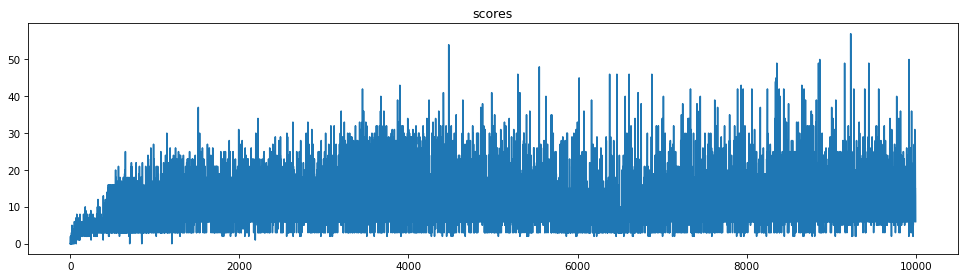

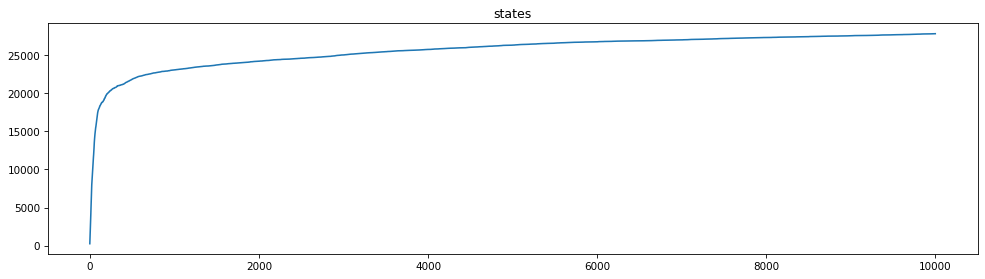

In [16]:
# 2025-11-04 Self-learning on 1-states-only, positive+negative feedback, 10000 games, 18,000 limit, no pre-training
scores2 = [0, 0, 0, 1.0, 2.0, 1.0, 0, 2.0, 0, 1.0, 1.0, 0, 0, 0, 2.0, 2.0, 3.0, 1.0, 0, 2.0, 0, 5.0, 1.0, 1.0, 2.0, 1.0, 2.0, 0, 0, 0, 0, 0, 0, 3.0, 1.0, 4.0, 0, 0, 2.0, 2.0, 2.0, 1.0, 3.0, 2.0, 1.0, 2.0, 2.0, 1.0, 4.0, 0, 6.0, 4.0, 3.0, 5.0, 2.0, 2.0, 3.0, 4.0, 2.0, 3.0, 4.0, 4.0, 3.0, 1.0, 5.0, 4.0, 3.0, 7.0, 2.0, 2.0, 3.0, 0, 3.0, 1.0, 2.0, 1.0, 6.0, 3.0, 8.0, 2.0, 2.0, 3.0, 3.0, 6.0, 5.0, 4.0, 5.0, 4.0, 3.0, 3.0, 2.0, 3.0, 5.0, 4.0, 1.0, 2.0, 2.0, 7.0, 3.0, 4.0, 3.0, 5.0, 2.0, 4.0, 3.0, 2.0, 2.0, 2.0, 1.0, 5.0, 2.0, 2.0, 3.0, 4.0, 1.0, 1.0, 8.0, 2.0, 3.0, 4.0, 2.0, 3.0, 3.0, 5.0, 3.0, 2.0, 4.0, 2.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 2.0, 4.0, 6.0, 2.0, 5.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 8.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 7.0, 4.0, 2.0, 4.0, 3.0, 6.0, 4.0, 7.0, 3.0, 2.0, 4.0, 10.0, 3.0, 6.0, 3.0, 3.0, 7.0, 9.0, 5.0, 3.0, 3.0, 6.0, 6.0, 5.0, 3.0, 2.0, 4.0, 7.0, 3.0, 2.0, 2.0, 5.0, 2.0, 5.0, 2.0, 6.0, 8.0, 5.0, 3.0, 3.0, 7.0, 2.0, 4.0, 4.0, 2.0, 4.0, 3.0, 3.0, 5.0, 3.0, 3.0, 6.0, 3.0, 3.0, 3.0, 2.0, 7.0, 3.0, 5.0, 2.0, 3.0, 3.0, 2.0, 8.0, 3.0, 5.0, 5.0, 4.0, 7.0, 5.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 9.0, 3.0, 3.0, 1.0, 6.0, 3.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 3.0, 5.0, 3.0, 4.0, 7.0, 5.0, 4.0, 3.0, 7.0, 5.0, 7.0, 7.0, 6.0, 8.0, 3.0, 6.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.0, 4.0, 5.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 6.0, 7.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 6.0, 3.0, 6.0, 3.0, 6.0, 8.0, 7.0, 4.0, 3.0, 6.0, 2.0, 8.0, 4.0, 10.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 12.0, 9.0, 6.0, 4.0, 4.0, 4.0, 3.0, 3.0, 3.0, 9.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 10.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.0, 5.0, 7.0, 3.0, 3.0, 3.0, 6.0, 3.0, 8.0, 5.0, 6.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 7.0, 3.0, 3.0, 5.0, 3.0, 4.0, 1.0, 7.0, 13.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 7.0, 8.0, 4.0, 3.0, 6.0, 10.0, 3.0, 3.0, 8.0, 5.0, 9.0, 11.0, 7.0, 5.0, 10.0, 12.0, 6.0, 5.0, 10.0, 3.0, 11.0, 3.0, 10.0, 7.0, 3.0, 10.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 9.0, 7.0, 14.0, 3.0, 3.0, 7.0, 3.0, 4.0, 3.0, 3.0, 3.0, 7.0, 10.0, 4.0, 15.0, 3.0, 11.0, 16.0, 10.0, 11.0, 12.0, 2.0, 11.0, 3.0, 6.0, 2.0, 3.0, 11.0, 4.0, 3.0, 4.0, 3.0, 8.0, 12.0, 3.0, 3.0, 16.0, 13.0, 11.0, 10.0, 15.0, 14.0, 12.0, 10.0, 16.0, 3.0, 4.0, 3.0, 9.0, 10.0, 8.0, 6.0, 3.0, 9.0, 11.0, 14.0, 3.0, 9.0, 3.0, 3.0, 3.0, 9.0, 16.0, 7.0, 4.0, 10.0, 3.0, 11.0, 3.0, 10.0, 9.0, 16.0, 14.0, 8.0, 15.0, 9.0, 15.0, 3.0, 3.0, 3.0, 3.0, 11.0, 10.0, 4.0, 8.0, 8.0, 14.0, 16.0, 10.0, 3.0, 16.0, 3.0, 3.0, 9.0, 3.0, 11.0, 13.0, 11.0, 3.0, 3.0, 3.0, 12.0, 13.0, 20.0, 11.0, 15.0, 3.0, 4.0, 12.0, 18.0, 3.0, 15.0, 3.0, 10.0, 16.0, 3.0, 13.0, 10.0, 10.0, 6.0, 6.0, 3.0, 14.0, 11.0, 10.0, 10.0, 11.0, 12.0, 11.0, 3.0, 9.0, 11.0, 17.0, 11.0, 12.0, 3.0, 3.0, 21.0, 11.0, 3.0, 3.0, 3.0, 11.0, 3.0, 10.0, 10.0, 3.0, 3.0, 6.0, 2.0, 3.0, 12.0, 4.0, 3.0, 3.0, 10.0, 18.0, 11.0, 3.0, 4.0, 3.0, 3.0, 3.0, 10.0, 7.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 17.0, 14.0, 3.0, 3.0, 13.0, 3.0, 3.0, 3.0, 16.0, 9.0, 3.0, 3.0, 12.0, 12.0, 14.0, 3.0, 4.0, 3.0, 3.0, 16.0, 3.0, 8.0, 12.0, 18.0, 11.0, 3.0, 3.0, 13.0, 3.0, 4.0, 3.0, 18.0, 17.0, 3.0, 3.0, 11.0, 5.0, 12.0, 19.0, 16.0, 3.0, 12.0, 3.0, 20.0, 3.0, 15.0, 10.0, 25.0, 3.0, 17.0, 5.0, 3.0, 3.0, 11.0, 13.0, 3.0, 3.0, 15.0, 15.0, 3.0, 11.0, 4.0, 3.0, 3.0, 3.0, 4.0, 16.0, 3.0, 10.0, 12.0, 18.0, 3.0, 3.0, 3.0, 3.0, 16.0, 4.0, 11.0, 12.0, 13.0, 5.0, 3.0, 15.0, 8.0, 7.0, 3.0, 10.0, 3.0, 18.0, 12.0, 2.0, 13.0, 11.0, 15.0, 3.0, 4.0, 3.0, 9.0, 0, 3.0, 17.0, 16.0, 3.0, 16.0, 3.0, 18.0, 11.0, 15.0, 3.0, 13.0, 3.0, 3.0, 11.0, 3.0, 4.0, 18.0, 3.0, 14.0, 22.0, 12.0, 21.0, 20.0, 3.0, 5.0, 16.0, 13.0, 10.0, 3.0, 5.0, 3.0, 13.0, 11.0, 11.0, 15.0, 4.0, 3.0, 11.0, 18.0, 17.0, 3.0, 17.0, 10.0, 3.0, 6.0, 12.0, 4.0, 9.0, 14.0, 3.0, 3.0, 3.0, 3.0, 14.0, 3.0, 3.0, 4.0, 11.0, 18.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 15.0, 12.0, 3.0, 4.0, 3.0, 3.0, 4.0, 13.0, 22.0, 5.0, 3.0, 15.0, 11.0, 14.0, 11.0, 16.0, 13.0, 11.0, 17.0, 3.0, 3.0, 3.0, 4.0, 11.0, 17.0, 3.0, 3.0, 4.0, 5.0, 10.0, 12.0, 11.0, 3.0, 14.0, 6.0, 11.0, 15.0, 3.0, 14.0, 19.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 21.0, 13.0, 16.0, 4.0, 4.0, 3.0, 12.0, 6.0, 6.0, 14.0, 9.0, 11.0, 6.0, 14.0, 3.0, 6.0, 18.0, 3.0, 4.0, 6.0, 18.0, 12.0, 14.0, 9.0, 11.0, 2.0, 2.0, 0, 0, 15.0, 13.0, 8.0, 11.0, 4.0, 19.0, 22.0, 3.0, 3.0, 4.0, 4.0, 16.0, 3.0, 4.0, 12.0, 3.0, 6.0, 4.0, 4.0, 3.0, 3.0, 6.0, 3.0, 3.0, 3.0, 11.0, 3.0, 3.0, 3.0, 4.0, 6.0, 6.0, 10.0, 5.0, 14.0, 5.0, 15.0, 11.0, 15.0, 16.0, 3.0, 4.0, 3.0, 5.0, 6.0, 21.0, 16.0, 15.0, 20.0, 4.0, 6.0, 3.0, 5.0, 6.0, 3.0, 5.0, 3.0, 3.0, 6.0, 3.0, 6.0, 5.0, 6.0, 6.0, 4.0, 18.0, 16.0, 19.0, 6.0, 3.0, 6.0, 11.0, 24.0, 22.0, 23.0, 3.0, 4.0, 23.0, 3.0, 14.0, 3.0, 6.0, 3.0, 3.0, 3.0, 6.0, 21.0, 3.0, 5.0, 20.0, 4.0, 18.0, 9.0, 12.0, 17.0, 20.0, 18.0, 11.0, 12.0, 5.0, 11.0, 18.0, 17.0, 12.0, 5.0, 12.0, 26.0, 12.0, 3.0, 3.0, 6.0, 16.0, 15.0, 3.0, 6.0, 17.0, 14.0, 16.0, 17.0, 5.0, 6.0, 5.0, 3.0, 3.0, 3.0, 3.0, 6.0, 15.0, 6.0, 6.0, 11.0, 15.0, 3.0, 3.0, 3.0, 6.0, 12.0, 11.0, 27.0, 16.0, 3.0, 6.0, 17.0, 10.0, 6.0, 23.0, 10.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.0, 15.0, 6.0, 13.0, 6.0, 13.0, 3.0, 3.0, 3.0, 6.0, 9.0, 6.0, 6.0, 15.0, 13.0, 2.0, 21.0, 6.0, 17.0, 11.0, 18.0, 6.0, 19.0, 18.0, 12.0, 16.0, 3.0, 3.0, 3.0, 6.0, 6.0, 18.0, 21.0, 6.0, 17.0, 6.0, 11.0, 16.0, 11.0, 19.0, 16.0, 5.0, 3.0, 6.0, 6.0, 15.0, 12.0, 6.0, 11.0, 14.0, 17.0, 12.0, 16.0, 6.0, 16.0, 15.0, 12.0, 3.0, 3.0, 3.0, 3.0, 6.0, 3.0, 3.0, 6.0, 3.0, 6.0, 11.0, 20.0, 25.0, 6.0, 3.0, 6.0, 3.0, 6.0, 3.0, 4.0, 6.0, 16.0, 19.0, 3.0, 6.0, 18.0, 12.0, 6.0, 3.0, 3.0, 6.0, 6.0, 6.0, 3.0, 5.0, 17.0, 19.0, 6.0, 19.0, 17.0, 11.0, 17.0, 16.0, 13.0, 13.0, 22.0, 18.0, 3.0, 6.0, 6.0, 3.0, 6.0, 3.0, 3.0, 6.0, 3.0, 6.0, 12.0, 6.0, 3.0, 6.0, 20.0, 14.0, 16.0, 14.0, 18.0, 12.0, 6.0, 24.0, 6.0, 20.0, 3.0, 5.0, 6.0, 6.0, 22.0, 6.0, 17.0, 16.0, 6.0, 6.0, 6.0, 16.0, 30.0, 6.0, 3.0, 7.0, 21.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 17.0, 16.0, 10.0, 20.0, 3.0, 6.0, 14.0, 18.0, 20.0, 22.0, 3.0, 6.0, 18.0, 17.0, 6.0, 18.0, 9.0, 16.0, 3.0, 6.0, 3.0, 3.0, 3.0, 6.0, 6.0, 23.0, 6.0, 17.0, 26.0, 16.0, 16.0, 6.0, 11.0, 3.0, 6.0, 19.0, 6.0, 12.0, 6.0, 15.0, 18.0, 12.0, 16.0, 4.0, 18.0, 18.0, 16.0, 17.0, 0, 3.0, 3.0, 6.0, 23.0, 12.0, 6.0, 5.0, 3.0, 16.0, 4.0, 9.0, 16.0, 16.0, 17.0, 5.0, 6.0, 6.0, 13.0, 21.0, 24.0, 19.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.0, 16.0, 11.0, 18.0, 17.0, 6.0, 16.0, 3.0, 3.0, 6.0, 19.0, 6.0, 16.0, 3.0, 6.0, 11.0, 15.0, 26.0, 3.0, 3.0, 3.0, 6.0, 11.0, 18.0, 11.0, 3.0, 3.0, 3.0, 6.0, 6.0, 16.0, 5.0, 6.0, 23.0, 15.0, 17.0, 11.0, 12.0, 3.0, 3.0, 5.0, 3.0, 6.0, 17.0, 18.0, 6.0, 8.0, 3.0, 4.0, 3.0, 6.0, 11.0, 25.0, 6.0, 16.0, 6.0, 9.0, 5.0, 5.0, 3.0, 3.0, 6.0, 5.0, 14.0, 6.0, 24.0, 16.0, 18.0, 3.0, 3.0, 2.0, 18.0, 20.0, 3.0, 6.0, 24.0, 17.0, 20.0, 6.0, 6.0, 6.0, 6.0, 17.0, 6.0, 11.0, 11.0, 10.0, 11.0, 6.0, 6.0, 17.0, 17.0, 16.0, 12.0, 19.0, 3.0, 23.0, 6.0, 6.0, 16.0, 6.0, 3.0, 3.0, 6.0, 16.0, 16.0, 15.0, 15.0, 6.0, 18.0, 24.0, 6.0, 16.0, 18.0, 15.0, 3.0, 6.0, 3.0, 6.0, 11.0, 3.0, 6.0, 6.0, 18.0, 6.0, 6.0, 13.0, 7.0, 12.0, 6.0, 6.0, 16.0, 19.0, 6.0, 18.0, 6.0, 21.0, 16.0, 6.0, 18.0, 18.0, 6.0, 18.0, 18.0, 12.0, 3.0, 3.0, 6.0, 11.0, 22.0, 21.0, 18.0, 18.0, 6.0, 20.0, 3.0, 6.0, 23.0, 11.0, 6.0, 18.0, 6.0, 6.0, 18.0, 17.0, 6.0, 23.0, 3.0, 3.0, 3.0, 3.0, 6.0, 6.0, 17.0, 6.0, 15.0, 6.0, 19.0, 18.0, 17.0, 23.0, 9.0, 20.0, 25.0, 18.0, 18.0, 3.0, 5.0, 6.0, 6.0, 14.0, 11.0, 5.0, 18.0, 3.0, 11.0, 10.0, 6.0, 5.0, 13.0, 15.0, 16.0, 17.0, 18.0, 3.0, 6.0, 3.0, 6.0, 21.0, 3.0, 5.0, 6.0, 18.0, 17.0, 23.0, 22.0, 13.0, 3.0, 3.0, 6.0, 23.0, 6.0, 17.0, 17.0, 6.0, 22.0, 11.0, 19.0, 16.0, 3.0, 6.0, 5.0, 6.0, 6.0, 20.0, 11.0, 6.0, 6.0, 17.0, 18.0, 21.0, 15.0, 18.0, 12.0, 18.0, 18.0, 19.0, 6.0, 6.0, 6.0, 24.0, 17.0, 6.0, 13.0, 6.0, 21.0, 6.0, 7.0, 8.0, 13.0, 6.0, 13.0, 21.0, 6.0, 3.0, 6.0, 20.0, 11.0, 18.0, 3.0, 6.0, 15.0, 6.0, 18.0, 17.0, 15.0, 6.0, 5.0, 18.0, 4.0, 13.0, 17.0, 6.0, 12.0, 17.0, 24.0, 37.0, 21.0, 18.0, 18.0, 6.0, 18.0, 17.0, 6.0, 5.0, 16.0, 23.0, 3.0, 6.0, 5.0, 6.0, 11.0, 30.0, 6.0, 16.0, 3.0, 6.0, 18.0, 6.0, 24.0, 6.0, 12.0, 17.0, 13.0, 12.0, 18.0, 6.0, 25.0, 6.0, 11.0, 6.0, 6.0, 12.0, 6.0, 17.0, 20.0, 15.0, 19.0, 11.0, 11.0, 24.0, 22.0, 17.0, 6.0, 22.0, 26.0, 15.0, 20.0, 6.0, 6.0, 6.0, 6.0, 10.0, 3.0, 6.0, 17.0, 6.0, 17.0, 6.0, 12.0, 18.0, 23.0, 9.0, 17.0, 21.0, 3.0, 3.0, 3.0, 6.0, 16.0, 16.0, 6.0, 12.0, 3.0, 6.0, 18.0, 6.0, 21.0, 16.0, 3.0, 6.0, 16.0, 6.0, 17.0, 17.0, 6.0, 17.0, 6.0, 16.0, 6.0, 11.0, 6.0, 3.0, 6.0, 10.0, 16.0, 6.0, 17.0, 18.0, 6.0, 10.0, 11.0, 6.0, 21.0, 27.0, 21.0, 17.0, 6.0, 17.0, 20.0, 14.0, 12.0, 11.0, 18.0, 6.0, 16.0, 6.0, 18.0, 23.0, 6.0, 23.0, 6.0, 11.0, 18.0, 19.0, 12.0, 26.0, 6.0, 6.0, 24.0, 6.0, 6.0, 6.0, 22.0, 10.0, 18.0, 6.0, 6.0, 9.0, 18.0, 17.0, 6.0, 14.0, 17.0, 6.0, 24.0, 3.0, 6.0, 18.0, 15.0, 6.0, 6.0, 13.0, 18.0, 6.0, 6.0, 17.0, 6.0, 17.0, 6.0, 3.0, 6.0, 15.0, 20.0, 6.0, 6.0, 12.0, 26.0, 11.0, 6.0, 6.0, 15.0, 17.0, 3.0, 6.0, 15.0, 6.0, 6.0, 20.0, 6.0, 18.0, 21.0, 6.0, 6.0, 18.0, 3.0, 6.0, 3.0, 6.0, 21.0, 3.0, 5.0, 6.0, 18.0, 6.0, 18.0, 13.0, 6.0, 19.0, 3.0, 6.0, 10.0, 13.0, 21.0, 6.0, 16.0, 13.0, 21.0, 6.0, 6.0, 21.0, 18.0, 6.0, 6.0, 16.0, 3.0, 6.0, 6.0, 3.0, 6.0, 6.0, 15.0, 13.0, 6.0, 21.0, 20.0, 15.0, 6.0, 6.0, 18.0, 3.0, 3.0, 3.0, 6.0, 6.0, 18.0, 18.0, 15.0, 17.0, 12.0, 6.0, 12.0, 16.0, 16.0, 19.0, 5.0, 8.0, 13.0, 18.0, 3.0, 5.0, 14.0, 8.0, 6.0, 6.0, 11.0, 19.0, 5.0, 18.0, 14.0, 17.0, 16.0, 25.0, 3.0, 6.0, 18.0, 3.0, 3.0, 3.0, 5.0, 8.0, 3.0, 6.0, 16.0, 23.0, 15.0, 9.0, 6.0, 23.0, 22.0, 2.0, 6.0, 18.0, 6.0, 6.0, 17.0, 17.0, 15.0, 18.0, 6.0, 6.0, 17.0, 6.0, 17.0, 14.0, 15.0, 2.0, 3.0, 6.0, 3.0, 6.0, 25.0, 13.0, 12.0, 6.0, 6.0, 24.0, 6.0, 15.0, 18.0, 9.0, 7.0, 15.0, 24.0, 6.0, 5.0, 17.0, 25.0, 3.0, 18.0, 6.0, 3.0, 6.0, 15.0, 6.0, 15.0, 15.0, 13.0, 22.0, 6.0, 17.0, 11.0, 18.0, 3.0, 18.0, 6.0, 17.0, 3.0, 6.0, 18.0, 18.0, 13.0, 18.0, 14.0, 23.0, 15.0, 15.0, 15.0, 16.0, 17.0, 15.0, 6.0, 17.0, 3.0, 6.0, 14.0, 21.0, 21.0, 21.0, 11.0, 18.0, 6.0, 28.0, 17.0, 11.0, 17.0, 20.0, 6.0, 6.0, 18.0, 14.0, 16.0, 6.0, 25.0, 21.0, 15.0, 12.0, 2.0, 13.0, 6.0, 17.0, 7.0, 15.0, 18.0, 5.0, 6.0, 15.0, 15.0, 6.0, 16.0, 18.0, 3.0, 6.0, 14.0, 6.0, 15.0, 3.0, 6.0, 13.0, 6.0, 6.0, 11.0, 6.0, 6.0, 18.0, 14.0, 18.0, 25.0, 11.0, 6.0, 12.0, 6.0, 23.0, 3.0, 6.0, 15.0, 18.0, 6.0, 13.0, 14.0, 17.0, 6.0, 15.0, 6.0, 16.0, 6.0, 18.0, 16.0, 17.0, 22.0, 12.0, 6.0, 15.0, 11.0, 18.0, 23.0, 12.0, 20.0, 2.0, 6.0, 18.0, 15.0, 17.0, 15.0, 13.0, 5.0, 6.0, 6.0, 15.0, 10.0, 3.0, 6.0, 6.0, 18.0, 6.0, 6.0, 6.0, 20.0, 16.0, 6.0, 6.0, 19.0, 21.0, 6.0, 10.0, 15.0, 17.0, 13.0, 17.0, 18.0, 8.0, 4.0, 6.0, 18.0, 31.0, 6.0, 6.0, 16.0, 29.0, 3.0, 6.0, 18.0, 12.0, 3.0, 6.0, 6.0, 21.0, 23.0, 25.0, 15.0, 27.0, 24.0, 6.0, 6.0, 25.0, 6.0, 5.0, 6.0, 6.0, 6.0, 24.0, 3.0, 6.0, 6.0, 3.0, 6.0, 6.0, 6.0, 15.0, 6.0, 11.0, 6.0, 12.0, 15.0, 26.0, 28.0, 15.0, 6.0, 11.0, 6.0, 23.0, 15.0, 16.0, 6.0, 6.0, 4.0, 15.0, 18.0, 16.0, 6.0, 14.0, 15.0, 21.0, 6.0, 23.0, 6.0, 11.0, 6.0, 6.0, 12.0, 12.0, 21.0, 4.0, 6.0, 11.0, 14.0, 15.0, 2.0, 6.0, 18.0, 12.0, 26.0, 18.0, 6.0, 21.0, 6.0, 19.0, 15.0, 15.0, 15.0, 23.0, 6.0, 24.0, 6.0, 6.0, 19.0, 6.0, 18.0, 16.0, 3.0, 6.0, 12.0, 12.0, 6.0, 6.0, 6.0, 3.0, 6.0, 18.0, 6.0, 23.0, 6.0, 10.0, 15.0, 12.0, 6.0, 23.0, 6.0, 6.0, 17.0, 6.0, 6.0, 15.0, 2.0, 6.0, 17.0, 6.0, 4.0, 16.0, 14.0, 6.0, 6.0, 13.0, 13.0, 6.0, 19.0, 21.0, 6.0, 14.0, 6.0, 15.0, 6.0, 18.0, 15.0, 14.0, 6.0, 16.0, 6.0, 15.0, 11.0, 16.0, 15.0, 26.0, 15.0, 6.0, 23.0, 8.0, 12.0, 6.0, 18.0, 18.0, 18.0, 16.0, 6.0, 6.0, 10.0, 11.0, 18.0, 23.0, 6.0, 6.0, 18.0, 17.0, 15.0, 6.0, 6.0, 21.0, 17.0, 12.0, 8.0, 21.0, 3.0, 15.0, 23.0, 6.0, 11.0, 15.0, 6.0, 6.0, 20.0, 6.0, 6.0, 18.0, 12.0, 6.0, 11.0, 22.0, 5.0, 15.0, 7.0, 1.0, 6.0, 21.0, 6.0, 6.0, 15.0, 30.0, 17.0, 6.0, 11.0, 6.0, 6.0, 21.0, 18.0, 16.0, 6.0, 15.0, 19.0, 19.0, 16.0, 13.0, 16.0, 21.0, 15.0, 17.0, 5.0, 18.0, 24.0, 6.0, 6.0, 3.0, 6.0, 34.0, 19.0, 3.0, 6.0, 10.0, 6.0, 22.0, 6.0, 6.0, 3.0, 6.0, 15.0, 16.0, 6.0, 15.0, 16.0, 14.0, 3.0, 6.0, 5.0, 23.0, 18.0, 15.0, 17.0, 16.0, 17.0, 3.0, 6.0, 19.0, 6.0, 3.0, 3.0, 6.0, 15.0, 13.0, 19.0, 15.0, 6.0, 6.0, 15.0, 15.0, 6.0, 10.0, 9.0, 21.0, 3.0, 6.0, 15.0, 15.0, 6.0, 15.0, 23.0, 6.0, 6.0, 18.0, 18.0, 16.0, 12.0, 16.0, 15.0, 6.0, 6.0, 6.0, 15.0, 21.0, 18.0, 12.0, 6.0, 24.0, 15.0, 15.0, 6.0, 25.0, 3.0, 6.0, 6.0, 11.0, 3.0, 6.0, 6.0, 9.0, 20.0, 6.0, 17.0, 3.0, 6.0, 18.0, 21.0, 17.0, 15.0, 6.0, 11.0, 17.0, 3.0, 18.0, 6.0, 6.0, 18.0, 22.0, 6.0, 13.0, 6.0, 15.0, 6.0, 17.0, 16.0, 6.0, 21.0, 15.0, 18.0, 18.0, 19.0, 6.0, 3.0, 6.0, 15.0, 6.0, 15.0, 5.0, 6.0, 6.0, 15.0, 12.0, 19.0, 16.0, 23.0, 6.0, 11.0, 3.0, 3.0, 6.0, 17.0, 6.0, 6.0, 18.0, 12.0, 3.0, 6.0, 15.0, 26.0, 18.0, 15.0, 21.0, 3.0, 6.0, 15.0, 12.0, 6.0, 15.0, 6.0, 15.0, 23.0, 15.0, 6.0, 13.0, 12.0, 18.0, 23.0, 15.0, 6.0, 15.0, 21.0, 19.0, 25.0, 6.0, 6.0, 7.0, 18.0, 6.0, 15.0, 17.0, 3.0, 6.0, 15.0, 6.0, 27.0, 6.0, 5.0, 6.0, 20.0, 18.0, 15.0, 15.0, 21.0, 6.0, 15.0, 11.0, 16.0, 11.0, 16.0, 6.0, 7.0, 21.0, 6.0, 18.0, 15.0, 13.0, 17.0, 6.0, 15.0, 19.0, 6.0, 25.0, 6.0, 15.0, 29.0, 12.0, 19.0, 3.0, 17.0, 12.0, 6.0, 17.0, 14.0, 14.0, 5.0, 6.0, 16.0, 20.0, 6.0, 6.0, 3.0, 6.0, 24.0, 6.0, 3.0, 6.0, 18.0, 6.0, 18.0, 21.0, 17.0, 15.0, 17.0, 6.0, 13.0, 12.0, 4.0, 6.0, 6.0, 6.0, 16.0, 15.0, 17.0, 20.0, 17.0, 6.0, 22.0, 6.0, 28.0, 11.0, 15.0, 21.0, 23.0, 17.0, 17.0, 12.0, 17.0, 6.0, 16.0, 6.0, 6.0, 6.0, 21.0, 24.0, 6.0, 29.0, 6.0, 23.0, 6.0, 3.0, 3.0, 5.0, 17.0, 3.0, 3.0, 6.0, 21.0, 17.0, 6.0, 15.0, 16.0, 6.0, 6.0, 6.0, 18.0, 6.0, 3.0, 6.0, 6.0, 19.0, 15.0, 5.0, 6.0, 15.0, 3.0, 6.0, 21.0, 6.0, 13.0, 12.0, 15.0, 13.0, 15.0, 6.0, 15.0, 6.0, 14.0, 22.0, 23.0, 6.0, 21.0, 15.0, 18.0, 18.0, 6.0, 18.0, 22.0, 6.0, 17.0, 6.0, 15.0, 15.0, 21.0, 6.0, 19.0, 15.0, 6.0, 14.0, 6.0, 15.0, 20.0, 18.0, 6.0, 15.0, 15.0, 15.0, 6.0, 22.0, 2.0, 6.0, 5.0, 30.0, 17.0, 17.0, 18.0, 20.0, 6.0, 11.0, 6.0, 29.0, 5.0, 15.0, 15.0, 6.0, 3.0, 6.0, 5.0, 15.0, 24.0, 3.0, 6.0, 14.0, 3.0, 12.0, 13.0, 6.0, 15.0, 23.0, 3.0, 4.0, 6.0, 16.0, 15.0, 11.0, 13.0, 12.0, 5.0, 25.0, 6.0, 6.0, 6.0, 11.0, 6.0, 6.0, 6.0, 6.0, 15.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 14.0, 6.0, 6.0, 17.0, 11.0, 18.0, 6.0, 6.0, 22.0, 6.0, 6.0, 15.0, 6.0, 15.0, 12.0, 20.0, 3.0, 6.0, 15.0, 33.0, 6.0, 6.0, 2.0, 21.0, 6.0, 21.0, 11.0, 18.0, 6.0, 13.0, 4.0, 3.0, 7.0, 11.0, 20.0, 6.0, 18.0, 12.0, 6.0, 12.0, 15.0, 17.0, 18.0, 6.0, 13.0, 6.0, 18.0, 6.0, 6.0, 6.0, 6.0, 17.0, 18.0, 13.0, 17.0, 6.0, 6.0, 6.0, 19.0, 15.0, 16.0, 15.0, 3.0, 6.0, 25.0, 22.0, 6.0, 9.0, 6.0, 16.0, 6.0, 6.0, 11.0, 7.0, 6.0, 18.0, 6.0, 6.0, 6.0, 23.0, 23.0, 22.0, 20.0, 13.0, 6.0, 19.0, 6.0, 6.0, 23.0, 3.0, 6.0, 14.0, 6.0, 23.0, 6.0, 6.0, 25.0, 21.0, 18.0, 15.0, 6.0, 6.0, 6.0, 2.0, 2.0, 6.0, 2.0, 22.0, 6.0, 15.0, 13.0, 28.0, 6.0, 2.0, 6.0, 20.0, 6.0, 6.0, 6.0, 15.0, 6.0, 14.0, 16.0, 3.0, 3.0, 16.0, 6.0, 18.0, 10.0, 6.0, 13.0, 18.0, 6.0, 6.0, 6.0, 6.0, 16.0, 17.0, 17.0, 6.0, 6.0, 6.0, 5.0, 22.0, 6.0, 8.0, 6.0, 6.0, 6.0, 5.0, 17.0, 15.0, 17.0, 6.0, 18.0, 20.0, 7.0, 11.0, 17.0, 17.0, 6.0, 7.0, 16.0, 12.0, 7.0, 6.0, 10.0, 6.0, 19.0, 6.0, 6.0, 18.0, 18.0, 6.0, 20.0, 6.0, 30.0, 6.0, 6.0, 17.0, 6.0, 8.0, 16.0, 20.0, 15.0, 6.0, 6.0, 15.0, 6.0, 6.0, 11.0, 19.0, 19.0, 6.0, 15.0, 17.0, 33.0, 8.0, 3.0, 6.0, 6.0, 18.0, 15.0, 15.0, 11.0, 6.0, 12.0, 6.0, 6.0, 27.0, 19.0, 6.0, 6.0, 18.0, 22.0, 15.0, 6.0, 15.0, 21.0, 6.0, 15.0, 15.0, 6.0, 3.0, 5.0, 14.0, 15.0, 6.0, 11.0, 15.0, 24.0, 3.0, 9.0, 3.0, 6.0, 18.0, 20.0, 17.0, 18.0, 11.0, 10.0, 3.0, 6.0, 31.0, 19.0, 6.0, 19.0, 6.0, 17.0, 12.0, 6.0, 17.0, 17.0, 3.0, 6.0, 11.0, 18.0, 6.0, 27.0, 6.0, 14.0, 6.0, 21.0, 15.0, 20.0, 6.0, 6.0, 12.0, 6.0, 15.0, 23.0, 6.0, 18.0, 23.0, 3.0, 6.0, 11.0, 10.0, 17.0, 6.0, 10.0, 3.0, 16.0, 6.0, 6.0, 6.0, 9.0, 9.0, 14.0, 18.0, 6.0, 16.0, 7.0, 18.0, 6.0, 10.0, 17.0, 8.0, 3.0, 6.0, 19.0, 16.0, 6.0, 20.0, 15.0, 15.0, 12.0, 6.0, 11.0, 22.0, 6.0, 3.0, 6.0, 20.0, 5.0, 22.0, 6.0, 20.0, 11.0, 17.0, 25.0, 13.0, 17.0, 3.0, 6.0, 6.0, 14.0, 13.0, 10.0, 6.0, 14.0, 25.0, 14.0, 5.0, 5.0, 14.0, 15.0, 17.0, 6.0, 15.0, 17.0, 6.0, 3.0, 6.0, 6.0, 16.0, 3.0, 6.0, 3.0, 6.0, 2.0, 3.0, 6.0, 16.0, 28.0, 3.0, 3.0, 6.0, 12.0, 19.0, 13.0, 14.0, 14.0, 6.0, 21.0, 6.0, 6.0, 21.0, 6.0, 18.0, 16.0, 18.0, 19.0, 16.0, 10.0, 18.0, 18.0, 13.0, 3.0, 6.0, 15.0, 14.0, 23.0, 3.0, 6.0, 6.0, 18.0, 14.0, 18.0, 6.0, 20.0, 6.0, 11.0, 19.0, 25.0, 3.0, 15.0, 9.0, 12.0, 20.0, 3.0, 9.0, 3.0, 7.0, 11.0, 18.0, 30.0, 13.0, 18.0, 21.0, 6.0, 23.0, 6.0, 5.0, 6.0, 6.0, 12.0, 13.0, 6.0, 6.0, 6.0, 18.0, 13.0, 11.0, 6.0, 6.0, 18.0, 12.0, 9.0, 6.0, 11.0, 12.0, 3.0, 6.0, 6.0, 24.0, 15.0, 19.0, 16.0, 18.0, 16.0, 6.0, 6.0, 27.0, 6.0, 22.0, 6.0, 5.0, 6.0, 9.0, 17.0, 18.0, 19.0, 19.0, 17.0, 13.0, 14.0, 8.0, 2.0, 19.0, 6.0, 10.0, 13.0, 6.0, 6.0, 2.0, 19.0, 19.0, 32.0, 27.0, 20.0, 18.0, 13.0, 17.0, 17.0, 6.0, 13.0, 13.0, 15.0, 18.0, 20.0, 20.0, 11.0, 15.0, 24.0, 6.0, 2.0, 21.0, 6.0, 22.0, 6.0, 8.0, 12.0, 6.0, 12.0, 6.0, 6.0, 3.0, 4.0, 3.0, 3.0, 15.0, 15.0, 6.0, 15.0, 6.0, 11.0, 32.0, 19.0, 26.0, 6.0, 21.0, 13.0, 22.0, 3.0, 6.0, 6.0, 19.0, 26.0, 6.0, 6.0, 24.0, 11.0, 21.0, 23.0, 19.0, 18.0, 16.0, 3.0, 6.0, 27.0, 20.0, 6.0, 24.0, 17.0, 6.0, 17.0, 11.0, 14.0, 4.0, 6.0, 12.0, 6.0, 17.0, 6.0, 17.0, 6.0, 3.0, 6.0, 9.0, 12.0, 6.0, 6.0, 6.0, 6.0, 17.0, 18.0, 21.0, 16.0, 6.0, 24.0, 6.0, 20.0, 6.0, 8.0, 6.0, 6.0, 19.0, 17.0, 6.0, 27.0, 22.0, 6.0, 23.0, 19.0, 6.0, 15.0, 7.0, 13.0, 24.0, 30.0, 16.0, 6.0, 7.0, 11.0, 22.0, 11.0, 6.0, 30.0, 5.0, 36.0, 11.0, 6.0, 6.0, 6.0, 11.0, 5.0, 21.0, 26.0, 11.0, 17.0, 28.0, 20.0, 28.0, 27.0, 12.0, 28.0, 29.0, 6.0, 28.0, 6.0, 6.0, 3.0, 12.0, 27.0, 13.0, 6.0, 23.0, 3.0, 14.0, 27.0, 6.0, 24.0, 17.0, 22.0, 22.0, 6.0, 33.0, 14.0, 6.0, 19.0, 24.0, 11.0, 6.0, 6.0, 28.0, 6.0, 28.0, 14.0, 23.0, 6.0, 6.0, 15.0, 13.0, 3.0, 6.0, 23.0, 27.0, 18.0, 6.0, 11.0, 13.0, 6.0, 20.0, 20.0, 5.0, 6.0, 9.0, 6.0, 21.0, 3.0, 3.0, 13.0, 27.0, 12.0, 6.0, 20.0, 30.0, 6.0, 23.0, 15.0, 3.0, 6.0, 6.0, 17.0, 6.0, 19.0, 3.0, 6.0, 28.0, 3.0, 3.0, 3.0, 6.0, 21.0, 17.0, 6.0, 21.0, 23.0, 6.0, 30.0, 15.0, 18.0, 26.0, 6.0, 21.0, 3.0, 6.0, 13.0, 27.0, 6.0, 11.0, 12.0, 11.0, 6.0, 25.0, 3.0, 8.0, 6.0, 16.0, 24.0, 29.0, 13.0, 13.0, 29.0, 26.0, 6.0, 6.0, 14.0, 24.0, 27.0, 18.0, 22.0, 11.0, 3.0, 15.0, 3.0, 16.0, 23.0, 22.0, 27.0, 8.0, 5.0, 11.0, 25.0, 28.0, 5.0, 6.0, 21.0, 23.0, 12.0, 6.0, 26.0, 3.0, 6.0, 18.0, 6.0, 25.0, 23.0, 3.0, 3.0, 5.0, 18.0, 6.0, 14.0, 14.0, 26.0, 19.0, 25.0, 32.0, 6.0, 13.0, 22.0, 18.0, 15.0, 6.0, 6.0, 27.0, 19.0, 6.0, 10.0, 6.0, 6.0, 3.0, 6.0, 28.0, 27.0, 13.0, 16.0, 6.0, 6.0, 12.0, 6.0, 6.0, 11.0, 28.0, 3.0, 6.0, 26.0, 18.0, 11.0, 25.0, 5.0, 6.0, 15.0, 3.0, 3.0, 3.0, 6.0, 23.0, 12.0, 14.0, 6.0, 18.0, 6.0, 6.0, 18.0, 6.0, 33.0, 10.0, 10.0, 9.0, 31.0, 28.0, 19.0, 6.0, 11.0, 6.0, 3.0, 6.0, 6.0, 9.0, 6.0, 26.0, 3.0, 6.0, 21.0, 6.0, 6.0, 17.0, 6.0, 30.0, 3.0, 27.0, 3.0, 3.0, 3.0, 6.0, 11.0, 33.0, 6.0, 41.0, 42.0, 22.0, 6.0, 10.0, 6.0, 15.0, 6.0, 31.0, 6.0, 6.0, 21.0, 3.0, 6.0, 36.0, 23.0, 29.0, 6.0, 6.0, 14.0, 19.0, 28.0, 12.0, 16.0, 6.0, 12.0, 3.0, 6.0, 25.0, 6.0, 12.0, 8.0, 3.0, 12.0, 24.0, 15.0, 6.0, 6.0, 20.0, 16.0, 33.0, 26.0, 3.0, 3.0, 7.0, 21.0, 19.0, 26.0, 14.0, 23.0, 24.0, 32.0, 2.0, 6.0, 6.0, 6.0, 19.0, 25.0, 6.0, 11.0, 28.0, 26.0, 28.0, 12.0, 5.0, 6.0, 28.0, 6.0, 11.0, 8.0, 27.0, 6.0, 14.0, 25.0, 25.0, 6.0, 6.0, 13.0, 13.0, 19.0, 18.0, 6.0, 21.0, 23.0, 6.0, 6.0, 29.0, 6.0, 26.0, 3.0, 6.0, 22.0, 27.0, 6.0, 3.0, 6.0, 13.0, 6.0, 6.0, 26.0, 26.0, 15.0, 6.0, 3.0, 6.0, 6.0, 6.0, 17.0, 15.0, 15.0, 19.0, 6.0, 25.0, 30.0, 6.0, 3.0, 6.0, 24.0, 29.0, 5.0, 13.0, 23.0, 10.0, 11.0, 11.0, 12.0, 19.0, 16.0, 15.0, 28.0, 24.0, 6.0, 10.0, 6.0, 5.0, 18.0, 27.0, 6.0, 27.0, 6.0, 2.0, 26.0, 6.0, 30.0, 10.0, 3.0, 6.0, 17.0, 6.0, 28.0, 11.0, 6.0, 6.0, 28.0, 10.0, 26.0, 24.0, 16.0, 6.0, 6.0, 17.0, 6.0, 6.0, 29.0, 6.0, 32.0, 6.0, 26.0, 26.0, 16.0, 6.0, 23.0, 27.0, 32.0, 16.0, 16.0, 16.0, 12.0, 26.0, 6.0, 10.0, 8.0, 6.0, 24.0, 3.0, 6.0, 14.0, 3.0, 16.0, 6.0, 6.0, 6.0, 6.0, 15.0, 6.0, 23.0, 6.0, 23.0, 12.0, 29.0, 12.0, 26.0, 32.0, 12.0, 6.0, 6.0, 3.0, 6.0, 23.0, 6.0, 3.0, 3.0, 6.0, 16.0, 36.0, 16.0, 6.0, 6.0, 40.0, 6.0, 3.0, 6.0, 27.0, 21.0, 24.0, 27.0, 3.0, 3.0, 6.0, 16.0, 3.0, 6.0, 6.0, 6.0, 3.0, 6.0, 8.0, 10.0, 6.0, 6.0, 6.0, 10.0, 6.0, 22.0, 24.0, 13.0, 32.0, 16.0, 5.0, 22.0, 6.0, 13.0, 11.0, 11.0, 36.0, 20.0, 19.0, 14.0, 3.0, 5.0, 6.0, 6.0, 32.0, 6.0, 15.0, 31.0, 6.0, 7.0, 6.0, 20.0, 6.0, 27.0, 6.0, 12.0, 24.0, 12.0, 6.0, 27.0, 23.0, 30.0, 6.0, 28.0, 25.0, 12.0, 6.0, 32.0, 3.0, 6.0, 23.0, 24.0, 22.0, 2.0, 15.0, 6.0, 18.0, 26.0, 16.0, 6.0, 25.0, 12.0, 3.0, 6.0, 10.0, 6.0, 17.0, 16.0, 6.0, 27.0, 6.0, 29.0, 6.0, 6.0, 28.0, 14.0, 6.0, 23.0, 24.0, 16.0, 6.0, 6.0, 26.0, 11.0, 14.0, 14.0, 15.0, 6.0, 24.0, 19.0, 6.0, 19.0, 22.0, 6.0, 29.0, 16.0, 29.0, 29.0, 20.0, 16.0, 3.0, 15.0, 17.0, 25.0, 30.0, 6.0, 17.0, 15.0, 16.0, 6.0, 6.0, 26.0, 18.0, 6.0, 6.0, 31.0, 23.0, 29.0, 6.0, 3.0, 3.0, 6.0, 14.0, 16.0, 6.0, 20.0, 16.0, 6.0, 16.0, 20.0, 20.0, 6.0, 20.0, 17.0, 27.0, 26.0, 6.0, 6.0, 28.0, 7.0, 31.0, 14.0, 3.0, 6.0, 13.0, 28.0, 3.0, 10.0, 28.0, 14.0, 13.0, 3.0, 6.0, 21.0, 6.0, 22.0, 20.0, 6.0, 26.0, 6.0, 27.0, 6.0, 16.0, 28.0, 6.0, 24.0, 6.0, 21.0, 3.0, 6.0, 22.0, 5.0, 14.0, 22.0, 3.0, 6.0, 14.0, 6.0, 39.0, 14.0, 23.0, 14.0, 32.0, 6.0, 28.0, 24.0, 12.0, 18.0, 6.0, 26.0, 28.0, 6.0, 33.0, 27.0, 6.0, 3.0, 3.0, 6.0, 28.0, 6.0, 19.0, 21.0, 6.0, 16.0, 16.0, 43.0, 32.0, 8.0, 6.0, 40.0, 24.0, 17.0, 3.0, 6.0, 6.0, 19.0, 27.0, 27.0, 2.0, 6.0, 26.0, 13.0, 9.0, 6.0, 6.0, 6.0, 6.0, 14.0, 15.0, 32.0, 3.0, 3.0, 6.0, 6.0, 6.0, 11.0, 28.0, 6.0, 26.0, 20.0, 3.0, 29.0, 32.0, 28.0, 6.0, 6.0, 8.0, 6.0, 24.0, 13.0, 6.0, 3.0, 6.0, 20.0, 14.0, 14.0, 30.0, 6.0, 6.0, 26.0, 29.0, 6.0, 29.0, 7.0, 5.0, 18.0, 5.0, 6.0, 6.0, 18.0, 3.0, 28.0, 6.0, 29.0, 6.0, 3.0, 6.0, 26.0, 22.0, 17.0, 6.0, 6.0, 3.0, 6.0, 10.0, 6.0, 24.0, 5.0, 18.0, 6.0, 6.0, 16.0, 6.0, 13.0, 14.0, 28.0, 30.0, 6.0, 34.0, 31.0, 6.0, 22.0, 6.0, 32.0, 6.0, 5.0, 6.0, 3.0, 5.0, 31.0, 20.0, 12.0, 6.0, 3.0, 3.0, 16.0, 19.0, 18.0, 6.0, 30.0, 3.0, 5.0, 6.0, 6.0, 6.0, 22.0, 6.0, 24.0, 5.0, 6.0, 27.0, 10.0, 22.0, 15.0, 29.0, 27.0, 3.0, 10.0, 11.0, 6.0, 15.0, 11.0, 8.0, 6.0, 29.0, 16.0, 24.0, 6.0, 27.0, 24.0, 17.0, 6.0, 16.0, 6.0, 13.0, 6.0, 22.0, 10.0, 6.0, 31.0, 8.0, 6.0, 22.0, 27.0, 3.0, 6.0, 24.0, 15.0, 16.0, 22.0, 9.0, 6.0, 24.0, 29.0, 11.0, 15.0, 10.0, 6.0, 3.0, 6.0, 26.0, 18.0, 22.0, 5.0, 8.0, 3.0, 6.0, 30.0, 3.0, 6.0, 6.0, 6.0, 6.0, 26.0, 19.0, 6.0, 32.0, 3.0, 3.0, 6.0, 3.0, 6.0, 23.0, 14.0, 14.0, 12.0, 6.0, 5.0, 3.0, 6.0, 20.0, 11.0, 17.0, 21.0, 17.0, 18.0, 6.0, 6.0, 6.0, 10.0, 3.0, 6.0, 26.0, 6.0, 19.0, 29.0, 27.0, 30.0, 5.0, 6.0, 17.0, 11.0, 14.0, 30.0, 6.0, 3.0, 6.0, 14.0, 18.0, 22.0, 6.0, 29.0, 9.0, 6.0, 15.0, 6.0, 15.0, 17.0, 6.0, 14.0, 28.0, 6.0, 6.0, 22.0, 3.0, 11.0, 8.0, 15.0, 12.0, 13.0, 3.0, 21.0, 6.0, 20.0, 14.0, 11.0, 8.0, 5.0, 3.0, 6.0, 26.0, 12.0, 6.0, 24.0, 6.0, 6.0, 11.0, 21.0, 6.0, 32.0, 32.0, 27.0, 11.0, 30.0, 3.0, 6.0, 6.0, 28.0, 6.0, 19.0, 6.0, 11.0, 11.0, 21.0, 15.0, 3.0, 6.0, 6.0, 29.0, 22.0, 14.0, 6.0, 12.0, 6.0, 15.0, 6.0, 27.0, 6.0, 16.0, 3.0, 26.0, 22.0, 6.0, 28.0, 23.0, 21.0, 6.0, 25.0, 3.0, 5.0, 16.0, 6.0, 28.0, 14.0, 16.0, 34.0, 25.0, 23.0, 27.0, 10.0, 6.0, 23.0, 17.0, 6.0, 23.0, 12.0, 18.0, 11.0, 20.0, 5.0, 6.0, 6.0, 32.0, 6.0, 6.0, 26.0, 3.0, 11.0, 6.0, 22.0, 39.0, 6.0, 30.0, 3.0, 6.0, 11.0, 6.0, 3.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 4.0, 14.0, 13.0, 3.0, 6.0, 19.0, 6.0, 3.0, 10.0, 6.0, 16.0, 15.0, 6.0, 19.0, 2.0, 6.0, 24.0, 6.0, 12.0, 11.0, 30.0, 16.0, 3.0, 5.0, 6.0, 6.0, 30.0, 6.0, 22.0, 6.0, 14.0, 8.0, 6.0, 33.0, 12.0, 6.0, 5.0, 11.0, 6.0, 20.0, 10.0, 6.0, 24.0, 20.0, 6.0, 14.0, 19.0, 13.0, 9.0, 25.0, 29.0, 2.0, 11.0, 6.0, 15.0, 6.0, 16.0, 6.0, 11.0, 6.0, 20.0, 11.0, 13.0, 4.0, 34.0, 24.0, 6.0, 15.0, 6.0, 6.0, 26.0, 13.0, 14.0, 6.0, 20.0, 6.0, 28.0, 20.0, 12.0, 28.0, 6.0, 6.0, 12.0, 6.0, 6.0, 11.0, 7.0, 6.0, 21.0, 3.0, 6.0, 19.0, 29.0, 8.0, 26.0, 6.0, 15.0, 24.0, 6.0, 6.0, 22.0, 36.0, 30.0, 6.0, 6.0, 6.0, 6.0, 20.0, 6.0, 19.0, 6.0, 11.0, 28.0, 22.0, 17.0, 16.0, 24.0, 3.0, 3.0, 6.0, 26.0, 9.0, 6.0, 32.0, 6.0, 15.0, 3.0, 3.0, 6.0, 28.0, 27.0, 6.0, 29.0, 6.0, 19.0, 6.0, 6.0, 6.0, 6.0, 13.0, 6.0, 11.0, 25.0, 23.0, 2.0, 5.0, 3.0, 6.0, 14.0, 11.0, 15.0, 6.0, 32.0, 13.0, 8.0, 6.0, 41.0, 28.0, 25.0, 6.0, 6.0, 15.0, 6.0, 15.0, 6.0, 3.0, 6.0, 11.0, 15.0, 15.0, 27.0, 6.0, 6.0, 12.0, 6.0, 6.0, 6.0, 22.0, 16.0, 6.0, 18.0, 14.0, 6.0, 25.0, 6.0, 22.0, 11.0, 6.0, 32.0, 19.0, 20.0, 15.0, 15.0, 9.0, 2.0, 6.0, 22.0, 16.0, 15.0, 6.0, 22.0, 21.0, 4.0, 3.0, 11.0, 25.0, 6.0, 10.0, 9.0, 24.0, 19.0, 25.0, 30.0, 6.0, 13.0, 28.0, 20.0, 13.0, 17.0, 54.0, 6.0, 17.0, 6.0, 31.0, 6.0, 3.0, 6.0, 24.0, 19.0, 17.0, 16.0, 6.0, 19.0, 6.0, 16.0, 12.0, 3.0, 5.0, 6.0, 19.0, 22.0, 22.0, 3.0, 6.0, 26.0, 12.0, 14.0, 23.0, 2.0, 32.0, 6.0, 17.0, 11.0, 12.0, 5.0, 6.0, 26.0, 3.0, 3.0, 6.0, 12.0, 6.0, 3.0, 3.0, 12.0, 6.0, 2.0, 6.0, 5.0, 28.0, 6.0, 21.0, 6.0, 27.0, 6.0, 15.0, 13.0, 12.0, 12.0, 6.0, 15.0, 6.0, 14.0, 18.0, 3.0, 6.0, 30.0, 6.0, 20.0, 3.0, 15.0, 14.0, 6.0, 29.0, 6.0, 3.0, 3.0, 6.0, 14.0, 13.0, 19.0, 6.0, 6.0, 6.0, 13.0, 7.0, 12.0, 35.0, 3.0, 3.0, 6.0, 19.0, 11.0, 15.0, 11.0, 10.0, 23.0, 7.0, 14.0, 5.0, 6.0, 6.0, 5.0, 12.0, 21.0, 15.0, 15.0, 6.0, 15.0, 22.0, 5.0, 13.0, 6.0, 16.0, 5.0, 6.0, 24.0, 12.0, 19.0, 12.0, 23.0, 15.0, 23.0, 21.0, 3.0, 22.0, 24.0, 6.0, 16.0, 6.0, 20.0, 6.0, 6.0, 15.0, 15.0, 21.0, 23.0, 23.0, 6.0, 8.0, 6.0, 16.0, 14.0, 6.0, 6.0, 6.0, 17.0, 6.0, 14.0, 6.0, 14.0, 15.0, 17.0, 3.0, 5.0, 29.0, 23.0, 16.0, 6.0, 30.0, 16.0, 6.0, 6.0, 11.0, 17.0, 6.0, 39.0, 6.0, 18.0, 3.0, 6.0, 16.0, 6.0, 18.0, 10.0, 6.0, 3.0, 6.0, 6.0, 16.0, 6.0, 6.0, 22.0, 6.0, 25.0, 6.0, 16.0, 6.0, 16.0, 13.0, 6.0, 15.0, 27.0, 6.0, 2.0, 3.0, 6.0, 16.0, 6.0, 6.0, 16.0, 18.0, 12.0, 26.0, 6.0, 22.0, 21.0, 21.0, 6.0, 21.0, 13.0, 18.0, 6.0, 19.0, 12.0, 6.0, 21.0, 28.0, 6.0, 16.0, 14.0, 15.0, 13.0, 6.0, 14.0, 12.0, 13.0, 10.0, 25.0, 17.0, 22.0, 5.0, 29.0, 30.0, 27.0, 8.0, 6.0, 21.0, 16.0, 6.0, 6.0, 6.0, 3.0, 5.0, 9.0, 10.0, 20.0, 14.0, 15.0, 13.0, 6.0, 6.0, 18.0, 13.0, 14.0, 28.0, 17.0, 14.0, 3.0, 21.0, 15.0, 6.0, 3.0, 12.0, 23.0, 15.0, 6.0, 16.0, 8.0, 6.0, 22.0, 6.0, 15.0, 6.0, 22.0, 6.0, 11.0, 6.0, 18.0, 6.0, 12.0, 6.0, 32.0, 6.0, 19.0, 19.0, 30.0, 12.0, 16.0, 13.0, 20.0, 14.0, 15.0, 27.0, 3.0, 6.0, 13.0, 8.0, 3.0, 3.0, 6.0, 18.0, 15.0, 3.0, 6.0, 5.0, 14.0, 8.0, 16.0, 12.0, 6.0, 25.0, 18.0, 20.0, 19.0, 6.0, 22.0, 6.0, 12.0, 16.0, 21.0, 25.0, 12.0, 15.0, 6.0, 15.0, 3.0, 5.0, 16.0, 6.0, 30.0, 18.0, 3.0, 13.0, 6.0, 14.0, 16.0, 6.0, 13.0, 6.0, 30.0, 3.0, 6.0, 22.0, 6.0, 12.0, 23.0, 27.0, 6.0, 30.0, 6.0, 6.0, 21.0, 19.0, 23.0, 24.0, 15.0, 11.0, 6.0, 15.0, 15.0, 22.0, 6.0, 14.0, 6.0, 17.0, 18.0, 16.0, 15.0, 15.0, 21.0, 6.0, 18.0, 8.0, 10.0, 6.0, 6.0, 6.0, 37.0, 16.0, 14.0, 10.0, 6.0, 17.0, 7.0, 18.0, 15.0, 6.0, 13.0, 15.0, 13.0, 15.0, 16.0, 23.0, 12.0, 19.0, 5.0, 6.0, 16.0, 38.0, 21.0, 31.0, 23.0, 12.0, 6.0, 18.0, 6.0, 17.0, 6.0, 13.0, 6.0, 15.0, 6.0, 32.0, 6.0, 13.0, 19.0, 17.0, 15.0, 12.0, 28.0, 26.0, 3.0, 6.0, 3.0, 6.0, 16.0, 15.0, 31.0, 19.0, 6.0, 15.0, 19.0, 3.0, 6.0, 6.0, 13.0, 6.0, 6.0, 24.0, 3.0, 5.0, 15.0, 11.0, 18.0, 6.0, 6.0, 13.0, 13.0, 11.0, 16.0, 3.0, 6.0, 11.0, 15.0, 16.0, 3.0, 13.0, 18.0, 6.0, 15.0, 6.0, 14.0, 11.0, 6.0, 14.0, 9.0, 3.0, 6.0, 6.0, 12.0, 24.0, 6.0, 6.0, 16.0, 12.0, 15.0, 6.0, 15.0, 6.0, 5.0, 30.0, 17.0, 3.0, 6.0, 18.0, 6.0, 6.0, 16.0, 6.0, 14.0, 12.0, 5.0, 6.0, 12.0, 15.0, 14.0, 10.0, 19.0, 13.0, 13.0, 7.0, 10.0, 29.0, 6.0, 3.0, 6.0, 41.0, 30.0, 3.0, 24.0, 6.0, 15.0, 6.0, 19.0, 13.0, 6.0, 25.0, 14.0, 14.0, 18.0, 6.0, 16.0, 6.0, 26.0, 15.0, 6.0, 12.0, 14.0, 11.0, 32.0, 3.0, 6.0, 29.0, 19.0, 6.0, 30.0, 6.0, 21.0, 3.0, 22.0, 24.0, 35.0, 3.0, 6.0, 13.0, 6.0, 22.0, 18.0, 18.0, 3.0, 12.0, 15.0, 30.0, 6.0, 30.0, 8.0, 6.0, 16.0, 23.0, 12.0, 18.0, 6.0, 3.0, 12.0, 12.0, 18.0, 12.0, 6.0, 14.0, 18.0, 22.0, 3.0, 19.0, 22.0, 10.0, 26.0, 6.0, 13.0, 14.0, 24.0, 13.0, 6.0, 3.0, 21.0, 6.0, 2.0, 13.0, 12.0, 11.0, 6.0, 18.0, 6.0, 16.0, 13.0, 6.0, 6.0, 12.0, 21.0, 21.0, 6.0, 3.0, 9.0, 18.0, 10.0, 15.0, 6.0, 12.0, 17.0, 26.0, 6.0, 3.0, 3.0, 6.0, 31.0, 17.0, 15.0, 5.0, 6.0, 6.0, 16.0, 3.0, 11.0, 6.0, 23.0, 6.0, 15.0, 6.0, 25.0, 28.0, 5.0, 12.0, 12.0, 14.0, 15.0, 6.0, 14.0, 15.0, 6.0, 18.0, 14.0, 13.0, 6.0, 14.0, 15.0, 18.0, 24.0, 6.0, 6.0, 14.0, 12.0, 16.0, 6.0, 12.0, 25.0, 17.0, 21.0, 6.0, 33.0, 6.0, 6.0, 17.0, 5.0, 6.0, 19.0, 12.0, 13.0, 17.0, 22.0, 6.0, 18.0, 15.0, 15.0, 6.0, 32.0, 6.0, 18.0, 3.0, 10.0, 14.0, 5.0, 6.0, 12.0, 6.0, 22.0, 10.0, 18.0, 17.0, 6.0, 14.0, 11.0, 21.0, 20.0, 16.0, 7.0, 11.0, 16.0, 23.0, 26.0, 3.0, 6.0, 20.0, 18.0, 6.0, 13.0, 6.0, 21.0, 3.0, 20.0, 19.0, 12.0, 6.0, 6.0, 12.0, 34.0, 3.0, 6.0, 18.0, 3.0, 6.0, 16.0, 5.0, 15.0, 18.0, 5.0, 20.0, 11.0, 6.0, 3.0, 6.0, 22.0, 6.0, 19.0, 6.0, 6.0, 18.0, 6.0, 22.0, 6.0, 14.0, 17.0, 6.0, 29.0, 13.0, 6.0, 6.0, 13.0, 6.0, 23.0, 6.0, 19.0, 18.0, 6.0, 16.0, 5.0, 15.0, 18.0, 3.0, 16.0, 20.0, 16.0, 3.0, 6.0, 15.0, 13.0, 6.0, 20.0, 10.0, 31.0, 14.0, 6.0, 6.0, 14.0, 19.0, 6.0, 15.0, 12.0, 28.0, 15.0, 25.0, 13.0, 20.0, 16.0, 13.0, 6.0, 3.0, 6.0, 18.0, 19.0, 16.0, 6.0, 23.0, 5.0, 15.0, 6.0, 6.0, 25.0, 12.0, 3.0, 5.0, 11.0, 30.0, 6.0, 12.0, 6.0, 17.0, 18.0, 10.0, 24.0, 13.0, 7.0, 4.0, 5.0, 14.0, 29.0, 6.0, 46.0, 13.0, 34.0, 18.0, 19.0, 6.0, 25.0, 14.0, 6.0, 11.0, 6.0, 9.0, 6.0, 22.0, 18.0, 3.0, 6.0, 13.0, 13.0, 3.0, 3.0, 13.0, 10.0, 6.0, 41.0, 2.0, 6.0, 12.0, 6.0, 9.0, 11.0, 10.0, 6.0, 20.0, 15.0, 16.0, 17.0, 3.0, 6.0, 17.0, 6.0, 15.0, 3.0, 5.0, 6.0, 12.0, 6.0, 15.0, 6.0, 17.0, 6.0, 6.0, 18.0, 6.0, 14.0, 19.0, 10.0, 6.0, 16.0, 13.0, 3.0, 3.0, 6.0, 13.0, 6.0, 14.0, 27.0, 6.0, 28.0, 16.0, 6.0, 30.0, 17.0, 30.0, 23.0, 16.0, 27.0, 17.0, 6.0, 13.0, 5.0, 6.0, 14.0, 13.0, 3.0, 21.0, 6.0, 15.0, 6.0, 17.0, 14.0, 5.0, 6.0, 18.0, 27.0, 6.0, 17.0, 10.0, 12.0, 21.0, 5.0, 6.0, 19.0, 35.0, 6.0, 15.0, 24.0, 18.0, 2.0, 16.0, 3.0, 6.0, 7.0, 12.0, 17.0, 14.0, 6.0, 13.0, 24.0, 14.0, 3.0, 17.0, 15.0, 14.0, 6.0, 18.0, 2.0, 15.0, 15.0, 6.0, 27.0, 6.0, 6.0, 18.0, 15.0, 27.0, 6.0, 3.0, 8.0, 6.0, 16.0, 6.0, 36.0, 19.0, 6.0, 19.0, 18.0, 18.0, 6.0, 13.0, 3.0, 11.0, 12.0, 17.0, 15.0, 3.0, 6.0, 24.0, 3.0, 6.0, 3.0, 21.0, 5.0, 13.0, 6.0, 3.0, 5.0, 6.0, 15.0, 5.0, 13.0, 12.0, 6.0, 13.0, 6.0, 3.0, 6.0, 14.0, 12.0, 11.0, 6.0, 20.0, 10.0, 6.0, 18.0, 16.0, 6.0, 14.0, 26.0, 6.0, 26.0, 8.0, 14.0, 6.0, 19.0, 6.0, 22.0, 6.0, 15.0, 10.0, 21.0, 20.0, 5.0, 16.0, 19.0, 12.0, 18.0, 6.0, 20.0, 18.0, 19.0, 17.0, 5.0, 6.0, 15.0, 15.0, 6.0, 6.0, 21.0, 6.0, 18.0, 6.0, 11.0, 3.0, 3.0, 3.0, 16.0, 6.0, 26.0, 6.0, 14.0, 3.0, 3.0, 13.0, 6.0, 25.0, 21.0, 6.0, 6.0, 19.0, 6.0, 15.0, 3.0, 6.0, 12.0, 19.0, 7.0, 15.0, 3.0, 6.0, 20.0, 17.0, 17.0, 6.0, 48.0, 5.0, 18.0, 6.0, 14.0, 18.0, 6.0, 16.0, 11.0, 16.0, 11.0, 3.0, 17.0, 6.0, 6.0, 14.0, 20.0, 27.0, 6.0, 6.0, 6.0, 20.0, 15.0, 10.0, 17.0, 26.0, 6.0, 10.0, 6.0, 12.0, 6.0, 15.0, 6.0, 22.0, 6.0, 17.0, 6.0, 15.0, 6.0, 14.0, 12.0, 6.0, 22.0, 19.0, 15.0, 11.0, 5.0, 6.0, 20.0, 6.0, 19.0, 19.0, 23.0, 25.0, 6.0, 14.0, 28.0, 6.0, 12.0, 6.0, 16.0, 22.0, 12.0, 14.0, 15.0, 3.0, 6.0, 25.0, 3.0, 6.0, 24.0, 13.0, 21.0, 6.0, 6.0, 6.0, 7.0, 14.0, 12.0, 40.0, 30.0, 18.0, 6.0, 6.0, 21.0, 17.0, 15.0, 13.0, 3.0, 7.0, 6.0, 20.0, 5.0, 15.0, 6.0, 6.0, 19.0, 27.0, 6.0, 15.0, 17.0, 6.0, 22.0, 6.0, 3.0, 6.0, 8.0, 11.0, 17.0, 18.0, 16.0, 6.0, 18.0, 6.0, 19.0, 18.0, 23.0, 15.0, 9.0, 17.0, 8.0, 12.0, 14.0, 12.0, 11.0, 6.0, 6.0, 13.0, 10.0, 17.0, 12.0, 6.0, 17.0, 22.0, 18.0, 13.0, 6.0, 20.0, 3.0, 10.0, 15.0, 12.0, 11.0, 35.0, 6.0, 3.0, 35.0, 3.0, 5.0, 6.0, 12.0, 6.0, 12.0, 15.0, 6.0, 6.0, 20.0, 14.0, 6.0, 6.0, 13.0, 9.0, 12.0, 19.0, 16.0, 30.0, 6.0, 22.0, 14.0, 3.0, 6.0, 25.0, 13.0, 6.0, 12.0, 6.0, 14.0, 11.0, 6.0, 10.0, 13.0, 6.0, 6.0, 18.0, 3.0, 23.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 25.0, 6.0, 6.0, 3.0, 3.0, 19.0, 11.0, 14.0, 17.0, 13.0, 6.0, 6.0, 12.0, 17.0, 3.0, 6.0, 6.0, 13.0, 16.0, 3.0, 5.0, 6.0, 6.0, 3.0, 17.0, 3.0, 6.0, 11.0, 3.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 3.0, 6.0, 18.0, 5.0, 15.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.0, 17.0, 27.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 15.0, 14.0, 23.0, 18.0, 6.0, 7.0, 28.0, 3.0, 6.0, 6.0, 3.0, 3.0, 6.0, 3.0, 6.0, 6.0, 6.0, 14.0, 5.0, 13.0, 6.0, 14.0, 5.0, 29.0, 12.0, 14.0, 3.0, 6.0, 27.0, 3.0, 14.0, 6.0, 6.0, 5.0, 19.0, 26.0, 25.0, 3.0, 3.0, 6.0, 5.0, 20.0, 16.0, 13.0, 6.0, 17.0, 22.0, 3.0, 6.0, 3.0, 22.0, 28.0, 5.0, 3.0, 6.0, 3.0, 6.0, 3.0, 3.0, 3.0, 6.0, 6.0, 10.0, 3.0, 6.0, 2.0, 3.0, 6.0, 6.0, 5.0, 30.0, 6.0, 14.0, 12.0, 25.0, 6.0, 6.0, 30.0, 3.0, 3.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 6.0, 3.0, 3.0, 5.0, 6.0, 13.0, 15.0, 3.0, 6.0, 3.0, 10.0, 6.0, 6.0, 6.0, 10.0, 23.0, 6.0, 6.0, 6.0, 5.0, 14.0, 15.0, 6.0, 3.0, 6.0, 3.0, 6.0, 3.0, 3.0, 6.0, 6.0, 6.0, 3.0, 3.0, 6.0, 5.0, 5.0, 6.0, 6.0, 7.0, 12.0, 21.0, 16.0, 15.0, 29.0, 6.0, 3.0, 5.0, 3.0, 3.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 5.0, 13.0, 6.0, 6.0, 3.0, 3.0, 10.0, 13.0, 19.0, 30.0, 19.0, 12.0, 8.0, 18.0, 12.0, 11.0, 3.0, 3.0, 6.0, 6.0, 6.0, 6.0, 23.0, 18.0, 14.0, 23.0, 3.0, 6.0, 21.0, 21.0, 3.0, 6.0, 6.0, 6.0, 3.0, 2.0, 31.0, 6.0, 6.0, 19.0, 6.0, 6.0, 2.0, 3.0, 3.0, 6.0, 6.0, 6.0, 3.0, 6.0, 6.0, 33.0, 16.0, 6.0, 6.0, 6.0, 3.0, 6.0, 19.0, 15.0, 3.0, 5.0, 6.0, 6.0, 6.0, 10.0, 18.0, 3.0, 6.0, 14.0, 14.0, 45.0, 6.0, 3.0, 6.0, 6.0, 12.0, 15.0, 18.0, 22.0, 21.0, 6.0, 6.0, 6.0, 6.0, 18.0, 6.0, 18.0, 10.0, 6.0, 3.0, 6.0, 3.0, 3.0, 6.0, 24.0, 20.0, 15.0, 6.0, 6.0, 10.0, 19.0, 12.0, 6.0, 6.0, 21.0, 3.0, 15.0, 25.0, 6.0, 3.0, 6.0, 6.0, 12.0, 6.0, 3.0, 6.0, 23.0, 6.0, 12.0, 20.0, 14.0, 6.0, 6.0, 6.0, 6.0, 12.0, 20.0, 36.0, 24.0, 3.0, 6.0, 6.0, 16.0, 6.0, 14.0, 23.0, 3.0, 6.0, 6.0, 12.0, 16.0, 6.0, 18.0, 3.0, 3.0, 3.0, 6.0, 15.0, 24.0, 25.0, 5.0, 11.0, 3.0, 21.0, 20.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 6.0, 6.0, 17.0, 17.0, 6.0, 3.0, 6.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 3.0, 3.0, 6.0, 6.0, 15.0, 6.0, 6.0, 5.0, 3.0, 6.0, 3.0, 6.0, 3.0, 6.0, 3.0, 6.0, 10.0, 22.0, 6.0, 3.0, 3.0, 6.0, 3.0, 3.0, 6.0, 3.0, 3.0, 3.0, 6.0, 6.0, 5.0, 12.0, 14.0, 13.0, 11.0, 19.0, 10.0, 19.0, 12.0, 39.0, 14.0, 21.0, 6.0, 6.0, 6.0, 7.0, 14.0, 13.0, 6.0, 20.0, 20.0, 6.0, 14.0, 3.0, 6.0, 3.0, 6.0, 27.0, 3.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 7.0, 13.0, 21.0, 6.0, 2.0, 17.0, 26.0, 17.0, 6.0, 3.0, 6.0, 12.0, 14.0, 6.0, 12.0, 6.0, 6.0, 23.0, 3.0, 6.0, 6.0, 7.0, 26.0, 6.0, 6.0, 5.0, 17.0, 23.0, 12.0, 19.0, 6.0, 3.0, 3.0, 6.0, 2.0, 3.0, 5.0, 5.0, 29.0, 6.0, 7.0, 3.0, 6.0, 6.0, 12.0, 3.0, 3.0, 13.0, 15.0, 16.0, 5.0, 20.0, 20.0, 3.0, 6.0, 3.0, 6.0, 15.0, 17.0, 15.0, 3.0, 6.0, 3.0, 5.0, 10.0, 6.0, 3.0, 3.0, 6.0, 6.0, 6.0, 3.0, 6.0, 6.0, 23.0, 19.0, 14.0, 22.0, 23.0, 12.0, 18.0, 12.0, 6.0, 3.0, 6.0, 26.0, 6.0, 12.0, 21.0, 12.0, 22.0, 6.0, 3.0, 7.0, 18.0, 20.0, 14.0, 24.0, 20.0, 5.0, 3.0, 6.0, 6.0, 6.0, 6.0, 3.0, 3.0, 6.0, 3.0, 3.0, 3.0, 3.0, 6.0, 6.0, 17.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 6.0, 6.0, 13.0, 6.0, 6.0, 6.0, 8.0, 15.0, 6.0, 6.0, 5.0, 6.0, 13.0, 5.0, 13.0, 15.0, 3.0, 6.0, 3.0, 6.0, 6.0, 12.0, 13.0, 6.0, 6.0, 5.0, 29.0, 18.0, 28.0, 6.0, 6.0, 6.0, 12.0, 15.0, 14.0, 6.0, 3.0, 6.0, 3.0, 6.0, 3.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 5.0, 5.0, 17.0, 15.0, 18.0, 15.0, 6.0, 13.0, 6.0, 6.0, 3.0, 3.0, 3.0, 3.0, 6.0, 11.0, 13.0, 25.0, 46.0, 18.0, 19.0, 25.0, 6.0, 16.0, 12.0, 12.0, 19.0, 16.0, 10.0, 18.0, 29.0, 3.0, 6.0, 16.0, 6.0, 3.0, 3.0, 6.0, 6.0, 6.0, 12.0, 19.0, 24.0, 20.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 18.0, 12.0, 23.0, 17.0, 6.0, 6.0, 6.0, 14.0, 6.0, 6.0, 3.0, 3.0, 6.0, 6.0, 28.0, 6.0, 6.0, 6.0, 3.0, 6.0, 3.0, 3.0, 3.0, 6.0, 3.0, 5.0, 3.0, 3.0, 6.0, 3.0, 5.0, 6.0, 6.0, 18.0, 6.0, 3.0, 6.0, 15.0, 14.0, 6.0, 11.0, 3.0, 2.0, 3.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 18.0, 15.0, 46.0, 17.0, 17.0, 15.0, 3.0, 6.0, 6.0, 9.0, 6.0, 6.0, 3.0, 5.0, 6.0, 6.0, 16.0, 3.0, 6.0, 3.0, 3.0, 6.0, 6.0, 6.0, 3.0, 6.0, 12.0, 3.0, 6.0, 3.0, 6.0, 24.0, 6.0, 3.0, 10.0, 6.0, 6.0, 3.0, 6.0, 10.0, 6.0, 6.0, 3.0, 3.0, 3.0, 6.0, 3.0, 6.0, 3.0, 3.0, 3.0, 6.0, 3.0, 6.0, 3.0, 6.0, 6.0, 3.0, 6.0, 6.0, 6.0, 20.0, 13.0, 6.0, 5.0, 6.0, 12.0, 3.0, 6.0, 6.0, 3.0, 3.0, 5.0, 6.0, 6.0, 21.0, 14.0, 14.0, 15.0, 24.0, 20.0, 6.0, 3.0, 6.0, 2.0, 12.0, 6.0, 13.0, 6.0, 6.0, 6.0, 6.0, 16.0, 3.0, 10.0, 3.0, 6.0, 16.0, 6.0, 6.0, 40.0, 6.0, 6.0, 5.0, 12.0, 30.0, 3.0, 18.0, 14.0, 3.0, 6.0, 13.0, 12.0, 25.0, 6.0, 23.0, 6.0, 6.0, 16.0, 3.0, 5.0, 30.0, 6.0, 3.0, 6.0, 3.0, 3.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 6.0, 3.0, 5.0, 12.0, 19.0, 23.0, 20.0, 30.0, 6.0, 6.0, 17.0, 20.0, 6.0, 46.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 16.0, 14.0, 19.0, 19.0, 10.0, 6.0, 15.0, 15.0, 3.0, 9.0, 18.0, 6.0, 7.0, 3.0, 6.0, 6.0, 32.0, 3.0, 3.0, 6.0, 6.0, 13.0, 6.0, 6.0, 6.0, 18.0, 26.0, 19.0, 6.0, 6.0, 6.0, 3.0, 7.0, 6.0, 2.0, 6.0, 20.0, 6.0, 4.0, 6.0, 6.0, 5.0, 2.0, 3.0, 6.0, 6.0, 12.0, 18.0, 13.0, 6.0, 3.0, 5.0, 3.0, 3.0, 3.0, 6.0, 6.0, 21.0, 3.0, 20.0, 6.0, 6.0, 6.0, 34.0, 3.0, 6.0, 6.0, 6.0, 3.0, 6.0, 23.0, 6.0, 6.0, 23.0, 6.0, 6.0, 23.0, 10.0, 6.0, 10.0, 6.0, 14.0, 14.0, 14.0, 6.0, 6.0, 15.0, 22.0, 6.0, 6.0, 6.0, 5.0, 3.0, 5.0, 23.0, 14.0, 11.0, 3.0, 7.0, 41.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 3.0, 23.0, 19.0, 3.0, 3.0, 18.0, 6.0, 5.0, 6.0, 6.0, 6.0, 5.0, 6.0, 3.0, 6.0, 6.0, 15.0, 15.0, 3.0, 6.0, 3.0, 6.0, 20.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 14.0, 38.0, 15.0, 8.0, 6.0, 3.0, 6.0, 10.0, 6.0, 12.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 13.0, 6.0, 3.0, 6.0, 6.0, 13.0, 16.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 7.0, 8.0, 6.0, 6.0, 14.0, 6.0, 12.0, 18.0, 6.0, 6.0, 6.0, 21.0, 15.0, 6.0, 15.0, 5.0, 3.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 20.0, 10.0, 16.0, 13.0, 6.0, 5.0, 18.0, 6.0, 6.0, 6.0, 21.0, 21.0, 19.0, 6.0, 6.0, 5.0, 6.0, 6.0, 12.0, 14.0, 19.0, 30.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 21.0, 6.0, 6.0, 2.0, 11.0, 12.0, 3.0, 6.0, 10.0, 6.0, 8.0, 6.0, 3.0, 3.0, 6.0, 6.0, 20.0, 9.0, 6.0, 16.0, 18.0, 6.0, 13.0, 2.0, 6.0, 6.0, 6.0, 6.0, 11.0, 10.0, 3.0, 6.0, 14.0, 16.0, 12.0, 6.0, 3.0, 6.0, 6.0, 29.0, 3.0, 6.0, 6.0, 15.0, 17.0, 46.0, 25.0, 6.0, 3.0, 3.0, 10.0, 19.0, 15.0, 12.0, 16.0, 6.0, 3.0, 6.0, 15.0, 13.0, 19.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 3.0, 5.0, 6.0, 6.0, 6.0, 12.0, 6.0, 3.0, 3.0, 10.0, 7.0, 13.0, 6.0, 6.0, 12.0, 17.0, 11.0, 24.0, 17.0, 3.0, 6.0, 6.0, 12.0, 6.0, 6.0, 3.0, 6.0, 6.0, 15.0, 12.0, 14.0, 15.0, 32.0, 6.0, 6.0, 11.0, 10.0, 21.0, 15.0, 14.0, 15.0, 6.0, 6.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 20.0, 14.0, 6.0, 3.0, 6.0, 13.0, 32.0, 6.0, 19.0, 6.0, 6.0, 6.0, 13.0, 3.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 25.0, 21.0, 11.0, 12.0, 25.0, 19.0, 15.0, 6.0, 6.0, 6.0, 16.0, 11.0, 16.0, 3.0, 6.0, 5.0, 5.0, 6.0, 16.0, 15.0, 6.0, 25.0, 3.0, 3.0, 6.0, 15.0, 6.0, 6.0, 6.0, 5.0, 6.0, 12.0, 34.0, 26.0, 14.0, 6.0, 2.0, 5.0, 21.0, 16.0, 16.0, 14.0, 17.0, 6.0, 22.0, 12.0, 40.0, 6.0, 12.0, 6.0, 23.0, 6.0, 3.0, 14.0, 11.0, 12.0, 20.0, 20.0, 16.0, 18.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 25.0, 30.0, 16.0, 20.0, 14.0, 19.0, 3.0, 6.0, 15.0, 6.0, 6.0, 6.0, 6.0, 5.0, 17.0, 6.0, 13.0, 10.0, 15.0, 14.0, 13.0, 12.0, 6.0, 10.0, 11.0, 12.0, 6.0, 6.0, 6.0, 22.0, 19.0, 20.0, 3.0, 3.0, 10.0, 5.0, 18.0, 20.0, 13.0, 12.0, 6.0, 25.0, 25.0, 24.0, 6.0, 11.0, 15.0, 6.0, 3.0, 6.0, 3.0, 9.0, 6.0, 6.0, 6.0, 3.0, 6.0, 18.0, 6.0, 27.0, 22.0, 21.0, 28.0, 6.0, 6.0, 9.0, 10.0, 10.0, 6.0, 6.0, 6.0, 16.0, 26.0, 15.0, 22.0, 13.0, 6.0, 6.0, 17.0, 13.0, 13.0, 14.0, 16.0, 14.0, 6.0, 24.0, 6.0, 6.0, 6.0, 2.0, 3.0, 6.0, 27.0, 3.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 6.0, 32.0, 6.0, 21.0, 19.0, 6.0, 13.0, 14.0, 14.0, 6.0, 6.0, 2.0, 6.0, 3.0, 3.0, 8.0, 6.0, 6.0, 6.0, 17.0, 12.0, 16.0, 18.0, 14.0, 25.0, 5.0, 6.0, 6.0, 6.0, 3.0, 6.0, 6.0, 6.0, 10.0, 19.0, 6.0, 6.0, 6.0, 6.0, 21.0, 13.0, 6.0, 6.0, 19.0, 16.0, 6.0, 6.0, 3.0, 5.0, 21.0, 5.0, 6.0, 6.0, 16.0, 20.0, 6.0, 13.0, 16.0, 13.0, 14.0, 21.0, 3.0, 6.0, 6.0, 6.0, 6.0, 13.0, 15.0, 19.0, 6.0, 5.0, 15.0, 6.0, 6.0, 5.0, 6.0, 3.0, 6.0, 19.0, 6.0, 5.0, 16.0, 13.0, 21.0, 6.0, 28.0, 3.0, 6.0, 6.0, 15.0, 5.0, 16.0, 21.0, 35.0, 3.0, 3.0, 6.0, 16.0, 21.0, 6.0, 6.0, 3.0, 6.0, 6.0, 17.0, 18.0, 21.0, 18.0, 38.0, 15.0, 15.0, 15.0, 22.0, 6.0, 6.0, 10.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 11.0, 6.0, 29.0, 15.0, 17.0, 16.0, 19.0, 3.0, 6.0, 3.0, 15.0, 12.0, 30.0, 7.0, 16.0, 6.0, 6.0, 6.0, 10.0, 3.0, 6.0, 6.0, 6.0, 6.0, 11.0, 23.0, 6.0, 6.0, 6.0, 27.0, 3.0, 11.0, 13.0, 25.0, 19.0, 6.0, 16.0, 30.0, 3.0, 6.0, 20.0, 17.0, 17.0, 24.0, 6.0, 6.0, 6.0, 12.0, 34.0, 15.0, 21.0, 6.0, 6.0, 6.0, 20.0, 17.0, 34.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 18.0, 19.0, 6.0, 29.0, 16.0, 15.0, 25.0, 34.0, 12.0, 14.0, 6.0, 30.0, 42.0, 7.0, 12.0, 14.0, 28.0, 17.0, 12.0, 31.0, 3.0, 6.0, 16.0, 6.0, 6.0, 3.0, 11.0, 18.0, 5.0, 11.0, 16.0, 3.0, 6.0, 6.0, 6.0, 6.0, 14.0, 2.0, 12.0, 18.0, 13.0, 14.0, 5.0, 14.0, 21.0, 6.0, 6.0, 6.0, 30.0, 3.0, 6.0, 6.0, 3.0, 6.0, 5.0, 14.0, 2.0, 6.0, 16.0, 15.0, 6.0, 18.0, 7.0, 15.0, 6.0, 16.0, 10.0, 13.0, 6.0, 6.0, 6.0, 6.0, 12.0, 28.0, 17.0, 6.0, 8.0, 18.0, 5.0, 3.0, 6.0, 16.0, 6.0, 6.0, 6.0, 6.0, 6.0, 30.0, 21.0, 38.0, 6.0, 6.0, 6.0, 6.0, 3.0, 5.0, 24.0, 24.0, 36.0, 29.0, 6.0, 11.0, 6.0, 6.0, 24.0, 18.0, 34.0, 14.0, 6.0, 6.0, 3.0, 6.0, 3.0, 6.0, 10.0, 6.0, 6.0, 14.0, 16.0, 6.0, 6.0, 5.0, 26.0, 24.0, 19.0, 5.0, 6.0, 6.0, 40.0, 13.0, 6.0, 23.0, 3.0, 10.0, 6.0, 16.0, 3.0, 6.0, 6.0, 6.0, 3.0, 8.0, 6.0, 3.0, 6.0, 6.0, 6.0, 14.0, 20.0, 16.0, 6.0, 23.0, 15.0, 13.0, 6.0, 6.0, 6.0, 15.0, 6.0, 26.0, 6.0, 13.0, 6.0, 6.0, 12.0, 6.0, 6.0, 13.0, 17.0, 3.0, 11.0, 6.0, 16.0, 13.0, 6.0, 6.0, 6.0, 11.0, 6.0, 13.0, 6.0, 6.0, 6.0, 30.0, 6.0, 6.0, 16.0, 14.0, 24.0, 10.0, 6.0, 18.0, 11.0, 6.0, 6.0, 7.0, 6.0, 3.0, 6.0, 6.0, 5.0, 20.0, 3.0, 10.0, 3.0, 3.0, 6.0, 10.0, 6.0, 16.0, 10.0, 20.0, 6.0, 13.0, 6.0, 19.0, 3.0, 6.0, 27.0, 23.0, 25.0, 14.0, 16.0, 23.0, 12.0, 17.0, 6.0, 30.0, 26.0, 3.0, 6.0, 6.0, 6.0, 3.0, 6.0, 14.0, 19.0, 21.0, 6.0, 10.0, 5.0, 21.0, 6.0, 3.0, 10.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 30.0, 13.0, 6.0, 23.0, 22.0, 6.0, 6.0, 6.0, 20.0, 12.0, 26.0, 11.0, 6.0, 6.0, 2.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 25.0, 3.0, 6.0, 6.0, 22.0, 6.0, 6.0, 6.0, 5.0, 20.0, 6.0, 6.0, 6.0, 6.0, 10.0, 24.0, 6.0, 6.0, 6.0, 6.0, 10.0, 3.0, 6.0, 13.0, 3.0, 6.0, 5.0, 39.0, 6.0, 6.0, 9.0, 19.0, 3.0, 6.0, 6.0, 15.0, 29.0, 8.0, 7.0, 15.0, 15.0, 18.0, 3.0, 6.0, 19.0, 22.0, 6.0, 6.0, 6.0, 6.0, 11.0, 6.0, 32.0, 6.0, 17.0, 19.0, 25.0, 14.0, 20.0, 23.0, 10.0, 37.0, 6.0, 16.0, 3.0, 6.0, 6.0, 6.0, 15.0, 6.0, 6.0, 6.0, 6.0, 21.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 26.0, 6.0, 6.0, 15.0, 9.0, 22.0, 14.0, 18.0, 3.0, 12.0, 19.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 20.0, 6.0, 6.0, 6.0, 6.0, 6.0, 29.0, 6.0, 3.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 14.0, 6.0, 6.0, 6.0, 3.0, 6.0, 6.0, 23.0, 12.0, 12.0, 7.0, 6.0, 26.0, 6.0, 6.0, 21.0, 21.0, 17.0, 6.0, 15.0, 15.0, 6.0, 11.0, 6.0, 6.0, 6.0, 14.0, 13.0, 22.0, 32.0, 6.0, 6.0, 6.0, 25.0, 6.0, 6.0, 6.0, 6.0, 6.0, 12.0, 20.0, 25.0, 20.0, 19.0, 6.0, 25.0, 6.0, 6.0, 27.0, 26.0, 12.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 14.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 5.0, 3.0, 6.0, 6.0, 20.0, 6.0, 6.0, 12.0, 6.0, 5.0, 3.0, 6.0, 15.0, 20.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 19.0, 28.0, 6.0, 35.0, 6.0, 6.0, 23.0, 6.0, 6.0, 3.0, 6.0, 15.0, 19.0, 6.0, 6.0, 6.0, 17.0, 20.0, 6.0, 6.0, 6.0, 6.0, 15.0, 19.0, 12.0, 11.0, 24.0, 12.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 3.0, 6.0, 6.0, 15.0, 21.0, 19.0, 6.0, 6.0, 6.0, 17.0, 15.0, 18.0, 6.0, 20.0, 6.0, 19.0, 14.0, 28.0, 20.0, 6.0, 6.0, 16.0, 6.0, 6.0, 6.0, 32.0, 3.0, 3.0, 6.0, 19.0, 6.0, 6.0, 15.0, 21.0, 7.0, 13.0, 6.0, 6.0, 16.0, 15.0, 6.0, 24.0, 6.0, 6.0, 9.0, 29.0, 6.0, 10.0, 6.0, 2.0, 6.0, 17.0, 3.0, 6.0, 6.0, 20.0, 6.0, 6.0, 14.0, 6.0, 42.0, 6.0, 6.0, 11.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 17.0, 20.0, 23.0, 6.0, 6.0, 6.0, 30.0, 6.0, 18.0, 6.0, 6.0, 6.0, 23.0, 3.0, 6.0, 11.0, 6.0, 6.0, 17.0, 6.0, 3.0, 2.0, 18.0, 13.0, 14.0, 13.0, 25.0, 43.0, 13.0, 2.0, 20.0, 6.0, 6.0, 32.0, 11.0, 15.0, 6.0, 6.0, 6.0, 6.0, 5.0, 12.0, 16.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 6.0, 5.0, 42.0, 6.0, 6.0, 6.0, 6.0, 6.0, 27.0, 15.0, 2.0, 6.0, 16.0, 6.0, 6.0, 6.0, 25.0, 22.0, 6.0, 13.0, 6.0, 6.0, 6.0, 32.0, 3.0, 6.0, 6.0, 3.0, 3.0, 6.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 20.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 21.0, 22.0, 13.0, 3.0, 6.0, 6.0, 6.0, 16.0, 6.0, 20.0, 15.0, 8.0, 15.0, 14.0, 13.0, 17.0, 6.0, 6.0, 6.0, 23.0, 30.0, 6.0, 6.0, 6.0, 6.0, 6.0, 16.0, 18.0, 11.0, 21.0, 12.0, 23.0, 6.0, 6.0, 27.0, 6.0, 6.0, 5.0, 6.0, 6.0, 17.0, 6.0, 19.0, 12.0, 15.0, 21.0, 14.0, 14.0, 22.0, 9.0, 6.0, 6.0, 6.0, 42.0, 6.0, 6.0, 17.0, 24.0, 21.0, 14.0, 6.0, 15.0, 20.0, 27.0, 14.0, 20.0, 6.0, 6.0, 6.0, 25.0, 6.0, 12.0, 17.0, 6.0, 10.0, 6.0, 6.0, 15.0, 6.0, 14.0, 17.0, 6.0, 15.0, 21.0, 6.0, 31.0, 14.0, 3.0, 6.0, 6.0, 6.0, 5.0, 22.0, 3.0, 12.0, 15.0, 14.0, 24.0, 6.0, 20.0, 6.0, 6.0, 12.0, 6.0, 23.0, 17.0, 17.0, 20.0, 25.0, 2.0, 6.0, 19.0, 6.0, 10.0, 6.0, 12.0, 6.0, 8.0, 6.0, 6.0, 17.0, 3.0, 6.0, 6.0, 6.0, 19.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 22.0, 3.0, 6.0, 6.0, 13.0, 23.0, 19.0, 13.0, 17.0, 5.0, 11.0, 10.0, 5.0, 6.0, 10.0, 23.0, 14.0, 11.0, 20.0, 37.0, 21.0, 5.0, 12.0, 24.0, 24.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 6.0, 17.0, 14.0, 23.0, 6.0, 3.0, 24.0, 15.0, 21.0, 16.0, 16.0, 6.0, 11.0, 9.0, 18.0, 17.0, 23.0, 17.0, 6.0, 6.0, 13.0, 26.0, 6.0, 11.0, 3.0, 6.0, 3.0, 5.0, 16.0, 6.0, 3.0, 3.0, 6.0, 6.0, 15.0, 6.0, 6.0, 18.0, 19.0, 6.0, 6.0, 6.0, 6.0, 12.0, 3.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 19.0, 6.0, 6.0, 12.0, 18.0, 15.0, 2.0, 8.0, 20.0, 23.0, 19.0, 6.0, 24.0, 12.0, 25.0, 6.0, 16.0, 22.0, 42.0, 6.0, 10.0, 6.0, 30.0, 21.0, 15.0, 27.0, 5.0, 16.0, 25.0, 6.0, 22.0, 6.0, 6.0, 6.0, 3.0, 6.0, 5.0, 21.0, 25.0, 12.0, 18.0, 6.0, 5.0, 20.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 3.0, 3.0, 27.0, 25.0, 18.0, 21.0, 17.0, 19.0, 8.0, 15.0, 17.0, 6.0, 3.0, 11.0, 14.0, 14.0, 15.0, 15.0, 15.0, 15.0, 6.0, 6.0, 16.0, 6.0, 24.0, 6.0, 12.0, 23.0, 15.0, 20.0, 18.0, 11.0, 24.0, 20.0, 19.0, 15.0, 25.0, 13.0, 6.0, 6.0, 24.0, 6.0, 16.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 21.0, 5.0, 6.0, 6.0, 34.0, 6.0, 6.0, 6.0, 16.0, 22.0, 44.0, 19.0, 6.0, 6.0, 5.0, 11.0, 45.0, 21.0, 3.0, 6.0, 6.0, 6.0, 9.0, 22.0, 19.0, 49.0, 6.0, 3.0, 6.0, 6.0, 3.0, 6.0, 23.0, 6.0, 25.0, 6.0, 6.0, 6.0, 22.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 42.0, 5.0, 13.0, 3.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 8.0, 40.0, 6.0, 12.0, 6.0, 5.0, 15.0, 6.0, 6.0, 6.0, 6.0, 6.0, 16.0, 22.0, 6.0, 6.0, 24.0, 20.0, 3.0, 6.0, 6.0, 14.0, 17.0, 22.0, 14.0, 6.0, 6.0, 15.0, 25.0, 9.0, 18.0, 6.0, 6.0, 13.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 15.0, 17.0, 8.0, 15.0, 42.0, 7.0, 19.0, 6.0, 18.0, 6.0, 21.0, 2.0, 20.0, 5.0, 18.0, 6.0, 6.0, 6.0, 6.0, 6.0, 34.0, 20.0, 6.0, 6.0, 10.0, 8.0, 6.0, 23.0, 16.0, 8.0, 30.0, 31.0, 29.0, 14.0, 6.0, 8.0, 33.0, 19.0, 11.0, 6.0, 6.0, 6.0, 6.0, 6.0, 28.0, 8.0, 6.0, 15.0, 24.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 21.0, 20.0, 25.0, 38.0, 3.0, 6.0, 6.0, 6.0, 24.0, 23.0, 6.0, 6.0, 20.0, 9.0, 6.0, 16.0, 14.0, 14.0, 25.0, 6.0, 6.0, 23.0, 21.0, 6.0, 10.0, 11.0, 14.0, 17.0, 6.0, 6.0, 6.0, 22.0, 24.0, 6.0, 6.0, 6.0, 9.0, 6.0, 28.0, 16.0, 5.0, 15.0, 6.0, 13.0, 6.0, 18.0, 6.0, 6.0, 6.0, 17.0, 12.0, 28.0, 23.0, 6.0, 3.0, 15.0, 18.0, 2.0, 24.0, 21.0, 6.0, 22.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 3.0, 11.0, 19.0, 19.0, 2.0, 25.0, 6.0, 6.0, 23.0, 19.0, 6.0, 3.0, 6.0, 23.0, 6.0, 6.0, 6.0, 6.0, 6.0, 3.0, 22.0, 13.0, 25.0, 6.0, 6.0, 6.0, 6.0, 6.0, 19.0, 25.0, 33.0, 25.0, 12.0, 24.0, 19.0, 8.0, 11.0, 14.0, 8.0, 6.0, 21.0, 20.0, 18.0, 25.0, 6.0, 6.0, 6.0, 18.0, 12.0, 33.0, 19.0, 6.0, 6.0, 25.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 11.0, 6.0, 6.0, 6.0, 8.0, 30.0, 6.0, 6.0, 6.0, 6.0, 6.0, 28.0, 3.0, 6.0, 6.0, 22.0, 6.0, 6.0, 6.0, 9.0, 3.0, 6.0, 6.0, 8.0, 24.0, 6.0, 17.0, 6.0, 6.0, 19.0, 19.0, 43.0, 22.0, 6.0, 6.0, 8.0, 17.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 20.0, 26.0, 25.0, 2.0, 6.0, 6.0, 6.0, 6.0, 5.0, 15.0, 6.0, 2.0, 22.0, 6.0, 42.0, 6.0, 22.0, 6.0, 18.0, 16.0, 6.0, 23.0, 23.0, 6.0, 18.0, 3.0, 6.0, 6.0, 13.0, 26.0, 14.0, 39.0, 3.0, 6.0, 6.0, 6.0, 15.0, 6.0, 8.0, 3.0, 6.0, 6.0, 6.0, 30.0, 6.0, 6.0, 16.0, 6.0, 6.0, 3.0, 6.0, 6.0, 30.0, 32.0, 15.0, 18.0, 23.0, 19.0, 6.0, 6.0, 6.0, 32.0, 6.0, 31.0, 6.0, 19.0, 6.0, 6.0, 19.0, 6.0, 6.0, 3.0, 3.0, 26.0, 23.0, 16.0, 6.0, 6.0, 3.0, 6.0, 3.0, 15.0, 6.0, 32.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 11.0, 6.0, 21.0, 23.0, 13.0, 10.0, 23.0, 16.0, 23.0, 19.0, 36.0, 6.0, 6.0, 25.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 2.0, 35.0, 5.0, 7.0, 24.0, 3.0, 6.0, 6.0, 6.0, 6.0, 12.0, 6.0, 19.0, 6.0, 5.0, 32.0, 3.0, 5.0, 6.0, 3.0, 6.0, 9.0, 25.0, 10.0, 5.0, 15.0, 15.0, 20.0, 6.0, 2.0, 6.0, 20.0, 18.0, 6.0, 24.0, 23.0, 6.0, 6.0, 8.0, 15.0, 19.0, 6.0, 6.0, 33.0, 10.0, 12.0, 17.0, 15.0, 12.0, 39.0, 23.0, 11.0, 16.0, 6.0, 20.0, 6.0, 6.0, 20.0, 6.0, 6.0, 6.0, 6.0, 6.0, 15.0, 6.0, 6.0, 14.0, 20.0, 22.0, 6.0, 5.0, 12.0, 17.0, 6.0, 49.0, 13.0, 17.0, 22.0, 15.0, 18.0, 15.0, 5.0, 6.0, 6.0, 42.0, 3.0, 12.0, 18.0, 15.0, 50.0, 16.0, 19.0, 6.0, 19.0, 21.0, 6.0, 6.0, 6.0, 3.0, 6.0, 18.0, 3.0, 6.0, 19.0, 6.0, 5.0, 25.0, 6.0, 6.0, 22.0, 3.0, 8.0, 6.0, 26.0, 29.0, 3.0, 6.0, 30.0, 6.0, 6.0, 6.0, 14.0, 23.0, 6.0, 6.0, 16.0, 14.0, 24.0, 6.0, 6.0, 6.0, 3.0, 16.0, 24.0, 6.0, 19.0, 19.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 15.0, 6.0, 19.0, 6.0, 6.0, 17.0, 7.0, 6.0, 14.0, 25.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 26.0, 11.0, 6.0, 3.0, 6.0, 6.0, 7.0, 23.0, 6.0, 21.0, 6.0, 6.0, 6.0, 7.0, 21.0, 6.0, 10.0, 8.0, 20.0, 6.0, 10.0, 18.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 18.0, 19.0, 11.0, 6.0, 7.0, 26.0, 22.0, 6.0, 6.0, 25.0, 6.0, 6.0, 6.0, 22.0, 22.0, 12.0, 9.0, 24.0, 29.0, 14.0, 14.0, 16.0, 3.0, 6.0, 6.0, 6.0, 19.0, 6.0, 6.0, 26.0, 13.0, 6.0, 3.0, 6.0, 6.0, 6.0, 37.0, 6.0, 14.0, 14.0, 6.0, 6.0, 6.0, 6.0, 6.0, 14.0, 6.0, 6.0, 6.0, 22.0, 6.0, 34.0, 29.0, 6.0, 16.0, 15.0, 6.0, 6.0, 5.0, 6.0, 26.0, 6.0, 14.0, 6.0, 12.0, 24.0, 6.0, 28.0, 23.0, 21.0, 6.0, 31.0, 18.0, 17.0, 19.0, 16.0, 16.0, 6.0, 6.0, 2.0, 6.0, 3.0, 3.0, 6.0, 14.0, 39.0, 6.0, 27.0, 18.0, 6.0, 6.0, 17.0, 18.0, 19.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 22.0, 25.0, 8.0, 9.0, 23.0, 15.0, 6.0, 6.0, 13.0, 19.0, 6.0, 6.0, 6.0, 6.0, 9.0, 18.0, 14.0, 3.0, 6.0, 19.0, 6.0, 11.0, 15.0, 15.0, 15.0, 14.0, 7.0, 25.0, 6.0, 3.0, 6.0, 23.0, 6.0, 13.0, 15.0, 25.0, 22.0, 14.0, 12.0, 6.0, 8.0, 20.0, 6.0, 6.0, 6.0, 6.0, 16.0, 6.0, 6.0, 6.0, 5.0, 17.0, 18.0, 6.0, 16.0, 6.0, 6.0, 6.0, 10.0, 6.0, 28.0, 18.0, 19.0, 21.0, 19.0, 18.0, 6.0, 7.0, 9.0, 6.0, 10.0, 6.0, 6.0, 12.0, 20.0, 19.0, 6.0, 5.0, 22.0, 24.0, 12.0, 49.0, 18.0, 15.0, 15.0, 20.0, 16.0, 6.0, 3.0, 3.0, 6.0, 20.0, 19.0, 15.0, 28.0, 16.0, 6.0, 6.0, 18.0, 6.0, 13.0, 21.0, 6.0, 6.0, 11.0, 10.0, 6.0, 10.0, 3.0, 6.0, 22.0, 6.0, 6.0, 8.0, 10.0, 20.0, 23.0, 10.0, 6.0, 25.0, 6.0, 6.0, 6.0, 6.0, 12.0, 32.0, 11.0, 13.0, 6.0, 6.0, 5.0, 25.0, 6.0, 12.0, 6.0, 27.0, 29.0, 12.0, 6.0, 6.0, 8.0, 11.0, 27.0, 13.0, 6.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 10.0, 19.0, 57.0, 33.0, 6.0, 12.0, 19.0, 26.0, 14.0, 21.0, 6.0, 12.0, 6.0, 6.0, 13.0, 25.0, 2.0, 18.0, 17.0, 6.0, 12.0, 19.0, 8.0, 13.0, 2.0, 19.0, 15.0, 21.0, 23.0, 6.0, 23.0, 13.0, 15.0, 19.0, 6.0, 6.0, 6.0, 24.0, 6.0, 42.0, 6.0, 6.0, 6.0, 10.0, 6.0, 11.0, 19.0, 6.0, 6.0, 6.0, 6.0, 17.0, 6.0, 5.0, 6.0, 5.0, 6.0, 6.0, 2.0, 6.0, 16.0, 6.0, 2.0, 20.0, 18.0, 15.0, 15.0, 19.0, 19.0, 12.0, 23.0, 28.0, 6.0, 16.0, 6.0, 6.0, 6.0, 6.0, 20.0, 12.0, 6.0, 6.0, 26.0, 19.0, 25.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 14.0, 13.0, 12.0, 11.0, 6.0, 21.0, 23.0, 21.0, 6.0, 26.0, 6.0, 33.0, 23.0, 6.0, 6.0, 6.0, 10.0, 30.0, 6.0, 6.0, 22.0, 22.0, 17.0, 19.0, 14.0, 19.0, 6.0, 8.0, 22.0, 9.0, 18.0, 6.0, 6.0, 14.0, 22.0, 14.0, 23.0, 23.0, 6.0, 6.0, 8.0, 15.0, 6.0, 9.0, 20.0, 6.0, 6.0, 13.0, 16.0, 6.0, 24.0, 6.0, 6.0, 9.0, 12.0, 6.0, 6.0, 3.0, 29.0, 25.0, 19.0, 6.0, 6.0, 19.0, 6.0, 6.0, 6.0, 18.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 24.0, 22.0, 6.0, 42.0, 6.0, 9.0, 12.0, 6.0, 22.0, 26.0, 3.0, 5.0, 6.0, 8.0, 6.0, 6.0, 3.0, 6.0, 5.0, 8.0, 20.0, 22.0, 18.0, 6.0, 6.0, 6.0, 6.0, 14.0, 23.0, 14.0, 18.0, 18.0, 19.0, 8.0, 18.0, 25.0, 6.0, 6.0, 6.0, 6.0, 6.0, 12.0, 24.0, 22.0, 29.0, 19.0, 6.0, 20.0, 28.0, 21.0, 40.0, 49.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 22.0, 6.0, 6.0, 6.0, 17.0, 25.0, 6.0, 26.0, 10.0, 6.0, 6.0, 24.0, 24.0, 6.0, 25.0, 6.0, 6.0, 6.0, 6.0, 5.0, 15.0, 16.0, 16.0, 22.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 29.0, 6.0, 6.0, 13.0, 24.0, 21.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 18.0, 18.0, 20.0, 24.0, 6.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 5.0, 17.0, 25.0, 20.0, 11.0, 23.0, 6.0, 14.0, 18.0, 24.0, 12.0, 6.0, 6.0, 25.0, 25.0, 28.0, 16.0, 7.0, 11.0, 25.0, 6.0, 6.0, 10.0, 8.0, 13.0, 24.0, 32.0, 6.0, 24.0, 25.0, 13.0, 5.0, 15.0, 29.0, 29.0, 22.0, 19.0, 20.0, 5.0, 6.0, 19.0, 18.0, 25.0, 7.0, 6.0, 16.0, 15.0, 25.0, 16.0, 20.0, 17.0, 29.0, 32.0, 6.0, 6.0, 42.0, 24.0, 24.0, 5.0, 6.0, 6.0, 24.0, 6.0, 6.0, 14.0, 12.0, 6.0, 23.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 6.0, 6.0, 28.0, 23.0, 17.0, 5.0, 16.0, 16.0, 15.0, 25.0, 6.0, 19.0, 27.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 21.0, 6.0, 6.0, 6.0, 3.0, 16.0, 10.0, 6.0, 17.0, 6.0, 6.0, 6.0, 13.0, 6.0, 6.0, 6.0, 16.0, 28.0, 6.0, 32.0, 6.0, 6.0, 23.0, 6.0, 13.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 20.0, 23.0, 28.0, 18.0, 13.0, 6.0, 20.0, 19.0, 12.0, 11.0, 10.0, 24.0, 6.0, 6.0, 5.0, 6.0, 7.0, 5.0, 11.0, 6.0, 5.0, 24.0, 17.0, 20.0, 14.0, 15.0, 19.0, 23.0, 6.0, 16.0, 18.0, 6.0, 6.0, 19.0, 10.0, 6.0, 6.0, 8.0, 14.0, 22.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 17.0, 6.0, 8.0, 24.0, 6.0, 6.0, 6.0, 26.0, 10.0, 6.0, 34.0, 22.0, 16.0, 6.0, 6.0, 24.0, 23.0, 9.0, 12.0, 21.0, 6.0, 12.0, 6.0, 6.0, 23.0, 6.0, 6.0, 2.0, 13.0, 8.0, 31.0, 6.0, 6.0, 11.0, 17.0, 6.0, 18.0, 21.0, 6.0, 25.0, 14.0, 14.0, 18.0, 13.0, 6.0, 6.0, 6.0, 6.0, 6.0, 12.0, 6.0, 6.0, 6.0, 6.0, 9.0, 5.0, 17.0, 10.0, 13.0, 6.0, 6.0, 13.0, 6.0, 6.0, 27.0, 6.0, 10.0, 6.0, 6.0, 6.0, 26.0, 17.0, 21.0, 6.0, 3.0, 6.0, 6.0, 6.0, 11.0, 6.0, 16.0, 17.0, 6.0, 6.0, 6.0, 15.0, 9.0, 6.0, 10.0, 40.0, 16.0, 12.0, 10.0, 6.0, 13.0, 6.0, 6.0, 20.0, 15.0, 22.0, 23.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 19.0, 6.0, 6.0, 24.0, 34.0, 13.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 5.0, 14.0, 31.0, 30.0, 9.0, 6.0, 6.0, 3.0, 6.0, 6.0, 21.0, 6.0, 36.0, 24.0, 6.0, 6.0, 24.0, 17.0, 22.0, 22.0, 8.0, 6.0, 24.0, 6.0, 5.0, 6.0, 6.0, 12.0, 15.0, 11.0, 22.0, 19.0, 6.0, 10.0, 6.0, 15.0, 10.0, 6.0, 20.0, 6.0, 8.0, 13.0, 18.0, 6.0, 6.0, 19.0, 25.0, 17.0, 16.0, 15.0, 23.0, 19.0, 6.0, 23.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 5.0, 12.0, 6.0, 14.0, 6.0, 6.0, 12.0, 21.0, 7.0, 14.0, 6.0, 15.0, 14.0, 19.0, 6.0, 10.0, 6.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 15.0, 26.0, 6.0, 14.0, 23.0, 12.0, 24.0, 17.0, 10.0, 6.0, 6.0, 10.0, 18.0, 22.0, 6.0, 15.0, 16.0, 6.0, 6.0, 18.0, 14.0, 24.0, 16.0, 6.0, 15.0, 21.0, 10.0, 2.0, 21.0, 50.0, 5.0, 6.0, 6.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 17.0, 11.0, 23.0, 10.0, 20.0, 26.0, 23.0, 6.0, 17.0, 14.0, 6.0, 6.0, 3.0, 6.0, 6.0, 12.0, 16.0, 6.0, 36.0, 20.0, 10.0, 16.0, 15.0, 3.0, 21.0, 12.0, 14.0, 21.0, 6.0, 5.0, 6.0, 6.0, 3.0, 18.0, 20.0, 2.0, 14.0, 16.0, 5.0, 15.0, 6.0, 6.0, 22.0, 10.0, 6.0, 6.0, 6.0, 16.0, 20.0, 25.0, 27.0, 14.0, 17.0, 11.0, 15.0, 14.0, 31.0, 6.0, 14.0, 11.0, 19.0, 28.0, 15.0, 15.0, 15.0, 13.0, 6.0]
states = [277, 635, 1021, 1462, 1964, 2420, 2485, 2744, 3045, 3260, 3654, 3923, 4171, 4401, 4921, 5321, 5883, 6179, 6372, 6746, 6957, 7585, 7807, 7999, 8166, 8384, 8691, 8857, 9025, 9196, 9350, 9478, 9572, 9844, 9997, 10196, 10377, 10493, 10717, 10937, 11188, 11339, 11520, 11630, 11730, 11917, 12079, 12226, 12485, 12629, 12849, 13166, 13277, 13524, 13635, 13831, 13996, 14166, 14264, 14313, 14505, 14649, 14756, 14826, 14943, 15020, 15071, 15291, 15371, 15491, 15534, 15553, 15644, 15710, 15777, 15823, 16015, 16106, 16269, 16330, 16398, 16468, 16575, 16669, 16788, 16843, 16878, 16973, 17067, 17171, 17219, 17265, 17417, 17448, 17503, 17537, 17598, 17681, 17709, 17767, 17788, 17814, 17872, 17880, 17906, 17914, 17935, 17948, 17988, 18046, 18067, 18078, 18081, 18123, 18159, 18171, 18271, 18289, 18313, 18330, 18336, 18336, 18361, 18383, 18405, 18438, 18478, 18484, 18507, 18553, 18562, 18580, 18610, 18653, 18656, 18656, 18656, 18656, 18688, 18735, 18739, 18792, 18795, 18796, 18796, 18808, 18809, 18809, 18814, 18826, 18828, 18845, 18878, 18882, 18882, 18882, 18899, 18899, 18945, 18977, 18989, 19005, 19012, 19024, 19042, 19045, 19081, 19149, 19186, 19186, 19222, 19227, 19251, 19266, 19317, 19317, 19319, 19328, 19373, 19382, 19423, 19429, 19429, 19485, 19551, 19586, 19590, 19590, 19612, 19642, 19679, 19681, 19713, 19742, 19775, 19788, 19797, 19806, 19820, 19820, 19842, 19847, 19864, 19892, 19917, 19918, 19919, 19928, 19932, 19951, 19960, 19986, 20000, 20010, 20014, 20031, 20033, 20033, 20064, 20065, 20074, 20082, 20088, 20116, 20118, 20144, 20157, 20157, 20158, 20161, 20179, 20197, 20219, 20227, 20258, 20281, 20287, 20287, 20306, 20310, 20310, 20310, 20310, 20310, 20324, 20325, 20325, 20334, 20354, 20358, 20369, 20385, 20415, 20431, 20431, 20431, 20431, 20433, 20446, 20447, 20460, 20470, 20478, 20492, 20514, 20528, 20540, 20549, 20557, 20570, 20587, 20591, 20594, 20595, 20595, 20595, 20595, 20599, 20611, 20613, 20621, 20622, 20630, 20634, 20636, 20643, 20645, 20645, 20645, 20681, 20685, 20693, 20698, 20711, 20720, 20721, 20730, 20735, 20735, 20736, 20737, 20740, 20740, 20740, 20743, 20746, 20758, 20759, 20761, 20768, 20768, 20775, 20775, 20781, 20802, 20816, 20823, 20835, 20845, 20855, 20868, 20882, 20931, 20933, 20933, 20933, 20933, 20933, 20933, 20951, 20963, 20970, 20971, 20975, 20979, 20981, 20983, 20983, 20990, 20990, 20991, 20991, 20992, 20994, 20995, 20995, 20995, 20995, 20998, 21017, 21019, 21019, 21019, 21019, 21019, 21019, 21019, 21019, 21021, 21024, 21031, 21052, 21053, 21053, 21053, 21060, 21065, 21077, 21081, 21094, 21094, 21094, 21094, 21100, 21102, 21102, 21102, 21102, 21102, 21111, 21119, 21119, 21119, 21120, 21123, 21125, 21127, 21130, 21132, 21137, 21140, 21153, 21173, 21180, 21180, 21182, 21183, 21185, 21185, 21185, 21185, 21196, 21207, 21215, 21216, 21217, 21225, 21240, 21241, 21242, 21254, 21260, 21269, 21274, 21280, 21288, 21308, 21327, 21330, 21341, 21354, 21356, 21363, 21366, 21378, 21388, 21389, 21399, 21403, 21405, 21405, 21407, 21408, 21408, 21419, 21428, 21448, 21449, 21449, 21461, 21463, 21466, 21469, 21470, 21471, 21480, 21489, 21490, 21501, 21501, 21517, 21532, 21547, 21552, 21558, 21564, 21579, 21579, 21581, 21581, 21581, 21583, 21584, 21585, 21585, 21586, 21593, 21609, 21609, 21609, 21627, 21647, 21653, 21658, 21664, 21669, 21678, 21691, 21698, 21698, 21703, 21705, 21711, 21717, 21725, 21730, 21739, 21745, 21751, 21755, 21755, 21759, 21762, 21762, 21762, 21785, 21792, 21798, 21808, 21812, 21815, 21822, 21822, 21829, 21836, 21847, 21855, 21866, 21871, 21876, 21883, 21885, 21885, 21885, 21885, 21893, 21903, 21906, 21910, 21917, 21923, 21926, 21937, 21937, 21949, 21951, 21953, 21956, 21958, 21962, 21974, 21976, 21976, 21976, 21979, 21979, 21983, 21991, 21998, 22012, 22014, 22015, 22020, 22025, 22026, 22035, 22035, 22042, 22045, 22050, 22053, 22057, 22066, 22066, 22073, 22074, 22080, 22088, 22099, 22103, 22106, 22113, 22116, 22118, 22120, 22125, 22134, 22144, 22147, 22151, 22151, 22160, 22168, 22169, 22169, 22169, 22175, 22176, 22185, 22192, 22192, 22192, 22194, 22199, 22199, 22202, 22205, 22208, 22208, 22212, 22218, 22223, 22223, 22227, 22228, 22228, 22228, 22234, 22237, 22237, 22237, 22237, 22237, 22237, 22238, 22239, 22244, 22249, 22251, 22251, 22256, 22256, 22256, 22256, 22262, 22266, 22270, 22270, 22278, 22295, 22297, 22299, 22300, 22304, 22304, 22310, 22311, 22319, 22322, 22331, 22333, 22334, 22334, 22336, 22337, 22338, 22339, 22342, 22348, 22349, 22349, 22351, 22354, 22354, 22357, 22365, 22367, 22370, 22371, 22374, 22375, 22382, 22385, 22392, 22394, 22399, 22405, 22408, 22408, 22409, 22420, 22422, 22422, 22423, 22428, 22428, 22431, 22432, 22433, 22433, 22433, 22433, 22437, 22438, 22442, 22444, 22446, 22446, 22446, 22446, 22446, 22451, 22453, 22458, 22459, 22461, 22463, 22463, 22464, 22465, 22475, 22476, 22479, 22481, 22484, 22489, 22489, 22492, 22493, 22496, 22496, 22496, 22499, 22506, 22510, 22510, 22510, 22513, 22514, 22521, 22523, 22528, 22530, 22534, 22534, 22535, 22536, 22536, 22536, 22536, 22536, 22539, 22539, 22547, 22556, 22556, 22561, 22568, 22569, 22570, 22574, 22577, 22579, 22579, 22579, 22582, 22584, 22585, 22594, 22601, 22602, 22604, 22605, 22610, 22615, 22615, 22617, 22620, 22622, 22625, 22632, 22632, 22634, 22643, 22643, 22643, 22643, 22643, 22645, 22646, 22646, 22646, 22649, 22650, 22656, 22656, 22656, 22656, 22656, 22656, 22656, 22656, 22659, 22660, 22661, 22661, 22663, 22663, 22663, 22665, 22671, 22673, 22674, 22679, 22681, 22685, 22686, 22693, 22697, 22703, 22705, 22705, 22705, 22705, 22705, 22708, 22715, 22717, 22717, 22717, 22720, 22724, 22727, 22731, 22731, 22732, 22732, 22733, 22739, 22739, 22742, 22748, 22749, 22749, 22749, 22749, 22749, 22749, 22749, 22750, 22757, 22758, 22758, 22759, 22762, 22763, 22768, 22770, 22771, 22771, 22772, 22779, 22781, 22781, 22781, 22782, 22784, 22784, 22785, 22790, 22794, 22797, 22804, 22806, 22806, 22820, 22820, 22823, 22827, 22828, 22829, 22830, 22831, 22834, 22841, 22841, 22841, 22841, 22843, 22847, 22848, 22848, 22850, 22851, 22851, 22851, 22852, 22852, 22852, 22853, 22853, 22853, 22853, 22854, 22854, 22854, 22854, 22856, 22857, 22857, 22860, 22860, 22864, 22869, 22873, 22873, 22874, 22882, 22882, 22882, 22882, 22882, 22882, 22882, 22884, 22885, 22886, 22888, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22894, 22894, 22896, 22896, 22897, 22897, 22897, 22902, 22907, 22914, 22915, 22915, 22922, 22928, 22930, 22931, 22931, 22931, 22931, 22931, 22931, 22935, 22935, 22935, 22938, 22939, 22939, 22940, 22941, 22949, 22951, 22953, 22956, 22960, 22961, 22963, 22971, 22973, 22973, 22973, 22978, 22985, 22988, 22988, 22988, 22988, 22991, 22993, 22993, 22993, 22998, 23002, 23002, 23003, 23005, 23005, 23005, 23007, 23007, 23007, 23007, 23007, 23014, 23014, 23014, 23014, 23017, 23019, 23019, 23020, 23020, 23023, 23025, 23027, 23028, 23028, 23028, 23031, 23034, 23034, 23037, 23040, 23040, 23040, 23040, 23040, 23040, 23040, 23040, 23040, 23040, 23041, 23041, 23052, 23052, 23056, 23058, 23058, 23058, 23058, 23058, 23059, 23059, 23060, 23062, 23065, 23070, 23070, 23074, 23074, 23076, 23076, 23078, 23085, 23085, 23087, 23087, 23087, 23087, 23087, 23087, 23089, 23091, 23091, 23095, 23095, 23098, 23099, 23100, 23102, 23103, 23106, 23109, 23109, 23109, 23112, 23117, 23117, 23117, 23120, 23121, 23121, 23132, 23132, 23134, 23138, 23139, 23139, 23139, 23139, 23139, 23139, 23139, 23139, 23139, 23139, 23139, 23139, 23141, 23147, 23149, 23150, 23150, 23150, 23150, 23150, 23150, 23150, 23151, 23155, 23156, 23156, 23160, 23161, 23162, 23162, 23162, 23162, 23162, 23162, 23162, 23165, 23168, 23170, 23170, 23171, 23174, 23175, 23176, 23181, 23183, 23185, 23189, 23193, 23193, 23193, 23193, 23193, 23193, 23193, 23193, 23193, 23193, 23193, 23193, 23193, 23193, 23193, 23194, 23196, 23197, 23202, 23206, 23210, 23210, 23212, 23212, 23213, 23214, 23214, 23216, 23216, 23222, 23222, 23224, 23225, 23225, 23225, 23225, 23226, 23234, 23234, 23234, 23236, 23244, 23244, 23244, 23244, 23246, 23246, 23246, 23247, 23247, 23253, 23254, 23254, 23254, 23256, 23260, 23265, 23270, 23270, 23273, 23274, 23278, 23278, 23279, 23281, 23283, 23283, 23283, 23283, 23283, 23283, 23283, 23283, 23288, 23288, 23289, 23294, 23297, 23299, 23300, 23301, 23301, 23301, 23303, 23303, 23303, 23304, 23306, 23310, 23314, 23316, 23317, 23318, 23318, 23319, 23324, 23326, 23328, 23328, 23328, 23328, 23331, 23332, 23333, 23335, 23338, 23339, 23346, 23350, 23353, 23356, 23357, 23359, 23359, 23360, 23363, 23365, 23368, 23368, 23368, 23368, 23368, 23368, 23368, 23369, 23370, 23372, 23377, 23377, 23377, 23378, 23378, 23378, 23382, 23383, 23385, 23393, 23393, 23394, 23397, 23402, 23402, 23402, 23402, 23402, 23404, 23406, 23410, 23410, 23410, 23410, 23410, 23411, 23412, 23413, 23414, 23416, 23422, 23423, 23425, 23426, 23426, 23426, 23426, 23427, 23427, 23428, 23429, 23430, 23432, 23432, 23432, 23433, 23433, 23434, 23438, 23440, 23441, 23441, 23443, 23444, 23444, 23446, 23446, 23446, 23450, 23451, 23454, 23455, 23456, 23459, 23460, 23460, 23460, 23463, 23465, 23465, 23465, 23466, 23466, 23469, 23469, 23469, 23469, 23469, 23471, 23472, 23474, 23474, 23475, 23476, 23476, 23476, 23477, 23478, 23480, 23481, 23486, 23491, 23494, 23496, 23496, 23497, 23497, 23497, 23497, 23497, 23497, 23497, 23500, 23502, 23504, 23507, 23514, 23514, 23517, 23521, 23521, 23523, 23523, 23524, 23524, 23524, 23524, 23524, 23524, 23525, 23525, 23525, 23526, 23527, 23528, 23529, 23529, 23531, 23532, 23532, 23534, 23534, 23535, 23540, 23542, 23543, 23543, 23543, 23544, 23544, 23544, 23545, 23545, 23545, 23546, 23546, 23547, 23548, 23548, 23548, 23550, 23550, 23550, 23550, 23550, 23550, 23551, 23552, 23553, 23554, 23555, 23555, 23555, 23556, 23556, 23556, 23556, 23556, 23556, 23557, 23558, 23560, 23562, 23568, 23569, 23571, 23572, 23574, 23574, 23574, 23574, 23574, 23574, 23574, 23575, 23575, 23579, 23580, 23580, 23581, 23584, 23584, 23585, 23585, 23585, 23586, 23587, 23587, 23587, 23593, 23595, 23595, 23595, 23595, 23602, 23603, 23603, 23603, 23603, 23603, 23608, 23608, 23611, 23611, 23612, 23612, 23613, 23613, 23613, 23614, 23615, 23616, 23616, 23618, 23619, 23620, 23620, 23621, 23621, 23621, 23621, 23624, 23624, 23624, 23624, 23627, 23629, 23632, 23633, 23637, 23640, 23640, 23650, 23650, 23650, 23650, 23655, 23658, 23659, 23659, 23659, 23660, 23662, 23662, 23672, 23676, 23676, 23676, 23684, 23686, 23686, 23686, 23688, 23689, 23690, 23690, 23690, 23693, 23693, 23693, 23695, 23697, 23697, 23697, 23700, 23700, 23701, 23704, 23704, 23706, 23707, 23708, 23710, 23713, 23714, 23714, 23714, 23715, 23718, 23718, 23718, 23723, 23725, 23726, 23726, 23726, 23728, 23732, 23736, 23737, 23738, 23739, 23739, 23739, 23739, 23740, 23740, 23740, 23740, 23746, 23751, 23751, 23751, 23756, 23759, 23759, 23759, 23759, 23761, 23762, 23762, 23767, 23771, 23775, 23776, 23776, 23780, 23782, 23786, 23786, 23788, 23792, 23794, 23794, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23795, 23797, 23799, 23800, 23805, 23805, 23805, 23805, 23805, 23805, 23805, 23808, 23808, 23809, 23811, 23811, 23811, 23811, 23812, 23813, 23813, 23813, 23813, 23813, 23813, 23814, 23815, 23818, 23819, 23821, 23821, 23821, 23821, 23821, 23821, 23821, 23821, 23821, 23821, 23827, 23829, 23829, 23831, 23831, 23835, 23839, 23841, 23841, 23841, 23842, 23845, 23845, 23846, 23850, 23851, 23851, 23852, 23852, 23852, 23855, 23855, 23858, 23860, 23861, 23861, 23865, 23868, 23869, 23869, 23869, 23870, 23870, 23870, 23870, 23870, 23871, 23871, 23871, 23871, 23872, 23872, 23877, 23878, 23878, 23878, 23880, 23882, 23882, 23882, 23882, 23882, 23882, 23882, 23883, 23885, 23885, 23885, 23886, 23887, 23888, 23889, 23889, 23889, 23890, 23892, 23893, 23893, 23895, 23898, 23903, 23903, 23903, 23905, 23908, 23908, 23908, 23909, 23910, 23910, 23914, 23914, 23914, 23916, 23918, 23918, 23918, 23918, 23918, 23918, 23918, 23919, 23919, 23919, 23919, 23919, 23919, 23919, 23921, 23921, 23925, 23926, 23926, 23927, 23929, 23930, 23930, 23932, 23934, 23934, 23934, 23934, 23934, 23934, 23934, 23934, 23936, 23937, 23937, 23937, 23937, 23937, 23937, 23939, 23945, 23945, 23945, 23946, 23947, 23948, 23948, 23948, 23948, 23948, 23948, 23948, 23948, 23948, 23948, 23948, 23948, 23952, 23953, 23956, 23957, 23957, 23960, 23964, 23965, 23967, 23967, 23967, 23968, 23970, 23974, 23974, 23974, 23975, 23981, 23981, 23981, 23984, 23984, 23984, 23984, 23985, 23986, 23986, 23986, 23986, 23986, 23986, 23988, 23988, 23988, 23991, 23994, 23995, 23997, 23997, 23999, 24004, 24008, 24010, 24010, 24010, 24010, 24010, 24010, 24010, 24010, 24010, 24010, 24012, 24012, 24012, 24012, 24015, 24016, 24017, 24017, 24018, 24018, 24020, 24022, 24023, 24023, 24023, 24024, 24025, 24025, 24025, 24025, 24029, 24031, 24034, 24034, 24034, 24036, 24037, 24037, 24038, 24038, 24038, 24038, 24039, 24039, 24039, 24039, 24040, 24042, 24042, 24042, 24043, 24043, 24044, 24044, 24044, 24044, 24044, 24044, 24044, 24045, 24045, 24046, 24046, 24048, 24049, 24049, 24050, 24051, 24051, 24051, 24051, 24052, 24053, 24053, 24055, 24060, 24062, 24064, 24067, 24067, 24067, 24067, 24069, 24070, 24070, 24070, 24071, 24071, 24071, 24073, 24075, 24076, 24078, 24079, 24084, 24086, 24090, 24093, 24095, 24097, 24107, 24107, 24107, 24107, 24107, 24107, 24109, 24109, 24112, 24112, 24112, 24112, 24113, 24113, 24114, 24114, 24114, 24114, 24115, 24115, 24115, 24116, 24118, 24118, 24123, 24123, 24126, 24127, 24127, 24127, 24129, 24131, 24132, 24132, 24132, 24133, 24133, 24137, 24139, 24144, 24146, 24146, 24146, 24147, 24147, 24147, 24148, 24151, 24151, 24152, 24152, 24152, 24153, 24154, 24154, 24156, 24157, 24157, 24157, 24158, 24159, 24161, 24161, 24165, 24168, 24169, 24169, 24169, 24171, 24171, 24171, 24171, 24171, 24171, 24171, 24171, 24171, 24172, 24173, 24173, 24174, 24174, 24174, 24175, 24175, 24175, 24176, 24177, 24178, 24178, 24180, 24180, 24180, 24184, 24187, 24187, 24187, 24189, 24190, 24190, 24190, 24190, 24190, 24190, 24190, 24190, 24191, 24191, 24191, 24194, 24196, 24196, 24196, 24197, 24197, 24203, 24206, 24206, 24206, 24208, 24208, 24208, 24208, 24208, 24208, 24208, 24208, 24208, 24208, 24208, 24208, 24208, 24208, 24208, 24211, 24212, 24212, 24214, 24214, 24215, 24215, 24215, 24216, 24226, 24227, 24229, 24229, 24230, 24230, 24231, 24232, 24232, 24232, 24233, 24234, 24235, 24235, 24235, 24235, 24237, 24238, 24244, 24244, 24244, 24246, 24246, 24246, 24249, 24249, 24252, 24252, 24255, 24255, 24255, 24255, 24258, 24258, 24258, 24258, 24259, 24260, 24265, 24265, 24265, 24268, 24270, 24270, 24272, 24273, 24273, 24274, 24274, 24274, 24274, 24275, 24275, 24275, 24276, 24278, 24278, 24278, 24278, 24278, 24278, 24278, 24279, 24281, 24281, 24281, 24281, 24281, 24281, 24282, 24282, 24283, 24284, 24284, 24288, 24291, 24291, 24291, 24291, 24291, 24291, 24292, 24293, 24293, 24301, 24301, 24301, 24307, 24307, 24307, 24308, 24309, 24312, 24312, 24312, 24312, 24312, 24313, 24315, 24316, 24316, 24316, 24316, 24317, 24318, 24318, 24322, 24322, 24323, 24323, 24323, 24324, 24324, 24330, 24331, 24331, 24331, 24331, 24337, 24337, 24337, 24337, 24337, 24340, 24342, 24350, 24352, 24354, 24361, 24361, 24362, 24362, 24362, 24362, 24362, 24364, 24364, 24364, 24364, 24364, 24365, 24365, 24366, 24366, 24366, 24366, 24371, 24371, 24372, 24372, 24372, 24372, 24372, 24372, 24373, 24374, 24374, 24374, 24375, 24375, 24376, 24376, 24378, 24379, 24380, 24381, 24381, 24382, 24384, 24384, 24385, 24385, 24386, 24386, 24387, 24387, 24387, 24387, 24387, 24389, 24389, 24389, 24391, 24391, 24391, 24391, 24391, 24391, 24391, 24391, 24391, 24391, 24393, 24393, 24394, 24394, 24394, 24394, 24395, 24395, 24397, 24397, 24398, 24399, 24399, 24399, 24400, 24400, 24400, 24400, 24400, 24400, 24403, 24404, 24406, 24406, 24406, 24406, 24410, 24411, 24414, 24420, 24424, 24424, 24424, 24424, 24424, 24424, 24425, 24430, 24430, 24430, 24430, 24430, 24431, 24432, 24432, 24432, 24432, 24432, 24432, 24432, 24432, 24432, 24432, 24432, 24434, 24436, 24437, 24437, 24437, 24440, 24440, 24440, 24440, 24440, 24440, 24441, 24441, 24441, 24441, 24441, 24441, 24441, 24441, 24442, 24443, 24443, 24443, 24443, 24444, 24444, 24445, 24445, 24445, 24445, 24445, 24445, 24447, 24447, 24447, 24447, 24447, 24448, 24449, 24449, 24450, 24450, 24450, 24450, 24450, 24450, 24450, 24451, 24451, 24451, 24453, 24453, 24453, 24453, 24453, 24454, 24455, 24456, 24457, 24458, 24458, 24458, 24458, 24459, 24459, 24459, 24459, 24459, 24459, 24459, 24459, 24460, 24461, 24461, 24463, 24463, 24463, 24463, 24464, 24464, 24464, 24464, 24464, 24465, 24465, 24465, 24466, 24467, 24469, 24470, 24470, 24470, 24470, 24472, 24476, 24478, 24479, 24479, 24480, 24480, 24480, 24480, 24482, 24482, 24482, 24482, 24482, 24486, 24489, 24489, 24489, 24491, 24492, 24494, 24494, 24494, 24494, 24495, 24495, 24497, 24498, 24498, 24498, 24501, 24504, 24504, 24504, 24505, 24506, 24506, 24506, 24506, 24508, 24508, 24512, 24514, 24514, 24515, 24515, 24515, 24518, 24519, 24519, 24519, 24519, 24520, 24520, 24520, 24520, 24520, 24524, 24525, 24525, 24527, 24527, 24530, 24530, 24530, 24530, 24531, 24531, 24531, 24534, 24534, 24534, 24534, 24534, 24534, 24534, 24540, 24540, 24541, 24541, 24541, 24541, 24542, 24542, 24545, 24545, 24546, 24546, 24547, 24548, 24548, 24549, 24550, 24550, 24552, 24554, 24554, 24554, 24554, 24554, 24554, 24554, 24560, 24561, 24562, 24563, 24565, 24566, 24567, 24568, 24568, 24569, 24570, 24570, 24570, 24570, 24570, 24570, 24570, 24570, 24572, 24572, 24572, 24572, 24576, 24576, 24576, 24576, 24576, 24576, 24576, 24576, 24577, 24577, 24577, 24577, 24577, 24577, 24578, 24581, 24581, 24581, 24581, 24581, 24582, 24582, 24582, 24583, 24585, 24585, 24585, 24585, 24585, 24585, 24585, 24585, 24585, 24585, 24589, 24589, 24589, 24591, 24593, 24593, 24598, 24599, 24599, 24602, 24604, 24606, 24607, 24608, 24609, 24609, 24609, 24609, 24609, 24611, 24612, 24613, 24613, 24616, 24617, 24617, 24617, 24620, 24620, 24620, 24622, 24625, 24627, 24627, 24627, 24628, 24628, 24628, 24630, 24632, 24634, 24635, 24635, 24635, 24637, 24637, 24638, 24639, 24639, 24640, 24641, 24641, 24641, 24641, 24643, 24644, 24646, 24646, 24648, 24652, 24652, 24652, 24652, 24653, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24655, 24655, 24655, 24656, 24656, 24656, 24656, 24656, 24657, 24657, 24657, 24659, 24659, 24660, 24661, 24663, 24663, 24663, 24663, 24665, 24665, 24665, 24665, 24665, 24665, 24665, 24665, 24665, 24665, 24665, 24665, 24666, 24668, 24671, 24671, 24673, 24673, 24674, 24674, 24674, 24675, 24679, 24679, 24679, 24679, 24679, 24679, 24679, 24682, 24683, 24683, 24683, 24684, 24686, 24686, 24686, 24686, 24686, 24686, 24686, 24687, 24687, 24687, 24687, 24688, 24691, 24691, 24696, 24696, 24697, 24698, 24698, 24699, 24704, 24704, 24704, 24704, 24704, 24704, 24704, 24707, 24707, 24708, 24710, 24711, 24711, 24711, 24711, 24712, 24712, 24712, 24714, 24717, 24718, 24719, 24719, 24721, 24722, 24722, 24722, 24722, 24722, 24722, 24723, 24723, 24723, 24723, 24724, 24724, 24724, 24725, 24726, 24726, 24726, 24726, 24728, 24730, 24730, 24730, 24731, 24731, 24731, 24732, 24732, 24732, 24733, 24735, 24735, 24745, 24745, 24745, 24749, 24751, 24751, 24751, 24751, 24752, 24752, 24752, 24752, 24752, 24752, 24755, 24756, 24757, 24762, 24762, 24762, 24762, 24762, 24763, 24764, 24765, 24766, 24766, 24768, 24770, 24772, 24772, 24772, 24773, 24775, 24779, 24779, 24779, 24779, 24779, 24779, 24781, 24782, 24782, 24782, 24782, 24782, 24787, 24787, 24790, 24790, 24790, 24790, 24792, 24795, 24797, 24798, 24800, 24800, 24800, 24801, 24801, 24801, 24806, 24806, 24810, 24810, 24810, 24810, 24812, 24812, 24812, 24812, 24812, 24812, 24812, 24812, 24812, 24812, 24812, 24812, 24812, 24812, 24814, 24814, 24814, 24814, 24815, 24815, 24815, 24815, 24815, 24815, 24815, 24815, 24815, 24815, 24815, 24816, 24816, 24816, 24816, 24817, 24817, 24817, 24824, 24827, 24827, 24827, 24827, 24827, 24836, 24841, 24844, 24845, 24845, 24847, 24849, 24849, 24851, 24853, 24856, 24856, 24856, 24857, 24857, 24858, 24858, 24858, 24858, 24858, 24862, 24862, 24864, 24864, 24868, 24868, 24868, 24868, 24868, 24869, 24870, 24870, 24873, 24874, 24874, 24875, 24877, 24877, 24878, 24878, 24880, 24880, 24885, 24885, 24890, 24891, 24891, 24891, 24893, 24899, 24901, 24901, 24901, 24904, 24910, 24911, 24911, 24915, 24918, 24920, 24920, 24921, 24922, 24922, 24922, 24922, 24922, 24923, 24933, 24936, 24936, 24937, 24938, 24938, 24938, 24943, 24943, 24945, 24945, 24946, 24948, 24948, 24949, 24949, 24949, 24949, 24949, 24949, 24949, 24949, 24949, 24949, 24952, 24956, 24957, 24957, 24957, 24965, 24965, 24965, 24965, 24966, 24969, 24971, 24973, 24973, 24973, 24974, 24974, 24974, 24974, 24974, 24974, 24975, 24975, 24977, 24989, 24991, 24991, 24991, 24991, 24991, 24991, 24993, 24993, 24993, 24995, 24995, 24995, 24995, 24995, 24995, 24995, 24995, 24995, 24996, 24999, 25002, 25002, 25002, 25002, 25003, 25003, 25003, 25004, 25006, 25006, 25006, 25006, 25007, 25008, 25010, 25010, 25010, 25010, 25010, 25011, 25014, 25014, 25014, 25018, 25021, 25021, 25026, 25026, 25028, 25028, 25028, 25029, 25032, 25032, 25033, 25033, 25033, 25033, 25035, 25036, 25036, 25040, 25042, 25042, 25042, 25042, 25043, 25043, 25044, 25044, 25044, 25048, 25053, 25053, 25053, 25056, 25062, 25063, 25063, 25063, 25065, 25071, 25072, 25072, 25074, 25075, 25075, 25075, 25079, 25079, 25079, 25079, 25082, 25083, 25083, 25086, 25087, 25087, 25087, 25087, 25087, 25089, 25090, 25091, 25091, 25091, 25091, 25092, 25093, 25093, 25093, 25097, 25098, 25102, 25105, 25107, 25109, 25110, 25110, 25110, 25110, 25110, 25110, 25111, 25113, 25113, 25115, 25115, 25116, 25116, 25116, 25116, 25116, 25116, 25117, 25117, 25120, 25121, 25121, 25123, 25123, 25123, 25123, 25123, 25123, 25125, 25125, 25125, 25125, 25125, 25125, 25127, 25128, 25131, 25132, 25133, 25136, 25138, 25140, 25140, 25140, 25140, 25141, 25144, 25144, 25144, 25147, 25148, 25148, 25151, 25152, 25152, 25154, 25154, 25154, 25154, 25154, 25154, 25154, 25156, 25156, 25157, 25157, 25163, 25163, 25163, 25164, 25166, 25167, 25167, 25169, 25169, 25169, 25169, 25170, 25174, 25175, 25175, 25175, 25175, 25175, 25177, 25178, 25179, 25179, 25179, 25179, 25181, 25181, 25182, 25182, 25182, 25182, 25183, 25183, 25183, 25185, 25185, 25188, 25191, 25191, 25192, 25193, 25194, 25194, 25194, 25194, 25194, 25197, 25200, 25201, 25201, 25201, 25202, 25203, 25205, 25206, 25206, 25209, 25209, 25209, 25211, 25212, 25213, 25214, 25218, 25218, 25220, 25222, 25223, 25227, 25228, 25229, 25231, 25232, 25233, 25233, 25233, 25233, 25233, 25233, 25234, 25235, 25235, 25235, 25237, 25237, 25240, 25240, 25241, 25243, 25243, 25243, 25244, 25245, 25246, 25246, 25249, 25250, 25250, 25250, 25250, 25251, 25251, 25251, 25251, 25251, 25251, 25253, 25254, 25254, 25254, 25255, 25257, 25258, 25258, 25258, 25258, 25259, 25266, 25266, 25267, 25268, 25268, 25269, 25269, 25269, 25269, 25269, 25269, 25270, 25275, 25275, 25275, 25281, 25281, 25281, 25283, 25283, 25283, 25284, 25285, 25285, 25285, 25285, 25285, 25285, 25285, 25285, 25286, 25286, 25286, 25287, 25287, 25287, 25288, 25288, 25290, 25293, 25294, 25294, 25294, 25295, 25295, 25298, 25299, 25299, 25299, 25299, 25299, 25299, 25299, 25299, 25300, 25300, 25300, 25300, 25300, 25300, 25300, 25302, 25302, 25302, 25304, 25304, 25304, 25305, 25306, 25307, 25308, 25309, 25309, 25311, 25311, 25315, 25315, 25315, 25315, 25318, 25318, 25318, 25318, 25318, 25319, 25320, 25322, 25322, 25324, 25324, 25324, 25324, 25324, 25329, 25329, 25329, 25329, 25329, 25330, 25330, 25331, 25332, 25332, 25333, 25333, 25333, 25334, 25335, 25336, 25337, 25338, 25338, 25338, 25345, 25346, 25346, 25346, 25346, 25346, 25346, 25346, 25347, 25348, 25350, 25351, 25352, 25352, 25353, 25354, 25354, 25354, 25354, 25354, 25354, 25357, 25360, 25365, 25366, 25367, 25367, 25367, 25369, 25369, 25369, 25370, 25372, 25373, 25376, 25376, 25376, 25377, 25377, 25377, 25377, 25378, 25382, 25382, 25383, 25386, 25386, 25391, 25391, 25391, 25392, 25393, 25393, 25393, 25393, 25393, 25393, 25393, 25393, 25396, 25396, 25396, 25396, 25396, 25400, 25400, 25400, 25401, 25401, 25401, 25401, 25401, 25401, 25403, 25403, 25404, 25404, 25404, 25405, 25405, 25405, 25406, 25407, 25408, 25408, 25411, 25411, 25411, 25412, 25413, 25414, 25414, 25414, 25414, 25415, 25415, 25417, 25417, 25417, 25417, 25419, 25419, 25421, 25423, 25423, 25423, 25424, 25426, 25426, 25428, 25428, 25428, 25428, 25428, 25428, 25429, 25429, 25429, 25430, 25431, 25433, 25434, 25436, 25436, 25436, 25437, 25438, 25438, 25439, 25439, 25439, 25439, 25439, 25440, 25444, 25444, 25446, 25449, 25449, 25452, 25452, 25453, 25453, 25455, 25455, 25455, 25455, 25456, 25459, 25459, 25459, 25459, 25459, 25461, 25461, 25461, 25461, 25464, 25464, 25464, 25464, 25464, 25464, 25464, 25464, 25464, 25465, 25466, 25466, 25466, 25467, 25467, 25467, 25467, 25468, 25468, 25468, 25468, 25468, 25468, 25468, 25468, 25473, 25475, 25481, 25482, 25482, 25482, 25483, 25483, 25483, 25483, 25483, 25483, 25490, 25496, 25499, 25500, 25500, 25500, 25500, 25501, 25502, 25504, 25507, 25507, 25507, 25507, 25507, 25508, 25509, 25509, 25511, 25511, 25511, 25516, 25517, 25517, 25517, 25517, 25517, 25523, 25523, 25523, 25523, 25523, 25523, 25524, 25524, 25526, 25526, 25526, 25526, 25526, 25526, 25526, 25526, 25526, 25527, 25527, 25534, 25534, 25534, 25534, 25534, 25536, 25536, 25537, 25538, 25539, 25539, 25539, 25539, 25539, 25543, 25543, 25544, 25544, 25544, 25544, 25544, 25544, 25546, 25546, 25546, 25546, 25546, 25546, 25546, 25547, 25547, 25548, 25550, 25550, 25550, 25550, 25550, 25550, 25550, 25550, 25550, 25550, 25550, 25550, 25550, 25550, 25550, 25553, 25554, 25554, 25554, 25554, 25555, 25555, 25555, 25555, 25555, 25555, 25555, 25555, 25555, 25555, 25555, 25555, 25555, 25555, 25555, 25555, 25555, 25555, 25556, 25560, 25560, 25560, 25560, 25562, 25563, 25563, 25563, 25563, 25563, 25563, 25563, 25563, 25563, 25567, 25572, 25572, 25572, 25573, 25573, 25575, 25575, 25575, 25576, 25576, 25576, 25576, 25577, 25577, 25577, 25579, 25579, 25579, 25579, 25579, 25580, 25581, 25581, 25581, 25581, 25581, 25581, 25581, 25581, 25581, 25581, 25582, 25582, 25582, 25582, 25582, 25583, 25583, 25583, 25583, 25588, 25588, 25588, 25590, 25590, 25590, 25590, 25590, 25590, 25593, 25595, 25597, 25597, 25599, 25599, 25599, 25599, 25599, 25599, 25599, 25599, 25602, 25602, 25602, 25602, 25602, 25602, 25602, 25606, 25606, 25606, 25607, 25607, 25607, 25608, 25608, 25608, 25610, 25610, 25610, 25610, 25610, 25611, 25611, 25611, 25611, 25611, 25612, 25612, 25612, 25613, 25613, 25614, 25614, 25614, 25614, 25614, 25614, 25614, 25614, 25614, 25614, 25616, 25616, 25616, 25616, 25616, 25616, 25616, 25619, 25619, 25619, 25620, 25620, 25620, 25622, 25622, 25622, 25622, 25622, 25622, 25622, 25622, 25622, 25622, 25622, 25622, 25623, 25623, 25623, 25624, 25625, 25625, 25625, 25628, 25629, 25632, 25632, 25632, 25634, 25634, 25634, 25634, 25634, 25634, 25634, 25636, 25637, 25637, 25637, 25638, 25638, 25638, 25638, 25639, 25640, 25640, 25640, 25640, 25640, 25640, 25640, 25640, 25640, 25642, 25644, 25647, 25647, 25647, 25647, 25647, 25647, 25649, 25652, 25652, 25652, 25652, 25652, 25652, 25653, 25653, 25653, 25653, 25653, 25654, 25654, 25654, 25654, 25655, 25656, 25656, 25657, 25659, 25661, 25662, 25663, 25665, 25667, 25668, 25668, 25668, 25668, 25670, 25670, 25671, 25671, 25671, 25672, 25672, 25673, 25673, 25674, 25674, 25675, 25675, 25677, 25677, 25677, 25677, 25677, 25677, 25677, 25677, 25678, 25679, 25680, 25680, 25682, 25682, 25682, 25682, 25682, 25684, 25684, 25684, 25689, 25689, 25690, 25690, 25691, 25692, 25692, 25692, 25693, 25693, 25693, 25694, 25694, 25695, 25699, 25700, 25702, 25702, 25702, 25702, 25702, 25702, 25706, 25706, 25706, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25707, 25709, 25709, 25710, 25713, 25715, 25716, 25716, 25718, 25718, 25718, 25719, 25722, 25722, 25723, 25723, 25723, 25723, 25723, 25723, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25725, 25728, 25729, 25729, 25729, 25729, 25729, 25729, 25729, 25729, 25729, 25729, 25729, 25729, 25731, 25731, 25731, 25731, 25731, 25731, 25731, 25731, 25731, 25733, 25733, 25733, 25735, 25735, 25738, 25738, 25740, 25742, 25744, 25744, 25745, 25746, 25746, 25746, 25746, 25746, 25747, 25747, 25747, 25748, 25748, 25749, 25750, 25750, 25750, 25751, 25753, 25753, 25753, 25758, 25760, 25762, 25763, 25763, 25765, 25775, 25775, 25775, 25779, 25779, 25779, 25779, 25779, 25779, 25780, 25780, 25781, 25781, 25781, 25781, 25782, 25782, 25782, 25782, 25782, 25783, 25783, 25783, 25783, 25783, 25783, 25783, 25783, 25783, 25783, 25783, 25784, 25784, 25784, 25784, 25784, 25784, 25784, 25784, 25784, 25784, 25786, 25787, 25787, 25787, 25787, 25788, 25789, 25789, 25791, 25791, 25792, 25793, 25794, 25796, 25798, 25799, 25800, 25801, 25801, 25801, 25801, 25801, 25801, 25802, 25806, 25808, 25808, 25809, 25809, 25809, 25809, 25810, 25810, 25810, 25811, 25811, 25812, 25814, 25814, 25814, 25814, 25816, 25817, 25817, 25818, 25820, 25821, 25822, 25822, 25823, 25823, 25824, 25824, 25825, 25825, 25825, 25825, 25825, 25825, 25825, 25826, 25827, 25827, 25828, 25828, 25828, 25829, 25830, 25830, 25831, 25831, 25832, 25833, 25833, 25833, 25835, 25836, 25836, 25836, 25838, 25838, 25839, 25839, 25839, 25840, 25840, 25840, 25841, 25841, 25841, 25841, 25841, 25842, 25843, 25844, 25848, 25851, 25854, 25854, 25854, 25854, 25856, 25856, 25857, 25857, 25857, 25858, 25858, 25858, 25859, 25861, 25864, 25864, 25864, 25865, 25865, 25865, 25869, 25869, 25869, 25869, 25869, 25870, 25870, 25870, 25870, 25870, 25870, 25870, 25870, 25870, 25870, 25870, 25878, 25878, 25878, 25880, 25880, 25880, 25881, 25881, 25881, 25881, 25881, 25881, 25881, 25881, 25881, 25881, 25881, 25881, 25885, 25885, 25885, 25885, 25885, 25885, 25886, 25887, 25887, 25887, 25887, 25887, 25887, 25888, 25888, 25889, 25890, 25890, 25890, 25890, 25890, 25890, 25890, 25890, 25890, 25891, 25891, 25891, 25891, 25891, 25892, 25892, 25892, 25892, 25892, 25892, 25894, 25894, 25895, 25895, 25895, 25895, 25897, 25897, 25897, 25897, 25898, 25898, 25898, 25899, 25900, 25900, 25900, 25902, 25902, 25902, 25902, 25903, 25903, 25903, 25908, 25908, 25909, 25911, 25913, 25913, 25913, 25913, 25913, 25913, 25913, 25913, 25913, 25914, 25914, 25914, 25917, 25917, 25918, 25918, 25918, 25918, 25918, 25918, 25918, 25920, 25920, 25923, 25923, 25923, 25924, 25925, 25927, 25928, 25929, 25931, 25932, 25932, 25932, 25932, 25932, 25932, 25932, 25932, 25932, 25932, 25932, 25932, 25932, 25932, 25932, 25934, 25934, 25934, 25936, 25936, 25936, 25936, 25936, 25936, 25937, 25937, 25938, 25939, 25939, 25939, 25939, 25939, 25939, 25939, 25939, 25939, 25939, 25940, 25940, 25940, 25940, 25940, 25940, 25940, 25940, 25940, 25942, 25942, 25942, 25942, 25942, 25943, 25944, 25944, 25945, 25945, 25945, 25946, 25946, 25947, 25948, 25949, 25949, 25949, 25949, 25949, 25949, 25949, 25949, 25949, 25949, 25949, 25949, 25949, 25949, 25949, 25950, 25950, 25952, 25952, 25952, 25952, 25952, 25953, 25953, 25953, 25953, 25953, 25953, 25953, 25953, 25953, 25953, 25953, 25957, 25961, 25963, 25963, 25963, 25964, 25966, 25966, 25966, 25966, 25967, 25968, 25968, 25969, 25970, 25970, 25973, 25978, 25979, 25980, 25980, 25984, 25984, 25986, 25986, 25990, 25990, 25990, 25991, 25991, 25992, 25992, 25993, 25993, 25993, 25993, 25995, 25995, 25995, 25997, 25997, 26001, 26001, 26004, 26005, 26005, 26005, 26005, 26006, 26006, 26009, 26009, 26009, 26012, 26014, 26015, 26015, 26015, 26015, 26015, 26016, 26017, 26018, 26018, 26019, 26023, 26024, 26024, 26024, 26024, 26024, 26024, 26024, 26025, 26025, 26025, 26025, 26025, 26025, 26025, 26025, 26026, 26026, 26027, 26027, 26030, 26032, 26032, 26032, 26032, 26032, 26032, 26032, 26032, 26032, 26033, 26033, 26035, 26035, 26040, 26040, 26040, 26040, 26040, 26040, 26040, 26040, 26044, 26044, 26046, 26046, 26046, 26046, 26046, 26046, 26046, 26047, 26049, 26049, 26049, 26049, 26049, 26052, 26052, 26052, 26052, 26052, 26052, 26052, 26052, 26052, 26052, 26052, 26052, 26055, 26056, 26056, 26056, 26057, 26057, 26057, 26057, 26059, 26060, 26060, 26062, 26063, 26064, 26065, 26065, 26066, 26066, 26069, 26070, 26072, 26074, 26074, 26074, 26075, 26077, 26077, 26077, 26077, 26077, 26077, 26077, 26078, 26078, 26080, 26080, 26080, 26080, 26080, 26080, 26080, 26080, 26080, 26080, 26080, 26080, 26084, 26084, 26084, 26084, 26085, 26085, 26087, 26087, 26087, 26088, 26088, 26088, 26089, 26092, 26092, 26092, 26092, 26094, 26094, 26094, 26094, 26094, 26096, 26099, 26100, 26100, 26100, 26100, 26100, 26100, 26100, 26101, 26101, 26104, 26104, 26105, 26105, 26108, 26110, 26110, 26110, 26110, 26110, 26110, 26110, 26110, 26111, 26111, 26111, 26111, 26112, 26113, 26113, 26113, 26113, 26113, 26114, 26115, 26116, 26122, 26122, 26122, 26122, 26122, 26122, 26122, 26122, 26122, 26122, 26123, 26124, 26124, 26124, 26126, 26128, 26131, 26131, 26131, 26133, 26136, 26136, 26137, 26140, 26140, 26142, 26143, 26144, 26144, 26144, 26144, 26144, 26144, 26144, 26144, 26146, 26146, 26146, 26146, 26146, 26146, 26146, 26148, 26148, 26148, 26148, 26148, 26148, 26148, 26151, 26152, 26152, 26152, 26152, 26152, 26153, 26153, 26154, 26154, 26154, 26154, 26154, 26154, 26154, 26154, 26154, 26154, 26154, 26154, 26154, 26154, 26155, 26155, 26156, 26156, 26163, 26163, 26165, 26165, 26167, 26169, 26171, 26171, 26171, 26171, 26171, 26172, 26172, 26172, 26172, 26172, 26172, 26173, 26174, 26174, 26175, 26177, 26177, 26177, 26177, 26177, 26179, 26180, 26180, 26180, 26180, 26180, 26181, 26182, 26183, 26184, 26185, 26187, 26187, 26187, 26187, 26187, 26187, 26188, 26188, 26189, 26191, 26191, 26191, 26191, 26191, 26192, 26192, 26192, 26192, 26193, 26193, 26193, 26194, 26194, 26194, 26197, 26199, 26199, 26202, 26202, 26202, 26202, 26202, 26203, 26203, 26203, 26203, 26203, 26203, 26204, 26207, 26207, 26207, 26208, 26209, 26209, 26211, 26215, 26216, 26216, 26216, 26217, 26218, 26218, 26218, 26218, 26218, 26219, 26221, 26222, 26222, 26223, 26225, 26226, 26226, 26229, 26229, 26229, 26229, 26230, 26230, 26232, 26233, 26237, 26239, 26239, 26239, 26240, 26241, 26241, 26243, 26243, 26245, 26245, 26246, 26249, 26253, 26253, 26255, 26255, 26255, 26255, 26255, 26255, 26255, 26255, 26257, 26257, 26258, 26259, 26259, 26259, 26259, 26259, 26259, 26259, 26259, 26260, 26261, 26261, 26261, 26261, 26262, 26262, 26262, 26262, 26262, 26262, 26262, 26262, 26262, 26262, 26262, 26267, 26267, 26268, 26268, 26268, 26269, 26269, 26270, 26270, 26270, 26270, 26270, 26270, 26270, 26270, 26270, 26270, 26270, 26271, 26271, 26271, 26271, 26271, 26271, 26274, 26274, 26274, 26274, 26276, 26276, 26276, 26276, 26276, 26276, 26276, 26276, 26276, 26276, 26278, 26278, 26278, 26280, 26280, 26280, 26280, 26280, 26280, 26280, 26281, 26281, 26281, 26282, 26282, 26282, 26282, 26282, 26282, 26283, 26283, 26283, 26283, 26283, 26283, 26283, 26283, 26284, 26284, 26284, 26284, 26284, 26286, 26288, 26288, 26289, 26291, 26291, 26292, 26292, 26292, 26293, 26293, 26293, 26293, 26293, 26294, 26295, 26297, 26297, 26297, 26297, 26297, 26297, 26297, 26297, 26298, 26298, 26298, 26303, 26304, 26304, 26304, 26304, 26304, 26308, 26310, 26312, 26312, 26316, 26316, 26316, 26316, 26316, 26321, 26322, 26324, 26325, 26326, 26327, 26327, 26327, 26327, 26328, 26328, 26329, 26329, 26329, 26329, 26331, 26331, 26331, 26333, 26334, 26335, 26336, 26337, 26338, 26338, 26339, 26339, 26339, 26339, 26339, 26339, 26339, 26342, 26345, 26345, 26345, 26345, 26345, 26348, 26348, 26348, 26348, 26351, 26354, 26354, 26355, 26358, 26359, 26359, 26359, 26359, 26359, 26359, 26360, 26360, 26360, 26360, 26360, 26360, 26360, 26360, 26361, 26361, 26361, 26361, 26362, 26362, 26362, 26362, 26362, 26369, 26371, 26372, 26375, 26375, 26375, 26375, 26375, 26375, 26375, 26376, 26376, 26376, 26377, 26377, 26377, 26377, 26377, 26377, 26377, 26377, 26377, 26377, 26377, 26377, 26378, 26378, 26378, 26383, 26385, 26387, 26387, 26387, 26387, 26387, 26388, 26388, 26388, 26388, 26388, 26388, 26388, 26388, 26388, 26388, 26388, 26388, 26388, 26388, 26388, 26389, 26389, 26389, 26391, 26391, 26391, 26391, 26391, 26392, 26392, 26393, 26393, 26393, 26393, 26394, 26394, 26395, 26395, 26398, 26398, 26398, 26399, 26402, 26402, 26402, 26403, 26403, 26403, 26403, 26403, 26403, 26403, 26403, 26404, 26404, 26404, 26404, 26404, 26404, 26405, 26405, 26405, 26405, 26405, 26408, 26410, 26410, 26410, 26410, 26410, 26413, 26413, 26413, 26413, 26414, 26414, 26414, 26416, 26416, 26416, 26416, 26416, 26416, 26416, 26417, 26417, 26417, 26418, 26418, 26418, 26419, 26419, 26421, 26422, 26423, 26425, 26425, 26427, 26429, 26429, 26429, 26430, 26430, 26430, 26430, 26430, 26430, 26430, 26431, 26431, 26431, 26432, 26432, 26433, 26434, 26434, 26434, 26434, 26434, 26434, 26435, 26435, 26435, 26435, 26436, 26436, 26437, 26437, 26437, 26437, 26437, 26438, 26439, 26440, 26440, 26440, 26440, 26440, 26440, 26440, 26440, 26441, 26441, 26441, 26442, 26445, 26445, 26446, 26446, 26446, 26447, 26449, 26449, 26449, 26455, 26456, 26456, 26460, 26461, 26462, 26464, 26466, 26466, 26466, 26466, 26466, 26466, 26466, 26466, 26466, 26466, 26466, 26466, 26466, 26467, 26467, 26467, 26467, 26470, 26470, 26470, 26473, 26477, 26479, 26480, 26480, 26480, 26480, 26480, 26480, 26480, 26480, 26480, 26480, 26481, 26483, 26483, 26483, 26484, 26488, 26488, 26488, 26488, 26488, 26489, 26490, 26490, 26490, 26490, 26490, 26490, 26490, 26491, 26491, 26491, 26495, 26496, 26496, 26496, 26496, 26496, 26496, 26496, 26496, 26496, 26496, 26496, 26496, 26498, 26498, 26499, 26499, 26499, 26499, 26502, 26502, 26502, 26502, 26503, 26503, 26503, 26503, 26503, 26503, 26503, 26503, 26504, 26504, 26504, 26504, 26504, 26504, 26504, 26505, 26506, 26506, 26506, 26506, 26509, 26510, 26510, 26510, 26510, 26510, 26512, 26512, 26512, 26512, 26512, 26513, 26513, 26513, 26515, 26516, 26516, 26516, 26516, 26516, 26517, 26518, 26518, 26518, 26518, 26519, 26519, 26519, 26520, 26520, 26520, 26520, 26520, 26520, 26520, 26520, 26520, 26520, 26520, 26520, 26520, 26520, 26521, 26521, 26522, 26523, 26523, 26523, 26527, 26527, 26527, 26527, 26527, 26528, 26528, 26528, 26529, 26529, 26529, 26530, 26530, 26530, 26530, 26532, 26532, 26532, 26532, 26532, 26532, 26532, 26532, 26532, 26532, 26532, 26532, 26532, 26532, 26532, 26532, 26532, 26533, 26533, 26533, 26533, 26534, 26534, 26534, 26535, 26535, 26535, 26537, 26537, 26538, 26538, 26539, 26539, 26539, 26539, 26540, 26540, 26541, 26541, 26541, 26549, 26549, 26551, 26551, 26551, 26557, 26557, 26557, 26557, 26559, 26560, 26561, 26561, 26561, 26561, 26561, 26561, 26561, 26561, 26562, 26562, 26562, 26562, 26562, 26562, 26570, 26570, 26570, 26570, 26571, 26571, 26571, 26571, 26573, 26573, 26575, 26575, 26575, 26575, 26576, 26576, 26576, 26576, 26576, 26577, 26577, 26577, 26577, 26577, 26578, 26579, 26579, 26579, 26579, 26580, 26581, 26581, 26581, 26582, 26582, 26582, 26582, 26589, 26589, 26589, 26589, 26590, 26590, 26590, 26591, 26592, 26592, 26592, 26592, 26592, 26592, 26598, 26600, 26601, 26601, 26601, 26601, 26601, 26601, 26601, 26601, 26601, 26601, 26601, 26601, 26601, 26601, 26601, 26601, 26601, 26601, 26602, 26602, 26603, 26603, 26603, 26603, 26603, 26603, 26603, 26604, 26604, 26604, 26607, 26607, 26607, 26607, 26607, 26607, 26607, 26607, 26607, 26608, 26608, 26608, 26608, 26608, 26608, 26608, 26609, 26610, 26610, 26610, 26610, 26610, 26611, 26611, 26611, 26612, 26613, 26613, 26613, 26613, 26614, 26614, 26614, 26614, 26614, 26615, 26618, 26620, 26621, 26622, 26622, 26622, 26623, 26623, 26624, 26625, 26625, 26625, 26625, 26625, 26625, 26625, 26625, 26625, 26625, 26625, 26625, 26625, 26625, 26627, 26628, 26628, 26628, 26634, 26635, 26635, 26635, 26635, 26635, 26635, 26635, 26635, 26635, 26635, 26637, 26637, 26638, 26638, 26639, 26639, 26643, 26643, 26643, 26643, 26644, 26645, 26648, 26648, 26648, 26648, 26648, 26648, 26649, 26649, 26649, 26649, 26649, 26649, 26649, 26649, 26649, 26649, 26650, 26651, 26651, 26652, 26653, 26655, 26655, 26656, 26656, 26656, 26656, 26656, 26656, 26656, 26657, 26657, 26657, 26657, 26657, 26658, 26661, 26661, 26661, 26662, 26662, 26662, 26662, 26662, 26663, 26663, 26663, 26663, 26663, 26663, 26663, 26663, 26663, 26663, 26663, 26663, 26663, 26663, 26663, 26664, 26668, 26668, 26669, 26669, 26669, 26669, 26669, 26669, 26669, 26669, 26669, 26669, 26669, 26669, 26669, 26669, 26669, 26669, 26669, 26670, 26670, 26670, 26672, 26674, 26674, 26674, 26674, 26674, 26674, 26674, 26674, 26674, 26674, 26674, 26674, 26674, 26675, 26675, 26675, 26675, 26675, 26675, 26675, 26675, 26675, 26675, 26675, 26675, 26677, 26677, 26677, 26677, 26677, 26677, 26677, 26677, 26677, 26679, 26679, 26680, 26682, 26682, 26682, 26682, 26682, 26682, 26682, 26682, 26682, 26682, 26682, 26683, 26683, 26684, 26684, 26684, 26684, 26684, 26684, 26684, 26684, 26684, 26684, 26684, 26686, 26688, 26688, 26689, 26689, 26689, 26689, 26689, 26689, 26689, 26689, 26689, 26689, 26692, 26693, 26697, 26697, 26697, 26697, 26698, 26698, 26698, 26698, 26698, 26698, 26698, 26698, 26698, 26698, 26698, 26698, 26698, 26698, 26699, 26699, 26699, 26699, 26699, 26699, 26699, 26699, 26699, 26701, 26701, 26701, 26701, 26701, 26702, 26702, 26702, 26702, 26702, 26702, 26702, 26702, 26702, 26702, 26702, 26702, 26702, 26702, 26702, 26702, 26702, 26703, 26703, 26703, 26703, 26703, 26703, 26703, 26703, 26706, 26706, 26706, 26706, 26706, 26707, 26707, 26707, 26707, 26707, 26707, 26707, 26707, 26707, 26707, 26707, 26707, 26707, 26707, 26707, 26707, 26707, 26707, 26707, 26707, 26707, 26709, 26709, 26711, 26712, 26713, 26714, 26714, 26714, 26714, 26714, 26714, 26714, 26714, 26714, 26714, 26714, 26715, 26715, 26715, 26715, 26715, 26715, 26715, 26715, 26716, 26717, 26717, 26717, 26718, 26718, 26718, 26718, 26718, 26718, 26718, 26719, 26719, 26720, 26720, 26723, 26723, 26724, 26726, 26726, 26726, 26726, 26726, 26726, 26726, 26726, 26726, 26726, 26726, 26726, 26726, 26726, 26726, 26726, 26726, 26727, 26727, 26727, 26727, 26727, 26727, 26727, 26727, 26727, 26728, 26729, 26729, 26729, 26729, 26729, 26729, 26731, 26733, 26733, 26733, 26733, 26733, 26733, 26733, 26738, 26740, 26740, 26742, 26745, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26747, 26748, 26748, 26748, 26748, 26748, 26748, 26748, 26748, 26748, 26749, 26749, 26751, 26752, 26752, 26752, 26752, 26752, 26752, 26753, 26753, 26753, 26753, 26753, 26755, 26757, 26757, 26757, 26757, 26757, 26757, 26757, 26760, 26761, 26763, 26763, 26763, 26763, 26763, 26763, 26763, 26764, 26768, 26768, 26769, 26769, 26771, 26771, 26773, 26773, 26773, 26773, 26773, 26773, 26773, 26776, 26776, 26777, 26777, 26779, 26779, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26780, 26782, 26782, 26782, 26782, 26782, 26782, 26782, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26783, 26785, 26785, 26786, 26787, 26788, 26789, 26790, 26791, 26791, 26791, 26791, 26791, 26791, 26791, 26791, 26791, 26791, 26791, 26791, 26791, 26791, 26791, 26791, 26792, 26792, 26792, 26792, 26795, 26795, 26795, 26795, 26796, 26796, 26797, 26797, 26797, 26797, 26800, 26800, 26800, 26800, 26800, 26802, 26803, 26803, 26803, 26803, 26804, 26805, 26805, 26806, 26806, 26806, 26806, 26806, 26806, 26806, 26806, 26806, 26806, 26807, 26809, 26809, 26809, 26809, 26809, 26809, 26813, 26813, 26814, 26814, 26814, 26814, 26814, 26814, 26814, 26814, 26814, 26815, 26815, 26815, 26815, 26815, 26815, 26817, 26817, 26817, 26817, 26817, 26817, 26817, 26817, 26818, 26818, 26818, 26818, 26818, 26818, 26818, 26818, 26821, 26821, 26821, 26821, 26821, 26822, 26822, 26822, 26822, 26822, 26822, 26825, 26825, 26825, 26825, 26826, 26826, 26826, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26827, 26828, 26828, 26828, 26828, 26828, 26828, 26828, 26828, 26828, 26828, 26828, 26828, 26828, 26828, 26828, 26829, 26829, 26829, 26829, 26829, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26830, 26831, 26831, 26831, 26831, 26831, 26831, 26831, 26831, 26831, 26831, 26832, 26833, 26833, 26834, 26835, 26835, 26835, 26835, 26837, 26837, 26837, 26837, 26837, 26837, 26837, 26840, 26840, 26840, 26840, 26840, 26840, 26840, 26840, 26840, 26840, 26840, 26842, 26843, 26843, 26843, 26843, 26843, 26843, 26843, 26843, 26843, 26843, 26843, 26843, 26843, 26843, 26843, 26843, 26843, 26844, 26844, 26844, 26844, 26844, 26844, 26844, 26846, 26846, 26846, 26846, 26846, 26846, 26846, 26846, 26846, 26846, 26846, 26846, 26846, 26846, 26846, 26846, 26846, 26847, 26847, 26847, 26847, 26847, 26847, 26847, 26847, 26847, 26849, 26849, 26849, 26849, 26849, 26849, 26849, 26849, 26849, 26849, 26849, 26849, 26849, 26850, 26850, 26850, 26850, 26850, 26850, 26850, 26850, 26850, 26850, 26850, 26850, 26850, 26851, 26851, 26851, 26851, 26851, 26851, 26851, 26851, 26851, 26851, 26851, 26851, 26851, 26851, 26851, 26851, 26851, 26851, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26853, 26854, 26854, 26854, 26854, 26854, 26854, 26855, 26855, 26855, 26855, 26855, 26855, 26855, 26855, 26856, 26856, 26856, 26857, 26859, 26860, 26860, 26860, 26860, 26860, 26860, 26860, 26860, 26860, 26860, 26860, 26860, 26861, 26861, 26861, 26861, 26861, 26861, 26863, 26863, 26863, 26863, 26863, 26863, 26863, 26864, 26864, 26864, 26864, 26864, 26865, 26866, 26866, 26866, 26866, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26867, 26868, 26868, 26868, 26868, 26869, 26870, 26871, 26872, 26872, 26873, 26873, 26873, 26873, 26873, 26873, 26873, 26873, 26873, 26873, 26874, 26875, 26875, 26876, 26876, 26876, 26876, 26876, 26876, 26876, 26878, 26878, 26878, 26878, 26878, 26879, 26880, 26880, 26880, 26880, 26881, 26881, 26881, 26881, 26881, 26881, 26882, 26882, 26882, 26882, 26885, 26885, 26888, 26890, 26890, 26890, 26890, 26890, 26890, 26890, 26890, 26891, 26891, 26891, 26891, 26891, 26891, 26891, 26891, 26891, 26891, 26891, 26891, 26892, 26894, 26894, 26894, 26895, 26895, 26895, 26895, 26895, 26895, 26895, 26896, 26896, 26896, 26896, 26897, 26897, 26902, 26902, 26902, 26902, 26902, 26903, 26903, 26906, 26907, 26907, 26908, 26908, 26910, 26910, 26910, 26910, 26910, 26911, 26911, 26911, 26912, 26912, 26913, 26914, 26914, 26914, 26914, 26914, 26914, 26914, 26914, 26914, 26915, 26915, 26915, 26915, 26915, 26915, 26915, 26915, 26915, 26915, 26915, 26915, 26915, 26915, 26916, 26916, 26916, 26916, 26916, 26916, 26916, 26916, 26916, 26916, 26916, 26916, 26916, 26916, 26917, 26917, 26923, 26924, 26924, 26924, 26924, 26924, 26924, 26924, 26924, 26924, 26924, 26924, 26924, 26928, 26928, 26928, 26928, 26928, 26928, 26928, 26928, 26928, 26928, 26928, 26928, 26928, 26928, 26931, 26931, 26931, 26932, 26934, 26934, 26934, 26934, 26934, 26934, 26935, 26939, 26939, 26939, 26939, 26939, 26939, 26939, 26939, 26939, 26939, 26939, 26939, 26939, 26939, 26939, 26940, 26940, 26940, 26940, 26940, 26940, 26940, 26940, 26940, 26940, 26940, 26940, 26940, 26940, 26940, 26940, 26940, 26941, 26942, 26942, 26942, 26942, 26942, 26942, 26942, 26942, 26942, 26942, 26942, 26942, 26942, 26942, 26942, 26942, 26942, 26942, 26944, 26945, 26945, 26945, 26945, 26945, 26945, 26945, 26945, 26947, 26947, 26948, 26948, 26948, 26948, 26948, 26948, 26948, 26948, 26948, 26948, 26948, 26948, 26948, 26950, 26950, 26950, 26950, 26950, 26951, 26951, 26951, 26951, 26951, 26952, 26952, 26953, 26953, 26953, 26953, 26954, 26954, 26955, 26955, 26955, 26955, 26955, 26955, 26957, 26957, 26958, 26958, 26958, 26958, 26959, 26959, 26959, 26959, 26959, 26959, 26959, 26959, 26959, 26959, 26959, 26959, 26959, 26959, 26959, 26959, 26959, 26959, 26960, 26960, 26962, 26962, 26963, 26963, 26963, 26963, 26964, 26965, 26965, 26965, 26965, 26965, 26965, 26965, 26965, 26966, 26966, 26966, 26969, 26969, 26969, 26969, 26969, 26969, 26970, 26970, 26970, 26970, 26970, 26970, 26970, 26970, 26971, 26972, 26972, 26972, 26972, 26972, 26973, 26973, 26974, 26974, 26974, 26974, 26974, 26974, 26974, 26974, 26974, 26974, 26974, 26974, 26974, 26974, 26974, 26974, 26974, 26975, 26975, 26975, 26975, 26975, 26976, 26977, 26977, 26977, 26977, 26977, 26977, 26977, 26977, 26977, 26977, 26977, 26977, 26977, 26977, 26980, 26981, 26981, 26981, 26981, 26981, 26981, 26981, 26981, 26981, 26981, 26981, 26981, 26981, 26981, 26981, 26981, 26982, 26982, 26985, 26986, 26989, 26989, 26990, 26990, 26990, 26990, 26990, 26990, 26990, 26990, 26992, 26992, 26992, 26992, 26992, 26992, 26992, 26992, 26992, 26992, 26992, 26992, 26992, 26992, 26992, 26992, 26992, 26992, 26993, 26993, 26993, 26993, 26993, 26993, 26993, 26993, 26993, 26993, 26993, 26993, 26993, 26994, 26994, 26996, 26999, 27000, 27000, 27000, 27000, 27000, 27002, 27003, 27003, 27003, 27003, 27004, 27005, 27005, 27006, 27006, 27008, 27008, 27009, 27010, 27010, 27014, 27014, 27014, 27014, 27014, 27014, 27016, 27020, 27020, 27020, 27020, 27020, 27021, 27022, 27023, 27024, 27024, 27024, 27025, 27025, 27027, 27029, 27030, 27030, 27030, 27030, 27033, 27033, 27033, 27033, 27033, 27033, 27033, 27033, 27033, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27034, 27036, 27036, 27036, 27036, 27036, 27036, 27036, 27036, 27036, 27036, 27036, 27036, 27036, 27036, 27036, 27036, 27037, 27037, 27040, 27042, 27042, 27042, 27043, 27043, 27043, 27043, 27043, 27043, 27043, 27043, 27045, 27047, 27047, 27047, 27047, 27047, 27047, 27048, 27048, 27048, 27048, 27048, 27048, 27048, 27048, 27048, 27048, 27048, 27048, 27048, 27048, 27048, 27049, 27049, 27049, 27049, 27052, 27053, 27053, 27053, 27053, 27053, 27053, 27054, 27054, 27056, 27056, 27056, 27058, 27058, 27058, 27058, 27058, 27058, 27058, 27058, 27058, 27058, 27058, 27058, 27058, 27058, 27059, 27059, 27059, 27059, 27059, 27059, 27059, 27059, 27060, 27060, 27060, 27060, 27060, 27060, 27061, 27061, 27061, 27061, 27061, 27061, 27061, 27061, 27062, 27062, 27062, 27062, 27062, 27062, 27062, 27062, 27062, 27064, 27064, 27065, 27065, 27065, 27065, 27065, 27065, 27065, 27065, 27065, 27066, 27066, 27067, 27068, 27070, 27070, 27070, 27070, 27072, 27072, 27072, 27073, 27073, 27073, 27073, 27073, 27073, 27073, 27073, 27073, 27073, 27074, 27075, 27075, 27075, 27075, 27075, 27075, 27079, 27079, 27079, 27080, 27080, 27080, 27080, 27080, 27080, 27080, 27080, 27080, 27080, 27080, 27080, 27080, 27081, 27082, 27082, 27082, 27083, 27083, 27083, 27083, 27083, 27084, 27084, 27084, 27084, 27084, 27084, 27084, 27084, 27085, 27085, 27085, 27087, 27087, 27087, 27088, 27089, 27090, 27091, 27091, 27091, 27091, 27091, 27091, 27092, 27092, 27092, 27092, 27092, 27092, 27092, 27093, 27093, 27093, 27093, 27095, 27096, 27096, 27096, 27097, 27097, 27097, 27097, 27097, 27097, 27097, 27097, 27097, 27099, 27103, 27104, 27104, 27104, 27104, 27104, 27104, 27104, 27105, 27105, 27105, 27106, 27106, 27106, 27106, 27106, 27106, 27106, 27108, 27108, 27108, 27108, 27108, 27108, 27108, 27108, 27109, 27110, 27110, 27110, 27110, 27110, 27111, 27111, 27113, 27115, 27115, 27117, 27118, 27118, 27118, 27118, 27118, 27118, 27118, 27118, 27118, 27118, 27118, 27119, 27119, 27119, 27119, 27119, 27119, 27119, 27119, 27122, 27122, 27122, 27122, 27128, 27128, 27128, 27128, 27128, 27128, 27128, 27129, 27129, 27129, 27129, 27129, 27129, 27129, 27129, 27129, 27129, 27129, 27129, 27129, 27129, 27131, 27134, 27136, 27138, 27139, 27139, 27141, 27142, 27142, 27142, 27143, 27143, 27143, 27143, 27143, 27143, 27143, 27143, 27143, 27146, 27147, 27147, 27147, 27147, 27147, 27147, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27148, 27150, 27150, 27150, 27150, 27150, 27150, 27150, 27152, 27152, 27154, 27155, 27155, 27155, 27155, 27155, 27155, 27155, 27155, 27155, 27155, 27155, 27155, 27156, 27156, 27157, 27158, 27158, 27158, 27158, 27158, 27158, 27158, 27158, 27158, 27159, 27159, 27159, 27159, 27159, 27162, 27163, 27164, 27164, 27164, 27164, 27164, 27164, 27164, 27164, 27164, 27165, 27165, 27165, 27165, 27165, 27165, 27165, 27165, 27165, 27166, 27166, 27166, 27166, 27166, 27166, 27166, 27166, 27166, 27166, 27166, 27166, 27168, 27168, 27168, 27169, 27169, 27169, 27169, 27169, 27169, 27169, 27170, 27172, 27173, 27175, 27178, 27180, 27180, 27180, 27180, 27180, 27181, 27181, 27181, 27181, 27181, 27181, 27181, 27181, 27181, 27181, 27181, 27182, 27182, 27182, 27182, 27182, 27182, 27182, 27182, 27182, 27182, 27182, 27182, 27182, 27182, 27182, 27185, 27185, 27185, 27185, 27185, 27185, 27187, 27187, 27187, 27187, 27187, 27187, 27190, 27190, 27190, 27190, 27191, 27191, 27191, 27191, 27191, 27191, 27191, 27193, 27193, 27196, 27197, 27197, 27197, 27197, 27197, 27197, 27197, 27197, 27197, 27197, 27197, 27198, 27198, 27199, 27200, 27200, 27200, 27200, 27202, 27202, 27203, 27203, 27203, 27203, 27203, 27204, 27204, 27204, 27204, 27204, 27204, 27204, 27204, 27204, 27205, 27205, 27205, 27205, 27205, 27205, 27206, 27206, 27206, 27206, 27207, 27209, 27211, 27211, 27211, 27211, 27211, 27211, 27211, 27211, 27211, 27211, 27211, 27211, 27211, 27211, 27211, 27211, 27212, 27212, 27212, 27212, 27212, 27212, 27212, 27212, 27212, 27212, 27212, 27212, 27213, 27213, 27213, 27213, 27213, 27213, 27213, 27213, 27213, 27213, 27213, 27214, 27214, 27214, 27214, 27216, 27216, 27216, 27216, 27216, 27216, 27221, 27221, 27222, 27223, 27223, 27223, 27223, 27224, 27224, 27224, 27224, 27224, 27225, 27225, 27225, 27225, 27225, 27225, 27225, 27226, 27227, 27227, 27227, 27228, 27228, 27228, 27228, 27230, 27230, 27230, 27230, 27230, 27230, 27230, 27231, 27232, 27232, 27232, 27232, 27232, 27232, 27232, 27232, 27232, 27232, 27232, 27232, 27232, 27232, 27232, 27232, 27232, 27233, 27233, 27233, 27234, 27234, 27234, 27234, 27234, 27234, 27234, 27234, 27234, 27236, 27240, 27240, 27244, 27244, 27244, 27245, 27245, 27245, 27245, 27245, 27245, 27245, 27245, 27245, 27245, 27245, 27245, 27245, 27245, 27245, 27245, 27245, 27245, 27245, 27246, 27246, 27246, 27247, 27247, 27247, 27247, 27247, 27247, 27247, 27247, 27249, 27249, 27249, 27249, 27249, 27249, 27249, 27249, 27249, 27249, 27249, 27249, 27249, 27249, 27251, 27251, 27251, 27252, 27254, 27255, 27255, 27255, 27255, 27255, 27255, 27255, 27255, 27255, 27255, 27255, 27255, 27255, 27255, 27257, 27257, 27257, 27257, 27257, 27257, 27258, 27258, 27258, 27258, 27258, 27258, 27259, 27260, 27261, 27262, 27262, 27262, 27262, 27262, 27262, 27262, 27262, 27262, 27262, 27262, 27263, 27263, 27264, 27264, 27264, 27267, 27267, 27267, 27267, 27267, 27267, 27267, 27267, 27267, 27267, 27267, 27267, 27267, 27267, 27267, 27267, 27267, 27267, 27267, 27268, 27268, 27269, 27269, 27269, 27269, 27269, 27269, 27272, 27272, 27272, 27272, 27272, 27272, 27272, 27272, 27272, 27274, 27274, 27275, 27278, 27278, 27278, 27278, 27278, 27278, 27278, 27279, 27279, 27279, 27279, 27279, 27279, 27279, 27279, 27279, 27279, 27279, 27279, 27279, 27279, 27279, 27279, 27279, 27283, 27283, 27283, 27283, 27283, 27283, 27284, 27284, 27284, 27284, 27284, 27284, 27284, 27284, 27286, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27287, 27290, 27290, 27290, 27290, 27290, 27291, 27291, 27291, 27291, 27291, 27291, 27291, 27291, 27292, 27292, 27292, 27292, 27292, 27292, 27292, 27292, 27292, 27292, 27292, 27292, 27292, 27292, 27292, 27292, 27292, 27292, 27294, 27294, 27294, 27295, 27295, 27295, 27295, 27296, 27296, 27296, 27296, 27296, 27296, 27296, 27296, 27296, 27296, 27296, 27296, 27296, 27296, 27296, 27296, 27296, 27296, 27296, 27298, 27298, 27298, 27298, 27298, 27298, 27300, 27300, 27300, 27302, 27304, 27304, 27305, 27305, 27305, 27305, 27305, 27306, 27306, 27306, 27306, 27306, 27306, 27306, 27306, 27306, 27306, 27306, 27306, 27307, 27307, 27307, 27308, 27308, 27308, 27308, 27308, 27308, 27308, 27308, 27308, 27308, 27308, 27308, 27311, 27311, 27311, 27311, 27311, 27311, 27311, 27311, 27314, 27315, 27315, 27315, 27315, 27315, 27315, 27315, 27315, 27315, 27320, 27320, 27320, 27320, 27320, 27320, 27320, 27320, 27320, 27320, 27324, 27325, 27325, 27325, 27325, 27325, 27325, 27325, 27325, 27325, 27325, 27325, 27325, 27325, 27326, 27327, 27330, 27330, 27330, 27330, 27330, 27330, 27330, 27332, 27332, 27334, 27334, 27335, 27335, 27335, 27335, 27335, 27335, 27335, 27335, 27335, 27335, 27335, 27335, 27335, 27335, 27335, 27335, 27335, 27335, 27335, 27336, 27338, 27338, 27338, 27338, 27338, 27338, 27338, 27338, 27338, 27338, 27338, 27340, 27341, 27341, 27341, 27341, 27341, 27341, 27341, 27342, 27342, 27342, 27342, 27342, 27343, 27343, 27343, 27343, 27343, 27343, 27343, 27343, 27343, 27344, 27344, 27344, 27344, 27344, 27344, 27344, 27344, 27344, 27344, 27344, 27344, 27345, 27345, 27345, 27345, 27345, 27345, 27345, 27345, 27345, 27345, 27345, 27345, 27345, 27345, 27345, 27346, 27346, 27346, 27347, 27348, 27350, 27350, 27350, 27350, 27350, 27350, 27350, 27350, 27350, 27350, 27350, 27350, 27350, 27351, 27351, 27351, 27351, 27351, 27351, 27352, 27353, 27354, 27354, 27354, 27354, 27354, 27355, 27355, 27355, 27355, 27355, 27355, 27355, 27356, 27356, 27356, 27356, 27357, 27357, 27357, 27357, 27357, 27357, 27357, 27357, 27358, 27358, 27359, 27359, 27359, 27359, 27360, 27360, 27360, 27360, 27360, 27360, 27360, 27360, 27360, 27360, 27360, 27360, 27360, 27360, 27360, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27361, 27362, 27362, 27362, 27363, 27363, 27363, 27363, 27363, 27363, 27363, 27364, 27366, 27366, 27366, 27366, 27366, 27366, 27366, 27367, 27370, 27371, 27371, 27371, 27371, 27371, 27371, 27371, 27371, 27371, 27371, 27371, 27371, 27371, 27372, 27374, 27374, 27374, 27374, 27374, 27375, 27375, 27375, 27375, 27375, 27376, 27376, 27376, 27376, 27377, 27377, 27377, 27377, 27377, 27377, 27377, 27377, 27377, 27377, 27377, 27380, 27381, 27383, 27383, 27383, 27383, 27383, 27383, 27383, 27383, 27383, 27383, 27384, 27384, 27384, 27384, 27384, 27384, 27384, 27384, 27384, 27384, 27384, 27385, 27386, 27386, 27386, 27386, 27387, 27387, 27387, 27387, 27387, 27387, 27387, 27387, 27387, 27387, 27387, 27387, 27387, 27387, 27388, 27389, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27391, 27393, 27395, 27397, 27397, 27397, 27397, 27397, 27397, 27398, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27399, 27400, 27400, 27402, 27402, 27404, 27406, 27406, 27411, 27411, 27411, 27411, 27411, 27411, 27411, 27413, 27413, 27413, 27413, 27413, 27413, 27414, 27414, 27414, 27415, 27416, 27416, 27416, 27416, 27416, 27419, 27419, 27419, 27419, 27419, 27419, 27420, 27420, 27421, 27421, 27421, 27421, 27421, 27421, 27421, 27421, 27421, 27421, 27421, 27421, 27421, 27421, 27422, 27423, 27423, 27423, 27423, 27423, 27423, 27423, 27423, 27423, 27423, 27423, 27424, 27424, 27424, 27424, 27424, 27424, 27424, 27425, 27425, 27425, 27425, 27426, 27426, 27426, 27426, 27426, 27426, 27426, 27428, 27428, 27428, 27428, 27428, 27428, 27428, 27428, 27428, 27428, 27429, 27429, 27429, 27429, 27429, 27429, 27429, 27429, 27429, 27429, 27430, 27432, 27433, 27433, 27433, 27433, 27433, 27433, 27434, 27435, 27435, 27435, 27435, 27435, 27435, 27435, 27435, 27435, 27435, 27435, 27438, 27438, 27438, 27438, 27438, 27439, 27440, 27440, 27440, 27440, 27440, 27441, 27441, 27441, 27441, 27442, 27442, 27442, 27442, 27442, 27442, 27442, 27442, 27442, 27444, 27444, 27444, 27444, 27444, 27445, 27445, 27445, 27448, 27448, 27448, 27448, 27449, 27449, 27449, 27449, 27449, 27449, 27449, 27449, 27449, 27451, 27451, 27451, 27451, 27451, 27451, 27451, 27451, 27451, 27451, 27453, 27453, 27455, 27455, 27455, 27455, 27455, 27457, 27457, 27457, 27457, 27458, 27458, 27458, 27458, 27458, 27458, 27458, 27458, 27459, 27459, 27459, 27459, 27459, 27459, 27459, 27459, 27459, 27459, 27459, 27459, 27460, 27461, 27461, 27461, 27461, 27461, 27461, 27461, 27461, 27463, 27465, 27465, 27465, 27466, 27466, 27466, 27466, 27466, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27467, 27468, 27468, 27468, 27468, 27468, 27468, 27468, 27468, 27468, 27468, 27470, 27470, 27470, 27470, 27470, 27470, 27470, 27470, 27470, 27470, 27470, 27470, 27470, 27470, 27470, 27470, 27470, 27470, 27471, 27471, 27472, 27472, 27472, 27472, 27472, 27472, 27472, 27472, 27472, 27472, 27472, 27473, 27473, 27474, 27474, 27474, 27474, 27474, 27474, 27474, 27474, 27475, 27475, 27476, 27477, 27477, 27478, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27479, 27482, 27482, 27482, 27482, 27483, 27483, 27484, 27484, 27484, 27484, 27484, 27484, 27485, 27485, 27485, 27485, 27487, 27488, 27488, 27488, 27489, 27489, 27489, 27489, 27489, 27489, 27489, 27489, 27489, 27489, 27489, 27489, 27489, 27489, 27489, 27490, 27490, 27490, 27490, 27490, 27490, 27492, 27492, 27492, 27493, 27493, 27493, 27493, 27493, 27493, 27493, 27493, 27494, 27496, 27496, 27496, 27496, 27496, 27496, 27496, 27496, 27496, 27496, 27496, 27496, 27496, 27496, 27496, 27496, 27498, 27498, 27498, 27498, 27498, 27498, 27498, 27498, 27498, 27500, 27500, 27500, 27500, 27500, 27500, 27500, 27500, 27500, 27500, 27500, 27500, 27500, 27500, 27500, 27500, 27500, 27500, 27501, 27501, 27501, 27501, 27501, 27501, 27503, 27503, 27503, 27503, 27503, 27503, 27503, 27504, 27504, 27504, 27504, 27504, 27504, 27504, 27504, 27504, 27504, 27504, 27505, 27508, 27510, 27510, 27510, 27511, 27511, 27511, 27511, 27511, 27512, 27512, 27512, 27512, 27512, 27513, 27516, 27517, 27517, 27519, 27519, 27520, 27522, 27522, 27522, 27522, 27523, 27523, 27523, 27523, 27524, 27524, 27524, 27524, 27524, 27524, 27524, 27524, 27524, 27524, 27524, 27524, 27524, 27524, 27524, 27524, 27524, 27524, 27524, 27526, 27526, 27527, 27527, 27528, 27529, 27530, 27530, 27530, 27530, 27530, 27531, 27531, 27531, 27532, 27534, 27534, 27535, 27535, 27537, 27537, 27537, 27538, 27539, 27539, 27539, 27539, 27539, 27539, 27540, 27540, 27540, 27540, 27540, 27540, 27540, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27541, 27542, 27543, 27543, 27543, 27543, 27543, 27543, 27543, 27543, 27543, 27543, 27543, 27543, 27543, 27543, 27543, 27543, 27543, 27544, 27544, 27544, 27544, 27544, 27544, 27544, 27544, 27544, 27544, 27544, 27544, 27544, 27546, 27546, 27546, 27546, 27547, 27547, 27547, 27548, 27548, 27548, 27548, 27548, 27548, 27548, 27548, 27548, 27548, 27548, 27548, 27548, 27548, 27548, 27548, 27548, 27548, 27548, 27548, 27549, 27549, 27549, 27549, 27549, 27549, 27549, 27549, 27549, 27549, 27549, 27549, 27549, 27549, 27549, 27549, 27549, 27549, 27549, 27549, 27550, 27550, 27550, 27551, 27551, 27554, 27554, 27554, 27554, 27554, 27554, 27554, 27554, 27554, 27555, 27555, 27555, 27555, 27555, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27556, 27557, 27557, 27557, 27557, 27557, 27557, 27557, 27557, 27557, 27557, 27557, 27557, 27558, 27559, 27559, 27559, 27559, 27559, 27559, 27559, 27559, 27559, 27559, 27559, 27559, 27559, 27559, 27559, 27559, 27560, 27560, 27560, 27560, 27560, 27560, 27561, 27561, 27561, 27561, 27561, 27561, 27562, 27562, 27562, 27562, 27564, 27565, 27566, 27570, 27570, 27570, 27570, 27571, 27571, 27571, 27571, 27571, 27571, 27572, 27572, 27572, 27572, 27572, 27572, 27573, 27573, 27575, 27575, 27575, 27575, 27575, 27575, 27575, 27575, 27576, 27576, 27576, 27576, 27579, 27580, 27580, 27580, 27580, 27580, 27580, 27580, 27580, 27581, 27581, 27582, 27583, 27583, 27583, 27583, 27583, 27583, 27583, 27583, 27583, 27584, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27588, 27590, 27590, 27590, 27590, 27590, 27590, 27591, 27591, 27592, 27594, 27594, 27594, 27596, 27599, 27601, 27601, 27602, 27602, 27602, 27604, 27605, 27605, 27605, 27606, 27606, 27608, 27608, 27608, 27608, 27609, 27611, 27611, 27611, 27611, 27611, 27611, 27612, 27612, 27612, 27612, 27614, 27615, 27615, 27615, 27615, 27615, 27615, 27615, 27615, 27619, 27619, 27619, 27619, 27619, 27619, 27619, 27619, 27619, 27619, 27619, 27619, 27619, 27619, 27619, 27619, 27619, 27619, 27619, 27619, 27619, 27620, 27620, 27620, 27621, 27621, 27622, 27622, 27622, 27622, 27622, 27622, 27622, 27622, 27622, 27622, 27622, 27622, 27622, 27622, 27622, 27622, 27622, 27623, 27623, 27623, 27623, 27623, 27623, 27623, 27623, 27623, 27623, 27623, 27623, 27623, 27623, 27623, 27623, 27623, 27623, 27623, 27624, 27625, 27625, 27625, 27626, 27626, 27626, 27626, 27626, 27627, 27628, 27628, 27628, 27628, 27628, 27628, 27628, 27628, 27630, 27630, 27630, 27630, 27631, 27631, 27631, 27631, 27631, 27631, 27631, 27631, 27631, 27631, 27631, 27631, 27631, 27631, 27631, 27631, 27631, 27632, 27634, 27635, 27635, 27635, 27635, 27635, 27635, 27635, 27638, 27638, 27638, 27638, 27639, 27642, 27642, 27643, 27643, 27643, 27643, 27643, 27643, 27643, 27643, 27643, 27645, 27645, 27645, 27645, 27645, 27645, 27645, 27645, 27645, 27646, 27646, 27647, 27647, 27647, 27647, 27648, 27648, 27650, 27650, 27650, 27650, 27650, 27650, 27650, 27650, 27650, 27650, 27651, 27651, 27651, 27652, 27652, 27652, 27654, 27654, 27654, 27654, 27654, 27655, 27655, 27655, 27655, 27656, 27656, 27658, 27658, 27658, 27658, 27658, 27658, 27659, 27659, 27659, 27660, 27660, 27660, 27660, 27660, 27660, 27660, 27661, 27661, 27661, 27661, 27661, 27661, 27661, 27661, 27661, 27661, 27661, 27661, 27661, 27661, 27661, 27662, 27662, 27662, 27662, 27662, 27662, 27662, 27662, 27662, 27662, 27662, 27662, 27662, 27662, 27665, 27665, 27665, 27665, 27666, 27666, 27666, 27666, 27666, 27667, 27667, 27667, 27667, 27667, 27667, 27667, 27667, 27668, 27668, 27668, 27668, 27668, 27668, 27668, 27668, 27668, 27671, 27672, 27672, 27674, 27675, 27675, 27675, 27675, 27676, 27676, 27676, 27676, 27677, 27677, 27677, 27677, 27677, 27677, 27678, 27678, 27678, 27679, 27679, 27679, 27679, 27679, 27679, 27679, 27680, 27681, 27681, 27681, 27681, 27681, 27681, 27681, 27681, 27681, 27681, 27681, 27681, 27681, 27681, 27682, 27682, 27682, 27682, 27682, 27682, 27682, 27682, 27682, 27682, 27683, 27683, 27683, 27683, 27683, 27683, 27683, 27683, 27683, 27683, 27683, 27683, 27686, 27687, 27687, 27687, 27687, 27687, 27687, 27687, 27687, 27688, 27688, 27688, 27690, 27690, 27690, 27690, 27690, 27690, 27692, 27692, 27692, 27692, 27693, 27693, 27693, 27693, 27693, 27693, 27694, 27694, 27694, 27695, 27695, 27695, 27695, 27695, 27696, 27697, 27697, 27698, 27698, 27698, 27698, 27700, 27701, 27701, 27704, 27704, 27704, 27704, 27707, 27707, 27707, 27707, 27707, 27707, 27707, 27707, 27707, 27707, 27707, 27708, 27708, 27708, 27709, 27710, 27710, 27710, 27710, 27710, 27710, 27710, 27710, 27710, 27712, 27712, 27712, 27712, 27712, 27712, 27713, 27713, 27713, 27713, 27713, 27713, 27713, 27713, 27713, 27713, 27713, 27713, 27714, 27716, 27718, 27720, 27722, 27724, 27725, 27725, 27725, 27725, 27725, 27725, 27725, 27726, 27726, 27726, 27726, 27726, 27726, 27726, 27726, 27726, 27726, 27726, 27726, 27726, 27726, 27726, 27726, 27726, 27728, 27728, 27728, 27728, 27728, 27728, 27728, 27728, 27731, 27732, 27732, 27732, 27732, 27732, 27732, 27732, 27732, 27734, 27734, 27735, 27735, 27735, 27735, 27735, 27735, 27736, 27741, 27741, 27741, 27741, 27742, 27742, 27742, 27742, 27745, 27746, 27746, 27746, 27749, 27750, 27750, 27750, 27751, 27751, 27751, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27752, 27753, 27754, 27754, 27754, 27755, 27756, 27756, 27756, 27756, 27756, 27756, 27757, 27757, 27757, 27757, 27757, 27757, 27757, 27757, 27757, 27757, 27757, 27757, 27757, 27758, 27758, 27758, 27759, 27759, 27761, 27762, 27762, 27762, 27762, 27762, 27762, 27762, 27762, 27762, 27762, 27762, 27762, 27764, 27764, 27764, 27764, 27764, 27764, 27764, 27765, 27765, 27765, 27765, 27765, 27765, 27765, 27765, 27765, 27765, 27765, 27765, 27766, 27766, 27766, 27766, 27766, 27766, 27766, 27766, 27766, 27767, 27767, 27767, 27767, 27767, 27767, 27768, 27768, 27768, 27769, 27769, 27769, 27769, 27771, 27773, 27773, 27773, 27773, 27773, 27773, 27773, 27773, 27773, 27773, 27773, 27773, 27773, 27773, 27773, 27773, 27773, 27773, 27773, 27774, 27775, 27776, 27776, 27776, 27776, 27776, 27776, 27778, 27778, 27778, 27781, 27781, 27782, 27782, 27782, 27782, 27782, 27784, 27786, 27786, 27786, 27786, 27786, 27786]
print(len(scores2))
p = pd.Series(scores2).plot.line(figsize=(16, 4),title="scores");plt.show() 
p = pd.Series(states).plot.line(figsize=(16, 4),title="states"); plt.show() 

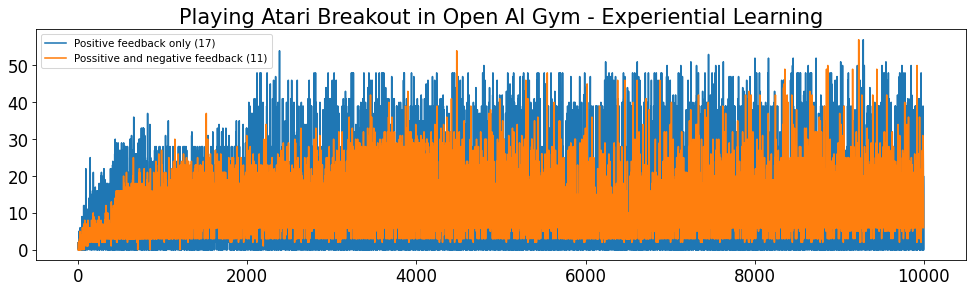

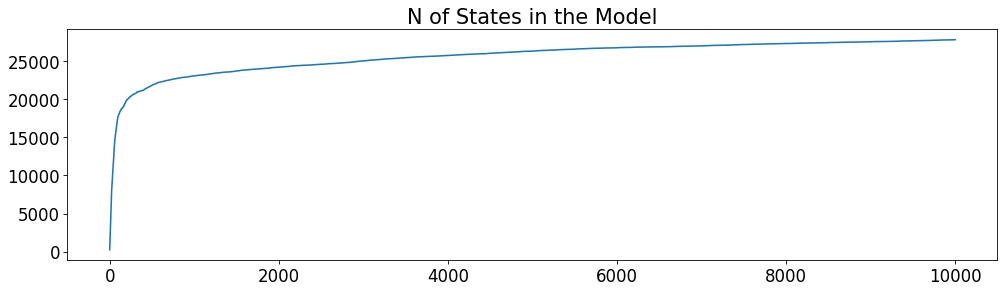

In [17]:
df = pd.DataFrame({f'Positive feedback only ({round(np.mean(scores1))})': pd.Series(scores1), 
                   f'Possitive and negative feedback ({round(np.mean(scores2))})': pd.Series(scores2)})
plt.rcParams["figure.dpi"] = 75
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym - Experiential Learning", fontsize=20);plt.show()
p = pd.Series(states).plot.line(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model", fontsize=20)

### Randomized ties 

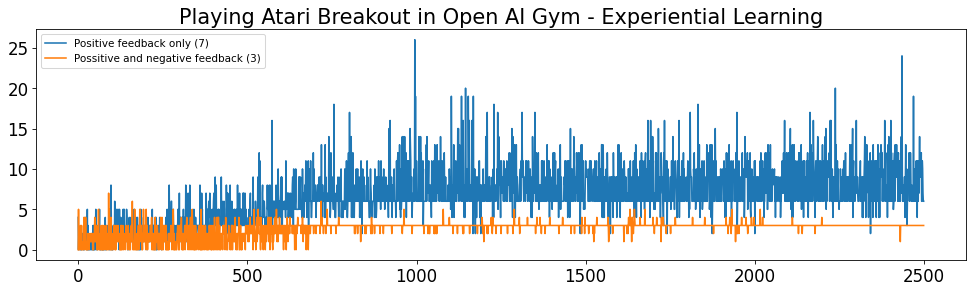

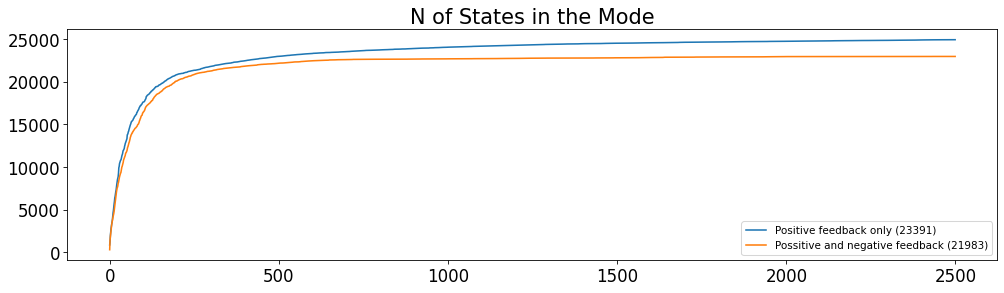

In [18]:
# 2025-11-06
# learn_mode=1/2, T=1, state count_threshold=2, similarity_threshold=0.99999, transition utility_thereshold=1,count_threshold=2
score_avg=6.8; steps_avg=12646.5; lives_avg=2.0; lapse_avg="0:00:06.218350"; time="3:28:44.603415"
scores1 = [4.0, 0, 2.0, 2.0, 1.0, 1.0, 0, 0, 0, 2.0, 1.0, 0, 2.0, 2.0, 1.0, 2.0, 0, 1.0, 0, 2.0, 4.0, 1.0, 2.0, 1.0, 2.0, 0, 2.0, 5.0, 0, 3.0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 2.0, 0, 0, 0, 0, 3.0, 0, 3.0, 0, 1.0, 0, 2.0, 1.0, 5.0, 0, 1.0, 2.0, 0, 3.0, 2.0, 1.0, 2.0, 1.0, 2.0, 5.0, 1.0, 0, 1.0, 0, 2.0, 2.0, 2.0, 0, 2.0, 0, 0, 0, 0, 0, 1.0, 1.0, 4.0, 0, 3.0, 0, 1.0, 2.0, 1.0, 2.0, 3.0, 2.0, 3.0, 0, 1.0, 4.0, 0, 2.0, 3.0, 8.0, 3.0, 0, 0, 2.0, 0, 2.0, 3.0, 2.0, 2.0, 1.0, 6.0, 1.0, 5.0, 1.0, 2.0, 1.0, 5.0, 2.0, 4.0, 2.0, 5.0, 1.0, 2.0, 0, 5.0, 1.0, 1.0, 2.0, 4.0, 3.0, 1.0, 2.0, 3.0, 2.0, 3.0, 5.0, 4.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 5.0, 4.0, 1.0, 2.0, 0, 0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 2.0, 2.0, 2.0, 5.0, 2.0, 1.0, 2.0, 1.0, 5.0, 2.0, 2.0, 1.0, 2.0, 4.0, 2.0, 3.0, 0, 4.0, 1.0, 3.0, 2.0, 0, 1.0, 0, 2.0, 3.0, 0, 5.0, 2.0, 4.0, 1.0, 2.0, 2.0, 3.0, 1.0, 1.0, 3.0, 3.0, 3.0, 1.0, 2.0, 3.0, 2.0, 3.0, 3.0, 0, 1.0, 1.0, 4.0, 3.0, 1.0, 1.0, 1.0, 3.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 5.0, 1.0, 3.0, 2.0, 3.0, 3.0, 0, 2.0, 1.0, 3.0, 4.0, 4.0, 0, 2.0, 0, 2.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 4.0, 2.0, 2.0, 1.0, 1.0, 0, 2.0, 2.0, 2.0, 1.0, 3.0, 1.0, 2.0, 1.0, 2.0, 3.0, 1.0, 1.0, 4.0, 2.0, 2.0, 4.0, 5.0, 2.0, 2.0, 1.0, 2.0, 1.0, 8.0, 3.0, 3.0, 1.0, 3.0, 3.0, 6.0, 6.0, 1.0, 4.0, 1.0, 1.0, 5.0, 2.0, 2.0, 1.0, 3.0, 2.0, 1.0, 2.0, 1.0, 3.0, 2.0, 1.0, 3.0, 3.0, 5.0, 3.0, 2.0, 2.0, 7.0, 2.0, 4.0, 1.0, 4.0, 2.0, 3.0, 1.0, 2.0, 2.0, 4.0, 2.0, 5.0, 2.0, 2.0, 4.0, 1.0, 2.0, 2.0, 8.0, 4.0, 1.0, 2.0, 3.0, 2.0, 2.0, 7.0, 2.0, 3.0, 2.0, 3.0, 8.0, 3.0, 2.0, 4.0, 4.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 5.0, 2.0, 3.0, 4.0, 2.0, 4.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 8.0, 5.0, 2.0, 3.0, 2.0, 7.0, 4.0, 5.0, 2.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 3.0, 7.0, 5.0, 2.0, 2.0, 5.0, 2.0, 5.0, 4.0, 6.0, 5.0, 4.0, 7.0, 2.0, 3.0, 4.0, 2.0, 2.0, 2.0, 5.0, 4.0, 1.0, 4.0, 6.0, 7.0, 4.0, 3.0, 5.0, 9.0, 3.0, 3.0, 8.0, 2.0, 2.0, 2.0, 3.0, 4.0, 5.0, 4.0, 5.0, 2.0, 4.0, 4.0, 4.0, 3.0, 3.0, 9.0, 3.0, 6.0, 3.0, 3.0, 4.0, 4.0, 4.0, 6.0, 5.0, 1.0, 2.0, 4.0, 4.0, 1.0, 8.0, 4.0, 7.0, 2.0, 7.0, 3.0, 2.0, 5.0, 2.0, 3.0, 2.0, 8.0, 2.0, 4.0, 2.0, 2.0, 6.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 5.0, 4.0, 5.0, 2.0, 4.0, 3.0, 4.0, 5.0, 3.0, 3.0, 8.0, 3.0, 4.0, 5.0, 3.0, 3.0, 7.0, 3.0, 3.0, 5.0, 3.0, 4.0, 5.0, 3.0, 5.0, 3.0, 7.0, 3.0, 7.0, 5.0, 3.0, 6.0, 7.0, 5.0, 3.0, 5.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 6.0, 7.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 9.0, 4.0, 5.0, 3.0, 3.0, 4.0, 4.0, 6.0, 5.0, 3.0, 3.0, 3.0, 3.0, 4.0, 9.0, 4.0, 3.0, 5.0, 12.0, 5.0, 11.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 7.0, 8.0, 5.0, 4.0, 6.0, 4.0, 6.0, 5.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 4.0, 8.0, 5.0, 6.0, 7.0, 5.0, 4.0, 8.0, 4.0, 6.0, 4.0, 4.0, 8.0, 4.0, 4.0, 16.0, 3.0, 6.0, 6.0, 4.0, 4.0, 6.0, 6.0, 5.0, 4.0, 4.0, 4.0, 8.0, 5.0, 6.0, 4.0, 4.0, 4.0, 10.0, 7.0, 4.0, 4.0, 6.0, 6.0, 4.0, 6.0, 7.0, 9.0, 5.0, 9.0, 2.0, 6.0, 5.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 6.0, 4.0, 11.0, 5.0, 5.0, 5.0, 7.0, 5.0, 7.0, 4.0, 5.0, 7.0, 5.0, 5.0, 5.0, 4.0, 7.0, 5.0, 5.0, 4.0, 5.0, 8.0, 9.0, 8.0, 3.0, 10.0, 5.0, 8.0, 5.0, 5.0, 6.0, 10.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 9.0, 5.0, 9.0, 6.0, 7.0, 9.0, 5.0, 5.0, 6.0, 4.0, 4.0, 10.0, 6.0, 6.0, 7.0, 4.0, 6.0, 6.0, 8.0, 6.0, 8.0, 11.0, 6.0, 6.0, 4.0, 9.0, 6.0, 6.0, 11.0, 3.0, 9.0, 6.0, 10.0, 6.0, 6.0, 11.0, 6.0, 4.0, 4.0, 6.0, 6.0, 6.0, 6.0, 12.0, 6.0, 10.0, 6.0, 6.0, 8.0, 8.0, 7.0, 4.0, 6.0, 7.0, 6.0, 8.0, 8.0, 6.0, 8.0, 8.0, 9.0, 7.0, 6.0, 9.0, 6.0, 6.0, 6.0, 13.0, 6.0, 4.0, 8.0, 8.0, 6.0, 6.0, 7.0, 6.0, 4.0, 6.0, 13.0, 4.0, 9.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 14.0, 6.0, 8.0, 7.0, 4.0, 5.0, 12.0, 6.0, 7.0, 6.0, 6.0, 9.0, 6.0, 5.0, 5.0, 18.0, 6.0, 6.0, 4.0, 4.0, 4.0, 7.0, 6.0, 6.0, 8.0, 6.0, 7.0, 9.0, 6.0, 4.0, 6.0, 6.0, 7.0, 9.0, 6.0, 6.0, 10.0, 4.0, 6.0, 4.0, 6.0, 6.0, 4.0, 5.0, 6.0, 5.0, 6.0, 10.0, 5.0, 6.0, 6.0, 6.0, 11.0, 6.0, 4.0, 4.0, 6.0, 10.0, 12.0, 6.0, 6.0, 17.0, 7.0, 6.0, 6.0, 6.0, 14.0, 4.0, 10.0, 6.0, 4.0, 12.0, 6.0, 8.0, 4.0, 4.0, 7.0, 8.0, 8.0, 6.0, 6.0, 10.0, 6.0, 6.0, 8.0, 10.0, 6.0, 6.0, 6.0, 6.0, 9.0, 4.0, 6.0, 4.0, 6.0, 11.0, 5.0, 7.0, 2.0, 8.0, 10.0, 6.0, 6.0, 6.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 11.0, 6.0, 9.0, 6.0, 6.0, 6.0, 4.0, 4.0, 4.0, 8.0, 10.0, 8.0, 7.0, 4.0, 4.0, 5.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 4.0, 10.0, 5.0, 6.0, 9.0, 4.0, 5.0, 9.0, 6.0, 9.0, 6.0, 6.0, 11.0, 6.0, 6.0, 9.0, 6.0, 8.0, 5.0, 11.0, 6.0, 8.0, 9.0, 6.0, 8.0, 6.0, 8.0, 10.0, 7.0, 8.0, 5.0, 6.0, 6.0, 9.0, 6.0, 6.0, 8.0, 6.0, 6.0, 7.0, 6.0, 4.0, 9.0, 15.0, 6.0, 11.0, 16.0, 6.0, 6.0, 6.0, 9.0, 6.0, 4.0, 8.0, 6.0, 6.0, 6.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 4.0, 6.0, 11.0, 8.0, 6.0, 11.0, 12.0, 11.0, 12.0, 6.0, 6.0, 13.0, 5.0, 6.0, 4.0, 10.0, 5.0, 6.0, 13.0, 14.0, 6.0, 14.0, 9.0, 6.0, 7.0, 6.0, 14.0, 6.0, 6.0, 6.0, 12.0, 4.0, 11.0, 6.0, 11.0, 6.0, 11.0, 6.0, 7.0, 11.0, 6.0, 7.0, 15.0, 13.0, 11.0, 6.0, 9.0, 9.0, 4.0, 6.0, 6.0, 7.0, 7.0, 6.0, 10.0, 6.0, 26.0, 8.0, 19.0, 9.0, 6.0, 11.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 14.0, 8.0, 6.0, 6.0, 6.0, 14.0, 6.0, 12.0, 6.0, 6.0, 6.0, 8.0, 11.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 8.0, 13.0, 6.0, 14.0, 7.0, 9.0, 7.0, 9.0, 11.0, 6.0, 6.0, 6.0, 8.0, 8.0, 7.0, 6.0, 4.0, 11.0, 6.0, 6.0, 8.0, 9.0, 6.0, 11.0, 10.0, 6.0, 13.0, 6.0, 6.0, 6.0, 8.0, 6.0, 7.0, 13.0, 7.0, 10.0, 7.0, 8.0, 11.0, 6.0, 8.0, 6.0, 8.0, 14.0, 9.0, 11.0, 6.0, 6.0, 11.0, 6.0, 6.0, 8.0, 10.0, 6.0, 12.0, 8.0, 6.0, 6.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 8.0, 6.0, 10.0, 8.0, 9.0, 9.0, 5.0, 6.0, 19.0, 12.0, 4.0, 8.0, 6.0, 6.0, 6.0, 13.0, 4.0, 8.0, 6.0, 8.0, 8.0, 11.0, 6.0, 6.0, 6.0, 9.0, 9.0, 15.0, 7.0, 15.0, 6.0, 6.0, 13.0, 8.0, 11.0, 8.0, 11.0, 6.0, 19.0, 6.0, 7.0, 6.0, 6.0, 16.0, 8.0, 8.0, 4.0, 7.0, 4.0, 8.0, 20.0, 10.0, 10.0, 6.0, 7.0, 8.0, 10.0, 6.0, 19.0, 14.0, 8.0, 16.0, 6.0, 8.0, 6.0, 6.0, 8.0, 6.0, 9.0, 16.0, 7.0, 12.0, 2.0, 19.0, 6.0, 9.0, 6.0, 10.0, 5.0, 2.0, 8.0, 9.0, 4.0, 4.0, 9.0, 8.0, 6.0, 9.0, 7.0, 9.0, 11.0, 11.0, 4.0, 6.0, 8.0, 2.0, 8.0, 8.0, 7.0, 6.0, 6.0, 6.0, 10.0, 6.0, 6.0, 8.0, 6.0, 7.0, 8.0, 8.0, 14.0, 6.0, 8.0, 8.0, 17.0, 6.0, 6.0, 8.0, 6.0, 9.0, 6.0, 9.0, 6.0, 6.0, 6.0, 6.0, 7.0, 8.0, 8.0, 9.0, 4.0, 8.0, 10.0, 4.0, 18.0, 6.0, 6.0, 8.0, 6.0, 6.0, 8.0, 8.0, 8.0, 10.0, 6.0, 17.0, 5.0, 7.0, 14.0, 8.0, 10.0, 11.0, 8.0, 4.0, 4.0, 11.0, 11.0, 7.0, 9.0, 8.0, 8.0, 9.0, 6.0, 11.0, 6.0, 6.0, 7.0, 8.0, 10.0, 8.0, 6.0, 9.0, 11.0, 6.0, 8.0, 8.0, 10.0, 10.0, 8.0, 12.0, 6.0, 6.0, 6.0, 8.0, 9.0, 12.0, 6.0, 15.0, 8.0, 4.0, 14.0, 8.0, 7.0, 9.0, 8.0, 13.0, 7.0, 4.0, 11.0, 7.0, 13.0, 6.0, 9.0, 9.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 8.0, 9.0, 10.0, 6.0, 11.0, 10.0, 11.0, 17.0, 9.0, 9.0, 11.0, 8.0, 6.0, 7.0, 7.0, 9.0, 9.0, 6.0, 11.0, 8.0, 8.0, 11.0, 7.0, 9.0, 6.0, 9.0, 11.0, 9.0, 9.0, 6.0, 6.0, 10.0, 7.0, 6.0, 4.0, 6.0, 9.0, 4.0, 14.0, 9.0, 6.0, 6.0, 10.0, 7.0, 11.0, 17.0, 8.0, 12.0, 6.0, 12.0, 6.0, 6.0, 9.0, 6.0, 9.0, 12.0, 6.0, 5.0, 6.0, 8.0, 6.0, 8.0, 6.0, 6.0, 7.0, 11.0, 6.0, 11.0, 6.0, 8.0, 6.0, 8.0, 11.0, 6.0, 6.0, 6.0, 9.0, 6.0, 6.0, 6.0, 6.0, 13.0, 9.0, 7.0, 11.0, 6.0, 7.0, 11.0, 4.0, 10.0, 8.0, 6.0, 6.0, 8.0, 8.0, 9.0, 5.0, 8.0, 8.0, 12.0, 6.0, 11.0, 9.0, 12.0, 6.0, 10.0, 11.0, 6.0, 6.0, 6.0, 6.0, 8.0, 6.0, 6.0, 10.0, 4.0, 9.0, 6.0, 6.0, 10.0, 13.0, 5.0, 8.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 9.0, 8.0, 11.0, 6.0, 11.0, 10.0, 8.0, 6.0, 6.0, 11.0, 4.0, 7.0, 6.0, 11.0, 9.0, 11.0, 4.0, 6.0, 15.0, 6.0, 10.0, 6.0, 7.0, 8.0, 6.0, 10.0, 6.0, 6.0, 14.0, 11.0, 9.0, 9.0, 6.0, 9.0, 7.0, 8.0, 12.0, 10.0, 6.0, 6.0, 9.0, 12.0, 6.0, 8.0, 9.0, 10.0, 12.0, 2.0, 8.0, 10.0, 13.0, 6.0, 13.0, 8.0, 7.0, 6.0, 11.0, 5.0, 6.0, 6.0, 5.0, 6.0, 9.0, 11.0, 9.0, 9.0, 10.0, 9.0, 9.0, 9.0, 6.0, 6.0, 6.0, 10.0, 9.0, 11.0, 6.0, 7.0, 11.0, 11.0, 8.0, 8.0, 6.0, 9.0, 9.0, 9.0, 10.0, 6.0, 6.0, 6.0, 11.0, 6.0, 6.0, 6.0, 9.0, 11.0, 6.0, 9.0, 6.0, 6.0, 6.0, 9.0, 6.0, 12.0, 6.0, 6.0, 9.0, 10.0, 9.0, 6.0, 13.0, 13.0, 4.0, 12.0, 13.0, 12.0, 4.0, 9.0, 4.0, 9.0, 6.0, 6.0, 6.0, 8.0, 10.0, 6.0, 6.0, 12.0, 8.0, 5.0, 4.0, 6.0, 6.0, 9.0, 9.0, 9.0, 2.0, 7.0, 9.0, 6.0, 9.0, 9.0, 6.0, 6.0, 4.0, 12.0, 8.0, 6.0, 9.0, 6.0, 6.0, 6.0, 9.0, 6.0, 9.0, 4.0, 9.0, 6.0, 6.0, 13.0, 6.0, 13.0, 6.0, 11.0, 10.0, 4.0, 9.0, 9.0, 12.0, 6.0, 7.0, 10.0, 9.0, 6.0, 6.0, 8.0, 6.0, 11.0, 9.0, 8.0, 9.0, 6.0, 9.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 10.0, 10.0, 6.0, 10.0, 6.0, 6.0, 11.0, 6.0, 6.0, 7.0, 9.0, 6.0, 6.0, 9.0, 8.0, 11.0, 6.0, 6.0, 4.0, 12.0, 9.0, 8.0, 13.0, 7.0, 4.0, 10.0, 6.0, 8.0, 9.0, 6.0, 7.0, 9.0, 9.0, 8.0, 6.0, 11.0, 6.0, 6.0, 4.0, 12.0, 6.0, 11.0, 6.0, 6.0, 6.0, 9.0, 9.0, 11.0, 5.0, 11.0, 11.0, 12.0, 6.0, 6.0, 10.0, 7.0, 6.0, 9.0, 16.0, 6.0, 6.0, 6.0, 7.0, 11.0, 4.0, 6.0, 16.0, 7.0, 9.0, 6.0, 14.0, 6.0, 14.0, 10.0, 11.0, 6.0, 5.0, 6.0, 7.0, 5.0, 6.0, 12.0, 6.0, 12.0, 7.0, 9.0, 11.0, 6.0, 6.0, 15.0, 11.0, 6.0, 6.0, 9.0, 6.0, 4.0, 6.0, 12.0, 11.0, 9.0, 9.0, 7.0, 7.0, 5.0, 3.0, 12.0, 6.0, 16.0, 6.0, 9.0, 6.0, 11.0, 6.0, 9.0, 11.0, 2.0, 9.0, 10.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 9.0, 5.0, 6.0, 11.0, 6.0, 10.0, 9.0, 14.0, 6.0, 10.0, 10.0, 5.0, 5.0, 10.0, 11.0, 9.0, 8.0, 8.0, 6.0, 4.0, 9.0, 11.0, 6.0, 10.0, 11.0, 16.0, 4.0, 9.0, 9.0, 9.0, 9.0, 6.0, 8.0, 11.0, 6.0, 6.0, 6.0, 8.0, 12.0, 6.0, 10.0, 6.0, 6.0, 8.0, 7.0, 7.0, 9.0, 6.0, 6.0, 6.0, 9.0, 11.0, 7.0, 8.0, 4.0, 10.0, 5.0, 9.0, 17.0, 10.0, 9.0, 9.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 9.0, 12.0, 6.0, 6.0, 9.0, 5.0, 6.0, 10.0, 9.0, 9.0, 6.0, 8.0, 18.0, 9.0, 6.0, 8.0, 13.0, 6.0, 4.0, 6.0, 10.0, 6.0, 9.0, 6.0, 11.0, 5.0, 6.0, 10.0, 8.0, 6.0, 11.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 6.0, 13.0, 6.0, 6.0, 11.0, 12.0, 9.0, 11.0, 9.0, 5.0, 6.0, 13.0, 11.0, 8.0, 4.0, 11.0, 13.0, 2.0, 6.0, 9.0, 11.0, 6.0, 9.0, 6.0, 6.0, 6.0, 15.0, 9.0, 11.0, 9.0, 6.0, 6.0, 6.0, 9.0, 6.0, 9.0, 9.0, 9.0, 6.0, 9.0, 6.0, 6.0, 10.0, 8.0, 6.0, 6.0, 9.0, 10.0, 9.0, 9.0, 9.0, 6.0, 11.0, 6.0, 9.0, 4.0, 10.0, 6.0, 4.0, 12.0, 6.0, 9.0, 9.0, 11.0, 6.0, 12.0, 10.0, 13.0, 6.0, 10.0, 9.0, 6.0, 6.0, 11.0, 4.0, 9.0, 6.0, 9.0, 9.0, 11.0, 9.0, 10.0, 6.0, 6.0, 9.0, 6.0, 6.0, 12.0, 9.0, 6.0, 17.0, 2.0, 6.0, 6.0, 6.0, 9.0, 11.0, 6.0, 7.0, 6.0, 9.0, 9.0, 6.0, 8.0, 9.0, 9.0, 12.0, 6.0, 9.0, 9.0, 10.0, 10.0, 4.0, 6.0, 14.0, 10.0, 11.0, 9.0, 11.0, 11.0, 9.0, 12.0, 5.0, 6.0, 7.0, 11.0, 6.0, 9.0, 11.0, 12.0, 5.0, 4.0, 9.0, 6.0, 10.0, 6.0, 6.0, 9.0, 6.0, 6.0, 9.0, 6.0, 11.0, 2.0, 11.0, 6.0, 9.0, 9.0, 9.0, 9.0, 6.0, 9.0, 6.0, 9.0, 8.0, 6.0, 9.0, 6.0, 7.0, 11.0, 6.0, 12.0, 6.0, 6.0, 7.0, 9.0, 11.0, 9.0, 6.0, 10.0, 4.0, 6.0, 6.0, 11.0, 12.0, 8.0, 7.0, 7.0, 11.0, 12.0, 5.0, 5.0, 13.0, 8.0, 12.0, 10.0, 6.0, 6.0, 6.0, 13.0, 6.0, 9.0, 6.0, 6.0, 6.0, 10.0, 8.0, 9.0, 9.0, 9.0, 9.0, 10.0, 6.0, 9.0, 4.0, 9.0, 6.0, 9.0, 6.0, 6.0, 9.0, 9.0, 9.0, 9.0, 6.0, 6.0, 6.0, 8.0, 9.0, 4.0, 6.0, 6.0, 9.0, 9.0, 11.0, 7.0, 9.0, 9.0, 12.0, 7.0, 10.0, 16.0, 6.0, 11.0, 10.0, 6.0, 6.0, 12.0, 6.0, 6.0, 6.0, 6.0, 12.0, 6.0, 6.0, 6.0, 9.0, 11.0, 15.0, 8.0, 5.0, 9.0, 12.0, 4.0, 13.0, 4.0, 6.0, 12.0, 6.0, 13.0, 6.0, 6.0, 10.0, 6.0, 11.0, 7.0, 9.0, 9.0, 9.0, 6.0, 9.0, 11.0, 6.0, 12.0, 8.0, 12.0, 9.0, 6.0, 12.0, 12.0, 13.0, 5.0, 10.0, 6.0, 6.0, 6.0, 11.0, 4.0, 11.0, 6.0, 11.0, 6.0, 6.0, 7.0, 9.0, 9.0, 6.0, 11.0, 9.0, 12.0, 5.0, 4.0, 11.0, 6.0, 9.0, 9.0, 17.0, 11.0, 6.0, 13.0, 6.0, 9.0, 6.0, 12.0, 6.0, 9.0, 16.0, 11.0, 9.0, 7.0, 7.0, 4.0, 9.0, 11.0, 11.0, 6.0, 6.0, 8.0, 11.0, 14.0, 11.0, 6.0, 6.0, 11.0, 6.0, 9.0, 6.0, 11.0, 7.0, 6.0, 9.0, 9.0, 9.0, 13.0, 6.0, 9.0, 11.0, 6.0, 9.0, 10.0, 13.0, 14.0, 6.0, 15.0, 5.0, 9.0, 6.0, 9.0, 11.0, 11.0, 9.0, 9.0, 9.0, 12.0, 6.0, 9.0, 16.0, 10.0, 16.0, 6.0, 7.0, 6.0, 10.0, 6.0, 4.0, 9.0, 6.0, 9.0, 6.0, 6.0, 6.0, 20.0, 6.0, 13.0, 6.0, 9.0, 6.0, 11.0, 6.0, 10.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 10.0, 8.0, 6.0, 7.0, 9.0, 6.0, 9.0, 6.0, 10.0, 9.0, 11.0, 9.0, 6.0, 10.0, 6.0, 12.0, 6.0, 9.0, 6.0, 6.0, 9.0, 6.0, 9.0, 9.0, 9.0, 9.0, 6.0, 9.0, 13.0, 9.0, 6.0, 11.0, 8.0, 13.0, 6.0, 10.0, 15.0, 4.0, 10.0, 11.0, 6.0, 9.0, 9.0, 6.0, 9.0, 9.0, 9.0, 16.0, 7.0, 7.0, 9.0, 7.0, 6.0, 6.0, 6.0, 6.0, 9.0, 9.0, 9.0, 11.0, 6.0, 8.0, 6.0, 9.0, 9.0, 4.0, 9.0, 4.0, 9.0, 7.0, 9.0, 11.0, 14.0, 6.0, 11.0, 4.0, 11.0, 7.0, 13.0, 11.0, 10.0, 9.0, 9.0, 4.0, 9.0, 11.0, 6.0, 11.0, 12.0, 2.0, 9.0, 9.0, 6.0, 11.0, 6.0, 11.0, 4.0, 13.0, 6.0, 9.0, 6.0, 9.0, 11.0, 6.0, 11.0, 8.0, 4.0, 11.0, 6.0, 11.0, 6.0, 13.0, 6.0, 12.0, 4.0, 10.0, 4.0, 9.0, 9.0, 9.0, 13.0, 12.0, 9.0, 12.0, 6.0, 9.0, 6.0, 9.0, 9.0, 10.0, 8.0, 16.0, 6.0, 10.0, 12.0, 6.0, 6.0, 7.0, 8.0, 4.0, 9.0, 13.0, 6.0, 14.0, 6.0, 6.0, 9.0, 10.0, 6.0, 16.0, 9.0, 12.0, 6.0, 11.0, 6.0, 11.0, 5.0, 5.0, 6.0, 11.0, 12.0, 6.0, 13.0, 10.0, 9.0, 9.0, 13.0, 10.0, 9.0, 9.0, 6.0, 12.0, 6.0, 8.0, 6.0, 11.0, 6.0, 6.0, 12.0, 11.0, 14.0, 7.0, 24.0, 9.0, 6.0, 8.0, 6.0, 6.0, 6.0, 9.0, 9.0, 4.0, 9.0, 13.0, 6.0, 6.0, 10.0, 3.0, 6.0, 8.0, 9.0, 9.0, 9.0, 12.0, 6.0, 9.0, 9.0, 12.0, 10.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 19.0, 6.0, 10.0, 9.0, 9.0, 6.0, 9.0, 9.0, 11.0, 6.0, 11.0, 4.0, 11.0, 9.0, 6.0, 11.0, 7.0, 11.0, 14.0, 9.0, 11.0, 9.0, 9.0, 12.0, 6.0, 6.0, 11.0, 10.0, 7.0, 6.0, 6.0]
states1 = [860, 1216, 1927, 2398, 2781, 3045, 3323, 3570, 3802, 4290, 4626, 4886, 5328, 5635, 5944, 6356, 6542, 6878, 7103, 7300, 7693, 7972, 8261, 8518, 8692, 8857, 9261, 9907, 10061, 10381, 10535, 10638, 10769, 10812, 10914, 11118, 11307, 11420, 11548, 11788, 11940, 11981, 12083, 12166, 12420, 12556, 12744, 12848, 12977, 13078, 13221, 13324, 13767, 13831, 13925, 14122, 14190, 14374, 14494, 14650, 14802, 14929, 15020, 15168, 15302, 15324, 15393, 15420, 15472, 15522, 15649, 15696, 15780, 15877, 15957, 15975, 16023, 16105, 16144, 16180, 16357, 16396, 16505, 16573, 16635, 16717, 16787, 16921, 16985, 17067, 17163, 17176, 17193, 17306, 17321, 17364, 17452, 17523, 17595, 17607, 17621, 17639, 17656, 17708, 17805, 17886, 17962, 18017, 18250, 18274, 18337, 18398, 18429, 18446, 18483, 18527, 18562, 18577, 18640, 18679, 18747, 18751, 18813, 18886, 18908, 18920, 18984, 19003, 19060, 19068, 19113, 19170, 19218, 19246, 19302, 19314, 19403, 19419, 19435, 19437, 19439, 19444, 19456, 19491, 19547, 19561, 19620, 19634, 19644, 19658, 19669, 19715, 19746, 19792, 19804, 19809, 19850, 19857, 19885, 19934, 19940, 19993, 20028, 20068, 20090, 20092, 20113, 20160, 20197, 20218, 20247, 20299, 20311, 20335, 20340, 20380, 20388, 20401, 20428, 20448, 20467, 20495, 20517, 20552, 20564, 20606, 20621, 20637, 20647, 20656, 20661, 20695, 20716, 20722, 20736, 20780, 20798, 20822, 20827, 20835, 20844, 20865, 20894, 20900, 20903, 20910, 20921, 20935, 20936, 20939, 20943, 20963, 20967, 20973, 20977, 20983, 20986, 20989, 20989, 21031, 21036, 21046, 21063, 21076, 21091, 21092, 21096, 21098, 21105, 21131, 21168, 21172, 21186, 21188, 21209, 21212, 21213, 21216, 21234, 21252, 21255, 21270, 21281, 21292, 21295, 21302, 21307, 21317, 21331, 21339, 21339, 21347, 21348, 21351, 21352, 21360, 21376, 21382, 21383, 21395, 21404, 21410, 21419, 21437, 21440, 21452, 21454, 21461, 21466, 21498, 21525, 21538, 21543, 21555, 21559, 21578, 21597, 21603, 21623, 21625, 21625, 21654, 21660, 21675, 21679, 21693, 21696, 21704, 21707, 21707, 21714, 21722, 21730, 21747, 21751, 21766, 21778, 21781, 21785, 21798, 21803, 21812, 21819, 21823, 21828, 21840, 21849, 21852, 21860, 21886, 21898, 21916, 21921, 21929, 21937, 21942, 21943, 21946, 21960, 21964, 21966, 21969, 21977, 21981, 21984, 21991, 22006, 22017, 22023, 22029, 22048, 22060, 22061, 22071, 22077, 22082, 22086, 22090, 22094, 22098, 22105, 22115, 22127, 22130, 22134, 22139, 22142, 22148, 22150, 22153, 22153, 22158, 22167, 22173, 22178, 22186, 22188, 22188, 22193, 22199, 22216, 22231, 22233, 22239, 22244, 22261, 22279, 22287, 22289, 22293, 22297, 22297, 22298, 22300, 22303, 22307, 22310, 22317, 22322, 22337, 22341, 22345, 22360, 22361, 22373, 22381, 22390, 22396, 22399, 22410, 22412, 22413, 22418, 22424, 22428, 22429, 22437, 22439, 22444, 22448, 22458, 22468, 22472, 22475, 22484, 22501, 22505, 22509, 22515, 22521, 22522, 22523, 22531, 22537, 22541, 22552, 22564, 22566, 22575, 22582, 22586, 22588, 22592, 22598, 22602, 22609, 22610, 22612, 22621, 22625, 22629, 22638, 22645, 22646, 22647, 22651, 22658, 22662, 22669, 22675, 22688, 22698, 22711, 22714, 22714, 22722, 22725, 22727, 22732, 22742, 22744, 22754, 22756, 22757, 22763, 22765, 22767, 22767, 22768, 22770, 22776, 22780, 22786, 22794, 22797, 22799, 22801, 22805, 22817, 22822, 22827, 22836, 22838, 22843, 22853, 22854, 22857, 22872, 22875, 22876, 22885, 22889, 22895, 22900, 22904, 22905, 22910, 22918, 22919, 22926, 22932, 22934, 22946, 22958, 22962, 22966, 22970, 22971, 22979, 22985, 22985, 22985, 22986, 22987, 22988, 22991, 22992, 22994, 23000, 23005, 23010, 23012, 23014, 23019, 23024, 23029, 23034, 23042, 23045, 23049, 23052, 23056, 23062, 23066, 23078, 23082, 23082, 23083, 23083, 23084, 23086, 23089, 23097, 23100, 23105, 23111, 23116, 23122, 23125, 23129, 23130, 23131, 23133, 23135, 23141, 23150, 23151, 23152, 23157, 23158, 23162, 23171, 23174, 23178, 23180, 23183, 23183, 23185, 23188, 23192, 23193, 23198, 23208, 23210, 23211, 23214, 23214, 23220, 23222, 23223, 23229, 23234, 23236, 23243, 23247, 23251, 23254, 23254, 23255, 23259, 23264, 23270, 23271, 23272, 23274, 23281, 23285, 23288, 23288, 23289, 23291, 23293, 23300, 23301, 23302, 23304, 23305, 23305, 23307, 23311, 23321, 23323, 23330, 23333, 23336, 23337, 23339, 23341, 23343, 23345, 23347, 23348, 23348, 23349, 23355, 23357, 23359, 23363, 23367, 23368, 23373, 23373, 23373, 23377, 23377, 23377, 23378, 23379, 23382, 23386, 23387, 23388, 23389, 23395, 23404, 23406, 23410, 23417, 23417, 23420, 23420, 23420, 23423, 23425, 23427, 23427, 23427, 23427, 23427, 23428, 23428, 23429, 23435, 23437, 23439, 23442, 23443, 23448, 23449, 23449, 23451, 23451, 23451, 23453, 23455, 23456, 23456, 23457, 23458, 23459, 23460, 23461, 23465, 23470, 23470, 23471, 23474, 23479, 23480, 23481, 23485, 23490, 23496, 23496, 23500, 23500, 23500, 23502, 23506, 23507, 23507, 23511, 23511, 23511, 23513, 23516, 23520, 23527, 23528, 23528, 23529, 23529, 23530, 23534, 23535, 23537, 23539, 23542, 23543, 23546, 23549, 23557, 23564, 23564, 23566, 23570, 23572, 23574, 23574, 23581, 23582, 23583, 23586, 23589, 23589, 23589, 23598, 23598, 23598, 23599, 23601, 23605, 23611, 23611, 23611, 23613, 23614, 23616, 23616, 23616, 23618, 23624, 23627, 23629, 23630, 23630, 23634, 23640, 23640, 23644, 23647, 23649, 23650, 23655, 23658, 23659, 23668, 23671, 23671, 23671, 23672, 23673, 23676, 23678, 23678, 23682, 23682, 23685, 23685, 23685, 23685, 23685, 23686, 23689, 23691, 23692, 23693, 23693, 23697, 23697, 23697, 23697, 23698, 23700, 23703, 23703, 23708, 23709, 23713, 23715, 23715, 23716, 23716, 23718, 23721, 23721, 23722, 23723, 23725, 23732, 23734, 23734, 23737, 23741, 23741, 23741, 23741, 23749, 23749, 23750, 23752, 23752, 23752, 23752, 23752, 23753, 23753, 23755, 23759, 23760, 23760, 23764, 23768, 23769, 23769, 23773, 23775, 23776, 23776, 23776, 23776, 23776, 23776, 23776, 23777, 23777, 23784, 23788, 23795, 23798, 23801, 23807, 23810, 23810, 23810, 23812, 23812, 23814, 23814, 23814, 23814, 23814, 23816, 23816, 23818, 23820, 23824, 23827, 23827, 23827, 23827, 23827, 23828, 23829, 23832, 23839, 23841, 23841, 23841, 23842, 23843, 23843, 23843, 23843, 23843, 23844, 23844, 23853, 23857, 23858, 23860, 23860, 23862, 23868, 23868, 23871, 23871, 23871, 23876, 23876, 23877, 23878, 23878, 23879, 23882, 23888, 23889, 23891, 23894, 23894, 23895, 23897, 23900, 23904, 23904, 23908, 23908, 23908, 23909, 23910, 23913, 23913, 23915, 23916, 23916, 23919, 23919, 23919, 23919, 23927, 23927, 23933, 23937, 23938, 23938, 23939, 23939, 23939, 23939, 23942, 23945, 23945, 23945, 23945, 23946, 23946, 23946, 23947, 23947, 23947, 23947, 23947, 23949, 23949, 23952, 23965, 23966, 23966, 23968, 23968, 23971, 23971, 23971, 23971, 23972, 23976, 23976, 23977, 23983, 23984, 23984, 23991, 23991, 23991, 23991, 23995, 23995, 23995, 23997, 23997, 23997, 24001, 24002, 24004, 24007, 24010, 24010, 24011, 24016, 24016, 24018, 24021, 24023, 24026, 24028, 24028, 24028, 24028, 24029, 24031, 24033, 24033, 24033, 24033, 24033, 24038, 24041, 24045, 24051, 24051, 24051, 24053, 24053, 24054, 24054, 24054, 24054, 24055, 24059, 24059, 24059, 24059, 24061, 24061, 24064, 24065, 24065, 24065, 24068, 24070, 24070, 24070, 24072, 24072, 24072, 24072, 24072, 24074, 24075, 24077, 24078, 24085, 24085, 24087, 24087, 24090, 24092, 24092, 24092, 24092, 24094, 24094, 24096, 24096, 24097, 24098, 24099, 24099, 24099, 24104, 24104, 24107, 24110, 24111, 24115, 24115, 24115, 24115, 24117, 24117, 24117, 24118, 24120, 24126, 24128, 24129, 24130, 24131, 24131, 24131, 24132, 24138, 24142, 24142, 24143, 24144, 24145, 24145, 24145, 24145, 24148, 24148, 24151, 24158, 24158, 24158, 24161, 24161, 24162, 24162, 24162, 24162, 24162, 24162, 24162, 24162, 24162, 24162, 24167, 24169, 24169, 24169, 24169, 24172, 24175, 24175, 24176, 24176, 24176, 24176, 24177, 24177, 24178, 24178, 24180, 24181, 24182, 24183, 24183, 24183, 24186, 24186, 24188, 24190, 24192, 24192, 24192, 24194, 24198, 24200, 24205, 24205, 24207, 24209, 24210, 24210, 24210, 24210, 24210, 24212, 24212, 24213, 24214, 24214, 24214, 24214, 24215, 24217, 24217, 24217, 24217, 24217, 24218, 24219, 24223, 24224, 24224, 24224, 24225, 24225, 24225, 24227, 24229, 24230, 24230, 24231, 24231, 24234, 24235, 24236, 24239, 24239, 24240, 24240, 24243, 24243, 24244, 24244, 24244, 24248, 24248, 24248, 24249, 24253, 24255, 24255, 24257, 24257, 24259, 24259, 24259, 24259, 24261, 24263, 24263, 24263, 24263, 24267, 24268, 24268, 24268, 24268, 24268, 24269, 24269, 24270, 24276, 24276, 24276, 24277, 24277, 24277, 24277, 24277, 24277, 24281, 24285, 24285, 24285, 24285, 24285, 24285, 24285, 24286, 24288, 24288, 24288, 24289, 24291, 24291, 24292, 24292, 24293, 24293, 24293, 24293, 24293, 24295, 24295, 24296, 24297, 24300, 24301, 24303, 24303, 24305, 24307, 24308, 24308, 24308, 24311, 24314, 24317, 24317, 24318, 24320, 24321, 24321, 24321, 24323, 24323, 24324, 24325, 24327, 24327, 24328, 24328, 24331, 24334, 24335, 24336, 24340, 24344, 24345, 24346, 24347, 24347, 24347, 24347, 24352, 24357, 24359, 24363, 24363, 24363, 24368, 24369, 24373, 24373, 24374, 24379, 24379, 24379, 24380, 24380, 24380, 24383, 24384, 24384, 24386, 24386, 24386, 24386, 24386, 24386, 24386, 24386, 24388, 24388, 24388, 24391, 24391, 24393, 24393, 24393, 24393, 24394, 24394, 24394, 24394, 24394, 24396, 24396, 24396, 24397, 24397, 24400, 24400, 24403, 24403, 24403, 24406, 24408, 24408, 24408, 24408, 24408, 24410, 24410, 24410, 24410, 24410, 24410, 24414, 24417, 24417, 24417, 24418, 24421, 24421, 24426, 24426, 24426, 24426, 24428, 24428, 24428, 24429, 24432, 24432, 24432, 24432, 24433, 24433, 24434, 24434, 24435, 24435, 24435, 24435, 24436, 24436, 24436, 24436, 24436, 24436, 24437, 24437, 24438, 24438, 24438, 24439, 24439, 24439, 24439, 24439, 24443, 24444, 24445, 24449, 24450, 24450, 24450, 24451, 24452, 24456, 24456, 24456, 24456, 24457, 24460, 24461, 24462, 24462, 24463, 24465, 24465, 24465, 24466, 24466, 24466, 24466, 24466, 24466, 24466, 24466, 24467, 24467, 24467, 24468, 24468, 24468, 24468, 24468, 24468, 24471, 24474, 24474, 24474, 24474, 24474, 24477, 24477, 24477, 24477, 24477, 24477, 24477, 24477, 24477, 24477, 24478, 24478, 24478, 24478, 24478, 24478, 24478, 24478, 24478, 24479, 24479, 24479, 24481, 24481, 24481, 24482, 24483, 24486, 24488, 24493, 24493, 24493, 24493, 24493, 24494, 24495, 24495, 24495, 24495, 24496, 24496, 24496, 24496, 24499, 24499, 24499, 24499, 24501, 24501, 24501, 24501, 24502, 24503, 24504, 24508, 24508, 24510, 24511, 24511, 24514, 24515, 24515, 24515, 24515, 24515, 24515, 24516, 24516, 24516, 24516, 24516, 24516, 24516, 24518, 24518, 24518, 24518, 24518, 24518, 24519, 24519, 24521, 24521, 24521, 24521, 24521, 24521, 24521, 24521, 24521, 24521, 24521, 24523, 24523, 24523, 24523, 24523, 24523, 24523, 24523, 24523, 24523, 24523, 24523, 24523, 24523, 24523, 24523, 24523, 24529, 24529, 24529, 24532, 24532, 24532, 24532, 24534, 24535, 24539, 24540, 24543, 24544, 24546, 24546, 24546, 24546, 24546, 24546, 24546, 24546, 24547, 24547, 24547, 24548, 24548, 24549, 24549, 24549, 24549, 24549, 24549, 24549, 24549, 24549, 24555, 24556, 24556, 24556, 24556, 24556, 24556, 24557, 24558, 24558, 24562, 24562, 24562, 24562, 24562, 24562, 24562, 24562, 24562, 24562, 24562, 24563, 24564, 24564, 24565, 24565, 24568, 24568, 24568, 24568, 24568, 24569, 24569, 24571, 24571, 24571, 24571, 24572, 24572, 24572, 24572, 24573, 24575, 24576, 24577, 24577, 24577, 24577, 24577, 24578, 24578, 24578, 24578, 24578, 24580, 24580, 24580, 24580, 24580, 24580, 24581, 24581, 24581, 24581, 24581, 24581, 24581, 24581, 24581, 24581, 24581, 24581, 24584, 24587, 24589, 24589, 24590, 24590, 24590, 24590, 24590, 24590, 24593, 24593, 24596, 24596, 24596, 24596, 24596, 24596, 24596, 24596, 24597, 24598, 24598, 24598, 24598, 24598, 24598, 24600, 24603, 24603, 24604, 24604, 24604, 24605, 24610, 24613, 24613, 24614, 24614, 24614, 24614, 24614, 24614, 24614, 24614, 24617, 24618, 24619, 24619, 24620, 24621, 24624, 24625, 24627, 24628, 24629, 24629, 24629, 24629, 24629, 24629, 24629, 24629, 24629, 24629, 24629, 24629, 24629, 24632, 24632, 24632, 24632, 24632, 24632, 24632, 24632, 24632, 24639, 24639, 24639, 24639, 24639, 24639, 24639, 24640, 24642, 24642, 24643, 24643, 24643, 24643, 24643, 24643, 24643, 24645, 24645, 24645, 24645, 24645, 24645, 24645, 24645, 24645, 24645, 24646, 24646, 24646, 24648, 24648, 24648, 24648, 24652, 24652, 24652, 24652, 24653, 24653, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24654, 24655, 24656, 24657, 24657, 24657, 24657, 24657, 24657, 24658, 24658, 24658, 24658, 24658, 24658, 24658, 24660, 24660, 24660, 24660, 24660, 24661, 24663, 24663, 24663, 24663, 24663, 24663, 24663, 24663, 24664, 24665, 24666, 24666, 24666, 24666, 24669, 24669, 24669, 24669, 24669, 24669, 24669, 24669, 24669, 24670, 24670, 24670, 24670, 24670, 24670, 24670, 24670, 24670, 24670, 24670, 24670, 24673, 24677, 24677, 24678, 24678, 24679, 24679, 24679, 24679, 24683, 24683, 24683, 24683, 24683, 24685, 24687, 24689, 24689, 24691, 24691, 24691, 24691, 24691, 24691, 24691, 24691, 24691, 24691, 24692, 24692, 24692, 24694, 24694, 24694, 24696, 24697, 24697, 24699, 24699, 24699, 24699, 24699, 24699, 24701, 24701, 24701, 24701, 24701, 24702, 24702, 24702, 24702, 24703, 24703, 24703, 24704, 24705, 24705, 24705, 24707, 24707, 24707, 24707, 24707, 24707, 24710, 24711, 24713, 24713, 24713, 24713, 24713, 24713, 24713, 24713, 24713, 24713, 24713, 24713, 24713, 24713, 24713, 24713, 24714, 24716, 24716, 24716, 24716, 24716, 24716, 24716, 24716, 24716, 24717, 24717, 24717, 24717, 24717, 24717, 24717, 24718, 24718, 24718, 24718, 24718, 24718, 24718, 24718, 24718, 24718, 24718, 24718, 24718, 24721, 24722, 24722, 24724, 24726, 24726, 24726, 24726, 24726, 24726, 24726, 24726, 24726, 24726, 24726, 24727, 24729, 24729, 24729, 24729, 24729, 24729, 24729, 24730, 24731, 24731, 24731, 24732, 24733, 24733, 24733, 24735, 24735, 24735, 24736, 24737, 24738, 24738, 24738, 24738, 24738, 24738, 24738, 24738, 24740, 24740, 24740, 24740, 24740, 24740, 24740, 24740, 24740, 24742, 24742, 24742, 24742, 24742, 24744, 24744, 24744, 24744, 24744, 24745, 24745, 24745, 24745, 24745, 24745, 24746, 24747, 24747, 24747, 24748, 24749, 24751, 24753, 24753, 24753, 24753, 24753, 24753, 24753, 24754, 24754, 24754, 24755, 24757, 24759, 24759, 24759, 24759, 24759, 24760, 24762, 24762, 24763, 24763, 24763, 24763, 24763, 24763, 24764, 24764, 24764, 24764, 24764, 24764, 24766, 24767, 24767, 24767, 24767, 24767, 24767, 24767, 24767, 24767, 24768, 24768, 24768, 24769, 24769, 24769, 24769, 24769, 24769, 24769, 24769, 24769, 24769, 24769, 24770, 24770, 24770, 24770, 24770, 24770, 24770, 24770, 24770, 24771, 24771, 24773, 24777, 24777, 24779, 24781, 24781, 24781, 24781, 24781, 24781, 24781, 24781, 24781, 24781, 24781, 24782, 24782, 24782, 24783, 24785, 24785, 24785, 24785, 24785, 24787, 24789, 24789, 24791, 24791, 24792, 24792, 24792, 24792, 24794, 24794, 24794, 24794, 24794, 24794, 24794, 24794, 24794, 24794, 24794, 24794, 24796, 24798, 24798, 24798, 24798, 24801, 24803, 24803, 24803, 24803, 24803, 24803, 24803, 24803, 24803, 24804, 24804, 24804, 24804, 24804, 24804, 24804, 24805, 24805, 24805, 24805, 24806, 24806, 24807, 24807, 24807, 24810, 24812, 24812, 24813, 24813, 24813, 24813, 24813, 24813, 24813, 24816, 24816, 24816, 24816, 24817, 24819, 24819, 24819, 24819, 24819, 24819, 24819, 24819, 24819, 24820, 24820, 24820, 24820, 24820, 24820, 24820, 24820, 24821, 24821, 24821, 24821, 24821, 24822, 24822, 24822, 24823, 24823, 24823, 24823, 24825, 24825, 24825, 24826, 24827, 24830, 24830, 24830, 24830, 24830, 24830, 24830, 24830, 24832, 24833, 24833, 24833, 24833, 24834, 24834, 24834, 24834, 24835, 24835, 24835, 24835, 24835, 24835, 24835, 24835, 24835, 24835, 24836, 24836, 24836, 24837, 24837, 24837, 24838, 24840, 24840, 24840, 24840, 24840, 24840, 24840, 24840, 24840, 24840, 24840, 24840, 24841, 24841, 24841, 24841, 24841, 24841, 24842, 24844, 24846, 24848, 24848, 24848, 24848, 24848, 24848, 24848, 24848, 24848, 24848, 24848, 24849, 24849, 24849, 24849, 24849, 24849, 24850, 24851, 24851, 24851, 24851, 24851, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24852, 24853, 24854, 24855, 24856, 24856, 24856, 24856, 24856, 24856, 24857, 24862, 24862, 24862, 24863, 24863, 24863, 24863, 24865, 24865, 24867, 24867, 24869, 24869, 24869, 24869, 24869, 24869, 24869, 24869, 24869, 24869, 24869, 24869, 24871, 24871, 24871, 24871, 24871, 24871, 24871, 24871, 24871, 24871, 24871, 24872, 24872, 24873, 24874, 24874, 24874, 24877, 24877, 24880, 24880, 24880, 24880, 24881, 24881, 24881, 24881, 24881, 24881, 24883, 24883, 24883, 24883, 24883, 24883, 24883, 24883, 24883, 24884, 24888, 24888, 24890, 24890, 24890, 24890, 24891, 24893, 24893, 24893, 24893, 24896, 24896, 24898, 24898, 24898, 24898, 24900, 24901, 24901, 24902, 24902, 24902, 24902, 24902, 24903, 24905, 24905, 24905, 24905, 24907, 24907, 24907, 24907, 24907, 24907, 24910, 24910, 24910, 24910, 24910, 24910, 24910, 24910, 24910, 24910, 24910, 24910, 24911, 24912, 24913, 24915, 24916, 24916, 24917, 24917, 24917, 24917, 24917, 24917, 24917, 24917, 24917, 24918, 24918, 24918, 24919, 24919, 24919, 24919, 24919, 24919, 24921, 24921, 24921, 24921, 24921, 24922, 24922, 24922, 24922, 24922, 24922, 24922, 24922, 24923, 24923, 24923, 24923, 24923, 24923, 24923, 24923, 24923, 24923, 24923, 24923, 24923, 24923, 24923, 24923, 24925, 24925, 24925, 24925, 24925, 24925, 24925, 24926, 24926, 24926, 24926, 24926, 24927, 24927, 24927]
scores2 = [0, 5.0, 1.0, 0, 1.0, 0, 1.0, 3.0, 2.0, 0, 3.0, 0, 0, 0, 1.0, 1.0, 0, 4.0, 2.0, 2.0, 0, 2.0, 4.0, 2.0, 0, 1.0, 0, 1.0, 0, 2.0, 1.0, 1.0, 0, 2.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 2.0, 0, 1.0, 0, 2.0, 1.0, 2.0, 4.0, 1.0, 2.0, 1.0, 1.0, 3.0, 1.0, 0, 1.0, 0, 1.0, 5.0, 2.0, 0, 1.0, 0, 2.0, 1.0, 0, 3.0, 0, 0, 0, 3.0, 0, 2.0, 0, 3.0, 2.0, 2.0, 0, 1.0, 2.0, 1.0, 3.0, 0, 1.0, 0, 1.0, 2.0, 0, 7.0, 1.0, 5.0, 1.0, 0, 0, 0, 4.0, 0, 1.0, 2.0, 0, 0, 0, 1.0, 3.0, 2.0, 3.0, 3.0, 0, 1.0, 0, 1.0, 3.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 2.0, 0, 1.0, 0, 3.0, 0, 3.0, 0, 0, 2.0, 3.0, 2.0, 0, 1.0, 1.0, 1.0, 2.0, 0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 0, 2.0, 3.0, 2.0, 2.0, 0, 0, 2.0, 0, 2.0, 2.0, 3.0, 1.0, 1.0, 6.0, 2.0, 0, 0, 1.0, 1.0, 0, 5.0, 1.0, 0, 0, 0, 0, 0, 2.0, 0, 1.0, 2.0, 3.0, 0, 1.0, 2.0, 5.0, 4.0, 2.0, 1.0, 3.0, 3.0, 0, 1.0, 0, 2.0, 1.0, 5.0, 2.0, 1.0, 2.0, 2.0, 3.0, 1.0, 0, 5.0, 2.0, 3.0, 1.0, 0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 1.0, 3.0, 3.0, 3.0, 1.0, 4.0, 0, 1.0, 2.0, 0, 2.0, 0, 2.0, 2.0, 0, 4.0, 0, 0, 1.0, 1.0, 3.0, 3.0, 3.0, 2.0, 1.0, 0, 2.0, 2.0, 0, 2.0, 1.0, 2.0, 4.0, 2.0, 0, 2.0, 4.0, 0, 0, 0, 2.0, 3.0, 2.0, 2.0, 1.0, 1.0, 3.0, 0, 3.0, 0, 0, 0, 0, 1.0, 0, 2.0, 0, 2.0, 1.0, 2.0, 2.0, 2.0, 3.0, 1.0, 3.0, 0, 2.0, 2.0, 2.0, 5.0, 0, 0, 2.0, 0, 0, 1.0, 1.0, 0, 0, 0, 2.0, 2.0, 3.0, 3.0, 1.0, 0, 0, 0, 3.0, 1.0, 3.0, 2.0, 2.0, 4.0, 2.0, 0, 2.0, 0, 1.0, 0, 2.0, 1.0, 2.0, 3.0, 0, 1.0, 3.0, 2.0, 3.0, 4.0, 1.0, 1.0, 1.0, 0, 3.0, 1.0, 1.0, 3.0, 0, 2.0, 4.0, 1.0, 0, 1.0, 3.0, 5.0, 3.0, 0, 1.0, 2.0, 0, 3.0, 0, 1.0, 0, 3.0, 1.0, 0, 1.0, 2.0, 1.0, 1.0, 2.0, 0, 2.0, 3.0, 3.0, 3.0, 0, 2.0, 0, 5.0, 0, 3.0, 0, 1.0, 1.0, 0, 3.0, 2.0, 2.0, 0, 2.0, 1.0, 3.0, 1.0, 0, 2.0, 2.0, 0, 2.0, 0, 2.0, 2.0, 0, 3.0, 3.0, 2.0, 3.0, 1.0, 0, 2.0, 0, 3.0, 0, 1.0, 2.0, 3.0, 0, 0, 0, 4.0, 2.0, 2.0, 2.0, 0, 0, 2.0, 4.0, 1.0, 0, 4.0, 4.0, 4.0, 0, 2.0, 3.0, 0, 1.0, 0, 2.0, 2.0, 1.0, 2.0, 2.0, 0, 3.0, 2.0, 2.0, 2.0, 3.0, 3.0, 0, 2.0, 4.0, 2.0, 1.0, 0, 1.0, 0, 1.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 0, 2.0, 1.0, 0, 3.0, 3.0, 3.0, 0, 3.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 4.0, 2.0, 1.0, 0, 1.0, 2.0, 0, 2.0, 2.0, 2.0, 2.0, 4.0, 0, 0, 0, 2.0, 3.0, 1.0, 0, 1.0, 0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 2.0, 1.0, 2.0, 3.0, 1.0, 2.0, 2.0, 4.0, 3.0, 2.0, 2.0, 2.0, 2.0, 3.0, 3.0, 2.0, 0, 2.0, 2.0, 5.0, 3.0, 2.0, 1.0, 2.0, 0, 2.0, 3.0, 4.0, 1.0, 2.0, 2.0, 5.0, 3.0, 4.0, 2.0, 2.0, 2.0, 2.0, 0, 4.0, 2.0, 1.0, 3.0, 2.0, 3.0, 3.0, 0, 2.0, 2.0, 2.0, 3.0, 2.0, 0, 2.0, 3.0, 1.0, 2.0, 2.0, 3.0, 3.0, 2.0, 4.0, 1.0, 3.0, 4.0, 3.0, 0, 3.0, 3.0, 4.0, 2.0, 3.0, 1.0, 1.0, 0, 3.0, 1.0, 2.0, 2.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 5.0, 3.0, 1.0, 2.0, 3.0, 1.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 2.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 0, 3.0, 3.0, 2.0, 1.0, 3.0, 2.0, 2.0, 0, 3.0, 2.0, 4.0, 3.0, 1.0, 2.0, 3.0, 2.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 0, 3.0, 3.0, 2.0, 0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 1.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 0, 1.0, 3.0, 3.0, 1.0, 1.0, 0, 2.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 6.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 2.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 2.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 1.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 1.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 2.0, 3.0, 4.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 1.0, 4.0, 4.0, 3.0, 3.0, 2.0, 3.0, 3.0, 5.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 4.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 2.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0]
states2 = [294, 1387, 1848, 2194, 2594, 2887, 3272, 3501, 3758, 4024, 4161, 4325, 4530, 4774, 5115, 5508, 5760, 6090, 6434, 6827, 7059, 7317, 7526, 7620, 7773, 8082, 8181, 8415, 8586, 8826, 8972, 9112, 9269, 9318, 9530, 9755, 9994, 10083, 10230, 10375, 10556, 10808, 10919, 11024, 11173, 11286, 11360, 11572, 11667, 11696, 11830, 11891, 12083, 12307, 12379, 12540, 12655, 12840, 12942, 13085, 13264, 13472, 13560, 13732, 13791, 13876, 13971, 13984, 14123, 14152, 14236, 14299, 14338, 14402, 14474, 14532, 14552, 14584, 14633, 14662, 14735, 14787, 14896, 14978, 15003, 15035, 15144, 15248, 15409, 15484, 15624, 15699, 15821, 15953, 16017, 16051, 16088, 16298, 16339, 16435, 16452, 16509, 16578, 16628, 16745, 16868, 16980, 17054, 17103, 17148, 17186, 17242, 17282, 17301, 17343, 17378, 17414, 17443, 17468, 17508, 17556, 17622, 17666, 17678, 17759, 17791, 17795, 17847, 17974, 18026, 18062, 18154, 18199, 18253, 18271, 18317, 18380, 18437, 18472, 18517, 18536, 18549, 18578, 18591, 18612, 18631, 18653, 18678, 18745, 18763, 18794, 18812, 18837, 18898, 18914, 18924, 18981, 19030, 19085, 19127, 19163, 19174, 19202, 19227, 19275, 19307, 19337, 19358, 19364, 19389, 19421, 19434, 19442, 19461, 19470, 19474, 19487, 19525, 19568, 19580, 19598, 19605, 19617, 19667, 19700, 19733, 19764, 19808, 19827, 19857, 19872, 19878, 19905, 20011, 20022, 20055, 20062, 20065, 20067, 20104, 20110, 20146, 20163, 20181, 20215, 20222, 20240, 20266, 20276, 20279, 20307, 20327, 20332, 20346, 20351, 20357, 20359, 20375, 20384, 20421, 20452, 20458, 20490, 20500, 20514, 20516, 20531, 20540, 20548, 20557, 20569, 20583, 20629, 20635, 20638, 20646, 20659, 20661, 20664, 20665, 20684, 20703, 20720, 20749, 20779, 20781, 20791, 20815, 20831, 20838, 20851, 20859, 20890, 20904, 20904, 20933, 20938, 20958, 20963, 20970, 20989, 20998, 21000, 21008, 21017, 21035, 21041, 21046, 21052, 21055, 21059, 21070, 21085, 21087, 21091, 21096, 21101, 21109, 21113, 21115, 21118, 21137, 21141, 21142, 21154, 21167, 21180, 21194, 21206, 21211, 21213, 21217, 21228, 21229, 21229, 21232, 21246, 21246, 21253, 21258, 21261, 21271, 21281, 21293, 21296, 21309, 21335, 21340, 21341, 21341, 21351, 21357, 21373, 21381, 21388, 21395, 21402, 21423, 21428, 21442, 21443, 21445, 21453, 21462, 21471, 21472, 21474, 21484, 21493, 21493, 21497, 21497, 21509, 21520, 21521, 21527, 21546, 21550, 21555, 21557, 21569, 21569, 21574, 21576, 21576, 21577, 21582, 21588, 21594, 21598, 21602, 21603, 21606, 21621, 21624, 21631, 21631, 21634, 21635, 21635, 21636, 21638, 21640, 21663, 21674, 21675, 21678, 21685, 21694, 21695, 21695, 21695, 21695, 21697, 21697, 21697, 21700, 21707, 21711, 21716, 21726, 21729, 21732, 21737, 21738, 21739, 21740, 21761, 21762, 21776, 21781, 21788, 21790, 21792, 21796, 21799, 21803, 21806, 21817, 21821, 21824, 21830, 21835, 21852, 21858, 21860, 21860, 21860, 21865, 21866, 21872, 21874, 21877, 21886, 21887, 21888, 21891, 21892, 21893, 21897, 21904, 21909, 21910, 21913, 21924, 21926, 21926, 21927, 21930, 21932, 21941, 21945, 21945, 21945, 21950, 21951, 21969, 21983, 21988, 21992, 22000, 22001, 22006, 22014, 22015, 22015, 22016, 22024, 22031, 22032, 22032, 22037, 22037, 22038, 22046, 22047, 22047, 22052, 22054, 22054, 22054, 22054, 22054, 22060, 22068, 22069, 22074, 22077, 22085, 22085, 22086, 22086, 22086, 22086, 22086, 22094, 22094, 22095, 22096, 22098, 22098, 22104, 22111, 22115, 22116, 22116, 22116, 22117, 22122, 22122, 22128, 22134, 22139, 22139, 22142, 22142, 22150, 22158, 22167, 22168, 22168, 22177, 22185, 22186, 22186, 22186, 22188, 22189, 22192, 22192, 22192, 22192, 22194, 22201, 22203, 22203, 22206, 22208, 22210, 22210, 22215, 22215, 22215, 22220, 22224, 22227, 22230, 22230, 22236, 22240, 22246, 22246, 22255, 22255, 22259, 22260, 22265, 22272, 22273, 22273, 22286, 22288, 22295, 22308, 22309, 22315, 22318, 22320, 22320, 22320, 22320, 22320, 22321, 22322, 22322, 22322, 22325, 22327, 22328, 22336, 22338, 22339, 22339, 22344, 22349, 22363, 22363, 22364, 22371, 22373, 22378, 22379, 22379, 22384, 22387, 22389, 22390, 22393, 22397, 22397, 22398, 22399, 22399, 22401, 22407, 22407, 22417, 22426, 22429, 22436, 22438, 22441, 22447, 22448, 22448, 22451, 22451, 22458, 22461, 22463, 22463, 22464, 22464, 22464, 22464, 22466, 22471, 22476, 22476, 22477, 22477, 22478, 22481, 22483, 22484, 22484, 22487, 22488, 22502, 22502, 22502, 22504, 22505, 22505, 22505, 22505, 22510, 22510, 22510, 22510, 22510, 22514, 22514, 22514, 22516, 22516, 22517, 22517, 22517, 22517, 22520, 22520, 22520, 22520, 22523, 22527, 22527, 22536, 22537, 22551, 22551, 22551, 22551, 22551, 22553, 22553, 22553, 22553, 22553, 22553, 22553, 22553, 22553, 22558, 22558, 22562, 22563, 22566, 22566, 22566, 22573, 22576, 22576, 22576, 22577, 22579, 22579, 22579, 22584, 22585, 22585, 22589, 22589, 22589, 22589, 22590, 22590, 22590, 22590, 22590, 22590, 22590, 22590, 22590, 22590, 22590, 22590, 22594, 22594, 22594, 22594, 22594, 22594, 22594, 22594, 22594, 22594, 22594, 22594, 22594, 22594, 22594, 22594, 22601, 22604, 22605, 22606, 22606, 22616, 22616, 22618, 22618, 22618, 22618, 22618, 22618, 22618, 22618, 22618, 22618, 22618, 22618, 22618, 22618, 22618, 22618, 22622, 22623, 22623, 22623, 22623, 22623, 22623, 22623, 22623, 22623, 22623, 22624, 22624, 22624, 22624, 22629, 22629, 22629, 22629, 22629, 22629, 22629, 22629, 22629, 22629, 22629, 22631, 22631, 22631, 22631, 22631, 22631, 22631, 22631, 22632, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22635, 22636, 22636, 22637, 22637, 22637, 22637, 22637, 22637, 22637, 22637, 22638, 22638, 22638, 22638, 22638, 22638, 22638, 22638, 22641, 22641, 22641, 22641, 22641, 22641, 22642, 22642, 22642, 22642, 22642, 22642, 22642, 22642, 22643, 22643, 22643, 22643, 22643, 22643, 22643, 22644, 22644, 22644, 22644, 22644, 22644, 22644, 22644, 22644, 22644, 22645, 22645, 22645, 22645, 22646, 22646, 22646, 22646, 22646, 22646, 22646, 22646, 22646, 22646, 22650, 22650, 22650, 22650, 22650, 22650, 22650, 22650, 22650, 22650, 22650, 22652, 22652, 22653, 22653, 22653, 22653, 22653, 22653, 22653, 22653, 22653, 22653, 22653, 22653, 22654, 22654, 22654, 22654, 22654, 22654, 22658, 22662, 22662, 22662, 22662, 22662, 22662, 22665, 22665, 22665, 22665, 22665, 22667, 22667, 22667, 22667, 22667, 22667, 22668, 22668, 22668, 22668, 22668, 22668, 22668, 22668, 22668, 22668, 22668, 22668, 22668, 22668, 22668, 22668, 22668, 22671, 22672, 22673, 22673, 22673, 22673, 22676, 22676, 22676, 22676, 22676, 22676, 22677, 22677, 22677, 22677, 22677, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22679, 22680, 22680, 22680, 22680, 22680, 22680, 22680, 22680, 22680, 22680, 22680, 22680, 22680, 22680, 22680, 22680, 22680, 22682, 22682, 22683, 22683, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22685, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22688, 22689, 22689, 22689, 22689, 22689, 22689, 22689, 22689, 22689, 22689, 22689, 22689, 22689, 22692, 22692, 22692, 22692, 22692, 22696, 22696, 22696, 22696, 22696, 22697, 22697, 22697, 22697, 22697, 22697, 22697, 22697, 22697, 22700, 22700, 22702, 22702, 22702, 22702, 22702, 22702, 22702, 22703, 22703, 22703, 22703, 22703, 22703, 22703, 22704, 22706, 22706, 22706, 22706, 22706, 22706, 22706, 22706, 22706, 22708, 22709, 22709, 22709, 22709, 22709, 22709, 22709, 22709, 22709, 22709, 22711, 22711, 22711, 22711, 22711, 22711, 22711, 22711, 22711, 22711, 22711, 22711, 22711, 22714, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22715, 22716, 22717, 22717, 22717, 22717, 22717, 22717, 22717, 22717, 22717, 22717, 22717, 22718, 22724, 22724, 22724, 22724, 22724, 22724, 22724, 22724, 22724, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22725, 22727, 22731, 22732, 22732, 22735, 22736, 22736, 22736, 22736, 22736, 22737, 22738, 22738, 22738, 22738, 22738, 22738, 22739, 22739, 22739, 22739, 22740, 22740, 22740, 22740, 22740, 22740, 22741, 22749, 22753, 22753, 22755, 22755, 22755, 22755, 22755, 22755, 22755, 22755, 22755, 22755, 22755, 22755, 22755, 22755, 22755, 22755, 22755, 22755, 22756, 22756, 22756, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22759, 22761, 22761, 22761, 22765, 22765, 22765, 22765, 22765, 22765, 22765, 22765, 22765, 22765, 22765, 22766, 22766, 22766, 22766, 22769, 22769, 22769, 22769, 22769, 22769, 22769, 22769, 22769, 22769, 22769, 22769, 22769, 22769, 22769, 22771, 22772, 22772, 22772, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22777, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22778, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22779, 22780, 22780, 22780, 22780, 22780, 22780, 22780, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22781, 22782, 22782, 22784, 22784, 22787, 22788, 22788, 22788, 22788, 22788, 22788, 22788, 22788, 22788, 22788, 22788, 22788, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22789, 22790, 22790, 22791, 22791, 22792, 22792, 22792, 22792, 22792, 22792, 22792, 22792, 22792, 22793, 22793, 22793, 22793, 22793, 22793, 22793, 22793, 22794, 22798, 22803, 22803, 22803, 22803, 22803, 22803, 22803, 22803, 22805, 22805, 22806, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22808, 22809, 22809, 22809, 22809, 22809, 22809, 22809, 22809, 22809, 22811, 22811, 22811, 22812, 22812, 22812, 22812, 22812, 22812, 22812, 22812, 22812, 22812, 22812, 22812, 22812, 22813, 22813, 22813, 22813, 22813, 22813, 22813, 22813, 22813, 22813, 22813, 22814, 22814, 22814, 22814, 22816, 22816, 22816, 22816, 22816, 22816, 22816, 22816, 22816, 22817, 22817, 22818, 22819, 22823, 22823, 22823, 22823, 22827, 22832, 22832, 22832, 22832, 22832, 22832, 22832, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22840, 22841, 22841, 22841, 22843, 22843, 22844, 22844, 22844, 22844, 22844, 22844, 22844, 22845, 22845, 22846, 22847, 22847, 22848, 22850, 22850, 22850, 22851, 22851, 22851, 22851, 22851, 22856, 22859, 22866, 22868, 22868, 22871, 22871, 22871, 22872, 22872, 22872, 22872, 22873, 22873, 22873, 22873, 22873, 22873, 22873, 22873, 22873, 22873, 22873, 22873, 22873, 22873, 22873, 22873, 22873, 22873, 22873, 22873, 22875, 22875, 22875, 22875, 22875, 22875, 22875, 22876, 22876, 22876, 22876, 22876, 22876, 22876, 22876, 22876, 22877, 22877, 22877, 22877, 22877, 22877, 22877, 22877, 22877, 22877, 22877, 22877, 22877, 22877, 22877, 22877, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22879, 22880, 22882, 22882, 22882, 22882, 22882, 22886, 22889, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22891, 22894, 22894, 22894, 22894, 22894, 22894, 22894, 22896, 22899, 22899, 22899, 22899, 22899, 22899, 22899, 22899, 22899, 22899, 22899, 22900, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22906, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22908, 22908, 22908, 22908, 22908, 22908, 22908, 22908, 22908, 22908, 22908, 22908, 22908, 22908, 22908, 22908, 22908, 22908, 22908, 22908, 22908, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22913, 22913, 22913, 22913, 22913, 22913, 22913, 22913, 22913, 22913, 22913, 22913, 22913, 22913, 22913, 22913, 22913, 22914, 22918, 22918, 22918, 22918, 22919, 22921, 22924, 22924, 22924, 22924, 22924, 22924, 22924, 22924, 22925, 22925, 22927, 22929, 22929, 22929, 22929, 22929, 22929, 22929, 22929, 22929, 22933, 22933, 22933, 22933, 22933, 22933, 22933, 22933, 22933, 22933, 22933, 22933, 22933, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22937, 22940, 22942, 22942, 22942, 22942, 22942, 22943, 22943, 22943, 22943, 22943, 22944, 22944, 22944, 22944, 22944, 22944, 22944, 22944, 22944, 22944, 22944, 22944, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22947, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22950, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22953, 22954, 22955, 22955, 22955, 22955, 22955, 22955, 22955, 22955, 22955, 22955, 22955, 22955, 22955, 22955, 22955, 22955, 22955, 22956, 22956, 22956, 22956, 22956, 22956, 22956, 22956, 22956, 22956, 22956, 22956, 22956, 22956, 22956, 22956, 22956, 22956, 22956, 22956, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22957, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22959, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22960, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963, 22963]

plt.rcParams["figure.dpi"] = 75
df = pd.DataFrame({f'Positive feedback only ({round(np.mean(scores1))})': pd.Series(scores1), 
                   f'Possitive and negative feedback ({round(np.mean(scores2))})': pd.Series(scores2)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym - Experiential Learning", fontsize=20);plt.show()
df = pd.DataFrame({f'Positive feedback only ({round(np.mean(states1))})': pd.Series(states1), 
                   f'Possitive and negative feedback ({round(np.mean(states2))})': pd.Series(states2)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Mode", fontsize=20);plt.show()

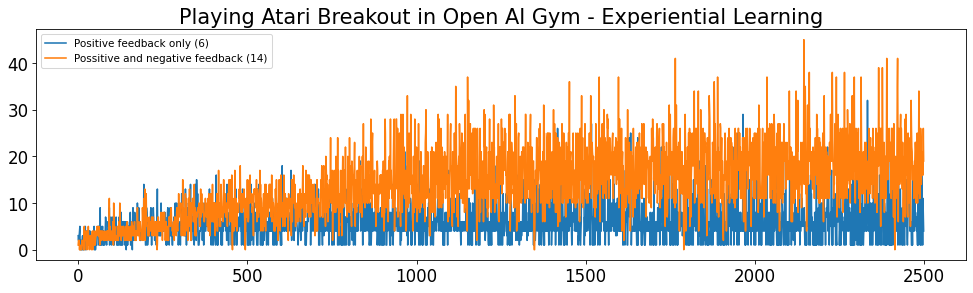

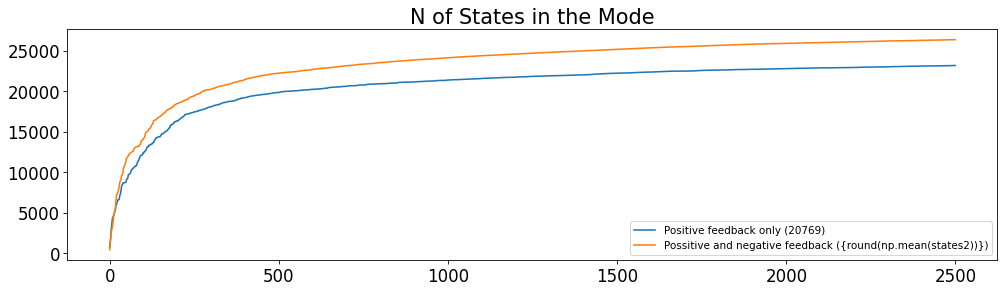

In [19]:
# 2025-11-06
# learn_mode=1/2, T=1, state count_threshold=2, similarity_threshold=0.99999, transition utility_thereshold=1, count_threshold=1
scores1 = [3.0, 2.0, 3.0, 3.0, 4.0, 5.0, 0, 2.0, 2.0, 0, 0, 0, 2.0, 3.0, 0, 0, 0, 0, 1.0, 3.0, 1.0, 5.0, 0, 0, 4.0, 2.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 1.0, 4.0, 3.0, 4.0, 3.0, 3.0, 1.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 5.0, 0, 0, 2.0, 0, 1.0, 1.0, 1.0, 1.0, 4.0, 4.0, 5.0, 4.0, 5.0, 1.0, 1.0, 1.0, 2.0, 9.0, 1.0, 5.0, 1.0, 1.0, 4.0, 4.0, 5.0, 1.0, 1.0, 4.0, 1.0, 1.0, 1.0, 2.0, 4.0, 7.0, 6.0, 2.0, 1.0, 4.0, 4.0, 2.0, 6.0, 5.0, 5.0, 5.0, 9.0, 1.0, 7.0, 5.0, 5.0, 6.0, 3.0, 1.0, 7.0, 2.0, 4.0, 2.0, 7.0, 1.0, 1.0, 4.0, 4.0, 2.0, 4.0, 4.0, 7.0, 4.0, 1.0, 1.0, 4.0, 4.0, 1.0, 1.0, 1.0, 7.0, 2.0, 5.0, 1.0, 1.0, 4.0, 8.0, 1.0, 6.0, 5.0, 1.0, 6.0, 6.0, 6.0, 5.0, 6.0, 3.0, 1.0, 1.0, 4.0, 6.0, 0, 4.0, 1.0, 6.0, 1.0, 5.0, 4.0, 5.0, 2.0, 3.0, 6.0, 2.0, 8.0, 1.0, 1.0, 1.0, 5.0, 4.0, 0, 6.0, 9.0, 4.0, 2.0, 5.0, 4.0, 8.0, 6.0, 2.0, 6.0, 4.0, 5.0, 4.0, 5.0, 10.0, 8.0, 5.0, 4.0, 9.0, 4.0, 4.0, 6.0, 6.0, 2.0, 2.0, 4.0, 4.0, 4.0, 4.0, 4.0, 6.0, 4.0, 4.0, 14.0, 4.0, 4.0, 4.0, 5.0, 1.0, 1.0, 1.0, 9.0, 8.0, 6.0, 1.0, 2.0, 3.0, 5.0, 4.0, 3.0, 4.0, 3.0, 3.0, 8.0, 9.0, 6.0, 1.0, 5.0, 4.0, 6.0, 6.0, 9.0, 7.0, 4.0, 5.0, 2.0, 4.0, 3.0, 3.0, 3.0, 1.0, 5.0, 7.0, 13.0, 4.0, 6.0, 4.0, 3.0, 5.0, 4.0, 3.0, 6.0, 3.0, 3.0, 10.0, 7.0, 4.0, 4.0, 4.0, 4.0, 7.0, 6.0, 4.0, 8.0, 4.0, 8.0, 4.0, 7.0, 3.0, 1.0, 5.0, 1.0, 4.0, 8.0, 9.0, 8.0, 7.0, 4.0, 1.0, 4.0, 5.0, 9.0, 3.0, 3.0, 4.0, 6.0, 3.0, 1.0, 1.0, 4.0, 4.0, 4.0, 7.0, 5.0, 4.0, 4.0, 10.0, 4.0, 7.0, 4.0, 10.0, 4.0, 4.0, 8.0, 9.0, 1.0, 3.0, 4.0, 5.0, 4.0, 6.0, 1.0, 5.0, 5.0, 7.0, 12.0, 5.0, 9.0, 4.0, 5.0, 7.0, 4.0, 3.0, 4.0, 4.0, 3.0, 13.0, 8.0, 7.0, 1.0, 5.0, 3.0, 9.0, 5.0, 4.0, 10.0, 9.0, 5.0, 4.0, 5.0, 8.0, 14.0, 3.0, 9.0, 2.0, 4.0, 4.0, 7.0, 4.0, 8.0, 8.0, 8.0, 1.0, 4.0, 6.0, 4.0, 14.0, 4.0, 2.0, 15.0, 11.0, 4.0, 12.0, 4.0, 1.0, 1.0, 1.0, 2.0, 4.0, 4.0, 4.0, 5.0, 8.0, 5.0, 10.0, 6.0, 2.0, 5.0, 4.0, 7.0, 1.0, 10.0, 5.0, 7.0, 4.0, 4.0, 4.0, 6.0, 6.0, 7.0, 5.0, 5.0, 7.0, 8.0, 4.0, 4.0, 5.0, 13.0, 4.0, 8.0, 4.0, 3.0, 1.0, 5.0, 4.0, 10.0, 6.0, 1.0, 1.0, 2.0, 4.0, 6.0, 4.0, 10.0, 4.0, 1.0, 12.0, 16.0, 5.0, 6.0, 1.0, 7.0, 1.0, 4.0, 10.0, 6.0, 7.0, 4.0, 9.0, 6.0, 4.0, 4.0, 1.0, 6.0, 4.0, 1.0, 7.0, 8.0, 4.0, 9.0, 5.0, 11.0, 7.0, 9.0, 5.0, 9.0, 4.0, 6.0, 2.0, 14.0, 5.0, 8.0, 5.0, 1.0, 1.0, 5.0, 4.0, 4.0, 4.0, 14.0, 9.0, 4.0, 1.0, 5.0, 6.0, 6.0, 1.0, 8.0, 4.0, 5.0, 6.0, 1.0, 4.0, 4.0, 8.0, 13.0, 9.0, 1.0, 1.0, 4.0, 5.0, 6.0, 4.0, 4.0, 7.0, 5.0, 5.0, 6.0, 12.0, 8.0, 4.0, 4.0, 1.0, 6.0, 9.0, 13.0, 5.0, 5.0, 1.0, 4.0, 4.0, 8.0, 4.0, 6.0, 4.0, 8.0, 4.0, 8.0, 4.0, 1.0, 1.0, 1.0, 8.0, 4.0, 1.0, 4.0, 6.0, 12.0, 1.0, 12.0, 14.0, 2.0, 8.0, 8.0, 4.0, 5.0, 6.0, 1.0, 4.0, 10.0, 4.0, 6.0, 5.0, 4.0, 8.0, 4.0, 4.0, 1.0, 1.0, 1.0, 1.0, 6.0, 4.0, 14.0, 7.0, 8.0, 5.0, 8.0, 1.0, 8.0, 4.0, 6.0, 1.0, 6.0, 1.0, 1.0, 5.0, 4.0, 6.0, 2.0, 4.0, 4.0, 6.0, 9.0, 5.0, 5.0, 1.0, 4.0, 6.0, 4.0, 4.0, 1.0, 6.0, 8.0, 4.0, 4.0, 8.0, 4.0, 4.0, 8.0, 4.0, 4.0, 4.0, 11.0, 6.0, 1.0, 1.0, 8.0, 5.0, 6.0, 1.0, 4.0, 4.0, 4.0, 5.0, 1.0, 1.0, 3.0, 9.0, 4.0, 2.0, 8.0, 12.0, 4.0, 9.0, 4.0, 3.0, 1.0, 1.0, 4.0, 1.0, 13.0, 18.0, 4.0, 6.0, 7.0, 11.0, 4.0, 5.0, 4.0, 4.0, 6.0, 6.0, 5.0, 11.0, 4.0, 11.0, 4.0, 4.0, 4.0, 6.0, 8.0, 6.0, 5.0, 6.0, 4.0, 5.0, 5.0, 17.0, 10.0, 2.0, 11.0, 4.0, 6.0, 12.0, 4.0, 4.0, 2.0, 10.0, 6.0, 4.0, 6.0, 6.0, 8.0, 9.0, 6.0, 5.0, 4.0, 4.0, 1.0, 3.0, 4.0, 6.0, 7.0, 6.0, 4.0, 6.0, 2.0, 4.0, 6.0, 9.0, 8.0, 4.0, 7.0, 5.0, 6.0, 8.0, 5.0, 6.0, 6.0, 1.0, 1.0, 6.0, 1.0, 4.0, 6.0, 4.0, 8.0, 6.0, 9.0, 13.0, 15.0, 8.0, 8.0, 9.0, 12.0, 1.0, 6.0, 12.0, 5.0, 10.0, 4.0, 6.0, 7.0, 5.0, 4.0, 8.0, 7.0, 5.0, 14.0, 10.0, 8.0, 4.0, 4.0, 9.0, 6.0, 9.0, 6.0, 7.0, 13.0, 1.0, 1.0, 1.0, 1.0, 10.0, 9.0, 4.0, 4.0, 4.0, 7.0, 4.0, 1.0, 8.0, 4.0, 4.0, 3.0, 6.0, 7.0, 4.0, 8.0, 4.0, 4.0, 7.0, 10.0, 10.0, 14.0, 4.0, 6.0, 8.0, 8.0, 1.0, 4.0, 4.0, 13.0, 4.0, 8.0, 8.0, 4.0, 8.0, 1.0, 1.0, 11.0, 5.0, 6.0, 5.0, 1.0, 5.0, 8.0, 4.0, 6.0, 5.0, 4.0, 16.0, 4.0, 19.0, 9.0, 1.0, 8.0, 8.0, 6.0, 1.0, 9.0, 6.0, 8.0, 7.0, 12.0, 1.0, 5.0, 1.0, 5.0, 6.0, 1.0, 1.0, 10.0, 8.0, 9.0, 1.0, 7.0, 6.0, 7.0, 1.0, 1.0, 6.0, 6.0, 13.0, 8.0, 6.0, 8.0, 1.0, 4.0, 8.0, 1.0, 6.0, 7.0, 4.0, 4.0, 5.0, 10.0, 4.0, 2.0, 8.0, 4.0, 6.0, 1.0, 7.0, 9.0, 4.0, 13.0, 1.0, 8.0, 8.0, 6.0, 4.0, 8.0, 4.0, 9.0, 4.0, 6.0, 9.0, 9.0, 12.0, 9.0, 10.0, 19.0, 4.0, 12.0, 5.0, 7.0, 13.0, 6.0, 1.0, 11.0, 4.0, 8.0, 4.0, 4.0, 9.0, 4.0, 6.0, 5.0, 4.0, 15.0, 9.0, 15.0, 6.0, 6.0, 4.0, 11.0, 7.0, 1.0, 1.0, 2.0, 6.0, 10.0, 1.0, 1.0, 4.0, 6.0, 9.0, 4.0, 7.0, 6.0, 5.0, 4.0, 8.0, 7.0, 6.0, 5.0, 12.0, 4.0, 4.0, 9.0, 8.0, 1.0, 3.0, 8.0, 5.0, 8.0, 1.0, 4.0, 4.0, 1.0, 7.0, 9.0, 4.0, 1.0, 1.0, 11.0, 4.0, 1.0, 1.0, 11.0, 4.0, 1.0, 6.0, 12.0, 4.0, 5.0, 10.0, 1.0, 1.0, 1.0, 6.0, 8.0, 4.0, 13.0, 9.0, 6.0, 8.0, 4.0, 1.0, 6.0, 1.0, 8.0, 4.0, 6.0, 3.0, 4.0, 9.0, 14.0, 1.0, 6.0, 7.0, 13.0, 4.0, 8.0, 7.0, 9.0, 5.0, 8.0, 6.0, 6.0, 4.0, 4.0, 4.0, 22.0, 4.0, 4.0, 4.0, 8.0, 4.0, 1.0, 1.0, 5.0, 2.0, 5.0, 11.0, 9.0, 4.0, 8.0, 4.0, 8.0, 19.0, 4.0, 21.0, 6.0, 4.0, 8.0, 4.0, 4.0, 9.0, 3.0, 18.0, 1.0, 4.0, 4.0, 6.0, 4.0, 8.0, 5.0, 5.0, 11.0, 10.0, 1.0, 6.0, 1.0, 3.0, 5.0, 12.0, 12.0, 10.0, 8.0, 12.0, 6.0, 1.0, 5.0, 11.0, 15.0, 4.0, 5.0, 9.0, 4.0, 14.0, 4.0, 9.0, 5.0, 1.0, 6.0, 19.0, 10.0, 1.0, 9.0, 4.0, 6.0, 7.0, 8.0, 1.0, 10.0, 1.0, 12.0, 4.0, 4.0, 4.0, 6.0, 5.0, 3.0, 1.0, 7.0, 6.0, 1.0, 1.0, 3.0, 3.0, 9.0, 5.0, 10.0, 5.0, 13.0, 9.0, 4.0, 7.0, 1.0, 8.0, 5.0, 4.0, 4.0, 5.0, 6.0, 1.0, 1.0, 8.0, 14.0, 6.0, 4.0, 17.0, 5.0, 7.0, 5.0, 4.0, 6.0, 6.0, 8.0, 11.0, 24.0, 8.0, 4.0, 6.0, 6.0, 12.0, 7.0, 4.0, 8.0, 6.0, 4.0, 12.0, 4.0, 12.0, 1.0, 6.0, 1.0, 6.0, 1.0, 1.0, 7.0, 8.0, 6.0, 4.0, 4.0, 8.0, 7.0, 6.0, 1.0, 9.0, 4.0, 17.0, 5.0, 4.0, 9.0, 8.0, 4.0, 11.0, 6.0, 4.0, 6.0, 5.0, 6.0, 10.0, 9.0, 8.0, 17.0, 4.0, 9.0, 4.0, 11.0, 10.0, 5.0, 8.0, 5.0, 4.0, 8.0, 4.0, 4.0, 4.0, 6.0, 6.0, 7.0, 12.0, 4.0, 4.0, 4.0, 1.0, 6.0, 5.0, 4.0, 6.0, 6.0, 4.0, 4.0, 6.0, 5.0, 6.0, 6.0, 4.0, 6.0, 5.0, 6.0, 9.0, 4.0, 4.0, 11.0, 6.0, 1.0, 8.0, 4.0, 11.0, 8.0, 1.0, 10.0, 10.0, 4.0, 6.0, 1.0, 1.0, 8.0, 1.0, 10.0, 6.0, 4.0, 8.0, 4.0, 4.0, 13.0, 5.0, 4.0, 8.0, 1.0, 6.0, 5.0, 6.0, 7.0, 9.0, 7.0, 1.0, 4.0, 11.0, 1.0, 1.0, 9.0, 11.0, 4.0, 4.0, 13.0, 4.0, 8.0, 14.0, 4.0, 6.0, 16.0, 13.0, 4.0, 6.0, 22.0, 2.0, 4.0, 9.0, 7.0, 10.0, 7.0, 4.0, 8.0, 6.0, 2.0, 1.0, 4.0, 1.0, 6.0, 4.0, 5.0, 1.0, 16.0, 4.0, 1.0, 10.0, 6.0, 4.0, 10.0, 12.0, 4.0, 4.0, 5.0, 4.0, 14.0, 4.0, 6.0, 9.0, 18.0, 10.0, 4.0, 6.0, 5.0, 6.0, 1.0, 10.0, 12.0, 8.0, 1.0, 21.0, 10.0, 6.0, 1.0, 6.0, 7.0, 8.0, 1.0, 5.0, 12.0, 4.0, 8.0, 3.0, 4.0, 4.0, 8.0, 6.0, 10.0, 12.0, 6.0, 3.0, 15.0, 1.0, 4.0, 6.0, 6.0, 5.0, 4.0, 1.0, 5.0, 1.0, 5.0, 15.0, 10.0, 6.0, 1.0, 5.0, 7.0, 8.0, 4.0, 4.0, 6.0, 7.0, 4.0, 6.0, 11.0, 7.0, 2.0, 12.0, 4.0, 16.0, 4.0, 4.0, 2.0, 14.0, 4.0, 19.0, 1.0, 6.0, 2.0, 6.0, 2.0, 6.0, 3.0, 3.0, 5.0, 4.0, 10.0, 15.0, 4.0, 13.0, 4.0, 6.0, 4.0, 19.0, 8.0, 4.0, 18.0, 4.0, 5.0, 2.0, 6.0, 6.0, 3.0, 8.0, 4.0, 11.0, 4.0, 4.0, 15.0, 4.0, 7.0, 4.0, 6.0, 4.0, 9.0, 6.0, 5.0, 11.0, 1.0, 15.0, 1.0, 6.0, 10.0, 2.0, 4.0, 4.0, 5.0, 8.0, 21.0, 21.0, 4.0, 5.0, 13.0, 4.0, 12.0, 1.0, 10.0, 9.0, 14.0, 4.0, 13.0, 1.0, 7.0, 4.0, 17.0, 5.0, 6.0, 3.0, 1.0, 6.0, 1.0, 16.0, 9.0, 4.0, 6.0, 5.0, 4.0, 19.0, 4.0, 4.0, 12.0, 4.0, 6.0, 1.0, 5.0, 12.0, 4.0, 13.0, 11.0, 5.0, 10.0, 1.0, 4.0, 6.0, 14.0, 17.0, 4.0, 8.0, 8.0, 13.0, 8.0, 4.0, 6.0, 1.0, 5.0, 18.0, 4.0, 4.0, 4.0, 26.0, 7.0, 10.0, 11.0, 1.0, 5.0, 3.0, 19.0, 4.0, 14.0, 1.0, 13.0, 4.0, 14.0, 13.0, 11.0, 6.0, 3.0, 1.0, 1.0, 7.0, 1.0, 6.0, 16.0, 11.0, 6.0, 7.0, 4.0, 1.0, 10.0, 21.0, 16.0, 4.0, 14.0, 4.0, 9.0, 10.0, 10.0, 7.0, 5.0, 13.0, 4.0, 1.0, 5.0, 4.0, 6.0, 8.0, 6.0, 8.0, 13.0, 17.0, 4.0, 4.0, 6.0, 5.0, 4.0, 16.0, 4.0, 10.0, 14.0, 4.0, 1.0, 3.0, 2.0, 6.0, 3.0, 7.0, 1.0, 1.0, 4.0, 6.0, 23.0, 10.0, 14.0, 12.0, 10.0, 11.0, 13.0, 12.0, 1.0, 7.0, 3.0, 5.0, 4.0, 21.0, 4.0, 11.0, 4.0, 6.0, 5.0, 14.0, 13.0, 5.0, 5.0, 4.0, 12.0, 1.0, 6.0, 10.0, 20.0, 27.0, 11.0, 6.0, 1.0, 5.0, 7.0, 1.0, 11.0, 10.0, 8.0, 1.0, 4.0, 10.0, 5.0, 6.0, 10.0, 17.0, 4.0, 6.0, 1.0, 16.0, 5.0, 10.0, 4.0, 6.0, 1.0, 12.0, 4.0, 20.0, 4.0, 13.0, 10.0, 11.0, 6.0, 9.0, 9.0, 11.0, 4.0, 6.0, 13.0, 7.0, 1.0, 6.0, 6.0, 4.0, 6.0, 4.0, 5.0, 6.0, 15.0, 6.0, 1.0, 13.0, 14.0, 8.0, 15.0, 4.0, 8.0, 8.0, 4.0, 10.0, 5.0, 8.0, 6.0, 5.0, 17.0, 4.0, 14.0, 4.0, 4.0, 6.0, 7.0, 3.0, 10.0, 5.0, 3.0, 8.0, 11.0, 5.0, 4.0, 7.0, 12.0, 4.0, 4.0, 17.0, 4.0, 14.0, 14.0, 4.0, 4.0, 4.0, 4.0, 10.0, 1.0, 1.0, 17.0, 6.0, 9.0, 6.0, 1.0, 4.0, 8.0, 8.0, 6.0, 16.0, 10.0, 1.0, 1.0, 6.0, 9.0, 9.0, 8.0, 24.0, 7.0, 11.0, 15.0, 25.0, 8.0, 1.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 15.0, 8.0, 4.0, 14.0, 4.0, 7.0, 6.0, 6.0, 4.0, 1.0, 19.0, 1.0, 24.0, 1.0, 12.0, 4.0, 11.0, 15.0, 8.0, 5.0, 6.0, 4.0, 6.0, 1.0, 10.0, 1.0, 3.0, 4.0, 6.0, 4.0, 11.0, 6.0, 1.0, 5.0, 1.0, 4.0, 12.0, 8.0, 4.0, 4.0, 7.0, 5.0, 4.0, 4.0, 4.0, 6.0, 4.0, 6.0, 1.0, 8.0, 6.0, 3.0, 1.0, 6.0, 4.0, 8.0, 4.0, 1.0, 4.0, 1.0, 15.0, 4.0, 4.0, 6.0, 1.0, 4.0, 4.0, 1.0, 6.0, 6.0, 4.0, 9.0, 4.0, 4.0, 6.0, 4.0, 10.0, 1.0, 13.0, 4.0, 8.0, 15.0, 22.0, 6.0, 11.0, 4.0, 6.0, 1.0, 16.0, 12.0, 8.0, 1.0, 15.0, 7.0, 10.0, 4.0, 4.0, 1.0, 9.0, 19.0, 10.0, 6.0, 4.0, 20.0, 15.0, 4.0, 6.0, 1.0, 1.0, 6.0, 1.0, 6.0, 16.0, 4.0, 14.0, 1.0, 8.0, 8.0, 1.0, 20.0, 5.0, 4.0, 15.0, 1.0, 4.0, 12.0, 4.0, 13.0, 1.0, 8.0, 1.0, 8.0, 4.0, 8.0, 6.0, 5.0, 7.0, 4.0, 13.0, 5.0, 6.0, 5.0, 8.0, 6.0, 3.0, 4.0, 6.0, 8.0, 6.0, 1.0, 6.0, 1.0, 6.0, 5.0, 4.0, 18.0, 1.0, 11.0, 8.0, 18.0, 1.0, 8.0, 6.0, 1.0, 9.0, 5.0, 1.0, 4.0, 10.0, 17.0, 9.0, 10.0, 1.0, 12.0, 10.0, 6.0, 1.0, 15.0, 5.0, 6.0, 5.0, 16.0, 20.0, 4.0, 6.0, 11.0, 5.0, 4.0, 9.0, 9.0, 1.0, 18.0, 4.0, 8.0, 19.0, 3.0, 9.0, 1.0, 6.0, 4.0, 10.0, 1.0, 18.0, 5.0, 6.0, 1.0, 23.0, 12.0, 4.0, 6.0, 2.0, 4.0, 1.0, 18.0, 5.0, 13.0, 5.0, 1.0, 13.0, 1.0, 4.0, 4.0, 1.0, 6.0, 5.0, 6.0, 5.0, 15.0, 6.0, 1.0, 4.0, 11.0, 15.0, 4.0, 1.0, 18.0, 14.0, 4.0, 4.0, 5.0, 4.0, 11.0, 19.0, 10.0, 4.0, 6.0, 5.0, 7.0, 1.0, 22.0, 10.0, 1.0, 5.0, 2.0, 10.0, 8.0, 1.0, 8.0, 6.0, 1.0, 8.0, 4.0, 10.0, 9.0, 1.0, 4.0, 1.0, 12.0, 6.0, 1.0, 5.0, 6.0, 5.0, 6.0, 1.0, 8.0, 4.0, 4.0, 14.0, 5.0, 1.0, 21.0, 6.0, 5.0, 11.0, 7.0, 10.0, 11.0, 1.0, 12.0, 4.0, 14.0, 5.0, 22.0, 9.0, 7.0, 1.0, 10.0, 13.0, 9.0, 4.0, 5.0, 4.0, 15.0, 4.0, 10.0, 1.0, 4.0, 25.0, 4.0, 4.0, 1.0, 6.0, 4.0, 8.0, 4.0, 8.0, 5.0, 4.0, 6.0, 5.0, 4.0, 4.0, 29.0, 4.0, 4.0, 9.0, 4.0, 4.0, 1.0, 5.0, 1.0, 5.0, 21.0, 4.0, 8.0, 4.0, 6.0, 1.0, 6.0, 7.0, 15.0, 4.0, 14.0, 4.0, 7.0, 9.0, 1.0, 21.0, 9.0, 5.0, 4.0, 11.0, 4.0, 8.0, 14.0, 1.0, 5.0, 8.0, 7.0, 1.0, 8.0, 4.0, 8.0, 22.0, 8.0, 4.0, 8.0, 12.0, 8.0, 1.0, 22.0, 4.0, 4.0, 5.0, 6.0, 1.0, 10.0, 1.0, 13.0, 8.0, 12.0, 8.0, 4.0, 4.0, 4.0, 4.0, 4.0, 18.0, 18.0, 13.0, 1.0, 8.0, 20.0, 9.0, 4.0, 6.0, 1.0, 3.0, 8.0, 4.0, 8.0, 1.0, 1.0, 4.0, 1.0, 13.0, 13.0, 1.0, 12.0, 8.0, 8.0, 13.0, 1.0, 8.0, 14.0, 4.0, 12.0, 14.0, 13.0, 21.0, 5.0, 4.0, 1.0, 12.0, 1.0, 9.0, 9.0, 1.0, 6.0, 1.0, 8.0, 4.0, 4.0, 1.0, 6.0, 1.0, 4.0, 8.0, 14.0, 10.0, 8.0, 4.0, 1.0, 8.0, 8.0, 5.0, 12.0, 1.0, 20.0, 4.0, 6.0, 6.0, 1.0, 4.0, 1.0, 6.0, 3.0, 1.0, 4.0, 4.0, 16.0, 6.0, 4.0, 4.0, 7.0, 1.0, 6.0, 7.0, 4.0, 8.0, 6.0, 2.0, 4.0, 4.0, 5.0, 1.0, 12.0, 8.0, 4.0, 9.0, 4.0, 4.0, 5.0, 8.0, 8.0, 5.0, 4.0, 8.0, 8.0, 12.0, 1.0, 4.0, 4.0, 4.0, 6.0, 5.0, 11.0, 6.0, 6.0, 5.0, 7.0, 8.0, 6.0, 9.0, 4.0, 1.0, 4.0, 3.0, 1.0, 6.0, 1.0, 12.0, 11.0, 9.0, 13.0, 5.0, 14.0, 1.0, 8.0, 5.0, 8.0, 1.0, 16.0, 4.0, 12.0, 6.0, 7.0, 4.0, 6.0, 1.0, 6.0, 1.0, 6.0, 1.0, 8.0, 6.0, 1.0, 8.0, 1.0, 16.0, 1.0, 7.0, 8.0, 5.0, 2.0, 9.0, 1.0, 11.0, 15.0, 13.0, 1.0, 1.0, 6.0, 10.0, 1.0, 4.0, 10.0, 1.0, 8.0, 4.0, 7.0, 16.0, 9.0, 4.0, 6.0, 6.0, 1.0, 8.0, 7.0, 9.0, 8.0, 11.0, 22.0, 4.0, 14.0, 12.0, 6.0, 1.0, 4.0, 7.0, 5.0, 8.0, 5.0, 16.0, 17.0, 1.0, 9.0, 1.0, 8.0, 5.0, 11.0, 6.0, 5.0, 8.0, 12.0, 6.0, 1.0, 6.0, 2.0, 1.0, 11.0, 12.0, 6.0, 8.0, 9.0, 6.0, 20.0, 1.0, 4.0, 1.0, 18.0, 10.0, 1.0, 4.0, 8.0, 6.0, 7.0, 7.0, 4.0, 6.0, 6.0, 1.0, 1.0, 8.0, 11.0, 12.0, 1.0, 8.0, 6.0, 9.0, 12.0, 4.0, 4.0, 9.0, 13.0, 4.0, 8.0, 9.0, 5.0, 8.0, 1.0, 6.0, 1.0, 1.0, 14.0, 1.0, 13.0, 1.0, 16.0, 1.0, 1.0, 1.0, 1.0, 11.0, 7.0, 2.0, 8.0, 5.0, 17.0, 11.0, 1.0, 6.0, 14.0, 5.0, 1.0, 17.0, 10.0, 7.0, 1.0, 10.0, 1.0, 9.0, 1.0, 4.0, 5.0, 14.0, 6.0, 1.0, 1.0, 4.0, 9.0, 4.0, 5.0, 10.0, 13.0, 4.0, 4.0, 5.0, 4.0, 14.0, 32.0, 18.0, 12.0, 4.0, 4.0, 18.0, 6.0, 1.0, 4.0, 10.0, 4.0, 1.0, 6.0, 3.0, 10.0, 1.0, 6.0, 4.0, 15.0, 4.0, 8.0, 15.0, 18.0, 18.0, 5.0, 1.0, 4.0, 4.0, 12.0, 1.0, 7.0, 12.0, 1.0, 4.0, 10.0, 4.0, 16.0, 6.0, 1.0, 6.0, 5.0, 9.0, 1.0, 14.0, 16.0, 5.0, 11.0, 14.0, 4.0, 1.0, 10.0, 9.0, 6.0, 1.0, 8.0, 1.0, 6.0, 1.0, 7.0, 19.0, 4.0, 5.0, 21.0, 9.0, 1.0, 4.0, 1.0, 4.0, 12.0, 1.0, 11.0, 1.0, 6.0, 14.0, 9.0, 1.0, 4.0, 5.0, 4.0, 11.0, 4.0, 1.0, 17.0, 4.0, 6.0, 9.0, 4.0, 13.0, 6.0, 6.0, 1.0, 16.0, 14.0, 5.0, 3.0, 9.0, 1.0, 13.0, 4.0, 4.0, 6.0, 6.0, 1.0, 9.0, 5.0, 1.0, 4.0, 11.0, 4.0, 1.0, 1.0, 15.0, 11.0, 5.0, 14.0, 15.0, 6.0, 3.0, 1.0, 4.0, 24.0, 18.0, 10.0, 20.0, 11.0, 4.0, 15.0, 9.0, 4.0, 6.0, 1.0, 1.0, 6.0, 1.0, 17.0, 4.0, 4.0, 9.0, 4.0, 9.0, 14.0, 5.0, 8.0, 6.0, 5.0, 4.0, 7.0, 3.0, 1.0, 10.0, 1.0, 22.0, 11.0, 5.0, 8.0, 9.0, 1.0, 12.0, 8.0, 1.0, 18.0, 14.0, 9.0, 1.0, 11.0, 7.0, 4.0]
states1 = [736, 1039, 1589, 1937, 2774, 3103, 3335, 3849, 4283, 4428, 4464, 4621, 4696, 4865, 4987, 5081, 5252, 5429, 5704, 5910, 5986, 6219, 6276, 6364, 6588, 6596, 6602, 6607, 6667, 6902, 7148, 7265, 7351, 7657, 7852, 8281, 8384, 8423, 8441, 8659, 8690, 8690, 8691, 8693, 8701, 8723, 8725, 8753, 8778, 8953, 9109, 9197, 9203, 9223, 9386, 9657, 9732, 9762, 9773, 9809, 9854, 9864, 10031, 10120, 10257, 10319, 10333, 10445, 10480, 10494, 10528, 10537, 10606, 10613, 10709, 10759, 10759, 10767, 10767, 10869, 10890, 11132, 11203, 11289, 11395, 11447, 11471, 11693, 11762, 11794, 11942, 12051, 12085, 12086, 12106, 12121, 12139, 12158, 12374, 12375, 12406, 12463, 12463, 12563, 12615, 12639, 12646, 12716, 12748, 12966, 13041, 13094, 13157, 13164, 13164, 13164, 13352, 13370, 13385, 13385, 13392, 13417, 13469, 13485, 13491, 13492, 13576, 13610, 13610, 13700, 13730, 13740, 13920, 13956, 14026, 14069, 14154, 14263, 14263, 14263, 14297, 14331, 14339, 14346, 14371, 14376, 14376, 14386, 14390, 14392, 14461, 14579, 14602, 14659, 14763, 14763, 14763, 14770, 14784, 14789, 14831, 14893, 14950, 14953, 14999, 15040, 15041, 15043, 15117, 15143, 15172, 15179, 15292, 15330, 15368, 15408, 15498, 15510, 15511, 15765, 15776, 15779, 15879, 15886, 15916, 15929, 15940, 15941, 16062, 16068, 16132, 16144, 16247, 16257, 16269, 16272, 16278, 16289, 16347, 16348, 16348, 16349, 16358, 16373, 16470, 16478, 16546, 16570, 16597, 16599, 16630, 16697, 16714, 16742, 16815, 16824, 16859, 16874, 16916, 16940, 16964, 16992, 17107, 17141, 17142, 17142, 17166, 17169, 17182, 17191, 17198, 17198, 17199, 17209, 17236, 17237, 17264, 17265, 17303, 17321, 17321, 17333, 17360, 17368, 17375, 17385, 17390, 17390, 17433, 17450, 17460, 17463, 17472, 17475, 17482, 17487, 17503, 17503, 17567, 17567, 17567, 17575, 17578, 17591, 17603, 17631, 17639, 17682, 17684, 17686, 17701, 17703, 17712, 17724, 17753, 17754, 17770, 17772, 17779, 17782, 17792, 17841, 17843, 17870, 17876, 17880, 17901, 17922, 17936, 17982, 17982, 18014, 18016, 18021, 18026, 18076, 18078, 18085, 18091, 18092, 18098, 18123, 18123, 18126, 18157, 18180, 18191, 18209, 18231, 18231, 18238, 18284, 18284, 18288, 18299, 18304, 18306, 18328, 18336, 18350, 18351, 18352, 18354, 18376, 18378, 18380, 18454, 18463, 18475, 18475, 18485, 18504, 18545, 18566, 18573, 18593, 18596, 18599, 18620, 18628, 18631, 18637, 18641, 18642, 18643, 18666, 18677, 18694, 18697, 18707, 18735, 18745, 18746, 18764, 18764, 18764, 18764, 18764, 18767, 18768, 18771, 18774, 18797, 18811, 18811, 18828, 18832, 18838, 18838, 18838, 18843, 18843, 18896, 18896, 18931, 18932, 18936, 18961, 19000, 19036, 19046, 19048, 19049, 19052, 19058, 19065, 19070, 19083, 19157, 19161, 19163, 19166, 19166, 19172, 19177, 19186, 19207, 19213, 19213, 19213, 19216, 19222, 19229, 19237, 19271, 19272, 19274, 19287, 19302, 19305, 19323, 19323, 19354, 19355, 19368, 19392, 19397, 19400, 19404, 19415, 19422, 19434, 19434, 19434, 19451, 19454, 19454, 19467, 19470, 19472, 19476, 19485, 19492, 19508, 19512, 19524, 19525, 19525, 19528, 19529, 19538, 19547, 19554, 19567, 19567, 19567, 19567, 19580, 19589, 19594, 19612, 19619, 19623, 19623, 19626, 19626, 19630, 19631, 19632, 19634, 19634, 19636, 19636, 19637, 19643, 19685, 19691, 19694, 19694, 19694, 19708, 19714, 19718, 19719, 19721, 19729, 19735, 19736, 19739, 19763, 19770, 19783, 19793, 19793, 19793, 19794, 19822, 19823, 19825, 19827, 19831, 19832, 19840, 19840, 19844, 19846, 19851, 19851, 19855, 19859, 19864, 19864, 19864, 19905, 19907, 19907, 19911, 19912, 19937, 19939, 19940, 19963, 19969, 19980, 19983, 19985, 19985, 19991, 19994, 19995, 20005, 20007, 20007, 20008, 20008, 20010, 20010, 20011, 20011, 20011, 20011, 20011, 20014, 20016, 20028, 20046, 20047, 20047, 20052, 20052, 20053, 20053, 20059, 20059, 20060, 20060, 20060, 20060, 20061, 20062, 20062, 20062, 20062, 20072, 20082, 20088, 20091, 20091, 20093, 20105, 20109, 20109, 20109, 20111, 20114, 20132, 20132, 20142, 20142, 20143, 20156, 20156, 20159, 20160, 20162, 20162, 20162, 20163, 20163, 20165, 20178, 20181, 20186, 20187, 20187, 20189, 20189, 20189, 20197, 20203, 20204, 20214, 20215, 20226, 20226, 20233, 20234, 20242, 20242, 20242, 20243, 20243, 20244, 20252, 20254, 20254, 20257, 20271, 20272, 20272, 20272, 20272, 20274, 20275, 20275, 20276, 20281, 20301, 20302, 20302, 20307, 20311, 20313, 20313, 20314, 20317, 20317, 20324, 20325, 20342, 20345, 20352, 20370, 20372, 20372, 20377, 20379, 20379, 20381, 20382, 20384, 20385, 20389, 20396, 20403, 20449, 20458, 20467, 20469, 20469, 20469, 20470, 20474, 20478, 20493, 20497, 20497, 20503, 20504, 20506, 20506, 20509, 20510, 20511, 20514, 20515, 20524, 20529, 20529, 20529, 20534, 20534, 20535, 20535, 20535, 20536, 20537, 20537, 20539, 20545, 20548, 20551, 20563, 20566, 20581, 20589, 20591, 20591, 20592, 20596, 20598, 20605, 20606, 20606, 20615, 20619, 20619, 20622, 20623, 20623, 20636, 20641, 20646, 20649, 20649, 20658, 20660, 20669, 20677, 20680, 20689, 20689, 20689, 20689, 20689, 20690, 20690, 20690, 20690, 20690, 20693, 20693, 20693, 20698, 20701, 20702, 20702, 20706, 20710, 20710, 20718, 20722, 20722, 20736, 20738, 20743, 20763, 20771, 20772, 20779, 20780, 20780, 20781, 20781, 20782, 20782, 20787, 20788, 20788, 20789, 20789, 20789, 20800, 20801, 20802, 20804, 20804, 20825, 20839, 20839, 20839, 20850, 20853, 20865, 20871, 20883, 20884, 20884, 20888, 20891, 20891, 20891, 20893, 20893, 20893, 20896, 20897, 20897, 20897, 20897, 20897, 20897, 20897, 20897, 20907, 20910, 20911, 20911, 20912, 20912, 20912, 20912, 20912, 20912, 20913, 20926, 20931, 20933, 20938, 20938, 20939, 20940, 20940, 20941, 20943, 20943, 20943, 20943, 20944, 20944, 20946, 20948, 20948, 20948, 20948, 20951, 20952, 20952, 20954, 20954, 20956, 20957, 20991, 20992, 20992, 20993, 20995, 20995, 20996, 21003, 21007, 21008, 21011, 21011, 21015, 21018, 21019, 21019, 21021, 21024, 21024, 21024, 21035, 21035, 21035, 21035, 21036, 21045, 21045, 21045, 21045, 21049, 21066, 21070, 21096, 21100, 21104, 21105, 21106, 21109, 21109, 21109, 21109, 21109, 21119, 21119, 21119, 21125, 21126, 21130, 21131, 21134, 21134, 21134, 21134, 21134, 21139, 21139, 21139, 21141, 21141, 21141, 21143, 21144, 21144, 21144, 21147, 21147, 21148, 21148, 21148, 21148, 21148, 21148, 21157, 21161, 21161, 21161, 21162, 21167, 21167, 21167, 21173, 21174, 21174, 21180, 21186, 21189, 21189, 21189, 21189, 21189, 21189, 21191, 21198, 21198, 21200, 21202, 21204, 21206, 21206, 21206, 21206, 21206, 21210, 21212, 21212, 21213, 21222, 21228, 21229, 21229, 21235, 21243, 21244, 21246, 21247, 21252, 21259, 21259, 21263, 21263, 21264, 21265, 21265, 21265, 21267, 21271, 21271, 21274, 21275, 21275, 21275, 21275, 21275, 21277, 21277, 21279, 21280, 21280, 21287, 21289, 21292, 21299, 21301, 21326, 21329, 21329, 21330, 21332, 21332, 21333, 21333, 21338, 21338, 21339, 21339, 21339, 21345, 21345, 21347, 21347, 21347, 21348, 21348, 21348, 21348, 21348, 21350, 21350, 21352, 21356, 21360, 21367, 21368, 21368, 21369, 21373, 21393, 21396, 21398, 21398, 21398, 21398, 21400, 21405, 21405, 21405, 21406, 21413, 21422, 21422, 21425, 21425, 21425, 21428, 21430, 21430, 21434, 21434, 21439, 21441, 21441, 21441, 21441, 21441, 21441, 21441, 21442, 21446, 21446, 21446, 21457, 21457, 21462, 21464, 21468, 21469, 21470, 21471, 21473, 21476, 21477, 21477, 21477, 21477, 21478, 21478, 21478, 21478, 21478, 21478, 21479, 21479, 21479, 21479, 21483, 21489, 21501, 21503, 21504, 21505, 21507, 21508, 21514, 21516, 21516, 21517, 21517, 21529, 21533, 21534, 21536, 21536, 21536, 21540, 21541, 21542, 21545, 21545, 21545, 21545, 21545, 21545, 21545, 21552, 21554, 21555, 21555, 21555, 21559, 21559, 21559, 21563, 21563, 21572, 21578, 21578, 21591, 21591, 21591, 21597, 21602, 21603, 21603, 21605, 21606, 21606, 21606, 21606, 21616, 21627, 21627, 21627, 21634, 21638, 21638, 21639, 21639, 21639, 21641, 21641, 21641, 21641, 21642, 21642, 21643, 21650, 21653, 21657, 21658, 21658, 21660, 21660, 21660, 21662, 21663, 21663, 21663, 21663, 21663, 21664, 21669, 21669, 21671, 21671, 21673, 21673, 21675, 21675, 21682, 21684, 21684, 21687, 21687, 21699, 21700, 21700, 21703, 21708, 21708, 21708, 21708, 21708, 21709, 21709, 21711, 21715, 21716, 21721, 21721, 21721, 21721, 21721, 21722, 21723, 21723, 21723, 21724, 21724, 21725, 21727, 21729, 21729, 21729, 21730, 21730, 21730, 21732, 21732, 21732, 21733, 21734, 21734, 21734, 21739, 21739, 21740, 21746, 21749, 21751, 21752, 21767, 21769, 21770, 21773, 21774, 21774, 21774, 21775, 21775, 21775, 21777, 21777, 21777, 21777, 21777, 21777, 21778, 21778, 21784, 21784, 21784, 21788, 21796, 21796, 21796, 21804, 21807, 21808, 21808, 21809, 21812, 21812, 21813, 21816, 21827, 21837, 21838, 21838, 21838, 21838, 21838, 21841, 21841, 21843, 21843, 21850, 21850, 21850, 21850, 21852, 21853, 21854, 21854, 21854, 21855, 21856, 21857, 21859, 21859, 21859, 21860, 21860, 21866, 21866, 21866, 21869, 21875, 21880, 21881, 21881, 21881, 21881, 21881, 21881, 21881, 21881, 21881, 21882, 21883, 21883, 21883, 21884, 21887, 21887, 21887, 21887, 21887, 21896, 21897, 21897, 21902, 21905, 21905, 21906, 21908, 21912, 21912, 21912, 21913, 21917, 21917, 21920, 21921, 21921, 21921, 21921, 21921, 21921, 21921, 21921, 21921, 21921, 21925, 21927, 21930, 21930, 21931, 21932, 21932, 21938, 21939, 21939, 21945, 21945, 21945, 21947, 21949, 21949, 21949, 21950, 21950, 21951, 21952, 21952, 21953, 21955, 21955, 21955, 21955, 21956, 21956, 21956, 21956, 21958, 21958, 21963, 21964, 21965, 21969, 21971, 21973, 21974, 21974, 21974, 21980, 21984, 21985, 21985, 21985, 21985, 21990, 21990, 21992, 21992, 21999, 21999, 22000, 22000, 22000, 22000, 22003, 22006, 22006, 22006, 22006, 22009, 22009, 22013, 22014, 22015, 22015, 22016, 22016, 22018, 22020, 22020, 22021, 22021, 22022, 22023, 22024, 22027, 22027, 22028, 22032, 22032, 22034, 22038, 22038, 22039, 22039, 22042, 22045, 22045, 22045, 22046, 22046, 22046, 22046, 22046, 22047, 22052, 22052, 22052, 22052, 22057, 22065, 22069, 22073, 22073, 22074, 22080, 22087, 22089, 22092, 22092, 22097, 22100, 22105, 22112, 22114, 22123, 22123, 22123, 22123, 22124, 22124, 22125, 22130, 22131, 22131, 22139, 22144, 22144, 22147, 22151, 22158, 22158, 22164, 22165, 22167, 22173, 22178, 22178, 22178, 22179, 22179, 22179, 22179, 22179, 22180, 22180, 22181, 22183, 22189, 22190, 22190, 22190, 22196, 22196, 22196, 22200, 22200, 22203, 22215, 22215, 22215, 22215, 22215, 22215, 22215, 22218, 22220, 22220, 22220, 22220, 22224, 22225, 22225, 22226, 22227, 22232, 22235, 22235, 22235, 22235, 22235, 22236, 22236, 22241, 22243, 22249, 22249, 22249, 22249, 22250, 22250, 22250, 22250, 22251, 22256, 22256, 22256, 22257, 22260, 22264, 22265, 22270, 22270, 22270, 22270, 22270, 22272, 22272, 22274, 22274, 22274, 22275, 22275, 22275, 22275, 22276, 22278, 22279, 22279, 22284, 22284, 22292, 22292, 22292, 22292, 22293, 22294, 22306, 22307, 22309, 22309, 22313, 22313, 22315, 22317, 22319, 22319, 22325, 22327, 22332, 22332, 22332, 22332, 22332, 22342, 22343, 22343, 22343, 22346, 22349, 22349, 22353, 22354, 22354, 22358, 22358, 22358, 22359, 22360, 22360, 22360, 22362, 22362, 22362, 22372, 22373, 22375, 22375, 22375, 22375, 22375, 22380, 22380, 22380, 22380, 22380, 22382, 22382, 22382, 22383, 22384, 22384, 22384, 22387, 22389, 22389, 22392, 22392, 22392, 22392, 22392, 22399, 22399, 22399, 22401, 22409, 22413, 22413, 22413, 22413, 22417, 22418, 22418, 22418, 22418, 22418, 22418, 22419, 22420, 22420, 22423, 22428, 22438, 22438, 22439, 22443, 22445, 22445, 22445, 22445, 22445, 22451, 22451, 22451, 22455, 22458, 22458, 22462, 22463, 22466, 22466, 22469, 22469, 22469, 22470, 22471, 22486, 22490, 22490, 22490, 22491, 22491, 22491, 22491, 22491, 22492, 22492, 22492, 22495, 22495, 22496, 22496, 22497, 22497, 22499, 22499, 22499, 22499, 22499, 22499, 22501, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22502, 22503, 22507, 22507, 22507, 22507, 22507, 22507, 22507, 22507, 22509, 22510, 22510, 22510, 22510, 22510, 22510, 22510, 22512, 22512, 22512, 22513, 22517, 22517, 22519, 22521, 22521, 22521, 22521, 22521, 22530, 22532, 22533, 22533, 22543, 22550, 22555, 22555, 22555, 22555, 22559, 22569, 22570, 22570, 22570, 22579, 22581, 22581, 22581, 22581, 22581, 22582, 22582, 22582, 22589, 22589, 22590, 22590, 22593, 22594, 22594, 22597, 22598, 22598, 22600, 22600, 22600, 22600, 22602, 22609, 22610, 22610, 22610, 22610, 22610, 22615, 22615, 22615, 22616, 22617, 22619, 22619, 22619, 22619, 22619, 22619, 22619, 22619, 22620, 22623, 22623, 22623, 22623, 22623, 22623, 22623, 22623, 22627, 22627, 22627, 22631, 22631, 22631, 22631, 22631, 22631, 22635, 22635, 22635, 22635, 22635, 22637, 22637, 22640, 22641, 22642, 22643, 22643, 22643, 22644, 22644, 22644, 22644, 22646, 22646, 22647, 22647, 22650, 22650, 22650, 22650, 22652, 22652, 22654, 22660, 22660, 22665, 22668, 22668, 22668, 22668, 22668, 22671, 22671, 22671, 22671, 22671, 22671, 22677, 22681, 22684, 22684, 22684, 22684, 22684, 22688, 22688, 22688, 22688, 22688, 22690, 22690, 22690, 22690, 22690, 22690, 22690, 22691, 22691, 22692, 22692, 22692, 22692, 22692, 22694, 22694, 22694, 22698, 22699, 22700, 22700, 22703, 22703, 22706, 22713, 22714, 22714, 22714, 22714, 22715, 22715, 22719, 22720, 22720, 22721, 22721, 22722, 22723, 22723, 22723, 22723, 22723, 22723, 22723, 22724, 22725, 22725, 22725, 22725, 22726, 22728, 22728, 22728, 22728, 22728, 22728, 22728, 22729, 22729, 22729, 22730, 22734, 22734, 22736, 22736, 22738, 22743, 22746, 22747, 22749, 22749, 22751, 22752, 22753, 22754, 22760, 22760, 22761, 22761, 22761, 22763, 22766, 22766, 22766, 22766, 22767, 22767, 22769, 22769, 22770, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22773, 22777, 22783, 22784, 22784, 22784, 22784, 22784, 22787, 22787, 22787, 22788, 22790, 22790, 22790, 22790, 22790, 22790, 22795, 22797, 22797, 22797, 22797, 22797, 22797, 22797, 22798, 22799, 22799, 22799, 22800, 22801, 22801, 22803, 22803, 22803, 22803, 22804, 22804, 22804, 22804, 22804, 22808, 22808, 22808, 22808, 22810, 22810, 22810, 22814, 22817, 22817, 22817, 22822, 22822, 22822, 22823, 22824, 22824, 22824, 22824, 22824, 22824, 22824, 22827, 22829, 22831, 22838, 22838, 22838, 22838, 22838, 22839, 22841, 22844, 22846, 22846, 22848, 22852, 22853, 22853, 22853, 22853, 22854, 22854, 22854, 22855, 22855, 22855, 22855, 22855, 22855, 22856, 22856, 22856, 22857, 22857, 22859, 22859, 22860, 22860, 22861, 22862, 22862, 22870, 22873, 22876, 22876, 22876, 22876, 22876, 22883, 22883, 22883, 22884, 22884, 22884, 22884, 22884, 22884, 22884, 22884, 22884, 22884, 22884, 22887, 22890, 22890, 22890, 22890, 22890, 22891, 22892, 22892, 22899, 22899, 22899, 22899, 22899, 22899, 22899, 22899, 22899, 22899, 22899, 22899, 22899, 22901, 22902, 22902, 22903, 22903, 22903, 22903, 22903, 22903, 22903, 22904, 22904, 22904, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22907, 22909, 22909, 22909, 22910, 22910, 22910, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22911, 22912, 22915, 22915, 22915, 22917, 22917, 22917, 22917, 22917, 22917, 22917, 22917, 22919, 22920, 22920, 22922, 22924, 22924, 22924, 22924, 22924, 22925, 22925, 22929, 22929, 22930, 22930, 22930, 22931, 22931, 22931, 22931, 22931, 22931, 22931, 22931, 22931, 22931, 22935, 22935, 22938, 22938, 22938, 22939, 22939, 22939, 22939, 22939, 22939, 22943, 22944, 22944, 22944, 22944, 22947, 22947, 22947, 22949, 22949, 22949, 22949, 22950, 22952, 22952, 22952, 22952, 22953, 22953, 22954, 22954, 22958, 22963, 22965, 22970, 22970, 22973, 22979, 22979, 22979, 22979, 22981, 22983, 22984, 22984, 22985, 22986, 22987, 22987, 22987, 22987, 22987, 22990, 22990, 22990, 22990, 22991, 22991, 22991, 22991, 22992, 22992, 22993, 22993, 22994, 22994, 22994, 22994, 23000, 23000, 23000, 23000, 23007, 23007, 23007, 23007, 23007, 23007, 23007, 23007, 23007, 23007, 23007, 23007, 23007, 23009, 23011, 23011, 23011, 23011, 23012, 23014, 23016, 23016, 23016, 23018, 23019, 23022, 23022, 23022, 23023, 23023, 23023, 23024, 23024, 23024, 23024, 23024, 23025, 23025, 23028, 23028, 23028, 23028, 23028, 23030, 23030, 23030, 23030, 23032, 23035, 23037, 23037, 23037, 23040, 23041, 23041, 23049, 23050, 23051, 23051, 23052, 23052, 23052, 23052, 23052, 23052, 23061, 23062, 23062, 23062, 23062, 23062, 23062, 23062, 23062, 23062, 23065, 23065, 23065, 23065, 23066, 23074, 23075, 23078, 23078, 23078, 23080, 23081, 23081, 23081, 23084, 23084, 23084, 23084, 23084, 23087, 23087, 23088, 23089, 23091, 23091, 23091, 23092, 23096, 23097, 23097, 23097, 23097, 23097, 23097, 23097, 23099, 23100, 23100, 23100, 23100, 23102, 23104, 23104, 23104, 23104, 23104, 23106, 23106, 23106, 23107, 23108, 23109, 23112, 23112, 23112, 23113, 23113, 23113, 23113, 23113, 23114, 23114, 23114, 23114, 23120, 23122, 23122, 23124, 23127, 23127, 23127, 23127, 23127, 23128, 23128, 23129, 23129, 23130, 23132, 23132, 23132, 23133, 23133, 23133, 23133, 23133, 23133, 23134, 23134, 23134, 23134, 23134, 23134, 23134, 23134, 23134, 23134, 23134, 23134, 23134, 23137, 23137, 23138, 23139, 23139, 23139, 23139, 23139, 23142, 23142, 23142, 23143, 23143, 23143, 23143, 23143, 23143, 23143, 23143, 23143, 23145, 23145, 23145, 23145, 23145, 23148, 23150, 23151, 23155, 23162, 23162, 23163, 23163, 23163, 23163, 23163, 23163, 23163, 23163, 23167, 23167, 23167, 23168, 23168, 23168, 23171, 23171, 23171, 23171, 23171, 23171, 23171, 23171, 23171, 23171, 23171, 23174, 23177, 23177, 23180, 23183, 23183, 23184, 23184, 23184, 23185, 23189, 23189, 23189, 23189, 23191, 23191]

scores2 = [1.0, 2.0, 2.0, 2.0, 0, 1.0, 0, 0, 0, 0, 0, 2.0, 2.0, 1.0, 1.0, 1.0, 0, 1.0, 5.0, 0, 4.0, 3.0, 2.0, 3.0, 4.0, 3.0, 0, 2.0, 4.0, 1.0, 5.0, 1.0, 2.0, 0, 2.0, 3.0, 3.0, 3.0, 1.0, 0, 2.0, 3.0, 4.0, 0, 1.0, 4.0, 1.0, 2.0, 1.0, 4.0, 1.0, 2.0, 3.0, 4.0, 3.0, 4.0, 5.0, 4.0, 4.0, 3.0, 3.0, 5.0, 3.0, 2.0, 1.0, 2.0, 4.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 2.0, 4.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 4.0, 2.0, 4.0, 4.0, 4.0, 4.0, 11.0, 2.0, 5.0, 3.0, 4.0, 2.0, 3.0, 4.0, 3.0, 3.0, 2.0, 6.0, 1.0, 10.0, 3.0, 3.0, 5.0, 2.0, 3.0, 3.0, 2.0, 2.0, 3.0, 2.0, 5.0, 4.0, 2.0, 2.0, 5.0, 6.0, 3.0, 10.0, 3.0, 4.0, 3.0, 2.0, 3.0, 5.0, 3.0, 3.0, 3.0, 5.0, 5.0, 4.0, 4.0, 2.0, 4.0, 3.0, 5.0, 2.0, 3.0, 4.0, 3.0, 6.0, 2.0, 4.0, 5.0, 2.0, 2.0, 2.0, 3.0, 2.0, 5.0, 3.0, 2.0, 3.0, 6.0, 5.0, 3.0, 3.0, 5.0, 5.0, 3.0, 4.0, 6.0, 6.0, 2.0, 4.0, 3.0, 2.0, 4.0, 3.0, 3.0, 9.0, 5.0, 6.0, 4.0, 3.0, 5.0, 3.0, 2.0, 6.0, 5.0, 4.0, 4.0, 4.0, 4.0, 2.0, 9.0, 7.0, 2.0, 3.0, 4.0, 11.0, 5.0, 13.0, 2.0, 5.0, 6.0, 12.0, 6.0, 7.0, 5.0, 5.0, 3.0, 5.0, 3.0, 3.0, 7.0, 4.0, 6.0, 5.0, 5.0, 4.0, 6.0, 7.0, 7.0, 3.0, 5.0, 5.0, 7.0, 4.0, 3.0, 3.0, 5.0, 6.0, 6.0, 4.0, 3.0, 6.0, 1.0, 0, 1.0, 5.0, 7.0, 7.0, 4.0, 5.0, 4.0, 4.0, 6.0, 4.0, 6.0, 8.0, 4.0, 7.0, 5.0, 2.0, 5.0, 8.0, 6.0, 5.0, 4.0, 8.0, 5.0, 2.0, 2.0, 4.0, 6.0, 3.0, 3.0, 2.0, 2.0, 5.0, 3.0, 2.0, 7.0, 6.0, 7.0, 6.0, 5.0, 8.0, 8.0, 9.0, 6.0, 5.0, 4.0, 4.0, 5.0, 3.0, 6.0, 6.0, 2.0, 7.0, 7.0, 4.0, 4.0, 5.0, 3.0, 8.0, 9.0, 5.0, 4.0, 6.0, 6.0, 12.0, 7.0, 9.0, 8.0, 8.0, 9.0, 10.0, 5.0, 3.0, 5.0, 4.0, 7.0, 15.0, 3.0, 9.0, 8.0, 5.0, 7.0, 3.0, 6.0, 12.0, 6.0, 11.0, 5.0, 5.0, 4.0, 7.0, 2.0, 4.0, 11.0, 6.0, 5.0, 13.0, 7.0, 10.0, 4.0, 2.0, 9.0, 8.0, 10.0, 8.0, 11.0, 8.0, 6.0, 6.0, 8.0, 14.0, 7.0, 9.0, 3.0, 7.0, 3.0, 3.0, 8.0, 7.0, 8.0, 9.0, 9.0, 8.0, 8.0, 10.0, 6.0, 5.0, 6.0, 5.0, 13.0, 7.0, 8.0, 12.0, 8.0, 9.0, 10.0, 9.0, 8.0, 7.0, 6.0, 6.0, 7.0, 8.0, 11.0, 8.0, 9.0, 7.0, 9.0, 10.0, 5.0, 7.0, 11.0, 4.0, 12.0, 5.0, 10.0, 6.0, 3.0, 7.0, 12.0, 6.0, 10.0, 8.0, 7.0, 14.0, 6.0, 9.0, 6.0, 10.0, 6.0, 10.0, 4.0, 3.0, 10.0, 7.0, 8.0, 5.0, 12.0, 4.0, 4.0, 10.0, 8.0, 17.0, 7.0, 10.0, 5.0, 7.0, 5.0, 5.0, 14.0, 12.0, 10.0, 7.0, 9.0, 9.0, 6.0, 9.0, 15.0, 10.0, 8.0, 8.0, 12.0, 8.0, 7.0, 7.0, 10.0, 8.0, 9.0, 5.0, 12.0, 9.0, 11.0, 14.0, 15.0, 9.0, 6.0, 15.0, 8.0, 9.0, 6.0, 9.0, 16.0, 4.0, 0, 9.0, 8.0, 6.0, 4.0, 11.0, 7.0, 17.0, 5.0, 9.0, 11.0, 10.0, 9.0, 4.0, 10.0, 8.0, 8.0, 8.0, 8.0, 10.0, 13.0, 11.0, 13.0, 18.0, 10.0, 11.0, 8.0, 12.0, 9.0, 8.0, 10.0, 12.0, 9.0, 11.0, 13.0, 10.0, 10.0, 2.0, 0, 4.0, 11.0, 9.0, 7.0, 11.0, 15.0, 11.0, 6.0, 6.0, 7.0, 14.0, 15.0, 10.0, 16.0, 12.0, 11.0, 12.0, 10.0, 12.0, 8.0, 9.0, 9.0, 8.0, 3.0, 12.0, 13.0, 12.0, 13.0, 12.0, 12.0, 9.0, 10.0, 15.0, 6.0, 10.0, 13.0, 12.0, 7.0, 7.0, 7.0, 12.0, 10.0, 17.0, 8.0, 14.0, 4.0, 11.0, 10.0, 6.0, 9.0, 6.0, 4.0, 7.0, 12.0, 5.0, 6.0, 9.0, 14.0, 7.0, 4.0, 14.0, 7.0, 9.0, 11.0, 10.0, 12.0, 7.0, 8.0, 9.0, 11.0, 14.0, 9.0, 14.0, 14.0, 12.0, 7.0, 9.0, 16.0, 6.0, 11.0, 10.0, 10.0, 10.0, 9.0, 4.0, 5.0, 7.0, 4.0, 13.0, 10.0, 10.0, 15.0, 10.0, 5.0, 8.0, 5.0, 2.0, 10.0, 9.0, 15.0, 8.0, 8.0, 4.0, 11.0, 16.0, 13.0, 11.0, 7.0, 8.0, 10.0, 5.0, 7.0, 10.0, 16.0, 8.0, 10.0, 5.0, 12.0, 9.0, 8.0, 7.0, 9.0, 11.0, 10.0, 9.0, 7.0, 2.0, 12.0, 11.0, 9.0, 10.0, 11.0, 8.0, 7.0, 10.0, 3.0, 15.0, 12.0, 6.0, 15.0, 11.0, 11.0, 16.0, 10.0, 11.0, 9.0, 14.0, 5.0, 5.0, 10.0, 6.0, 9.0, 8.0, 9.0, 6.0, 12.0, 10.0, 7.0, 9.0, 9.0, 9.0, 13.0, 6.0, 10.0, 12.0, 9.0, 11.0, 9.0, 13.0, 18.0, 11.0, 8.0, 5.0, 12.0, 7.0, 10.0, 9.0, 7.0, 17.0, 10.0, 12.0, 10.0, 16.0, 8.0, 12.0, 16.0, 8.0, 7.0, 16.0, 15.0, 12.0, 10.0, 7.0, 15.0, 13.0, 10.0, 14.0, 12.0, 10.0, 11.0, 8.0, 12.0, 14.0, 14.0, 9.0, 3.0, 9.0, 7.0, 4.0, 11.0, 11.0, 15.0, 4.0, 10.0, 11.0, 10.0, 10.0, 10.0, 10.0, 9.0, 7.0, 12.0, 12.0, 15.0, 12.0, 18.0, 11.0, 7.0, 16.0, 7.0, 17.0, 18.0, 8.0, 13.0, 9.0, 10.0, 5.0, 20.0, 18.0, 15.0, 16.0, 8.0, 14.0, 6.0, 10.0, 10.0, 9.0, 11.0, 15.0, 13.0, 15.0, 24.0, 11.0, 10.0, 14.0, 14.0, 17.0, 2.0, 11.0, 16.0, 14.0, 13.0, 17.0, 8.0, 9.0, 13.0, 8.0, 20.0, 10.0, 9.0, 14.0, 13.0, 24.0, 9.0, 17.0, 7.0, 3.0, 12.0, 10.0, 10.0, 10.0, 17.0, 8.0, 13.0, 3.0, 11.0, 15.0, 20.0, 12.0, 9.0, 15.0, 13.0, 17.0, 17.0, 10.0, 22.0, 10.0, 10.0, 9.0, 8.0, 7.0, 11.0, 20.0, 9.0, 13.0, 10.0, 8.0, 24.0, 12.0, 18.0, 16.0, 11.0, 8.0, 5.0, 19.0, 18.0, 16.0, 14.0, 16.0, 11.0, 9.0, 19.0, 23.0, 13.0, 5.0, 15.0, 12.0, 12.0, 8.0, 11.0, 17.0, 13.0, 10.0, 14.0, 10.0, 11.0, 20.0, 8.0, 11.0, 18.0, 8.0, 9.0, 10.0, 7.0, 7.0, 20.0, 14.0, 12.0, 27.0, 12.0, 10.0, 13.0, 15.0, 9.0, 12.0, 22.0, 13.0, 11.0, 19.0, 10.0, 13.0, 10.0, 15.0, 18.0, 19.0, 11.0, 10.0, 16.0, 14.0, 11.0, 28.0, 13.0, 11.0, 9.0, 23.0, 25.0, 13.0, 14.0, 12.0, 13.0, 13.0, 17.0, 9.0, 14.0, 10.0, 5.0, 11.0, 9.0, 15.0, 19.0, 17.0, 9.0, 8.0, 11.0, 14.0, 13.0, 12.0, 12.0, 16.0, 13.0, 16.0, 16.0, 16.0, 7.0, 14.0, 17.0, 14.0, 19.0, 7.0, 4.0, 8.0, 8.0, 28.0, 25.0, 11.0, 11.0, 9.0, 12.0, 11.0, 17.0, 14.0, 6.0, 10.0, 19.0, 11.0, 20.0, 14.0, 14.0, 28.0, 13.0, 17.0, 14.0, 12.0, 11.0, 13.0, 9.0, 16.0, 21.0, 26.0, 28.0, 4.0, 10.0, 12.0, 15.0, 14.0, 28.0, 28.0, 20.0, 13.0, 26.0, 7.0, 10.0, 21.0, 13.0, 13.0, 25.0, 14.0, 8.0, 5.0, 29.0, 15.0, 14.0, 20.0, 8.0, 25.0, 29.0, 22.0, 12.0, 22.0, 12.0, 11.0, 11.0, 17.0, 16.0, 4.0, 6.0, 13.0, 12.0, 33.0, 9.0, 15.0, 17.0, 15.0, 25.0, 10.0, 21.0, 21.0, 14.0, 29.0, 17.0, 14.0, 16.0, 12.0, 15.0, 4.0, 11.0, 20.0, 14.0, 8.0, 12.0, 28.0, 17.0, 18.0, 9.0, 14.0, 22.0, 8.0, 6.0, 8.0, 9.0, 9.0, 27.0, 13.0, 11.0, 9.0, 8.0, 12.0, 9.0, 21.0, 13.0, 13.0, 11.0, 10.0, 12.0, 16.0, 12.0, 18.0, 9.0, 14.0, 10.0, 6.0, 23.0, 25.0, 30.0, 19.0, 11.0, 13.0, 12.0, 21.0, 18.0, 14.0, 11.0, 12.0, 4.0, 3.0, 3.0, 9.0, 21.0, 8.0, 11.0, 22.0, 21.0, 16.0, 9.0, 8.0, 12.0, 21.0, 8.0, 20.0, 9.0, 7.0, 20.0, 14.0, 23.0, 15.0, 14.0, 21.0, 11.0, 19.0, 29.0, 9.0, 25.0, 28.0, 9.0, 15.0, 11.0, 15.0, 26.0, 16.0, 9.0, 22.0, 13.0, 10.0, 10.0, 16.0, 19.0, 20.0, 13.0, 21.0, 19.0, 18.0, 11.0, 18.0, 20.0, 16.0, 14.0, 17.0, 29.0, 6.0, 16.0, 7.0, 8.0, 9.0, 11.0, 20.0, 25.0, 27.0, 17.0, 18.0, 15.0, 7.0, 5.0, 21.0, 16.0, 8.0, 13.0, 8.0, 25.0, 17.0, 20.0, 12.0, 35.0, 34.0, 20.0, 16.0, 7.0, 12.0, 18.0, 5.0, 18.0, 20.0, 13.0, 27.0, 23.0, 21.0, 12.0, 11.0, 11.0, 17.0, 25.0, 14.0, 10.0, 10.0, 10.0, 16.0, 17.0, 23.0, 8.0, 13.0, 29.0, 15.0, 12.0, 9.0, 12.0, 15.0, 4.0, 37.0, 21.0, 14.0, 32.0, 13.0, 18.0, 21.0, 22.0, 27.0, 16.0, 20.0, 16.0, 13.0, 25.0, 16.0, 12.0, 19.0, 26.0, 13.0, 16.0, 26.0, 23.0, 13.0, 26.0, 19.0, 19.0, 16.0, 2.0, 3.0, 26.0, 20.0, 11.0, 14.0, 12.0, 15.0, 6.0, 22.0, 26.0, 8.0, 20.0, 21.0, 14.0, 15.0, 15.0, 11.0, 19.0, 19.0, 6.0, 16.0, 30.0, 22.0, 29.0, 20.0, 11.0, 21.0, 21.0, 22.0, 9.0, 16.0, 7.0, 11.0, 9.0, 21.0, 20.0, 18.0, 28.0, 13.0, 19.0, 9.0, 21.0, 8.0, 19.0, 23.0, 21.0, 14.0, 11.0, 12.0, 31.0, 22.0, 22.0, 8.0, 12.0, 14.0, 14.0, 12.0, 10.0, 20.0, 11.0, 11.0, 17.0, 19.0, 27.0, 16.0, 6.0, 22.0, 16.0, 15.0, 22.0, 14.0, 15.0, 28.0, 21.0, 12.0, 26.0, 14.0, 16.0, 23.0, 17.0, 23.0, 17.0, 26.0, 17.0, 25.0, 16.0, 16.0, 10.0, 12.0, 13.0, 19.0, 21.0, 12.0, 13.0, 10.0, 29.0, 21.0, 29.0, 4.0, 9.0, 10.0, 11.0, 23.0, 21.0, 20.0, 14.0, 16.0, 12.0, 13.0, 9.0, 21.0, 9.0, 33.0, 28.0, 13.0, 19.0, 27.0, 4.0, 7.0, 11.0, 13.0, 13.0, 24.0, 25.0, 6.0, 15.0, 10.0, 19.0, 20.0, 14.0, 17.0, 10.0, 21.0, 13.0, 11.0, 22.0, 18.0, 18.0, 22.0, 18.0, 13.0, 11.0, 10.0, 29.0, 29.0, 11.0, 12.0, 15.0, 11.0, 16.0, 23.0, 19.0, 13.0, 22.0, 19.0, 11.0, 14.0, 25.0, 29.0, 12.0, 14.0, 8.0, 22.0, 17.0, 10.0, 12.0, 19.0, 19.0, 4.0, 0, 0, 6.0, 14.0, 17.0, 14.0, 16.0, 24.0, 24.0, 22.0, 8.0, 20.0, 15.0, 17.0, 17.0, 26.0, 19.0, 27.0, 16.0, 10.0, 19.0, 11.0, 15.0, 11.0, 11.0, 6.0, 21.0, 13.0, 31.0, 10.0, 25.0, 6.0, 14.0, 14.0, 19.0, 15.0, 12.0, 10.0, 24.0, 25.0, 10.0, 19.0, 25.0, 19.0, 19.0, 9.0, 25.0, 15.0, 14.0, 11.0, 13.0, 11.0, 13.0, 21.0, 13.0, 19.0, 14.0, 30.0, 10.0, 16.0, 27.0, 20.0, 21.0, 8.0, 25.0, 21.0, 18.0, 8.0, 19.0, 24.0, 5.0, 22.0, 11.0, 11.0, 23.0, 6.0, 22.0, 19.0, 14.0, 14.0, 19.0, 21.0, 27.0, 10.0, 16.0, 10.0, 18.0, 25.0, 23.0, 11.0, 12.0, 19.0, 11.0, 7.0, 10.0, 23.0, 11.0, 22.0, 15.0, 10.0, 12.0, 25.0, 25.0, 20.0, 36.0, 11.0, 19.0, 20.0, 21.0, 11.0, 11.0, 10.0, 19.0, 14.0, 18.0, 25.0, 16.0, 10.0, 15.0, 17.0, 11.0, 16.0, 9.0, 25.0, 18.0, 15.0, 10.0, 12.0, 11.0, 25.0, 24.0, 12.0, 22.0, 13.0, 6.0, 22.0, 26.0, 15.0, 15.0, 19.0, 33.0, 10.0, 19.0, 24.0, 17.0, 9.0, 10.0, 19.0, 14.0, 17.0, 27.0, 19.0, 11.0, 20.0, 12.0, 10.0, 22.0, 20.0, 18.0, 10.0, 19.0, 13.0, 17.0, 25.0, 14.0, 16.0, 18.0, 33.0, 24.0, 11.0, 14.0, 23.0, 21.0, 20.0, 19.0, 20.0, 13.0, 9.0, 13.0, 19.0, 7.0, 12.0, 27.0, 9.0, 16.0, 22.0, 12.0, 12.0, 20.0, 15.0, 22.0, 13.0, 37.0, 13.0, 11.0, 6.0, 21.0, 19.0, 24.0, 14.0, 15.0, 27.0, 17.0, 18.0, 11.0, 20.0, 30.0, 15.0, 16.0, 24.0, 12.0, 18.0, 11.0, 18.0, 23.0, 15.0, 29.0, 26.0, 28.0, 11.0, 11.0, 11.0, 18.0, 24.0, 20.0, 21.0, 19.0, 16.0, 18.0, 19.0, 22.0, 24.0, 25.0, 14.0, 11.0, 21.0, 16.0, 21.0, 16.0, 22.0, 19.0, 24.0, 19.0, 14.0, 23.0, 15.0, 16.0, 23.0, 17.0, 37.0, 9.0, 16.0, 28.0, 21.0, 16.0, 19.0, 19.0, 12.0, 26.0, 4.0, 19.0, 21.0, 11.0, 18.0, 12.0, 2.0, 7.0, 13.0, 13.0, 12.0, 24.0, 11.0, 9.0, 16.0, 20.0, 12.0, 30.0, 12.0, 12.0, 11.0, 10.0, 23.0, 19.0, 16.0, 4.0, 8.0, 21.0, 21.0, 16.0, 20.0, 13.0, 16.0, 7.0, 26.0, 19.0, 12.0, 10.0, 15.0, 9.0, 17.0, 22.0, 11.0, 18.0, 19.0, 23.0, 21.0, 12.0, 16.0, 23.0, 19.0, 19.0, 25.0, 13.0, 19.0, 20.0, 17.0, 22.0, 11.0, 27.0, 11.0, 19.0, 23.0, 21.0, 16.0, 27.0, 14.0, 18.0, 16.0, 14.0, 18.0, 22.0, 7.0, 17.0, 18.0, 21.0, 20.0, 19.0, 19.0, 11.0, 19.0, 10.0, 14.0, 12.0, 20.0, 17.0, 15.0, 9.0, 26.0, 21.0, 19.0, 28.0, 24.0, 24.0, 15.0, 17.0, 14.0, 12.0, 13.0, 22.0, 18.0, 14.0, 18.0, 25.0, 27.0, 10.0, 13.0, 13.0, 15.0, 16.0, 24.0, 26.0, 14.0, 9.0, 11.0, 16.0, 12.0, 11.0, 21.0, 13.0, 27.0, 24.0, 14.0, 27.0, 20.0, 22.0, 16.0, 14.0, 5.0, 21.0, 15.0, 13.0, 23.0, 12.0, 7.0, 8.0, 16.0, 20.0, 11.0, 21.0, 31.0, 17.0, 16.0, 29.0, 22.0, 19.0, 21.0, 11.0, 19.0, 21.0, 19.0, 16.0, 24.0, 26.0, 10.0, 20.0, 17.0, 9.0, 41.0, 13.0, 10.0, 31.0, 20.0, 22.0, 22.0, 22.0, 15.0, 20.0, 23.0, 23.0, 4.0, 11.0, 26.0, 18.0, 14.0, 12.0, 18.0, 21.0, 21.0, 12.0, 12.0, 18.0, 9.0, 0, 4.0, 16.0, 19.0, 29.0, 22.0, 4.0, 11.0, 14.0, 19.0, 17.0, 22.0, 18.0, 11.0, 25.0, 25.0, 16.0, 26.0, 5.0, 25.0, 18.0, 7.0, 15.0, 18.0, 22.0, 25.0, 18.0, 19.0, 18.0, 18.0, 20.0, 34.0, 10.0, 11.0, 26.0, 23.0, 19.0, 24.0, 26.0, 18.0, 14.0, 20.0, 12.0, 34.0, 4.0, 8.0, 17.0, 16.0, 15.0, 10.0, 30.0, 19.0, 18.0, 11.0, 22.0, 10.0, 19.0, 26.0, 20.0, 16.0, 9.0, 25.0, 25.0, 22.0, 23.0, 21.0, 21.0, 15.0, 3.0, 15.0, 24.0, 16.0, 16.0, 15.0, 19.0, 33.0, 31.0, 28.0, 16.0, 12.0, 13.0, 13.0, 11.0, 10.0, 11.0, 23.0, 22.0, 12.0, 21.0, 25.0, 36.0, 30.0, 11.0, 27.0, 21.0, 21.0, 19.0, 17.0, 19.0, 8.0, 37.0, 19.0, 16.0, 7.0, 21.0, 19.0, 18.0, 17.0, 27.0, 26.0, 11.0, 20.0, 24.0, 10.0, 19.0, 12.0, 4.0, 2.0, 6.0, 16.0, 15.0, 21.0, 25.0, 23.0, 15.0, 19.0, 4.0, 14.0, 11.0, 12.0, 18.0, 24.0, 15.0, 14.0, 26.0, 10.0, 11.0, 18.0, 19.0, 24.0, 20.0, 23.0, 22.0, 11.0, 22.0, 18.0, 15.0, 19.0, 10.0, 19.0, 15.0, 9.0, 26.0, 12.0, 19.0, 25.0, 11.0, 13.0, 17.0, 19.0, 17.0, 26.0, 26.0, 18.0, 17.0, 25.0, 13.0, 22.0, 11.0, 19.0, 21.0, 21.0, 11.0, 11.0, 24.0, 17.0, 9.0, 6.0, 24.0, 21.0, 17.0, 19.0, 4.0, 4.0, 26.0, 17.0, 22.0, 23.0, 26.0, 19.0, 13.0, 21.0, 19.0, 18.0, 20.0, 26.0, 22.0, 19.0, 14.0, 5.0, 9.0, 23.0, 18.0, 15.0, 20.0, 24.0, 17.0, 16.0, 11.0, 25.0, 19.0, 11.0, 11.0, 25.0, 19.0, 16.0, 16.0, 15.0, 16.0, 26.0, 8.0, 10.0, 31.0, 11.0, 26.0, 15.0, 13.0, 11.0, 12.0, 11.0, 11.0, 15.0, 21.0, 26.0, 11.0, 23.0, 21.0, 7.0, 22.0, 15.0, 25.0, 11.0, 24.0, 22.0, 11.0, 21.0, 37.0, 16.0, 23.0, 18.0, 26.0, 24.0, 16.0, 16.0, 27.0, 23.0, 11.0, 26.0, 11.0, 18.0, 27.0, 13.0, 21.0, 25.0, 22.0, 10.0, 15.0, 29.0, 26.0, 20.0, 10.0, 10.0, 22.0, 17.0, 20.0, 22.0, 25.0, 8.0, 25.0, 27.0, 17.0, 16.0, 19.0, 4.0, 27.0, 19.0, 22.0, 11.0, 23.0, 19.0, 14.0, 23.0, 10.0, 16.0, 12.0, 22.0, 27.0, 23.0, 19.0, 23.0, 22.0, 13.0, 14.0, 16.0, 21.0, 23.0, 19.0, 16.0, 15.0, 19.0, 16.0, 16.0, 34.0, 21.0, 15.0, 19.0, 22.0, 18.0, 6.0, 21.0, 12.0, 6.0, 11.0, 20.0, 18.0, 19.0, 10.0, 20.0, 17.0, 11.0, 15.0, 19.0, 34.0, 13.0, 18.0, 27.0, 21.0, 32.0, 8.0, 19.0, 15.0, 11.0, 14.0, 19.0, 14.0, 14.0, 23.0, 19.0, 9.0, 11.0, 16.0, 15.0, 23.0, 15.0, 15.0, 45.0, 14.0, 18.0, 15.0, 35.0, 26.0, 12.0, 20.0, 4.0, 11.0, 22.0, 31.0, 17.0, 14.0, 21.0, 20.0, 38.0, 19.0, 26.0, 20.0, 21.0, 19.0, 15.0, 21.0, 19.0, 16.0, 13.0, 22.0, 18.0, 18.0, 17.0, 11.0, 21.0, 20.0, 24.0, 16.0, 20.0, 17.0, 29.0, 14.0, 26.0, 11.0, 24.0, 16.0, 23.0, 10.0, 24.0, 10.0, 23.0, 11.0, 18.0, 16.0, 20.0, 22.0, 11.0, 21.0, 25.0, 11.0, 6.0, 19.0, 33.0, 19.0, 18.0, 11.0, 13.0, 22.0, 14.0, 21.0, 11.0, 20.0, 15.0, 20.0, 12.0, 18.0, 11.0, 19.0, 23.0, 16.0, 23.0, 29.0, 19.0, 26.0, 19.0, 26.0, 38.0, 26.0, 19.0, 17.0, 11.0, 16.0, 14.0, 22.0, 27.0, 16.0, 19.0, 23.0, 37.0, 24.0, 7.0, 12.0, 27.0, 29.0, 14.0, 22.0, 25.0, 9.0, 24.0, 19.0, 26.0, 16.0, 23.0, 11.0, 22.0, 18.0, 26.0, 8.0, 11.0, 22.0, 15.0, 19.0, 38.0, 11.0, 26.0, 13.0, 25.0, 22.0, 26.0, 21.0, 11.0, 30.0, 25.0, 24.0, 15.0, 19.0, 15.0, 14.0, 27.0, 10.0, 16.0, 15.0, 18.0, 21.0, 16.0, 33.0, 16.0, 17.0, 15.0, 26.0, 17.0, 37.0, 17.0, 23.0, 10.0, 18.0, 26.0, 20.0, 23.0, 17.0, 15.0, 25.0, 20.0, 26.0, 16.0, 11.0, 21.0, 14.0, 8.0, 19.0, 16.0, 37.0, 25.0, 16.0, 12.0, 19.0, 17.0, 12.0, 21.0, 16.0, 20.0, 17.0, 23.0, 10.0, 18.0, 16.0, 23.0, 17.0, 13.0, 17.0, 16.0, 10.0, 19.0, 17.0, 26.0, 15.0, 23.0, 12.0, 21.0, 24.0, 14.0, 17.0, 16.0, 22.0, 15.0, 11.0, 26.0, 18.0, 22.0, 14.0, 19.0, 11.0, 10.0, 21.0, 19.0, 26.0, 12.0, 20.0, 8.0, 11.0, 16.0, 25.0, 18.0, 39.0, 18.0, 26.0, 19.0, 26.0, 13.0, 5.0, 26.0, 20.0, 25.0, 11.0, 39.0, 26.0, 11.0, 14.0, 15.0, 23.0, 8.0, 14.0, 20.0, 20.0, 11.0, 17.0, 23.0, 41.0, 19.0, 20.0, 15.0, 17.0, 18.0, 23.0, 26.0, 21.0, 19.0, 19.0, 23.0, 15.0, 11.0, 26.0, 26.0, 26.0, 18.0, 13.0, 14.0, 7.0, 27.0, 19.0, 6.0, 0, 8.0, 20.0, 11.0, 19.0, 12.0, 19.0, 35.0, 41.0, 26.0, 6.0, 16.0, 26.0, 23.0, 14.0, 15.0, 26.0, 29.0, 17.0, 26.0, 22.0, 19.0, 13.0, 23.0, 11.0, 6.0, 11.0, 18.0, 20.0, 14.0, 28.0, 7.0, 24.0, 29.0, 21.0, 16.0, 22.0, 8.0, 7.0, 25.0, 19.0, 10.0, 21.0, 19.0, 12.0, 24.0, 5.0, 19.0, 32.0, 26.0, 22.0, 21.0, 15.0, 15.0, 16.0, 18.0, 11.0, 17.0, 19.0, 19.0, 23.0, 23.0, 21.0, 10.0, 21.0, 16.0, 25.0, 10.0, 18.0, 20.0, 22.0, 34.0, 12.0, 17.0, 11.0, 17.0, 26.0, 24.0, 14.0, 18.0, 20.0, 21.0, 16.0, 16.0, 26.0, 19.0]
states2 = [433, 1082, 1469, 1870, 2188, 2638, 2876, 3047, 3236, 3504, 3804, 4235, 4615, 4895, 5128, 5280, 5409, 5681, 6434, 6643, 7105, 7202, 7293, 7465, 7470, 7711, 7848, 7938, 8267, 8482, 8810, 8912, 8954, 9087, 9181, 9544, 9628, 9677, 9798, 9902, 10203, 10573, 10609, 10698, 10852, 10938, 11074, 11197, 11340, 11645, 11718, 11786, 11840, 11927, 11947, 11994, 12190, 12230, 12271, 12284, 12313, 12370, 12417, 12436, 12481, 12489, 12515, 12537, 12573, 12607, 12623, 12720, 12925, 12944, 12984, 13020, 13093, 13106, 13134, 13145, 13145, 13175, 13182, 13183, 13195, 13198, 13239, 13242, 13356, 13411, 13419, 13493, 13735, 13815, 13886, 13959, 13976, 14027, 14057, 14064, 14082, 14216, 14289, 14328, 14521, 14756, 14846, 14901, 14932, 14953, 14991, 15084, 15111, 15121, 15147, 15182, 15336, 15375, 15409, 15432, 15471, 15579, 15593, 15767, 15824, 15861, 15919, 15984, 16050, 16281, 16388, 16406, 16412, 16427, 16464, 16475, 16482, 16492, 16543, 16555, 16649, 16680, 16702, 16709, 16783, 16792, 16815, 16854, 16861, 16881, 16938, 16948, 16997, 17010, 17069, 17111, 17169, 17189, 17271, 17290, 17291, 17292, 17293, 17353, 17411, 17430, 17536, 17559, 17624, 17649, 17675, 17704, 17766, 17770, 17773, 17792, 17831, 17862, 17863, 17876, 17878, 17891, 17895, 17987, 18025, 18031, 18048, 18049, 18154, 18175, 18190, 18303, 18326, 18326, 18346, 18384, 18398, 18460, 18463, 18481, 18495, 18511, 18540, 18557, 18565, 18588, 18593, 18604, 18612, 18620, 18641, 18656, 18681, 18697, 18707, 18763, 18779, 18798, 18828, 18831, 18840, 18851, 18870, 18899, 18910, 18910, 18920, 18987, 19017, 19019, 19026, 19047, 19056, 19058, 19089, 19156, 19237, 19252, 19260, 19280, 19309, 19318, 19334, 19334, 19339, 19374, 19377, 19409, 19411, 19412, 19462, 19479, 19497, 19535, 19542, 19609, 19611, 19618, 19631, 19650, 19657, 19660, 19695, 19699, 19721, 19723, 19735, 19761, 19782, 19843, 19896, 19902, 19906, 19919, 19939, 20012, 20042, 20042, 20045, 20050, 20058, 20062, 20133, 20144, 20151, 20168, 20174, 20174, 20178, 20181, 20181, 20193, 20205, 20208, 20208, 20210, 20213, 20230, 20243, 20267, 20285, 20306, 20326, 20337, 20340, 20348, 20348, 20354, 20376, 20401, 20409, 20425, 20446, 20448, 20460, 20486, 20500, 20518, 20519, 20540, 20565, 20578, 20595, 20603, 20603, 20615, 20624, 20640, 20648, 20661, 20666, 20683, 20683, 20684, 20691, 20694, 20694, 20712, 20748, 20754, 20762, 20783, 20787, 20803, 20804, 20805, 20816, 20822, 20841, 20842, 20849, 20851, 20884, 20887, 20906, 20911, 20911, 20930, 20950, 20955, 20955, 20973, 21030, 21034, 21061, 21070, 21092, 21100, 21105, 21107, 21110, 21112, 21117, 21128, 21133, 21136, 21154, 21193, 21201, 21203, 21219, 21238, 21245, 21269, 21271, 21273, 21284, 21287, 21310, 21315, 21321, 21325, 21332, 21333, 21350, 21374, 21389, 21415, 21432, 21453, 21468, 21477, 21501, 21511, 21513, 21543, 21551, 21557, 21561, 21582, 21598, 21605, 21606, 21612, 21621, 21638, 21652, 21653, 21657, 21666, 21673, 21681, 21704, 21710, 21710, 21713, 21713, 21729, 21743, 21767, 21776, 21778, 21787, 21803, 21831, 21845, 21846, 21859, 21859, 21863, 21867, 21869, 21871, 21883, 21898, 21908, 21914, 21916, 21922, 21931, 21947, 21948, 21955, 21966, 21976, 21978, 21978, 21980, 21983, 21990, 21992, 22000, 22009, 22022, 22032, 22042, 22051, 22055, 22068, 22073, 22075, 22078, 22089, 22100, 22111, 22123, 22132, 22135, 22144, 22155, 22160, 22166, 22171, 22178, 22185, 22188, 22194, 22199, 22202, 22205, 22207, 22209, 22213, 22214, 22214, 22218, 22220, 22226, 22229, 22240, 22248, 22248, 22258, 22266, 22269, 22272, 22277, 22277, 22279, 22281, 22282, 22288, 22289, 22294, 22296, 22298, 22303, 22303, 22304, 22309, 22326, 22331, 22339, 22344, 22351, 22357, 22357, 22359, 22362, 22364, 22368, 22372, 22377, 22377, 22382, 22394, 22395, 22399, 22403, 22405, 22406, 22406, 22408, 22410, 22412, 22416, 22416, 22421, 22427, 22430, 22436, 22441, 22448, 22463, 22463, 22473, 22480, 22485, 22495, 22500, 22512, 22519, 22525, 22525, 22528, 22534, 22537, 22539, 22553, 22558, 22560, 22569, 22574, 22581, 22585, 22586, 22589, 22590, 22601, 22603, 22608, 22608, 22608, 22612, 22612, 22612, 22613, 22613, 22619, 22620, 22629, 22641, 22641, 22645, 22665, 22674, 22695, 22700, 22702, 22715, 22726, 22741, 22742, 22744, 22747, 22753, 22758, 22760, 22769, 22770, 22776, 22778, 22780, 22784, 22785, 22790, 22793, 22806, 22810, 22815, 22817, 22818, 22823, 22825, 22831, 22835, 22836, 22840, 22842, 22844, 22845, 22849, 22849, 22852, 22854, 22864, 22870, 22878, 22885, 22886, 22889, 22892, 22895, 22896, 22900, 22906, 22910, 22917, 22917, 22918, 22925, 22928, 22930, 22936, 22936, 22938, 22945, 22948, 22953, 22958, 22964, 22971, 22975, 22981, 22990, 23000, 23002, 23010, 23014, 23019, 23028, 23032, 23033, 23046, 23054, 23055, 23058, 23059, 23063, 23071, 23071, 23072, 23075, 23087, 23089, 23095, 23095, 23099, 23102, 23111, 23118, 23122, 23128, 23130, 23140, 23143, 23146, 23150, 23152, 23161, 23165, 23167, 23167, 23168, 23168, 23172, 23172, 23175, 23176, 23180, 23189, 23191, 23194, 23196, 23200, 23204, 23209, 23215, 23215, 23227, 23234, 23240, 23241, 23252, 23254, 23263, 23270, 23274, 23276, 23279, 23286, 23289, 23302, 23306, 23309, 23313, 23314, 23316, 23317, 23322, 23330, 23331, 23335, 23339, 23340, 23346, 23355, 23355, 23356, 23356, 23362, 23362, 23363, 23367, 23369, 23371, 23376, 23377, 23384, 23389, 23390, 23396, 23405, 23408, 23408, 23408, 23410, 23412, 23413, 23419, 23419, 23421, 23428, 23436, 23437, 23438, 23438, 23442, 23444, 23447, 23456, 23466, 23473, 23474, 23476, 23479, 23481, 23483, 23487, 23493, 23501, 23509, 23514, 23519, 23522, 23524, 23537, 23542, 23544, 23546, 23551, 23553, 23555, 23559, 23560, 23564, 23567, 23571, 23571, 23575, 23580, 23585, 23586, 23590, 23592, 23594, 23595, 23595, 23595, 23602, 23607, 23617, 23626, 23631, 23634, 23637, 23639, 23648, 23649, 23653, 23653, 23659, 23661, 23662, 23663, 23667, 23669, 23673, 23677, 23679, 23681, 23682, 23683, 23690, 23692, 23695, 23697, 23700, 23705, 23707, 23709, 23717, 23719, 23724, 23725, 23734, 23738, 23739, 23744, 23747, 23751, 23755, 23759, 23761, 23761, 23764, 23766, 23768, 23768, 23770, 23775, 23780, 23783, 23785, 23788, 23789, 23791, 23799, 23801, 23805, 23807, 23807, 23809, 23811, 23817, 23819, 23820, 23820, 23820, 23822, 23826, 23830, 23831, 23833, 23838, 23841, 23849, 23849, 23851, 23858, 23858, 23870, 23873, 23873, 23877, 23888, 23889, 23892, 23893, 23901, 23903, 23909, 23916, 23918, 23920, 23923, 23923, 23926, 23929, 23929, 23932, 23937, 23937, 23939, 23941, 23944, 23952, 23952, 23954, 23956, 23957, 23961, 23967, 23969, 23971, 23972, 23977, 23977, 23979, 23982, 23982, 23984, 23988, 23990, 23995, 23995, 23996, 24000, 24006, 24006, 24008, 24010, 24010, 24010, 24010, 24014, 24018, 24021, 24022, 24024, 24025, 24029, 24032, 24038, 24040, 24041, 24042, 24043, 24045, 24045, 24054, 24057, 24057, 24064, 24066, 24068, 24076, 24078, 24078, 24078, 24087, 24090, 24090, 24097, 24100, 24104, 24105, 24113, 24118, 24128, 24131, 24132, 24137, 24139, 24140, 24142, 24146, 24151, 24151, 24152, 24157, 24164, 24168, 24170, 24173, 24173, 24176, 24181, 24185, 24188, 24191, 24193, 24194, 24199, 24200, 24201, 24204, 24204, 24206, 24209, 24214, 24219, 24222, 24223, 24225, 24226, 24228, 24234, 24235, 24237, 24241, 24242, 24243, 24246, 24251, 24251, 24253, 24254, 24254, 24257, 24258, 24259, 24262, 24266, 24267, 24268, 24272, 24275, 24276, 24278, 24279, 24281, 24281, 24284, 24286, 24287, 24290, 24291, 24292, 24297, 24297, 24298, 24299, 24303, 24304, 24305, 24306, 24314, 24316, 24317, 24320, 24327, 24328, 24333, 24335, 24335, 24336, 24336, 24337, 24339, 24347, 24351, 24355, 24357, 24358, 24364, 24366, 24369, 24369, 24371, 24374, 24379, 24379, 24380, 24383, 24386, 24386, 24387, 24389, 24396, 24398, 24399, 24410, 24412, 24414, 24416, 24417, 24419, 24420, 24423, 24425, 24427, 24427, 24433, 24436, 24437, 24438, 24439, 24445, 24445, 24446, 24447, 24450, 24451, 24452, 24452, 24456, 24457, 24459, 24459, 24462, 24462, 24465, 24467, 24470, 24471, 24474, 24475, 24478, 24479, 24484, 24486, 24487, 24488, 24489, 24489, 24490, 24493, 24496, 24498, 24498, 24501, 24508, 24511, 24513, 24515, 24518, 24519, 24523, 24525, 24528, 24528, 24530, 24535, 24537, 24540, 24543, 24544, 24545, 24545, 24547, 24549, 24551, 24554, 24555, 24559, 24559, 24561, 24563, 24564, 24568, 24570, 24573, 24575, 24580, 24580, 24580, 24585, 24589, 24591, 24591, 24593, 24593, 24593, 24594, 24597, 24598, 24601, 24605, 24605, 24608, 24610, 24611, 24612, 24614, 24617, 24621, 24624, 24626, 24630, 24631, 24635, 24636, 24636, 24637, 24639, 24644, 24646, 24651, 24652, 24656, 24656, 24656, 24656, 24656, 24663, 24663, 24666, 24667, 24667, 24670, 24671, 24672, 24673, 24676, 24678, 24679, 24681, 24682, 24684, 24689, 24693, 24694, 24700, 24701, 24703, 24703, 24707, 24708, 24711, 24711, 24711, 24712, 24713, 24716, 24721, 24723, 24726, 24727, 24730, 24730, 24731, 24731, 24736, 24739, 24740, 24740, 24742, 24744, 24747, 24748, 24748, 24749, 24753, 24755, 24755, 24755, 24756, 24765, 24770, 24773, 24776, 24777, 24780, 24781, 24784, 24792, 24794, 24794, 24794, 24800, 24801, 24802, 24804, 24807, 24807, 24807, 24810, 24811, 24813, 24813, 24814, 24815, 24815, 24816, 24817, 24820, 24820, 24821, 24824, 24827, 24827, 24829, 24832, 24836, 24838, 24843, 24850, 24852, 24853, 24857, 24857, 24859, 24860, 24861, 24863, 24868, 24868, 24870, 24871, 24877, 24877, 24880, 24881, 24881, 24882, 24886, 24888, 24889, 24890, 24892, 24892, 24896, 24897, 24897, 24902, 24905, 24908, 24908, 24908, 24910, 24911, 24914, 24914, 24916, 24918, 24920, 24922, 24922, 24924, 24925, 24927, 24931, 24932, 24933, 24936, 24937, 24938, 24939, 24940, 24941, 24941, 24941, 24946, 24948, 24948, 24951, 24951, 24954, 24955, 24959, 24960, 24960, 24962, 24965, 24966, 24970, 24971, 24972, 24973, 24976, 24979, 24982, 24984, 24987, 24989, 24991, 24993, 24995, 24997, 24998, 25003, 25004, 25006, 25006, 25016, 25016, 25020, 25023, 25024, 25026, 25028, 25028, 25031, 25032, 25033, 25033, 25033, 25034, 25036, 25036, 25038, 25040, 25040, 25040, 25040, 25041, 25042, 25046, 25048, 25051, 25055, 25057, 25057, 25057, 25057, 25062, 25063, 25066, 25068, 25071, 25073, 25075, 25078, 25079, 25080, 25081, 25082, 25082, 25085, 25088, 25090, 25092, 25093, 25093, 25094, 25095, 25096, 25096, 25096, 25101, 25102, 25102, 25104, 25107, 25108, 25115, 25117, 25121, 25122, 25124, 25125, 25129, 25129, 25131, 25134, 25135, 25135, 25136, 25139, 25143, 25145, 25148, 25149, 25153, 25157, 25160, 25160, 25163, 25163, 25163, 25167, 25172, 25174, 25174, 25177, 25178, 25178, 25181, 25181, 25181, 25186, 25191, 25196, 25199, 25201, 25207, 25207, 25209, 25209, 25213, 25214, 25218, 25219, 25219, 25225, 25228, 25228, 25231, 25231, 25235, 25237, 25238, 25239, 25250, 25250, 25250, 25255, 25256, 25257, 25259, 25260, 25260, 25261, 25261, 25265, 25268, 25269, 25271, 25271, 25273, 25274, 25276, 25276, 25279, 25281, 25281, 25283, 25285, 25288, 25289, 25291, 25291, 25294, 25297, 25301, 25302, 25305, 25308, 25308, 25308, 25311, 25312, 25317, 25317, 25318, 25325, 25327, 25329, 25330, 25331, 25331, 25335, 25335, 25339, 25339, 25344, 25346, 25351, 25352, 25353, 25354, 25355, 25356, 25357, 25357, 25357, 25358, 25360, 25360, 25361, 25362, 25362, 25366, 25369, 25376, 25377, 25377, 25379, 25379, 25379, 25380, 25384, 25385, 25389, 25391, 25392, 25394, 25394, 25394, 25394, 25396, 25398, 25399, 25401, 25401, 25403, 25404, 25405, 25408, 25411, 25413, 25417, 25417, 25420, 25423, 25423, 25424, 25424, 25426, 25428, 25429, 25433, 25438, 25440, 25441, 25442, 25444, 25444, 25446, 25448, 25448, 25448, 25449, 25450, 25450, 25450, 25454, 25457, 25461, 25463, 25463, 25466, 25468, 25468, 25471, 25471, 25471, 25471, 25471, 25472, 25472, 25472, 25475, 25476, 25478, 25478, 25481, 25484, 25488, 25491, 25492, 25495, 25495, 25495, 25496, 25499, 25499, 25499, 25501, 25503, 25503, 25503, 25507, 25509, 25509, 25510, 25510, 25513, 25514, 25516, 25516, 25519, 25521, 25521, 25521, 25521, 25521, 25521, 25523, 25527, 25528, 25528, 25528, 25529, 25532, 25532, 25533, 25536, 25543, 25543, 25544, 25547, 25547, 25547, 25549, 25549, 25552, 25554, 25554, 25556, 25558, 25559, 25560, 25561, 25561, 25564, 25565, 25565, 25565, 25569, 25571, 25576, 25578, 25579, 25579, 25579, 25582, 25584, 25584, 25588, 25590, 25591, 25591, 25592, 25592, 25593, 25595, 25597, 25598, 25601, 25604, 25605, 25605, 25605, 25607, 25610, 25610, 25613, 25617, 25618, 25619, 25619, 25622, 25629, 25631, 25632, 25633, 25635, 25636, 25639, 25644, 25648, 25649, 25650, 25652, 25652, 25653, 25657, 25657, 25659, 25659, 25659, 25660, 25662, 25662, 25662, 25662, 25668, 25669, 25671, 25674, 25677, 25677, 25679, 25680, 25682, 25684, 25684, 25685, 25685, 25687, 25688, 25689, 25691, 25692, 25693, 25695, 25696, 25698, 25698, 25698, 25698, 25698, 25699, 25699, 25700, 25701, 25703, 25713, 25715, 25716, 25716, 25716, 25718, 25720, 25720, 25720, 25721, 25724, 25726, 25727, 25728, 25728, 25728, 25731, 25734, 25736, 25737, 25737, 25738, 25738, 25741, 25741, 25742, 25748, 25752, 25754, 25755, 25757, 25758, 25759, 25759, 25762, 25763, 25763, 25765, 25765, 25770, 25771, 25771, 25773, 25774, 25777, 25780, 25781, 25782, 25783, 25784, 25784, 25786, 25790, 25790, 25793, 25795, 25796, 25797, 25799, 25799, 25799, 25799, 25799, 25800, 25800, 25800, 25802, 25804, 25805, 25807, 25808, 25815, 25815, 25818, 25818, 25822, 25822, 25822, 25825, 25825, 25825, 25825, 25825, 25825, 25829, 25832, 25833, 25833, 25834, 25836, 25836, 25836, 25837, 25837, 25839, 25845, 25845, 25845, 25846, 25847, 25847, 25848, 25849, 25849, 25851, 25851, 25851, 25851, 25852, 25852, 25852, 25854, 25855, 25855, 25855, 25856, 25857, 25859, 25859, 25859, 25862, 25863, 25863, 25863, 25864, 25864, 25866, 25868, 25869, 25870, 25871, 25872, 25873, 25875, 25876, 25877, 25879, 25881, 25884, 25884, 25884, 25884, 25884, 25884, 25885, 25886, 25886, 25887, 25887, 25890, 25890, 25893, 25896, 25896, 25896, 25896, 25898, 25899, 25900, 25902, 25904, 25906, 25906, 25906, 25907, 25908, 25910, 25912, 25913, 25913, 25913, 25916, 25916, 25921, 25922, 25922, 25922, 25923, 25923, 25924, 25925, 25926, 25927, 25927, 25928, 25931, 25931, 25933, 25935, 25935, 25935, 25937, 25937, 25939, 25939, 25939, 25940, 25941, 25941, 25941, 25942, 25945, 25946, 25946, 25946, 25947, 25949, 25949, 25952, 25952, 25952, 25954, 25954, 25955, 25957, 25958, 25959, 25960, 25960, 25964, 25964, 25964, 25964, 25968, 25968, 25970, 25970, 25971, 25974, 25974, 25975, 25976, 25976, 25976, 25979, 25982, 25982, 25983, 25983, 25985, 25986, 25987, 25987, 25987, 25987, 25987, 25991, 25992, 25992, 25992, 25992, 25993, 25994, 25994, 25995, 25996, 25996, 25996, 25996, 25996, 25998, 25999, 26000, 26001, 26002, 26006, 26007, 26012, 26012, 26012, 26013, 26014, 26015, 26016, 26016, 26016, 26016, 26016, 26017, 26019, 26020, 26021, 26022, 26023, 26024, 26025, 26026, 26026, 26029, 26029, 26029, 26034, 26034, 26035, 26037, 26038, 26039, 26040, 26042, 26043, 26046, 26047, 26047, 26049, 26049, 26050, 26050, 26051, 26053, 26054, 26055, 26061, 26061, 26061, 26061, 26061, 26062, 26069, 26070, 26073, 26073, 26077, 26079, 26079, 26079, 26079, 26080, 26082, 26085, 26086, 26087, 26088, 26088, 26088, 26089, 26089, 26090, 26091, 26091, 26094, 26096, 26096, 26098, 26099, 26100, 26100, 26100, 26100, 26101, 26101, 26101, 26102, 26105, 26106, 26107, 26108, 26108, 26108, 26108, 26108, 26108, 26108, 26110, 26112, 26112, 26113, 26114, 26114, 26115, 26116, 26116, 26119, 26119, 26119, 26120, 26122, 26125, 26126, 26128, 26128, 26128, 26128, 26128, 26129, 26130, 26130, 26131, 26131, 26133, 26134, 26135, 26135, 26136, 26137, 26137, 26137, 26137, 26139, 26140, 26142, 26142, 26144, 26145, 26145, 26145, 26149, 26149, 26149, 26150, 26150, 26151, 26151, 26153, 26155, 26155, 26156, 26159, 26160, 26164, 26168, 26168, 26169, 26170, 26171, 26172, 26172, 26174, 26176, 26178, 26178, 26179, 26180, 26180, 26182, 26182, 26183, 26185, 26185, 26186, 26188, 26190, 26192, 26192, 26193, 26195, 26195, 26196, 26196, 26196, 26196, 26197, 26198, 26198, 26199, 26199, 26199, 26200, 26201, 26201, 26201, 26203, 26203, 26204, 26204, 26204, 26204, 26205, 26205, 26205, 26206, 26206, 26208, 26208, 26208, 26211, 26211, 26213, 26213, 26213, 26213, 26214, 26216, 26216, 26216, 26217, 26220, 26221, 26221, 26224, 26226, 26226, 26227, 26228, 26228, 26228, 26228, 26228, 26231, 26231, 26231, 26234, 26234, 26234, 26235, 26236, 26240, 26240, 26240, 26242, 26243, 26243, 26243, 26243, 26243, 26243, 26244, 26249, 26251, 26253, 26253, 26254, 26255, 26257, 26257, 26258, 26258, 26258, 26260, 26260, 26260, 26260, 26260, 26262, 26262, 26262, 26263, 26263, 26263, 26263, 26263, 26263, 26265, 26265, 26265, 26268, 26268, 26268, 26268, 26268, 26268, 26269, 26269, 26269, 26269, 26270, 26270, 26270, 26270, 26273, 26274, 26275, 26275, 26275, 26279, 26281, 26282, 26284, 26284, 26287, 26292, 26292, 26292, 26292, 26292, 26294, 26294, 26294, 26295, 26295, 26297, 26299, 26299, 26299, 26299, 26299, 26299, 26299, 26300, 26300, 26303, 26303, 26304, 26306, 26306, 26308, 26308, 26309, 26310, 26310, 26314, 26316, 26319, 26319, 26319, 26320, 26322, 26324, 26324, 26324, 26324, 26324, 26324, 26325, 26326, 26326, 26326, 26326, 26326, 26326, 26328, 26331, 26332, 26332, 26332, 26332, 26334, 26336, 26339, 26339, 26340, 26340, 26342, 26342, 26342, 26343, 26343, 26343, 26345, 26345, 26345, 26345, 26345, 26348, 26350, 26350, 26351, 26353, 26353, 26356, 26357, 26357, 26358, 26360, 26363, 26363, 26363, 26363, 26363, 26365, 26365, 26369, 26370, 26371, 26371, 26371, 26371, 26372, 26374, 26374, 26374, 26374, 26374, 26374, 26376, 26377, 26379, 26379, 26379, 26379, 26379, 26379]

df = pd.DataFrame({f'Positive feedback only ({round(np.mean(scores1))})': pd.Series(scores1),
                   f'Possitive and negative feedback ({round(np.mean(scores2))})': pd.Series(scores2)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym - Experiential Learning", fontsize=20);plt.show()
df = pd.DataFrame({f'Positive feedback only ({round(np.mean(states1))})': pd.Series(states1),
                   'Possitive and negative feedback ({round(np.mean(states2))})': pd.Series(states2)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Mode", fontsize=20);plt.show()

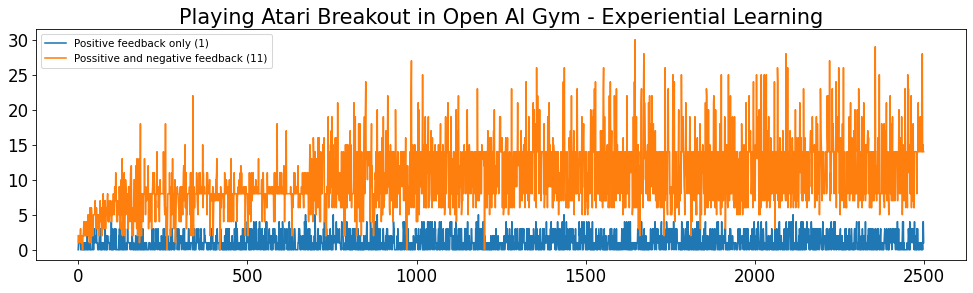

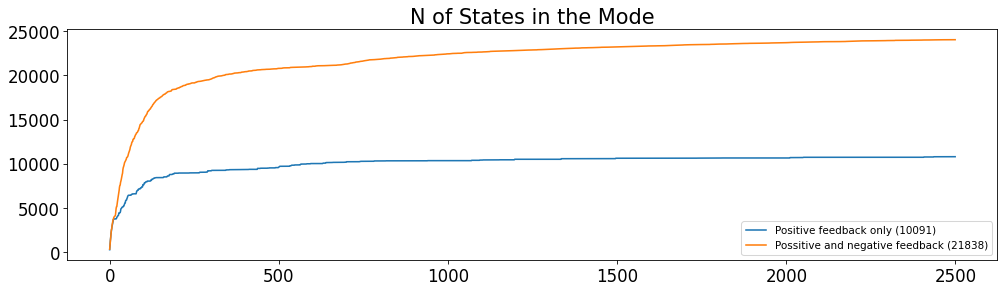

In [20]:
# 2025-11-06
# learn_mode=1/2, T=1, state count_threshold=2, similarity_threshold=0.99999, transition utility_thereshold=0, count_threshold=1
scores1= [0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 0, 0, 0, 2.0, 2.0, 0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 0, 2.0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 3.0, 0, 0, 0, 0, 0, 0, 1.0, 2.0, 0, 0, 3.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 3.0, 2.0, 0, 3.0, 0, 1.0, 0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0, 2.0, 3.0, 0, 0, 1.0, 0, 2.0, 0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 2.0, 0, 4.0, 0, 0, 0, 3.0, 0, 0, 0, 2.0, 1.0, 3.0, 1.0, 0, 3.0, 1.0, 0, 0, 0, 0, 0, 0, 0, 2.0, 0, 3.0, 0, 0, 4.0, 1.0, 0, 2.0, 1.0, 0, 0, 3.0, 0, 0, 4.0, 0, 3.0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 2.0, 2.0, 1.0, 0, 0, 1.0, 0, 0, 0, 0, 0, 2.0, 0, 0, 0, 0, 0, 4.0, 0, 0, 0, 1.0, 1.0, 0, 3.0, 0, 0, 1.0, 0, 2.0, 2.0, 0, 3.0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 3.0, 0, 0, 1.0, 3.0, 0, 1.0, 0, 1.0, 1.0, 0, 3.0, 1.0, 2.0, 1.0, 1.0, 0, 3.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 2.0, 1.0, 1.0, 0, 0, 0, 3.0, 0, 1.0, 3.0, 0, 1.0, 0, 0, 2.0, 1.0, 1.0, 0, 2.0, 2.0, 1.0, 0, 0, 1.0, 0, 1.0, 0, 3.0, 1.0, 0, 1.0, 0, 3.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 1.0, 1.0, 3.0, 3.0, 3.0, 2.0, 3.0, 0, 1.0, 1.0, 0, 3.0, 1.0, 0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0, 2.0, 1.0, 1.0, 1.0, 3.0, 0, 1.0, 3.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 3.0, 3.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 3.0, 1.0, 0, 0, 0, 3.0, 0, 0, 0, 0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 0, 1.0, 0, 1.0, 2.0, 3.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 3.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 0, 1.0, 0, 3.0, 1.0, 1.0, 1.0, 3.0, 1.0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 2.0, 0, 0, 0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 3.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 1.0, 0, 2.0, 0, 1.0, 0, 3.0, 0, 1.0, 0, 3.0, 1.0, 0, 3.0, 0, 3.0, 1.0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 2.0, 1.0, 1.0, 0, 0, 1.0, 0, 3.0, 0, 2.0, 0, 0, 4.0, 1.0, 0, 3.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 2.0, 0, 0, 1.0, 3.0, 0, 0, 2.0, 3.0, 1.0, 0, 1.0, 1.0, 0, 0, 0, 3.0, 1.0, 4.0, 3.0, 5.0, 3.0, 0, 3.0, 0, 1.0, 0, 3.0, 0, 3.0, 0, 3.0, 1.0, 2.0, 1.0, 0, 0, 4.0, 3.0, 1.0, 0, 3.0, 3.0, 3.0, 4.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 3.0, 1.0, 1.0, 4.0, 0, 1.0, 3.0, 0, 0, 1.0, 1.0, 3.0, 1.0, 0, 2.0, 0, 0, 1.0, 0, 3.0, 1.0, 0, 4.0, 0, 4.0, 1.0, 1.0, 1.0, 0, 0, 0, 2.0, 3.0, 1.0, 2.0, 2.0, 1.0, 0, 2.0, 0, 0, 1.0, 0, 3.0, 1.0, 2.0, 1.0, 3.0, 3.0, 2.0, 0, 0, 0, 2.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 0, 4.0, 0, 3.0, 1.0, 0, 0, 3.0, 0, 3.0, 0, 4.0, 3.0, 0, 1.0, 0, 1.0, 0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 0, 1.0, 0, 0, 1.0, 0, 4.0, 0, 3.0, 1.0, 0, 0, 3.0, 0, 3.0, 3.0, 0, 0, 0, 1.0, 0, 3.0, 3.0, 2.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 3.0, 1.0, 3.0, 2.0, 0, 0, 2.0, 0, 1.0, 1.0, 1.0, 1.0, 2.0, 0, 1.0, 1.0, 0, 4.0, 3.0, 0, 5.0, 0, 4.0, 1.0, 1.0, 0, 1.0, 0, 3.0, 0, 3.0, 1.0, 3.0, 0, 1.0, 0, 0, 2.0, 0, 0, 0, 0, 1.0, 1.0, 0, 0, 2.0, 0, 5.0, 3.0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 3.0, 0, 1.0, 1.0, 2.0, 1.0, 0, 0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 3.0, 0, 1.0, 4.0, 0, 1.0, 1.0, 0, 0, 3.0, 1.0, 0, 2.0, 0, 2.0, 1.0, 0, 2.0, 2.0, 1.0, 3.0, 1.0, 0, 2.0, 0, 0, 0, 0, 0, 5.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 0, 0, 4.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 4.0, 3.0, 2.0, 3.0, 2.0, 0, 1.0, 0, 0, 0, 0, 0, 3.0, 1.0, 0, 4.0, 2.0, 1.0, 0, 3.0, 3.0, 3.0, 0, 0, 0, 3.0, 0, 2.0, 0, 0, 0, 0, 3.0, 0, 3.0, 1.0, 3.0, 3.0, 1.0, 0, 3.0, 3.0, 0, 1.0, 1.0, 0, 0, 0, 3.0, 0, 2.0, 0, 0, 0, 0, 2.0, 0, 1.0, 0, 0, 0, 1.0, 0, 0, 0, 2.0, 0, 0, 1.0, 1.0, 2.0, 1.0, 0, 2.0, 4.0, 2.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 4.0, 3.0, 0, 2.0, 0, 3.0, 1.0, 0, 0, 0, 4.0, 3.0, 1.0, 0, 4.0, 0, 1.0, 0, 1.0, 0, 5.0, 0, 1.0, 3.0, 0, 2.0, 1.0, 0, 3.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 3.0, 3.0, 0, 1.0, 1.0, 0, 1.0, 0, 2.0, 0, 2.0, 3.0, 0, 3.0, 0, 2.0, 2.0, 1.0, 1.0, 1.0, 0, 2.0, 1.0, 1.0, 1.0, 2.0, 0, 0, 1.0, 1.0, 1.0, 4.0, 3.0, 3.0, 0, 0, 0, 0, 0, 0, 0, 1.0, 2.0, 0, 3.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 4.0, 3.0, 3.0, 0, 4.0, 0, 1.0, 1.0, 1.0, 2.0, 1.0, 0, 1.0, 1.0, 3.0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 2.0, 1.0, 0, 0, 0, 0, 3.0, 2.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 0, 3.0, 0, 2.0, 1.0, 1.0, 0, 1.0, 2.0, 3.0, 1.0, 4.0, 1.0, 0, 2.0, 0, 0, 4.0, 0, 0, 2.0, 0, 2.0, 1.0, 3.0, 0, 1.0, 0, 4.0, 1.0, 0, 4.0, 3.0, 1.0, 0, 2.0, 4.0, 0, 3.0, 1.0, 2.0, 4.0, 1.0, 0, 0, 1.0, 3.0, 1.0, 0, 4.0, 2.0, 3.0, 1.0, 1.0, 0, 1.0, 0, 1.0, 0, 2.0, 3.0, 3.0, 0, 4.0, 0, 0, 0, 3.0, 4.0, 1.0, 1.0, 0, 1.0, 0, 3.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 3.0, 0, 3.0, 1.0, 0, 3.0, 1.0, 0, 0, 0, 0, 3.0, 4.0, 2.0, 2.0, 4.0, 4.0, 1.0, 0, 1.0, 0, 2.0, 0, 1.0, 0, 3.0, 0, 1.0, 0, 4.0, 0, 0, 2.0, 1.0, 0, 1.0, 3.0, 0, 1.0, 0, 3.0, 1.0, 0, 0, 3.0, 3.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 1.0, 1.0, 3.0, 0, 1.0, 0, 3.0, 0, 1.0, 0, 4.0, 1.0, 1.0, 1.0, 0, 2.0, 0, 1.0, 0, 1.0, 0, 3.0, 3.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 3.0, 0, 4.0, 2.0, 4.0, 0, 1.0, 0, 5.0, 1.0, 0, 3.0, 1.0, 3.0, 1.0, 1.0, 0, 3.0, 1.0, 1.0, 0, 0, 4.0, 0, 3.0, 1.0, 0, 2.0, 0, 1.0, 1.0, 0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 0, 2.0, 0, 1.0, 0, 0, 2.0, 2.0, 2.0, 0, 0, 2.0, 1.0, 2.0, 0, 0, 3.0, 1.0, 1.0, 0, 0, 0, 2.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 2.0, 0, 0, 1.0, 1.0, 3.0, 4.0, 1.0, 2.0, 3.0, 1.0, 1.0, 0, 2.0, 0, 2.0, 3.0, 2.0, 0, 1.0, 0, 2.0, 0, 4.0, 1.0, 0, 2.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 3.0, 1.0, 1.0, 1.0, 0, 3.0, 3.0, 3.0, 1.0, 1.0, 0, 1.0, 0, 0, 3.0, 0, 3.0, 0, 3.0, 1.0, 0, 3.0, 3.0, 1.0, 2.0, 3.0, 1.0, 1.0, 0, 0, 0, 1.0, 1.0, 1.0, 3.0, 0, 3.0, 0, 0, 3.0, 3.0, 3.0, 0, 2.0, 0, 2.0, 0, 0, 0, 2.0, 1.0, 0, 0, 0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0, 4.0, 1.0, 0, 3.0, 2.0, 1.0, 0, 2.0, 0, 0, 0, 0, 1.0, 3.0, 0, 1.0, 0, 0, 1.0, 1.0, 3.0, 2.0, 0, 0, 3.0, 0, 2.0, 1.0, 2.0, 1.0, 1.0, 4.0, 1.0, 1.0, 2.0, 0, 1.0, 1.0, 0, 2.0, 0, 1.0, 0, 3.0, 0, 4.0, 1.0, 1.0, 2.0, 1.0, 3.0, 1.0, 1.0, 3.0, 2.0, 3.0, 1.0, 0, 3.0, 0, 0, 0, 1.0, 1.0, 4.0, 1.0, 1.0, 0, 0, 3.0, 0, 3.0, 0, 1.0, 1.0, 0, 0, 2.0, 4.0, 0, 1.0, 0, 0, 5.0, 0, 1.0, 2.0, 1.0, 1.0, 0, 4.0, 1.0, 1.0, 0, 3.0, 1.0, 1.0, 1.0, 0, 0, 3.0, 0, 3.0, 1.0, 1.0, 1.0, 3.0, 1.0, 1.0, 3.0, 0, 0, 0, 2.0, 2.0, 0, 0, 3.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 0, 4.0, 2.0, 3.0, 0, 3.0, 1.0, 1.0, 2.0, 4.0, 0, 0, 0, 0, 2.0, 4.0, 2.0, 1.0, 2.0, 2.0, 0, 0, 0, 4.0, 3.0, 0, 1.0, 0, 2.0, 4.0, 3.0, 3.0, 1.0, 0, 1.0, 0, 3.0, 0, 0, 0, 4.0, 0, 1.0, 0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 3.0, 0, 1.0, 0, 2.0, 0, 1.0, 2.0, 3.0, 2.0, 1.0, 0, 2.0, 0, 3.0, 1.0, 3.0, 1.0, 1.0, 0, 0, 0, 2.0, 0, 3.0, 0, 2.0, 0, 0, 2.0, 0, 0, 1.0, 0, 0, 1.0, 2.0, 2.0, 1.0, 2.0, 0, 0, 3.0, 1.0, 0, 3.0, 3.0, 1.0, 2.0, 0, 0, 0, 0, 2.0, 3.0, 0, 0, 2.0, 2.0, 0, 3.0, 0, 0, 0, 0, 1.0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 0, 1.0, 3.0, 0, 0, 0, 2.0, 2.0, 3.0, 0, 4.0, 3.0, 2.0, 3.0, 0, 0, 4.0, 1.0, 1.0, 0, 0, 0, 4.0, 0, 2.0, 0, 0, 4.0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 0, 2.0, 1.0, 3.0, 2.0, 0, 1.0, 1.0, 0, 4.0, 2.0, 0, 0, 1.0, 0, 2.0, 0, 3.0, 0, 1.0, 0, 0, 2.0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 0, 1.0, 0, 1.0, 1.0, 1.0, 3.0, 0, 0, 1.0, 1.0, 0, 3.0, 2.0, 3.0, 1.0, 2.0, 1.0, 0, 4.0, 1.0, 1.0, 3.0, 0, 3.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 0, 2.0, 0, 2.0, 0, 3.0, 4.0, 1.0, 0, 2.0, 1.0, 1.0, 0, 0, 1.0, 3.0, 0, 2.0, 0, 0, 0, 4.0, 3.0, 2.0, 1.0, 1.0, 2.0, 3.0, 0, 2.0, 1.0, 3.0, 2.0, 3.0, 3.0, 1.0, 0, 1.0, 3.0, 2.0, 1.0, 0, 4.0, 1.0, 1.0, 1.0, 0, 2.0, 3.0, 1.0, 0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 4.0, 0, 0, 1.0, 3.0, 2.0, 1.0, 0, 0, 1.0, 1.0, 3.0, 0, 3.0, 1.0, 0, 4.0, 1.0, 0, 4.0, 0, 1.0, 0, 2.0, 0, 0, 2.0, 3.0, 2.0, 0, 1.0, 0, 3.0, 1.0, 0, 2.0, 0, 0, 3.0, 3.0, 0, 0, 3.0, 0, 0, 4.0, 0, 0, 1.0, 0, 4.0, 3.0, 0, 3.0, 2.0, 3.0, 0, 0, 1.0, 0, 1.0, 1.0, 0, 2.0, 0, 0, 3.0, 0, 0, 2.0, 4.0, 1.0, 2.0, 0, 1.0, 2.0, 0, 2.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 3.0, 1.0, 1.0, 1.0, 0, 0, 3.0, 1.0, 0, 2.0, 0, 0, 3.0, 0, 3.0, 0, 0, 1.0, 1.0, 1.0, 3.0, 4.0, 0, 0, 4.0, 1.0, 0, 2.0, 0, 1.0, 2.0, 0, 0, 0, 4.0, 1.0, 1.0, 1.0, 2.0, 0, 2.0, 1.0, 1.0, 3.0, 1.0, 3.0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 2.0, 1.0, 0, 3.0, 0, 3.0, 2.0, 1.0, 1.0, 1.0, 0, 2.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0, 0, 0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 0, 3.0, 1.0, 0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 0, 3.0, 3.0, 0, 1.0, 0, 3.0, 1.0, 1.0, 0, 3.0, 0, 3.0, 3.0, 3.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 1.0, 2.0, 1.0, 0, 2.0, 3.0, 0, 0, 2.0, 1.0, 0, 4.0, 1.0, 1.0, 0, 0, 2.0, 0, 3.0, 1.0, 2.0, 0, 0, 4.0, 3.0, 2.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 4.0, 0, 0, 2.0, 0, 0, 3.0, 2.0, 0, 1.0, 1.0, 1.0, 1.0, 0, 0, 4.0, 2.0, 0, 0, 1.0, 0, 2.0, 2.0, 0, 1.0, 0, 1.0, 2.0, 2.0, 1.0, 0, 3.0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 0, 3.0, 1.0, 0, 0, 0, 0, 3.0, 0, 1.0, 0, 1.0, 0, 3.0, 4.0, 4.0, 1.0, 0, 0, 1.0, 2.0, 1.0, 1.0, 0, 1.0, 0, 0, 0, 0, 3.0, 0, 1.0, 2.0, 1.0, 0, 4.0, 0, 3.0, 2.0, 0, 1.0, 0, 3.0, 4.0, 2.0, 3.0, 3.0, 0, 0, 4.0, 1.0, 0, 4.0, 0, 0, 5.0, 0, 0, 0, 1.0, 1.0, 1.0, 1.0, 0, 4.0, 3.0, 0, 0, 1.0, 1.0, 0, 0, 2.0, 0, 3.0, 0, 1.0, 0, 0, 4.0, 1.0, 0, 3.0, 0, 4.0, 0, 1.0, 1.0, 0, 3.0, 0, 2.0, 1.0, 0, 3.0, 3.0, 4.0, 1.0, 1.0, 3.0, 1.0, 3.0, 1.0, 0, 1.0, 0, 2.0, 0, 3.0, 4.0, 3.0, 1.0, 1.0, 0, 3.0, 0, 2.0, 0, 3.0, 0, 3.0, 0, 1.0, 0, 3.0, 0, 3.0, 2.0, 1.0, 0, 3.0, 1.0, 3.0, 0, 1.0, 3.0, 3.0, 3.0, 1.0, 1.0, 0, 1.0, 0, 4.0, 0, 1.0, 1.0, 1.0, 1.0, 2.0, 0, 0, 0, 0, 3.0, 0, 0, 3.0, 1.0, 0, 1.0, 1.0, 0, 3.0, 3.0, 2.0, 3.0, 0, 4.0, 0, 3.0, 3.0, 2.0, 1.0, 1.0, 0, 4.0, 2.0, 0, 4.0, 2.0, 2.0, 0, 1.0, 0, 2.0, 2.0, 1.0, 2.0, 0, 1.0, 1.0, 0, 2.0, 2.0, 3.0, 0, 1.0, 1.0, 0, 2.0, 0, 1.0, 0, 0, 1.0, 0, 0, 0, 3.0, 0, 1.0, 3.0, 0, 1.0, 2.0, 1.0, 1.0, 0, 0, 0, 3.0, 0, 0, 2.0, 1.0, 0, 3.0, 3.0, 1.0, 0, 0, 0, 0, 1.0, 0, 2.0, 3.0, 0, 3.0, 1.0, 2.0, 3.0, 4.0, 1.0, 0, 1.0, 1.0, 1.0, 0, 4.0, 3.0, 0, 1.0, 0, 1.0, 0, 2.0, 1.0, 0, 3.0, 1.0, 0, 1.0, 0, 2.0, 2.0, 1.0, 0, 4.0, 0, 1.0, 1.0, 0, 0, 0, 2.0, 1.0, 3.0, 0, 2.0, 3.0, 0, 3.0, 1.0, 0, 3.0, 0, 1.0, 3.0, 0, 3.0, 0, 1.0, 0, 2.0, 1.0, 0, 3.0, 1.0, 0, 0, 1.0, 0, 3.0, 0, 2.0, 3.0, 1.0, 2.0, 0, 1.0, 0, 2.0, 3.0, 0, 0, 1.0, 1.0, 0, 0, 1.0, 0, 0, 1.0, 2.0, 3.0, 1.0, 1.0, 2.0, 1.0, 0, 3.0, 2.0, 1.0, 0, 1.0, 0, 3.0, 0, 2.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 0, 3.0, 3.0, 1.0, 1.0, 3.0, 3.0, 3.0, 1.0, 1.0, 1.0, 0, 3.0, 1.0, 1.0, 0, 4.0, 4.0, 0, 0, 3.0, 0, 0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 0, 2.0, 4.0, 0, 4.0, 0, 1.0, 0, 0, 0, 0, 0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 3.0, 2.0, 0, 0, 4.0, 0, 2.0, 3.0, 2.0, 3.0, 1.0, 3.0, 3.0, 1.0, 3.0, 1.0, 1.0, 0, 4.0, 0, 1.0, 0, 0, 2.0, 0, 3.0, 0, 3.0, 1.0, 0, 0, 1.0, 0, 0, 0, 1.0, 1.0, 0, 1.0, 0, 0, 1.0, 0, 4.0, 4.0, 1.0]
states1 = [303, 827, 1365, 1694, 2173, 2449, 2755, 2948, 3114, 3258, 3497, 3740, 3773, 3779, 3779, 3785, 3785, 3785, 3785, 3785, 3833, 3966, 4016, 4040, 4137, 4171, 4194, 4455, 4455, 4468, 4482, 4497, 4652, 4902, 4955, 4983, 5079, 5114, 5118, 5146, 5152, 5256, 5256, 5382, 5492, 5577, 5584, 5830, 5870, 5931, 5931, 6097, 6156, 6312, 6381, 6455, 6455, 6455, 6455, 6455, 6455, 6455, 6460, 6464, 6533, 6557, 6562, 6608, 6608, 6608, 6608, 6621, 6621, 6621, 6621, 6621, 6621, 6621, 6621, 6782, 6935, 6956, 6999, 7019, 7019, 7146, 7146, 7181, 7181, 7181, 7181, 7281, 7281, 7281, 7355, 7403, 7403, 7403, 7653, 7654, 7654, 7654, 7810, 7863, 7863, 7863, 7945, 7976, 7976, 7976, 7976, 8058, 8058, 8058, 8058, 8058, 8058, 8058, 8058, 8058, 8072, 8072, 8185, 8185, 8185, 8278, 8282, 8282, 8296, 8339, 8359, 8359, 8417, 8417, 8417, 8423, 8437, 8450, 8450, 8450, 8450, 8450, 8450, 8450, 8450, 8450, 8451, 8451, 8451, 8451, 8451, 8451, 8451, 8451, 8451, 8451, 8451, 8455, 8455, 8482, 8534, 8535, 8535, 8535, 8535, 8535, 8535, 8535, 8535, 8535, 8601, 8638, 8639, 8639, 8639, 8639, 8739, 8802, 8802, 8802, 8802, 8802, 8802, 8803, 8815, 8815, 8860, 8860, 8870, 8870, 8870, 8949, 8949, 8949, 8950, 8950, 8950, 8950, 8950, 8951, 8951, 8951, 8951, 8951, 8969, 8969, 8969, 8969, 8969, 8970, 8970, 8970, 8970, 8970, 8970, 8971, 8971, 8971, 8971, 8971, 8971, 8971, 8971, 8971, 8971, 8971, 8971, 8971, 8971, 8971, 8971, 8971, 8971, 8971, 8971, 8971, 8985, 8985, 8985, 8985, 8985, 8985, 8985, 8985, 8985, 8985, 8985, 8988, 8988, 8988, 8988, 8988, 8988, 8991, 8991, 8991, 8991, 8991, 8991, 8991, 8991, 8991, 8991, 8991, 8998, 8998, 9055, 9055, 9055, 9062, 9062, 9062, 9062, 9062, 9062, 9062, 9062, 9062, 9062, 9062, 9062, 9062, 9062, 9063, 9073, 9073, 9073, 9073, 9073, 9125, 9219, 9219, 9219, 9219, 9219, 9219, 9219, 9219, 9219, 9219, 9219, 9260, 9269, 9269, 9269, 9269, 9269, 9269, 9269, 9269, 9269, 9270, 9270, 9271, 9271, 9272, 9272, 9272, 9272, 9272, 9272, 9272, 9272, 9272, 9272, 9272, 9276, 9276, 9276, 9276, 9276, 9276, 9276, 9276, 9276, 9276, 9276, 9277, 9277, 9277, 9277, 9277, 9277, 9277, 9320, 9320, 9326, 9326, 9326, 9326, 9326, 9328, 9329, 9329, 9347, 9347, 9347, 9347, 9347, 9347, 9347, 9347, 9347, 9354, 9354, 9354, 9354, 9354, 9354, 9354, 9354, 9354, 9354, 9354, 9359, 9359, 9359, 9359, 9359, 9359, 9359, 9359, 9359, 9359, 9359, 9359, 9359, 9362, 9362, 9362, 9362, 9362, 9362, 9362, 9362, 9362, 9362, 9363, 9363, 9363, 9363, 9363, 9363, 9363, 9363, 9363, 9363, 9371, 9371, 9371, 9371, 9385, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9386, 9491, 9492, 9492, 9492, 9492, 9492, 9492, 9492, 9492, 9513, 9513, 9513, 9513, 9513, 9513, 9513, 9513, 9513, 9513, 9513, 9513, 9513, 9513, 9513, 9513, 9513, 9513, 9516, 9516, 9516, 9530, 9530, 9530, 9530, 9530, 9550, 9550, 9550, 9550, 9550, 9550, 9550, 9550, 9550, 9550, 9550, 9550, 9550, 9550, 9550, 9550, 9550, 9550, 9582, 9582, 9582, 9582, 9582, 9582, 9582, 9582, 9582, 9606, 9631, 9683, 9712, 9730, 9730, 9730, 9730, 9730, 9730, 9730, 9730, 9734, 9734, 9734, 9734, 9734, 9734, 9734, 9734, 9734, 9734, 9734, 9734, 9734, 9734, 9734, 9735, 9739, 9739, 9739, 9739, 9739, 9739, 9790, 9790, 9790, 9798, 9826, 9853, 9853, 9853, 9858, 9858, 9858, 9858, 9858, 9858, 9882, 9882, 9882, 9882, 9882, 9882, 9882, 9882, 9889, 9889, 9889, 9889, 9889, 9889, 9889, 9889, 9889, 9958, 9958, 9980, 9980, 9984, 9984, 9984, 9984, 9988, 9988, 9988, 9988, 9988, 9988, 9988, 9988, 9988, 9988, 10005, 10014, 10014, 10014, 10014, 10014, 10014, 10014, 10014, 10014, 10014, 10014, 10039, 10039, 10039, 10039, 10039, 10039, 10039, 10039, 10039, 10039, 10039, 10040, 10040, 10040, 10040, 10040, 10040, 10040, 10040, 10040, 10040, 10040, 10040, 10041, 10041, 10041, 10041, 10041, 10041, 10041, 10041, 10041, 10041, 10041, 10041, 10041, 10068, 10089, 10090, 10090, 10090, 10090, 10090, 10090, 10090, 10143, 10151, 10151, 10151, 10151, 10151, 10151, 10151, 10151, 10151, 10151, 10151, 10151, 10151, 10152, 10152, 10161, 10161, 10161, 10161, 10173, 10173, 10173, 10173, 10173, 10173, 10173, 10173, 10173, 10173, 10173, 10173, 10173, 10181, 10182, 10184, 10184, 10184, 10184, 10184, 10184, 10184, 10184, 10184, 10184, 10184, 10184, 10184, 10184, 10184, 10184, 10184, 10184, 10184, 10184, 10194, 10194, 10194, 10194, 10194, 10194, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10244, 10249, 10249, 10249, 10249, 10249, 10249, 10249, 10249, 10249, 10249, 10249, 10249, 10250, 10250, 10268, 10275, 10275, 10291, 10291, 10291, 10291, 10291, 10291, 10294, 10294, 10294, 10294, 10294, 10294, 10294, 10294, 10294, 10294, 10294, 10298, 10298, 10298, 10298, 10298, 10298, 10298, 10298, 10298, 10298, 10298, 10298, 10298, 10298, 10298, 10298, 10298, 10298, 10298, 10298, 10301, 10301, 10301, 10333, 10333, 10333, 10333, 10333, 10333, 10333, 10333, 10333, 10333, 10333, 10333, 10333, 10334, 10334, 10334, 10334, 10338, 10338, 10338, 10338, 10338, 10338, 10338, 10338, 10338, 10338, 10338, 10338, 10338, 10338, 10338, 10338, 10339, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10348, 10351, 10351, 10351, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10353, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10368, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10369, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10407, 10433, 10433, 10433, 10433, 10433, 10433, 10433, 10433, 10437, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10449, 10452, 10452, 10452, 10452, 10452, 10452, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10457, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10465, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10523, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10524, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10588, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10591, 10598, 10598, 10598, 10598, 10598, 10598, 10598, 10598, 10598, 10598, 10598, 10598, 10598, 10598, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10640, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10641, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10650, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10654, 10660, 10660, 10660, 10660, 10660, 10660, 10660, 10660, 10660, 10660, 10660, 10660, 10660, 10665, 10665, 10665, 10665, 10665, 10665, 10665, 10665, 10665, 10665, 10665, 10665, 10665, 10665, 10665, 10666, 10666, 10666, 10666, 10666, 10666, 10666, 10666, 10666, 10666, 10666, 10666, 10666, 10666, 10666, 10666, 10666, 10666, 10666, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10670, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10671, 10713, 10713, 10713, 10713, 10713, 10713, 10713, 10713, 10713, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10721, 10741, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10747, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10750, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10751, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10783, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10808, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814, 10814]
scores2 = [2.0, 1.0, 2.0, 1.0, 2.0, 1.0, 2.0, 3.0, 1.0, 1.0, 1.0, 2.0, 1.0, 0, 2.0, 2.0, 3.0, 4.0, 2.0, 2.0, 4.0, 3.0, 2.0, 2.0, 3.0, 4.0, 2.0, 3.0, 4.0, 5.0, 5.0, 2.0, 2.0, 1.0, 1.0, 6.0, 4.0, 3.0, 1.0, 6.0, 5.0, 2.0, 2.0, 3.0, 2.0, 5.0, 5.0, 5.0, 5.0, 5.0, 7.0, 5.0, 5.0, 3.0, 6.0, 4.0, 5.0, 5.0, 3.0, 4.0, 3.0, 5.0, 2.0, 2.0, 5.0, 7.0, 5.0, 4.0, 4.0, 6.0, 3.0, 2.0, 4.0, 6.0, 8.0, 3.0, 6.0, 7.0, 4.0, 4.0, 7.0, 3.0, 5.0, 6.0, 6.0, 5.0, 7.0, 8.0, 5.0, 4.0, 7.0, 4.0, 4.0, 5.0, 5.0, 7.0, 6.0, 6.0, 4.0, 4.0, 5.0, 7.0, 5.0, 7.0, 8.0, 7.0, 5.0, 7.0, 9.0, 9.0, 7.0, 11.0, 10.0, 6.0, 4.0, 7.0, 4.0, 7.0, 6.0, 6.0, 5.0, 9.0, 9.0, 7.0, 4.0, 3.0, 9.0, 10.0, 8.0, 5.0, 13.0, 2.0, 7.0, 8.0, 7.0, 10.0, 11.0, 2.0, 5.0, 5.0, 10.0, 9.0, 8.0, 7.0, 8.0, 5.0, 8.0, 6.0, 3.0, 9.0, 9.0, 9.0, 6.0, 4.0, 9.0, 11.0, 10.0, 12.0, 4.0, 4.0, 2.0, 6.0, 3.0, 2.0, 7.0, 10.0, 10.0, 10.0, 4.0, 8.0, 10.0, 12.0, 5.0, 3.0, 13.0, 10.0, 2.0, 12.0, 12.0, 10.0, 13.0, 1.0, 2.0, 10.0, 18.0, 4.0, 6.0, 2.0, 8.0, 8.0, 6.0, 4.0, 5.0, 8.0, 8.0, 8.0, 13.0, 8.0, 9.0, 5.0, 8.0, 8.0, 7.0, 8.0, 9.0, 8.0, 8.0, 12.0, 3.0, 8.0, 8.0, 8.0, 4.0, 8.0, 8.0, 8.0, 8.0, 3.0, 8.0, 8.0, 9.0, 11.0, 8.0, 8.0, 8.0, 11.0, 9.0, 4.0, 7.0, 4.0, 8.0, 8.0, 8.0, 14.0, 8.0, 8.0, 9.0, 6.0, 7.0, 6.0, 4.0, 8.0, 10.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 14.0, 10.0, 8.0, 6.0, 5.0, 8.0, 18.0, 8.0, 2.0, 3.0, 6.0, 0, 4.0, 8.0, 8.0, 8.0, 8.0, 8.0, 11.0, 8.0, 9.0, 2.0, 6.0, 8.0, 5.0, 11.0, 8.0, 13.0, 8.0, 6.0, 3.0, 5.0, 8.0, 8.0, 10.0, 1.0, 1.0, 5.0, 8.0, 8.0, 8.0, 9.0, 8.0, 8.0, 7.0, 6.0, 6.0, 4.0, 7.0, 8.0, 9.0, 4.0, 4.0, 8.0, 9.0, 8.0, 6.0, 5.0, 8.0, 11.0, 12.0, 7.0, 8.0, 8.0, 15.0, 6.0, 10.0, 11.0, 3.0, 8.0, 5.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 5.0, 7.0, 11.0, 2.0, 6.0, 8.0, 11.0, 8.0, 2.0, 22.0, 4.0, 2.0, 9.0, 8.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 11.0, 10.0, 7.0, 6.0, 5.0, 8.0, 8.0, 8.0, 11.0, 8.0, 11.0, 10.0, 8.0, 9.0, 8.0, 8.0, 8.0, 8.0, 15.0, 6.0, 11.0, 8.0, 8.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 11.0, 5.0, 11.0, 8.0, 9.0, 8.0, 8.0, 8.0, 10.0, 10.0, 2.0, 6.0, 8.0, 7.0, 8.0, 8.0, 7.0, 8.0, 9.0, 2.0, 5.0, 8.0, 8.0, 7.0, 8.0, 8.0, 7.0, 10.0, 10.0, 11.0, 13.0, 7.0, 8.0, 8.0, 8.0, 8.0, 7.0, 8.0, 8.0, 6.0, 0, 9.0, 8.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 7.0, 4.0, 8.0, 6.0, 11.0, 8.0, 10.0, 8.0, 8.0, 10.0, 9.0, 8.0, 8.0, 9.0, 4.0, 7.0, 8.0, 8.0, 10.0, 4.0, 6.0, 8.0, 8.0, 13.0, 4.0, 8.0, 8.0, 8.0, 8.0, 8.0, 4.0, 8.0, 11.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 4.0, 6.0, 8.0, 8.0, 9.0, 8.0, 8.0, 10.0, 8.0, 8.0, 11.0, 8.0, 12.0, 8.0, 11.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 8.0, 8.0, 8.0, 9.0, 2.0, 8.0, 9.0, 8.0, 8.0, 8.0, 8.0, 6.0, 2.0, 8.0, 5.0, 8.0, 11.0, 8.0, 8.0, 10.0, 4.0, 7.0, 11.0, 8.0, 7.0, 8.0, 8.0, 11.0, 8.0, 8.0, 9.0, 8.0, 8.0, 8.0, 8.0, 10.0, 9.0, 8.0, 8.0, 9.0, 8.0, 8.0, 8.0, 13.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 10.0, 10.0, 4.0, 8.0, 11.0, 11.0, 8.0, 8.0, 7.0, 4.0, 8.0, 8.0, 8.0, 8.0, 8.0, 6.0, 6.0, 11.0, 8.0, 8.0, 8.0, 8.0, 9.0, 8.0, 9.0, 8.0, 8.0, 8.0, 8.0, 9.0, 8.0, 8.0, 9.0, 8.0, 8.0, 9.0, 4.0, 6.0, 11.0, 4.0, 8.0, 8.0, 8.0, 11.0, 9.0, 8.0, 18.0, 8.0, 9.0, 8.0, 8.0, 9.0, 8.0, 8.0, 11.0, 8.0, 11.0, 11.0, 8.0, 11.0, 8.0, 8.0, 9.0, 8.0, 9.0, 8.0, 12.0, 10.0, 4.0, 8.0, 8.0, 8.0, 8.0, 17.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 8.0, 8.0, 6.0, 2.0, 8.0, 8.0, 6.0, 8.0, 8.0, 11.0, 8.0, 11.0, 8.0, 9.0, 8.0, 9.0, 8.0, 9.0, 9.0, 8.0, 10.0, 12.0, 6.0, 8.0, 8.0, 8.0, 8.0, 6.0, 8.0, 8.0, 8.0, 9.0, 8.0, 8.0, 11.0, 8.0, 8.0, 6.0, 6.0, 11.0, 8.0, 8.0, 8.0, 9.0, 11.0, 8.0, 8.0, 8.0, 8.0, 11.0, 11.0, 7.0, 4.0, 8.0, 9.0, 12.0, 15.0, 14.0, 5.0, 7.0, 13.0, 13.0, 8.0, 11.0, 5.0, 4.0, 16.0, 14.0, 14.0, 7.0, 8.0, 14.0, 6.0, 5.0, 5.0, 6.0, 13.0, 10.0, 11.0, 6.0, 16.0, 7.0, 15.0, 16.0, 6.0, 4.0, 10.0, 4.0, 14.0, 13.0, 8.0, 10.0, 8.0, 10.0, 15.0, 14.0, 14.0, 14.0, 16.0, 4.0, 8.0, 8.0, 5.0, 2.0, 2.0, 3.0, 9.0, 9.0, 8.0, 14.0, 19.0, 6.0, 6.0, 14.0, 8.0, 8.0, 9.0, 15.0, 14.0, 17.0, 9.0, 19.0, 6.0, 8.0, 15.0, 7.0, 9.0, 12.0, 6.0, 13.0, 13.0, 16.0, 13.0, 8.0, 6.0, 8.0, 16.0, 8.0, 21.0, 8.0, 8.0, 11.0, 8.0, 7.0, 11.0, 9.0, 8.0, 6.0, 6.0, 14.0, 14.0, 7.0, 6.0, 11.0, 9.0, 14.0, 6.0, 2.0, 7.0, 2.0, 6.0, 15.0, 6.0, 6.0, 15.0, 6.0, 8.0, 8.0, 15.0, 8.0, 8.0, 14.0, 14.0, 10.0, 7.0, 17.0, 8.0, 15.0, 9.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 10.0, 21.0, 8.0, 13.0, 4.0, 19.0, 8.0, 14.0, 14.0, 2.0, 14.0, 8.0, 14.0, 14.0, 6.0, 18.0, 8.0, 14.0, 4.0, 18.0, 11.0, 14.0, 14.0, 2.0, 14.0, 6.0, 8.0, 7.0, 8.0, 4.0, 8.0, 15.0, 19.0, 8.0, 16.0, 20.0, 24.0, 13.0, 14.0, 14.0, 12.0, 10.0, 14.0, 14.0, 14.0, 12.0, 14.0, 14.0, 13.0, 4.0, 6.0, 14.0, 14.0, 18.0, 9.0, 12.0, 4.0, 6.0, 6.0, 2.0, 8.0, 4.0, 5.0, 9.0, 11.0, 10.0, 14.0, 6.0, 12.0, 7.0, 20.0, 8.0, 8.0, 11.0, 7.0, 6.0, 14.0, 8.0, 8.0, 14.0, 14.0, 14.0, 4.0, 8.0, 16.0, 5.0, 5.0, 9.0, 19.0, 6.0, 8.0, 7.0, 10.0, 11.0, 8.0, 14.0, 17.0, 14.0, 8.0, 9.0, 14.0, 22.0, 14.0, 9.0, 14.0, 12.0, 6.0, 5.0, 9.0, 15.0, 12.0, 8.0, 7.0, 8.0, 14.0, 14.0, 14.0, 4.0, 14.0, 14.0, 11.0, 9.0, 6.0, 7.0, 20.0, 14.0, 12.0, 9.0, 6.0, 8.0, 8.0, 14.0, 8.0, 8.0, 8.0, 8.0, 12.0, 5.0, 9.0, 14.0, 14.0, 14.0, 12.0, 9.0, 14.0, 14.0, 14.0, 10.0, 7.0, 14.0, 14.0, 14.0, 7.0, 11.0, 16.0, 4.0, 12.0, 0, 12.0, 8.0, 8.0, 9.0, 9.0, 5.0, 8.0, 12.0, 6.0, 14.0, 8.0, 8.0, 22.0, 27.0, 6.0, 8.0, 14.0, 15.0, 9.0, 14.0, 6.0, 14.0, 8.0, 15.0, 14.0, 14.0, 8.0, 14.0, 4.0, 14.0, 14.0, 4.0, 11.0, 21.0, 10.0, 20.0, 5.0, 11.0, 14.0, 10.0, 9.0, 10.0, 14.0, 8.0, 8.0, 15.0, 25.0, 14.0, 8.0, 15.0, 6.0, 7.0, 8.0, 14.0, 19.0, 6.0, 15.0, 6.0, 6.0, 14.0, 14.0, 11.0, 14.0, 19.0, 6.0, 14.0, 7.0, 8.0, 14.0, 11.0, 13.0, 17.0, 12.0, 8.0, 6.0, 16.0, 8.0, 8.0, 7.0, 14.0, 8.0, 7.0, 8.0, 15.0, 8.0, 14.0, 7.0, 8.0, 9.0, 14.0, 8.0, 14.0, 8.0, 15.0, 6.0, 14.0, 7.0, 8.0, 14.0, 18.0, 6.0, 12.0, 6.0, 14.0, 8.0, 8.0, 15.0, 6.0, 14.0, 8.0, 14.0, 5.0, 6.0, 14.0, 19.0, 8.0, 8.0, 14.0, 14.0, 14.0, 19.0, 21.0, 14.0, 6.0, 7.0, 8.0, 14.0, 9.0, 5.0, 11.0, 19.0, 8.0, 8.0, 13.0, 12.0, 6.0, 6.0, 14.0, 14.0, 14.0, 11.0, 5.0, 9.0, 8.0, 14.0, 20.0, 4.0, 10.0, 8.0, 17.0, 8.0, 18.0, 22.0, 15.0, 6.0, 7.0, 11.0, 12.0, 9.0, 14.0, 13.0, 5.0, 6.0, 8.0, 7.0, 14.0, 14.0, 8.0, 14.0, 15.0, 11.0, 14.0, 14.0, 8.0, 8.0, 14.0, 12.0, 14.0, 20.0, 11.0, 5.0, 6.0, 14.0, 8.0, 15.0, 14.0, 11.0, 14.0, 9.0, 8.0, 14.0, 14.0, 14.0, 9.0, 14.0, 14.0, 6.0, 12.0, 9.0, 10.0, 14.0, 8.0, 8.0, 14.0, 6.0, 9.0, 8.0, 12.0, 23.0, 14.0, 7.0, 14.0, 14.0, 7.0, 8.0, 8.0, 14.0, 14.0, 13.0, 8.0, 8.0, 15.0, 14.0, 13.0, 14.0, 14.0, 14.0, 12.0, 14.0, 0, 10.0, 8.0, 14.0, 14.0, 6.0, 14.0, 14.0, 6.0, 14.0, 17.0, 8.0, 8.0, 13.0, 14.0, 5.0, 16.0, 14.0, 8.0, 14.0, 16.0, 6.0, 14.0, 14.0, 9.0, 8.0, 14.0, 17.0, 8.0, 20.0, 11.0, 11.0, 6.0, 12.0, 8.0, 8.0, 14.0, 14.0, 9.0, 14.0, 14.0, 14.0, 8.0, 14.0, 14.0, 19.0, 14.0, 19.0, 14.0, 14.0, 14.0, 14.0, 16.0, 6.0, 14.0, 12.0, 5.0, 6.0, 6.0, 8.0, 14.0, 12.0, 14.0, 16.0, 6.0, 14.0, 9.0, 13.0, 16.0, 8.0, 11.0, 5.0, 9.0, 13.0, 14.0, 12.0, 6.0, 7.0, 7.0, 8.0, 23.0, 6.0, 6.0, 8.0, 12.0, 12.0, 14.0, 14.0, 6.0, 14.0, 14.0, 12.0, 9.0, 14.0, 14.0, 9.0, 14.0, 14.0, 21.0, 13.0, 12.0, 14.0, 14.0, 13.0, 6.0, 14.0, 8.0, 7.0, 17.0, 8.0, 8.0, 7.0, 8.0, 14.0, 8.0, 14.0, 15.0, 14.0, 8.0, 16.0, 6.0, 14.0, 8.0, 24.0, 14.0, 14.0, 12.0, 14.0, 7.0, 14.0, 12.0, 19.0, 6.0, 9.0, 14.0, 14.0, 10.0, 14.0, 8.0, 14.0, 12.0, 8.0, 14.0, 14.0, 21.0, 14.0, 14.0, 20.0, 7.0, 11.0, 8.0, 18.0, 8.0, 6.0, 26.0, 14.0, 14.0, 22.0, 15.0, 14.0, 16.0, 8.0, 14.0, 20.0, 14.0, 14.0, 14.0, 7.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 13.0, 8.0, 18.0, 6.0, 8.0, 8.0, 8.0, 14.0, 14.0, 8.0, 14.0, 14.0, 6.0, 19.0, 11.0, 9.0, 16.0, 21.0, 14.0, 15.0, 9.0, 12.0, 14.0, 9.0, 14.0, 10.0, 14.0, 6.0, 16.0, 6.0, 15.0, 14.0, 7.0, 8.0, 14.0, 14.0, 14.0, 11.0, 8.0, 14.0, 7.0, 14.0, 14.0, 14.0, 14.0, 5.0, 10.0, 7.0, 11.0, 7.0, 8.0, 11.0, 14.0, 10.0, 7.0, 14.0, 11.0, 8.0, 14.0, 24.0, 7.0, 14.0, 26.0, 14.0, 14.0, 14.0, 13.0, 6.0, 8.0, 8.0, 14.0, 6.0, 6.0, 10.0, 6.0, 6.0, 16.0, 15.0, 14.0, 7.0, 17.0, 11.0, 7.0, 22.0, 8.0, 7.0, 14.0, 14.0, 14.0, 14.0, 17.0, 5.0, 13.0, 14.0, 14.0, 8.0, 8.0, 14.0, 8.0, 14.0, 23.0, 13.0, 13.0, 8.0, 8.0, 7.0, 14.0, 14.0, 14.0, 12.0, 14.0, 14.0, 8.0, 14.0, 19.0, 5.0, 9.0, 9.0, 16.0, 18.0, 13.0, 14.0, 14.0, 5.0, 14.0, 12.0, 7.0, 14.0, 14.0, 6.0, 6.0, 5.0, 11.0, 6.0, 14.0, 14.0, 8.0, 13.0, 14.0, 14.0, 20.0, 8.0, 14.0, 11.0, 6.0, 6.0, 19.0, 14.0, 20.0, 14.0, 14.0, 23.0, 14.0, 7.0, 24.0, 6.0, 6.0, 14.0, 9.0, 8.0, 12.0, 8.0, 14.0, 8.0, 8.0, 14.0, 8.0, 8.0, 7.0, 17.0, 14.0, 7.0, 7.0, 17.0, 10.0, 6.0, 14.0, 23.0, 26.0, 14.0, 7.0, 19.0, 7.0, 14.0, 7.0, 13.0, 7.0, 14.0, 13.0, 15.0, 8.0, 9.0, 6.0, 7.0, 8.0, 22.0, 6.0, 14.0, 24.0, 14.0, 14.0, 14.0, 17.0, 6.0, 14.0, 14.0, 7.0, 12.0, 13.0, 6.0, 22.0, 14.0, 14.0, 15.0, 7.0, 15.0, 23.0, 11.0, 15.0, 15.0, 8.0, 14.0, 14.0, 14.0, 8.0, 14.0, 7.0, 8.0, 14.0, 8.0, 14.0, 14.0, 14.0, 10.0, 14.0, 5.0, 16.0, 7.0, 7.0, 14.0, 6.0, 14.0, 13.0, 6.0, 14.0, 14.0, 8.0, 22.0, 8.0, 14.0, 14.0, 8.0, 14.0, 14.0, 6.0, 12.0, 12.0, 14.0, 11.0, 14.0, 14.0, 14.0, 14.0, 5.0, 6.0, 7.0, 19.0, 10.0, 6.0, 24.0, 11.0, 30.0, 6.0, 11.0, 7.0, 19.0, 6.0, 14.0, 12.0, 7.0, 15.0, 3.0, 12.0, 12.0, 12.0, 2.0, 14.0, 14.0, 11.0, 21.0, 23.0, 8.0, 9.0, 12.0, 7.0, 6.0, 23.0, 28.0, 13.0, 21.0, 18.0, 15.0, 10.0, 14.0, 8.0, 14.0, 8.0, 14.0, 15.0, 13.0, 7.0, 21.0, 11.0, 14.0, 22.0, 7.0, 14.0, 14.0, 18.0, 9.0, 14.0, 22.0, 10.0, 14.0, 8.0, 18.0, 8.0, 10.0, 16.0, 8.0, 16.0, 17.0, 7.0, 14.0, 11.0, 6.0, 14.0, 7.0, 6.0, 7.0, 7.0, 14.0, 14.0, 14.0, 14.0, 9.0, 6.0, 14.0, 11.0, 7.0, 14.0, 6.0, 14.0, 10.0, 14.0, 14.0, 7.0, 2.0, 14.0, 7.0, 26.0, 13.0, 14.0, 8.0, 14.0, 12.0, 6.0, 5.0, 14.0, 23.0, 14.0, 14.0, 14.0, 14.0, 8.0, 9.0, 5.0, 6.0, 9.0, 5.0, 6.0, 8.0, 14.0, 25.0, 14.0, 12.0, 8.0, 24.0, 5.0, 4.0, 8.0, 6.0, 14.0, 9.0, 6.0, 6.0, 8.0, 9.0, 14.0, 14.0, 20.0, 5.0, 10.0, 12.0, 7.0, 11.0, 14.0, 8.0, 25.0, 18.0, 14.0, 14.0, 14.0, 19.0, 14.0, 12.0, 9.0, 8.0, 5.0, 14.0, 14.0, 21.0, 17.0, 11.0, 10.0, 8.0, 14.0, 14.0, 9.0, 14.0, 9.0, 8.0, 14.0, 19.0, 8.0, 12.0, 2.0, 14.0, 10.0, 4.0, 13.0, 7.0, 14.0, 11.0, 8.0, 14.0, 14.0, 7.0, 19.0, 14.0, 13.0, 5.0, 7.0, 5.0, 13.0, 16.0, 8.0, 8.0, 14.0, 12.0, 14.0, 8.0, 14.0, 18.0, 3.0, 14.0, 14.0, 5.0, 14.0, 11.0, 14.0, 15.0, 14.0, 9.0, 8.0, 14.0, 9.0, 5.0, 9.0, 21.0, 10.0, 6.0, 23.0, 22.0, 15.0, 14.0, 6.0, 9.0, 20.0, 12.0, 8.0, 10.0, 15.0, 7.0, 9.0, 6.0, 14.0, 14.0, 14.0, 14.0, 8.0, 8.0, 7.0, 21.0, 22.0, 21.0, 14.0, 9.0, 6.0, 20.0, 14.0, 8.0, 5.0, 12.0, 13.0, 14.0, 8.0, 8.0, 7.0, 14.0, 14.0, 14.0, 18.0, 6.0, 5.0, 9.0, 25.0, 6.0, 14.0, 11.0, 9.0, 14.0, 7.0, 8.0, 14.0, 11.0, 19.0, 18.0, 3.0, 8.0, 14.0, 8.0, 15.0, 14.0, 7.0, 6.0, 8.0, 25.0, 12.0, 14.0, 7.0, 14.0, 14.0, 22.0, 8.0, 8.0, 14.0, 8.0, 14.0, 19.0, 14.0, 18.0, 7.0, 14.0, 6.0, 19.0, 6.0, 7.0, 14.0, 14.0, 9.0, 14.0, 5.0, 14.0, 14.0, 8.0, 5.0, 6.0, 8.0, 13.0, 10.0, 5.0, 14.0, 9.0, 8.0, 7.0, 18.0, 14.0, 6.0, 5.0, 6.0, 7.0, 6.0, 15.0, 14.0, 8.0, 6.0, 6.0, 14.0, 21.0, 6.0, 8.0, 12.0, 14.0, 14.0, 6.0, 14.0, 14.0, 22.0, 14.0, 14.0, 14.0, 17.0, 14.0, 8.0, 8.0, 10.0, 14.0, 14.0, 6.0, 17.0, 24.0, 15.0, 14.0, 8.0, 13.0, 7.0, 15.0, 13.0, 14.0, 25.0, 16.0, 14.0, 14.0, 13.0, 19.0, 14.0, 5.0, 20.0, 14.0, 5.0, 19.0, 6.0, 6.0, 25.0, 14.0, 14.0, 10.0, 12.0, 7.0, 14.0, 14.0, 11.0, 25.0, 7.0, 11.0, 14.0, 14.0, 13.0, 25.0, 6.0, 14.0, 17.0, 7.0, 8.0, 14.0, 19.0, 7.0, 14.0, 6.0, 14.0, 7.0, 16.0, 14.0, 8.0, 14.0, 8.0, 14.0, 14.0, 14.0, 10.0, 14.0, 7.0, 24.0, 7.0, 3.0, 14.0, 14.0, 14.0, 9.0, 14.0, 8.0, 26.0, 24.0, 7.0, 14.0, 6.0, 8.0, 13.0, 16.0, 6.0, 14.0, 7.0, 7.0, 14.0, 7.0, 13.0, 14.0, 17.0, 14.0, 8.0, 14.0, 14.0, 14.0, 14.0, 8.0, 7.0, 28.0, 15.0, 8.0, 15.0, 7.0, 26.0, 6.0, 14.0, 14.0, 14.0, 14.0, 8.0, 17.0, 16.0, 6.0, 13.0, 12.0, 8.0, 14.0, 16.0, 14.0, 14.0, 6.0, 14.0, 14.0, 14.0, 14.0, 7.0, 20.0, 6.0, 16.0, 8.0, 14.0, 7.0, 7.0, 14.0, 16.0, 6.0, 10.0, 14.0, 14.0, 21.0, 11.0, 14.0, 14.0, 16.0, 8.0, 14.0, 7.0, 8.0, 7.0, 8.0, 23.0, 15.0, 14.0, 14.0, 16.0, 8.0, 14.0, 7.0, 7.0, 14.0, 6.0, 14.0, 8.0, 8.0, 14.0, 7.0, 7.0, 13.0, 9.0, 14.0, 16.0, 17.0, 14.0, 15.0, 14.0, 8.0, 19.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 6.0, 8.0, 7.0, 14.0, 14.0, 19.0, 12.0, 7.0, 18.0, 14.0, 14.0, 8.0, 14.0, 14.0, 5.0, 9.0, 14.0, 23.0, 19.0, 16.0, 14.0, 7.0, 14.0, 8.0, 12.0, 13.0, 14.0, 8.0, 8.0, 8.0, 10.0, 10.0, 14.0, 14.0, 14.0, 8.0, 9.0, 22.0, 16.0, 14.0, 14.0, 22.0, 20.0, 14.0, 27.0, 14.0, 7.0, 11.0, 8.0, 14.0, 14.0, 14.0, 23.0, 14.0, 18.0, 16.0, 14.0, 8.0, 14.0, 14.0, 9.0, 13.0, 8.0, 24.0, 6.0, 16.0, 19.0, 15.0, 15.0, 14.0, 17.0, 26.0, 14.0, 8.0, 14.0, 5.0, 16.0, 14.0, 14.0, 7.0, 14.0, 14.0, 18.0, 9.0, 7.0, 26.0, 6.0, 8.0, 14.0, 14.0, 7.0, 7.0, 6.0, 7.0, 6.0, 14.0, 14.0, 14.0, 8.0, 14.0, 9.0, 15.0, 19.0, 7.0, 14.0, 14.0, 21.0, 8.0, 8.0, 14.0, 16.0, 14.0, 14.0, 7.0, 14.0, 14.0, 17.0, 7.0, 7.0, 20.0, 12.0, 8.0, 8.0, 8.0, 8.0, 14.0, 20.0, 14.0, 20.0, 6.0, 23.0, 18.0, 7.0, 14.0, 11.0, 14.0, 8.0, 7.0, 14.0, 19.0, 6.0, 11.0, 14.0, 7.0, 13.0, 21.0, 10.0, 8.0, 14.0, 14.0, 7.0, 15.0, 14.0, 8.0, 14.0, 14.0, 16.0, 17.0, 14.0, 16.0, 8.0, 14.0, 6.0, 8.0, 14.0, 13.0, 6.0, 14.0, 6.0, 14.0, 12.0, 14.0, 7.0, 8.0, 14.0, 7.0, 14.0, 8.0, 8.0, 29.0, 14.0, 14.0, 8.0, 7.0, 12.0, 12.0, 8.0, 16.0, 9.0, 15.0, 8.0, 25.0, 5.0, 6.0, 8.0, 8.0, 8.0, 8.0, 18.0, 14.0, 14.0, 8.0, 8.0, 14.0, 7.0, 18.0, 6.0, 17.0, 14.0, 8.0, 9.0, 14.0, 21.0, 8.0, 7.0, 14.0, 13.0, 8.0, 7.0, 5.0, 14.0, 11.0, 14.0, 22.0, 8.0, 12.0, 14.0, 7.0, 18.0, 14.0, 19.0, 7.0, 7.0, 9.0, 14.0, 14.0, 14.0, 7.0, 8.0, 14.0, 14.0, 14.0, 14.0, 14.0, 8.0, 7.0, 8.0, 14.0, 14.0, 20.0, 14.0, 8.0, 16.0, 14.0, 8.0, 14.0, 13.0, 19.0, 13.0, 5.0, 9.0, 15.0, 8.0, 12.0, 7.0, 13.0, 14.0, 23.0, 14.0, 6.0, 14.0, 8.0, 8.0, 10.0, 6.0, 25.0, 11.0, 23.0, 14.0, 14.0, 14.0, 15.0, 8.0, 14.0, 8.0, 22.0, 6.0, 14.0, 7.0, 14.0, 7.0, 18.0, 9.0, 6.0, 6.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 8.0, 14.0, 14.0, 14.0, 21.0, 14.0, 14.0, 14.0, 14.0, 14.0, 19.0, 15.0, 14.0, 14.0, 14.0, 14.0, 28.0, 14.0, 15.0, 14.0, 14.0]
states2 = [366, 829, 1156, 1616, 2137, 2546, 2658, 3062, 3277, 3553, 3675, 3770, 3924, 3998, 4068, 4097, 4116, 4210, 4578, 4958, 5164, 5179, 5506, 5750, 6038, 6286, 6520, 6748, 7029, 7383, 7562, 7603, 7891, 8033, 8197, 8404, 8677, 8804, 8947, 9352, 9562, 9668, 9807, 9965, 10148, 10213, 10285, 10364, 10437, 10536, 10696, 10743, 10764, 10818, 10917, 11079, 11217, 11320, 11414, 11543, 11678, 11901, 12012, 12097, 12173, 12369, 12469, 12536, 12548, 12777, 12798, 12852, 12852, 12921, 13096, 13148, 13262, 13315, 13369, 13482, 13524, 13533, 13585, 13671, 13752, 13769, 13958, 14020, 14146, 14288, 14441, 14470, 14508, 14567, 14594, 14645, 14688, 14771, 14813, 14829, 14887, 15045, 15149, 15224, 15316, 15376, 15384, 15465, 15565, 15602, 15633, 15761, 15890, 15931, 15944, 16018, 16036, 16114, 16168, 16192, 16206, 16287, 16357, 16402, 16466, 16515, 16560, 16664, 16719, 16744, 16822, 16879, 16909, 16955, 16997, 17037, 17097, 17165, 17182, 17228, 17248, 17280, 17295, 17339, 17391, 17405, 17414, 17437, 17456, 17520, 17541, 17555, 17579, 17601, 17625, 17677, 17716, 17758, 17788, 17816, 17827, 17871, 17872, 17877, 17909, 17968, 17985, 18004, 18019, 18070, 18109, 18142, 18149, 18170, 18181, 18184, 18187, 18188, 18201, 18219, 18220, 18230, 18250, 18314, 18376, 18398, 18404, 18414, 18423, 18426, 18433, 18433, 18433, 18433, 18433, 18444, 18458, 18458, 18512, 18542, 18542, 18544, 18572, 18595, 18602, 18604, 18604, 18655, 18671, 18671, 18699, 18733, 18745, 18754, 18754, 18767, 18813, 18845, 18847, 18849, 18862, 18874, 18883, 18886, 18888, 18920, 18961, 18965, 18988, 19005, 19006, 19006, 19006, 19038, 19038, 19038, 19049, 19052, 19080, 19098, 19099, 19118, 19142, 19150, 19151, 19151, 19152, 19152, 19152, 19156, 19156, 19156, 19187, 19205, 19208, 19214, 19252, 19252, 19269, 19288, 19298, 19310, 19313, 19313, 19324, 19324, 19324, 19328, 19338, 19343, 19352, 19352, 19363, 19369, 19381, 19394, 19409, 19420, 19420, 19436, 19452, 19452, 19458, 19461, 19461, 19464, 19483, 19486, 19492, 19496, 19501, 19501, 19501, 19508, 19520, 19528, 19535, 19563, 19566, 19581, 19605, 19612, 19623, 19662, 19678, 19683, 19714, 19724, 19727, 19745, 19748, 19774, 19797, 19822, 19832, 19846, 19857, 19862, 19888, 19898, 19902, 19911, 19922, 19924, 19924, 19931, 19936, 19936, 19936, 19939, 19948, 19959, 19973, 19979, 19997, 20001, 20009, 20010, 20011, 20029, 20029, 20037, 20075, 20095, 20098, 20098, 20107, 20107, 20108, 20108, 20115, 20122, 20138, 20154, 20154, 20154, 20154, 20154, 20159, 20159, 20169, 20178, 20178, 20192, 20194, 20223, 20226, 20229, 20252, 20263, 20267, 20275, 20281, 20282, 20282, 20283, 20285, 20285, 20287, 20287, 20302, 20307, 20314, 20314, 20314, 20319, 20320, 20321, 20329, 20358, 20371, 20374, 20374, 20381, 20381, 20389, 20406, 20406, 20411, 20426, 20426, 20426, 20426, 20430, 20430, 20430, 20446, 20448, 20454, 20462, 20486, 20497, 20498, 20498, 20498, 20498, 20506, 20507, 20507, 20511, 20514, 20535, 20536, 20561, 20563, 20563, 20563, 20565, 20568, 20573, 20584, 20584, 20585, 20596, 20598, 20615, 20621, 20622, 20625, 20626, 20626, 20626, 20630, 20633, 20637, 20641, 20641, 20644, 20657, 20658, 20659, 20659, 20665, 20671, 20671, 20671, 20671, 20671, 20671, 20674, 20678, 20690, 20690, 20690, 20690, 20690, 20690, 20691, 20695, 20699, 20702, 20702, 20702, 20702, 20702, 20703, 20714, 20718, 20718, 20722, 20723, 20739, 20739, 20741, 20741, 20741, 20741, 20741, 20741, 20741, 20742, 20744, 20744, 20749, 20759, 20764, 20791, 20791, 20793, 20793, 20793, 20794, 20794, 20794, 20795, 20795, 20805, 20805, 20805, 20806, 20817, 20834, 20836, 20837, 20848, 20855, 20855, 20855, 20855, 20855, 20856, 20856, 20856, 20856, 20856, 20857, 20857, 20859, 20860, 20866, 20866, 20866, 20867, 20888, 20900, 20900, 20900, 20900, 20911, 20912, 20912, 20913, 20918, 20918, 20918, 20918, 20918, 20918, 20918, 20918, 20923, 20931, 20934, 20934, 20935, 20935, 20935, 20935, 20936, 20936, 20936, 20936, 20936, 20936, 20941, 20941, 20942, 20942, 20942, 20942, 20942, 20942, 20942, 20943, 20944, 20944, 20944, 20948, 20949, 20951, 20962, 20969, 20969, 20969, 20969, 20969, 20976, 20976, 20984, 20991, 20992, 20994, 20994, 20996, 20997, 21001, 21001, 21007, 21008, 21037, 21037, 21037, 21037, 21037, 21037, 21037, 21037, 21039, 21056, 21066, 21068, 21069, 21081, 21084, 21084, 21091, 21091, 21091, 21091, 21091, 21091, 21091, 21091, 21091, 21091, 21091, 21091, 21091, 21095, 21098, 21098, 21101, 21102, 21102, 21102, 21104, 21104, 21107, 21107, 21107, 21107, 21107, 21113, 21113, 21120, 21120, 21124, 21130, 21130, 21131, 21133, 21135, 21135, 21135, 21135, 21136, 21142, 21142, 21144, 21146, 21146, 21146, 21146, 21146, 21147, 21150, 21150, 21152, 21152, 21152, 21152, 21163, 21170, 21171, 21172, 21172, 21173, 21173, 21173, 21180, 21189, 21195, 21195, 21195, 21201, 21206, 21215, 21223, 21231, 21235, 21243, 21243, 21249, 21259, 21260, 21275, 21279, 21286, 21286, 21286, 21288, 21291, 21295, 21302, 21306, 21315, 21326, 21333, 21340, 21351, 21362, 21383, 21395, 21396, 21396, 21404, 21410, 21419, 21423, 21433, 21447, 21448, 21451, 21454, 21462, 21466, 21485, 21509, 21511, 21511, 21511, 21521, 21524, 21524, 21525, 21533, 21547, 21549, 21560, 21574, 21577, 21586, 21589, 21590, 21593, 21606, 21608, 21611, 21621, 21632, 21643, 21656, 21657, 21660, 21666, 21670, 21677, 21683, 21689, 21690, 21708, 21717, 21718, 21729, 21733, 21738, 21738, 21759, 21760, 21760, 21763, 21764, 21769, 21771, 21771, 21774, 21775, 21775, 21777, 21781, 21782, 21782, 21785, 21789, 21793, 21794, 21794, 21799, 21801, 21801, 21811, 21814, 21814, 21818, 21819, 21821, 21822, 21829, 21834, 21834, 21836, 21842, 21845, 21847, 21861, 21876, 21880, 21883, 21896, 21898, 21898, 21898, 21898, 21898, 21900, 21903, 21903, 21912, 21912, 21916, 21917, 21919, 21920, 21920, 21921, 21922, 21925, 21925, 21930, 21951, 21952, 21952, 21952, 21956, 21967, 21967, 21970, 21973, 21973, 21974, 21977, 21989, 21993, 21996, 21996, 21996, 22002, 22004, 22005, 22018, 22037, 22044, 22047, 22047, 22053, 22057, 22057, 22057, 22057, 22068, 22069, 22069, 22071, 22071, 22074, 22074, 22074, 22087, 22090, 22094, 22097, 22097, 22097, 22098, 22100, 22106, 22107, 22110, 22114, 22116, 22116, 22118, 22132, 22136, 22138, 22138, 22138, 22138, 22140, 22142, 22143, 22144, 22144, 22145, 22146, 22147, 22149, 22149, 22152, 22160, 22167, 22172, 22177, 22178, 22179, 22185, 22188, 22198, 22198, 22198, 22203, 22203, 22209, 22223, 22225, 22228, 22228, 22228, 22229, 22229, 22231, 22233, 22233, 22234, 22234, 22238, 22240, 22240, 22240, 22246, 22246, 22246, 22246, 22247, 22251, 22253, 22254, 22262, 22266, 22266, 22274, 22278, 22278, 22278, 22278, 22278, 22278, 22287, 22290, 22290, 22290, 22294, 22302, 22302, 22302, 22302, 22302, 22304, 22305, 22305, 22305, 22326, 22332, 22332, 22332, 22332, 22342, 22343, 22352, 22354, 22357, 22358, 22362, 22365, 22365, 22365, 22371, 22379, 22379, 22379, 22383, 22383, 22384, 22384, 22387, 22397, 22402, 22404, 22404, 22404, 22408, 22408, 22408, 22408, 22408, 22420, 22434, 22434, 22434, 22434, 22435, 22435, 22435, 22435, 22435, 22446, 22451, 22456, 22458, 22458, 22464, 22474, 22476, 22481, 22483, 22483, 22483, 22485, 22486, 22486, 22487, 22489, 22490, 22495, 22495, 22495, 22501, 22503, 22504, 22504, 22504, 22504, 22504, 22505, 22505, 22506, 22506, 22506, 22508, 22508, 22508, 22517, 22527, 22540, 22549, 22557, 22558, 22568, 22571, 22571, 22572, 22581, 22581, 22586, 22589, 22591, 22591, 22591, 22593, 22593, 22593, 22593, 22593, 22593, 22593, 22594, 22597, 22597, 22598, 22599, 22599, 22604, 22607, 22609, 22609, 22609, 22609, 22609, 22609, 22612, 22614, 22614, 22614, 22618, 22618, 22618, 22627, 22630, 22635, 22635, 22635, 22635, 22636, 22637, 22638, 22641, 22641, 22641, 22641, 22643, 22644, 22645, 22657, 22657, 22657, 22659, 22659, 22661, 22661, 22661, 22661, 22661, 22669, 22671, 22672, 22672, 22672, 22681, 22682, 22683, 22683, 22687, 22687, 22694, 22710, 22715, 22715, 22718, 22720, 22723, 22726, 22726, 22727, 22728, 22731, 22731, 22732, 22732, 22732, 22732, 22732, 22737, 22737, 22737, 22737, 22737, 22738, 22738, 22740, 22743, 22744, 22752, 22754, 22754, 22754, 22754, 22759, 22760, 22764, 22764, 22766, 22767, 22769, 22769, 22769, 22769, 22769, 22769, 22771, 22771, 22774, 22776, 22776, 22776, 22776, 22776, 22777, 22777, 22779, 22784, 22784, 22784, 22784, 22784, 22785, 22787, 22787, 22787, 22787, 22787, 22791, 22792, 22792, 22800, 22803, 22806, 22806, 22806, 22806, 22812, 22812, 22812, 22814, 22817, 22817, 22817, 22817, 22817, 22817, 22820, 22822, 22828, 22828, 22828, 22835, 22838, 22839, 22842, 22842, 22842, 22842, 22845, 22846, 22846, 22846, 22846, 22849, 22849, 22853, 22853, 22857, 22857, 22860, 22863, 22866, 22866, 22866, 22866, 22868, 22868, 22869, 22869, 22869, 22869, 22869, 22869, 22873, 22875, 22881, 22881, 22881, 22881, 22881, 22884, 22884, 22884, 22888, 22888, 22888, 22889, 22889, 22889, 22892, 22892, 22903, 22905, 22905, 22905, 22909, 22911, 22911, 22912, 22914, 22914, 22915, 22915, 22916, 22917, 22919, 22926, 22927, 22928, 22932, 22934, 22934, 22942, 22943, 22943, 22943, 22943, 22943, 22944, 22949, 22951, 22951, 22951, 22954, 22954, 22954, 22954, 22964, 22966, 22966, 22966, 22973, 22975, 22975, 22975, 22975, 22982, 22982, 22984, 22984, 22984, 22984, 22984, 22986, 22986, 22986, 22986, 22992, 22996, 22998, 22998, 23001, 23002, 23002, 23005, 23005, 23007, 23007, 23014, 23014, 23015, 23020, 23020, 23020, 23024, 23027, 23027, 23027, 23029, 23030, 23030, 23030, 23032, 23032, 23032, 23034, 23035, 23039, 23040, 23046, 23048, 23049, 23049, 23053, 23055, 23058, 23058, 23058, 23067, 23067, 23067, 23068, 23070, 23070, 23070, 23072, 23072, 23075, 23075, 23075, 23075, 23075, 23082, 23082, 23086, 23088, 23088, 23088, 23088, 23088, 23088, 23088, 23088, 23088, 23088, 23091, 23095, 23095, 23099, 23104, 23107, 23111, 23114, 23115, 23115, 23115, 23115, 23119, 23119, 23119, 23122, 23122, 23122, 23122, 23122, 23122, 23122, 23124, 23130, 23130, 23130, 23130, 23131, 23131, 23131, 23131, 23131, 23131, 23135, 23136, 23136, 23136, 23136, 23136, 23136, 23142, 23144, 23147, 23150, 23151, 23151, 23156, 23156, 23156, 23159, 23162, 23162, 23162, 23162, 23163, 23163, 23163, 23163, 23163, 23166, 23167, 23167, 23167, 23173, 23182, 23182, 23182, 23184, 23186, 23186, 23187, 23188, 23188, 23188, 23188, 23188, 23188, 23191, 23191, 23193, 23194, 23194, 23194, 23194, 23194, 23195, 23195, 23198, 23204, 23205, 23206, 23206, 23206, 23206, 23206, 23207, 23210, 23211, 23211, 23211, 23211, 23213, 23213, 23213, 23213, 23218, 23224, 23225, 23225, 23225, 23226, 23230, 23232, 23234, 23234, 23234, 23234, 23234, 23234, 23235, 23235, 23235, 23235, 23235, 23236, 23238, 23238, 23240, 23244, 23244, 23246, 23246, 23246, 23247, 23248, 23249, 23249, 23249, 23250, 23250, 23251, 23255, 23255, 23257, 23257, 23258, 23258, 23260, 23260, 23260, 23260, 23260, 23260, 23261, 23263, 23263, 23266, 23266, 23266, 23266, 23267, 23272, 23272, 23272, 23273, 23273, 23273, 23275, 23277, 23277, 23277, 23278, 23279, 23279, 23279, 23283, 23285, 23285, 23286, 23288, 23289, 23289, 23292, 23292, 23292, 23295, 23295, 23298, 23298, 23301, 23301, 23304, 23305, 23305, 23308, 23308, 23308, 23314, 23317, 23319, 23323, 23323, 23324, 23324, 23329, 23329, 23334, 23336, 23336, 23336, 23336, 23336, 23336, 23336, 23336, 23336, 23336, 23336, 23336, 23338, 23338, 23338, 23338, 23340, 23340, 23340, 23343, 23343, 23344, 23347, 23347, 23347, 23347, 23347, 23350, 23354, 23354, 23355, 23355, 23355, 23355, 23355, 23358, 23358, 23358, 23359, 23359, 23359, 23359, 23359, 23359, 23359, 23359, 23361, 23365, 23367, 23369, 23374, 23375, 23376, 23377, 23377, 23379, 23380, 23380, 23380, 23381, 23383, 23385, 23387, 23389, 23391, 23391, 23391, 23391, 23397, 23401, 23401, 23402, 23402, 23403, 23405, 23406, 23408, 23409, 23413, 23416, 23418, 23418, 23422, 23424, 23424, 23424, 23424, 23424, 23427, 23427, 23427, 23430, 23434, 23434, 23435, 23437, 23437, 23437, 23438, 23439, 23441, 23450, 23450, 23453, 23453, 23453, 23453, 23454, 23457, 23457, 23458, 23462, 23462, 23462, 23467, 23468, 23468, 23468, 23468, 23469, 23470, 23470, 23470, 23470, 23470, 23472, 23472, 23474, 23475, 23475, 23475, 23477, 23477, 23477, 23478, 23478, 23478, 23478, 23478, 23478, 23478, 23485, 23485, 23486, 23486, 23486, 23488, 23488, 23488, 23490, 23490, 23490, 23490, 23490, 23491, 23494, 23494, 23494, 23494, 23496, 23496, 23496, 23496, 23496, 23496, 23496, 23496, 23498, 23498, 23498, 23500, 23500, 23500, 23500, 23501, 23501, 23501, 23501, 23501, 23501, 23509, 23511, 23511, 23513, 23513, 23513, 23513, 23513, 23517, 23521, 23521, 23521, 23521, 23524, 23524, 23526, 23527, 23529, 23530, 23532, 23532, 23533, 23538, 23540, 23542, 23543, 23543, 23544, 23545, 23545, 23546, 23546, 23546, 23547, 23548, 23548, 23548, 23548, 23548, 23549, 23550, 23552, 23552, 23553, 23553, 23553, 23553, 23553, 23553, 23553, 23555, 23559, 23559, 23559, 23561, 23564, 23566, 23566, 23570, 23575, 23575, 23575, 23575, 23576, 23577, 23577, 23577, 23577, 23582, 23582, 23582, 23582, 23583, 23584, 23584, 23584, 23588, 23588, 23591, 23592, 23592, 23592, 23593, 23595, 23599, 23599, 23600, 23600, 23606, 23607, 23607, 23608, 23609, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23611, 23614, 23614, 23614, 23614, 23615, 23617, 23619, 23619, 23619, 23624, 23625, 23626, 23626, 23626, 23628, 23628, 23628, 23628, 23629, 23630, 23630, 23630, 23631, 23631, 23631, 23632, 23632, 23632, 23632, 23632, 23633, 23633, 23633, 23636, 23637, 23637, 23637, 23637, 23637, 23638, 23639, 23639, 23639, 23639, 23640, 23640, 23641, 23641, 23643, 23646, 23648, 23648, 23648, 23648, 23648, 23650, 23650, 23650, 23650, 23650, 23651, 23653, 23654, 23654, 23654, 23656, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23657, 23667, 23669, 23670, 23674, 23675, 23675, 23676, 23677, 23678, 23678, 23678, 23678, 23679, 23680, 23682, 23682, 23682, 23682, 23682, 23682, 23684, 23687, 23687, 23692, 23692, 23693, 23693, 23693, 23695, 23695, 23695, 23695, 23695, 23696, 23696, 23696, 23696, 23696, 23697, 23698, 23698, 23699, 23700, 23701, 23701, 23701, 23701, 23701, 23703, 23705, 23707, 23707, 23710, 23712, 23713, 23718, 23723, 23723, 23723, 23726, 23726, 23726, 23730, 23733, 23733, 23737, 23738, 23738, 23738, 23739, 23739, 23739, 23739, 23742, 23746, 23748, 23751, 23755, 23755, 23757, 23757, 23757, 23757, 23757, 23757, 23757, 23757, 23762, 23763, 23764, 23764, 23764, 23764, 23764, 23764, 23764, 23764, 23764, 23764, 23764, 23764, 23764, 23764, 23764, 23765, 23765, 23765, 23765, 23765, 23765, 23765, 23769, 23769, 23772, 23775, 23776, 23776, 23776, 23776, 23777, 23780, 23780, 23780, 23780, 23781, 23781, 23781, 23781, 23781, 23784, 23784, 23784, 23784, 23784, 23784, 23784, 23784, 23784, 23786, 23789, 23789, 23789, 23792, 23798, 23799, 23799, 23799, 23799, 23799, 23799, 23801, 23804, 23804, 23809, 23812, 23812, 23812, 23813, 23813, 23813, 23813, 23813, 23813, 23813, 23813, 23813, 23813, 23813, 23813, 23813, 23813, 23813, 23813, 23813, 23815, 23815, 23815, 23815, 23816, 23818, 23818, 23818, 23818, 23818, 23818, 23818, 23818, 23818, 23819, 23819, 23820, 23822, 23823, 23823, 23823, 23823, 23823, 23823, 23823, 23823, 23823, 23824, 23824, 23824, 23824, 23824, 23825, 23829, 23829, 23829, 23829, 23829, 23829, 23830, 23830, 23830, 23835, 23835, 23835, 23835, 23835, 23835, 23842, 23842, 23843, 23844, 23844, 23844, 23844, 23850, 23851, 23852, 23852, 23852, 23852, 23852, 23852, 23852, 23853, 23853, 23857, 23864, 23864, 23864, 23864, 23864, 23864, 23867, 23879, 23880, 23880, 23880, 23880, 23882, 23882, 23883, 23886, 23886, 23886, 23888, 23890, 23890, 23890, 23890, 23895, 23898, 23898, 23903, 23903, 23903, 23903, 23903, 23903, 23903, 23903, 23903, 23903, 23903, 23903, 23903, 23903, 23903, 23903, 23903, 23903, 23903, 23903, 23904, 23904, 23904, 23908, 23909, 23909, 23910, 23910, 23912, 23912, 23912, 23912, 23915, 23915, 23915, 23915, 23915, 23915, 23917, 23919, 23919, 23919, 23919, 23919, 23919, 23919, 23919, 23919, 23919, 23919, 23919, 23919, 23919, 23919, 23919, 23919, 23924, 23924, 23925, 23925, 23925, 23925, 23928, 23929, 23929, 23929, 23929, 23931, 23931, 23931, 23931, 23931, 23934, 23935, 23935, 23937, 23939, 23940, 23940, 23940, 23940, 23940, 23941, 23941, 23945, 23945, 23946, 23948, 23948, 23948, 23948, 23948, 23948, 23948, 23948, 23948, 23948, 23948, 23948, 23948, 23962, 23963, 23963, 23963, 23963, 23963, 23964, 23964, 23964, 23964, 23964, 23964, 23964, 23964, 23965, 23965, 23965, 23965, 23965, 23965, 23965, 23965, 23966, 23966, 23966, 23966, 23966, 23966, 23966, 23966, 23966, 23966, 23966, 23966, 23966, 23970, 23970, 23970, 23970, 23970, 23970, 23975, 23975, 23978, 23978, 23979, 23979, 23981, 23983, 23983, 23983, 23983, 23983, 23983, 23984, 23984, 23984, 23986, 23986, 23986, 23986, 23990, 23993, 23993, 23993, 23993, 23993, 23993, 23993, 23993, 23993, 23993, 23993, 23993, 23993, 23994, 23994, 23994, 23994, 23997, 23998, 23999, 24000, 24000, 24003, 24003, 24004, 24004, 24004, 24006, 24006, 24006, 24006, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24007, 24011, 24013, 24015, 24016, 24016, 24016, 24019, 24020, 24020, 24020, 24021, 24021, 24021, 24021, 24021, 24021, 24021, 24021, 24024, 24024, 24024, 24024, 24024, 24024, 24029, 24029, 24029, 24029, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24030, 24031, 24031, 24031, 24031, 24031, 24031, 24035, 24036, 24037, 24037, 24037]
df = pd.DataFrame({f'Positive feedback only ({round(np.mean(scores1))})': pd.Series(scores1),
                   f'Possitive and negative feedback ({round(np.mean(scores2))})': pd.Series(scores2)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym - Experiential Learning", fontsize=20);plt.show()
df = pd.DataFrame({f'Positive feedback only ({round(np.mean(states1))})': pd.Series(states1),
                   f'Possitive and negative feedback ({round(np.mean(states2))})': pd.Series(states2)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Mode", fontsize=20);plt.show()

## 2025-11-07

### Up-learn on Pre-learned "episodic" model, up tp 108000 steps

856.0 553
860.0 544
860.0 839
864.0 787


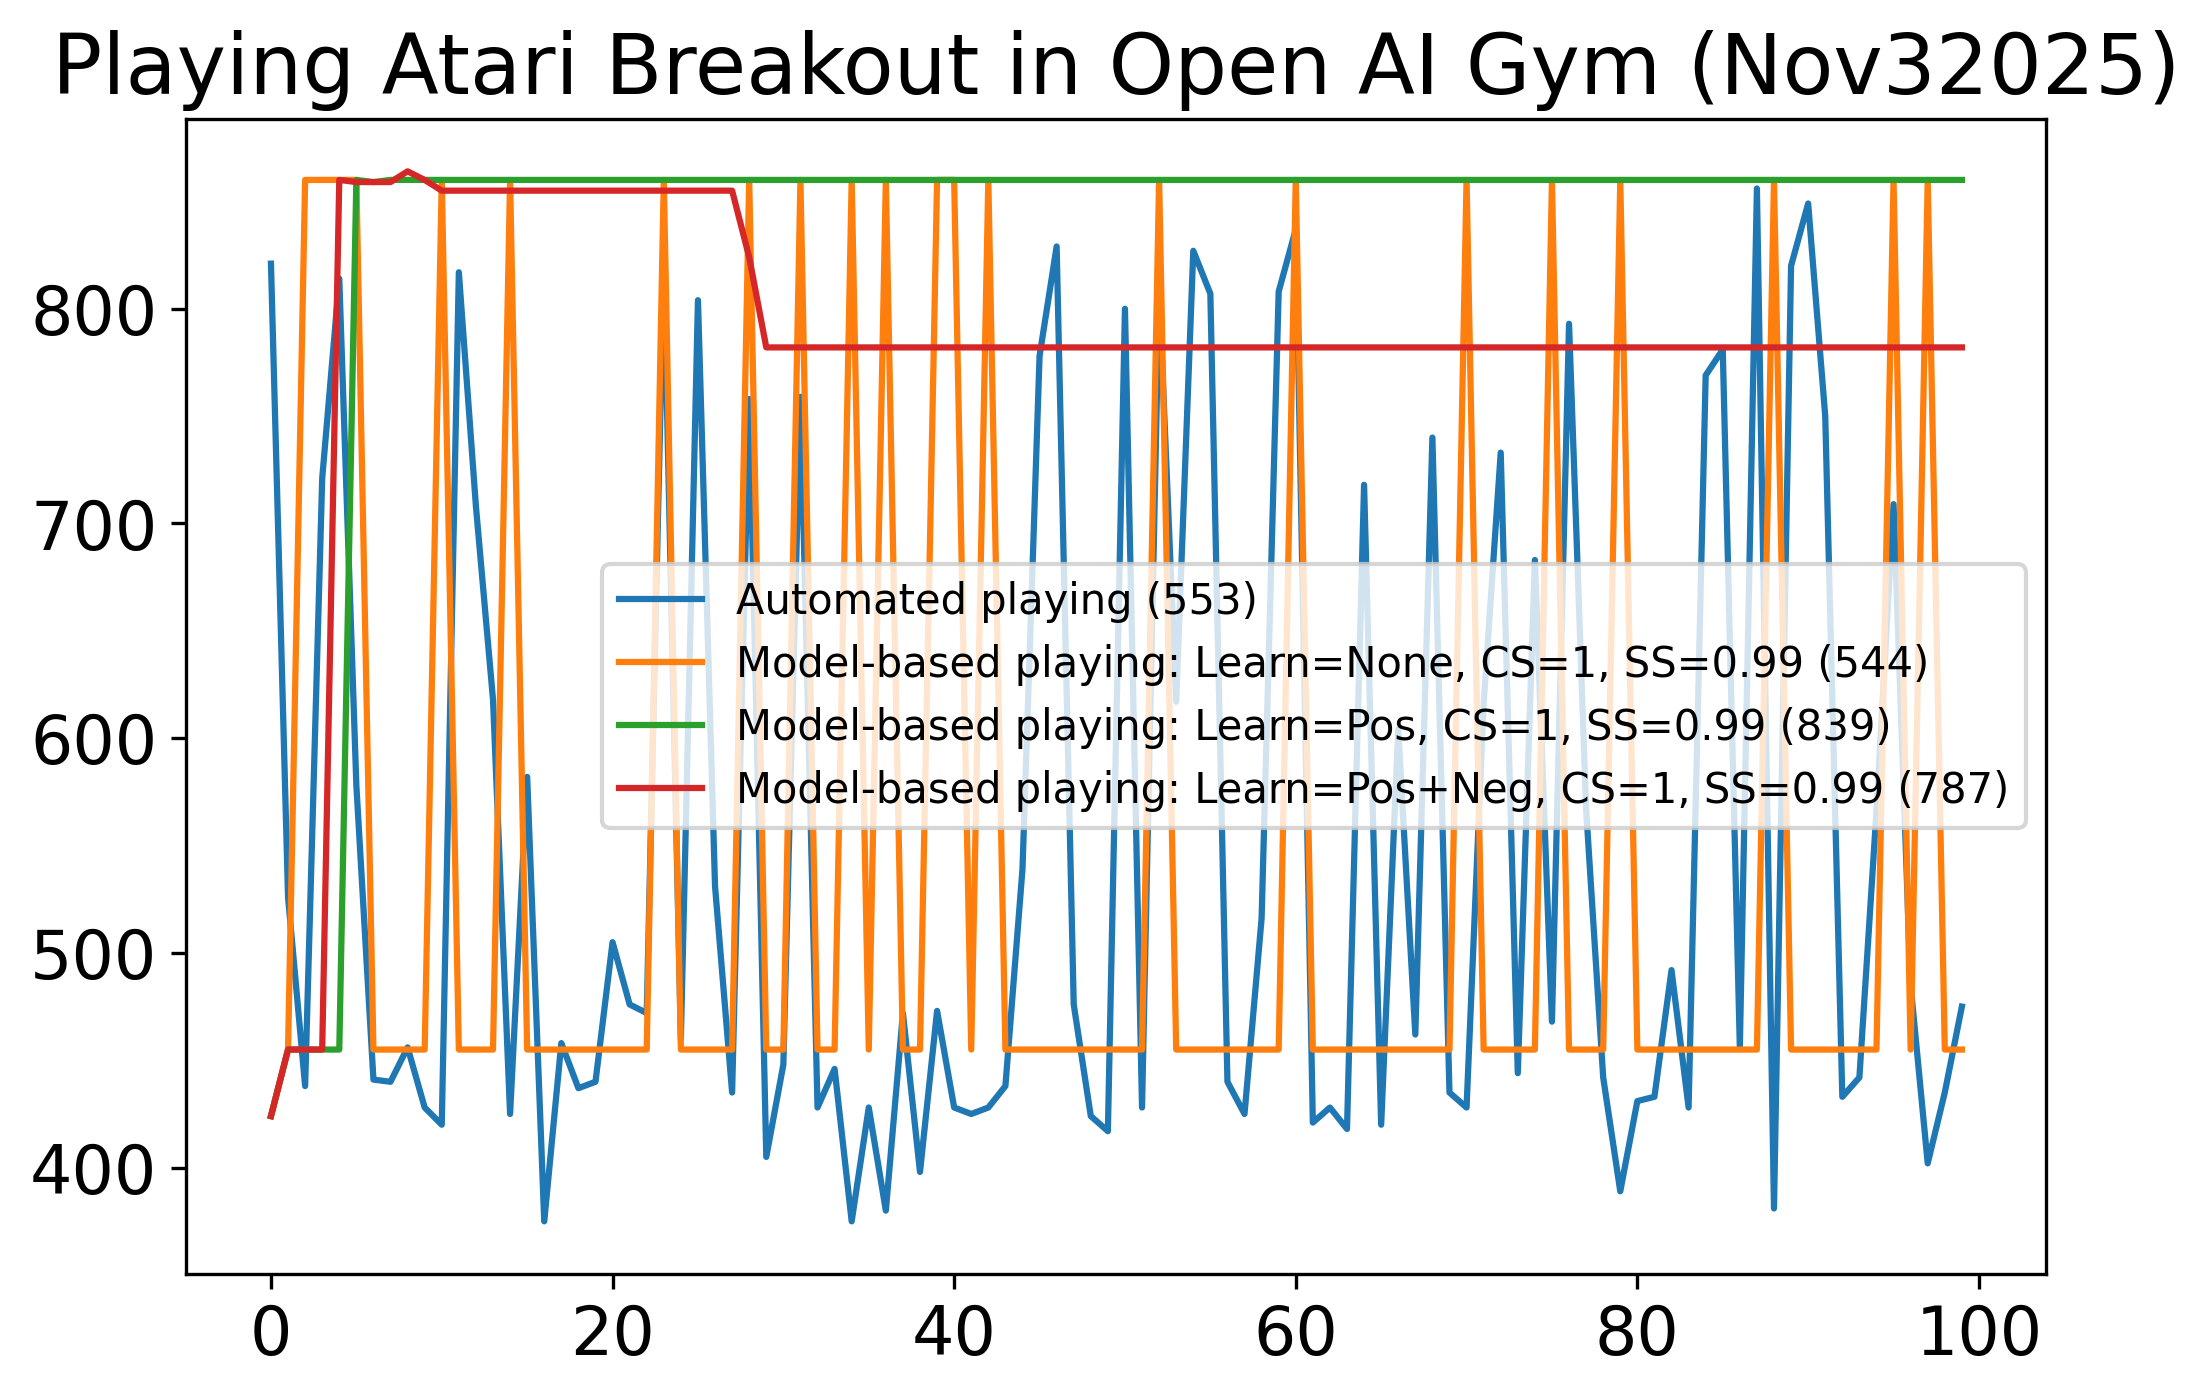

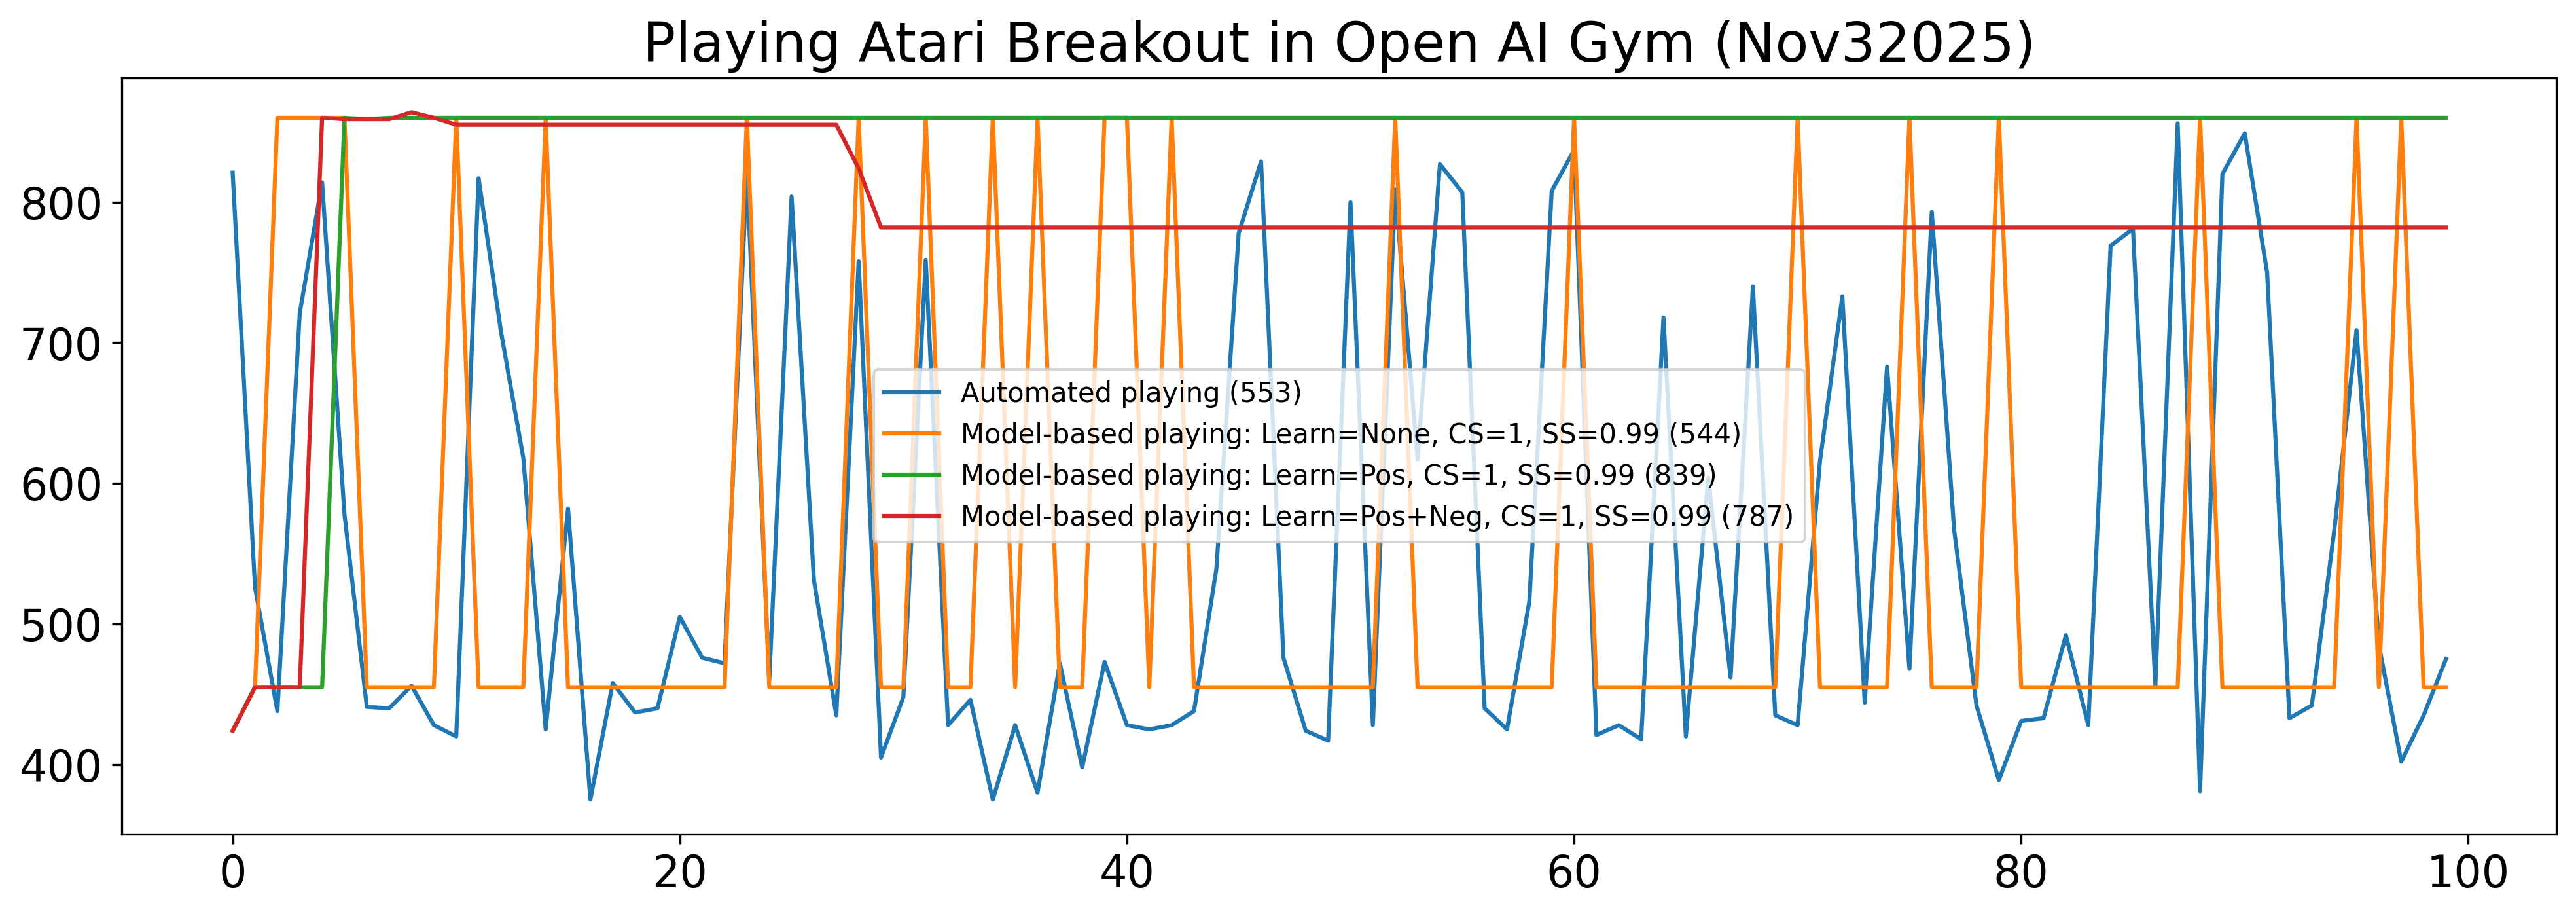

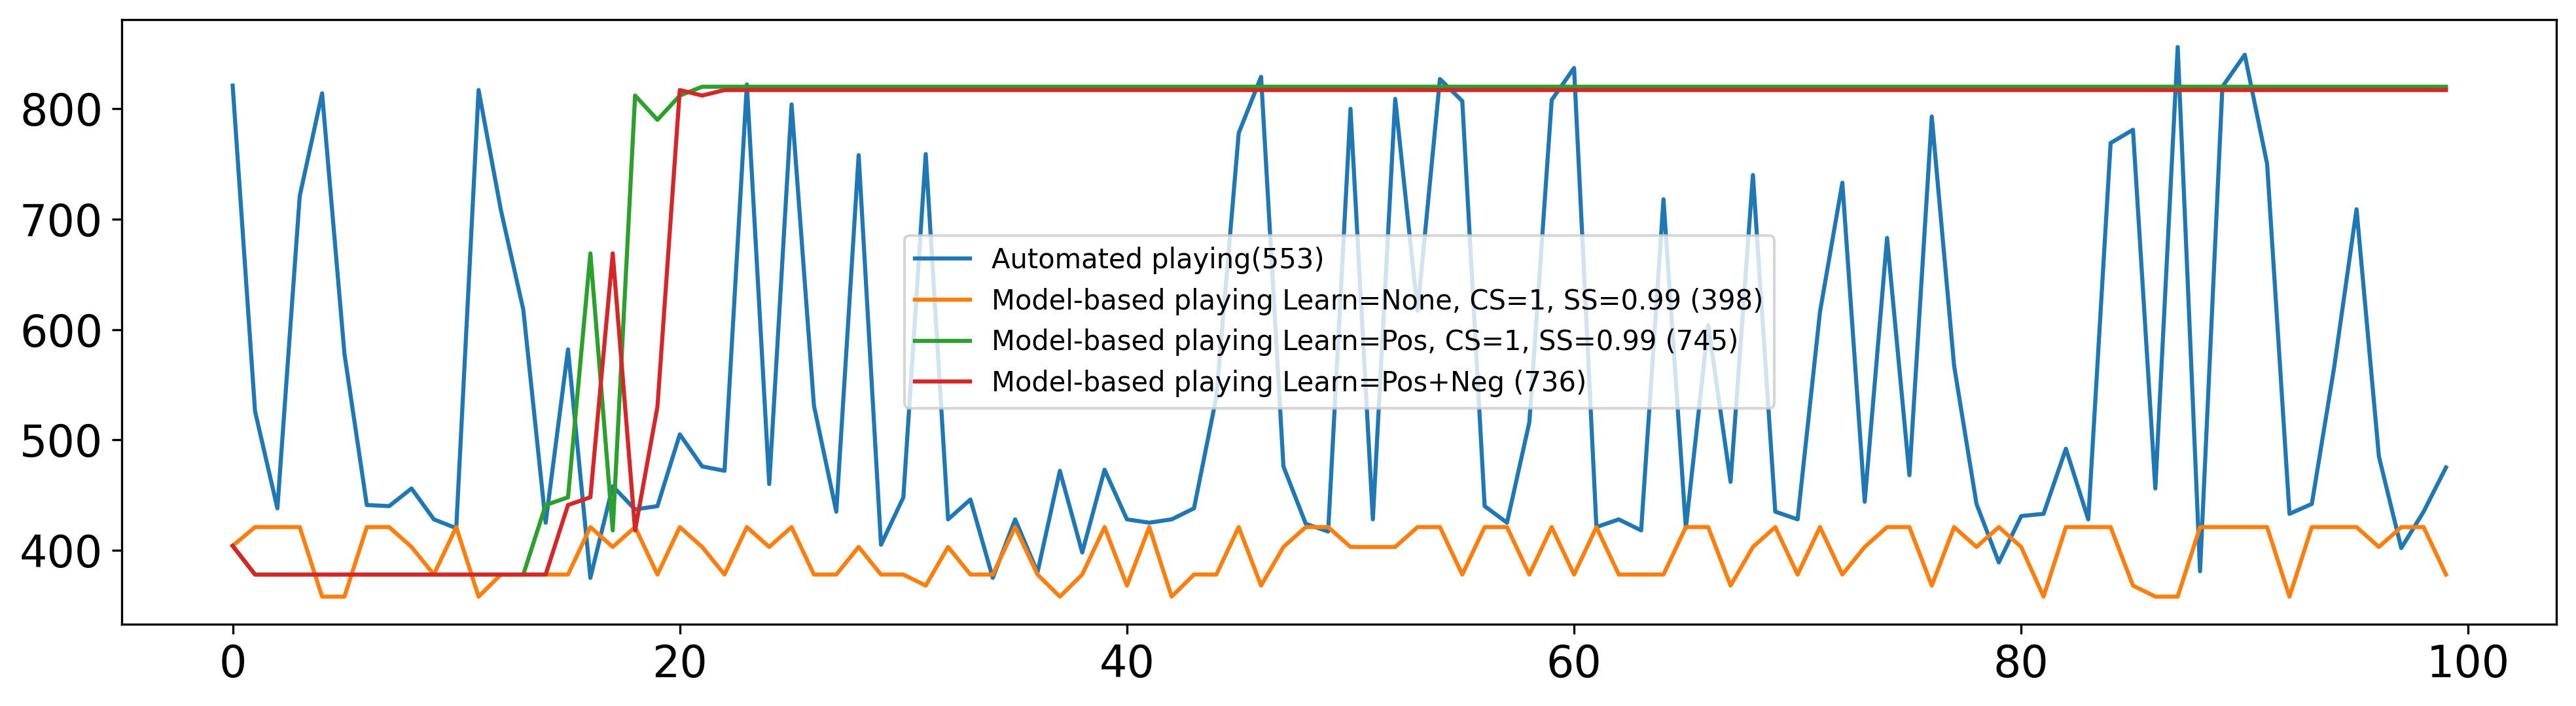

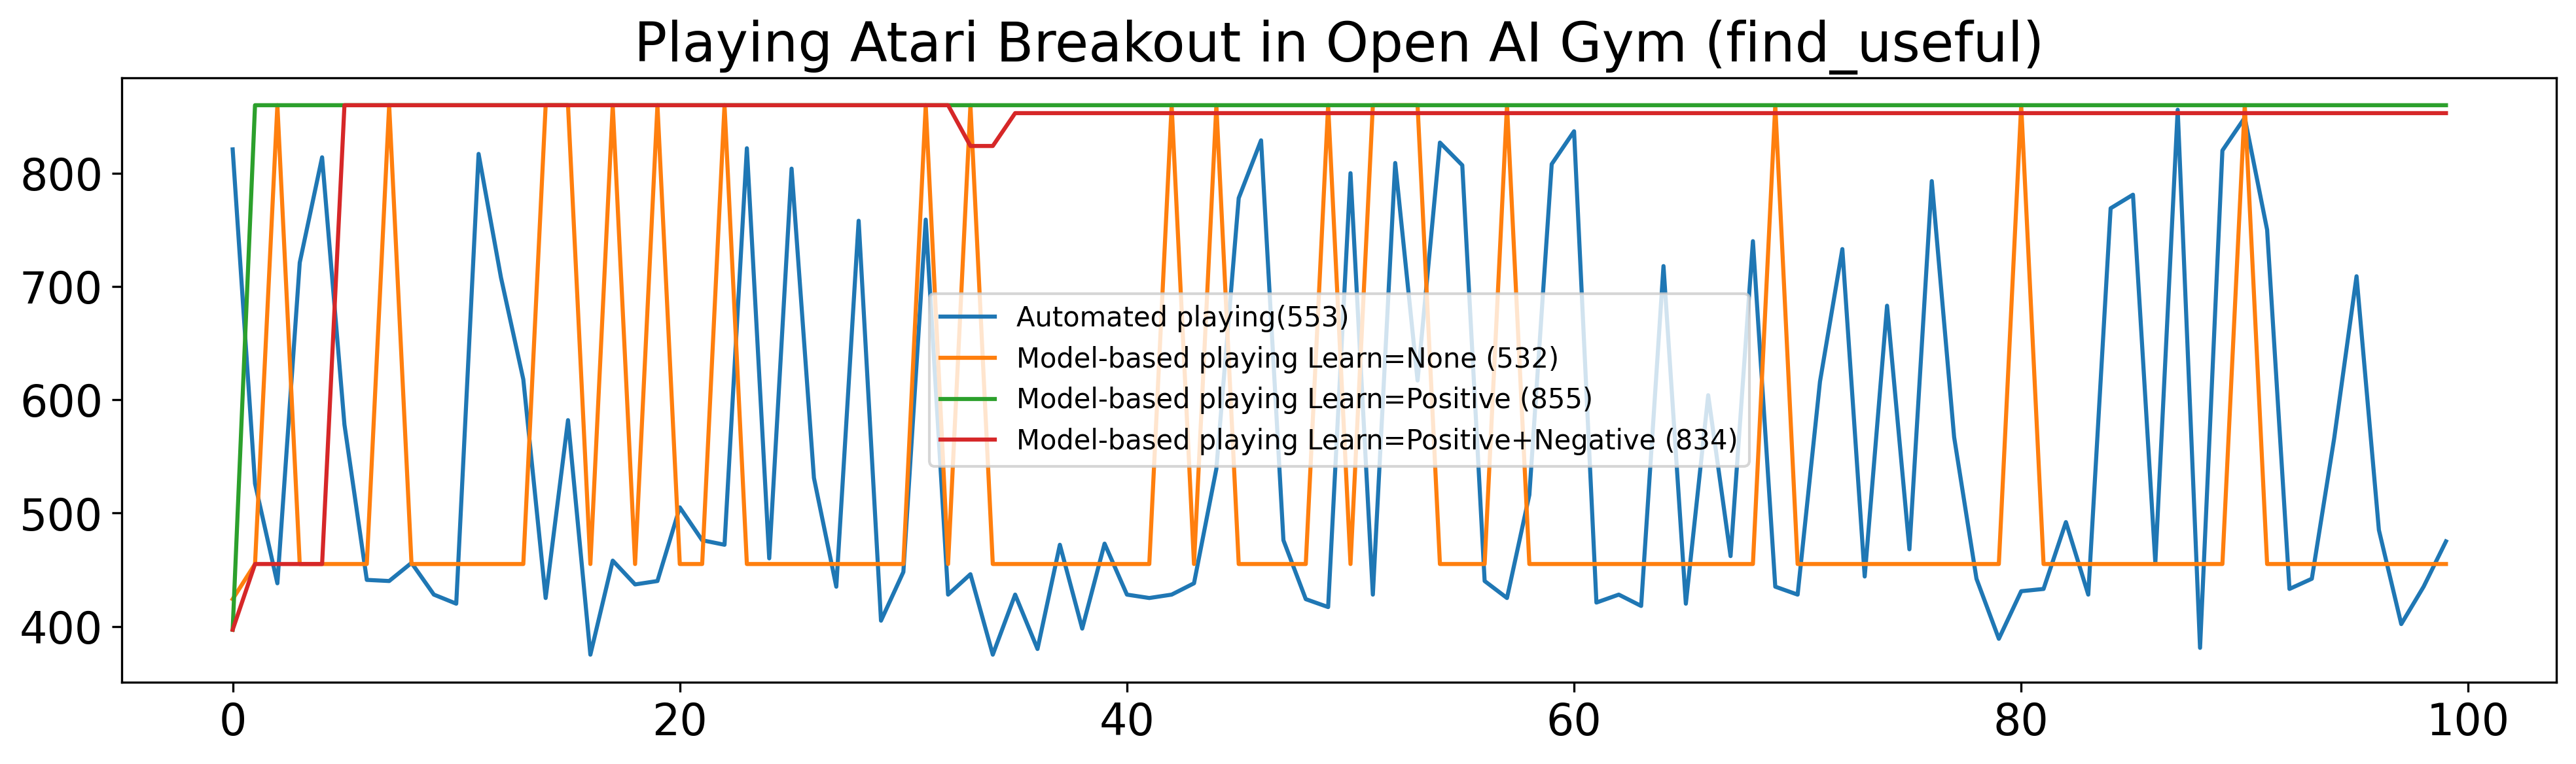

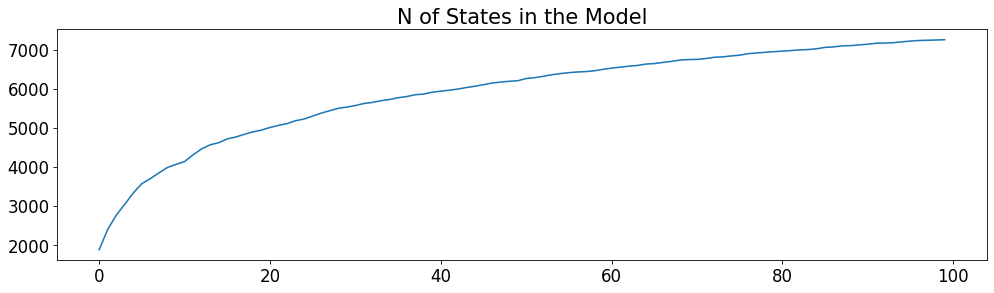

In [11]:
# learn_mode=0/1/2, T=1, state count_threshold=2, similarity_threshold=0.99, transition utility_thereshold=0, count_threshold=1

scores0 = [821.0, 526.0, 438.0, 721.0, 814.0, 578.0, 441.0, 440.0, 456.0, 428.0, 420.0, 817.0, 708.0, 618.0, 425.0, 582.0, 375.0, 458.0, 437.0, 440.0, 505.0, 476.0, 472.0, 822.0, 460.0, 804.0, 531.0, 435.0, 758.0, 405.0, 448.0, 759.0, 428.0, 446.0, 375.0, 428.0, 380.0, 472.0, 398.0, 473.0, 428.0, 425.0, 428.0, 438.0, 539.0, 778.0, 829.0, 476.0, 424.0, 417.0, 800.0, 428.0, 809.0, 617.0, 827.0, 807.0, 440.0, 425.0, 516.0, 808.0, 837.0, 421.0, 428.0, 418.0, 718.0, 420.0, 604.0, 462.0, 740.0, 435.0, 428.0, 616.0, 733.0, 444.0, 683.0, 468.0, 793.0, 567.0, 442.0, 389.0, 431.0, 433.0, 492.0, 428.0, 769.0, 781.0, 456.0, 856.0, 381.0, 820.0, 849.0, 750.0, 433.0, 442.0, 566.0, 709.0, 485.0, 402.0, 435.0, 475.0]

scores1 = [424.0, 455.0, 860.0, 860.0, 860.0, 860.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 455.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 455.0, 860.0, 455.0, 455.0, 860.0, 455.0, 860.0, 455.0, 455.0, 860.0, 860.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 455.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 860.0, 455.0, 455.0]
scores2 = [424.0, 455.0, 455.0, 455.0, 455.0, 860.0, 859.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0]
scores3 = [424.0, 455.0, 455.0, 455.0, 860.0, 859.0, 859.0, 859.0, 864.0, 860.0, 855.0, 855.0, 855.0, 855.0, 855.0, 855.0, 855.0, 855.0, 855.0, 855.0, 855.0, 855.0, 855.0, 855.0, 855.0, 855.0, 855.0, 855.0, 824.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0, 782.0]

for s in [scores0,scores1,scores2,scores3]:
    print(max(s),round(sum(s)/len(s)))

scores11 = [404.0, 421.0, 421.0, 421.0, 358.0, 358.0, 421.0, 421.0, 403.0, 378.0, 421.0, 358.0, 378.0, 378.0, 378.0, 378.0, 421.0, 403.0, 421.0, 378.0, 421.0, 403.0, 378.0, 421.0, 403.0, 421.0, 378.0, 378.0, 403.0, 378.0, 378.0, 368.0, 403.0, 378.0, 378.0, 421.0, 378.0, 358.0, 378.0, 421.0, 368.0, 421.0, 358.0, 378.0, 378.0, 421.0, 368.0, 403.0, 421.0, 421.0, 403.0, 403.0, 403.0, 421.0, 421.0, 378.0, 421.0, 421.0, 378.0, 421.0, 378.0, 421.0, 378.0, 378.0, 378.0, 421.0, 421.0, 368.0, 403.0, 421.0, 378.0, 421.0, 378.0, 403.0, 421.0, 421.0, 368.0, 421.0, 403.0, 421.0, 403.0, 358.0, 421.0, 421.0, 421.0, 368.0, 358.0, 358.0, 421.0, 421.0, 421.0, 421.0, 358.0, 421.0, 421.0, 421.0, 403.0, 421.0, 421.0, 378.0]
scores12 = [404.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 441.0, 448.0, 669.0, 418.0, 812.0, 790.0, 812.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0, 820.0]
scores13 = [404.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 378.0, 441.0, 448.0, 669.0, 418.0, 530.0, 817.0, 812.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0, 817.0]

scores21 = [424.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 860.0, 860.0, 455.0, 860.0, 455.0, 860.0, 455.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 860.0, 860.0, 860.0, 455.0, 455.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 860.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0, 455.0]
scores22 = [397.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0]
scores23 = [397.0, 455.0, 455.0, 455.0, 455.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 860.0, 824.0, 824.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0, 853.0]

plt.rcParams["figure.dpi"] = 300
df = pd.DataFrame({f'Automated playing ({round(np.mean(scores0))})': pd.Series(scores0), 
                   f'Model-based playing: Learn=None, CS=1, SS=0.99 ({round(np.mean(scores1))})': pd.Series(scores1),
                   f'Model-based playing: Learn=Pos, CS=1, SS=0.99 ({round(np.mean(scores2))})': pd.Series(scores2),
                   f'Model-based playing: Learn=Pos+Neg, CS=1, SS=0.99 ({round(np.mean(scores3))})': pd.Series(scores3)})
p = df.plot(figsize=(8, 5),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

plt.rcParams["figure.dpi"] = 300
df = pd.DataFrame({f'Automated playing ({round(np.mean(scores0))})': pd.Series(scores0), 
                   f'Model-based playing: Learn=None, CS=1, SS=0.99 ({round(np.mean(scores1))})': pd.Series(scores1),
                   f'Model-based playing: Learn=Pos, CS=1, SS=0.99 ({round(np.mean(scores2))})': pd.Series(scores2),
                   f'Model-based playing: Learn=Pos+Neg, CS=1, SS=0.99 ({round(np.mean(scores3))})': pd.Series(scores3)})
p = df.plot(figsize=(16, 5),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Automated playing({round(np.mean(scores0))})': pd.Series(scores0), 
                   f'Model-based playing Learn=None, CS=1, SS=0.99 ({round(np.mean(scores11))})': pd.Series(scores11),
                   f'Model-based playing Learn=Pos, CS=1, SS=0.99 ({round(np.mean(scores12))})': pd.Series(scores12),
                   f'Model-based playing Learn=Pos+Neg ({round(np.mean(scores13))})': pd.Series(scores13)
                  })
#p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (find_useful_action)", fontsize=20);plt.show()
p = df.plot(figsize=(16, 4),fontsize=16);plt.show()

df = pd.DataFrame({f'Automated playing({round(np.mean(scores0))})': pd.Series(scores0), 
                   f'Model-based playing Learn=None ({round(np.mean(scores21))})': pd.Series(scores21),
                   f'Model-based playing Learn=Positive ({round(np.mean(scores22))})': pd.Series(scores22),
                   f'Model-based playing Learn=Positive+Negative ({round(np.mean(scores23))})': pd.Series(scores23)
                  })
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (find_useful)", fontsize=20);plt.show()

plt.rcParams["figure.dpi"] = 75
states = [1881, 2401, 2765, 3044, 3334, 3571, 3700, 3846, 3985, 4063, 4135, 4307, 4459, 4564, 4618, 4715, 4763, 4831, 4893, 4940, 5007, 5060, 5105, 5180, 5223, 5299, 5374, 5436, 5497, 5528, 5568, 5620, 5647, 5691, 5722, 5767, 5797, 5843, 5862, 5908, 5936, 5959, 5989, 6028, 6061, 6101, 6142, 6168, 6187, 6202, 6258, 6281, 6315, 6355, 6385, 6408, 6426, 6436, 6457, 6493, 6525, 6548, 6574, 6592, 6627, 6641, 6670, 6696, 6730, 6743, 6748, 6769, 6801, 6812, 6836, 6856, 6894, 6913, 6929, 6945, 6959, 6973, 6990, 6999, 7019, 7055, 7068, 7093, 7100, 7117, 7136, 7161, 7166, 7174, 7196, 7216, 7231, 7237, 7243, 7251]
p = pd.Series(states).plot.line(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model", fontsize=20)

## 2025-11-08
### Learn from the scratch on 1000 games, up to 108000 steps

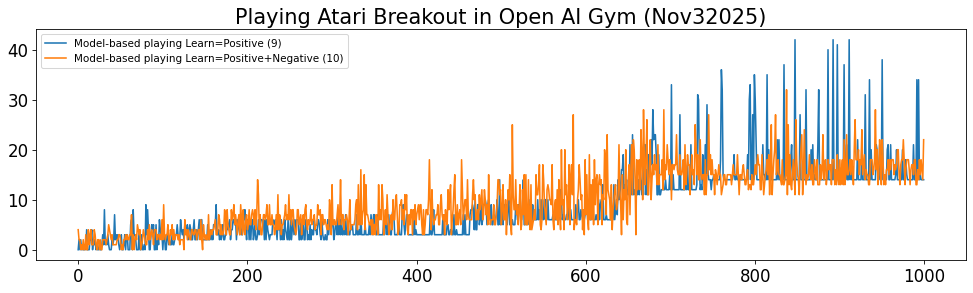

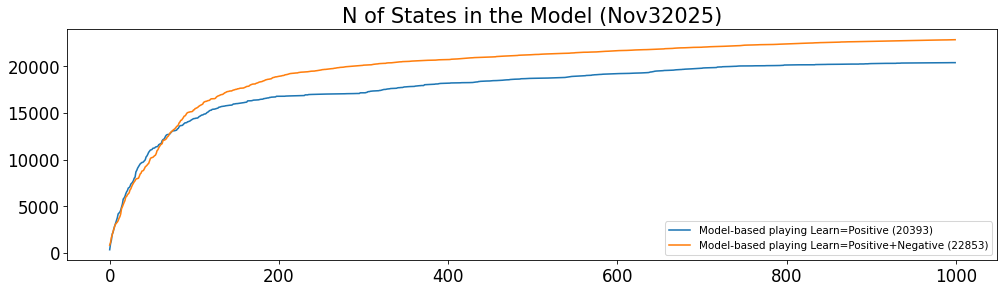

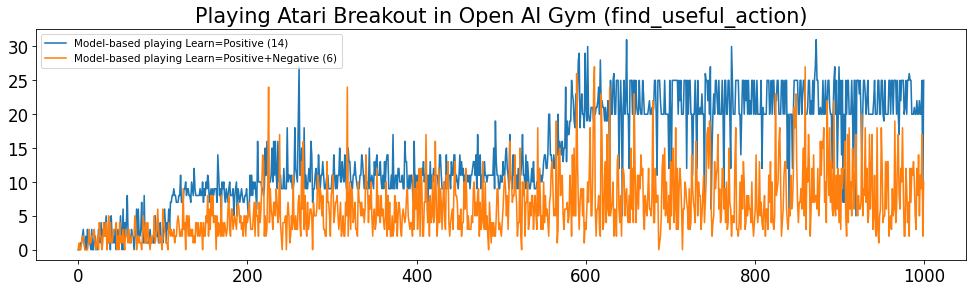

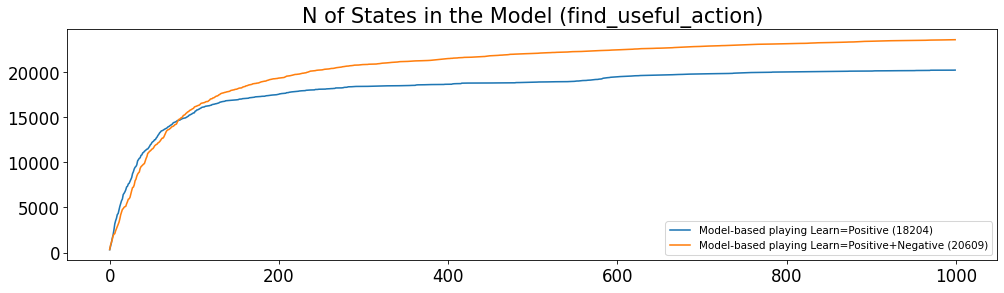

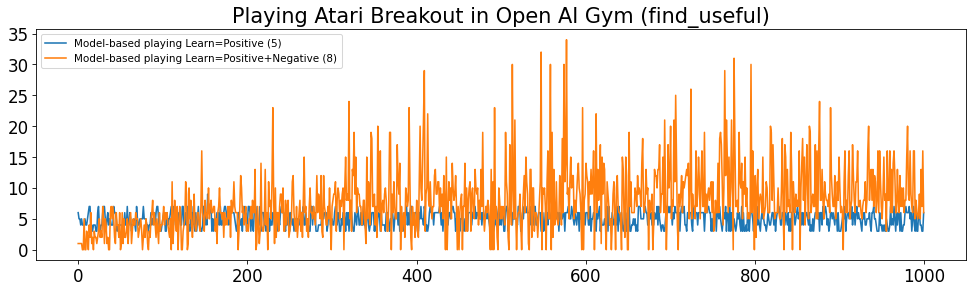

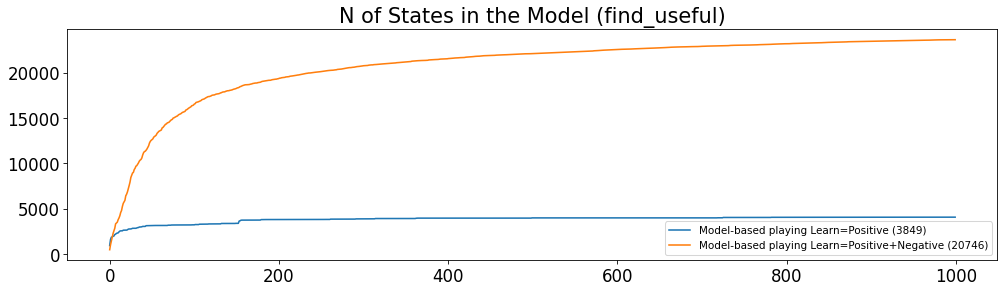

In [23]:
plt.rcParams["figure.dpi"] = 75

# learn_mode=0/1/2, T=1, state count_threshold=2, similarity_threshold=0.99, transition utility_thereshold=0, count_threshold=1

# BreakoutModelDrivenNov32025 L=PO DONE 
# BreakoutModelDrivenNov32025 L=PN DONE
scores11 = [0, 2.0, 0, 2.0, 0, 1.0, 0, 0, 1.0, 0, 4.0, 0, 0, 0, 2.0, 2.0, 4.0, 0, 2.0, 1.0, 2.0, 0, 1.0, 0, 0, 1.0, 0, 0, 1.0, 3.0, 1.0, 8.0, 1.0, 2.0, 1.0, 3.0, 1.0, 0, 0, 0, 2.0, 1.0, 2.0, 7.0, 2.0, 3.0, 2.0, 3.0, 1.0, 0, 1.0, 3.0, 0, 0, 1.0, 3.0, 0, 3.0, 3.0, 0, 0, 0, 5.0, 6.0, 0, 8.0, 3.0, 3.0, 2.0, 0, 0, 0, 4.0, 0, 0, 3.0, 0, 0, 1.0, 0, 9.0, 3.0, 8.0, 4.0, 0, 0, 3.0, 5.0, 4.0, 5.0, 0, 0, 5.0, 0, 3.0, 1.0, 6.0, 4.0, 3.0, 3.0, 0, 3.0, 3.0, 0, 0, 3.0, 3.0, 1.0, 2.0, 1.0, 1.0, 3.0, 1.0, 1.0, 2.0, 3.0, 3.0, 5.0, 3.0, 2.0, 2.0, 6.0, 4.0, 3.0, 4.0, 2.0, 5.0, 4.0, 3.0, 5.0, 2.0, 4.0, 5.0, 4.0, 2.0, 2.0, 4.0, 6.0, 2.0, 2.0, 4.0, 2.0, 4.0, 6.0, 3.0, 6.0, 6.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 5.0, 2.0, 2.0, 4.0, 2.0, 4.0, 2.0, 5.0, 5.0, 5.0, 9.0, 3.0, 3.0, 4.0, 2.0, 3.0, 2.0, 3.0, 5.0, 2.0, 2.0, 3.0, 3.0, 6.0, 4.0, 5.0, 6.0, 2.0, 4.0, 4.0, 6.0, 6.0, 5.0, 6.0, 2.0, 6.0, 5.0, 4.0, 3.0, 5.0, 3.0, 3.0, 6.0, 6.0, 8.0, 4.0, 2.0, 6.0, 6.0, 2.0, 6.0, 2.0, 6.0, 6.0, 2.0, 3.0, 6.0, 2.0, 2.0, 3.0, 6.0, 3.0, 6.0, 6.0, 6.0, 5.0, 6.0, 2.0, 6.0, 2.0, 6.0, 4.0, 3.0, 2.0, 3.0, 3.0, 3.0, 6.0, 5.0, 5.0, 6.0, 4.0, 2.0, 6.0, 4.0, 6.0, 2.0, 6.0, 2.0, 4.0, 2.0, 6.0, 4.0, 3.0, 2.0, 6.0, 2.0, 2.0, 6.0, 2.0, 4.0, 6.0, 3.0, 6.0, 3.0, 6.0, 6.0, 6.0, 2.0, 2.0, 6.0, 2.0, 3.0, 6.0, 2.0, 2.0, 6.0, 6.0, 2.0, 3.0, 2.0, 5.0, 2.0, 4.0, 3.0, 3.0, 6.0, 4.0, 4.0, 3.0, 5.0, 6.0, 5.0, 3.0, 2.0, 6.0, 3.0, 2.0, 2.0, 3.0, 2.0, 2.0, 6.0, 3.0, 6.0, 6.0, 4.0, 6.0, 6.0, 2.0, 3.0, 5.0, 5.0, 3.0, 7.0, 3.0, 6.0, 3.0, 7.0, 3.0, 3.0, 5.0, 3.0, 7.0, 3.0, 3.0, 4.0, 3.0, 3.0, 5.0, 4.0, 5.0, 3.0, 3.0, 3.0, 3.0, 7.0, 3.0, 3.0, 4.0, 3.0, 7.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 7.0, 5.0, 3.0, 7.0, 7.0, 4.0, 3.0, 3.0, 7.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.0, 3.0, 5.0, 6.0, 3.0, 4.0, 7.0, 4.0, 3.0, 3.0, 7.0, 8.0, 7.0, 3.0, 3.0, 3.0, 3.0, 4.0, 5.0, 3.0, 3.0, 3.0, 8.0, 9.0, 5.0, 3.0, 5.0, 7.0, 7.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 7.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 7.0, 3.0, 3.0, 4.0, 8.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 7.0, 3.0, 3.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 7.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 7.0, 3.0, 7.0, 3.0, 3.0, 3.0, 3.0, 3.0, 7.0, 8.0, 8.0, 9.0, 8.0, 4.0, 10.0, 4.0, 4.0, 9.0, 9.0, 5.0, 6.0, 9.0, 5.0, 6.0, 9.0, 9.0, 10.0, 9.0, 5.0, 9.0, 10.0, 8.0, 6.0, 9.0, 5.0, 5.0, 7.0, 6.0, 6.0, 7.0, 10.0, 5.0, 5.0, 14.0, 5.0, 6.0, 9.0, 5.0, 8.0, 9.0, 9.0, 9.0, 5.0, 9.0, 10.0, 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 9.0, 9.0, 6.0, 9.0, 8.0, 9.0, 6.0, 6.0, 9.0, 14.0, 5.0, 5.0, 10.0, 5.0, 8.0, 9.0, 5.0, 10.0, 5.0, 5.0, 9.0, 6.0, 6.0, 6.0, 6.0, 6.0, 10.0, 6.0, 8.0, 6.0, 10.0, 6.0, 10.0, 6.0, 7.0, 10.0, 10.0, 6.0, 10.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 8.0, 6.0, 6.0, 7.0, 6.0, 6.0, 7.0, 12.0, 10.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 7.0, 9.0, 6.0, 6.0, 8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 9.0, 6.0, 8.0, 10.0, 6.0, 6.0, 8.0, 7.0, 6.0, 6.0, 6.0, 7.0, 10.0, 10.0, 6.0, 10.0, 9.0, 6.0, 6.0, 7.0, 10.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 10.0, 6.0, 9.0, 10.0, 10.0, 13.0, 6.0, 6.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 13.0, 6.0, 8.0, 10.0, 7.0, 14.0, 10.0, 11.0, 13.0, 16.0, 16.0, 19.0, 11.0, 13.0, 12.0, 14.0, 11.0, 12.0, 11.0, 21.0, 12.0, 11.0, 23.0, 11.0, 12.0, 11.0, 11.0, 12.0, 11.0, 14.0, 11.0, 16.0, 14.0, 11.0, 14.0, 11.0, 21.0, 21.0, 11.0, 16.0, 11.0, 19.0, 19.0, 16.0, 22.0, 17.0, 28.0, 22.0, 23.0, 23.0, 19.0, 11.0, 11.0, 19.0, 11.0, 11.0, 12.0, 12.0, 12.0, 12.0, 12.0, 14.0, 12.0, 12.0, 12.0, 12.0, 15.0, 12.0, 33.0, 12.0, 15.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 27.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 15.0, 12.0, 17.0, 12.0, 12.0, 12.0, 21.0, 12.0, 12.0, 12.0, 12.0, 12.0, 12.0, 13.0, 31.0, 30.0, 17.0, 12.0, 13.0, 12.0, 19.0, 14.0, 14.0, 21.0, 15.0, 29.0, 16.0, 14.0, 14.0, 14.0, 12.0, 14.0, 14.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 18.0, 36.0, 32.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 19.0, 14.0, 14.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 19.0, 14.0, 30.0, 33.0, 14.0, 15.0, 27.0, 14.0, 35.0, 30.0, 22.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 21.0, 15.0, 15.0, 14.0, 14.0, 35.0, 14.0, 20.0, 14.0, 18.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 22.0, 14.0, 22.0, 14.0, 14.0, 14.0, 14.0, 14.0, 37.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 18.0, 21.0, 14.0, 14.0, 14.0, 42.0, 14.0, 14.0, 14.0, 14.0, 14.0, 27.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 32.0, 14.0, 14.0, 14.0, 14.0, 14.0, 20.0, 14.0, 21.0, 14.0, 15.0, 14.0, 14.0, 14.0, 21.0, 32.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 40.0, 14.0, 14.0, 14.0, 14.0, 14.0, 42.0, 14.0, 14.0, 14.0, 14.0, 41.0, 14.0, 14.0, 15.0, 14.0, 14.0, 14.0, 14.0, 37.0, 14.0, 14.0, 21.0, 14.0, 14.0, 42.0, 14.0, 16.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 22.0, 14.0, 14.0, 14.0, 14.0, 21.0, 14.0, 14.0, 14.0, 31.0, 14.0, 14.0, 14.0, 14.0, 34.0, 14.0, 20.0, 14.0, 14.0, 14.0, 14.0, 14.0, 21.0, 20.0, 14.0, 14.0, 21.0, 14.0, 14.0, 38.0, 14.0, 14.0, 14.0, 14.0, 14.0, 20.0, 21.0, 14.0, 14.0, 21.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 20.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 20.0, 14.0, 14.0, 14.0, 18.0, 15.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 21.0, 14.0, 14.0, 14.0, 34.0, 14.0, 34.0, 14.0, 15.0, 14.0, 14.0, 14.0, 14.0]
states11 = states = [335, 977, 1353, 2015, 2192, 2614, 2908, 3184, 3493, 3751, 4170, 4265, 4367, 4576, 4897, 5227, 5763, 5878, 6046, 6329, 6545, 6684, 6953, 6989, 7122, 7372, 7458, 7581, 7737, 8002, 8124, 8680, 8846, 9081, 9227, 9365, 9534, 9610, 9687, 9697, 9767, 9865, 9974, 10277, 10386, 10561, 10769, 10890, 11013, 11052, 11082, 11208, 11231, 11242, 11325, 11377, 11380, 11439, 11597, 11644, 11706, 11718, 12031, 12143, 12187, 12305, 12505, 12625, 12677, 12692, 12702, 12738, 12868, 12962, 13030, 13083, 13092, 13096, 13133, 13151, 13294, 13339, 13511, 13616, 13648, 13653, 13676, 13776, 13864, 13938, 13945, 13965, 14047, 14069, 14112, 14144, 14219, 14276, 14346, 14385, 14398, 14409, 14443, 14444, 14461, 14544, 14630, 14665, 14735, 14781, 14783, 14849, 14886, 14894, 14949, 15045, 15086, 15158, 15243, 15286, 15293, 15374, 15395, 15403, 15411, 15437, 15471, 15489, 15524, 15614, 15623, 15659, 15688, 15701, 15706, 15724, 15740, 15767, 15777, 15781, 15798, 15803, 15828, 15839, 15840, 15877, 15953, 15961, 15971, 15994, 15996, 16005, 16018, 16030, 16054, 16066, 16075, 16091, 16096, 16114, 16139, 16145, 16169, 16293, 16294, 16301, 16304, 16308, 16317, 16351, 16375, 16383, 16383, 16387, 16392, 16399, 16407, 16434, 16458, 16461, 16474, 16479, 16538, 16539, 16565, 16571, 16601, 16614, 16616, 16665, 16666, 16692, 16701, 16702, 16706, 16709, 16719, 16785, 16785, 16785, 16785, 16786, 16786, 16786, 16788, 16790, 16792, 16792, 16809, 16810, 16813, 16819, 16821, 16825, 16828, 16828, 16836, 16837, 16839, 16843, 16845, 16845, 16845, 16851, 16851, 16853, 16860, 16862, 16866, 16866, 16867, 16938, 16938, 16938, 16938, 16971, 16972, 16975, 16977, 16985, 16988, 16988, 16988, 17004, 17006, 17006, 17006, 17006, 17006, 17007, 17013, 17013, 17022, 17023, 17024, 17025, 17026, 17027, 17029, 17030, 17031, 17031, 17031, 17033, 17033, 17035, 17035, 17037, 17044, 17044, 17045, 17046, 17048, 17049, 17052, 17055, 17056, 17056, 17057, 17064, 17065, 17065, 17068, 17070, 17071, 17074, 17074, 17076, 17076, 17081, 17085, 17085, 17086, 17086, 17086, 17087, 17157, 17158, 17160, 17161, 17161, 17161, 17161, 17193, 17208, 17271, 17288, 17292, 17323, 17337, 17344, 17353, 17358, 17359, 17372, 17374, 17381, 17384, 17385, 17414, 17415, 17440, 17475, 17500, 17518, 17518, 17524, 17550, 17566, 17570, 17584, 17594, 17618, 17624, 17630, 17635, 17640, 17640, 17643, 17648, 17686, 17704, 17707, 17712, 17727, 17728, 17731, 17763, 17787, 17787, 17797, 17811, 17813, 17822, 17823, 17831, 17835, 17837, 17842, 17843, 17846, 17875, 17881, 17883, 17903, 17918, 17922, 17924, 17938, 17938, 17939, 17939, 18025, 18030, 18030, 18035, 18038, 18042, 18045, 18050, 18060, 18062, 18072, 18074, 18081, 18103, 18104, 18112, 18113, 18142, 18158, 18165, 18169, 18169, 18171, 18173, 18178, 18178, 18190, 18193, 18193, 18195, 18196, 18215, 18216, 18217, 18217, 18223, 18225, 18226, 18226, 18226, 18230, 18231, 18231, 18243, 18244, 18244, 18248, 18249, 18249, 18249, 18249, 18249, 18251, 18253, 18256, 18256, 18259, 18266, 18282, 18297, 18316, 18318, 18327, 18332, 18369, 18371, 18389, 18391, 18399, 18405, 18406, 18414, 18416, 18420, 18421, 18423, 18426, 18428, 18439, 18449, 18461, 18462, 18462, 18466, 18468, 18471, 18475, 18485, 18485, 18485, 18485, 18497, 18507, 18521, 18526, 18536, 18540, 18548, 18550, 18556, 18558, 18582, 18586, 18601, 18602, 18610, 18615, 18618, 18619, 18627, 18630, 18630, 18633, 18642, 18666, 18667, 18668, 18674, 18675, 18679, 18685, 18688, 18695, 18703, 18703, 18703, 18712, 18712, 18712, 18714, 18715, 18720, 18720, 18720, 18722, 18723, 18727, 18733, 18734, 18734, 18734, 18734, 18734, 18735, 18735, 18737, 18742, 18745, 18747, 18749, 18754, 18757, 18761, 18761, 18766, 18780, 18780, 18783, 18783, 18784, 18786, 18789, 18789, 18789, 18789, 18789, 18805, 18817, 18827, 18844, 18854, 18872, 18890, 18907, 18914, 18917, 18918, 18929, 18937, 18940, 18945, 18945, 18960, 18966, 18969, 18971, 18977, 18982, 18987, 18989, 18994, 19017, 19018, 19020, 19023, 19032, 19038, 19040, 19069, 19071, 19088, 19093, 19093, 19100, 19109, 19114, 19127, 19128, 19131, 19136, 19150, 19155, 19159, 19168, 19169, 19172, 19176, 19178, 19183, 19185, 19187, 19188, 19202, 19203, 19205, 19205, 19209, 19212, 19216, 19221, 19221, 19222, 19228, 19232, 19234, 19234, 19236, 19237, 19237, 19239, 19239, 19240, 19243, 19249, 19251, 19254, 19261, 19262, 19268, 19272, 19274, 19279, 19281, 19281, 19283, 19289, 19289, 19292, 19294, 19297, 19299, 19300, 19300, 19321, 19331, 19335, 19369, 19391, 19395, 19411, 19421, 19446, 19472, 19485, 19493, 19498, 19508, 19509, 19513, 19514, 19527, 19532, 19534, 19552, 19553, 19559, 19559, 19560, 19567, 19570, 19573, 19574, 19577, 19588, 19590, 19605, 19612, 19624, 19631, 19633, 19642, 19651, 19652, 19657, 19660, 19675, 19676, 19691, 19695, 19698, 19705, 19712, 19716, 19716, 19716, 19726, 19731, 19740, 19743, 19751, 19760, 19762, 19771, 19774, 19776, 19778, 19785, 19795, 19798, 19821, 19822, 19833, 19834, 19839, 19841, 19843, 19847, 19848, 19849, 19854, 19861, 19861, 19862, 19864, 19867, 19871, 19917, 19924, 19931, 19932, 19932, 19932, 19954, 19959, 19959, 19962, 19966, 19966, 19966, 19970, 19975, 19980, 19988, 19990, 19990, 19995, 19997, 20003, 20003, 20015, 20021, 20029, 20036, 20037, 20037, 20038, 20038, 20038, 20038, 20038, 20038, 20038, 20038, 20038, 20039, 20039, 20039, 20046, 20051, 20056, 20056, 20056, 20056, 20057, 20057, 20058, 20058, 20058, 20059, 20061, 20061, 20061, 20061, 20071, 20071, 20073, 20074, 20075, 20078, 20078, 20078, 20078, 20078, 20078, 20079, 20079, 20079, 20079, 20079, 20089, 20089, 20098, 20105, 20105, 20106, 20137, 20139, 20143, 20147, 20152, 20154, 20154, 20154, 20154, 20154, 20154, 20154, 20157, 20160, 20160, 20160, 20160, 20161, 20161, 20161, 20161, 20164, 20164, 20164, 20164, 20164, 20164, 20164, 20164, 20164, 20164, 20164, 20164, 20164, 20164, 20164, 20166, 20186, 20191, 20191, 20191, 20191, 20191, 20191, 20191, 20193, 20200, 20200, 20202, 20202, 20209, 20209, 20209, 20209, 20209, 20209, 20213, 20213, 20213, 20214, 20214, 20214, 20214, 20220, 20220, 20220, 20222, 20224, 20226, 20226, 20226, 20232, 20233, 20234, 20234, 20234, 20234, 20237, 20239, 20239, 20239, 20239, 20239, 20239, 20239, 20239, 20239, 20239, 20239, 20252, 20252, 20252, 20252, 20252, 20252, 20264, 20267, 20267, 20267, 20268, 20282, 20282, 20282, 20292, 20294, 20294, 20295, 20295, 20302, 20302, 20303, 20309, 20309, 20309, 20311, 20312, 20315, 20316, 20316, 20316, 20316, 20316, 20316, 20316, 20316, 20317, 20317, 20317, 20317, 20318, 20318, 20320, 20320, 20336, 20336, 20336, 20336, 20336, 20350, 20351, 20351, 20351, 20351, 20351, 20351, 20352, 20352, 20353, 20353, 20353, 20353, 20353, 20353, 20371, 20371, 20371, 20371, 20371, 20371, 20371, 20372, 20373, 20373, 20375, 20375, 20375, 20375, 20375, 20375, 20376, 20376, 20376, 20376, 20376, 20376, 20376, 20376, 20377, 20377, 20377, 20377, 20386, 20386, 20386, 20386, 20386, 20386, 20387, 20387, 20387, 20387, 20387, 20387, 20387, 20390, 20390, 20393, 20393, 20393, 20393, 20393, 20393, 20393]
scores12 = [4.0, 2.0, 2.0, 0, 1.0, 0, 2.0, 0, 0, 3.0, 0, 0, 4.0, 1.0, 3.0, 4.0, 1.0, 1.0, 1.0, 4.0, 3.0, 1.0, 0, 2.0, 2.0, 0, 2.0, 0, 0, 2.0, 2.0, 2.0, 2.0, 1.0, 2.0, 3.0, 5.0, 4.0, 3.0, 2.0, 3.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 3.0, 3.0, 2.0, 0, 1.0, 0, 2.0, 2.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 3.0, 7.0, 0, 3.0, 0, 2.0, 3.0, 2.0, 5.0, 4.0, 3.0, 4.0, 0, 1.0, 2.0, 4.0, 3.0, 2.0, 1.0, 1.0, 4.0, 2.0, 5.0, 2.0, 3.0, 4.0, 3.0, 1.0, 4.0, 4.0, 4.0, 2.0, 3.0, 3.0, 2.0, 3.0, 2.0, 6.0, 2.0, 9.0, 3.0, 2.0, 3.0, 3.0, 5.0, 2.0, 1.0, 4.0, 3.0, 5.0, 2.0, 4.0, 2.0, 3.0, 3.0, 3.0, 2.0, 3.0, 1.0, 2.0, 2.0, 2.0, 2.0, 0, 6.0, 3.0, 4.0, 2.0, 4.0, 3.0, 2.0, 2.0, 4.0, 4.0, 3.0, 3.0, 4.0, 4.0, 2.0, 3.0, 4.0, 4.0, 2.0, 6.0, 2.0, 0, 5.0, 3.0, 2.0, 3.0, 2.0, 2.0, 7.0, 2.0, 3.0, 4.0, 3.0, 4.0, 4.0, 5.0, 6.0, 3.0, 3.0, 4.0, 7.0, 6.0, 3.0, 5.0, 3.0, 3.0, 4.0, 8.0, 7.0, 3.0, 8.0, 5.0, 4.0, 3.0, 3.0, 8.0, 6.0, 7.0, 9.0, 5.0, 7.0, 5.0, 3.0, 6.0, 7.0, 3.0, 9.0, 6.0, 3.0, 8.0, 4.0, 3.0, 6.0, 7.0, 4.0, 5.0, 8.0, 5.0, 5.0, 7.0, 8.0, 7.0, 5.0, 8.0, 4.0, 7.0, 14.0, 11.0, 4.0, 7.0, 3.0, 3.0, 5.0, 7.0, 7.0, 6.0, 7.0, 9.0, 5.0, 5.0, 9.0, 5.0, 5.0, 7.0, 5.0, 5.0, 3.0, 4.0, 7.0, 4.0, 11.0, 4.0, 7.0, 6.0, 3.0, 5.0, 5.0, 6.0, 7.0, 9.0, 6.0, 7.0, 6.0, 11.0, 6.0, 8.0, 5.0, 8.0, 8.0, 5.0, 4.0, 3.0, 4.0, 8.0, 8.0, 5.0, 6.0, 7.0, 3.0, 6.0, 7.0, 5.0, 8.0, 9.0, 5.0, 4.0, 6.0, 5.0, 6.0, 8.0, 5.0, 6.0, 6.0, 7.0, 4.0, 5.0, 5.0, 9.0, 7.0, 7.0, 8.0, 3.0, 7.0, 7.0, 5.0, 6.0, 6.0, 5.0, 4.0, 5.0, 4.0, 10.0, 8.0, 3.0, 13.0, 5.0, 5.0, 6.0, 5.0, 5.0, 7.0, 9.0, 5.0, 7.0, 14.0, 5.0, 7.0, 7.0, 4.0, 6.0, 6.0, 7.0, 6.0, 3.0, 6.0, 10.0, 4.0, 5.0, 5.0, 5.0, 5.0, 6.0, 9.0, 10.0, 4.0, 13.0, 5.0, 5.0, 16.0, 5.0, 7.0, 8.0, 15.0, 4.0, 13.0, 7.0, 7.0, 6.0, 5.0, 5.0, 6.0, 3.0, 6.0, 3.0, 5.0, 3.0, 7.0, 6.0, 3.0, 13.0, 6.0, 8.0, 6.0, 13.0, 10.0, 3.0, 6.0, 8.0, 5.0, 11.0, 7.0, 3.0, 4.0, 6.0, 7.0, 4.0, 10.0, 6.0, 6.0, 10.0, 11.0, 7.0, 3.0, 4.0, 9.0, 9.0, 10.0, 6.0, 8.0, 5.0, 11.0, 8.0, 11.0, 4.0, 3.0, 7.0, 5.0, 8.0, 8.0, 3.0, 8.0, 6.0, 9.0, 5.0, 7.0, 8.0, 9.0, 6.0, 9.0, 9.0, 5.0, 3.0, 8.0, 3.0, 5.0, 8.0, 8.0, 7.0, 10.0, 18.0, 9.0, 4.0, 12.0, 7.0, 5.0, 6.0, 6.0, 7.0, 7.0, 9.0, 5.0, 5.0, 9.0, 11.0, 7.0, 6.0, 7.0, 3.0, 8.0, 6.0, 5.0, 12.0, 8.0, 11.0, 13.0, 3.0, 6.0, 8.0, 12.0, 15.0, 5.0, 5.0, 9.0, 5.0, 7.0, 8.0, 5.0, 18.0, 12.0, 6.0, 8.0, 10.0, 10.0, 6.0, 14.0, 7.0, 6.0, 6.0, 6.0, 6.0, 11.0, 14.0, 10.0, 11.0, 6.0, 6.0, 8.0, 6.0, 11.0, 8.0, 10.0, 12.0, 6.0, 7.0, 12.0, 10.0, 7.0, 9.0, 5.0, 15.0, 7.0, 5.0, 6.0, 6.0, 6.0, 9.0, 5.0, 5.0, 7.0, 9.0, 14.0, 14.0, 11.0, 12.0, 5.0, 8.0, 13.0, 6.0, 6.0, 10.0, 3.0, 8.0, 12.0, 10.0, 15.0, 5.0, 3.0, 25.0, 11.0, 8.0, 8.0, 14.0, 7.0, 9.0, 5.0, 8.0, 13.0, 4.0, 5.0, 12.0, 7.0, 15.0, 5.0, 15.0, 5.0, 5.0, 14.0, 6.0, 4.0, 13.0, 4.0, 5.0, 6.0, 8.0, 6.0, 15.0, 11.0, 11.0, 13.0, 17.0, 5.0, 4.0, 6.0, 17.0, 14.0, 9.0, 7.0, 5.0, 12.0, 13.0, 12.0, 10.0, 10.0, 9.0, 17.0, 6.0, 4.0, 9.0, 10.0, 6.0, 12.0, 5.0, 14.0, 7.0, 4.0, 20.0, 9.0, 10.0, 4.0, 20.0, 11.0, 13.0, 6.0, 9.0, 17.0, 5.0, 15.0, 17.0, 11.0, 27.0, 4.0, 6.0, 6.0, 5.0, 10.0, 12.0, 17.0, 14.0, 10.0, 11.0, 4.0, 8.0, 3.0, 18.0, 7.0, 15.0, 6.0, 4.0, 19.0, 6.0, 13.0, 6.0, 14.0, 5.0, 18.0, 9.0, 14.0, 15.0, 5.0, 13.0, 15.0, 13.0, 14.0, 5.0, 11.0, 10.0, 20.0, 18.0, 7.0, 23.0, 12.0, 11.0, 10.0, 6.0, 13.0, 4.0, 8.0, 10.0, 12.0, 13.0, 8.0, 9.0, 11.0, 21.0, 12.0, 9.0, 3.0, 15.0, 6.0, 12.0, 10.0, 20.0, 6.0, 5.0, 14.0, 17.0, 7.0, 16.0, 21.0, 11.0, 22.0, 20.0, 14.0, 3.0, 18.0, 12.0, 17.0, 18.0, 12.0, 24.0, 19.0, 10.0, 28.0, 18.0, 13.0, 19.0, 26.0, 11.0, 11.0, 16.0, 22.0, 10.0, 14.0, 17.0, 15.0, 19.0, 16.0, 17.0, 13.0, 21.0, 13.0, 15.0, 15.0, 15.0, 18.0, 12.0, 28.0, 14.0, 17.0, 16.0, 21.0, 18.0, 15.0, 18.0, 17.0, 10.0, 17.0, 17.0, 16.0, 17.0, 17.0, 23.0, 16.0, 15.0, 15.0, 19.0, 15.0, 15.0, 16.0, 18.0, 12.0, 21.0, 13.0, 15.0, 19.0, 17.0, 17.0, 11.0, 16.0, 19.0, 15.0, 16.0, 13.0, 25.0, 21.0, 15.0, 19.0, 14.0, 14.0, 22.0, 15.0, 14.0, 15.0, 15.0, 11.0, 18.0, 11.0, 15.0, 15.0, 27.0, 16.0, 19.0, 15.0, 18.0, 15.0, 15.0, 11.0, 16.0, 15.0, 13.0, 15.0, 17.0, 15.0, 15.0, 11.0, 12.0, 13.0, 15.0, 15.0, 13.0, 13.0, 15.0, 15.0, 15.0, 15.0, 15.0, 13.0, 15.0, 17.0, 15.0, 15.0, 15.0, 15.0, 19.0, 15.0, 11.0, 15.0, 15.0, 14.0, 16.0, 17.0, 15.0, 13.0, 13.0, 15.0, 16.0, 12.0, 13.0, 13.0, 12.0, 15.0, 13.0, 13.0, 15.0, 17.0, 15.0, 17.0, 19.0, 17.0, 17.0, 12.0, 12.0, 19.0, 15.0, 11.0, 13.0, 15.0, 16.0, 18.0, 15.0, 19.0, 11.0, 16.0, 25.0, 11.0, 15.0, 18.0, 20.0, 27.0, 15.0, 16.0, 18.0, 15.0, 15.0, 14.0, 13.0, 18.0, 13.0, 13.0, 14.0, 15.0, 32.0, 11.0, 25.0, 13.0, 19.0, 13.0, 12.0, 15.0, 18.0, 15.0, 11.0, 26.0, 18.0, 15.0, 14.0, 11.0, 17.0, 20.0, 23.0, 11.0, 15.0, 24.0, 15.0, 13.0, 15.0, 14.0, 15.0, 19.0, 15.0, 14.0, 17.0, 13.0, 13.0, 18.0, 16.0, 14.0, 18.0, 13.0, 13.0, 13.0, 17.0, 14.0, 16.0, 23.0, 14.0, 17.0, 18.0, 13.0, 15.0, 18.0, 16.0, 17.0, 17.0, 13.0, 18.0, 18.0, 18.0, 13.0, 16.0, 13.0, 19.0, 14.0, 13.0, 18.0, 13.0, 16.0, 18.0, 13.0, 22.0, 13.0, 15.0, 23.0, 15.0, 15.0, 16.0, 18.0, 15.0, 18.0, 16.0, 13.0, 20.0, 26.0, 18.0, 18.0, 18.0, 20.0, 15.0, 18.0, 17.0, 24.0, 15.0, 17.0, 19.0, 14.0, 16.0, 15.0, 15.0, 13.0, 13.0, 18.0, 18.0, 18.0, 15.0, 16.0, 18.0, 28.0, 16.0, 20.0, 13.0, 15.0, 22.0, 18.0, 13.0, 22.0, 18.0, 13.0, 15.0, 13.0, 16.0, 16.0, 18.0, 15.0, 18.0, 16.0, 18.0, 18.0, 18.0, 15.0, 17.0, 16.0, 17.0, 20.0, 20.0, 15.0, 13.0, 17.0, 18.0, 18.0, 22.0, 18.0, 13.0, 16.0, 18.0, 18.0, 18.0, 16.0, 13.0, 16.0, 17.0, 17.0, 15.0, 18.0, 18.0, 13.0, 13.0, 16.0, 14.0, 18.0, 15.0, 18.0, 16.0, 14.0, 22.0]
states12 = [829, 1112, 1647, 1909, 2301, 2555, 2885, 3080, 3185, 3298, 3448, 3700, 3867, 4161, 4730, 4937, 5174, 5402, 5598, 5991, 6046, 6240, 6327, 6438, 6746, 6862, 7110, 7302, 7459, 7617, 7726, 7909, 7942, 7974, 7995, 8207, 8450, 8536, 8762, 8786, 8848, 9016, 9211, 9302, 9379, 9512, 9570, 9841, 10094, 10190, 10213, 10241, 10320, 10415, 10465, 10656, 10964, 11053, 11265, 11428, 11570, 11643, 11710, 12041, 12076, 12096, 12160, 12238, 12427, 12486, 12626, 12835, 12869, 13026, 13054, 13170, 13237, 13302, 13418, 13530, 13612, 13690, 13924, 14032, 14207, 14231, 14357, 14494, 14653, 14682, 14790, 14953, 15030, 15068, 15085, 15119, 15132, 15140, 15178, 15318, 15343, 15469, 15501, 15548, 15594, 15689, 15754, 15810, 15852, 15901, 15959, 16136, 16188, 16233, 16240, 16280, 16317, 16333, 16354, 16456, 16514, 16520, 16527, 16530, 16533, 16579, 16695, 16767, 16819, 16848, 16897, 16936, 16969, 16976, 17019, 17086, 17161, 17189, 17254, 17285, 17297, 17319, 17353, 17356, 17358, 17401, 17451, 17468, 17501, 17530, 17532, 17585, 17593, 17615, 17650, 17651, 17660, 17666, 17672, 17705, 17749, 17794, 17843, 17847, 17862, 17909, 17992, 18033, 18063, 18093, 18098, 18108, 18113, 18176, 18205, 18229, 18280, 18315, 18333, 18358, 18367, 18414, 18443, 18478, 18537, 18564, 18585, 18608, 18614, 18633, 18662, 18670, 18744, 18796, 18806, 18842, 18868, 18871, 18893, 18913, 18929, 18942, 18954, 18971, 19004, 19011, 19030, 19080, 19093, 19114, 19130, 19162, 19195, 19218, 19235, 19240, 19245, 19245, 19265, 19281, 19285, 19290, 19294, 19329, 19346, 19351, 19370, 19372, 19376, 19385, 19390, 19400, 19401, 19411, 19418, 19428, 19446, 19459, 19476, 19478, 19480, 19488, 19491, 19511, 19518, 19535, 19550, 19562, 19576, 19600, 19611, 19639, 19643, 19656, 19669, 19669, 19681, 19681, 19696, 19706, 19735, 19735, 19746, 19752, 19759, 19784, 19793, 19807, 19828, 19844, 19849, 19860, 19882, 19887, 19889, 19905, 19906, 19923, 19936, 19954, 19961, 19964, 19974, 19979, 19995, 20001, 20009, 20009, 20020, 20031, 20033, 20042, 20052, 20059, 20062, 20066, 20068, 20085, 20097, 20102, 20124, 20126, 20132, 20137, 20141, 20149, 20152, 20157, 20157, 20162, 20183, 20201, 20216, 20230, 20240, 20248, 20254, 20262, 20284, 20286, 20297, 20304, 20308, 20314, 20317, 20318, 20320, 20350, 20364, 20369, 20370, 20375, 20379, 20379, 20390, 20403, 20408, 20413, 20432, 20434, 20448, 20457, 20467, 20479, 20483, 20486, 20504, 20507, 20509, 20509, 20519, 20520, 20531, 20531, 20531, 20544, 20552, 20560, 20565, 20567, 20572, 20575, 20576, 20586, 20591, 20596, 20598, 20602, 20614, 20618, 20620, 20621, 20627, 20635, 20636, 20644, 20646, 20647, 20647, 20649, 20653, 20660, 20661, 20663, 20663, 20665, 20674, 20679, 20693, 20698, 20698, 20699, 20703, 20709, 20710, 20710, 20710, 20711, 20716, 20717, 20722, 20726, 20731, 20752, 20761, 20764, 20764, 20764, 20777, 20787, 20787, 20793, 20801, 20816, 20821, 20829, 20839, 20842, 20850, 20854, 20857, 20872, 20888, 20894, 20897, 20904, 20904, 20906, 20911, 20918, 20930, 20934, 20937, 20937, 20941, 20943, 20943, 20946, 20948, 20951, 20955, 20955, 20962, 20964, 20975, 20981, 20983, 20983, 20993, 20995, 21001, 21003, 21005, 21013, 21018, 21019, 21023, 21047, 21055, 21059, 21067, 21068, 21071, 21075, 21080, 21090, 21095, 21102, 21102, 21107, 21107, 21109, 21114, 21121, 21130, 21134, 21138, 21141, 21141, 21150, 21153, 21165, 21165, 21182, 21184, 21193, 21201, 21201, 21201, 21212, 21212, 21218, 21221, 21221, 21226, 21226, 21230, 21236, 21243, 21253, 21255, 21258, 21267, 21269, 21270, 21272, 21275, 21277, 21290, 21292, 21301, 21304, 21306, 21313, 21321, 21322, 21324, 21330, 21330, 21330, 21332, 21339, 21343, 21345, 21345, 21351, 21354, 21356, 21360, 21365, 21369, 21372, 21376, 21379, 21380, 21388, 21389, 21390, 21390, 21395, 21396, 21398, 21403, 21406, 21421, 21426, 21430, 21433, 21433, 21442, 21458, 21460, 21467, 21469, 21477, 21483, 21487, 21489, 21492, 21496, 21507, 21507, 21508, 21508, 21512, 21513, 21519, 21520, 21526, 21529, 21530, 21532, 21535, 21537, 21540, 21543, 21550, 21559, 21560, 21560, 21581, 21582, 21583, 21591, 21598, 21610, 21610, 21610, 21619, 21619, 21625, 21631, 21637, 21643, 21658, 21660, 21660, 21662, 21662, 21673, 21679, 21686, 21686, 21687, 21691, 21693, 21696, 21696, 21697, 21698, 21699, 21706, 21709, 21721, 21723, 21725, 21727, 21731, 21739, 21745, 21746, 21753, 21757, 21765, 21766, 21776, 21777, 21780, 21781, 21781, 21783, 21784, 21784, 21787, 21789, 21796, 21797, 21799, 21803, 21804, 21808, 21821, 21821, 21824, 21837, 21841, 21843, 21847, 21848, 21848, 21852, 21854, 21856, 21858, 21865, 21869, 21889, 21892, 21897, 21897, 21899, 21903, 21906, 21907, 21912, 21920, 21932, 21935, 21946, 21949, 21949, 21963, 21971, 21975, 21976, 21976, 21978, 21982, 21988, 21988, 21989, 21991, 21994, 21997, 21999, 22009, 22015, 22016, 22022, 22029, 22031, 22032, 22032, 22034, 22036, 22036, 22037, 22040, 22043, 22045, 22055, 22060, 22062, 22068, 22073, 22077, 22079, 22089, 22094, 22098, 22103, 22108, 22109, 22115, 22115, 22117, 22119, 22121, 22121, 22122, 22124, 22125, 22134, 22136, 22138, 22145, 22148, 22154, 22161, 22164, 22165, 22167, 22172, 22173, 22174, 22179, 22189, 22194, 22197, 22198, 22203, 22206, 22208, 22212, 22212, 22219, 22229, 22247, 22256, 22262, 22265, 22266, 22269, 22275, 22278, 22282, 22283, 22285, 22286, 22288, 22290, 22293, 22297, 22300, 22303, 22305, 22308, 22316, 22318, 22319, 22319, 22319, 22321, 22321, 22324, 22324, 22324, 22326, 22327, 22330, 22330, 22333, 22337, 22338, 22342, 22347, 22354, 22356, 22357, 22359, 22359, 22370, 22374, 22376, 22385, 22386, 22391, 22391, 22391, 22391, 22399, 22404, 22408, 22412, 22419, 22422, 22424, 22424, 22426, 22430, 22432, 22434, 22436, 22442, 22449, 22457, 22459, 22462, 22466, 22470, 22470, 22471, 22478, 22482, 22489, 22492, 22493, 22494, 22494, 22496, 22500, 22503, 22515, 22518, 22518, 22521, 22524, 22529, 22530, 22533, 22542, 22547, 22547, 22547, 22549, 22550, 22552, 22552, 22556, 22560, 22563, 22566, 22567, 22570, 22573, 22577, 22579, 22579, 22585, 22590, 22592, 22594, 22595, 22595, 22609, 22609, 22611, 22613, 22616, 22616, 22622, 22624, 22627, 22627, 22629, 22632, 22633, 22633, 22633, 22637, 22638, 22640, 22645, 22645, 22645, 22648, 22651, 22652, 22655, 22657, 22659, 22661, 22661, 22664, 22665, 22666, 22666, 22667, 22669, 22670, 22671, 22672, 22673, 22673, 22676, 22683, 22684, 22684, 22691, 22694, 22694, 22699, 22700, 22701, 22701, 22702, 22702, 22705, 22708, 22708, 22709, 22716, 22717, 22717, 22718, 22718, 22724, 22725, 22725, 22729, 22731, 22736, 22739, 22741, 22742, 22742, 22742, 22742, 22743, 22748, 22750, 22750, 22755, 22755, 22760, 22760, 22760, 22762, 22765, 22767, 22772, 22772, 22772, 22772, 22772, 22775, 22777, 22778, 22782, 22785, 22785, 22786, 22787, 22789, 22790, 22794, 22799, 22799, 22801, 22802, 22805, 22805, 22809, 22810, 22810, 22814, 22817, 22818, 22820, 22821, 22821, 22821, 22826, 22826, 22827, 22830, 22830, 22831, 22832, 22832, 22833, 22833, 22836, 22839, 22843, 22847, 22848, 22849, 22850, 22853]

df = pd.DataFrame({f'Model-based playing Learn=Positive ({round(np.mean(scores11))})': pd.Series(scores11),
                  f'Model-based playing Learn=Positive+Negative ({round(np.mean(scores12))})': pd.Series(scores12)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()
df = pd.DataFrame({f'Model-based playing Learn=Positive ({round(np.max(states11))})': pd.Series(states11),
                  f'Model-based playing Learn=Positive+Negative ({round(np.max(states12))})': pd.Series(states12)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (Nov32025)", fontsize=20);plt.show()

# BreakoutModelDriven.find_useful_action L=PO TESTING RIGHT...
# BreakoutModelDriven.find_useful_action L=PN TESTING DONE

scores21 = [0, 0, 0, 1.0, 1.0, 2.0, 3.0, 1.0, 0, 2.0, 0, 3.0, 1.0, 1.0, 1.0, 0, 3.0, 0, 0, 2.0, 2.0, 0, 1.0, 0, 3.0, 3.0, 1.0, 4.0, 1.0, 3.0, 2.0, 4.0, 2.0, 5.0, 2.0, 2.0, 1.0, 4.0, 0, 5.0, 2.0, 1.0, 2.0, 1.0, 3.0, 0, 2.0, 3.0, 2.0, 2.0, 5.0, 2.0, 0, 6.0, 0, 4.0, 2.0, 4.0, 8.0, 2.0, 2.0, 2.0, 1.0, 3.0, 2.0, 2.0, 0, 2.0, 2.0, 6.0, 2.0, 6.0, 2.0, 2.0, 3.0, 7.0, 2.0, 1.0, 8.0, 1.0, 3.0, 1.0, 1.0, 1.0, 2.0, 3.0, 1.0, 1.0, 2.0, 1.0, 1.0, 5.0, 3.0, 2.0, 3.0, 1.0, 3.0, 4.0, 1.0, 2.0, 1.0, 5.0, 6.0, 4.0, 1.0, 4.0, 3.0, 6.0, 3.0, 7.0, 7.0, 8.0, 8.0, 9.0, 8.0, 8.0, 7.0, 7.0, 7.0, 8.0, 8.0, 11.0, 7.0, 7.0, 7.0, 9.0, 9.0, 10.0, 8.0, 9.0, 9.0, 8.0, 8.0, 7.0, 10.0, 9.0, 8.0, 12.0, 9.0, 8.0, 8.0, 8.0, 8.0, 8.0, 9.0, 8.0, 8.0, 10.0, 7.0, 9.0, 8.0, 10.0, 9.0, 11.0, 10.0, 7.0, 8.0, 9.0, 8.0, 9.0, 8.0, 9.0, 9.0, 9.0, 7.0, 14.0, 11.0, 8.0, 9.0, 5.0, 10.0, 9.0, 10.0, 8.0, 7.0, 9.0, 8.0, 7.0, 9.0, 10.0, 8.0, 8.0, 8.0, 9.0, 5.0, 8.0, 9.0, 10.0, 5.0, 9.0, 8.0, 7.0, 8.0, 9.0, 8.0, 7.0, 7.0, 8.0, 8.0, 9.0, 7.0, 5.0, 5.0, 11.0, 8.0, 11.0, 8.0, 10.0, 9.0, 10.0, 8.0, 6.0, 16.0, 10.0, 10.0, 10.0, 10.0, 9.0, 9.0, 8.0, 9.0, 15.0, 11.0, 16.0, 11.0, 9.0, 10.0, 10.0, 11.0, 15.0, 10.0, 16.0, 11.0, 16.0, 11.0, 9.0, 16.0, 10.0, 11.0, 11.0, 9.0, 9.0, 9.0, 12.0, 9.0, 9.0, 9.0, 18.0, 10.0, 11.0, 11.0, 10.0, 11.0, 9.0, 9.0, 10.0, 18.0, 12.0, 11.0, 10.0, 19.0, 27.0, 11.0, 11.0, 15.0, 12.0, 9.0, 18.0, 9.0, 11.0, 9.0, 9.0, 11.0, 12.0, 10.0, 16.0, 14.0, 7.0, 9.0, 9.0, 11.0, 12.0, 9.0, 10.0, 14.0, 11.0, 9.0, 11.0, 11.0, 13.0, 11.0, 9.0, 9.0, 10.0, 11.0, 11.0, 9.0, 9.0, 9.0, 9.0, 11.0, 9.0, 14.0, 11.0, 9.0, 11.0, 9.0, 11.0, 11.0, 15.0, 10.0, 10.0, 13.0, 11.0, 10.0, 14.0, 11.0, 9.0, 9.0, 15.0, 13.0, 13.0, 10.0, 10.0, 9.0, 11.0, 11.0, 13.0, 11.0, 10.0, 9.0, 9.0, 9.0, 11.0, 11.0, 14.0, 13.0, 11.0, 9.0, 11.0, 9.0, 9.0, 10.0, 9.0, 15.0, 9.0, 10.0, 11.0, 10.0, 9.0, 13.0, 11.0, 13.0, 14.0, 11.0, 11.0, 11.0, 13.0, 10.0, 9.0, 11.0, 9.0, 13.0, 10.0, 13.0, 14.0, 14.0, 9.0, 9.0, 9.0, 11.0, 9.0, 17.0, 9.0, 9.0, 11.0, 11.0, 9.0, 12.0, 12.0, 10.0, 10.0, 10.0, 11.0, 9.0, 9.0, 16.0, 13.0, 13.0, 9.0, 9.0, 11.0, 9.0, 11.0, 11.0, 9.0, 7.0, 16.0, 9.0, 11.0, 9.0, 11.0, 9.0, 10.0, 9.0, 10.0, 12.0, 11.0, 13.0, 10.0, 11.0, 11.0, 11.0, 5.0, 11.0, 9.0, 13.0, 9.0, 11.0, 10.0, 12.0, 11.0, 11.0, 11.0, 11.0, 10.0, 9.0, 14.0, 14.0, 11.0, 9.0, 9.0, 9.0, 10.0, 9.0, 14.0, 10.0, 11.0, 11.0, 11.0, 9.0, 13.0, 11.0, 11.0, 14.0, 14.0, 10.0, 11.0, 10.0, 9.0, 11.0, 14.0, 11.0, 13.0, 11.0, 12.0, 9.0, 11.0, 10.0, 10.0, 11.0, 10.0, 11.0, 9.0, 11.0, 11.0, 12.0, 13.0, 13.0, 11.0, 14.0, 9.0, 17.0, 11.0, 11.0, 14.0, 9.0, 11.0, 11.0, 10.0, 13.0, 11.0, 11.0, 10.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 15.0, 9.0, 19.0, 13.0, 11.0, 11.0, 9.0, 9.0, 11.0, 10.0, 10.0, 13.0, 11.0, 11.0, 14.0, 15.0, 12.0, 11.0, 9.0, 17.0, 11.0, 10.0, 9.0, 14.0, 11.0, 11.0, 9.0, 11.0, 9.0, 12.0, 9.0, 11.0, 11.0, 13.0, 17.0, 11.0, 11.0, 9.0, 14.0, 9.0, 13.0, 11.0, 9.0, 9.0, 10.0, 12.0, 10.0, 13.0, 9.0, 9.0, 9.0, 10.0, 10.0, 10.0, 12.0, 10.0, 11.0, 10.0, 11.0, 13.0, 14.0, 14.0, 12.0, 12.0, 14.0, 20.0, 20.0, 14.0, 14.0, 12.0, 12.0, 14.0, 12.0, 12.0, 14.0, 14.0, 20.0, 12.0, 16.0, 15.0, 14.0, 16.0, 13.0, 15.0, 15.0, 24.0, 13.0, 19.0, 17.0, 17.0, 19.0, 19.0, 25.0, 23.0, 22.0, 19.0, 18.0, 23.0, 18.0, 23.0, 28.0, 29.0, 18.0, 21.0, 23.0, 20.0, 20.0, 18.0, 29.0, 21.0, 19.0, 30.0, 20.0, 19.0, 19.0, 21.0, 21.0, 21.0, 19.0, 21.0, 20.0, 21.0, 21.0, 22.0, 24.0, 20.0, 28.0, 21.0, 22.0, 21.0, 21.0, 19.0, 21.0, 19.0, 19.0, 22.0, 20.0, 12.0, 25.0, 20.0, 20.0, 25.0, 26.0, 20.0, 20.0, 25.0, 25.0, 25.0, 12.0, 20.0, 25.0, 20.0, 5.0, 21.0, 25.0, 20.0, 22.0, 31.0, 20.0, 20.0, 12.0, 25.0, 25.0, 25.0, 20.0, 25.0, 25.0, 20.0, 25.0, 21.0, 20.0, 20.0, 25.0, 21.0, 20.0, 20.0, 25.0, 23.0, 20.0, 20.0, 20.0, 20.0, 20.0, 21.0, 22.0, 20.0, 20.0, 21.0, 20.0, 21.0, 25.0, 25.0, 20.0, 11.0, 25.0, 25.0, 25.0, 22.0, 20.0, 20.0, 20.0, 20.0, 25.0, 20.0, 20.0, 20.0, 20.0, 12.0, 25.0, 20.0, 12.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 20.0, 25.0, 22.0, 25.0, 20.0, 20.0, 20.0, 25.0, 25.0, 25.0, 12.0, 25.0, 20.0, 25.0, 25.0, 20.0, 20.0, 11.0, 20.0, 20.0, 25.0, 20.0, 12.0, 25.0, 20.0, 20.0, 21.0, 20.0, 23.0, 20.0, 20.0, 7.0, 26.0, 25.0, 25.0, 22.0, 25.0, 20.0, 27.0, 6.0, 15.0, 20.0, 23.0, 20.0, 25.0, 25.0, 22.0, 20.0, 25.0, 20.0, 20.0, 20.0, 25.0, 20.0, 8.0, 25.0, 25.0, 20.0, 20.0, 25.0, 25.0, 20.0, 12.0, 30.0, 25.0, 20.0, 20.0, 20.0, 25.0, 25.0, 25.0, 25.0, 20.0, 20.0, 14.0, 20.0, 25.0, 25.0, 20.0, 25.0, 22.0, 25.0, 20.0, 25.0, 20.0, 22.0, 20.0, 25.0, 25.0, 20.0, 25.0, 20.0, 20.0, 25.0, 20.0, 20.0, 20.0, 20.0, 25.0, 12.0, 21.0, 20.0, 20.0, 20.0, 20.0, 25.0, 25.0, 25.0, 20.0, 22.0, 25.0, 20.0, 25.0, 25.0, 20.0, 22.0, 22.0, 25.0, 25.0, 20.0, 20.0, 20.0, 25.0, 25.0, 20.0, 25.0, 20.0, 25.0, 25.0, 12.0, 20.0, 5.0, 20.0, 20.0, 20.0, 12.0, 20.0, 25.0, 25.0, 25.0, 25.0, 25.0, 20.0, 20.0, 25.0, 25.0, 20.0, 23.0, 25.0, 25.0, 20.0, 20.0, 20.0, 21.0, 25.0, 25.0, 20.0, 22.0, 20.0, 25.0, 20.0, 25.0, 27.0, 31.0, 25.0, 25.0, 20.0, 20.0, 21.0, 20.0, 20.0, 25.0, 20.0, 20.0, 25.0, 20.0, 21.0, 25.0, 25.0, 21.0, 20.0, 20.0, 12.0, 20.0, 25.0, 27.0, 20.0, 25.0, 12.0, 20.0, 27.0, 20.0, 25.0, 14.0, 25.0, 7.0, 20.0, 7.0, 25.0, 20.0, 25.0, 25.0, 20.0, 20.0, 20.0, 25.0, 20.0, 12.0, 25.0, 25.0, 5.0, 25.0, 25.0, 25.0, 23.0, 25.0, 20.0, 12.0, 20.0, 25.0, 25.0, 23.0, 20.0, 22.0, 25.0, 20.0, 20.0, 20.0, 20.0, 20.0, 20.0, 22.0, 25.0, 20.0, 20.0, 20.0, 25.0, 25.0, 20.0, 20.0, 25.0, 25.0, 20.0, 19.0, 25.0, 20.0, 20.0, 20.0, 20.0, 25.0, 25.0, 20.0, 25.0, 25.0, 20.0, 25.0, 25.0, 25.0, 20.0, 25.0, 20.0, 17.0, 25.0, 22.0, 25.0, 25.0, 25.0, 20.0, 21.0, 25.0, 20.0, 25.0, 25.0, 26.0, 25.0, 25.0, 20.0, 20.0, 20.0, 21.0, 20.0, 20.0, 22.0, 20.0, 20.0, 22.0, 20.0, 20.0, 25.0, 7.0, 25.0]
states21 = [320, 712, 1070, 1563, 1945, 2504, 3169, 3531, 3798, 4217, 4326, 4738, 5125, 5431, 5754, 5932, 6434, 6570, 6738, 6955, 7275, 7348, 7609, 7680, 7902, 8102, 8319, 8752, 8962, 9272, 9457, 9547, 9723, 10164, 10304, 10449, 10509, 10775, 10828, 11049, 11103, 11221, 11302, 11397, 11465, 11491, 11631, 11760, 11941, 12033, 12214, 12295, 12363, 12505, 12519, 12698, 12809, 12989, 13109, 13271, 13365, 13484, 13511, 13558, 13628, 13684, 13731, 13780, 13842, 13943, 13978, 14054, 14125, 14166, 14250, 14374, 14427, 14450, 14494, 14550, 14639, 14661, 14674, 14692, 14762, 14814, 14854, 14882, 14909, 14917, 14956, 15011, 15061, 15132, 15236, 15267, 15312, 15366, 15433, 15480, 15491, 15670, 15709, 15810, 15820, 15879, 15920, 15989, 16031, 16103, 16120, 16142, 16155, 16216, 16226, 16245, 16261, 16274, 16287, 16325, 16338, 16405, 16423, 16445, 16461, 16495, 16506, 16533, 16571, 16591, 16660, 16687, 16708, 16733, 16746, 16754, 16776, 16827, 16839, 16850, 16854, 16861, 16866, 16868, 16881, 16893, 16897, 16904, 16920, 16928, 16933, 16947, 16957, 17006, 17009, 17021, 17027, 17063, 17069, 17071, 17087, 17092, 17096, 17101, 17114, 17162, 17167, 17180, 17192, 17209, 17217, 17224, 17262, 17268, 17270, 17284, 17293, 17296, 17300, 17318, 17324, 17328, 17332, 17332, 17362, 17385, 17387, 17400, 17415, 17428, 17445, 17454, 17463, 17466, 17480, 17484, 17488, 17499, 17515, 17520, 17558, 17598, 17602, 17625, 17632, 17648, 17650, 17662, 17667, 17723, 17732, 17733, 17767, 17786, 17807, 17812, 17820, 17820, 17829, 17842, 17846, 17853, 17857, 17885, 17910, 17922, 17931, 17936, 17944, 17948, 17950, 17953, 17988, 17997, 18004, 18013, 18018, 18022, 18024, 18026, 18026, 18032, 18037, 18078, 18082, 18086, 18087, 18108, 18110, 18121, 18121, 18122, 18122, 18122, 18123, 18123, 18144, 18147, 18149, 18149, 18164, 18176, 18179, 18179, 18192, 18197, 18197, 18248, 18248, 18248, 18248, 18253, 18256, 18256, 18256, 18261, 18277, 18312, 18323, 18323, 18323, 18356, 18376, 18376, 18377, 18385, 18385, 18393, 18396, 18417, 18417, 18417, 18417, 18417, 18419, 18423, 18423, 18424, 18424, 18424, 18427, 18427, 18427, 18427, 18427, 18427, 18430, 18431, 18431, 18438, 18445, 18445, 18452, 18452, 18453, 18453, 18456, 18456, 18461, 18463, 18475, 18477, 18477, 18477, 18481, 18481, 18481, 18485, 18485, 18485, 18485, 18485, 18485, 18490, 18492, 18492, 18494, 18494, 18494, 18495, 18495, 18495, 18496, 18499, 18509, 18509, 18509, 18509, 18509, 18509, 18511, 18511, 18518, 18518, 18520, 18520, 18520, 18532, 18537, 18539, 18539, 18539, 18576, 18588, 18593, 18593, 18596, 18598, 18598, 18599, 18599, 18599, 18604, 18608, 18608, 18621, 18624, 18625, 18625, 18625, 18625, 18625, 18625, 18626, 18626, 18626, 18628, 18631, 18635, 18635, 18635, 18635, 18635, 18635, 18637, 18637, 18654, 18657, 18658, 18658, 18660, 18660, 18662, 18662, 18662, 18694, 18710, 18716, 18722, 18726, 18727, 18727, 18732, 18734, 18734, 18734, 18779, 18782, 18782, 18783, 18788, 18790, 18790, 18790, 18790, 18790, 18793, 18794, 18795, 18795, 18795, 18795, 18795, 18795, 18796, 18796, 18796, 18796, 18796, 18796, 18796, 18798, 18800, 18800, 18800, 18800, 18800, 18800, 18801, 18801, 18801, 18801, 18801, 18804, 18804, 18806, 18807, 18807, 18807, 18807, 18807, 18807, 18807, 18807, 18808, 18809, 18809, 18810, 18810, 18810, 18810, 18811, 18811, 18813, 18814, 18815, 18819, 18820, 18820, 18820, 18844, 18848, 18848, 18848, 18848, 18850, 18853, 18853, 18853, 18853, 18854, 18856, 18856, 18866, 18874, 18874, 18874, 18874, 18874, 18874, 18874, 18874, 18879, 18892, 18892, 18899, 18907, 18910, 18910, 18910, 18913, 18913, 18913, 18913, 18915, 18920, 18920, 18920, 18923, 18923, 18923, 18923, 18929, 18929, 18934, 18936, 18936, 18938, 18938, 18941, 18942, 18943, 18943, 18943, 18943, 18943, 18943, 18945, 18949, 18949, 18949, 18949, 18956, 18961, 18963, 18967, 18970, 18977, 18978, 18982, 18997, 19013, 19017, 19017, 19019, 19030, 19045, 19057, 19066, 19071, 19071, 19076, 19082, 19082, 19095, 19106, 19108, 19113, 19121, 19134, 19157, 19164, 19168, 19177, 19187, 19190, 19191, 19199, 19224, 19234, 19242, 19247, 19278, 19325, 19338, 19362, 19371, 19376, 19380, 19396, 19398, 19421, 19433, 19439, 19442, 19444, 19453, 19460, 19464, 19485, 19492, 19494, 19506, 19510, 19512, 19520, 19525, 19528, 19532, 19535, 19538, 19538, 19544, 19544, 19549, 19559, 19567, 19576, 19585, 19588, 19596, 19600, 19601, 19603, 19608, 19609, 19623, 19627, 19629, 19631, 19633, 19636, 19641, 19641, 19643, 19643, 19646, 19648, 19649, 19650, 19653, 19654, 19656, 19659, 19663, 19663, 19667, 19672, 19680, 19682, 19682, 19682, 19682, 19683, 19687, 19688, 19691, 19693, 19696, 19699, 19699, 19702, 19707, 19708, 19709, 19715, 19720, 19721, 19731, 19738, 19738, 19739, 19742, 19742, 19749, 19752, 19753, 19753, 19758, 19764, 19767, 19771, 19773, 19773, 19781, 19782, 19783, 19784, 19786, 19786, 19790, 19790, 19792, 19793, 19797, 19802, 19802, 19805, 19805, 19806, 19808, 19811, 19815, 19816, 19818, 19818, 19818, 19822, 19822, 19822, 19823, 19828, 19828, 19832, 19833, 19833, 19835, 19837, 19838, 19840, 19843, 19843, 19844, 19847, 19848, 19849, 19850, 19851, 19851, 19852, 19854, 19854, 19854, 19859, 19864, 19865, 19867, 19883, 19884, 19887, 19897, 19901, 19901, 19906, 19910, 19910, 19913, 19917, 19918, 19928, 19932, 19945, 19952, 19953, 19953, 19957, 19958, 19958, 19958, 19959, 19959, 19960, 19960, 19960, 19960, 19960, 19960, 19960, 19961, 19961, 19964, 19964, 19980, 19984, 19986, 19987, 19988, 19988, 19988, 19988, 19988, 19989, 19990, 20006, 20007, 20009, 20009, 20009, 20009, 20011, 20016, 20017, 20018, 20018, 20018, 20019, 20019, 20021, 20021, 20021, 20023, 20023, 20023, 20023, 20024, 20024, 20025, 20026, 20029, 20029, 20029, 20029, 20029, 20029, 20029, 20029, 20031, 20033, 20034, 20035, 20036, 20036, 20036, 20036, 20039, 20048, 20049, 20049, 20049, 20049, 20051, 20051, 20053, 20054, 20054, 20057, 20057, 20057, 20057, 20058, 20063, 20063, 20063, 20063, 20064, 20064, 20064, 20064, 20064, 20065, 20065, 20065, 20065, 20065, 20068, 20069, 20078, 20080, 20080, 20081, 20081, 20081, 20082, 20082, 20083, 20083, 20086, 20086, 20086, 20087, 20087, 20099, 20101, 20110, 20110, 20112, 20112, 20113, 20113, 20115, 20115, 20115, 20115, 20115, 20116, 20117, 20117, 20117, 20117, 20117, 20118, 20118, 20118, 20119, 20123, 20123, 20123, 20123, 20123, 20125, 20125, 20125, 20135, 20142, 20144, 20144, 20145, 20147, 20147, 20148, 20148, 20148, 20148, 20148, 20148, 20149, 20150, 20150, 20150, 20152, 20152, 20152, 20152, 20155, 20157, 20158, 20159, 20159, 20159, 20159, 20162, 20162, 20162, 20163, 20163, 20163, 20163, 20164, 20165, 20167, 20168, 20168, 20169, 20169, 20169, 20169, 20170, 20172, 20172, 20172, 20172, 20172, 20183, 20184, 20185, 20185, 20185, 20186, 20187, 20187, 20188, 20189, 20189, 20189, 20189, 20189, 20193, 20193, 20193, 20194, 20216, 20216, 20217, 20218, 20218, 20218, 20218, 20218, 20218, 20218, 20218, 20218, 20219, 20219, 20219, 20219, 20219, 20219, 20220, 20220, 20220, 20220, 20220, 20220, 20221, 20221, 20222, 20222, 20229, 20229]
scores22 = [0, 1.0, 0, 0, 1.0, 2.0, 2.0, 1.0, 0, 0, 0, 0, 1.0, 3.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 1.0, 0, 1.0, 2.0, 0, 4.0, 2.0, 2.0, 0, 1.0, 4.0, 2.0, 2.0, 4.0, 0, 2.0, 5.0, 1.0, 4.0, 1.0, 1.0, 2.0, 3.0, 3.0, 3.0, 4.0, 0, 2.0, 0, 4.0, 1.0, 2.0, 1.0, 3.0, 1.0, 0, 3.0, 2.0, 2.0, 1.0, 3.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 5.0, 4.0, 0, 2.0, 1.0, 2.0, 1.0, 1.0, 0, 2.0, 5.0, 3.0, 1.0, 4.0, 1.0, 4.0, 2.0, 1.0, 0, 2.0, 1.0, 2.0, 2.0, 5.0, 1.0, 2.0, 3.0, 6.0, 3.0, 1.0, 2.0, 2.0, 0, 6.0, 4.0, 3.0, 2.0, 1.0, 1.0, 0, 4.0, 3.0, 2.0, 3.0, 2.0, 2.0, 3.0, 1.0, 2.0, 2.0, 4.0, 5.0, 4.0, 2.0, 2.0, 3.0, 2.0, 9.0, 3.0, 4.0, 0, 5.0, 5.0, 2.0, 5.0, 2.0, 3.0, 2.0, 3.0, 1.0, 2.0, 1.0, 4.0, 4.0, 2.0, 4.0, 2.0, 2.0, 4.0, 3.0, 0, 4.0, 2.0, 2.0, 5.0, 4.0, 8.0, 2.0, 6.0, 3.0, 8.0, 5.0, 8.0, 4.0, 5.0, 5.0, 0, 5.0, 2.0, 4.0, 3.0, 2.0, 8.0, 2.0, 4.0, 2.0, 4.0, 3.0, 2.0, 3.0, 6.0, 8.0, 3.0, 2.0, 6.0, 6.0, 3.0, 4.0, 5.0, 4.0, 3.0, 6.0, 7.0, 6.0, 4.0, 5.0, 3.0, 4.0, 2.0, 5.0, 5.0, 2.0, 5.0, 4.0, 5.0, 7.0, 5.0, 3.0, 3.0, 3.0, 5.0, 7.0, 2.0, 7.0, 5.0, 5.0, 2.0, 7.0, 4.0, 6.0, 10.0, 14.0, 13.0, 2.0, 5.0, 2.0, 3.0, 10.0, 24.0, 4.0, 9.0, 6.0, 5.0, 3.0, 7.0, 7.0, 5.0, 9.0, 7.0, 4.0, 5.0, 17.0, 4.0, 2.0, 0, 4.0, 4.0, 4.0, 5.0, 0, 5.0, 7.0, 5.0, 1.0, 2.0, 5.0, 3.0, 11.0, 4.0, 3.0, 5.0, 3.0, 3.0, 7.0, 8.0, 4.0, 2.0, 13.0, 6.0, 16.0, 3.0, 8.0, 4.0, 2.0, 7.0, 3.0, 4.0, 6.0, 6.0, 5.0, 0, 7.0, 5.0, 5.0, 5.0, 6.0, 11.0, 10.0, 6.0, 9.0, 8.0, 5.0, 8.0, 3.0, 3.0, 2.0, 2.0, 13.0, 7.0, 7.0, 5.0, 2.0, 8.0, 9.0, 11.0, 4.0, 5.0, 7.0, 7.0, 8.0, 5.0, 3.0, 5.0, 7.0, 2.0, 3.0, 5.0, 2.0, 2.0, 7.0, 5.0, 24.0, 2.0, 6.0, 10.0, 3.0, 9.0, 8.0, 4.0, 5.0, 7.0, 3.0, 3.0, 2.0, 10.0, 7.0, 7.0, 5.0, 7.0, 5.0, 6.0, 4.0, 6.0, 14.0, 10.0, 9.0, 4.0, 8.0, 6.0, 10.0, 5.0, 2.0, 5.0, 6.0, 3.0, 4.0, 12.0, 5.0, 8.0, 5.0, 4.0, 8.0, 5.0, 6.0, 4.0, 3.0, 5.0, 10.0, 2.0, 8.0, 3.0, 7.0, 2.0, 2.0, 5.0, 2.0, 3.0, 8.0, 4.0, 7.0, 2.0, 5.0, 7.0, 6.0, 3.0, 2.0, 5.0, 6.0, 5.0, 4.0, 5.0, 8.0, 9.0, 5.0, 4.0, 3.0, 4.0, 4.0, 2.0, 11.0, 3.0, 9.0, 6.0, 10.0, 3.0, 6.0, 12.0, 2.0, 12.0, 10.0, 2.0, 2.0, 7.0, 7.0, 17.0, 8.0, 4.0, 7.0, 2.0, 8.0, 4.0, 5.0, 11.0, 4.0, 5.0, 16.0, 8.0, 2.0, 4.0, 12.0, 4.0, 9.0, 7.0, 3.0, 7.0, 10.0, 5.0, 3.0, 11.0, 9.0, 13.0, 4.0, 2.0, 4.0, 5.0, 6.0, 3.0, 9.0, 13.0, 8.0, 8.0, 7.0, 3.0, 5.0, 3.0, 6.0, 2.0, 4.0, 4.0, 10.0, 6.0, 12.0, 8.0, 3.0, 5.0, 3.0, 3.0, 3.0, 5.0, 4.0, 9.0, 10.0, 5.0, 7.0, 5.0, 8.0, 9.0, 2.0, 7.0, 3.0, 4.0, 13.0, 4.0, 3.0, 10.0, 3.0, 5.0, 2.0, 0, 7.0, 4.0, 1.0, 4.0, 2.0, 4.0, 2.0, 2.0, 5.0, 9.0, 9.0, 3.0, 4.0, 3.0, 2.0, 4.0, 6.0, 9.0, 11.0, 9.0, 5.0, 8.0, 3.0, 8.0, 16.0, 11.0, 10.0, 7.0, 8.0, 8.0, 14.0, 9.0, 7.0, 2.0, 4.0, 4.0, 15.0, 2.0, 0, 10.0, 8.0, 10.0, 2.0, 7.0, 7.0, 10.0, 3.0, 4.0, 7.0, 5.0, 8.0, 8.0, 3.0, 6.0, 8.0, 5.0, 3.0, 18.0, 5.0, 12.0, 8.0, 3.0, 5.0, 3.0, 10.0, 4.0, 8.0, 5.0, 6.0, 4.0, 2.0, 7.0, 8.0, 12.0, 13.0, 9.0, 5.0, 6.0, 5.0, 19.0, 1.0, 3.0, 14.0, 15.0, 8.0, 10.0, 11.0, 5.0, 3.0, 6.0, 6.0, 6.0, 7.0, 4.0, 5.0, 11.0, 8.0, 2.0, 14.0, 5.0, 15.0, 5.0, 5.0, 26.0, 13.0, 7.0, 3.0, 7.0, 9.0, 9.0, 5.0, 9.0, 1.0, 4.0, 3.0, 6.0, 10.0, 7.0, 12.0, 18.0, 5.0, 5.0, 11.0, 23.0, 27.0, 6.0, 2.0, 6.0, 6.0, 8.0, 3.0, 2.0, 23.0, 16.0, 3.0, 4.0, 11.0, 13.0, 4.0, 17.0, 6.0, 5.0, 24.0, 5.0, 6.0, 7.0, 10.0, 2.0, 6.0, 5.0, 2.0, 13.0, 14.0, 6.0, 4.0, 8.0, 2.0, 9.0, 12.0, 11.0, 5.0, 8.0, 9.0, 5.0, 4.0, 8.0, 4.0, 15.0, 6.0, 12.0, 4.0, 23.0, 12.0, 4.0, 7.0, 11.0, 6.0, 11.0, 9.0, 14.0, 11.0, 12.0, 5.0, 3.0, 8.0, 6.0, 5.0, 8.0, 12.0, 6.0, 6.0, 5.0, 8.0, 22.0, 4.0, 4.0, 12.0, 7.0, 8.0, 8.0, 0, 1.0, 2.0, 5.0, 12.0, 14.0, 6.0, 15.0, 5.0, 10.0, 6.0, 4.0, 8.0, 3.0, 13.0, 5.0, 12.0, 15.0, 4.0, 6.0, 18.0, 3.0, 12.0, 3.0, 9.0, 12.0, 10.0, 6.0, 0, 6.0, 6.0, 10.0, 9.0, 7.0, 6.0, 3.0, 9.0, 3.0, 4.0, 14.0, 9.0, 7.0, 6.0, 4.0, 16.0, 12.0, 5.0, 10.0, 8.0, 8.0, 3.0, 5.0, 8.0, 11.0, 4.0, 7.0, 10.0, 17.0, 18.0, 12.0, 19.0, 16.0, 6.0, 2.0, 4.0, 5.0, 13.0, 9.0, 11.0, 12.0, 17.0, 6.0, 9.0, 4.0, 5.0, 12.0, 12.0, 6.0, 9.0, 4.0, 10.0, 3.0, 4.0, 15.0, 7.0, 6.0, 2.0, 5.0, 5.0, 4.0, 13.0, 18.0, 3.0, 3.0, 2.0, 4.0, 10.0, 3.0, 11.0, 6.0, 13.0, 10.0, 3.0, 4.0, 8.0, 5.0, 8.0, 6.0, 6.0, 4.0, 10.0, 4.0, 2.0, 4.0, 6.0, 14.0, 6.0, 4.0, 6.0, 13.0, 5.0, 7.0, 4.0, 3.0, 6.0, 8.0, 2.0, 6.0, 6.0, 3.0, 11.0, 7.0, 13.0, 4.0, 10.0, 4.0, 3.0, 5.0, 23.0, 8.0, 9.0, 10.0, 16.0, 18.0, 10.0, 2.0, 4.0, 6.0, 11.0, 13.0, 13.0, 6.0, 4.0, 3.0, 6.0, 5.0, 11.0, 6.0, 7.0, 11.0, 21.0, 18.0, 23.0, 13.0, 7.0, 4.0, 7.0, 7.0, 9.0, 6.0, 11.0, 15.0, 5.0, 27.0, 3.0, 12.0, 10.0, 17.0, 12.0, 2.0, 6.0, 12.0, 7.0, 14.0, 7.0, 8.0, 8.0, 6.0, 12.0, 5.0, 8.0, 16.0, 11.0, 16.0, 15.0, 18.0, 7.0, 10.0, 4.0, 22.0, 13.0, 8.0, 18.0, 7.0, 13.0, 6.0, 5.0, 22.0, 6.0, 5.0, 11.0, 6.0, 12.0, 4.0, 11.0, 3.0, 12.0, 9.0, 12.0, 12.0, 16.0, 5.0, 2.0, 17.0, 4.0, 18.0, 6.0, 10.0, 5.0, 15.0, 11.0, 6.0, 12.0, 17.0, 7.0, 5.0, 8.0, 6.0, 6.0, 7.0, 20.0, 5.0, 9.0, 8.0, 18.0, 7.0, 12.0, 4.0, 5.0, 17.0, 6.0, 11.0, 17.0, 3.0, 5.0, 11.0, 3.0, 2.0, 18.0, 3.0, 1.0, 5.0, 6.0, 18.0, 12.0, 4.0, 5.0, 5.0, 13.0, 6.0, 13.0, 13.0, 2.0, 4.0, 5.0, 3.0, 9.0, 5.0, 6.0, 19.0, 4.0, 6.0, 13.0, 17.0, 8.0, 6.0, 12.0, 10.0, 18.0, 9.0, 2.0, 2.0, 12.0, 9.0, 4.0, 7.0, 2.0, 12.0, 7.0, 12.0, 11.0, 13.0, 10.0, 5.0, 3.0, 12.0, 8.0, 14.0, 5.0, 11.0, 9.0, 17.0, 2.0, 10.0]
states22 = [342, 820, 1140, 1428, 1853, 2029, 2098, 2412, 2648, 2860, 3111, 3370, 3743, 4192, 4477, 4784, 4870, 5022, 5088, 5127, 5414, 5639, 5920, 5961, 6128, 6516, 6874, 7209, 7258, 7503, 7960, 8127, 8467, 8693, 8836, 8935, 9329, 9521, 9608, 9704, 9807, 9863, 10139, 10432, 10648, 11010, 11075, 11226, 11269, 11365, 11475, 11519, 11639, 11814, 11907, 11978, 12021, 12153, 12206, 12297, 12419, 12565, 12683, 12688, 12818, 13032, 13220, 13451, 13557, 13616, 13649, 13718, 13798, 13912, 13971, 13995, 14071, 14176, 14209, 14264, 14493, 14641, 14781, 14804, 14914, 14954, 15039, 15196, 15237, 15288, 15416, 15483, 15582, 15624, 15713, 15787, 15824, 15891, 15946, 15986, 16125, 16180, 16208, 16249, 16298, 16330, 16352, 16442, 16544, 16569, 16594, 16607, 16632, 16684, 16734, 16743, 16751, 16838, 16900, 17020, 17036, 17062, 17145, 17152, 17225, 17284, 17343, 17355, 17402, 17485, 17520, 17607, 17648, 17680, 17695, 17731, 17757, 17769, 17808, 17832, 17846, 17862, 17894, 17965, 17990, 18024, 18030, 18043, 18088, 18101, 18112, 18154, 18184, 18231, 18235, 18249, 18258, 18339, 18363, 18400, 18410, 18480, 18490, 18521, 18569, 18590, 18612, 18630, 18647, 18704, 18722, 18734, 18750, 18752, 18788, 18790, 18807, 18846, 18888, 18922, 18942, 18971, 18993, 19001, 19006, 19035, 19085, 19101, 19137, 19171, 19187, 19209, 19236, 19253, 19267, 19268, 19284, 19296, 19298, 19332, 19344, 19362, 19378, 19387, 19397, 19398, 19409, 19447, 19498, 19554, 19565, 19575, 19591, 19602, 19622, 19641, 19668, 19695, 19710, 19745, 19745, 19756, 19774, 19782, 19791, 19813, 19845, 19861, 19883, 19885, 19909, 19919, 19934, 19980, 19998, 20031, 20068, 20111, 20120, 20131, 20131, 20149, 20152, 20168, 20197, 20213, 20222, 20226, 20229, 20233, 20239, 20254, 20279, 20303, 20320, 20327, 20340, 20341, 20345, 20358, 20377, 20408, 20411, 20413, 20416, 20432, 20452, 20478, 20497, 20509, 20520, 20542, 20547, 20559, 20568, 20598, 20605, 20621, 20639, 20659, 20667, 20669, 20677, 20699, 20711, 20715, 20725, 20737, 20750, 20775, 20781, 20783, 20784, 20785, 20790, 20802, 20814, 20815, 20829, 20840, 20841, 20843, 20843, 20843, 20849, 20858, 20878, 20881, 20881, 20884, 20895, 20895, 20896, 20900, 20901, 20902, 20921, 20932, 20939, 20948, 20967, 20983, 20993, 20997, 21009, 21014, 21015, 21025, 21036, 21036, 21046, 21059, 21064, 21081, 21089, 21103, 21112, 21112, 21112, 21116, 21125, 21141, 21158, 21166, 21168, 21177, 21181, 21183, 21183, 21184, 21188, 21188, 21192, 21201, 21204, 21209, 21213, 21214, 21228, 21235, 21247, 21247, 21251, 21251, 21256, 21256, 21260, 21261, 21265, 21269, 21270, 21275, 21276, 21282, 21289, 21289, 21292, 21295, 21303, 21309, 21324, 21327, 21336, 21349, 21357, 21362, 21366, 21370, 21397, 21406, 21410, 21412, 21420, 21432, 21447, 21455, 21470, 21480, 21490, 21501, 21511, 21514, 21514, 21532, 21533, 21535, 21555, 21558, 21560, 21562, 21571, 21577, 21596, 21599, 21609, 21613, 21616, 21617, 21630, 21638, 21639, 21639, 21643, 21646, 21649, 21651, 21653, 21656, 21662, 21669, 21671, 21679, 21687, 21692, 21696, 21710, 21719, 21727, 21727, 21727, 21729, 21729, 21734, 21735, 21751, 21762, 21769, 21787, 21801, 21812, 21816, 21817, 21825, 21832, 21833, 21840, 21841, 21853, 21855, 21861, 21872, 21880, 21881, 21889, 21893, 21897, 21910, 21918, 21923, 21927, 21932, 21937, 21952, 21975, 21977, 21980, 21981, 21986, 21998, 21998, 21998, 22006, 22009, 22014, 22014, 22014, 22021, 22026, 22038, 22038, 22038, 22045, 22047, 22048, 22049, 22060, 22063, 22063, 22066, 22069, 22069, 22069, 22070, 22084, 22090, 22095, 22096, 22108, 22112, 22120, 22125, 22129, 22132, 22141, 22143, 22143, 22147, 22154, 22157, 22157, 22164, 22165, 22176, 22179, 22179, 22180, 22183, 22195, 22197, 22199, 22201, 22206, 22206, 22209, 22215, 22216, 22220, 22227, 22227, 22228, 22229, 22234, 22238, 22243, 22250, 22261, 22272, 22273, 22274, 22277, 22285, 22285, 22287, 22289, 22290, 22291, 22292, 22293, 22298, 22304, 22310, 22315, 22318, 22326, 22327, 22343, 22344, 22348, 22354, 22361, 22363, 22367, 22374, 22376, 22379, 22381, 22386, 22391, 22393, 22394, 22396, 22398, 22401, 22401, 22404, 22405, 22408, 22413, 22415, 22424, 22427, 22438, 22441, 22448, 22451, 22455, 22455, 22461, 22467, 22469, 22470, 22476, 22480, 22485, 22488, 22497, 22497, 22497, 22497, 22509, 22515, 22518, 22518, 22530, 22530, 22532, 22534, 22535, 22544, 22556, 22563, 22564, 22566, 22571, 22575, 22585, 22594, 22597, 22604, 22605, 22610, 22612, 22615, 22615, 22615, 22618, 22618, 22623, 22626, 22631, 22631, 22635, 22636, 22637, 22648, 22649, 22652, 22656, 22660, 22660, 22660, 22660, 22660, 22664, 22670, 22675, 22680, 22686, 22693, 22694, 22696, 22698, 22699, 22699, 22705, 22710, 22723, 22727, 22732, 22738, 22744, 22747, 22757, 22766, 22771, 22774, 22776, 22783, 22787, 22795, 22798, 22800, 22804, 22809, 22813, 22815, 22816, 22819, 22821, 22826, 22831, 22832, 22836, 22838, 22840, 22844, 22848, 22849, 22854, 22860, 22867, 22872, 22874, 22875, 22877, 22882, 22886, 22888, 22894, 22894, 22899, 22905, 22905, 22907, 22907, 22908, 22910, 22912, 22919, 22927, 22930, 22930, 22941, 22941, 22941, 22942, 22945, 22948, 22954, 22955, 22964, 22966, 22966, 22970, 22979, 22980, 22982, 22982, 22989, 22996, 22997, 22999, 23006, 23016, 23018, 23024, 23028, 23035, 23037, 23037, 23038, 23048, 23052, 23053, 23057, 23059, 23059, 23063, 23067, 23068, 23070, 23072, 23077, 23079, 23089, 23089, 23090, 23090, 23094, 23095, 23100, 23100, 23100, 23103, 23103, 23103, 23107, 23109, 23109, 23112, 23113, 23113, 23115, 23117, 23120, 23122, 23127, 23131, 23131, 23131, 23132, 23134, 23140, 23142, 23144, 23145, 23149, 23150, 23150, 23151, 23153, 23157, 23163, 23164, 23164, 23166, 23169, 23169, 23170, 23174, 23179, 23180, 23180, 23181, 23181, 23187, 23189, 23192, 23193, 23193, 23193, 23194, 23194, 23197, 23201, 23209, 23212, 23213, 23223, 23225, 23228, 23229, 23229, 23238, 23242, 23251, 23255, 23257, 23258, 23264, 23264, 23264, 23268, 23269, 23270, 23271, 23271, 23273, 23278, 23280, 23281, 23284, 23288, 23292, 23294, 23295, 23300, 23303, 23303, 23306, 23306, 23307, 23307, 23310, 23312, 23313, 23313, 23317, 23319, 23322, 23327, 23330, 23338, 23340, 23340, 23341, 23341, 23348, 23348, 23350, 23353, 23356, 23359, 23370, 23370, 23377, 23381, 23386, 23393, 23404, 23408, 23411, 23412, 23412, 23417, 23417, 23421, 23423, 23423, 23426, 23430, 23430, 23432, 23434, 23437, 23439, 23442, 23447, 23447, 23447, 23455, 23456, 23458, 23459, 23459, 23469, 23471, 23472, 23472, 23472, 23474, 23474, 23479, 23484, 23485, 23485, 23487, 23487, 23489, 23491, 23493, 23494, 23494, 23494, 23494, 23495, 23495, 23495, 23497, 23497, 23497, 23501, 23501, 23502, 23505, 23506, 23506, 23507, 23511, 23512, 23514, 23515, 23515, 23515, 23517, 23519, 23525, 23528, 23529, 23530, 23532, 23533, 23533, 23533, 23534, 23539, 23544, 23544, 23544, 23551, 23555, 23555, 23557, 23560, 23562, 23563, 23563, 23563, 23564, 23567, 23567, 23570, 23570, 23571, 23572, 23573, 23575, 23575, 23575, 23576, 23576, 23581, 23585, 23587, 23590, 23591, 23594, 23597, 23597, 23597]

df = pd.DataFrame({f'Model-based playing Learn=Positive ({round(np.mean(scores21))})': pd.Series(scores21),
                   f'Model-based playing Learn=Positive+Negative ({round(np.mean(scores22))})': pd.Series(scores22)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (find_useful_action)", fontsize=20);plt.show()
df = pd.DataFrame({f'Model-based playing Learn=Positive ({round(np.mean(states21))})': pd.Series(states21),
                   f'Model-based playing Learn=Positive+Negative ({round(np.mean(states22))})': pd.Series(states22)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (find_useful_action)", fontsize=20);plt.show()


# BreakoutModelDriven.find_useful L=PO DONE
# BreakoutModelDriven.find_useful L=PN UT=0 DONE
scores31 = [6.0, 5.0, 5.0, 4.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 4.0, 5.0, 6.0, 7.0, 7.0, 3.0, 4.0, 3.0, 4.0, 4.0, 4.0, 3.0, 3.0, 6.0, 7.0, 4.0, 3.0, 4.0, 4.0, 6.0, 7.0, 7.0, 5.0, 3.0, 5.0, 6.0, 4.0, 5.0, 5.0, 4.0, 4.0, 4.0, 7.0, 6.0, 6.0, 5.0, 3.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 3.0, 4.0, 6.0, 4.0, 4.0, 7.0, 4.0, 4.0, 6.0, 5.0, 3.0, 4.0, 4.0, 5.0, 4.0, 3.0, 7.0, 5.0, 4.0, 4.0, 5.0, 5.0, 5.0, 5.0, 7.0, 5.0, 5.0, 5.0, 4.0, 4.0, 3.0, 4.0, 4.0, 6.0, 4.0, 5.0, 5.0, 6.0, 4.0, 6.0, 7.0, 7.0, 5.0, 3.0, 3.0, 3.0, 4.0, 5.0, 6.0, 6.0, 3.0, 3.0, 6.0, 4.0, 5.0, 5.0, 6.0, 7.0, 6.0, 7.0, 5.0, 6.0, 4.0, 4.0, 4.0, 4.0, 6.0, 5.0, 4.0, 4.0, 7.0, 7.0, 4.0, 4.0, 6.0, 4.0, 7.0, 4.0, 4.0, 3.0, 6.0, 6.0, 4.0, 7.0, 4.0, 3.0, 6.0, 3.0, 5.0, 7.0, 4.0, 4.0, 3.0, 3.0, 4.0, 7.0, 7.0, 4.0, 6.0, 4.0, 9.0, 6.0, 6.0, 6.0, 7.0, 3.0, 5.0, 3.0, 5.0, 4.0, 5.0, 6.0, 4.0, 6.0, 4.0, 7.0, 4.0, 4.0, 5.0, 6.0, 7.0, 7.0, 6.0, 5.0, 6.0, 4.0, 5.0, 7.0, 6.0, 6.0, 6.0, 6.0, 5.0, 4.0, 3.0, 4.0, 6.0, 6.0, 4.0, 4.0, 5.0, 3.0, 6.0, 7.0, 5.0, 6.0, 3.0, 4.0, 7.0, 7.0, 6.0, 3.0, 6.0, 4.0, 3.0, 6.0, 7.0, 7.0, 4.0, 4.0, 4.0, 4.0, 7.0, 3.0, 6.0, 6.0, 6.0, 4.0, 4.0, 3.0, 5.0, 6.0, 6.0, 3.0, 5.0, 4.0, 4.0, 6.0, 6.0, 4.0, 6.0, 6.0, 3.0, 5.0, 5.0, 4.0, 6.0, 7.0, 6.0, 6.0, 6.0, 4.0, 3.0, 6.0, 4.0, 5.0, 6.0, 3.0, 6.0, 5.0, 4.0, 5.0, 3.0, 4.0, 5.0, 4.0, 5.0, 5.0, 4.0, 5.0, 4.0, 6.0, 6.0, 7.0, 4.0, 4.0, 6.0, 4.0, 4.0, 4.0, 3.0, 3.0, 7.0, 7.0, 4.0, 7.0, 5.0, 6.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 4.0, 6.0, 6.0, 5.0, 6.0, 6.0, 6.0, 3.0, 4.0, 7.0, 6.0, 4.0, 4.0, 5.0, 4.0, 4.0, 6.0, 7.0, 7.0, 4.0, 6.0, 5.0, 3.0, 3.0, 5.0, 4.0, 6.0, 6.0, 5.0, 3.0, 6.0, 4.0, 6.0, 3.0, 5.0, 7.0, 6.0, 4.0, 3.0, 3.0, 6.0, 5.0, 4.0, 7.0, 6.0, 4.0, 4.0, 6.0, 4.0, 4.0, 7.0, 4.0, 4.0, 3.0, 6.0, 6.0, 4.0, 3.0, 4.0, 4.0, 6.0, 6.0, 6.0, 3.0, 5.0, 3.0, 3.0, 5.0, 6.0, 6.0, 3.0, 6.0, 4.0, 4.0, 4.0, 4.0, 3.0, 6.0, 6.0, 6.0, 4.0, 3.0, 5.0, 5.0, 7.0, 5.0, 3.0, 5.0, 6.0, 6.0, 6.0, 4.0, 6.0, 3.0, 3.0, 6.0, 4.0, 4.0, 3.0, 5.0, 6.0, 7.0, 4.0, 6.0, 4.0, 6.0, 7.0, 7.0, 4.0, 5.0, 4.0, 6.0, 6.0, 6.0, 3.0, 3.0, 6.0, 5.0, 7.0, 5.0, 5.0, 4.0, 7.0, 6.0, 3.0, 4.0, 3.0, 4.0, 6.0, 7.0, 6.0, 6.0, 6.0, 4.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 7.0, 6.0, 4.0, 6.0, 3.0, 6.0, 6.0, 7.0, 3.0, 6.0, 4.0, 6.0, 6.0, 5.0, 6.0, 7.0, 7.0, 6.0, 6.0, 3.0, 5.0, 5.0, 6.0, 6.0, 3.0, 5.0, 5.0, 6.0, 4.0, 3.0, 5.0, 5.0, 6.0, 3.0, 6.0, 6.0, 6.0, 6.0, 4.0, 6.0, 6.0, 7.0, 7.0, 5.0, 6.0, 6.0, 5.0, 6.0, 5.0, 6.0, 4.0, 6.0, 5.0, 5.0, 6.0, 7.0, 5.0, 6.0, 5.0, 4.0, 3.0, 6.0, 6.0, 5.0, 3.0, 4.0, 5.0, 4.0, 5.0, 6.0, 7.0, 4.0, 6.0, 4.0, 6.0, 6.0, 3.0, 3.0, 6.0, 7.0, 7.0, 3.0, 6.0, 7.0, 7.0, 6.0, 4.0, 6.0, 5.0, 5.0, 5.0, 5.0, 4.0, 7.0, 7.0, 6.0, 3.0, 5.0, 6.0, 5.0, 7.0, 6.0, 7.0, 6.0, 6.0, 6.0, 6.0, 7.0, 4.0, 6.0, 5.0, 4.0, 7.0, 7.0, 4.0, 4.0, 5.0, 6.0, 6.0, 6.0, 3.0, 6.0, 6.0, 3.0, 4.0, 6.0, 4.0, 6.0, 4.0, 7.0, 5.0, 5.0, 6.0, 6.0, 7.0, 6.0, 7.0, 6.0, 5.0, 6.0, 6.0, 3.0, 6.0, 5.0, 5.0, 5.0, 6.0, 6.0, 3.0, 6.0, 6.0, 6.0, 7.0, 6.0, 5.0, 5.0, 7.0, 6.0, 5.0, 4.0, 6.0, 5.0, 4.0, 6.0, 6.0, 3.0, 6.0, 5.0, 6.0, 4.0, 4.0, 6.0, 4.0, 6.0, 6.0, 6.0, 4.0, 4.0, 7.0, 3.0, 5.0, 5.0, 6.0, 6.0, 4.0, 3.0, 6.0, 5.0, 6.0, 7.0, 3.0, 5.0, 4.0, 4.0, 4.0, 5.0, 4.0, 5.0, 7.0, 3.0, 7.0, 4.0, 4.0, 4.0, 6.0, 5.0, 4.0, 5.0, 5.0, 4.0, 7.0, 3.0, 7.0, 5.0, 4.0, 6.0, 4.0, 3.0, 4.0, 7.0, 4.0, 3.0, 6.0, 4.0, 7.0, 3.0, 3.0, 4.0, 4.0, 5.0, 4.0, 5.0, 3.0, 4.0, 3.0, 7.0, 7.0, 7.0, 5.0, 5.0, 5.0, 5.0, 7.0, 7.0, 6.0, 6.0, 4.0, 4.0, 6.0, 5.0, 6.0, 4.0, 4.0, 4.0, 6.0, 5.0, 5.0, 7.0, 4.0, 7.0, 5.0, 4.0, 3.0, 4.0, 4.0, 3.0, 3.0, 5.0, 7.0, 7.0, 6.0, 7.0, 6.0, 7.0, 6.0, 4.0, 6.0, 5.0, 7.0, 6.0, 6.0, 6.0, 4.0, 6.0, 3.0, 6.0, 7.0, 6.0, 6.0, 7.0, 4.0, 4.0, 3.0, 6.0, 6.0, 6.0, 6.0, 6.0, 4.0, 3.0, 7.0, 6.0, 6.0, 6.0, 6.0, 4.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 3.0, 6.0, 6.0, 6.0, 7.0, 7.0, 6.0, 6.0, 3.0, 5.0, 3.0, 6.0, 5.0, 6.0, 3.0, 6.0, 6.0, 5.0, 7.0, 5.0, 4.0, 3.0, 5.0, 6.0, 5.0, 7.0, 3.0, 6.0, 6.0, 3.0, 7.0, 3.0, 6.0, 4.0, 3.0, 5.0, 4.0, 3.0, 4.0, 6.0, 5.0, 6.0, 4.0, 3.0, 7.0, 3.0, 6.0, 3.0, 3.0, 4.0, 3.0, 6.0, 5.0, 3.0, 6.0, 6.0, 6.0, 5.0, 3.0, 6.0, 3.0, 6.0, 7.0, 4.0, 5.0, 4.0, 3.0, 5.0, 6.0, 5.0, 5.0, 4.0, 4.0, 3.0, 4.0, 6.0, 5.0, 4.0, 4.0, 5.0, 6.0, 6.0, 4.0, 6.0, 3.0, 5.0, 6.0, 6.0, 7.0, 6.0, 4.0, 4.0, 6.0, 6.0, 5.0, 4.0, 6.0, 5.0, 4.0, 6.0, 3.0, 5.0, 3.0, 6.0, 6.0, 7.0, 6.0, 4.0, 5.0, 6.0, 7.0, 5.0, 6.0, 5.0, 6.0, 4.0, 6.0, 4.0, 6.0, 5.0, 6.0, 6.0, 5.0, 4.0, 6.0, 3.0, 4.0, 3.0, 5.0, 3.0, 5.0, 6.0, 6.0, 6.0, 5.0, 6.0, 3.0, 6.0, 6.0, 4.0, 7.0, 5.0, 6.0, 7.0, 6.0, 4.0, 5.0, 3.0, 4.0, 6.0, 6.0, 5.0, 6.0, 5.0, 4.0, 6.0, 6.0, 3.0, 6.0, 3.0, 3.0, 3.0, 4.0, 5.0, 6.0, 5.0, 7.0, 3.0, 5.0, 6.0, 6.0, 5.0, 6.0, 5.0, 7.0, 4.0, 6.0, 6.0, 4.0, 6.0, 7.0, 5.0, 6.0, 5.0, 5.0, 4.0, 3.0, 6.0, 5.0, 6.0, 4.0, 4.0, 5.0, 5.0, 5.0, 6.0, 4.0, 3.0, 6.0, 6.0, 7.0, 5.0, 5.0, 4.0, 3.0, 3.0, 3.0, 6.0, 4.0, 4.0, 3.0, 4.0, 3.0, 4.0, 3.0, 5.0, 4.0, 3.0, 3.0, 4.0, 7.0, 4.0, 5.0, 4.0, 7.0, 5.0, 3.0, 6.0, 4.0, 6.0, 6.0, 3.0, 6.0, 3.0, 3.0, 4.0, 4.0, 6.0, 7.0, 6.0, 6.0, 6.0, 7.0, 5.0, 6.0, 3.0, 5.0, 7.0, 4.0, 3.0, 6.0, 3.0, 3.0, 6.0, 6.0, 4.0, 4.0, 3.0, 3.0, 6.0]
states31 = [960, 1627, 1884, 1904, 1977, 2011, 2168, 2221, 2295, 2336, 2355, 2468, 2551, 2577, 2577, 2583, 2649, 2657, 2658, 2659, 2659, 2695, 2771, 2785, 2788, 2788, 2816, 2859, 2859, 2860, 2861, 2862, 2898, 2932, 2944, 3000, 3004, 3008, 3028, 3067, 3067, 3067, 3068, 3145, 3146, 3149, 3149, 3160, 3161, 3161, 3161, 3166, 3166, 3170, 3170, 3170, 3170, 3170, 3171, 3171, 3172, 3172, 3172, 3172, 3172, 3172, 3172, 3172, 3172, 3202, 3203, 3203, 3203, 3220, 3224, 3224, 3224, 3224, 3224, 3224, 3224, 3224, 3224, 3228, 3228, 3228, 3228, 3228, 3228, 3228, 3229, 3229, 3229, 3231, 3231, 3231, 3231, 3239, 3242, 3242, 3242, 3271, 3271, 3271, 3271, 3271, 3310, 3311, 3312, 3316, 3316, 3316, 3316, 3316, 3317, 3323, 3323, 3339, 3339, 3339, 3339, 3339, 3340, 3340, 3340, 3340, 3340, 3347, 3347, 3347, 3348, 3348, 3390, 3390, 3393, 3393, 3393, 3393, 3393, 3393, 3393, 3394, 3394, 3394, 3394, 3394, 3394, 3394, 3394, 3407, 3407, 3407, 3407, 3658, 3684, 3744, 3760, 3760, 3761, 3761, 3762, 3762, 3762, 3762, 3762, 3762, 3762, 3767, 3767, 3767, 3767, 3767, 3767, 3767, 3767, 3767, 3767, 3767, 3767, 3815, 3818, 3818, 3823, 3823, 3823, 3823, 3823, 3823, 3823, 3823, 3823, 3823, 3823, 3828, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3829, 3830, 3830, 3830, 3830, 3830, 3830, 3830, 3830, 3832, 3832, 3832, 3832, 3832, 3832, 3832, 3832, 3832, 3832, 3832, 3832, 3832, 3832, 3832, 3832, 3832, 3833, 3833, 3833, 3833, 3833, 3833, 3833, 3834, 3834, 3834, 3837, 3837, 3837, 3837, 3837, 3837, 3837, 3837, 3868, 3868, 3868, 3868, 3873, 3873, 3873, 3873, 3873, 3873, 3873, 3874, 3874, 3874, 3874, 3874, 3874, 3874, 3874, 3874, 3874, 3874, 3874, 3874, 3874, 3874, 3874, 3874, 3874, 3874, 3895, 3895, 3895, 3895, 3895, 3895, 3895, 3896, 3896, 3896, 3896, 3896, 3896, 3896, 3896, 3896, 3897, 3897, 3897, 3897, 3897, 3897, 3905, 3935, 3935, 3935, 3935, 3935, 3935, 3936, 3936, 3936, 3936, 3936, 3936, 3936, 3936, 3936, 3936, 3936, 3936, 3936, 3936, 3936, 3936, 3936, 3937, 3937, 3937, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3938, 3965, 3975, 3979, 3979, 3980, 3980, 3980, 3980, 3980, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3982, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 3983, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4005, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4006, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4008, 4018, 4018, 4018, 4018, 4018, 4018, 4018, 4053, 4053, 4053, 4053, 4053, 4053, 4053, 4054, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4056, 4070, 4070, 4070, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4071, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4078, 4082, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4083, 4084, 4084, 4084, 4084, 4084, 4084, 4084, 4084, 4084, 4086, 4086, 4086, 4086, 4086, 4086, 4086, 4086, 4086, 4086, 4086, 4086, 4086, 4086, 4086, 4086, 4086]
scores32 = [1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 5.0, 0, 0, 3.0, 2.0, 0, 4.0, 2.0, 6.0, 1.0, 2.0, 0, 3.0, 2.0, 2.0, 1.0, 2.0, 3.0, 5.0, 2.0, 3.0, 2.0, 7.0, 5.0, 1.0, 5.0, 4.0, 1.0, 2.0, 0, 0, 6.0, 7.0, 5.0, 7.0, 5.0, 2.0, 1.0, 6.0, 4.0, 4.0, 2.0, 6.0, 0, 1.0, 6.0, 1.0, 5.0, 2.0, 2.0, 3.0, 5.0, 1.0, 4.0, 5.0, 6.0, 1.0, 3.0, 5.0, 4.0, 4.0, 6.0, 5.0, 5.0, 2.0, 3.0, 4.0, 5.0, 3.0, 0, 2.0, 4.0, 2.0, 5.0, 4.0, 1.0, 0, 3.0, 2.0, 5.0, 6.0, 8.0, 4.0, 6.0, 4.0, 2.0, 5.0, 3.0, 1.0, 6.0, 3.0, 4.0, 4.0, 5.0, 7.0, 4.0, 6.0, 5.0, 6.0, 4.0, 3.0, 2.0, 5.0, 0, 11.0, 1.0, 4.0, 8.0, 5.0, 3.0, 7.0, 0, 4.0, 7.0, 6.0, 0, 0, 3.0, 4.0, 5.0, 11.0, 9.0, 0, 1.0, 10.0, 5.0, 8.0, 4.0, 2.0, 5.0, 9.0, 4.0, 3.0, 4.0, 6.0, 6.0, 4.0, 3.0, 7.0, 16.0, 6.0, 5.0, 3.0, 8.0, 6.0, 5.0, 6.0, 10.0, 5.0, 7.0, 8.0, 6.0, 6.0, 7.0, 7.0, 3.0, 5.0, 1.0, 6.0, 7.0, 10.0, 6.0, 6.0, 5.0, 6.0, 2.0, 6.0, 4.0, 5.0, 4.0, 7.0, 5.0, 7.0, 2.0, 8.0, 6.0, 7.0, 11.0, 7.0, 6.0, 6.0, 6.0, 0, 3.0, 7.0, 12.0, 10.0, 6.0, 7.0, 4.0, 5.0, 7.0, 3.0, 4.0, 3.0, 5.0, 5.0, 7.0, 5.0, 8.0, 6.0, 6.0, 13.0, 0, 1.0, 7.0, 4.0, 1.0, 3.0, 14.0, 4.0, 3.0, 3.0, 5.0, 13.0, 4.0, 6.0, 0, 11.0, 7.0, 8.0, 5.0, 11.0, 23.0, 8.0, 1.0, 10.0, 2.0, 6.0, 6.0, 3.0, 7.0, 9.0, 9.0, 6.0, 10.0, 3.0, 3.0, 8.0, 4.0, 7.0, 8.0, 2.0, 3.0, 4.0, 5.0, 11.0, 12.0, 6.0, 4.0, 3.0, 7.0, 2.0, 4.0, 6.0, 8.0, 3.0, 6.0, 2.0, 8.0, 15.0, 6.0, 7.0, 3.0, 5.0, 2.0, 7.0, 10.0, 6.0, 6.0, 5.0, 7.0, 6.0, 4.0, 6.0, 12.0, 6.0, 9.0, 8.0, 5.0, 12.0, 3.0, 2.0, 12.0, 7.0, 6.0, 4.0, 4.0, 7.0, 5.0, 10.0, 4.0, 0, 7.0, 8.0, 9.0, 9.0, 11.0, 3.0, 8.0, 10.0, 9.0, 5.0, 8.0, 7.0, 9.0, 10.0, 0, 10.0, 15.0, 8.0, 9.0, 8.0, 24.0, 5.0, 8.0, 3.0, 13.0, 12.0, 19.0, 9.0, 15.0, 6.0, 10.0, 9.0, 9.0, 7.0, 7.0, 4.0, 5.0, 8.0, 8.0, 4.0, 1.0, 15.0, 5.0, 11.0, 10.0, 4.0, 19.0, 18.0, 7.0, 7.0, 9.0, 4.0, 7.0, 2.0, 20.0, 7.0, 6.0, 16.0, 3.0, 7.0, 8.0, 6.0, 9.0, 10.0, 8.0, 3.0, 3.0, 8.0, 19.0, 19.0, 0, 9.0, 6.0, 11.0, 7.0, 5.0, 5.0, 17.0, 11.0, 9.0, 14.0, 0, 7.0, 3.0, 5.0, 6.0, 2.0, 10.0, 9.0, 7.0, 8.0, 23.0, 11.0, 2.0, 0, 7.0, 4.0, 6.0, 2.0, 4.0, 8.0, 3.0, 2.0, 11.0, 20.0, 10.0, 8.0, 14.0, 21.0, 29.0, 3.0, 9.0, 10.0, 22.0, 8.0, 7.0, 11.0, 7.0, 5.0, 7.0, 7.0, 12.0, 13.0, 9.0, 9.0, 11.0, 11.0, 6.0, 10.0, 7.0, 9.0, 5.0, 12.0, 8.0, 0, 15.0, 0, 6.0, 11.0, 8.0, 10.0, 5.0, 14.0, 10.0, 8.0, 9.0, 12.0, 7.0, 0, 7.0, 0, 6.0, 8.0, 9.0, 0, 7.0, 7.0, 14.0, 3.0, 10.0, 3.0, 8.0, 10.0, 11.0, 3.0, 9.0, 10.0, 6.0, 5.0, 13.0, 10.0, 9.0, 10.0, 4.0, 8.0, 5.0, 13.0, 7.0, 19.0, 6.0, 3.0, 5.0, 7.0, 6.0, 8.0, 7.0, 4.0, 0, 13.0, 0, 11.0, 0, 23.0, 5.0, 7.0, 2.0, 0, 10.0, 8.0, 5.0, 7.0, 5.0, 7.0, 6.0, 4.0, 19.0, 11.0, 9.0, 2.0, 0, 17.0, 7.0, 4.0, 30.0, 10.0, 5.0, 21.0, 6.0, 0, 5.0, 6.0, 6.0, 9.0, 4.0, 0, 6.0, 9.0, 12.0, 6.0, 15.0, 11.0, 9.0, 1.0, 0, 13.0, 13.0, 2.0, 10.0, 10.0, 3.0, 6.0, 6.0, 5.0, 2.0, 5.0, 8.0, 11.0, 32.0, 0, 10.0, 9.0, 10.0, 7.0, 0, 11.0, 16.0, 5.0, 9.0, 30.0, 0, 19.0, 2.0, 13.0, 4.0, 5.0, 11.0, 5.0, 4.0, 5.0, 12.0, 10.0, 4.0, 18.0, 6.0, 30.0, 11.0, 14.0, 34.0, 9.0, 10.0, 5.0, 11.0, 15.0, 10.0, 12.0, 12.0, 5.0, 8.0, 6.0, 9.0, 12.0, 14.0, 10.0, 9.0, 6.0, 0, 23.0, 0, 8.0, 9.0, 14.0, 12.0, 11.0, 5.0, 11.0, 9.0, 13.0, 9.0, 11.0, 16.0, 0, 10.0, 22.0, 6.0, 13.0, 8.0, 11.0, 17.0, 1.0, 15.0, 9.0, 14.0, 13.0, 4.0, 0, 11.0, 9.0, 7.0, 4.0, 5.0, 0, 4.0, 9.0, 11.0, 6.0, 0, 10.0, 12.0, 7.0, 6.0, 6.0, 5.0, 0, 15.0, 13.0, 5.0, 2.0, 15.0, 12.0, 0, 0, 19.0, 7.0, 11.0, 6.0, 6.0, 6.0, 6.0, 10.0, 9.0, 7.0, 12.0, 9.0, 10.0, 9.0, 7.0, 14.0, 18.0, 7.0, 6.0, 8.0, 13.0, 9.0, 10.0, 0, 8.0, 6.0, 7.0, 9.0, 0, 4.0, 13.0, 12.0, 12.0, 10.0, 13.0, 13.0, 17.0, 6.0, 9.0, 9.0, 15.0, 6.0, 21.0, 8.0, 0, 6.0, 17.0, 10.0, 12.0, 20.0, 5.0, 8.0, 7.0, 21.0, 11.0, 25.0, 14.0, 4.0, 0, 9.0, 7.0, 9.0, 12.0, 6.0, 11.0, 10.0, 11.0, 12.0, 13.0, 12.0, 14.0, 5.0, 10.0, 26.0, 5.0, 9.0, 7.0, 7.0, 5.0, 16.0, 7.0, 9.0, 15.0, 11.0, 5.0, 11.0, 16.0, 7.0, 7.0, 19.0, 6.0, 9.0, 6.0, 9.0, 10.0, 8.0, 10.0, 11.0, 6.0, 11.0, 3.0, 4.0, 8.0, 6.0, 6.0, 14.0, 6.0, 18.0, 19.0, 17.0, 11.0, 4.0, 10.0, 29.0, 12.0, 21.0, 15.0, 6.0, 15.0, 7.0, 10.0, 21.0, 11.0, 0, 31.0, 17.0, 7.0, 7.0, 8.0, 6.0, 19.0, 11.0, 10.0, 14.0, 5.0, 11.0, 9.0, 15.0, 7.0, 10.0, 5.0, 6.0, 5.0, 6.0, 30.0, 6.0, 16.0, 10.0, 0, 12.0, 2.0, 10.0, 13.0, 5.0, 8.0, 9.0, 8.0, 6.0, 15.0, 5.0, 6.0, 7.0, 11.0, 10.0, 6.0, 6.0, 6.0, 20.0, 19.0, 8.0, 17.0, 11.0, 5.0, 6.0, 6.0, 6.0, 10.0, 6.0, 5.0, 5.0, 10.0, 18.0, 6.0, 0, 17.0, 15.0, 6.0, 13.0, 7.0, 8.0, 6.0, 19.0, 13.0, 0, 11.0, 8.0, 6.0, 9.0, 7.0, 8.0, 7.0, 16.0, 0, 10.0, 14.0, 18.0, 8.0, 15.0, 4.0, 11.0, 17.0, 9.0, 5.0, 20.0, 19.0, 6.0, 8.0, 9.0, 7.0, 7.0, 17.0, 5.0, 16.0, 5.0, 16.0, 24.0, 8.0, 8.0, 13.0, 8.0, 5.0, 11.0, 9.0, 8.0, 8.0, 7.0, 9.0, 6.0, 23.0, 12.0, 9.0, 7.0, 7.0, 12.0, 5.0, 7.0, 11.0, 8.0, 15.0, 10.0, 6.0, 7.0, 6.0, 0, 11.0, 16.0, 6.0, 8.0, 6.0, 12.0, 16.0, 5.0, 7.0, 8.0, 17.0, 12.0, 8.0, 6.0, 11.0, 11.0, 16.0, 7.0, 7.0, 8.0, 6.0, 5.0, 7.0, 8.0, 8.0, 11.0, 6.0, 8.0, 16.0, 20.0, 8.0, 12.0, 13.0, 8.0, 13.0, 7.0, 12.0, 11.0, 6.0, 8.0, 16.0, 6.0, 16.0, 11.0, 7.0, 5.0, 9.0, 15.0, 8.0, 9.0, 3.0, 16.0, 8.0, 8.0, 16.0, 6.0, 13.0, 6.0, 14.0, 16.0, 12.0, 6.0, 6.0, 13.0, 8.0, 6.0, 12.0, 7.0, 10.0, 7.0, 10.0, 6.0, 8.0, 8.0, 15.0, 20.0, 9.0, 8.0, 16.0, 9.0, 7.0, 6.0, 16.0, 16.0, 5.0, 8.0, 6.0, 5.0, 6.0, 9.0, 5.0, 13.0, 7.0, 16.0, 6.0]
states32 = [501, 1044, 1476, 1856, 2296, 2582, 2861, 3349, 3437, 3537, 3810, 3998, 4242, 4604, 4814, 5262, 5599, 5765, 5940, 6440, 6617, 6875, 7214, 7570, 7945, 8455, 8707, 8948, 9019, 9328, 9471, 9701, 9761, 9906, 10061, 10258, 10371, 10443, 10609, 10938, 11178, 11307, 11349, 11457, 11591, 11755, 11943, 12249, 12438, 12549, 12625, 12708, 12893, 12977, 13040, 13132, 13324, 13420, 13534, 13588, 13633, 13688, 13918, 13975, 14088, 14210, 14326, 14353, 14469, 14503, 14538, 14647, 14738, 14819, 14856, 15003, 15030, 15092, 15138, 15203, 15229, 15333, 15398, 15436, 15479, 15548, 15630, 15659, 15704, 15741, 15885, 15925, 15987, 16074, 16137, 16213, 16251, 16362, 16385, 16440, 16547, 16589, 16720, 16748, 16765, 16802, 16853, 16887, 16939, 17029, 17060, 17099, 17125, 17197, 17252, 17320, 17353, 17373, 17380, 17419, 17454, 17519, 17531, 17540, 17561, 17613, 17644, 17660, 17676, 17689, 17724, 17776, 17797, 17849, 17878, 17887, 17894, 17945, 17978, 18007, 18012, 18022, 18060, 18069, 18096, 18121, 18167, 18191, 18216, 18242, 18294, 18332, 18346, 18394, 18460, 18486, 18536, 18577, 18607, 18639, 18666, 18667, 18678, 18681, 18692, 18697, 18729, 18747, 18768, 18808, 18829, 18851, 18860, 18863, 18868, 18905, 18918, 18928, 18950, 18993, 19038, 19055, 19077, 19086, 19094, 19130, 19145, 19152, 19163, 19163, 19169, 19200, 19230, 19245, 19255, 19271, 19287, 19291, 19322, 19335, 19368, 19400, 19408, 19443, 19460, 19469, 19479, 19491, 19529, 19544, 19548, 19559, 19570, 19609, 19618, 19635, 19645, 19658, 19676, 19693, 19699, 19721, 19742, 19749, 19769, 19780, 19810, 19823, 19841, 19871, 19895, 19904, 19919, 19929, 19945, 19965, 19968, 19973, 19988, 20004, 20011, 20037, 20043, 20051, 20060, 20069, 20073, 20086, 20095, 20113, 20127, 20137, 20146, 20168, 20185, 20196, 20209, 20216, 20234, 20238, 20253, 20263, 20267, 20270, 20277, 20296, 20306, 20314, 20327, 20359, 20367, 20369, 20373, 20390, 20405, 20424, 20443, 20459, 20485, 20493, 20510, 20525, 20541, 20557, 20557, 20564, 20582, 20593, 20599, 20610, 20632, 20657, 20669, 20675, 20678, 20697, 20708, 20717, 20729, 20751, 20768, 20772, 20775, 20782, 20792, 20800, 20827, 20841, 20856, 20860, 20863, 20863, 20887, 20896, 20897, 20904, 20910, 20919, 20921, 20937, 20950, 20955, 20964, 20971, 20985, 20994, 21002, 21004, 21007, 21008, 21026, 21032, 21040, 21041, 21046, 21051, 21059, 21063, 21081, 21100, 21104, 21114, 21121, 21132, 21144, 21148, 21154, 21162, 21180, 21189, 21194, 21202, 21214, 21221, 21227, 21230, 21233, 21268, 21278, 21288, 21294, 21297, 21306, 21309, 21321, 21328, 21335, 21337, 21339, 21344, 21344, 21344, 21353, 21355, 21359, 21360, 21372, 21404, 21411, 21420, 21425, 21426, 21435, 21438, 21448, 21450, 21453, 21457, 21462, 21477, 21481, 21500, 21506, 21509, 21511, 21514, 21523, 21526, 21529, 21535, 21554, 21560, 21560, 21565, 21568, 21575, 21600, 21614, 21620, 21623, 21628, 21632, 21641, 21652, 21657, 21661, 21664, 21665, 21672, 21676, 21697, 21710, 21714, 21718, 21733, 21742, 21748, 21753, 21761, 21764, 21777, 21793, 21799, 21811, 21812, 21814, 21815, 21823, 21834, 21835, 21850, 21859, 21870, 21871, 21876, 21881, 21887, 21891, 21893, 21895, 21897, 21901, 21904, 21907, 21909, 21915, 21931, 21935, 21940, 21943, 21946, 21952, 21956, 21959, 21964, 21971, 21972, 21972, 21974, 21981, 21986, 21997, 21998, 22001, 22004, 22004, 22021, 22029, 22031, 22032, 22033, 22038, 22044, 22045, 22050, 22056, 22060, 22061, 22070, 22077, 22080, 22083, 22083, 22086, 22089, 22090, 22092, 22092, 22096, 22096, 22103, 22116, 22121, 22122, 22127, 22136, 22140, 22143, 22144, 22144, 22150, 22154, 22156, 22158, 22159, 22160, 22168, 22179, 22180, 22180, 22181, 22191, 22195, 22197, 22197, 22197, 22204, 22213, 22213, 22218, 22221, 22224, 22231, 22231, 22239, 22252, 22256, 22257, 22259, 22260, 22260, 22265, 22273, 22277, 22281, 22282, 22286, 22292, 22293, 22294, 22298, 22315, 22323, 22324, 22324, 22326, 22335, 22340, 22343, 22344, 22347, 22347, 22347, 22353, 22354, 22358, 22364, 22367, 22373, 22379, 22391, 22392, 22411, 22414, 22414, 22418, 22430, 22438, 22446, 22452, 22458, 22471, 22479, 22484, 22484, 22489, 22490, 22498, 22506, 22509, 22516, 22521, 22530, 22535, 22536, 22538, 22547, 22548, 22552, 22553, 22555, 22565, 22570, 22574, 22577, 22579, 22581, 22588, 22588, 22592, 22592, 22593, 22594, 22597, 22600, 22601, 22608, 22616, 22619, 22622, 22628, 22631, 22635, 22635, 22636, 22636, 22646, 22651, 22653, 22654, 22657, 22664, 22671, 22677, 22685, 22685, 22687, 22696, 22702, 22704, 22704, 22706, 22706, 22712, 22717, 22722, 22723, 22726, 22735, 22735, 22735, 22746, 22748, 22759, 22765, 22766, 22766, 22769, 22773, 22777, 22785, 22792, 22802, 22808, 22810, 22812, 22813, 22824, 22827, 22827, 22830, 22832, 22836, 22841, 22842, 22843, 22843, 22843, 22843, 22844, 22852, 22856, 22859, 22860, 22860, 22862, 22868, 22872, 22872, 22872, 22875, 22877, 22878, 22879, 22882, 22883, 22885, 22889, 22896, 22905, 22908, 22908, 22913, 22916, 22923, 22925, 22928, 22931, 22931, 22932, 22940, 22941, 22945, 22945, 22945, 22945, 22952, 22954, 22956, 22957, 22959, 22960, 22960, 22965, 22969, 22969, 22973, 22973, 22975, 22975, 22978, 22982, 22992, 22997, 23007, 23007, 23013, 23020, 23020, 23021, 23022, 23024, 23031, 23032, 23032, 23034, 23034, 23038, 23039, 23039, 23039, 23043, 23043, 23044, 23046, 23047, 23049, 23053, 23054, 23059, 23062, 23065, 23065, 23069, 23070, 23073, 23074, 23085, 23088, 23090, 23093, 23093, 23095, 23098, 23100, 23109, 23113, 23115, 23116, 23118, 23120, 23125, 23133, 23135, 23140, 23142, 23145, 23147, 23153, 23159, 23163, 23166, 23171, 23172, 23175, 23184, 23188, 23189, 23189, 23189, 23191, 23192, 23192, 23194, 23202, 23208, 23212, 23217, 23220, 23221, 23223, 23223, 23224, 23233, 23236, 23240, 23240, 23242, 23242, 23253, 23256, 23256, 23264, 23265, 23267, 23267, 23267, 23272, 23277, 23278, 23280, 23285, 23289, 23289, 23290, 23294, 23297, 23298, 23299, 23299, 23303, 23304, 23312, 23314, 23314, 23321, 23328, 23329, 23334, 23339, 23341, 23345, 23345, 23345, 23346, 23351, 23354, 23358, 23359, 23361, 23362, 23370, 23374, 23377, 23377, 23382, 23385, 23386, 23388, 23394, 23397, 23397, 23398, 23411, 23413, 23415, 23420, 23428, 23428, 23429, 23432, 23433, 23436, 23439, 23442, 23442, 23443, 23443, 23443, 23451, 23454, 23455, 23455, 23456, 23461, 23461, 23461, 23463, 23467, 23469, 23469, 23470, 23471, 23472, 23472, 23473, 23473, 23473, 23473, 23474, 23481, 23483, 23484, 23486, 23488, 23489, 23495, 23498, 23501, 23508, 23512, 23513, 23515, 23518, 23524, 23524, 23524, 23524, 23526, 23527, 23527, 23527, 23529, 23530, 23532, 23532, 23536, 23539, 23539, 23540, 23542, 23545, 23545, 23546, 23550, 23554, 23555, 23558, 23559, 23560, 23562, 23564, 23567, 23569, 23569, 23571, 23571, 23571, 23573, 23576, 23576, 23578, 23579, 23580, 23580, 23584, 23586, 23586, 23588, 23589, 23594, 23598, 23600, 23603, 23603, 23608, 23608, 23608, 23611, 23618, 23620, 23621, 23622, 23622, 23622, 23623, 23625, 23625, 23627, 23627, 23629, 23630, 23630, 23631, 23632, 23632, 23632, 23633, 23635, 23635]

df = pd.DataFrame({f'Model-based playing Learn=Positive ({round(np.mean(scores31))})': pd.Series(scores31),
                  f'Model-based playing Learn=Positive+Negative ({round(np.mean(scores32))})': pd.Series(scores32)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (find_useful)", fontsize=20);plt.show()
df = pd.DataFrame({f'Model-based playing Learn=Positive ({round(np.mean(states31))})': pd.Series(states31),
                  f'Model-based playing Learn=Positive+Negative ({round(np.mean(states32))})': pd.Series(states32)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (find_useful)", fontsize=20);plt.show()


## 2025-11-09
### Learn from the scratch on 1000 games, up to 108000 steps

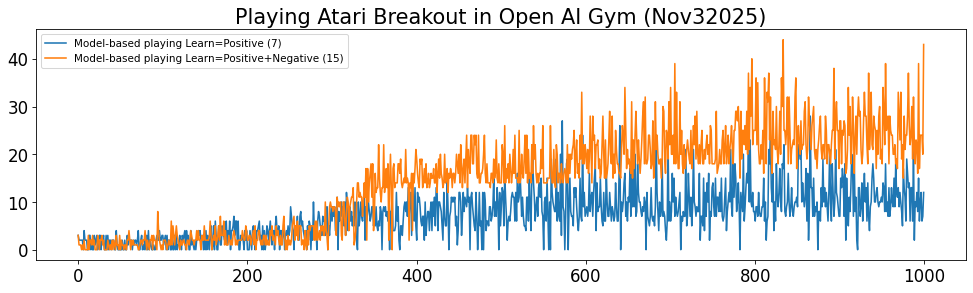

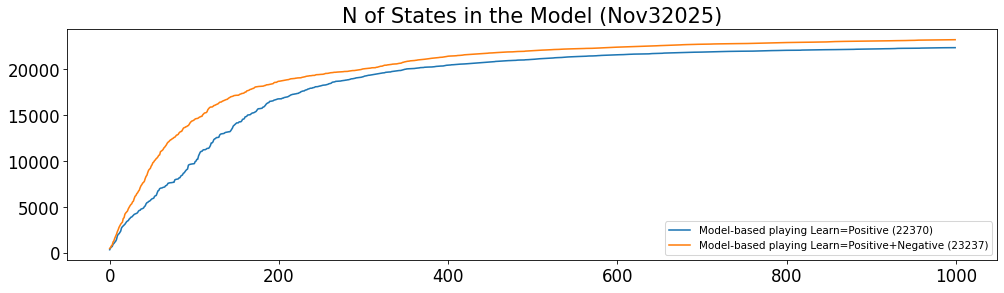

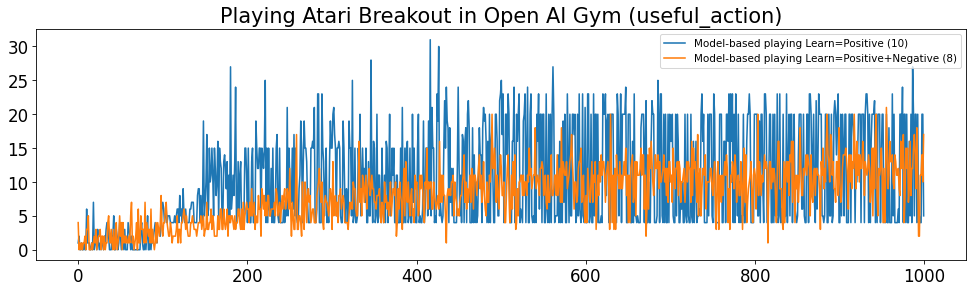

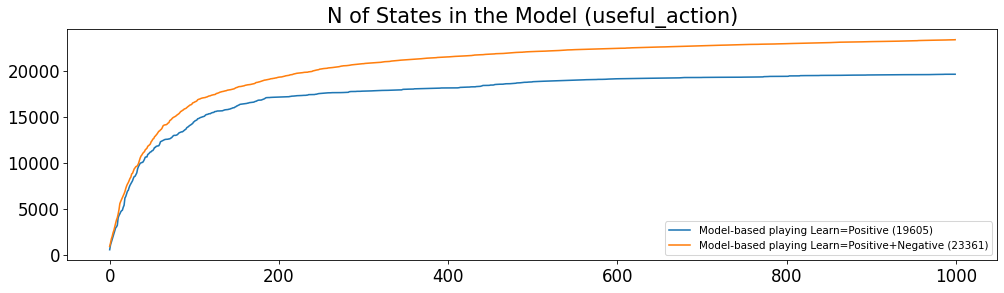

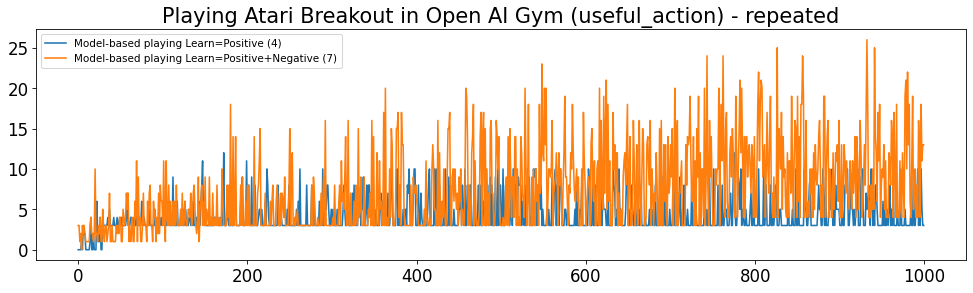

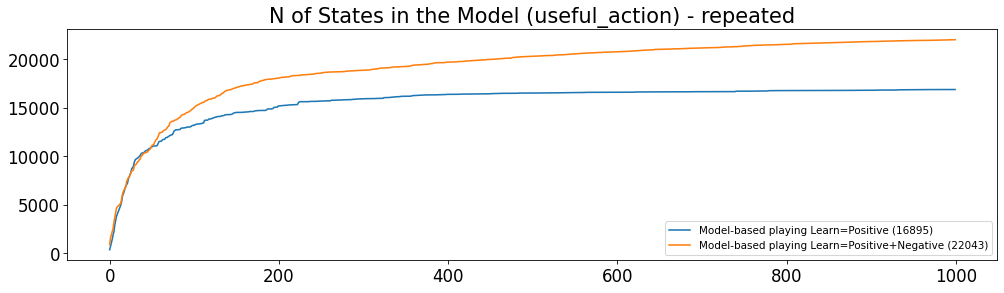

In [24]:
# Testing on Mac
# learn_mode=0/1/2, T=1, state_count_threshold=2, similarity_threshold=0.99, transition_utility_thereshold=0, transition_count_threshold=1

# BreakoutModelDrivenNov32025 L=PO DONE 
# BreakoutModelDrivenNov32025 L=PN DONE

scores11 = [3.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0, 4.0, 2.0, 2.0, 2.0, 0, 0, 3.0, 3.0, 0, 2.0, 0, 0, 3.0, 1.0, 2.0, 3.0, 0, 2.0, 3.0, 3.0, 0, 2.0, 2.0, 3.0, 0, 0, 3.0, 0, 3.0, 0, 2.0, 2.0, 0, 2.0, 2.0, 2.0, 0, 0, 4.0, 1.0, 0, 0, 0, 0, 0, 2.0, 0, 0, 2.0, 0, 0, 3.0, 1.0, 2.0, 2.0, 2.0, 2.0, 0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 4.0, 0, 0, 2.0, 3.0, 0, 1.0, 0, 3.0, 0, 3.0, 0, 4.0, 0, 2.0, 1.0, 0, 0, 1.0, 0, 0, 2.0, 3.0, 2.0, 2.0, 4.0, 2.0, 2.0, 3.0, 3.0, 1.0, 2.0, 3.0, 0, 3.0, 0, 2.0, 2.0, 0, 0, 3.0, 0, 0, 3.0, 0, 3.0, 0, 1.0, 1.0, 3.0, 2.0, 0, 3.0, 2.0, 3.0, 4.0, 0, 4.0, 2.0, 3.0, 0, 0, 4.0, 1.0, 2.0, 1.0, 0, 2.0, 0, 2.0, 2.0, 4.0, 3.0, 4.0, 2.0, 2.0, 3.0, 0, 3.0, 0, 4.0, 0, 3.0, 2.0, 0, 3.0, 5.0, 0, 1.0, 5.0, 0, 6.0, 3.0, 0, 0, 5.0, 3.0, 1.0, 1.0, 5.0, 3.0, 3.0, 2.0, 5.0, 6.0, 1.0, 4.0, 2.0, 6.0, 0, 4.0, 4.0, 5.0, 7.0, 3.0, 6.0, 6.0, 2.0, 6.0, 0, 0, 3.0, 2.0, 3.0, 2.0, 0, 4.0, 2.0, 4.0, 0, 0, 0, 4.0, 2.0, 0, 4.0, 5.0, 3.0, 0, 1.0, 4.0, 4.0, 5.0, 6.0, 2.0, 3.0, 0, 5.0, 0, 4.0, 0, 2.0, 5.0, 4.0, 2.0, 4.0, 6.0, 3.0, 1.0, 4.0, 4.0, 0, 5.0, 7.0, 4.0, 3.0, 5.0, 0, 4.0, 4.0, 2.0, 4.0, 4.0, 0, 3.0, 4.0, 3.0, 5.0, 3.0, 4.0, 9.0, 7.0, 5.0, 4.0, 0, 5.0, 3.0, 3.0, 7.0, 2.0, 2.0, 7.0, 8.0, 5.0, 6.0, 4.0, 3.0, 2.0, 4.0, 0, 5.0, 2.0, 6.0, 5.0, 0, 5.0, 2.0, 10.0, 4.0, 5.0, 5.0, 0, 6.0, 8.0, 7.0, 5.0, 5.0, 3.0, 7.0, 6.0, 6.0, 3.0, 4.0, 9.0, 0, 5.0, 3.0, 6.0, 9.0, 6.0, 9.0, 7.0, 9.0, 4.0, 4.0, 11.0, 0, 8.0, 6.0, 7.0, 10.0, 7.0, 9.0, 5.0, 10.0, 3.0, 12.0, 9.0, 4.0, 8.0, 9.0, 6.0, 8.0, 5.0, 7.0, 5.0, 10.0, 8.0, 2.0, 0, 10.0, 5.0, 7.0, 10.0, 7.0, 6.0, 10.0, 11.0, 2.0, 9.0, 6.0, 8.0, 10.0, 8.0, 6.0, 7.0, 9.0, 9.0, 5.0, 7.0, 5.0, 9.0, 5.0, 4.0, 6.0, 5.0, 9.0, 8.0, 0, 8.0, 9.0, 8.0, 9.0, 7.0, 8.0, 6.0, 6.0, 0, 8.0, 8.0, 11.0, 4.0, 4.0, 4.0, 5.0, 12.0, 6.0, 9.0, 2.0, 0, 5.0, 5.0, 3.0, 6.0, 9.0, 10.0, 8.0, 10.0, 7.0, 13.0, 7.0, 10.0, 12.0, 3.0, 13.0, 11.0, 6.0, 13.0, 5.0, 2.0, 12.0, 10.0, 11.0, 9.0, 6.0, 5.0, 7.0, 7.0, 2.0, 10.0, 3.0, 6.0, 8.0, 8.0, 4.0, 8.0, 10.0, 4.0, 10.0, 7.0, 11.0, 5.0, 13.0, 13.0, 4.0, 10.0, 10.0, 9.0, 8.0, 5.0, 2.0, 12.0, 7.0, 5.0, 5.0, 15.0, 9.0, 0, 7.0, 8.0, 11.0, 10.0, 11.0, 10.0, 11.0, 5.0, 7.0, 1.0, 4.0, 12.0, 12.0, 10.0, 3.0, 7.0, 12.0, 8.0, 11.0, 10.0, 9.0, 13.0, 10.0, 11.0, 0, 11.0, 12.0, 9.0, 7.0, 5.0, 4.0, 12.0, 7.0, 0, 5.0, 12.0, 5.0, 6.0, 0, 12.0, 0, 12.0, 10.0, 4.0, 6.0, 6.0, 5.0, 9.0, 9.0, 6.0, 7.0, 9.0, 15.0, 7.0, 10.0, 7.0, 13.0, 10.0, 0, 12.0, 5.0, 9.0, 13.0, 12.0, 5.0, 16.0, 11.0, 7.0, 2.0, 6.0, 7.0, 6.0, 8.0, 11.0, 12.0, 11.0, 11.0, 6.0, 12.0, 6.0, 16.0, 10.0, 11.0, 17.0, 12.0, 7.0, 11.0, 7.0, 5.0, 5.0, 4.0, 11.0, 11.0, 6.0, 16.0, 9.0, 4.0, 15.0, 19.0, 14.0, 11.0, 6.0, 9.0, 11.0, 7.0, 13.0, 14.0, 11.0, 15.0, 8.0, 7.0, 0, 10.0, 11.0, 6.0, 15.0, 7.0, 0, 10.0, 0, 19.0, 12.0, 10.0, 9.0, 8.0, 8.0, 19.0, 6.0, 12.0, 7.0, 6.0, 20.0, 3.0, 27.0, 9.0, 8.0, 0, 7.0, 18.0, 19.0, 0, 9.0, 15.0, 8.0, 7.0, 7.0, 5.0, 13.0, 11.0, 13.0, 9.0, 6.0, 4.0, 7.0, 15.0, 7.0, 6.0, 24.0, 9.0, 12.0, 7.0, 8.0, 9.0, 7.0, 9.0, 16.0, 8.0, 11.0, 12.0, 7.0, 12.0, 15.0, 18.0, 4.0, 14.0, 8.0, 9.0, 9.0, 15.0, 9.0, 6.0, 5.0, 12.0, 6.0, 6.0, 17.0, 10.0, 7.0, 7.0, 12.0, 9.0, 6.0, 9.0, 8.0, 6.0, 7.0, 14.0, 9.0, 6.0, 6.0, 15.0, 26.0, 0, 10.0, 8.0, 10.0, 14.0, 16.0, 7.0, 10.0, 6.0, 11.0, 10.0, 17.0, 7.0, 21.0, 9.0, 19.0, 9.0, 20.0, 7.0, 8.0, 18.0, 12.0, 10.0, 10.0, 8.0, 7.0, 9.0, 8.0, 11.0, 10.0, 0, 12.0, 7.0, 6.0, 5.0, 7.0, 13.0, 7.0, 6.0, 7.0, 5.0, 9.0, 23.0, 12.0, 8.0, 4.0, 10.0, 7.0, 8.0, 19.0, 7.0, 8.0, 7.0, 4.0, 2.0, 6.0, 23.0, 6.0, 10.0, 6.0, 8.0, 16.0, 10.0, 15.0, 7.0, 11.0, 8.0, 7.0, 8.0, 10.0, 12.0, 0, 7.0, 6.0, 8.0, 7.0, 7.0, 21.0, 5.0, 7.0, 16.0, 11.0, 7.0, 11.0, 5.0, 9.0, 21.0, 10.0, 9.0, 7.0, 9.0, 8.0, 8.0, 16.0, 2.0, 7.0, 7.0, 5.0, 15.0, 4.0, 12.0, 7.0, 14.0, 10.0, 16.0, 2.0, 8.0, 7.0, 13.0, 14.0, 9.0, 7.0, 15.0, 7.0, 11.0, 11.0, 8.0, 12.0, 8.0, 15.0, 7.0, 6.0, 7.0, 11.0, 15.0, 4.0, 8.0, 10.0, 12.0, 10.0, 21.0, 9.0, 7.0, 18.0, 11.0, 18.0, 15.0, 8.0, 10.0, 14.0, 9.0, 0, 12.0, 10.0, 8.0, 20.0, 6.0, 9.0, 13.0, 16.0, 14.0, 21.0, 10.0, 23.0, 10.0, 9.0, 12.0, 8.0, 8.0, 6.0, 9.0, 9.0, 7.0, 12.0, 8.0, 7.0, 7.0, 9.0, 9.0, 15.0, 6.0, 10.0, 2.0, 6.0, 7.0, 21.0, 18.0, 23.0, 13.0, 10.0, 16.0, 4.0, 10.0, 6.0, 18.0, 11.0, 9.0, 12.0, 17.0, 10.0, 8.0, 18.0, 17.0, 22.0, 8.0, 7.0, 9.0, 10.0, 16.0, 10.0, 7.0, 9.0, 13.0, 8.0, 7.0, 9.0, 10.0, 10.0, 11.0, 9.0, 22.0, 22.0, 19.0, 22.0, 10.0, 14.0, 11.0, 9.0, 11.0, 17.0, 6.0, 16.0, 2.0, 9.0, 28.0, 13.0, 13.0, 7.0, 15.0, 7.0, 9.0, 8.0, 10.0, 0, 8.0, 8.0, 6.0, 13.0, 9.0, 19.0, 10.0, 13.0, 9.0, 12.0, 9.0, 6.0, 12.0, 21.0, 10.0, 6.0, 18.0, 12.0, 7.0, 10.0, 21.0, 12.0, 11.0, 9.0, 7.0, 7.0, 15.0, 13.0, 17.0, 15.0, 7.0, 18.0, 2.0, 15.0, 8.0, 5.0, 11.0, 8.0, 13.0, 20.0, 18.0, 7.0, 19.0, 8.0, 11.0, 2.0, 0, 13.0, 13.0, 7.0, 9.0, 14.0, 6.0, 12.0, 16.0, 10.0, 13.0, 6.0, 14.0, 7.0, 4.0, 9.0, 10.0, 15.0, 18.0, 15.0, 10.0, 10.0, 12.0, 13.0, 10.0, 9.0, 10.0, 10.0, 11.0, 10.0, 14.0, 13.0, 8.0, 18.0, 8.0, 10.0, 7.0, 13.0, 7.0, 9.0, 13.0, 10.0, 9.0, 15.0, 9.0, 18.0, 12.0, 11.0, 13.0, 9.0, 12.0, 10.0, 8.0, 5.0, 17.0, 13.0, 11.0, 6.0, 19.0, 16.0, 13.0, 14.0, 6.0, 13.0, 13.0, 6.0, 21.0, 2.0, 10.0, 9.0, 12.0, 8.0, 15.0, 6.0, 10.0, 12.0, 6.0, 7.0, 12.0]
states11 = [354, 542, 645, 711, 950, 1035, 1167, 1269, 1452, 1830, 2032, 2087, 2229, 2378, 2733, 2859, 2948, 3035, 3132, 3259, 3405, 3480, 3529, 3688, 3769, 3892, 3913, 4018, 4107, 4205, 4250, 4287, 4321, 4399, 4560, 4638, 4655, 4779, 4814, 4843, 4901, 5050, 5132, 5356, 5477, 5510, 5613, 5642, 5718, 5822, 5898, 5938, 5966, 6163, 6234, 6264, 6501, 6758, 6810, 6998, 7055, 7074, 7092, 7143, 7160, 7189, 7317, 7356, 7439, 7601, 7616, 7645, 7650, 7661, 7682, 7695, 7704, 7966, 8011, 8029, 8056, 8069, 8185, 8197, 8375, 8439, 8505, 8681, 8730, 8870, 8988, 9080, 9146, 9559, 9626, 9656, 9677, 9697, 9708, 9724, 9730, 9954, 10011, 10202, 10210, 10577, 10769, 10985, 11063, 11072, 11191, 11245, 11251, 11256, 11311, 11387, 11399, 11405, 11530, 11700, 11986, 11993, 12097, 12340, 12432, 12459, 12570, 12577, 12586, 12609, 12852, 12943, 12978, 12996, 13017, 13021, 13094, 13137, 13155, 13171, 13203, 13208, 13211, 13313, 13464, 13605, 13826, 13913, 14003, 14103, 14168, 14173, 14180, 14287, 14290, 14295, 14386, 14562, 14584, 14626, 14828, 14851, 14901, 15025, 15037, 15058, 15069, 15149, 15226, 15258, 15272, 15315, 15376, 15424, 15560, 15680, 15719, 15722, 15739, 15755, 15769, 15886, 15901, 15986, 16094, 16225, 16302, 16358, 16384, 16518, 16525, 16545, 16570, 16576, 16644, 16667, 16686, 16724, 16765, 16788, 16789, 16792, 16798, 16801, 16870, 16870, 16929, 16953, 16971, 16985, 17007, 17044, 17099, 17162, 17214, 17248, 17278, 17286, 17306, 17332, 17336, 17368, 17380, 17397, 17467, 17490, 17568, 17599, 17638, 17647, 17664, 17741, 17759, 17785, 17852, 17869, 17914, 17947, 17952, 17956, 18007, 18016, 18045, 18110, 18111, 18116, 18129, 18159, 18184, 18198, 18225, 18256, 18279, 18286, 18296, 18306, 18331, 18364, 18382, 18435, 18456, 18475, 18516, 18603, 18622, 18633, 18647, 18697, 18703, 18710, 18713, 18715, 18719, 18735, 18762, 18773, 18780, 18785, 18813, 18836, 18841, 18866, 18872, 18894, 18919, 18958, 18978, 18981, 19000, 19026, 19037, 19074, 19088, 19108, 19126, 19129, 19133, 19142, 19165, 19197, 19218, 19266, 19277, 19299, 19323, 19341, 19364, 19367, 19383, 19406, 19422, 19437, 19458, 19475, 19477, 19499, 19500, 19529, 19539, 19554, 19569, 19594, 19604, 19622, 19625, 19643, 19681, 19693, 19710, 19713, 19717, 19721, 19724, 19764, 19778, 19798, 19802, 19823, 19839, 19846, 19863, 19871, 19878, 19880, 19886, 19914, 19944, 19962, 20009, 20018, 20027, 20055, 20065, 20068, 20073, 20076, 20082, 20090, 20095, 20095, 20101, 20121, 20129, 20138, 20145, 20158, 20169, 20194, 20199, 20199, 20202, 20211, 20235, 20237, 20242, 20248, 20254, 20260, 20262, 20266, 20266, 20267, 20284, 20285, 20301, 20321, 20330, 20334, 20345, 20350, 20360, 20366, 20367, 20370, 20375, 20396, 20415, 20436, 20451, 20463, 20465, 20469, 20485, 20485, 20504, 20505, 20511, 20520, 20538, 20538, 20539, 20554, 20564, 20567, 20574, 20576, 20581, 20581, 20593, 20596, 20606, 20614, 20615, 20622, 20630, 20635, 20653, 20658, 20667, 20672, 20672, 20681, 20688, 20701, 20701, 20704, 20712, 20725, 20727, 20736, 20736, 20744, 20747, 20754, 20766, 20784, 20792, 20793, 20801, 20812, 20814, 20822, 20827, 20839, 20843, 20850, 20870, 20871, 20881, 20885, 20892, 20900, 20906, 20908, 20911, 20922, 20933, 20938, 20943, 20950, 20952, 20957, 20957, 20961, 20966, 20976, 20976, 20978, 20980, 20985, 20990, 21005, 21012, 21019, 21020, 21022, 21022, 21024, 21026, 21026, 21031, 21047, 21049, 21050, 21057, 21065, 21076, 21079, 21086, 21090, 21094, 21105, 21110, 21120, 21135, 21144, 21161, 21162, 21162, 21167, 21167, 21172, 21177, 21185, 21189, 21193, 21196, 21202, 21204, 21208, 21220, 21230, 21236, 21242, 21246, 21260, 21268, 21269, 21277, 21283, 21285, 21289, 21290, 21301, 21302, 21308, 21315, 21321, 21332, 21339, 21346, 21354, 21364, 21364, 21369, 21375, 21381, 21385, 21391, 21393, 21393, 21394, 21400, 21407, 21408, 21411, 21411, 21414, 21417, 21423, 21424, 21432, 21434, 21439, 21452, 21454, 21462, 21463, 21463, 21463, 21465, 21469, 21476, 21482, 21484, 21487, 21490, 21503, 21512, 21512, 21513, 21526, 21530, 21530, 21534, 21536, 21539, 21546, 21551, 21553, 21557, 21567, 21569, 21571, 21572, 21572, 21582, 21594, 21597, 21598, 21598, 21600, 21601, 21601, 21604, 21605, 21611, 21613, 21619, 21619, 21623, 21631, 21644, 21644, 21647, 21647, 21649, 21656, 21665, 21666, 21667, 21671, 21673, 21673, 21676, 21679, 21683, 21683, 21683, 21684, 21684, 21686, 21687, 21688, 21688, 21692, 21694, 21696, 21706, 21717, 21725, 21726, 21728, 21731, 21732, 21734, 21738, 21740, 21745, 21748, 21749, 21749, 21756, 21759, 21775, 21779, 21782, 21783, 21785, 21796, 21796, 21802, 21805, 21805, 21807, 21808, 21813, 21813, 21815, 21820, 21823, 21825, 21825, 21828, 21835, 21840, 21840, 21847, 21850, 21860, 21860, 21861, 21861, 21862, 21865, 21866, 21870, 21873, 21873, 21873, 21874, 21875, 21875, 21878, 21881, 21881, 21881, 21883, 21886, 21886, 21888, 21888, 21891, 21893, 21898, 21901, 21902, 21902, 21904, 21909, 21912, 21913, 21914, 21918, 21918, 21920, 21921, 21921, 21922, 21930, 21933, 21934, 21937, 21939, 21945, 21950, 21951, 21955, 21961, 21962, 21963, 21963, 21963, 21963, 21965, 21967, 21968, 21968, 21971, 21973, 21976, 21976, 21976, 21979, 21980, 21982, 21982, 21982, 21982, 21983, 21991, 21991, 21992, 21992, 21992, 21992, 21992, 21992, 21993, 21993, 21994, 21996, 21997, 21997, 22002, 22007, 22007, 22007, 22013, 22013, 22018, 22020, 22020, 22021, 22025, 22028, 22036, 22038, 22038, 22041, 22047, 22049, 22049, 22049, 22049, 22050, 22059, 22059, 22059, 22060, 22061, 22062, 22067, 22070, 22071, 22073, 22076, 22077, 22082, 22082, 22082, 22082, 22083, 22085, 22086, 22086, 22086, 22086, 22086, 22086, 22089, 22090, 22091, 22091, 22092, 22092, 22093, 22104, 22107, 22108, 22111, 22113, 22113, 22113, 22114, 22114, 22120, 22120, 22122, 22126, 22126, 22127, 22127, 22128, 22130, 22132, 22132, 22132, 22132, 22138, 22140, 22141, 22145, 22145, 22145, 22147, 22147, 22148, 22148, 22151, 22151, 22155, 22155, 22157, 22158, 22158, 22159, 22159, 22159, 22160, 22163, 22164, 22164, 22164, 22166, 22168, 22168, 22170, 22175, 22178, 22179, 22179, 22183, 22184, 22185, 22185, 22185, 22186, 22187, 22187, 22194, 22197, 22198, 22201, 22203, 22204, 22206, 22207, 22209, 22210, 22211, 22213, 22215, 22218, 22218, 22220, 22224, 22224, 22224, 22224, 22224, 22226, 22230, 22234, 22238, 22238, 22240, 22241, 22241, 22241, 22242, 22242, 22242, 22247, 22250, 22252, 22253, 22256, 22257, 22257, 22260, 22260, 22260, 22261, 22263, 22263, 22268, 22272, 22273, 22282, 22285, 22290, 22293, 22294, 22295, 22296, 22296, 22297, 22299, 22301, 22302, 22303, 22303, 22304, 22304, 22304, 22304, 22304, 22304, 22305, 22306, 22307, 22308, 22309, 22310, 22311, 22314, 22314, 22322, 22324, 22325, 22325, 22326, 22327, 22328, 22328, 22328, 22328, 22329, 22331, 22336, 22338, 22340, 22347, 22349, 22349, 22351, 22351, 22351, 22354, 22355, 22356, 22357, 22359, 22360, 22363, 22363, 22364, 22364, 22364, 22364, 22364, 22365, 22367, 22367, 22367, 22370, 22370, 22370, 22370]
scores12 = [3.0, 1.0, 1.0, 1.0, 0, 1.0, 0, 2.0, 0, 0, 0, 0, 3.0, 0, 2.0, 2.0, 1.0, 3.0, 1.0, 2.0, 0, 0, 0, 3.0, 2.0, 0, 2.0, 2.0, 3.0, 1.0, 2.0, 0, 0, 0, 0, 2.0, 1.0, 0, 1.0, 0, 2.0, 0, 2.0, 1.0, 0, 3.0, 1.0, 1.0, 0, 3.0, 0, 2.0, 1.0, 1.0, 0, 1.0, 1.0, 0, 2.0, 2.0, 4.0, 2.0, 0, 2.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 4.0, 2.0, 0, 2.0, 1.0, 0, 2.0, 2.0, 3.0, 0, 3.0, 2.0, 2.0, 1.0, 0, 8.0, 4.0, 2.0, 1.0, 0, 1.0, 0, 2.0, 2.0, 2.0, 1.0, 0, 1.0, 2.0, 1.0, 1.0, 6.0, 1.0, 5.0, 3.0, 1.0, 3.0, 5.0, 3.0, 2.0, 1.0, 0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 1.0, 0, 2.0, 2.0, 1.0, 2.0, 4.0, 3.0, 2.0, 2.0, 1.0, 2.0, 2.0, 4.0, 2.0, 4.0, 2.0, 2.0, 0, 3.0, 2.0, 2.0, 5.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 6.0, 3.0, 0, 2.0, 3.0, 2.0, 5.0, 1.0, 2.0, 3.0, 5.0, 2.0, 7.0, 3.0, 3.0, 3.0, 6.0, 1.0, 4.0, 1.0, 1.0, 1.0, 3.0, 2.0, 1.0, 2.0, 1.0, 3.0, 4.0, 3.0, 1.0, 2.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 4.0, 3.0, 2.0, 2.0, 5.0, 4.0, 2.0, 2.0, 3.0, 3.0, 1.0, 2.0, 3.0, 4.0, 1.0, 5.0, 0, 2.0, 2.0, 4.0, 4.0, 2.0, 1.0, 2.0, 1.0, 3.0, 3.0, 1.0, 3.0, 1.0, 2.0, 1.0, 1.0, 4.0, 3.0, 5.0, 2.0, 3.0, 2.0, 1.0, 5.0, 3.0, 4.0, 2.0, 1.0, 3.0, 1.0, 1.0, 5.0, 7.0, 3.0, 0, 2.0, 0, 3.0, 1.0, 2.0, 1.0, 2.0, 5.0, 6.0, 7.0, 2.0, 5.0, 3.0, 6.0, 2.0, 5.0, 5.0, 5.0, 1.0, 2.0, 2.0, 0, 4.0, 1.0, 0, 4.0, 1.0, 5.0, 4.0, 5.0, 5.0, 5.0, 5.0, 2.0, 6.0, 2.0, 6.0, 2.0, 3.0, 4.0, 2.0, 5.0, 4.0, 5.0, 3.0, 3.0, 10.0, 4.0, 3.0, 0, 5.0, 9.0, 10.0, 9.0, 9.0, 8.0, 9.0, 9.0, 8.0, 3.0, 11.0, 9.0, 10.0, 9.0, 10.0, 3.0, 2.0, 10.0, 10.0, 6.0, 3.0, 8.0, 11.0, 10.0, 4.0, 9.0, 10.0, 11.0, 11.0, 13.0, 1.0, 2.0, 4.0, 10.0, 14.0, 14.0, 11.0, 12.0, 11.0, 11.0, 7.0, 10.0, 14.0, 11.0, 17.0, 2.0, 17.0, 10.0, 14.0, 16.0, 18.0, 11.0, 18.0, 4.0, 7.0, 16.0, 12.0, 13.0, 13.0, 22.0, 15.0, 12.0, 10.0, 13.0, 13.0, 22.0, 12.0, 14.0, 17.0, 13.0, 18.0, 2.0, 14.0, 20.0, 13.0, 0, 17.0, 18.0, 13.0, 14.0, 14.0, 14.0, 18.0, 18.0, 16.0, 19.0, 14.0, 13.0, 14.0, 15.0, 14.0, 21.0, 14.0, 15.0, 14.0, 2.0, 14.0, 13.0, 16.0, 4.0, 16.0, 14.0, 17.0, 21.0, 19.0, 16.0, 14.0, 13.0, 19.0, 18.0, 19.0, 13.0, 14.0, 17.0, 14.0, 18.0, 13.0, 14.0, 16.0, 13.0, 14.0, 16.0, 15.0, 15.0, 17.0, 14.0, 14.0, 18.0, 12.0, 16.0, 19.0, 15.0, 20.0, 16.0, 15.0, 13.0, 14.0, 20.0, 14.0, 15.0, 17.0, 12.0, 16.0, 15.0, 17.0, 16.0, 13.0, 16.0, 16.0, 14.0, 16.0, 20.0, 18.0, 16.0, 20.0, 14.0, 22.0, 18.0, 13.0, 17.0, 19.0, 14.0, 19.0, 24.0, 13.0, 21.0, 18.0, 16.0, 24.0, 24.0, 18.0, 18.0, 24.0, 22.0, 24.0, 16.0, 15.0, 24.0, 14.0, 14.0, 16.0, 16.0, 17.0, 20.0, 24.0, 16.0, 14.0, 18.0, 14.0, 14.0, 14.0, 13.0, 16.0, 16.0, 14.0, 19.0, 15.0, 16.0, 23.0, 15.0, 14.0, 18.0, 14.0, 14.0, 14.0, 22.0, 20.0, 14.0, 26.0, 14.0, 17.0, 15.0, 18.0, 14.0, 20.0, 17.0, 14.0, 16.0, 21.0, 16.0, 24.0, 15.0, 15.0, 15.0, 14.0, 25.0, 14.0, 15.0, 20.0, 16.0, 15.0, 19.0, 24.0, 16.0, 24.0, 14.0, 21.0, 15.0, 16.0, 14.0, 22.0, 16.0, 26.0, 19.0, 22.0, 16.0, 14.0, 16.0, 14.0, 16.0, 16.0, 21.0, 17.0, 26.0, 14.0, 14.0, 14.0, 14.0, 14.0, 15.0, 15.0, 15.0, 26.0, 18.0, 14.0, 14.0, 21.0, 14.0, 13.0, 22.0, 20.0, 14.0, 16.0, 16.0, 14.0, 18.0, 15.0, 14.0, 16.0, 17.0, 16.0, 14.0, 22.0, 14.0, 20.0, 16.0, 20.0, 19.0, 21.0, 22.0, 25.0, 15.0, 20.0, 23.0, 16.0, 18.0, 15.0, 24.0, 19.0, 33.0, 18.0, 22.0, 18.0, 22.0, 20.0, 17.0, 21.0, 16.0, 19.0, 28.0, 21.0, 14.0, 28.0, 23.0, 24.0, 17.0, 22.0, 22.0, 23.0, 17.0, 19.0, 15.0, 16.0, 22.0, 28.0, 20.0, 15.0, 23.0, 15.0, 16.0, 18.0, 23.0, 29.0, 20.0, 18.0, 28.0, 15.0, 20.0, 16.0, 25.0, 21.0, 18.0, 18.0, 16.0, 16.0, 15.0, 21.0, 26.0, 24.0, 20.0, 34.0, 26.0, 17.0, 21.0, 18.0, 19.0, 17.0, 16.0, 31.0, 15.0, 23.0, 17.0, 24.0, 29.0, 23.0, 18.0, 23.0, 19.0, 16.0, 19.0, 23.0, 28.0, 31.0, 18.0, 32.0, 18.0, 18.0, 19.0, 24.0, 24.0, 21.0, 17.0, 18.0, 27.0, 15.0, 18.0, 31.0, 21.0, 24.0, 20.0, 18.0, 18.0, 19.0, 15.0, 19.0, 30.0, 29.0, 19.0, 16.0, 25.0, 24.0, 19.0, 31.0, 22.0, 34.0, 20.0, 20.0, 24.0, 18.0, 39.0, 18.0, 33.0, 21.0, 17.0, 17.0, 31.0, 20.0, 25.0, 18.0, 16.0, 22.0, 17.0, 18.0, 21.0, 23.0, 21.0, 19.0, 18.0, 25.0, 17.0, 21.0, 26.0, 22.0, 28.0, 19.0, 29.0, 20.0, 18.0, 22.0, 18.0, 22.0, 25.0, 18.0, 18.0, 21.0, 19.0, 22.0, 24.0, 20.0, 22.0, 18.0, 26.0, 25.0, 18.0, 18.0, 18.0, 18.0, 19.0, 29.0, 16.0, 17.0, 18.0, 21.0, 18.0, 18.0, 23.0, 25.0, 18.0, 21.0, 26.0, 18.0, 20.0, 24.0, 18.0, 21.0, 23.0, 26.0, 21.0, 18.0, 25.0, 25.0, 29.0, 29.0, 27.0, 30.0, 25.0, 15.0, 29.0, 19.0, 25.0, 25.0, 22.0, 26.0, 21.0, 29.0, 20.0, 37.0, 21.0, 34.0, 28.0, 40.0, 22.0, 25.0, 25.0, 25.0, 36.0, 22.0, 35.0, 21.0, 18.0, 18.0, 22.0, 19.0, 25.0, 16.0, 36.0, 25.0, 18.0, 33.0, 31.0, 37.0, 23.0, 32.0, 20.0, 16.0, 29.0, 22.0, 23.0, 21.0, 30.0, 21.0, 18.0, 22.0, 29.0, 20.0, 36.0, 30.0, 44.0, 25.0, 25.0, 22.0, 25.0, 32.0, 18.0, 32.0, 25.0, 18.0, 21.0, 22.0, 23.0, 22.0, 32.0, 36.0, 17.0, 23.0, 26.0, 22.0, 20.0, 27.0, 21.0, 22.0, 22.0, 29.0, 31.0, 22.0, 19.0, 21.0, 32.0, 27.0, 24.0, 21.0, 26.0, 28.0, 30.0, 21.0, 19.0, 21.0, 17.0, 21.0, 23.0, 26.0, 28.0, 21.0, 19.0, 22.0, 22.0, 19.0, 28.0, 25.0, 18.0, 22.0, 22.0, 20.0, 18.0, 22.0, 25.0, 25.0, 38.0, 19.0, 28.0, 31.0, 25.0, 25.0, 17.0, 27.0, 27.0, 18.0, 25.0, 24.0, 27.0, 26.0, 16.0, 17.0, 21.0, 34.0, 24.0, 30.0, 18.0, 21.0, 32.0, 26.0, 16.0, 23.0, 28.0, 20.0, 28.0, 32.0, 28.0, 29.0, 21.0, 18.0, 20.0, 27.0, 33.0, 28.0, 28.0, 22.0, 18.0, 37.0, 21.0, 25.0, 33.0, 22.0, 21.0, 28.0, 26.0, 25.0, 17.0, 25.0, 20.0, 28.0, 30.0, 19.0, 21.0, 18.0, 34.0, 29.0, 22.0, 39.0, 25.0, 27.0, 28.0, 18.0, 28.0, 25.0, 24.0, 24.0, 20.0, 20.0, 22.0, 18.0, 19.0, 17.0, 33.0, 28.0, 23.0, 33.0, 19.0, 22.0, 15.0, 28.0, 21.0, 24.0, 24.0, 28.0, 37.0, 26.0, 22.0, 24.0, 30.0, 19.0, 32.0, 22.0, 18.0, 23.0, 22.0, 16.0, 39.0, 17.0, 24.0, 24.0, 24.0, 20.0, 43.0]
states12 = [498, 575, 776, 870, 1198, 1329, 1608, 1807, 2029, 2315, 2522, 2785, 2972, 3133, 3253, 3344, 3743, 3845, 4222, 4362, 4473, 4566, 4810, 4978, 5138, 5270, 5352, 5560, 5645, 5942, 6177, 6261, 6455, 6559, 6730, 6846, 7118, 7325, 7447, 7618, 7690, 7815, 8116, 8341, 8474, 8773, 9013, 9129, 9214, 9457, 9600, 9827, 9907, 10058, 10148, 10283, 10354, 10479, 10643, 10677, 11032, 11097, 11169, 11261, 11438, 11527, 11652, 11780, 11963, 12071, 12137, 12247, 12329, 12363, 12458, 12494, 12587, 12612, 12718, 12842, 12861, 12929, 13084, 13174, 13231, 13244, 13409, 13582, 13655, 13677, 13751, 13771, 13852, 13886, 14022, 14180, 14288, 14370, 14396, 14450, 14508, 14599, 14633, 14650, 14665, 14720, 14797, 14831, 14879, 14884, 15062, 15151, 15249, 15272, 15291, 15382, 15612, 15733, 15832, 15896, 15901, 15907, 15961, 16059, 16078, 16130, 16174, 16208, 16251, 16333, 16424, 16438, 16453, 16529, 16568, 16617, 16643, 16683, 16729, 16741, 16830, 16898, 16945, 17015, 17038, 17063, 17098, 17153, 17157, 17178, 17183, 17186, 17189, 17237, 17302, 17320, 17377, 17383, 17406, 17450, 17527, 17531, 17658, 17682, 17710, 17753, 17821, 17834, 17879, 17921, 17934, 18016, 18084, 18100, 18116, 18136, 18142, 18146, 18149, 18152, 18169, 18175, 18195, 18243, 18249, 18310, 18328, 18328, 18348, 18372, 18387, 18404, 18425, 18448, 18536, 18586, 18591, 18591, 18641, 18697, 18703, 18720, 18735, 18752, 18764, 18778, 18806, 18824, 18831, 18861, 18877, 18882, 18910, 18932, 18977, 18981, 18992, 19003, 19012, 19020, 19050, 19053, 19072, 19075, 19077, 19082, 19090, 19128, 19148, 19180, 19182, 19207, 19243, 19263, 19274, 19283, 19305, 19306, 19315, 19330, 19347, 19347, 19349, 19387, 19423, 19424, 19425, 19435, 19447, 19455, 19458, 19464, 19472, 19493, 19518, 19560, 19561, 19567, 19576, 19599, 19612, 19636, 19645, 19655, 19661, 19685, 19685, 19690, 19705, 19711, 19716, 19723, 19730, 19741, 19745, 19746, 19753, 19772, 19776, 19776, 19783, 19785, 19807, 19820, 19835, 19843, 19854, 19873, 19875, 19876, 19892, 19910, 19924, 19937, 19947, 19956, 19973, 19988, 20021, 20049, 20063, 20074, 20083, 20091, 20097, 20103, 20123, 20125, 20140, 20161, 20179, 20183, 20187, 20188, 20189, 20233, 20234, 20263, 20285, 20320, 20344, 20354, 20357, 20399, 20432, 20459, 20461, 20461, 20488, 20498, 20516, 20527, 20532, 20548, 20571, 20581, 20591, 20593, 20595, 20602, 20624, 20639, 20660, 20664, 20680, 20705, 20763, 20772, 20809, 20830, 20839, 20877, 20889, 20896, 20905, 20932, 20943, 20954, 20954, 20958, 20967, 20987, 20997, 21006, 21031, 21039, 21054, 21054, 21071, 21079, 21083, 21084, 21106, 21116, 21123, 21141, 21151, 21166, 21184, 21197, 21208, 21217, 21229, 21233, 21239, 21252, 21261, 21278, 21285, 21294, 21312, 21314, 21321, 21330, 21344, 21353, 21377, 21393, 21405, 21429, 21441, 21452, 21454, 21456, 21459, 21465, 21473, 21476, 21482, 21488, 21495, 21514, 21516, 21529, 21530, 21535, 21540, 21557, 21575, 21591, 21597, 21599, 21605, 21610, 21615, 21628, 21635, 21644, 21652, 21657, 21665, 21669, 21669, 21675, 21681, 21688, 21700, 21700, 21704, 21710, 21714, 21722, 21731, 21738, 21746, 21750, 21757, 21766, 21783, 21785, 21793, 21796, 21799, 21808, 21812, 21820, 21829, 21832, 21836, 21843, 21847, 21852, 21862, 21864, 21870, 21875, 21882, 21888, 21891, 21898, 21902, 21902, 21907, 21908, 21909, 21912, 21914, 21922, 21924, 21939, 21942, 21950, 21952, 21953, 21957, 21963, 21964, 21966, 21967, 21967, 21972, 21992, 21998, 21999, 22006, 22012, 22015, 22026, 22028, 22033, 22037, 22045, 22057, 22059, 22074, 22075, 22077, 22084, 22089, 22090, 22094, 22102, 22103, 22107, 22113, 22117, 22120, 22128, 22131, 22133, 22133, 22143, 22149, 22157, 22163, 22167, 22168, 22176, 22178, 22179, 22184, 22184, 22193, 22198, 22201, 22202, 22207, 22215, 22219, 22219, 22229, 22232, 22234, 22235, 22235, 22238, 22239, 22244, 22246, 22251, 22251, 22252, 22252, 22254, 22254, 22260, 22263, 22265, 22271, 22277, 22278, 22280, 22288, 22289, 22289, 22290, 22294, 22295, 22298, 22299, 22299, 22302, 22305, 22305, 22307, 22317, 22320, 22322, 22330, 22335, 22343, 22346, 22349, 22354, 22363, 22368, 22377, 22377, 22382, 22384, 22385, 22388, 22389, 22393, 22405, 22406, 22416, 22418, 22421, 22423, 22426, 22426, 22428, 22430, 22430, 22436, 22439, 22441, 22446, 22447, 22455, 22457, 22459, 22463, 22472, 22473, 22478, 22478, 22481, 22482, 22493, 22496, 22496, 22504, 22505, 22505, 22509, 22512, 22513, 22519, 22520, 22524, 22526, 22531, 22532, 22537, 22545, 22546, 22546, 22546, 22547, 22547, 22551, 22564, 22567, 22572, 22573, 22580, 22580, 22585, 22592, 22596, 22596, 22599, 22605, 22608, 22611, 22623, 22625, 22627, 22632, 22634, 22638, 22638, 22638, 22639, 22641, 22646, 22650, 22654, 22659, 22659, 22661, 22662, 22672, 22677, 22688, 22689, 22694, 22701, 22702, 22703, 22705, 22706, 22707, 22711, 22711, 22712, 22713, 22713, 22713, 22726, 22731, 22733, 22734, 22737, 22738, 22739, 22746, 22749, 22750, 22751, 22751, 22753, 22753, 22757, 22758, 22761, 22761, 22761, 22761, 22767, 22770, 22774, 22774, 22774, 22778, 22782, 22782, 22782, 22784, 22788, 22788, 22789, 22789, 22791, 22793, 22794, 22796, 22801, 22801, 22803, 22805, 22805, 22806, 22807, 22807, 22809, 22809, 22809, 22809, 22811, 22811, 22813, 22814, 22814, 22815, 22818, 22821, 22821, 22821, 22821, 22821, 22823, 22825, 22826, 22827, 22827, 22829, 22829, 22832, 22843, 22845, 22846, 22847, 22850, 22850, 22850, 22854, 22854, 22856, 22856, 22858, 22859, 22859, 22862, 22863, 22864, 22872, 22877, 22878, 22881, 22881, 22881, 22882, 22884, 22888, 22888, 22889, 22890, 22893, 22895, 22902, 22906, 22912, 22913, 22919, 22924, 22926, 22926, 22928, 22930, 22933, 22935, 22935, 22935, 22935, 22937, 22937, 22938, 22939, 22942, 22944, 22944, 22944, 22948, 22951, 22953, 22955, 22957, 22957, 22957, 22958, 22959, 22959, 22962, 22964, 22964, 22964, 22968, 22968, 22971, 22972, 22974, 22977, 22977, 22979, 22980, 22982, 22982, 22985, 22985, 22985, 22988, 22989, 22993, 22993, 22994, 22999, 23001, 23003, 23011, 23014, 23020, 23021, 23030, 23033, 23034, 23034, 23040, 23041, 23041, 23043, 23047, 23049, 23054, 23055, 23055, 23055, 23056, 23057, 23058, 23059, 23059, 23059, 23060, 23062, 23062, 23062, 23063, 23066, 23066, 23066, 23067, 23068, 23068, 23068, 23068, 23068, 23068, 23068, 23068, 23073, 23078, 23079, 23082, 23087, 23090, 23093, 23093, 23093, 23094, 23094, 23094, 23095, 23095, 23097, 23097, 23097, 23099, 23101, 23103, 23104, 23105, 23107, 23111, 23113, 23114, 23115, 23116, 23118, 23118, 23120, 23123, 23127, 23130, 23131, 23134, 23134, 23134, 23134, 23134, 23134, 23136, 23142, 23142, 23144, 23145, 23145, 23145, 23146, 23150, 23154, 23156, 23158, 23159, 23161, 23161, 23162, 23164, 23165, 23168, 23174, 23178, 23187, 23188, 23190, 23191, 23192, 23192, 23192, 23194, 23196, 23196, 23196, 23197, 23197, 23197, 23197, 23203, 23203, 23205, 23208, 23208, 23211, 23211, 23212, 23212, 23213, 23214, 23214, 23217, 23217, 23220, 23221, 23225, 23226, 23226, 23228, 23229, 23230, 23231, 23231, 23233, 23234, 23234, 23234, 23234, 23236, 23237]

# useful_action L=PO DONE
# useful_action L=PN DONE

scores21 = [1.0, 2.0, 0, 0, 1.0, 0, 0, 1.0, 0, 0, 6.0, 1.0, 1.0, 1.0, 0, 0, 1.0, 0, 7.0, 0, 2.0, 1.0, 0, 3.0, 1.0, 0, 1.0, 0, 1.0, 1.0, 0, 2.0, 1.0, 3.0, 4.0, 4.0, 2.0, 0, 0, 0, 2.0, 2.0, 5.0, 0, 0, 3.0, 2.0, 0, 1.0, 4.0, 2.0, 0, 4.0, 2.0, 0, 3.0, 0, 0, 0, 4.0, 3.0, 2.0, 0, 2.0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.0, 4.0, 1.0, 0, 0, 2.0, 0, 2.0, 5.0, 0, 0, 2.0, 0, 2.0, 1.0, 2.0, 3.0, 4.0, 2.0, 1.0, 3.0, 3.0, 3.0, 2.0, 4.0, 6.0, 7.0, 6.0, 4.0, 5.0, 6.0, 4.0, 5.0, 5.0, 5.0, 4.0, 4.0, 4.0, 4.0, 4.0, 5.0, 4.0, 5.0, 6.0, 6.0, 4.0, 8.0, 5.0, 6.0, 4.0, 9.0, 5.0, 4.0, 6.0, 4.0, 4.0, 4.0, 4.0, 6.0, 6.0, 7.0, 7.0, 7.0, 4.0, 4.0, 4.0, 4.0, 8.0, 9.0, 9.0, 4.0, 8.0, 4.0, 7.0, 19.0, 5.0, 7.0, 10.0, 17.0, 5.0, 6.0, 15.0, 10.0, 11.0, 15.0, 11.0, 5.0, 15.0, 12.0, 8.0, 10.0, 16.0, 4.0, 15.0, 13.0, 12.0, 4.0, 5.0, 13.0, 14.0, 12.0, 9.0, 13.0, 4.0, 11.0, 4.0, 27.0, 6.0, 8.0, 11.0, 8.0, 13.0, 24.0, 4.0, 4.0, 13.0, 5.0, 11.0, 13.0, 4.0, 4.0, 4.0, 6.0, 15.0, 15.0, 11.0, 4.0, 15.0, 5.0, 4.0, 4.0, 13.0, 15.0, 4.0, 4.0, 4.0, 19.0, 15.0, 12.0, 12.0, 15.0, 15.0, 4.0, 15.0, 14.0, 12.0, 15.0, 25.0, 4.0, 15.0, 4.0, 15.0, 6.0, 5.0, 12.0, 4.0, 15.0, 4.0, 4.0, 7.0, 15.0, 17.0, 5.0, 4.0, 15.0, 4.0, 4.0, 4.0, 4.0, 7.0, 4.0, 6.0, 5.0, 21.0, 5.0, 15.0, 11.0, 8.0, 7.0, 15.0, 6.0, 17.0, 5.0, 15.0, 5.0, 4.0, 4.0, 9.0, 11.0, 19.0, 15.0, 4.0, 13.0, 19.0, 15.0, 15.0, 13.0, 7.0, 4.0, 4.0, 4.0, 15.0, 15.0, 16.0, 15.0, 21.0, 4.0, 4.0, 6.0, 23.0, 23.0, 4.0, 4.0, 4.0, 23.0, 15.0, 13.0, 5.0, 9.0, 15.0, 4.0, 6.0, 4.0, 13.0, 19.0, 15.0, 15.0, 20.0, 21.0, 17.0, 15.0, 5.0, 15.0, 15.0, 16.0, 15.0, 5.0, 4.0, 4.0, 19.0, 15.0, 8.0, 4.0, 9.0, 7.0, 4.0, 19.0, 15.0, 15.0, 5.0, 25.0, 4.0, 5.0, 15.0, 4.0, 4.0, 5.0, 15.0, 11.0, 20.0, 5.0, 10.0, 15.0, 10.0, 12.0, 7.0, 15.0, 4.0, 4.0, 13.0, 5.0, 5.0, 28.0, 9.0, 4.0, 16.0, 15.0, 4.0, 5.0, 20.0, 4.0, 11.0, 11.0, 5.0, 4.0, 15.0, 7.0, 4.0, 11.0, 4.0, 16.0, 15.0, 4.0, 10.0, 20.0, 5.0, 8.0, 15.0, 11.0, 15.0, 4.0, 4.0, 11.0, 11.0, 4.0, 4.0, 4.0, 15.0, 4.0, 21.0, 4.0, 4.0, 15.0, 4.0, 15.0, 16.0, 4.0, 5.0, 15.0, 4.0, 4.0, 20.0, 7.0, 15.0, 5.0, 4.0, 4.0, 15.0, 20.0, 4.0, 5.0, 4.0, 4.0, 6.0, 19.0, 4.0, 6.0, 15.0, 15.0, 5.0, 19.0, 6.0, 31.0, 5.0, 21.0, 15.0, 15.0, 4.0, 5.0, 4.0, 23.0, 19.0, 30.0, 5.0, 7.0, 5.0, 4.0, 5.0, 15.0, 22.0, 15.0, 24.0, 19.0, 18.0, 4.0, 18.0, 7.0, 12.0, 5.0, 12.0, 4.0, 4.0, 4.0, 4.0, 12.0, 24.0, 13.0, 5.0, 11.0, 4.0, 17.0, 16.0, 4.0, 16.0, 18.0, 4.0, 20.0, 22.0, 18.0, 4.0, 4.0, 4.0, 18.0, 4.0, 14.0, 4.0, 10.0, 4.0, 5.0, 11.0, 18.0, 14.0, 14.0, 4.0, 18.0, 21.0, 19.0, 20.0, 16.0, 4.0, 16.0, 4.0, 20.0, 4.0, 16.0, 18.0, 11.0, 4.0, 4.0, 20.0, 20.0, 16.0, 5.0, 5.0, 22.0, 23.0, 25.0, 17.0, 23.0, 4.0, 7.0, 20.0, 20.0, 14.0, 23.0, 20.0, 4.0, 4.0, 4.0, 16.0, 16.0, 24.0, 4.0, 5.0, 20.0, 16.0, 20.0, 23.0, 4.0, 6.0, 5.0, 4.0, 19.0, 20.0, 23.0, 4.0, 14.0, 24.0, 4.0, 4.0, 20.0, 23.0, 5.0, 4.0, 5.0, 4.0, 17.0, 4.0, 20.0, 16.0, 23.0, 6.0, 20.0, 20.0, 4.0, 20.0, 20.0, 4.0, 4.0, 23.0, 6.0, 4.0, 20.0, 4.0, 20.0, 4.0, 20.0, 27.0, 20.0, 4.0, 5.0, 5.0, 5.0, 14.0, 4.0, 16.0, 4.0, 16.0, 4.0, 19.0, 7.0, 20.0, 4.0, 4.0, 23.0, 14.0, 4.0, 20.0, 5.0, 5.0, 20.0, 20.0, 17.0, 20.0, 4.0, 5.0, 20.0, 5.0, 23.0, 6.0, 4.0, 5.0, 23.0, 5.0, 4.0, 21.0, 4.0, 4.0, 23.0, 23.0, 4.0, 5.0, 20.0, 4.0, 4.0, 23.0, 5.0, 20.0, 20.0, 4.0, 20.0, 4.0, 4.0, 4.0, 5.0, 4.0, 23.0, 20.0, 20.0, 23.0, 8.0, 19.0, 20.0, 4.0, 20.0, 4.0, 20.0, 20.0, 20.0, 4.0, 4.0, 4.0, 4.0, 23.0, 20.0, 5.0, 13.0, 23.0, 4.0, 20.0, 20.0, 20.0, 20.0, 24.0, 4.0, 4.0, 20.0, 20.0, 20.0, 4.0, 4.0, 16.0, 4.0, 23.0, 5.0, 5.0, 4.0, 5.0, 4.0, 4.0, 4.0, 18.0, 20.0, 20.0, 20.0, 4.0, 16.0, 22.0, 4.0, 4.0, 10.0, 4.0, 4.0, 16.0, 22.0, 20.0, 20.0, 4.0, 4.0, 4.0, 5.0, 25.0, 20.0, 4.0, 23.0, 23.0, 5.0, 4.0, 20.0, 4.0, 20.0, 4.0, 4.0, 20.0, 4.0, 20.0, 16.0, 16.0, 20.0, 5.0, 4.0, 4.0, 20.0, 5.0, 20.0, 16.0, 4.0, 4.0, 8.0, 6.0, 10.0, 4.0, 4.0, 20.0, 5.0, 4.0, 20.0, 5.0, 4.0, 4.0, 20.0, 5.0, 4.0, 16.0, 4.0, 10.0, 16.0, 4.0, 5.0, 5.0, 6.0, 5.0, 20.0, 23.0, 16.0, 20.0, 4.0, 4.0, 4.0, 4.0, 20.0, 5.0, 20.0, 20.0, 20.0, 5.0, 4.0, 23.0, 20.0, 4.0, 4.0, 4.0, 4.0, 4.0, 20.0, 20.0, 20.0, 4.0, 4.0, 16.0, 16.0, 4.0, 20.0, 20.0, 16.0, 23.0, 4.0, 23.0, 16.0, 23.0, 4.0, 20.0, 4.0, 23.0, 12.0, 5.0, 20.0, 4.0, 10.0, 4.0, 5.0, 5.0, 20.0, 4.0, 4.0, 7.0, 16.0, 20.0, 20.0, 23.0, 20.0, 4.0, 4.0, 4.0, 4.0, 20.0, 20.0, 20.0, 20.0, 5.0, 5.0, 19.0, 4.0, 20.0, 20.0, 9.0, 4.0, 23.0, 23.0, 20.0, 4.0, 4.0, 10.0, 20.0, 20.0, 4.0, 4.0, 20.0, 4.0, 20.0, 5.0, 5.0, 23.0, 4.0, 5.0, 23.0, 4.0, 6.0, 4.0, 20.0, 4.0, 5.0, 5.0, 23.0, 4.0, 13.0, 20.0, 5.0, 20.0, 20.0, 4.0, 13.0, 20.0, 6.0, 5.0, 4.0, 5.0, 14.0, 20.0, 20.0, 20.0, 6.0, 6.0, 20.0, 5.0, 4.0, 4.0, 20.0, 20.0, 4.0, 23.0, 23.0, 20.0, 8.0, 14.0, 20.0, 7.0, 4.0, 22.0, 6.0, 12.0, 23.0, 20.0, 20.0, 20.0, 5.0, 5.0, 4.0, 5.0, 20.0, 20.0, 4.0, 4.0, 20.0, 5.0, 5.0, 20.0, 4.0, 5.0, 20.0, 22.0, 20.0, 14.0, 20.0, 23.0, 4.0, 4.0, 20.0, 5.0, 20.0, 16.0, 5.0, 20.0, 20.0, 4.0, 4.0, 4.0, 20.0, 20.0, 4.0, 20.0, 20.0, 18.0, 15.0, 4.0, 14.0, 10.0, 14.0, 20.0, 20.0, 20.0, 4.0, 20.0, 20.0, 20.0, 4.0, 20.0, 23.0, 23.0, 20.0, 4.0, 20.0, 4.0, 16.0, 20.0, 20.0, 20.0, 22.0, 4.0, 20.0, 4.0, 20.0, 20.0, 20.0, 4.0, 13.0, 20.0, 20.0, 4.0, 5.0, 4.0, 20.0, 4.0, 4.0, 18.0, 4.0, 4.0, 4.0, 23.0, 5.0, 20.0, 4.0, 4.0, 4.0, 4.0, 6.0, 4.0, 20.0, 20.0, 16.0, 24.0, 4.0, 20.0, 20.0, 4.0, 20.0, 4.0, 4.0, 16.0, 5.0, 20.0, 4.0, 27.0, 20.0, 5.0, 20.0, 20.0, 4.0, 20.0, 4.0, 5.0, 4.0, 4.0, 20.0, 20.0, 5.0]
states21 = [524, 1051, 1350, 1621, 1978, 2273, 2576, 2896, 3002, 3181, 3994, 4245, 4420, 4628, 4759, 4817, 5135, 5353, 6140, 6316, 6621, 6889, 6989, 7300, 7530, 7697, 7887, 8025, 8295, 8480, 8512, 8703, 8876, 9320, 9567, 9746, 9917, 9965, 10011, 10020, 10161, 10341, 10585, 10610, 10610, 10884, 10946, 11047, 11148, 11174, 11286, 11309, 11447, 11639, 11647, 11772, 11787, 11817, 11823, 11997, 12263, 12309, 12342, 12412, 12438, 12499, 12522, 12528, 12538, 12544, 12577, 12578, 12653, 12691, 12796, 12901, 12959, 12959, 12960, 12992, 13037, 13136, 13234, 13267, 13311, 13344, 13344, 13425, 13513, 13571, 13626, 13779, 13856, 13896, 14002, 14059, 14113, 14188, 14246, 14397, 14460, 14550, 14586, 14635, 14767, 14783, 14833, 14889, 14915, 14949, 14987, 15007, 15044, 15144, 15213, 15234, 15251, 15302, 15316, 15316, 15390, 15418, 15448, 15454, 15540, 15554, 15566, 15606, 15606, 15613, 15614, 15625, 15626, 15626, 15661, 15700, 15731, 15738, 15754, 15765, 15773, 15808, 15816, 15864, 15883, 15931, 15961, 15962, 16035, 16068, 16149, 16172, 16239, 16268, 16333, 16346, 16359, 16369, 16392, 16403, 16410, 16418, 16433, 16464, 16475, 16514, 16526, 16538, 16546, 16565, 16569, 16603, 16653, 16667, 16712, 16763, 16787, 16788, 16796, 16797, 16835, 16875, 16917, 16942, 17014, 17057, 17067, 17070, 17070, 17071, 17085, 17086, 17091, 17099, 17103, 17103, 17109, 17117, 17128, 17134, 17138, 17138, 17142, 17144, 17144, 17146, 17146, 17154, 17154, 17154, 17161, 17161, 17162, 17194, 17195, 17220, 17224, 17224, 17235, 17251, 17252, 17271, 17271, 17271, 17282, 17284, 17287, 17294, 17307, 17308, 17308, 17308, 17316, 17339, 17339, 17387, 17388, 17395, 17395, 17397, 17399, 17399, 17399, 17425, 17428, 17454, 17473, 17501, 17509, 17523, 17523, 17541, 17550, 17551, 17562, 17566, 17573, 17577, 17584, 17584, 17587, 17590, 17599, 17602, 17602, 17602, 17603, 17605, 17605, 17605, 17605, 17607, 17609, 17609, 17616, 17616, 17618, 17621, 17621, 17627, 17635, 17637, 17642, 17702, 17717, 17725, 17725, 17725, 17730, 17731, 17732, 17733, 17747, 17747, 17747, 17749, 17750, 17760, 17764, 17766, 17766, 17773, 17779, 17784, 17784, 17784, 17784, 17784, 17793, 17793, 17801, 17805, 17807, 17812, 17812, 17817, 17817, 17823, 17835, 17836, 17846, 17846, 17846, 17846, 17850, 17858, 17858, 17858, 17858, 17858, 17862, 17863, 17863, 17873, 17875, 17879, 17879, 17888, 17893, 17899, 17899, 17900, 17900, 17901, 17903, 17903, 17946, 17965, 17970, 17976, 17976, 17976, 17976, 17984, 17990, 17990, 17990, 17992, 17995, 17996, 18019, 18022, 18022, 18022, 18034, 18034, 18035, 18038, 18047, 18047, 18057, 18057, 18060, 18060, 18060, 18060, 18060, 18068, 18073, 18073, 18075, 18075, 18078, 18081, 18082, 18082, 18084, 18084, 18084, 18094, 18095, 18107, 18112, 18112, 18112, 18117, 18117, 18117, 18117, 18117, 18117, 18117, 18117, 18117, 18117, 18118, 18118, 18118, 18120, 18120, 18123, 18123, 18130, 18144, 18174, 18179, 18189, 18199, 18200, 18205, 18205, 18205, 18208, 18208, 18209, 18211, 18226, 18233, 18238, 18238, 18238, 18238, 18238, 18263, 18267, 18282, 18284, 18287, 18291, 18317, 18344, 18385, 18385, 18387, 18387, 18387, 18387, 18387, 18395, 18405, 18429, 18429, 18431, 18431, 18447, 18484, 18486, 18500, 18508, 18508, 18518, 18520, 18523, 18523, 18524, 18525, 18549, 18549, 18569, 18569, 18576, 18576, 18577, 18577, 18585, 18589, 18596, 18598, 18608, 18621, 18628, 18658, 18661, 18661, 18674, 18674, 18686, 18687, 18704, 18723, 18728, 18728, 18728, 18735, 18746, 18754, 18755, 18757, 18759, 18769, 18794, 18799, 18806, 18806, 18812, 18818, 18823, 18825, 18835, 18840, 18841, 18843, 18843, 18846, 18850, 18852, 18860, 18860, 18862, 18865, 18868, 18871, 18871, 18873, 18873, 18873, 18879, 18885, 18891, 18891, 18893, 18900, 18900, 18900, 18908, 18914, 18914, 18914, 18914, 18916, 18926, 18926, 18928, 18932, 18940, 18951, 18953, 18958, 18958, 18963, 18968, 18968, 18968, 18975, 18975, 18975, 18980, 18982, 18985, 18985, 18985, 19001, 19011, 19011, 19012, 19012, 19012, 19014, 19014, 19019, 19019, 19021, 19021, 19024, 19027, 19033, 19044, 19046, 19049, 19049, 19049, 19049, 19049, 19049, 19050, 19055, 19060, 19071, 19071, 19071, 19082, 19088, 19090, 19094, 19094, 19095, 19096, 19109, 19109, 19115, 19115, 19115, 19115, 19117, 19117, 19117, 19117, 19117, 19118, 19127, 19127, 19129, 19130, 19130, 19136, 19137, 19137, 19137, 19137, 19137, 19141, 19141, 19142, 19144, 19144, 19152, 19157, 19157, 19158, 19159, 19159, 19160, 19160, 19163, 19163, 19164, 19164, 19165, 19165, 19165, 19167, 19167, 19167, 19169, 19171, 19172, 19173, 19174, 19178, 19179, 19179, 19179, 19187, 19187, 19187, 19187, 19187, 19189, 19189, 19189, 19189, 19189, 19189, 19189, 19189, 19201, 19202, 19202, 19205, 19206, 19208, 19210, 19210, 19212, 19219, 19236, 19236, 19237, 19247, 19247, 19247, 19247, 19247, 19247, 19247, 19247, 19247, 19247, 19248, 19249, 19249, 19249, 19250, 19251, 19251, 19251, 19251, 19252, 19253, 19253, 19260, 19260, 19260, 19260, 19260, 19260, 19260, 19261, 19261, 19263, 19263, 19264, 19267, 19268, 19270, 19271, 19271, 19272, 19274, 19274, 19275, 19276, 19276, 19276, 19276, 19276, 19276, 19276, 19276, 19277, 19277, 19277, 19277, 19278, 19279, 19279, 19279, 19281, 19281, 19283, 19283, 19283, 19284, 19284, 19284, 19284, 19284, 19290, 19290, 19290, 19292, 19294, 19295, 19296, 19296, 19296, 19296, 19296, 19299, 19302, 19302, 19302, 19302, 19302, 19306, 19307, 19309, 19309, 19310, 19316, 19316, 19316, 19318, 19343, 19344, 19346, 19346, 19346, 19357, 19366, 19369, 19369, 19372, 19372, 19372, 19374, 19374, 19374, 19374, 19377, 19377, 19377, 19378, 19378, 19378, 19378, 19379, 19379, 19379, 19379, 19379, 19380, 19387, 19423, 19423, 19425, 19425, 19425, 19425, 19427, 19427, 19428, 19428, 19429, 19429, 19429, 19452, 19455, 19456, 19456, 19458, 19458, 19459, 19459, 19459, 19460, 19460, 19460, 19460, 19460, 19460, 19460, 19463, 19463, 19463, 19464, 19464, 19466, 19466, 19478, 19478, 19478, 19480, 19481, 19481, 19485, 19485, 19486, 19486, 19486, 19486, 19486, 19486, 19486, 19486, 19486, 19487, 19489, 19489, 19489, 19489, 19489, 19490, 19490, 19490, 19492, 19492, 19501, 19501, 19501, 19505, 19505, 19505, 19505, 19509, 19509, 19509, 19509, 19509, 19509, 19509, 19510, 19510, 19510, 19512, 19513, 19513, 19513, 19515, 19515, 19515, 19515, 19516, 19516, 19525, 19525, 19526, 19526, 19526, 19526, 19527, 19527, 19527, 19527, 19529, 19530, 19530, 19530, 19530, 19530, 19532, 19533, 19533, 19533, 19535, 19536, 19536, 19544, 19544, 19546, 19552, 19554, 19554, 19554, 19554, 19554, 19554, 19554, 19555, 19556, 19556, 19556, 19556, 19556, 19556, 19557, 19557, 19557, 19557, 19557, 19557, 19557, 19557, 19558, 19558, 19558, 19558, 19558, 19559, 19563, 19563, 19563, 19563, 19564, 19564, 19564, 19564, 19564, 19564, 19565, 19565, 19565, 19567, 19567, 19567, 19567, 19567, 19567, 19567, 19570, 19570, 19574, 19574, 19580, 19583, 19583, 19583, 19584, 19584, 19584, 19585, 19585, 19593, 19594, 19594, 19594, 19602, 19602, 19602, 19602, 19603, 19603, 19603, 19603, 19603, 19603, 19604, 19604, 19604, 19605]
scores22 = [4.0, 0, 1.0, 0, 1.0, 0, 1.0, 1.0, 2.0, 0, 3.0, 3.0, 5.0, 0, 0, 0, 1.0, 0, 1.0, 2.0, 1.0, 3.0, 0, 1.0, 2.0, 2.0, 3.0, 0, 2.0, 2.0, 0, 2.0, 0, 1.0, 1.0, 4.0, 5.0, 2.0, 1.0, 3.0, 1.0, 0, 3.0, 0, 1.0, 4.0, 0, 1.0, 2.0, 5.0, 2.0, 4.0, 0, 4.0, 1.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 5.0, 7.0, 1.0, 2.0, 0, 1.0, 2.0, 4.0, 0, 6.0, 1.0, 1.0, 5.0, 3.0, 3.0, 3.0, 1.0, 7.0, 1.0, 4.0, 3.0, 2.0, 3.0, 1.0, 6.0, 1.0, 3.0, 1.0, 0, 1.0, 4.0, 1.0, 4.0, 3.0, 2.0, 4.0, 8.0, 3.0, 2.0, 4.0, 4.0, 6.0, 7.0, 4.0, 3.0, 2.0, 2.0, 4.0, 3.0, 1.0, 2.0, 2.0, 2.0, 2.0, 3.0, 5.0, 1.0, 3.0, 3.0, 1.0, 4.0, 4.0, 5.0, 6.0, 5.0, 3.0, 5.0, 3.0, 2.0, 2.0, 2.0, 4.0, 4.0, 5.0, 4.0, 3.0, 3.0, 3.0, 2.0, 3.0, 4.0, 4.0, 4.0, 5.0, 3.0, 4.0, 5.0, 2.0, 3.0, 3.0, 7.0, 3.0, 3.0, 4.0, 4.0, 6.0, 3.0, 5.0, 4.0, 2.0, 2.0, 2.0, 2.0, 5.0, 3.0, 3.0, 6.0, 6.0, 3.0, 3.0, 6.0, 4.0, 3.0, 4.0, 6.0, 2.0, 5.0, 5.0, 4.0, 5.0, 5.0, 4.0, 3.0, 5.0, 3.0, 4.0, 4.0, 6.0, 6.0, 4.0, 3.0, 6.0, 3.0, 7.0, 3.0, 5.0, 6.0, 7.0, 6.0, 6.0, 4.0, 7.0, 5.0, 9.0, 5.0, 6.0, 7.0, 3.0, 5.0, 4.0, 4.0, 8.0, 6.0, 6.0, 2.0, 9.0, 8.0, 6.0, 8.0, 5.0, 7.0, 5.0, 8.0, 8.0, 5.0, 5.0, 6.0, 6.0, 6.0, 6.0, 7.0, 5.0, 9.0, 8.0, 5.0, 6.0, 7.0, 4.0, 6.0, 8.0, 6.0, 8.0, 9.0, 6.0, 7.0, 9.0, 8.0, 6.0, 12.0, 6.0, 2.0, 7.0, 5.0, 3.0, 3.0, 10.0, 17.0, 3.0, 3.0, 5.0, 5.0, 4.0, 2.0, 10.0, 5.0, 3.0, 10.0, 8.0, 4.0, 8.0, 9.0, 7.0, 8.0, 4.0, 5.0, 6.0, 6.0, 4.0, 4.0, 4.0, 8.0, 9.0, 10.0, 12.0, 9.0, 7.0, 10.0, 4.0, 3.0, 7.0, 8.0, 7.0, 7.0, 6.0, 5.0, 7.0, 9.0, 8.0, 3.0, 13.0, 5.0, 7.0, 8.0, 5.0, 7.0, 4.0, 8.0, 8.0, 9.0, 6.0, 7.0, 8.0, 7.0, 4.0, 4.0, 4.0, 4.0, 3.0, 5.0, 7.0, 6.0, 7.0, 6.0, 10.0, 9.0, 9.0, 6.0, 5.0, 5.0, 9.0, 16.0, 7.0, 9.0, 5.0, 11.0, 10.0, 7.0, 9.0, 11.0, 6.0, 9.0, 10.0, 12.0, 8.0, 9.0, 11.0, 9.0, 9.0, 7.0, 7.0, 6.0, 8.0, 8.0, 8.0, 9.0, 5.0, 4.0, 7.0, 6.0, 4.0, 10.0, 7.0, 8.0, 6.0, 7.0, 5.0, 7.0, 10.0, 5.0, 7.0, 9.0, 9.0, 8.0, 10.0, 2.0, 4.0, 9.0, 6.0, 10.0, 8.0, 7.0, 3.0, 9.0, 12.0, 5.0, 13.0, 8.0, 7.0, 10.0, 7.0, 5.0, 8.0, 9.0, 5.0, 6.0, 4.0, 11.0, 9.0, 10.0, 7.0, 5.0, 6.0, 11.0, 9.0, 11.0, 9.0, 6.0, 4.0, 10.0, 9.0, 15.0, 6.0, 10.0, 9.0, 10.0, 10.0, 6.0, 6.0, 10.0, 8.0, 7.0, 6.0, 7.0, 8.0, 6.0, 16.0, 7.0, 11.0, 7.0, 11.0, 8.0, 8.0, 5.0, 1.0, 8.0, 9.0, 8.0, 9.0, 8.0, 10.0, 10.0, 11.0, 5.0, 10.0, 8.0, 7.0, 5.0, 6.0, 5.0, 7.0, 8.0, 8.0, 10.0, 11.0, 14.0, 7.0, 10.0, 6.0, 9.0, 7.0, 9.0, 11.0, 7.0, 12.0, 11.0, 6.0, 11.0, 11.0, 10.0, 8.0, 10.0, 12.0, 14.0, 9.0, 11.0, 7.0, 9.0, 13.0, 8.0, 6.0, 5.0, 10.0, 7.0, 7.0, 11.0, 10.0, 13.0, 20.0, 12.0, 12.0, 15.0, 12.0, 7.0, 11.0, 8.0, 6.0, 10.0, 14.0, 12.0, 8.0, 8.0, 10.0, 4.0, 4.0, 8.0, 12.0, 14.0, 9.0, 4.0, 6.0, 11.0, 6.0, 13.0, 8.0, 14.0, 3.0, 4.0, 9.0, 5.0, 10.0, 10.0, 11.0, 11.0, 8.0, 11.0, 8.0, 10.0, 10.0, 8.0, 11.0, 10.0, 15.0, 11.0, 12.0, 9.0, 10.0, 11.0, 11.0, 18.0, 9.0, 10.0, 11.0, 10.0, 8.0, 12.0, 12.0, 13.0, 12.0, 8.0, 9.0, 11.0, 7.0, 6.0, 11.0, 7.0, 7.0, 10.0, 14.0, 8.0, 8.0, 9.0, 11.0, 11.0, 8.0, 14.0, 8.0, 10.0, 12.0, 7.0, 18.0, 7.0, 13.0, 12.0, 11.0, 11.0, 13.0, 9.0, 10.0, 11.0, 13.0, 14.0, 17.0, 13.0, 10.0, 6.0, 10.0, 10.0, 7.0, 8.0, 12.0, 13.0, 13.0, 15.0, 7.0, 8.0, 11.0, 6.0, 4.0, 8.0, 4.0, 12.0, 10.0, 8.0, 7.0, 10.0, 13.0, 7.0, 11.0, 10.0, 13.0, 3.0, 7.0, 11.0, 8.0, 13.0, 10.0, 14.0, 11.0, 13.0, 13.0, 11.0, 7.0, 11.0, 12.0, 13.0, 9.0, 3.0, 20.0, 12.0, 4.0, 11.0, 3.0, 12.0, 3.0, 14.0, 11.0, 11.0, 9.0, 13.0, 9.0, 11.0, 9.0, 11.0, 13.0, 11.0, 15.0, 8.0, 11.0, 4.0, 11.0, 4.0, 12.0, 13.0, 14.0, 7.0, 8.0, 13.0, 5.0, 13.0, 11.0, 11.0, 11.0, 12.0, 15.0, 11.0, 14.0, 14.0, 6.0, 11.0, 2.0, 6.0, 14.0, 6.0, 15.0, 12.0, 16.0, 13.0, 10.0, 8.0, 11.0, 14.0, 12.0, 12.0, 14.0, 9.0, 13.0, 10.0, 10.0, 11.0, 12.0, 14.0, 10.0, 12.0, 8.0, 12.0, 7.0, 13.0, 13.0, 10.0, 11.0, 7.0, 15.0, 11.0, 9.0, 12.0, 12.0, 13.0, 8.0, 13.0, 12.0, 7.0, 10.0, 10.0, 11.0, 12.0, 7.0, 10.0, 13.0, 10.0, 13.0, 12.0, 12.0, 7.0, 16.0, 8.0, 15.0, 12.0, 13.0, 10.0, 7.0, 17.0, 5.0, 11.0, 12.0, 5.0, 9.0, 12.0, 12.0, 11.0, 14.0, 6.0, 10.0, 10.0, 10.0, 10.0, 12.0, 12.0, 9.0, 8.0, 11.0, 13.0, 7.0, 3.0, 11.0, 13.0, 3.0, 11.0, 10.0, 7.0, 11.0, 8.0, 11.0, 13.0, 11.0, 14.0, 12.0, 4.0, 9.0, 3.0, 11.0, 10.0, 13.0, 12.0, 9.0, 14.0, 12.0, 7.0, 10.0, 11.0, 8.0, 8.0, 13.0, 10.0, 3.0, 10.0, 15.0, 7.0, 14.0, 4.0, 7.0, 9.0, 10.0, 11.0, 13.0, 8.0, 4.0, 11.0, 12.0, 11.0, 6.0, 10.0, 20.0, 8.0, 13.0, 11.0, 8.0, 11.0, 10.0, 12.0, 14.0, 12.0, 13.0, 12.0, 1.0, 10.0, 13.0, 13.0, 9.0, 12.0, 10.0, 12.0, 11.0, 8.0, 4.0, 11.0, 16.0, 16.0, 9.0, 9.0, 9.0, 4.0, 3.0, 13.0, 4.0, 12.0, 13.0, 10.0, 13.0, 8.0, 14.0, 13.0, 16.0, 7.0, 16.0, 10.0, 4.0, 11.0, 9.0, 11.0, 7.0, 10.0, 18.0, 12.0, 8.0, 8.0, 12.0, 11.0, 12.0, 14.0, 11.0, 14.0, 13.0, 12.0, 5.0, 14.0, 8.0, 7.0, 11.0, 12.0, 8.0, 12.0, 12.0, 11.0, 11.0, 9.0, 3.0, 13.0, 11.0, 15.0, 9.0, 12.0, 10.0, 16.0, 20.0, 14.0, 13.0, 10.0, 17.0, 16.0, 11.0, 13.0, 9.0, 9.0, 7.0, 13.0, 13.0, 8.0, 18.0, 10.0, 7.0, 8.0, 12.0, 14.0, 14.0, 14.0, 15.0, 13.0, 11.0, 6.0, 14.0, 10.0, 14.0, 9.0, 13.0, 12.0, 20.0, 13.0, 9.0, 16.0, 11.0, 14.0, 10.0, 14.0, 12.0, 12.0, 16.0, 14.0, 8.0, 13.0, 12.0, 11.0, 12.0, 14.0, 12.0, 7.0, 9.0, 15.0, 5.0, 15.0, 9.0, 17.0, 20.0, 8.0, 5.0, 12.0, 11.0, 12.0, 15.0, 11.0, 4.0, 12.0, 4.0, 10.0, 21.0, 15.0, 9.0, 11.0, 16.0, 13.0, 13.0, 14.0, 10.0, 9.0, 14.0, 13.0, 11.0, 11.0, 12.0, 9.0, 8.0, 16.0, 12.0, 12.0, 17.0, 4.0, 8.0, 15.0, 12.0, 15.0, 7.0, 9.0, 16.0, 8.0, 12.0, 12.0, 15.0, 17.0, 14.0, 9.0, 18.0, 11.0, 2.0, 2.0, 11.0, 11.0, 14.0, 10.0, 17.0]
states22 = [884, 1258, 1701, 1991, 2368, 2639, 3035, 3399, 3753, 4001, 4398, 4881, 5530, 5772, 5977, 6194, 6415, 6607, 6846, 7186, 7457, 7670, 7825, 8049, 8278, 8413, 8765, 8833, 9064, 9314, 9431, 9568, 9586, 9708, 9891, 10175, 10488, 10703, 10822, 10984, 11105, 11173, 11381, 11467, 11557, 11769, 11842, 11923, 12020, 12262, 12378, 12554, 12603, 12801, 12890, 13001, 13114, 13259, 13399, 13443, 13556, 13622, 13765, 13985, 14061, 14094, 14111, 14126, 14198, 14296, 14350, 14569, 14625, 14709, 14817, 14898, 14943, 15001, 15044, 15133, 15200, 15270, 15333, 15438, 15558, 15597, 15683, 15720, 15819, 15850, 15889, 15971, 16049, 16118, 16200, 16262, 16285, 16342, 16478, 16517, 16559, 16618, 16649, 16710, 16829, 16874, 16900, 16934, 16982, 17008, 17032, 17045, 17056, 17076, 17119, 17137, 17180, 17229, 17247, 17266, 17313, 17339, 17370, 17385, 17396, 17425, 17513, 17525, 17555, 17592, 17644, 17673, 17706, 17722, 17734, 17763, 17787, 17803, 17824, 17871, 17884, 17895, 17901, 17930, 17952, 17986, 18005, 18020, 18075, 18128, 18163, 18184, 18240, 18260, 18267, 18276, 18296, 18314, 18332, 18354, 18397, 18418, 18448, 18455, 18464, 18475, 18486, 18508, 18527, 18553, 18567, 18591, 18639, 18703, 18718, 18731, 18765, 18779, 18811, 18855, 18876, 18907, 18936, 18967, 18976, 19001, 19014, 19031, 19052, 19069, 19105, 19122, 19125, 19153, 19159, 19182, 19202, 19211, 19247, 19269, 19287, 19300, 19307, 19311, 19333, 19367, 19375, 19403, 19434, 19451, 19468, 19475, 19491, 19534, 19550, 19563, 19575, 19619, 19637, 19654, 19683, 19708, 19717, 19728, 19739, 19748, 19754, 19763, 19780, 19797, 19813, 19815, 19817, 19822, 19832, 19864, 19874, 19884, 19893, 19909, 19962, 19980, 20010, 20028, 20055, 20069, 20084, 20104, 20154, 20161, 20180, 20199, 20218, 20225, 20230, 20240, 20247, 20256, 20287, 20294, 20305, 20314, 20319, 20331, 20342, 20360, 20370, 20384, 20395, 20400, 20420, 20427, 20452, 20471, 20495, 20502, 20522, 20524, 20538, 20538, 20542, 20551, 20564, 20575, 20596, 20620, 20627, 20637, 20658, 20667, 20671, 20683, 20696, 20709, 20712, 20718, 20736, 20743, 20748, 20753, 20754, 20774, 20783, 20786, 20800, 20804, 20808, 20810, 20825, 20833, 20841, 20849, 20852, 20858, 20871, 20876, 20878, 20882, 20884, 20892, 20902, 20916, 20927, 20946, 20958, 20970, 20973, 20981, 20984, 20990, 20995, 21003, 21025, 21039, 21046, 21055, 21062, 21075, 21081, 21089, 21097, 21107, 21120, 21123, 21137, 21143, 21151, 21165, 21173, 21176, 21184, 21189, 21194, 21196, 21205, 21208, 21218, 21219, 21225, 21226, 21231, 21235, 21243, 21246, 21253, 21259, 21272, 21285, 21292, 21302, 21310, 21311, 21321, 21331, 21340, 21353, 21357, 21360, 21366, 21371, 21375, 21380, 21385, 21388, 21394, 21405, 21409, 21428, 21434, 21439, 21443, 21453, 21455, 21463, 21475, 21478, 21481, 21483, 21488, 21489, 21490, 21497, 21505, 21506, 21517, 21527, 21530, 21544, 21546, 21548, 21553, 21554, 21564, 21570, 21574, 21577, 21580, 21586, 21594, 21597, 21601, 21606, 21611, 21614, 21617, 21621, 21631, 21639, 21645, 21664, 21669, 21691, 21697, 21705, 21718, 21719, 21722, 21725, 21729, 21729, 21730, 21734, 21748, 21761, 21764, 21772, 21776, 21782, 21785, 21790, 21794, 21800, 21805, 21809, 21811, 21819, 21838, 21840, 21843, 21846, 21849, 21852, 21855, 21861, 21861, 21866, 21874, 21882, 21885, 21889, 21899, 21905, 21913, 21918, 21926, 21934, 21949, 21954, 21960, 21969, 21975, 21981, 21983, 21993, 21994, 21995, 21996, 22001, 22004, 22019, 22019, 22032, 22039, 22041, 22044, 22051, 22055, 22061, 22066, 22070, 22075, 22081, 22085, 22087, 22088, 22091, 22093, 22100, 22104, 22111, 22112, 22114, 22116, 22118, 22121, 22121, 22128, 22130, 22132, 22140, 22143, 22150, 22151, 22154, 22156, 22160, 22164, 22170, 22173, 22178, 22182, 22187, 22192, 22196, 22205, 22211, 22212, 22222, 22229, 22235, 22247, 22250, 22251, 22255, 22257, 22262, 22264, 22271, 22272, 22277, 22282, 22285, 22286, 22287, 22293, 22294, 22295, 22296, 22299, 22303, 22306, 22308, 22310, 22319, 22327, 22327, 22327, 22330, 22331, 22335, 22335, 22338, 22341, 22341, 22346, 22354, 22360, 22363, 22366, 22367, 22371, 22373, 22377, 22381, 22386, 22390, 22390, 22394, 22395, 22398, 22400, 22405, 22407, 22415, 22419, 22424, 22424, 22424, 22426, 22426, 22427, 22427, 22428, 22430, 22432, 22432, 22432, 22433, 22433, 22437, 22451, 22456, 22457, 22460, 22464, 22473, 22477, 22480, 22483, 22489, 22492, 22495, 22496, 22504, 22508, 22509, 22512, 22512, 22516, 22525, 22527, 22530, 22530, 22531, 22535, 22537, 22537, 22539, 22542, 22545, 22548, 22552, 22553, 22555, 22556, 22556, 22558, 22559, 22566, 22569, 22569, 22569, 22569, 22576, 22577, 22579, 22579, 22584, 22586, 22589, 22593, 22595, 22598, 22602, 22604, 22608, 22609, 22613, 22616, 22616, 22617, 22619, 22620, 22620, 22622, 22624, 22636, 22639, 22640, 22642, 22648, 22650, 22652, 22655, 22659, 22660, 22661, 22665, 22666, 22669, 22673, 22676, 22679, 22680, 22685, 22688, 22693, 22695, 22697, 22697, 22704, 22709, 22709, 22710, 22714, 22717, 22723, 22726, 22733, 22734, 22735, 22737, 22738, 22742, 22742, 22745, 22745, 22749, 22755, 22755, 22756, 22759, 22763, 22765, 22765, 22768, 22771, 22772, 22774, 22777, 22780, 22780, 22787, 22791, 22791, 22796, 22799, 22800, 22801, 22805, 22808, 22809, 22810, 22811, 22813, 22820, 22821, 22825, 22828, 22828, 22833, 22837, 22843, 22843, 22848, 22848, 22850, 22850, 22850, 22854, 22854, 22854, 22855, 22857, 22857, 22860, 22860, 22866, 22867, 22871, 22872, 22873, 22878, 22879, 22881, 22883, 22884, 22884, 22886, 22887, 22889, 22891, 22891, 22891, 22895, 22895, 22897, 22904, 22904, 22905, 22908, 22909, 22910, 22914, 22917, 22920, 22921, 22921, 22926, 22930, 22937, 22938, 22942, 22946, 22946, 22948, 22949, 22951, 22953, 22955, 22957, 22959, 22961, 22962, 22965, 22966, 22966, 22973, 22975, 22976, 22978, 22978, 22983, 22984, 22986, 22986, 22990, 22991, 22999, 22999, 23001, 23001, 23001, 23003, 23003, 23004, 23005, 23006, 23008, 23008, 23011, 23012, 23012, 23014, 23015, 23024, 23028, 23029, 23030, 23035, 23037, 23042, 23048, 23056, 23059, 23061, 23062, 23071, 23072, 23075, 23082, 23086, 23088, 23091, 23092, 23092, 23093, 23093, 23093, 23095, 23098, 23101, 23102, 23103, 23104, 23104, 23110, 23110, 23110, 23110, 23114, 23116, 23120, 23120, 23122, 23124, 23126, 23126, 23127, 23130, 23135, 23138, 23142, 23143, 23144, 23145, 23147, 23150, 23153, 23155, 23157, 23158, 23158, 23158, 23159, 23161, 23163, 23166, 23169, 23170, 23170, 23170, 23171, 23172, 23173, 23174, 23174, 23175, 23177, 23177, 23179, 23182, 23182, 23183, 23184, 23186, 23186, 23189, 23193, 23194, 23195, 23199, 23203, 23206, 23209, 23213, 23216, 23220, 23221, 23223, 23224, 23224, 23232, 23238, 23239, 23240, 23240, 23241, 23242, 23247, 23251, 23251, 23251, 23251, 23254, 23268, 23270, 23270, 23272, 23277, 23280, 23283, 23283, 23286, 23289, 23293, 23296, 23298, 23300, 23300, 23301, 23302, 23303, 23305, 23307, 23309, 23309, 23309, 23315, 23315, 23321, 23322, 23322, 23323, 23325, 23325, 23326, 23330, 23331, 23336, 23338, 23342, 23342, 23342, 23342, 23344, 23344, 23348, 23353, 23361]

# useful_action L=PO DONE
# useful_action L=PN DONE

scores21_ = [0, 0, 0, 0, 1.0, 0, 3.0, 2.0, 2.0, 0, 0, 0, 0, 0, 1.0, 4.0, 0, 0, 2.0, 0, 0, 0, 6.0, 2.0, 1.0, 1.0, 4.0, 0, 0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 7.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.0, 5.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 6.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 9.0, 3.0, 3.0, 3.0, 3.0, 6.0, 3.0, 3.0, 3.0, 4.0, 3.0, 4.0, 3.0, 5.0, 3.0, 5.0, 3.0, 3.0, 3.0, 4.0, 4.0, 3.0, 4.0, 3.0, 6.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 6.0, 3.0, 6.0, 8.0, 11.0, 3.0, 6.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 4.0, 4.0, 3.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 6.0, 12.0, 3.0, 3.0, 3.0, 7.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 7.0, 7.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.0, 4.0, 9.0, 3.0, 3.0, 3.0, 4.0, 11.0, 3.0, 8.0, 4.0, 3.0, 3.0, 9.0, 3.0, 3.0, 3.0, 8.0, 3.0, 3.0, 3.0, 4.0, 5.0, 5.0, 3.0, 5.0, 3.0, 3.0, 3.0, 6.0, 3.0, 10.0, 8.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 8.0, 5.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 8.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 6.0, 3.0, 10.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 8.0, 3.0, 3.0, 3.0, 3.0, 3.0, 8.0, 3.0, 3.0, 6.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.0, 3.0, 5.0, 3.0, 10.0, 3.0, 3.0, 7.0, 5.0, 8.0, 8.0, 5.0, 3.0, 3.0, 5.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 8.0, 5.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 3.0, 7.0, 3.0, 8.0, 3.0, 5.0, 3.0, 3.0, 5.0, 7.0, 7.0, 3.0, 5.0, 5.0, 9.0, 3.0, 3.0, 5.0, 8.0, 3.0, 8.0, 8.0, 5.0, 5.0, 5.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 6.0, 7.0, 3.0, 6.0, 5.0, 3.0, 5.0, 3.0, 3.0, 7.0, 3.0, 3.0, 5.0, 10.0, 8.0, 3.0, 3.0, 3.0, 3.0, 8.0, 10.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 5.0, 5.0, 3.0, 8.0, 7.0, 10.0, 5.0, 3.0, 3.0, 3.0, 7.0, 10.0, 10.0, 3.0, 3.0, 3.0, 8.0, 3.0, 3.0, 7.0, 4.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 8.0, 10.0, 3.0, 3.0, 3.0, 3.0, 3.0, 10.0, 3.0, 10.0, 3.0, 3.0, 3.0, 8.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 10.0, 3.0, 3.0, 3.0, 9.0, 3.0, 8.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 5.0, 8.0, 3.0, 8.0, 4.0, 3.0, 10.0, 3.0, 3.0, 8.0, 5.0, 5.0, 8.0, 8.0, 3.0, 3.0, 3.0, 10.0, 3.0, 3.0, 3.0, 5.0, 8.0, 3.0, 8.0, 3.0, 3.0, 3.0, 6.0, 5.0, 3.0, 3.0, 8.0, 8.0, 3.0, 4.0, 9.0, 3.0, 8.0, 3.0, 3.0, 3.0, 9.0, 3.0, 3.0, 10.0, 3.0, 8.0, 8.0, 3.0, 3.0, 10.0, 3.0, 3.0, 8.0, 8.0, 5.0, 5.0, 5.0, 3.0, 5.0, 8.0, 3.0, 10.0, 10.0, 8.0, 8.0, 3.0, 5.0, 9.0, 8.0, 8.0, 8.0, 3.0, 6.0, 5.0, 3.0, 8.0, 3.0, 3.0, 10.0, 8.0, 9.0, 3.0, 4.0, 3.0, 3.0, 10.0, 9.0, 10.0, 10.0, 3.0, 8.0, 8.0, 8.0, 5.0, 8.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 5.0, 3.0, 3.0, 3.0, 9.0, 3.0, 5.0, 9.0, 10.0, 3.0, 8.0, 5.0, 3.0, 10.0, 10.0, 5.0, 3.0, 3.0, 3.0, 5.0, 5.0, 3.0, 4.0, 6.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 9.0, 3.0, 3.0, 3.0, 5.0, 4.0, 8.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 10.0, 8.0, 3.0, 3.0, 3.0, 10.0, 3.0, 3.0, 8.0, 7.0, 3.0, 3.0, 3.0, 9.0, 3.0, 8.0, 3.0, 7.0, 5.0, 5.0, 5.0, 3.0, 3.0, 7.0, 3.0, 3.0, 3.0, 3.0, 3.0, 10.0, 8.0, 7.0, 3.0, 5.0, 3.0, 3.0, 10.0, 5.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 10.0, 8.0, 3.0, 3.0, 5.0, 5.0, 8.0, 5.0, 3.0, 3.0, 8.0, 3.0, 3.0, 5.0, 3.0, 5.0, 3.0, 8.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 5.0, 3.0, 5.0, 3.0, 3.0, 8.0, 3.0, 3.0, 3.0, 5.0, 3.0, 5.0, 7.0, 3.0, 9.0, 3.0, 9.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 10.0, 8.0, 3.0, 3.0, 8.0, 3.0, 3.0, 5.0, 9.0, 3.0, 3.0, 5.0, 3.0, 8.0, 5.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 8.0, 3.0, 3.0, 5.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.0, 5.0, 3.0, 5.0, 3.0, 3.0, 9.0, 3.0, 3.0, 3.0, 3.0, 10.0, 3.0, 3.0, 3.0, 3.0, 8.0, 3.0, 3.0, 3.0, 3.0, 8.0, 3.0, 3.0, 5.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 7.0, 3.0, 3.0, 9.0, 12.0, 5.0, 3.0, 3.0, 5.0, 9.0, 8.0, 5.0, 10.0, 3.0, 5.0, 4.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 5.0, 7.0, 3.0, 3.0, 8.0, 3.0, 3.0, 3.0, 3.0, 3.0, 10.0, 3.0, 3.0, 3.0, 3.0, 3.0, 10.0, 3.0, 5.0, 8.0, 3.0, 3.0, 3.0, 3.0, 8.0, 3.0, 3.0, 5.0, 3.0, 5.0, 8.0, 7.0, 3.0, 3.0, 3.0, 5.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 8.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 10.0, 3.0, 3.0, 7.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 10.0, 5.0, 5.0, 3.0, 3.0, 5.0, 8.0, 9.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 8.0, 5.0, 5.0, 3.0, 3.0, 10.0, 5.0, 3.0, 9.0, 3.0, 3.0, 3.0, 5.0, 5.0, 5.0, 9.0, 10.0, 3.0, 8.0, 3.0, 8.0, 5.0, 5.0, 5.0, 5.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 8.0, 8.0, 9.0, 10.0, 3.0, 3.0, 5.0, 8.0, 5.0, 5.0, 3.0, 5.0, 3.0, 5.0, 5.0, 10.0, 3.0, 3.0, 3.0, 9.0, 9.0, 10.0, 3.0, 3.0, 3.0, 7.0, 5.0, 6.0, 8.0, 5.0, 3.0, 10.0, 7.0, 3.0, 5.0, 3.0, 8.0, 8.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.0, 3.0, 5.0, 3.0, 3.0, 5.0, 3.0, 5.0, 8.0, 3.0, 5.0, 3.0, 9.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 10.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 3.0, 10.0, 3.0, 3.0, 5.0, 5.0, 10.0, 3.0, 5.0, 3.0, 10.0, 5.0, 3.0, 3.0]
states21_ = [337, 705, 1064, 1407, 1879, 2189, 2869, 3333, 3787, 4005, 4232, 4466, 4707, 4937, 5242, 5843, 6102, 6315, 6669, 6892, 7061, 7217, 7624, 7864, 8091, 8309, 8695, 8828, 8934, 9354, 9608, 9704, 9743, 9824, 9868, 9996, 10072, 10241, 10324, 10341, 10374, 10415, 10534, 10580, 10619, 10625, 10758, 10801, 10804, 10924, 10961, 11046, 11051, 11061, 11068, 11077, 11092, 11261, 11482, 11536, 11545, 11553, 11661, 11723, 11734, 11752, 11894, 11930, 11940, 12021, 12063, 12143, 12161, 12219, 12221, 12384, 12595, 12650, 12723, 12730, 12744, 12747, 12753, 12758, 12873, 12901, 12914, 12926, 12939, 12944, 12953, 13006, 13011, 13018, 13021, 13025, 13070, 13141, 13184, 13189, 13190, 13281, 13294, 13299, 13310, 13339, 13339, 13368, 13376, 13383, 13438, 13439, 13702, 13719, 13722, 13725, 13740, 13841, 13843, 13851, 13858, 13926, 13928, 13984, 14004, 14036, 14041, 14098, 14100, 14108, 14111, 14119, 14171, 14184, 14188, 14204, 14262, 14292, 14292, 14298, 14301, 14303, 14303, 14317, 14329, 14368, 14438, 14479, 14486, 14523, 14523, 14529, 14529, 14529, 14529, 14533, 14535, 14539, 14542, 14560, 14563, 14564, 14566, 14569, 14584, 14614, 14617, 14617, 14620, 14625, 14627, 14658, 14693, 14697, 14701, 14715, 14724, 14727, 14730, 14730, 14732, 14734, 14734, 14734, 14735, 14771, 14844, 14885, 14886, 14888, 14888, 14888, 14905, 14930, 15035, 15064, 15067, 15068, 15069, 15187, 15202, 15207, 15220, 15220, 15226, 15245, 15255, 15255, 15256, 15270, 15287, 15288, 15291, 15302, 15307, 15315, 15315, 15318, 15319, 15319, 15319, 15335, 15355, 15533, 15618, 15634, 15634, 15634, 15634, 15634, 15636, 15636, 15636, 15637, 15637, 15641, 15659, 15662, 15663, 15663, 15673, 15673, 15673, 15673, 15675, 15675, 15675, 15693, 15695, 15701, 15705, 15705, 15705, 15710, 15711, 15713, 15713, 15713, 15725, 15725, 15728, 15730, 15784, 15784, 15785, 15785, 15785, 15799, 15799, 15801, 15810, 15810, 15811, 15811, 15813, 15813, 15834, 15834, 15834, 15843, 15843, 15843, 15843, 15846, 15846, 15852, 15854, 15878, 15878, 15885, 15888, 15892, 15910, 15914, 15920, 15928, 15928, 15930, 15932, 15941, 15941, 15943, 15943, 15950, 15950, 15950, 15952, 15952, 15952, 15952, 15952, 15952, 15953, 15958, 15969, 15970, 15970, 15970, 15976, 15981, 15982, 15982, 15983, 15983, 16051, 16053, 16054, 16061, 16065, 16065, 16073, 16074, 16087, 16108, 16108, 16110, 16125, 16126, 16142, 16148, 16148, 16153, 16156, 16161, 16185, 16194, 16194, 16195, 16195, 16195, 16195, 16201, 16206, 16206, 16206, 16206, 16206, 16236, 16266, 16271, 16274, 16277, 16286, 16291, 16291, 16291, 16311, 16315, 16315, 16317, 16334, 16335, 16335, 16335, 16335, 16335, 16339, 16342, 16342, 16345, 16345, 16345, 16345, 16345, 16346, 16346, 16346, 16348, 16348, 16350, 16359, 16359, 16363, 16363, 16370, 16371, 16376, 16378, 16392, 16395, 16395, 16396, 16398, 16398, 16398, 16402, 16402, 16402, 16402, 16402, 16402, 16402, 16402, 16411, 16414, 16418, 16419, 16419, 16419, 16419, 16421, 16421, 16422, 16427, 16427, 16427, 16427, 16429, 16429, 16429, 16430, 16430, 16430, 16435, 16436, 16436, 16436, 16437, 16440, 16440, 16440, 16443, 16443, 16446, 16451, 16452, 16453, 16453, 16454, 16454, 16454, 16470, 16474, 16476, 16478, 16478, 16478, 16483, 16484, 16484, 16489, 16495, 16498, 16499, 16499, 16500, 16500, 16500, 16500, 16500, 16500, 16500, 16500, 16501, 16501, 16504, 16504, 16504, 16504, 16505, 16507, 16509, 16509, 16521, 16525, 16525, 16525, 16525, 16526, 16529, 16529, 16529, 16531, 16532, 16532, 16532, 16533, 16533, 16533, 16533, 16533, 16534, 16534, 16534, 16534, 16534, 16535, 16535, 16535, 16536, 16536, 16536, 16542, 16542, 16542, 16543, 16546, 16546, 16546, 16546, 16547, 16548, 16549, 16549, 16549, 16550, 16552, 16552, 16555, 16555, 16555, 16555, 16556, 16558, 16558, 16560, 16560, 16562, 16563, 16565, 16565, 16569, 16569, 16570, 16570, 16573, 16576, 16577, 16578, 16578, 16579, 16579, 16579, 16579, 16580, 16580, 16586, 16586, 16586, 16586, 16588, 16593, 16602, 16603, 16603, 16603, 16603, 16604, 16604, 16604, 16604, 16604, 16604, 16604, 16604, 16605, 16605, 16605, 16605, 16605, 16605, 16607, 16607, 16607, 16607, 16607, 16607, 16607, 16607, 16607, 16607, 16607, 16607, 16608, 16608, 16612, 16612, 16612, 16612, 16612, 16612, 16612, 16612, 16613, 16615, 16615, 16615, 16615, 16615, 16615, 16615, 16616, 16616, 16616, 16616, 16616, 16619, 16619, 16620, 16620, 16628, 16639, 16640, 16640, 16640, 16640, 16640, 16640, 16640, 16641, 16641, 16641, 16641, 16642, 16645, 16646, 16646, 16648, 16648, 16649, 16649, 16650, 16650, 16650, 16650, 16650, 16650, 16652, 16652, 16653, 16653, 16653, 16653, 16653, 16653, 16654, 16654, 16654, 16654, 16654, 16654, 16654, 16654, 16654, 16654, 16656, 16656, 16656, 16656, 16656, 16656, 16657, 16657, 16657, 16657, 16657, 16657, 16659, 16659, 16660, 16660, 16660, 16661, 16661, 16661, 16661, 16661, 16661, 16661, 16668, 16668, 16668, 16668, 16668, 16668, 16668, 16668, 16669, 16669, 16669, 16670, 16670, 16670, 16671, 16674, 16674, 16674, 16674, 16674, 16674, 16675, 16675, 16675, 16675, 16675, 16675, 16675, 16675, 16675, 16676, 16679, 16679, 16679, 16679, 16679, 16679, 16679, 16679, 16679, 16679, 16679, 16679, 16679, 16679, 16679, 16679, 16679, 16679, 16679, 16679, 16714, 16721, 16721, 16721, 16721, 16721, 16725, 16725, 16725, 16725, 16725, 16729, 16729, 16729, 16729, 16729, 16729, 16729, 16729, 16729, 16729, 16729, 16729, 16729, 16737, 16737, 16737, 16738, 16738, 16738, 16738, 16741, 16741, 16741, 16741, 16742, 16751, 16751, 16751, 16776, 16777, 16777, 16777, 16777, 16777, 16778, 16778, 16779, 16779, 16779, 16779, 16779, 16779, 16779, 16786, 16786, 16786, 16786, 16787, 16787, 16787, 16787, 16787, 16787, 16787, 16787, 16787, 16787, 16787, 16787, 16787, 16787, 16787, 16787, 16787, 16787, 16787, 16787, 16788, 16788, 16788, 16792, 16792, 16792, 16793, 16793, 16793, 16795, 16795, 16795, 16798, 16798, 16798, 16798, 16798, 16798, 16798, 16798, 16798, 16798, 16798, 16798, 16798, 16798, 16798, 16798, 16798, 16798, 16798, 16798, 16798, 16800, 16800, 16800, 16800, 16800, 16800, 16800, 16802, 16802, 16802, 16802, 16802, 16802, 16802, 16805, 16805, 16805, 16805, 16805, 16805, 16805, 16805, 16805, 16805, 16806, 16807, 16807, 16808, 16808, 16808, 16813, 16813, 16813, 16813, 16813, 16813, 16816, 16816, 16816, 16816, 16816, 16816, 16818, 16818, 16818, 16818, 16820, 16821, 16822, 16822, 16822, 16822, 16823, 16823, 16823, 16828, 16829, 16830, 16833, 16839, 16839, 16839, 16841, 16841, 16841, 16841, 16842, 16842, 16842, 16842, 16842, 16842, 16842, 16842, 16842, 16842, 16842, 16842, 16842, 16843, 16856, 16863, 16864, 16865, 16866, 16866, 16866, 16866, 16866, 16877, 16877, 16879, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16880, 16881, 16881, 16881, 16881, 16882, 16883, 16883, 16883, 16886, 16886, 16886, 16886, 16887, 16888, 16888, 16888, 16888, 16889, 16889, 16889, 16889, 16889, 16889, 16890, 16890, 16890, 16890, 16890, 16892, 16893, 16893, 16893, 16893, 16893, 16893, 16893, 16893, 16893, 16893, 16893, 16894, 16894, 16895, 16895, 16895]
scores22_ = [3.0, 3.0, 1.0, 2.0, 0, 3.0, 2.0, 3.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 4.0, 2.0, 2.0, 1.0, 2.0, 10.0, 2.0, 2.0, 1.0, 3.0, 2.0, 4.0, 1.0, 1.0, 5.0, 2.0, 1.0, 3.0, 3.0, 1.0, 2.0, 3.0, 7.0, 1.0, 1.0, 3.0, 1.0, 1.0, 1.0, 1.0, 3.0, 2.0, 3.0, 2.0, 4.0, 4.0, 1.0, 1.0, 5.0, 4.0, 3.0, 4.0, 7.0, 5.0, 7.0, 1.0, 3.0, 1.0, 2.0, 4.0, 1.0, 1.0, 6.0, 4.0, 11.0, 1.0, 9.0, 3.0, 4.0, 1.0, 1.0, 3.0, 7.0, 3.0, 3.0, 3.0, 1.0, 6.0, 3.0, 7.0, 8.0, 3.0, 3.0, 1.0, 6.0, 4.0, 5.0, 1.0, 4.0, 2.0, 7.0, 2.0, 8.0, 6.0, 6.0, 3.0, 11.0, 4.0, 1.0, 11.0, 4.0, 3.0, 8.0, 3.0, 6.0, 3.0, 3.0, 6.0, 3.0, 6.0, 3.0, 8.0, 4.0, 3.0, 3.0, 3.0, 5.0, 3.0, 7.0, 3.0, 3.0, 6.0, 4.0, 3.0, 3.0, 5.0, 5.0, 4.0, 7.0, 3.0, 4.0, 7.0, 8.0, 5.0, 3.0, 2.0, 3.0, 9.0, 1.0, 5.0, 6.0, 8.0, 3.0, 6.0, 3.0, 9.0, 3.0, 5.0, 4.0, 3.0, 9.0, 3.0, 4.0, 3.0, 7.0, 3.0, 3.0, 4.0, 3.0, 8.0, 3.0, 3.0, 4.0, 3.0, 3.0, 10.0, 6.0, 3.0, 3.0, 3.0, 3.0, 8.0, 4.0, 8.0, 3.0, 18.0, 3.0, 3.0, 14.0, 3.0, 5.0, 14.0, 3.0, 3.0, 3.0, 3.0, 3.0, 8.0, 3.0, 9.0, 3.0, 3.0, 3.0, 6.0, 3.0, 8.0, 3.0, 8.0, 3.0, 3.0, 3.0, 3.0, 3.0, 14.0, 3.0, 3.0, 3.0, 7.0, 8.0, 11.0, 15.0, 3.0, 3.0, 3.0, 3.0, 3.0, 7.0, 3.0, 3.0, 3.0, 3.0, 3.0, 6.0, 3.0, 6.0, 8.0, 3.0, 3.0, 3.0, 6.0, 8.0, 6.0, 3.0, 3.0, 7.0, 3.0, 7.0, 6.0, 4.0, 9.0, 3.0, 3.0, 3.0, 3.0, 7.0, 15.0, 3.0, 10.0, 12.0, 3.0, 3.0, 4.0, 3.0, 4.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 8.0, 3.0, 9.0, 7.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 3.0, 7.0, 3.0, 6.0, 9.0, 3.0, 16.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 4.0, 3.0, 8.0, 3.0, 3.0, 3.0, 3.0, 6.0, 8.0, 3.0, 11.0, 6.0, 7.0, 5.0, 9.0, 14.0, 3.0, 3.0, 16.0, 3.0, 3.0, 7.0, 3.0, 3.0, 3.0, 6.0, 3.0, 8.0, 4.0, 3.0, 15.0, 4.0, 5.0, 9.0, 3.0, 3.0, 3.0, 9.0, 3.0, 3.0, 3.0, 3.0, 5.0, 4.0, 7.0, 3.0, 16.0, 3.0, 14.0, 3.0, 3.0, 3.0, 12.0, 6.0, 3.0, 11.0, 5.0, 6.0, 3.0, 3.0, 17.0, 3.0, 20.0, 3.0, 4.0, 3.0, 3.0, 10.0, 4.0, 15.0, 13.0, 3.0, 3.0, 3.0, 5.0, 15.0, 15.0, 17.0, 4.0, 8.0, 3.0, 17.0, 13.0, 13.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 8.0, 3.0, 3.0, 9.0, 7.0, 7.0, 8.0, 6.0, 5.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 5.0, 3.0, 11.0, 4.0, 3.0, 3.0, 4.0, 3.0, 3.0, 10.0, 13.0, 10.0, 5.0, 5.0, 3.0, 3.0, 16.0, 3.0, 12.0, 3.0, 3.0, 6.0, 4.0, 10.0, 5.0, 3.0, 3.0, 9.0, 15.0, 15.0, 17.0, 3.0, 3.0, 9.0, 10.0, 6.0, 10.0, 7.0, 5.0, 7.0, 3.0, 9.0, 6.0, 10.0, 3.0, 5.0, 4.0, 3.0, 8.0, 20.0, 19.0, 14.0, 3.0, 8.0, 3.0, 3.0, 12.0, 14.0, 18.0, 3.0, 11.0, 4.0, 3.0, 3.0, 3.0, 5.0, 14.0, 17.0, 3.0, 14.0, 17.0, 3.0, 15.0, 3.0, 10.0, 3.0, 7.0, 3.0, 15.0, 16.0, 7.0, 7.0, 3.0, 3.0, 5.0, 16.0, 14.0, 10.0, 14.0, 4.0, 3.0, 3.0, 3.0, 4.0, 3.0, 3.0, 7.0, 9.0, 3.0, 14.0, 3.0, 15.0, 10.0, 4.0, 9.0, 9.0, 4.0, 14.0, 14.0, 3.0, 10.0, 3.0, 4.0, 3.0, 14.0, 12.0, 7.0, 6.0, 4.0, 20.0, 11.0, 3.0, 6.0, 18.0, 3.0, 3.0, 3.0, 9.0, 3.0, 10.0, 3.0, 3.0, 10.0, 6.0, 8.0, 3.0, 18.0, 7.0, 8.0, 23.0, 12.0, 11.0, 20.0, 13.0, 20.0, 3.0, 6.0, 10.0, 10.0, 9.0, 10.0, 16.0, 3.0, 7.0, 8.0, 9.0, 12.0, 9.0, 3.0, 12.0, 8.0, 10.0, 7.0, 3.0, 8.0, 12.0, 19.0, 9.0, 9.0, 6.0, 3.0, 8.0, 7.0, 12.0, 10.0, 18.0, 12.0, 8.0, 6.0, 8.0, 10.0, 6.0, 9.0, 3.0, 3.0, 3.0, 10.0, 3.0, 17.0, 11.0, 8.0, 3.0, 5.0, 8.0, 9.0, 8.0, 3.0, 13.0, 15.0, 8.0, 6.0, 11.0, 3.0, 3.0, 10.0, 11.0, 3.0, 20.0, 3.0, 16.0, 7.0, 5.0, 19.0, 7.0, 15.0, 21.0, 5.0, 18.0, 6.0, 11.0, 3.0, 3.0, 3.0, 17.0, 10.0, 13.0, 4.0, 12.0, 12.0, 3.0, 7.0, 3.0, 5.0, 3.0, 3.0, 9.0, 11.0, 12.0, 8.0, 13.0, 18.0, 3.0, 10.0, 14.0, 3.0, 3.0, 5.0, 16.0, 11.0, 3.0, 6.0, 13.0, 3.0, 4.0, 16.0, 7.0, 3.0, 9.0, 15.0, 13.0, 3.0, 3.0, 4.0, 13.0, 14.0, 10.0, 8.0, 16.0, 3.0, 10.0, 7.0, 3.0, 7.0, 6.0, 12.0, 8.0, 3.0, 3.0, 15.0, 3.0, 16.0, 3.0, 3.0, 13.0, 6.0, 13.0, 4.0, 3.0, 14.0, 7.0, 8.0, 13.0, 9.0, 15.0, 3.0, 9.0, 20.0, 3.0, 13.0, 16.0, 3.0, 7.0, 7.0, 9.0, 11.0, 3.0, 3.0, 3.0, 3.0, 13.0, 8.0, 14.0, 13.0, 14.0, 19.0, 11.0, 6.0, 6.0, 14.0, 3.0, 11.0, 3.0, 15.0, 9.0, 19.0, 3.0, 12.0, 3.0, 10.0, 10.0, 4.0, 20.0, 3.0, 9.0, 24.0, 8.0, 3.0, 16.0, 9.0, 14.0, 8.0, 3.0, 3.0, 3.0, 10.0, 8.0, 10.0, 10.0, 20.0, 3.0, 14.0, 18.0, 11.0, 24.0, 11.0, 4.0, 15.0, 17.0, 6.0, 4.0, 4.0, 12.0, 14.0, 9.0, 15.0, 12.0, 5.0, 4.0, 19.0, 12.0, 4.0, 10.0, 15.0, 21.0, 12.0, 20.0, 12.0, 4.0, 14.0, 4.0, 14.0, 14.0, 9.0, 12.0, 13.0, 10.0, 7.0, 13.0, 11.0, 4.0, 14.0, 4.0, 4.0, 10.0, 18.0, 22.0, 11.0, 18.0, 21.0, 20.0, 9.0, 11.0, 13.0, 4.0, 10.0, 17.0, 10.0, 7.0, 14.0, 19.0, 7.0, 7.0, 4.0, 9.0, 4.0, 4.0, 9.0, 25.0, 4.0, 15.0, 13.0, 10.0, 17.0, 5.0, 14.0, 9.0, 10.0, 5.0, 4.0, 12.0, 4.0, 11.0, 11.0, 7.0, 19.0, 10.0, 4.0, 11.0, 16.0, 15.0, 4.0, 19.0, 6.0, 14.0, 4.0, 18.0, 18.0, 24.0, 19.0, 4.0, 6.0, 16.0, 4.0, 5.0, 6.0, 4.0, 10.0, 7.0, 10.0, 4.0, 12.0, 5.0, 13.0, 9.0, 8.0, 10.0, 14.0, 16.0, 10.0, 4.0, 8.0, 4.0, 19.0, 19.0, 4.0, 10.0, 14.0, 16.0, 4.0, 10.0, 9.0, 4.0, 4.0, 12.0, 5.0, 7.0, 12.0, 11.0, 13.0, 6.0, 16.0, 4.0, 4.0, 13.0, 4.0, 7.0, 13.0, 11.0, 7.0, 11.0, 7.0, 6.0, 5.0, 11.0, 9.0, 5.0, 11.0, 7.0, 9.0, 14.0, 4.0, 14.0, 11.0, 5.0, 8.0, 16.0, 12.0, 4.0, 5.0, 8.0, 13.0, 8.0, 17.0, 26.0, 17.0, 4.0, 6.0, 4.0, 8.0, 5.0, 10.0, 5.0, 25.0, 14.0, 12.0, 6.0, 17.0, 11.0, 18.0, 4.0, 8.0, 10.0, 9.0, 13.0, 5.0, 11.0, 4.0, 4.0, 4.0, 12.0, 11.0, 8.0, 16.0, 14.0, 4.0, 17.0, 9.0, 4.0, 18.0, 4.0, 4.0, 5.0, 11.0, 5.0, 4.0, 12.0, 8.0, 4.0, 19.0, 21.0, 10.0, 22.0, 13.0, 18.0, 6.0, 4.0, 11.0, 19.0, 5.0, 7.0, 10.0, 4.0, 8.0, 4.0, 16.0, 13.0, 4.0, 18.0, 11.0, 13.0, 13.0]
states22_ = [864, 1584, 1835, 2229, 2504, 3188, 3642, 4131, 4613, 4755, 4872, 4936, 5048, 5096, 5570, 6025, 6308, 6537, 6676, 6793, 7377, 7570, 7777, 7847, 8019, 8240, 8487, 8503, 8560, 8941, 9113, 9142, 9273, 9429, 9453, 9628, 9682, 10001, 10050, 10158, 10281, 10348, 10358, 10381, 10401, 10493, 10588, 10673, 10775, 10928, 11121, 11168, 11175, 11433, 11589, 11721, 11799, 11978, 12239, 12429, 12434, 12465, 12487, 12591, 12678, 12707, 12741, 12832, 12941, 13085, 13112, 13442, 13511, 13586, 13606, 13622, 13654, 13738, 13749, 13782, 13863, 13880, 13984, 14009, 14130, 14245, 14280, 14312, 14326, 14371, 14457, 14502, 14532, 14576, 14604, 14681, 14746, 14836, 14890, 14980, 15038, 15119, 15210, 15252, 15289, 15345, 15387, 15451, 15472, 15540, 15546, 15556, 15657, 15701, 15741, 15763, 15830, 15880, 15897, 15907, 15918, 15964, 15978, 16014, 16038, 16053, 16172, 16230, 16254, 16262, 16310, 16345, 16445, 16519, 16539, 16610, 16689, 16758, 16791, 16810, 16827, 16847, 16870, 16886, 16907, 16956, 17005, 17015, 17049, 17080, 17127, 17145, 17168, 17185, 17211, 17249, 17252, 17287, 17290, 17309, 17349, 17351, 17365, 17371, 17399, 17412, 17418, 17429, 17453, 17461, 17539, 17585, 17591, 17595, 17601, 17607, 17671, 17745, 17769, 17777, 17815, 17843, 17844, 17895, 17912, 17919, 17948, 17955, 17958, 17960, 17968, 17974, 17986, 17995, 18008, 18028, 18031, 18045, 18069, 18077, 18090, 18099, 18132, 18156, 18157, 18158, 18160, 18160, 18187, 18194, 18194, 18198, 18209, 18246, 18268, 18303, 18322, 18326, 18328, 18331, 18333, 18351, 18351, 18353, 18362, 18364, 18365, 18403, 18404, 18413, 18424, 18424, 18432, 18434, 18437, 18448, 18457, 18457, 18462, 18478, 18480, 18498, 18512, 18539, 18555, 18566, 18566, 18566, 18568, 18579, 18604, 18617, 18630, 18658, 18667, 18668, 18678, 18680, 18681, 18699, 18701, 18707, 18707, 18708, 18712, 18712, 18718, 18718, 18720, 18722, 18726, 18730, 18731, 18731, 18732, 18732, 18742, 18749, 18759, 18785, 18787, 18787, 18794, 18814, 18816, 18816, 18820, 18823, 18823, 18831, 18839, 18848, 18864, 18871, 18872, 18873, 18874, 18874, 18875, 18875, 18884, 18892, 18893, 18910, 18913, 18913, 18913, 18915, 18945, 18961, 18962, 18985, 18996, 19007, 19016, 19024, 19048, 19048, 19049, 19099, 19103, 19104, 19113, 19116, 19118, 19121, 19129, 19133, 19142, 19144, 19144, 19164, 19172, 19188, 19219, 19221, 19223, 19223, 19231, 19231, 19236, 19237, 19239, 19252, 19255, 19261, 19263, 19267, 19269, 19281, 19281, 19281, 19282, 19300, 19312, 19319, 19347, 19369, 19402, 19404, 19405, 19429, 19430, 19437, 19439, 19444, 19446, 19449, 19457, 19469, 19477, 19490, 19491, 19494, 19494, 19497, 19509, 19514, 19544, 19566, 19569, 19570, 19584, 19629, 19642, 19664, 19665, 19665, 19665, 19668, 19668, 19669, 19670, 19671, 19672, 19672, 19680, 19691, 19724, 19727, 19732, 19739, 19739, 19739, 19740, 19740, 19740, 19742, 19743, 19750, 19751, 19775, 19786, 19786, 19787, 19789, 19789, 19789, 19793, 19803, 19829, 19839, 19846, 19846, 19847, 19856, 19866, 19883, 19885, 19885, 19891, 19891, 19906, 19911, 19911, 19916, 19929, 19940, 19945, 19953, 19956, 19959, 19961, 19965, 19970, 19976, 19999, 20000, 20001, 20001, 20002, 20010, 20023, 20023, 20026, 20029, 20033, 20047, 20048, 20060, 20074, 20078, 20087, 20088, 20090, 20102, 20105, 20124, 20124, 20132, 20135, 20135, 20135, 20135, 20137, 20173, 20200, 20204, 20209, 20232, 20240, 20251, 20255, 20262, 20263, 20268, 20269, 20277, 20284, 20292, 20299, 20299, 20300, 20310, 20317, 20323, 20324, 20336, 20337, 20339, 20339, 20341, 20342, 20342, 20343, 20350, 20352, 20356, 20366, 20372, 20379, 20381, 20382, 20387, 20391, 20392, 20402, 20408, 20408, 20408, 20409, 20409, 20411, 20414, 20414, 20438, 20442, 20443, 20466, 20475, 20475, 20476, 20485, 20487, 20488, 20488, 20497, 20497, 20503, 20503, 20505, 20515, 20518, 20539, 20540, 20545, 20555, 20556, 20562, 20570, 20581, 20587, 20592, 20600, 20600, 20606, 20618, 20631, 20636, 20641, 20644, 20644, 20648, 20650, 20655, 20663, 20670, 20670, 20671, 20681, 20683, 20690, 20690, 20692, 20706, 20712, 20714, 20714, 20714, 20714, 20718, 20721, 20728, 20744, 20747, 20751, 20757, 20764, 20767, 20769, 20772, 20778, 20779, 20779, 20779, 20779, 20780, 20785, 20796, 20796, 20797, 20797, 20798, 20801, 20811, 20816, 20816, 20819, 20823, 20836, 20839, 20840, 20841, 20849, 20852, 20857, 20871, 20872, 20879, 20881, 20888, 20895, 20901, 20905, 20908, 20915, 20921, 20927, 20943, 20946, 20946, 20947, 20951, 20951, 20955, 20956, 20968, 20980, 20984, 20996, 20998, 21003, 21003, 21004, 21035, 21038, 21040, 21042, 21045, 21052, 21053, 21059, 21060, 21062, 21063, 21063, 21067, 21067, 21068, 21069, 21073, 21074, 21074, 21079, 21089, 21089, 21090, 21095, 21098, 21099, 21100, 21100, 21103, 21109, 21114, 21115, 21117, 21118, 21127, 21128, 21128, 21136, 21140, 21146, 21150, 21150, 21150, 21155, 21158, 21165, 21169, 21169, 21172, 21173, 21178, 21179, 21179, 21187, 21189, 21191, 21196, 21197, 21199, 21204, 21206, 21211, 21211, 21212, 21218, 21221, 21222, 21223, 21223, 21227, 21227, 21227, 21227, 21227, 21236, 21238, 21239, 21243, 21250, 21264, 21268, 21271, 21285, 21290, 21292, 21294, 21298, 21300, 21301, 21303, 21303, 21307, 21307, 21307, 21319, 21319, 21322, 21322, 21322, 21346, 21348, 21348, 21356, 21368, 21389, 21393, 21405, 21405, 21407, 21412, 21416, 21418, 21420, 21431, 21432, 21441, 21442, 21449, 21461, 21462, 21462, 21463, 21472, 21474, 21474, 21477, 21483, 21487, 21491, 21492, 21494, 21498, 21498, 21500, 21503, 21507, 21509, 21512, 21513, 21515, 21516, 21516, 21520, 21521, 21521, 21523, 21529, 21541, 21541, 21542, 21545, 21547, 21554, 21559, 21561, 21564, 21564, 21564, 21566, 21568, 21572, 21575, 21584, 21610, 21622, 21624, 21632, 21634, 21634, 21634, 21636, 21640, 21640, 21643, 21646, 21648, 21650, 21650, 21654, 21655, 21656, 21657, 21660, 21663, 21666, 21670, 21674, 21681, 21683, 21690, 21690, 21695, 21698, 21698, 21705, 21708, 21710, 21713, 21716, 21717, 21717, 21721, 21721, 21723, 21726, 21726, 21728, 21730, 21730, 21730, 21734, 21741, 21746, 21748, 21749, 21753, 21754, 21754, 21754, 21757, 21758, 21759, 21766, 21772, 21773, 21776, 21778, 21780, 21784, 21794, 21795, 21799, 21799, 21802, 21803, 21803, 21804, 21810, 21816, 21816, 21816, 21822, 21824, 21828, 21830, 21830, 21835, 21835, 21841, 21843, 21844, 21845, 21849, 21849, 21850, 21852, 21853, 21853, 21854, 21854, 21854, 21856, 21859, 21863, 21869, 21872, 21873, 21873, 21873, 21880, 21880, 21880, 21886, 21886, 21892, 21892, 21894, 21897, 21905, 21905, 21905, 21909, 21911, 21911, 21912, 21917, 21919, 21921, 21926, 21929, 21930, 21932, 21932, 21932, 21932, 21932, 21932, 21933, 21937, 21948, 21949, 21951, 21952, 21954, 21955, 21956, 21959, 21961, 21965, 21966, 21967, 21968, 21968, 21968, 21968, 21969, 21969, 21972, 21974, 21974, 21974, 21975, 21975, 21979, 21979, 21979, 21979, 21981, 21981, 21981, 21981, 21982, 21982, 21983, 21989, 21999, 22000, 22007, 22009, 22009, 22009, 22009, 22012, 22013, 22017, 22017, 22019, 22020, 22020, 22020, 22020, 22020, 22033, 22040, 22040, 22043]


plt.rcParams["figure.dpi"] = 75

df = pd.DataFrame({f'Model-based playing Learn=Positive ({round(np.mean(scores11))})': pd.Series(scores11),
                  f'Model-based playing Learn=Positive+Negative ({round(np.mean(scores12))})': pd.Series(scores12)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()
df = pd.DataFrame({f'Model-based playing Learn=Positive ({round(np.max(states11))})': pd.Series(states11),
                  f'Model-based playing Learn=Positive+Negative ({round(np.max(states12))})': pd.Series(states12)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Positive ({round(np.mean(scores21))})': pd.Series(scores21),
                  f'Model-based playing Learn=Positive+Negative ({round(np.mean(scores22))})': pd.Series(scores22)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (useful_action)", fontsize=20);plt.show()
df = pd.DataFrame({f'Model-based playing Learn=Positive ({round(np.max(states21))})': pd.Series(states21),
                  f'Model-based playing Learn=Positive+Negative ({round(np.max(states22))})': pd.Series(states22)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (useful_action)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Positive ({round(np.mean(scores21_))})': pd.Series(scores21_),
                  f'Model-based playing Learn=Positive+Negative ({round(np.mean(scores22_))})': pd.Series(scores22_)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (useful_action) - repeated", fontsize=20);plt.show()
df = pd.DataFrame({f'Model-based playing Learn=Positive ({round(np.max(states21_))})': pd.Series(states21_),
                  f'Model-based playing Learn=Positive+Negative ({round(np.max(states22_))})': pd.Series(states22_)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (useful_action) - repeated", fontsize=20);plt.show()



In [25]:
# Testing on Win

# learn_mode=0/1/2, T=1, state_count_threshold=2, similarity_threshold=0.99, transition_utility_thereshold=NO, transition_count_threshold=1

# BreakoutModelDrivenNov32025 L=PO DONE => 1 score, 614 states only => deadlocks! 
# BreakoutModelDrivenNov32025 L=PN DONE => 0-1 score, 2376 states only => deadlocks! 

# useful_actions L=PO DONE => 0 score, 588 states only => deadlocks! 
# useful_actions L=PN DONE => 1-2-4 score, avg=2.0, 17471 states only => deadlocks!


## 2025-01-11
- max_steps = 18000 
- state_count_threshold = 2
- state_similarity_threshold = 0.99
- transition_utility_thereshold = 0
- transition_count_threshold = 1

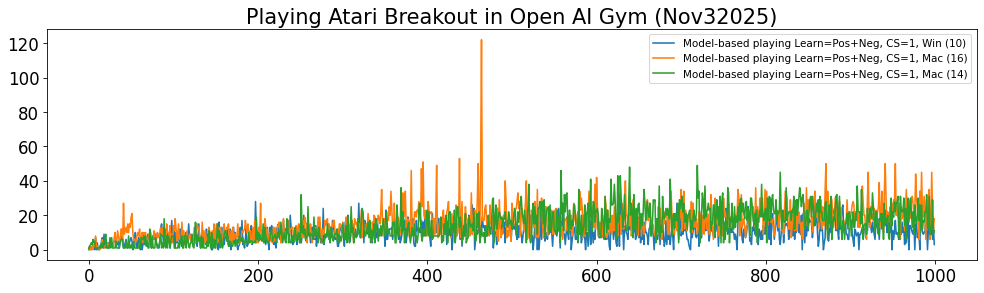

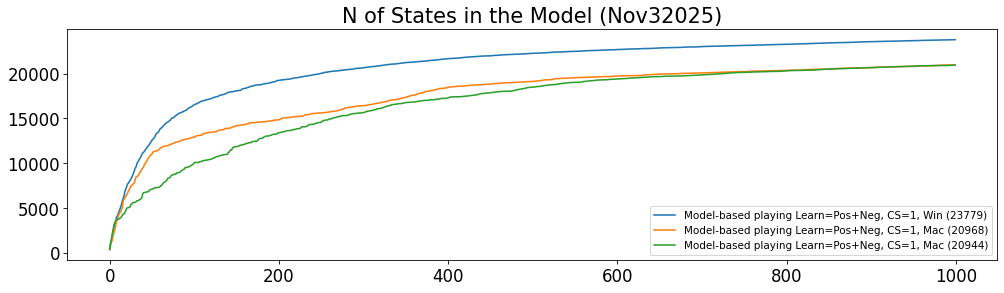

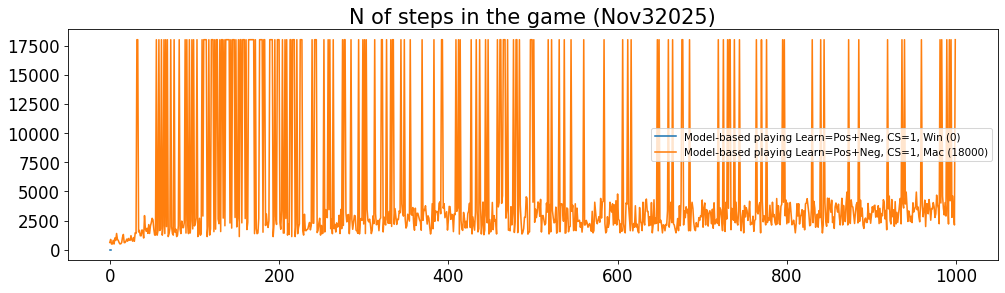

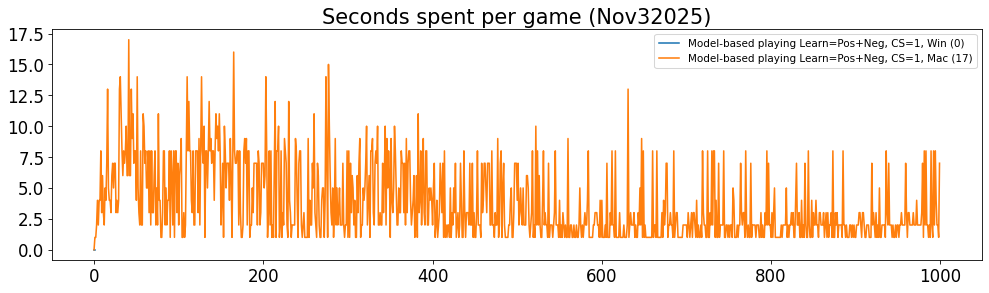

In [34]:
# Pos-Only: terminated, score=0, states=623

# Pos+Neg CS=1 Win:
score_avg=10.1; steps_avg=2826.0; lives_avg=0.2; lapse_avg="0:00:00.263781"; time="0:29:21.785655"
scoresPNCS1 = [1.0, 2.0, 0, 1.0, 2.0, 2.0, 3.0, 0, 7.0, 0, 4.0, 0, 0, 2.0, 2.0, 5.0, 7.0, 2.0, 9.0, 1.0, 6.0, 4.0, 1.0, 4.0, 1.0, 4.0, 2.0, 2.0, 4.0, 4.0, 5.0, 5.0, 4.0, 4.0, 3.0, 5.0, 1.0, 5.0, 7.0, 8.0, 4.0, 1.0, 2.0, 4.0, 6.0, 3.0, 1.0, 2.0, 4.0, 6.0, 7.0, 5.0, 0, 4.0, 5.0, 10.0, 2.0, 1.0, 5.0, 7.0, 2.0, 0, 5.0, 0, 3.0, 8.0, 3.0, 3.0, 6.0, 5.0, 9.0, 7.0, 6.0, 7.0, 1.0, 6.0, 6.0, 7.0, 6.0, 9.0, 3.0, 3.0, 1.0, 2.0, 5.0, 13.0, 15.0, 10.0, 6.0, 2.0, 12.0, 5.0, 12.0, 9.0, 5.0, 7.0, 1.0, 7.0, 17.0, 7.0, 6.0, 12.0, 1.0, 10.0, 4.0, 7.0, 11.0, 3.0, 12.0, 6.0, 2.0, 8.0, 3.0, 4.0, 9.0, 10.0, 7.0, 6.0, 15.0, 7.0, 9.0, 5.0, 7.0, 6.0, 6.0, 13.0, 4.0, 9.0, 2.0, 7.0, 15.0, 6.0, 1.0, 6.0, 8.0, 11.0, 7.0, 9.0, 3.0, 12.0, 5.0, 9.0, 7.0, 4.0, 7.0, 0, 0, 8.0, 11.0, 2.0, 9.0, 9.0, 6.0, 0, 16.0, 3.0, 7.0, 13.0, 2.0, 5.0, 3.0, 8.0, 8.0, 6.0, 12.0, 3.0, 6.0, 12.0, 0, 8.0, 11.0, 13.0, 5.0, 10.0, 5.0, 3.0, 0, 2.0, 3.0, 13.0, 5.0, 17.0, 3.0, 4.0, 1.0, 6.0, 13.0, 2.0, 3.0, 5.0, 8.0, 7.0, 14.0, 3.0, 10.0, 6.0, 7.0, 28.0, 9.0, 6.0, 7.0, 10.0, 6.0, 6.0, 6.0, 7.0, 11.0, 6.0, 7.0, 3.0, 7.0, 13.0, 5.0, 0, 13.0, 10.0, 14.0, 11.0, 4.0, 3.0, 7.0, 1.0, 12.0, 13.0, 15.0, 9.0, 6.0, 12.0, 9.0, 6.0, 17.0, 7.0, 12.0, 12.0, 11.0, 10.0, 9.0, 8.0, 20.0, 13.0, 6.0, 3.0, 4.0, 9.0, 12.0, 7.0, 3.0, 8.0, 6.0, 11.0, 15.0, 4.0, 8.0, 12.0, 20.0, 13.0, 8.0, 5.0, 15.0, 10.0, 14.0, 9.0, 4.0, 12.0, 13.0, 8.0, 7.0, 6.0, 14.0, 2.0, 11.0, 15.0, 9.0, 12.0, 4.0, 8.0, 5.0, 24.0, 3.0, 8.0, 7.0, 9.0, 10.0, 9.0, 6.0, 13.0, 7.0, 8.0, 17.0, 14.0, 10.0, 6.0, 7.0, 7.0, 2.0, 2.0, 9.0, 13.0, 13.0, 10.0, 13.0, 8.0, 2.0, 16.0, 16.0, 8.0, 20.0, 14.0, 6.0, 5.0, 15.0, 15.0, 15.0, 6.0, 10.0, 12.0, 9.0, 8.0, 9.0, 27.0, 11.0, 11.0, 7.0, 10.0, 19.0, 4.0, 17.0, 10.0, 13.0, 10.0, 9.0, 9.0, 11.0, 10.0, 12.0, 4.0, 16.0, 13.0, 11.0, 8.0, 7.0, 16.0, 10.0, 9.0, 10.0, 11.0, 13.0, 10.0, 12.0, 12.0, 2.0, 23.0, 6.0, 6.0, 11.0, 12.0, 12.0, 12.0, 13.0, 6.0, 10.0, 14.0, 15.0, 12.0, 15.0, 10.0, 6.0, 12.0, 4.0, 6.0, 9.0, 14.0, 11.0, 17.0, 16.0, 4.0, 9.0, 19.0, 17.0, 8.0, 10.0, 13.0, 17.0, 18.0, 4.0, 2.0, 2.0, 17.0, 11.0, 12.0, 13.0, 10.0, 10.0, 17.0, 12.0, 16.0, 8.0, 19.0, 12.0, 19.0, 10.0, 12.0, 10.0, 7.0, 2.0, 12.0, 21.0, 7.0, 16.0, 18.0, 12.0, 10.0, 19.0, 9.0, 18.0, 15.0, 10.0, 18.0, 14.0, 13.0, 10.0, 10.0, 14.0, 3.0, 16.0, 8.0, 9.0, 15.0, 19.0, 0, 5.0, 19.0, 16.0, 6.0, 10.0, 9.0, 13.0, 17.0, 10.0, 6.0, 15.0, 2.0, 13.0, 11.0, 8.0, 9.0, 15.0, 11.0, 7.0, 20.0, 10.0, 11.0, 10.0, 26.0, 17.0, 24.0, 0, 6.0, 12.0, 9.0, 10.0, 13.0, 14.0, 7.0, 13.0, 19.0, 13.0, 14.0, 11.0, 11.0, 8.0, 10.0, 11.0, 15.0, 12.0, 13.0, 12.0, 16.0, 1.0, 11.0, 10.0, 10.0, 3.0, 24.0, 12.0, 14.0, 21.0, 15.0, 11.0, 14.0, 10.0, 16.0, 4.0, 13.0, 13.0, 17.0, 13.0, 16.0, 10.0, 5.0, 14.0, 12.0, 15.0, 12.0, 15.0, 9.0, 6.0, 14.0, 7.0, 14.0, 11.0, 9.0, 4.0, 8.0, 13.0, 15.0, 10.0, 8.0, 10.0, 16.0, 17.0, 11.0, 20.0, 8.0, 8.0, 0, 6.0, 14.0, 7.0, 12.0, 0, 9.0, 0, 8.0, 22.0, 6.0, 20.0, 10.0, 11.0, 5.0, 10.0, 7.0, 6.0, 14.0, 13.0, 10.0, 12.0, 10.0, 2.0, 11.0, 12.0, 15.0, 11.0, 8.0, 11.0, 24.0, 18.0, 1.0, 16.0, 14.0, 27.0, 9.0, 9.0, 3.0, 9.0, 19.0, 9.0, 6.0, 20.0, 20.0, 0, 5.0, 9.0, 11.0, 13.0, 6.0, 6.0, 9.0, 20.0, 10.0, 9.0, 12.0, 4.0, 7.0, 8.0, 8.0, 7.0, 0, 10.0, 10.0, 2.0, 11.0, 17.0, 3.0, 13.0, 11.0, 4.0, 10.0, 6.0, 19.0, 21.0, 20.0, 8.0, 7.0, 7.0, 10.0, 10.0, 16.0, 7.0, 14.0, 6.0, 7.0, 6.0, 7.0, 10.0, 2.0, 0, 19.0, 11.0, 12.0, 6.0, 13.0, 12.0, 4.0, 2.0, 12.0, 19.0, 2.0, 31.0, 10.0, 12.0, 12.0, 0, 13.0, 14.0, 10.0, 9.0, 6.0, 15.0, 12.0, 14.0, 11.0, 12.0, 9.0, 11.0, 18.0, 6.0, 8.0, 13.0, 9.0, 7.0, 19.0, 4.0, 14.0, 6.0, 12.0, 3.0, 16.0, 10.0, 10.0, 8.0, 3.0, 12.0, 13.0, 18.0, 13.0, 10.0, 9.0, 0, 10.0, 6.0, 10.0, 6.0, 11.0, 14.0, 3.0, 13.0, 6.0, 18.0, 8.0, 2.0, 5.0, 17.0, 3.0, 16.0, 6.0, 8.0, 3.0, 9.0, 12.0, 8.0, 0, 15.0, 16.0, 13.0, 27.0, 15.0, 6.0, 14.0, 24.0, 8.0, 12.0, 9.0, 24.0, 11.0, 16.0, 10.0, 6.0, 6.0, 3.0, 1.0, 0, 14.0, 7.0, 11.0, 13.0, 18.0, 8.0, 7.0, 9.0, 15.0, 2.0, 6.0, 7.0, 7.0, 13.0, 12.0, 11.0, 17.0, 11.0, 21.0, 16.0, 11.0, 5.0, 10.0, 12.0, 11.0, 11.0, 8.0, 9.0, 10.0, 11.0, 15.0, 14.0, 2.0, 13.0, 11.0, 11.0, 17.0, 12.0, 12.0, 11.0, 12.0, 24.0, 23.0, 9.0, 12.0, 10.0, 14.0, 10.0, 13.0, 10.0, 10.0, 6.0, 9.0, 6.0, 0, 15.0, 20.0, 29.0, 15.0, 15.0, 6.0, 4.0, 12.0, 9.0, 7.0, 9.0, 14.0, 25.0, 18.0, 5.0, 7.0, 3.0, 13.0, 11.0, 16.0, 9.0, 16.0, 15.0, 10.0, 3.0, 12.0, 10.0, 6.0, 11.0, 6.0, 14.0, 12.0, 9.0, 20.0, 14.0, 24.0, 16.0, 6.0, 30.0, 3.0, 18.0, 21.0, 12.0, 6.0, 12.0, 16.0, 21.0, 11.0, 20.0, 6.0, 3.0, 9.0, 16.0, 17.0, 4.0, 12.0, 15.0, 15.0, 14.0, 16.0, 6.0, 13.0, 10.0, 21.0, 11.0, 8.0, 25.0, 6.0, 16.0, 10.0, 29.0, 15.0, 10.0, 15.0, 9.0, 20.0, 0, 21.0, 12.0, 4.0, 15.0, 8.0, 15.0, 11.0, 18.0, 16.0, 17.0, 16.0, 7.0, 12.0, 27.0, 14.0, 17.0, 21.0, 10.0, 2.0, 6.0, 16.0, 11.0, 18.0, 10.0, 0, 4.0, 7.0, 25.0, 12.0, 13.0, 5.0, 10.0, 16.0, 10.0, 10.0, 20.0, 22.0, 24.0, 17.0, 11.0, 15.0, 11.0, 6.0, 21.0, 12.0, 17.0, 24.0, 26.0, 12.0, 12.0, 16.0, 9.0, 9.0, 6.0, 6.0, 20.0, 16.0, 17.0, 9.0, 6.0, 2.0, 12.0, 11.0, 8.0, 9.0, 10.0, 0, 9.0, 9.0, 11.0, 13.0, 13.0, 12.0, 12.0, 7.0, 15.0, 11.0, 17.0, 20.0, 17.0, 13.0, 10.0, 16.0, 12.0, 9.0, 6.0, 16.0, 13.0, 18.0, 12.0, 6.0, 16.0, 19.0, 12.0, 18.0, 18.0, 22.0, 17.0, 23.0, 10.0, 11.0, 17.0, 20.0, 10.0, 23.0, 0, 11.0, 6.0, 11.0, 17.0, 9.0, 10.0, 9.0, 6.0, 12.0, 15.0, 9.0, 16.0, 10.0, 13.0, 3.0, 15.0, 4.0, 9.0, 24.0, 0, 14.0, 14.0, 12.0, 10.0, 9.0, 15.0, 0, 14.0, 16.0, 7.0, 9.0, 8.0, 0, 32.0, 12.0, 11.0, 9.0, 10.0, 10.0, 20.0, 13.0, 0, 11.0, 13.0, 16.0, 9.0, 14.0, 6.0, 13.0, 3.0]
statesPNCS1 = states = [434, 1067, 1439, 1780, 2406, 2818, 3199, 3290, 3970, 4059, 4350, 4586, 4825, 5129, 5428, 5821, 6113, 6366, 6848, 7113, 7341, 7662, 7751, 7915, 8081, 8243, 8390, 8607, 8874, 9085, 9450, 9553, 9886, 10107, 10226, 10452, 10572, 10751, 10968, 11133, 11216, 11317, 11478, 11575, 11754, 11874, 11972, 12096, 12282, 12417, 12551, 12661, 12786, 12854, 13098, 13306, 13348, 13422, 13541, 13749, 13864, 13923, 14013, 14122, 14231, 14345, 14439, 14495, 14562, 14618, 14674, 14766, 14844, 14992, 15042, 15078, 15115, 15234, 15310, 15366, 15428, 15512, 15572, 15600, 15631, 15661, 15734, 15758, 15833, 15854, 15879, 15939, 16030, 16120, 16183, 16229, 16286, 16324, 16378, 16476, 16528, 16577, 16586, 16648, 16706, 16729, 16779, 16866, 16893, 16934, 16944, 16973, 17021, 17043, 17061, 17096, 17114, 17133, 17149, 17181, 17216, 17245, 17302, 17340, 17370, 17382, 17398, 17437, 17450, 17527, 17570, 17599, 17610, 17638, 17651, 17677, 17715, 17728, 17818, 17857, 17903, 17915, 17929, 17953, 17971, 17978, 17978, 18025, 18049, 18055, 18075, 18095, 18105, 18106, 18118, 18145, 18228, 18299, 18313, 18332, 18341, 18366, 18415, 18445, 18482, 18495, 18558, 18581, 18585, 18597, 18649, 18665, 18695, 18723, 18732, 18736, 18739, 18741, 18749, 18768, 18771, 18831, 18847, 18875, 18881, 18886, 18909, 18926, 18944, 18956, 18965, 19016, 19044, 19055, 19074, 19079, 19123, 19187, 19211, 19236, 19243, 19250, 19278, 19290, 19300, 19314, 19320, 19324, 19344, 19351, 19358, 19365, 19384, 19390, 19413, 19448, 19458, 19475, 19499, 19521, 19528, 19536, 19543, 19563, 19587, 19600, 19622, 19644, 19664, 19684, 19706, 19711, 19712, 19720, 19735, 19758, 19786, 19795, 19809, 19840, 19859, 19868, 19871, 19881, 19900, 19915, 19945, 19958, 19985, 20000, 20035, 20043, 20059, 20087, 20129, 20149, 20153, 20160, 20180, 20204, 20217, 20226, 20234, 20254, 20260, 20267, 20294, 20297, 20300, 20303, 20309, 20318, 20340, 20353, 20366, 20371, 20381, 20413, 20417, 20428, 20431, 20431, 20456, 20462, 20480, 20486, 20487, 20490, 20502, 20551, 20555, 20561, 20580, 20589, 20594, 20602, 20611, 20614, 20619, 20641, 20646, 20659, 20679, 20696, 20706, 20706, 20742, 20749, 20755, 20759, 20769, 20784, 20794, 20798, 20806, 20829, 20848, 20853, 20854, 20881, 20897, 20903, 20905, 20931, 20941, 20960, 20960, 20969, 20989, 21010, 21023, 21026, 21044, 21054, 21058, 21059, 21072, 21075, 21077, 21100, 21101, 21119, 21144, 21148, 21152, 21174, 21180, 21186, 21202, 21216, 21228, 21234, 21240, 21243, 21248, 21252, 21253, 21261, 21269, 21280, 21293, 21302, 21309, 21314, 21330, 21337, 21347, 21355, 21359, 21360, 21365, 21384, 21392, 21404, 21415, 21421, 21422, 21447, 21460, 21467, 21476, 21483, 21493, 21500, 21502, 21502, 21507, 21518, 21529, 21557, 21570, 21585, 21600, 21603, 21606, 21612, 21619, 21627, 21634, 21651, 21668, 21672, 21673, 21680, 21684, 21690, 21699, 21703, 21709, 21719, 21721, 21722, 21736, 21740, 21754, 21764, 21772, 21785, 21798, 21803, 21819, 21828, 21842, 21844, 21848, 21850, 21857, 21864, 21868, 21872, 21878, 21884, 21900, 21904, 21906, 21912, 21922, 21924, 21944, 21947, 21949, 21952, 21952, 21953, 21959, 21963, 21967, 21972, 21977, 21979, 21985, 21989, 21989, 22021, 22024, 22028, 22030, 22032, 22034, 22041, 22047, 22062, 22073, 22083, 22087, 22092, 22093, 22100, 22103, 22108, 22113, 22115, 22120, 22125, 22130, 22130, 22137, 22147, 22149, 22155, 22156, 22157, 22160, 22171, 22173, 22175, 22182, 22186, 22187, 22191, 22200, 22205, 22219, 22223, 22230, 22240, 22251, 22252, 22252, 22256, 22260, 22263, 22270, 22274, 22276, 22279, 22281, 22284, 22288, 22291, 22295, 22297, 22298, 22303, 22308, 22315, 22324, 22338, 22349, 22351, 22364, 22369, 22380, 22387, 22393, 22394, 22394, 22400, 22401, 22407, 22408, 22408, 22408, 22411, 22418, 22424, 22425, 22428, 22431, 22436, 22444, 22452, 22455, 22460, 22462, 22465, 22470, 22470, 22471, 22473, 22479, 22480, 22483, 22490, 22493, 22502, 22511, 22513, 22519, 22522, 22527, 22529, 22536, 22544, 22548, 22554, 22558, 22562, 22566, 22570, 22570, 22571, 22572, 22576, 22580, 22586, 22594, 22597, 22603, 22603, 22607, 22611, 22616, 22617, 22620, 22626, 22628, 22628, 22636, 22638, 22638, 22638, 22647, 22648, 22655, 22655, 22657, 22666, 22667, 22671, 22678, 22685, 22688, 22692, 22697, 22697, 22701, 22705, 22706, 22719, 22723, 22725, 22731, 22732, 22736, 22740, 22740, 22743, 22744, 22747, 22748, 22751, 22755, 22757, 22759, 22765, 22767, 22767, 22780, 22785, 22789, 22792, 22792, 22793, 22794, 22797, 22797, 22800, 22801, 22805, 22806, 22812, 22821, 22823, 22829, 22835, 22843, 22847, 22855, 22857, 22859, 22866, 22868, 22874, 22876, 22879, 22879, 22887, 22889, 22890, 22895, 22896, 22898, 22900, 22903, 22904, 22906, 22908, 22909, 22914, 22914, 22914, 22914, 22914, 22921, 22922, 22927, 22927, 22948, 22952, 22954, 22955, 22957, 22958, 22964, 22967, 22968, 22968, 22968, 22971, 22973, 22976, 22978, 22979, 22988, 22991, 22994, 22995, 22998, 23010, 23012, 23019, 23025, 23027, 23028, 23030, 23032, 23037, 23039, 23039, 23042, 23042, 23044, 23045, 23047, 23047, 23049, 23052, 23053, 23058, 23059, 23060, 23066, 23070, 23072, 23074, 23075, 23075, 23078, 23080, 23083, 23086, 23094, 23097, 23099, 23103, 23108, 23109, 23111, 23112, 23112, 23115, 23119, 23128, 23128, 23135, 23135, 23138, 23139, 23139, 23140, 23142, 23148, 23149, 23149, 23152, 23155, 23155, 23157, 23162, 23166, 23166, 23168, 23170, 23171, 23172, 23172, 23173, 23178, 23182, 23183, 23184, 23185, 23186, 23188, 23190, 23197, 23202, 23212, 23216, 23219, 23223, 23229, 23229, 23230, 23230, 23238, 23242, 23252, 23252, 23252, 23252, 23253, 23256, 23259, 23260, 23260, 23262, 23265, 23266, 23267, 23267, 23270, 23273, 23274, 23277, 23280, 23284, 23290, 23294, 23294, 23297, 23304, 23312, 23312, 23316, 23317, 23319, 23320, 23321, 23322, 23330, 23336, 23337, 23339, 23340, 23344, 23344, 23348, 23348, 23350, 23351, 23354, 23356, 23364, 23371, 23374, 23377, 23381, 23383, 23384, 23386, 23389, 23391, 23396, 23399, 23401, 23409, 23409, 23413, 23421, 23428, 23429, 23431, 23432, 23435, 23438, 23442, 23443, 23445, 23448, 23450, 23454, 23455, 23455, 23461, 23463, 23463, 23463, 23464, 23465, 23467, 23467, 23475, 23479, 23482, 23485, 23490, 23499, 23504, 23509, 23515, 23515, 23515, 23516, 23517, 23519, 23520, 23523, 23532, 23536, 23544, 23545, 23547, 23548, 23550, 23550, 23550, 23550, 23551, 23559, 23562, 23563, 23563, 23567, 23573, 23577, 23581, 23583, 23585, 23586, 23588, 23589, 23590, 23590, 23592, 23592, 23592, 23597, 23600, 23605, 23605, 23605, 23607, 23616, 23620, 23623, 23625, 23625, 23625, 23625, 23626, 23627, 23631, 23632, 23637, 23640, 23642, 23646, 23654, 23657, 23659, 23660, 23660, 23664, 23664, 23665, 23668, 23673, 23673, 23673, 23673, 23675, 23678, 23682, 23686, 23693, 23697, 23699, 23700, 23700, 23701, 23708, 23708, 23711, 23711, 23714, 23717, 23719, 23720, 23722, 23724, 23726, 23728, 23730, 23732, 23733, 23736, 23736, 23743, 23745, 23748, 23748, 23748, 23752, 23752, 23757, 23759, 23763, 23768, 23769, 23769, 23771, 23773, 23773, 23774, 23775, 23778, 23778, 23779]

# Pos+Neg CS=1 Mac:
score_avg=15.9; steps_avg=5355.3; lives_avg=0.5; lapse_avg="0:00:07.402096"; time="1:01:46.300105"
scoresPNCS1_ = [1.0, 2.0, 0, 0, 2.0, 0, 3.0, 2.0, 8.0, 2.0, 2.0, 1.0, 0, 0, 1.0, 3.0, 6.0, 1.0, 1.0, 2.0, 3.0, 2.0, 4.0, 3.0, 2.0, 6.0, 3.0, 2.0, 4.0, 2.0, 7.0, 10.0, 4.0, 4.0, 11.0, 8.0, 5.0, 5.0, 12.0, 12.0, 4.0, 27.0, 9.0, 11.0, 13.0, 10.0, 15.0, 10.0, 15.0, 13.0, 19.0, 21.0, 10.0, 6.0, 6.0, 4.0, 6.0, 8.0, 10.0, 8.0, 12.0, 4.0, 6.0, 10.0, 4.0, 10.0, 7.0, 10.0, 4.0, 5.0, 7.0, 9.0, 5.0, 10.0, 6.0, 6.0, 6.0, 11.0, 9.0, 5.0, 6.0, 10.0, 7.0, 9.0, 10.0, 13.0, 10.0, 9.0, 13.0, 4.0, 7.0, 4.0, 15.0, 10.0, 10.0, 7.0, 14.0, 4.0, 9.0, 4.0, 14.0, 11.0, 18.0, 13.0, 5.0, 7.0, 15.0, 6.0, 7.0, 5.0, 16.0, 6.0, 11.0, 4.0, 4.0, 5.0, 11.0, 4.0, 6.0, 9.0, 8.0, 5.0, 4.0, 8.0, 5.0, 10.0, 4.0, 15.0, 15.0, 12.0, 13.0, 8.0, 4.0, 4.0, 16.0, 4.0, 11.0, 4.0, 10.0, 4.0, 5.0, 4.0, 13.0, 10.0, 10.0, 5.0, 11.0, 4.0, 15.0, 6.0, 11.0, 15.0, 4.0, 5.0, 13.0, 12.0, 13.0, 4.0, 4.0, 11.0, 15.0, 8.0, 10.0, 13.0, 12.0, 15.0, 6.0, 4.0, 11.0, 4.0, 13.0, 10.0, 6.0, 9.0, 7.0, 7.0, 15.0, 6.0, 4.0, 4.0, 7.0, 11.0, 10.0, 11.0, 12.0, 17.0, 13.0, 10.0, 15.0, 11.0, 6.0, 11.0, 4.0, 5.0, 13.0, 5.0, 17.0, 15.0, 4.0, 11.0, 4.0, 13.0, 10.0, 27.0, 5.0, 7.0, 7.0, 4.0, 18.0, 14.0, 6.0, 12.0, 6.0, 4.0, 10.0, 5.0, 7.0, 4.0, 13.0, 5.0, 13.0, 5.0, 7.0, 14.0, 13.0, 16.0, 11.0, 4.0, 7.0, 6.0, 18.0, 8.0, 9.0, 9.0, 12.0, 12.0, 17.0, 8.0, 12.0, 12.0, 13.0, 13.0, 6.0, 11.0, 6.0, 14.0, 8.0, 13.0, 15.0, 6.0, 12.0, 10.0, 7.0, 17.0, 7.0, 19.0, 16.0, 15.0, 4.0, 19.0, 12.0, 10.0, 15.0, 7.0, 4.0, 10.0, 12.0, 7.0, 13.0, 11.0, 10.0, 19.0, 10.0, 19.0, 10.0, 4.0, 12.0, 9.0, 9.0, 17.0, 14.0, 17.0, 18.0, 7.0, 15.0, 12.0, 13.0, 13.0, 13.0, 17.0, 17.0, 9.0, 8.0, 7.0, 12.0, 7.0, 15.0, 15.0, 14.0, 10.0, 16.0, 11.0, 10.0, 11.0, 19.0, 14.0, 13.0, 15.0, 12.0, 10.0, 8.0, 17.0, 11.0, 4.0, 18.0, 15.0, 16.0, 14.0, 12.0, 15.0, 15.0, 7.0, 23.0, 7.0, 19.0, 13.0, 11.0, 11.0, 15.0, 13.0, 21.0, 16.0, 11.0, 11.0, 5.0, 16.0, 12.0, 20.0, 19.0, 11.0, 18.0, 15.0, 20.0, 18.0, 15.0, 22.0, 35.0, 16.0, 8.0, 18.0, 11.0, 11.0, 16.0, 18.0, 17.0, 25.0, 20.0, 34.0, 24.0, 13.0, 9.0, 27.0, 12.0, 17.0, 17.0, 19.0, 18.0, 13.0, 9.0, 12.0, 12.0, 33.0, 19.0, 25.0, 34.0, 13.0, 16.0, 18.0, 14.0, 7.0, 10.0, 46.0, 10.0, 12.0, 14.0, 22.0, 22.0, 19.0, 23.0, 22.0, 28.0, 21.0, 16.0, 47.0, 25.0, 51.0, 20.0, 18.0, 23.0, 8.0, 15.0, 28.0, 22.0, 22.0, 21.0, 22.0, 8.0, 18.0, 18.0, 9.0, 22.0, 49.0, 8.0, 7.0, 14.0, 18.0, 9.0, 9.0, 19.0, 23.0, 14.0, 18.0, 14.0, 22.0, 24.0, 28.0, 13.0, 17.0, 7.0, 21.0, 15.0, 9.0, 20.0, 17.0, 26.0, 8.0, 10.0, 17.0, 53.0, 7.0, 17.0, 28.0, 6.0, 8.0, 17.0, 25.0, 19.0, 17.0, 7.0, 19.0, 8.0, 10.0, 33.0, 9.0, 20.0, 18.0, 23.0, 7.0, 17.0, 28.0, 50.0, 17.0, 6.0, 50.0, 122.0, 17.0, 17.0, 17.0, 24.0, 26.0, 18.0, 9.0, 13.0, 8.0, 26.0, 15.0, 20.0, 18.0, 11.0, 17.0, 17.0, 19.0, 8.0, 24.0, 5.0, 29.0, 18.0, 7.0, 11.0, 9.0, 20.0, 18.0, 40.0, 29.0, 7.0, 11.0, 8.0, 17.0, 17.0, 5.0, 27.0, 17.0, 14.0, 22.0, 23.0, 24.0, 28.0, 33.0, 24.0, 28.0, 8.0, 20.0, 24.0, 17.0, 11.0, 19.0, 28.0, 40.0, 6.0, 7.0, 26.0, 8.0, 8.0, 23.0, 19.0, 19.0, 13.0, 28.0, 7.0, 8.0, 35.0, 7.0, 8.0, 23.0, 23.0, 30.0, 17.0, 7.0, 7.0, 8.0, 25.0, 24.0, 8.0, 11.0, 11.0, 17.0, 20.0, 23.0, 9.0, 10.0, 23.0, 9.0, 24.0, 13.0, 19.0, 14.0, 11.0, 19.0, 8.0, 13.0, 6.0, 12.0, 18.0, 17.0, 18.0, 11.0, 18.0, 20.0, 11.0, 12.0, 20.0, 8.0, 9.0, 27.0, 19.0, 16.0, 15.0, 20.0, 22.0, 17.0, 34.0, 23.0, 30.0, 24.0, 7.0, 20.0, 8.0, 12.0, 22.0, 11.0, 20.0, 34.0, 21.0, 19.0, 23.0, 14.0, 26.0, 13.0, 38.0, 12.0, 42.0, 24.0, 17.0, 8.0, 16.0, 12.0, 7.0, 20.0, 9.0, 8.0, 31.0, 26.0, 7.0, 23.0, 15.0, 9.0, 11.0, 20.0, 9.0, 20.0, 11.0, 25.0, 11.0, 15.0, 12.0, 8.0, 22.0, 16.0, 20.0, 9.0, 27.0, 14.0, 12.0, 27.0, 40.0, 20.0, 20.0, 14.0, 20.0, 14.0, 27.0, 8.0, 12.0, 29.0, 12.0, 18.0, 13.0, 19.0, 9.0, 8.0, 19.0, 17.0, 18.0, 8.0, 18.0, 16.0, 9.0, 12.0, 16.0, 20.0, 29.0, 17.0, 23.0, 27.0, 19.0, 12.0, 15.0, 14.0, 10.0, 8.0, 11.0, 18.0, 9.0, 25.0, 12.0, 24.0, 6.0, 6.0, 12.0, 20.0, 15.0, 22.0, 19.0, 21.0, 9.0, 18.0, 9.0, 21.0, 34.0, 21.0, 19.0, 13.0, 9.0, 19.0, 17.0, 11.0, 15.0, 17.0, 17.0, 20.0, 35.0, 11.0, 21.0, 34.0, 12.0, 23.0, 20.0, 11.0, 18.0, 20.0, 20.0, 16.0, 28.0, 10.0, 27.0, 15.0, 13.0, 14.0, 18.0, 9.0, 12.0, 22.0, 22.0, 18.0, 9.0, 12.0, 20.0, 9.0, 34.0, 17.0, 12.0, 21.0, 20.0, 9.0, 9.0, 32.0, 18.0, 14.0, 6.0, 13.0, 30.0, 16.0, 15.0, 20.0, 8.0, 24.0, 9.0, 19.0, 20.0, 8.0, 30.0, 19.0, 22.0, 20.0, 17.0, 18.0, 27.0, 13.0, 19.0, 13.0, 19.0, 12.0, 15.0, 15.0, 20.0, 19.0, 19.0, 35.0, 31.0, 8.0, 15.0, 32.0, 13.0, 17.0, 18.0, 13.0, 7.0, 14.0, 14.0, 15.0, 23.0, 15.0, 12.0, 27.0, 20.0, 25.0, 19.0, 13.0, 36.0, 13.0, 25.0, 20.0, 16.0, 30.0, 24.0, 29.0, 30.0, 9.0, 16.0, 35.0, 16.0, 34.0, 14.0, 20.0, 30.0, 20.0, 16.0, 18.0, 15.0, 14.0, 8.0, 16.0, 23.0, 21.0, 23.0, 13.0, 18.0, 25.0, 20.0, 11.0, 20.0, 9.0, 23.0, 34.0, 33.0, 30.0, 18.0, 12.0, 12.0, 29.0, 7.0, 13.0, 24.0, 21.0, 11.0, 24.0, 25.0, 11.0, 20.0, 22.0, 16.0, 15.0, 8.0, 16.0, 6.0, 27.0, 14.0, 17.0, 36.0, 14.0, 29.0, 25.0, 23.0, 28.0, 14.0, 19.0, 10.0, 29.0, 34.0, 24.0, 19.0, 23.0, 19.0, 12.0, 19.0, 29.0, 12.0, 25.0, 24.0, 14.0, 34.0, 50.0, 12.0, 34.0, 21.0, 13.0, 28.0, 30.0, 29.0, 19.0, 13.0, 19.0, 30.0, 31.0, 12.0, 15.0, 16.0, 28.0, 18.0, 24.0, 12.0, 10.0, 15.0, 16.0, 17.0, 17.0, 29.0, 17.0, 22.0, 13.0, 18.0, 22.0, 26.0, 28.0, 26.0, 17.0, 22.0, 19.0, 25.0, 13.0, 21.0, 13.0, 18.0, 17.0, 37.0, 27.0, 20.0, 20.0, 9.0, 6.0, 29.0, 45.0, 15.0, 13.0, 25.0, 18.0, 21.0, 17.0, 24.0, 13.0, 23.0, 17.0, 22.0, 25.0, 39.0, 13.0, 18.0, 34.0, 24.0, 10.0, 34.0, 50.0, 30.0, 16.0, 22.0, 17.0, 16.0, 25.0, 14.0, 27.0, 19.0, 29.0, 28.0, 50.0, 20.0, 26.0, 19.0, 19.0, 27.0, 6.0, 25.0, 18.0, 20.0, 25.0, 11.0, 23.0, 35.0, 19.0, 25.0, 29.0, 18.0, 22.0, 29.0, 31.0, 26.0, 19.0, 22.0, 44.0, 30.0, 24.0, 16.0, 6.0, 34.0, 18.0, 45.0, 22.0, 19.0, 31.0, 18.0, 6.0, 29.0, 13.0, 19.0, 35.0, 6.0, 19.0, 45.0, 20.0, 12.0, 18.0]
statesPNCS1_ = [442, 933, 1160, 1407, 1944, 2244, 2587, 2967, 3579, 3726, 4114, 4298, 4442, 4649, 4838, 5143, 5786, 5960, 6127, 6312, 6445, 6632, 6889, 7012, 7237, 7461, 7505, 7617, 7704, 7787, 8117, 8431, 8522, 8548, 8637, 8849, 9001, 9133, 9336, 9455, 9535, 9882, 9984, 10074, 10306, 10470, 10635, 10726, 10868, 10972, 11028, 11224, 11292, 11316, 11351, 11371, 11390, 11418, 11480, 11600, 11696, 11733, 11791, 11836, 11871, 11901, 11916, 11938, 11948, 11972, 12014, 12094, 12104, 12115, 12176, 12206, 12257, 12279, 12342, 12351, 12363, 12381, 12394, 12490, 12511, 12562, 12570, 12613, 12651, 12669, 12677, 12683, 12738, 12744, 12768, 12771, 12830, 12864, 12881, 12889, 12902, 12944, 13036, 13062, 13070, 13080, 13104, 13112, 13125, 13135, 13268, 13288, 13337, 13343, 13347, 13359, 13403, 13418, 13430, 13443, 13449, 13455, 13458, 13472, 13493, 13508, 13511, 13570, 13622, 13662, 13710, 13711, 13716, 13716, 13756, 13764, 13854, 13868, 13881, 13882, 13889, 13891, 13917, 13926, 13995, 14035, 14058, 14065, 14155, 14157, 14169, 14187, 14208, 14213, 14241, 14250, 14283, 14291, 14294, 14295, 14300, 14334, 14388, 14394, 14406, 14498, 14502, 14504, 14505, 14507, 14510, 14521, 14533, 14545, 14557, 14561, 14572, 14580, 14598, 14601, 14616, 14624, 14633, 14636, 14636, 14641, 14650, 14680, 14707, 14712, 14712, 14715, 14715, 14728, 14804, 14805, 14808, 14818, 14830, 14831, 14834, 14868, 14914, 15017, 15033, 15033, 15040, 15060, 15069, 15081, 15087, 15090, 15097, 15098, 15135, 15140, 15152, 15155, 15182, 15183, 15190, 15198, 15204, 15217, 15227, 15244, 15249, 15249, 15253, 15267, 15361, 15378, 15410, 15414, 15424, 15431, 15442, 15448, 15523, 15525, 15540, 15554, 15556, 15562, 15569, 15576, 15578, 15594, 15596, 15609, 15611, 15617, 15620, 15636, 15640, 15663, 15672, 15678, 15678, 15706, 15740, 15761, 15763, 15775, 15775, 15780, 15822, 15823, 15825, 15851, 15875, 15912, 15914, 15932, 16035, 16039, 16040, 16109, 16128, 16146, 16183, 16189, 16219, 16219, 16231, 16243, 16255, 16269, 16302, 16315, 16342, 16359, 16367, 16386, 16389, 16397, 16402, 16412, 16418, 16421, 16424, 16433, 16437, 16439, 16454, 16495, 16518, 16528, 16541, 16556, 16561, 16602, 16611, 16616, 16661, 16674, 16679, 16690, 16694, 16734, 16769, 16769, 16789, 16797, 16818, 16862, 16864, 16871, 16913, 16977, 16989, 16997, 17001, 17034, 17053, 17074, 17079, 17080, 17086, 17099, 17104, 17136, 17157, 17193, 17212, 17216, 17274, 17307, 17311, 17346, 17350, 17399, 17427, 17445, 17476, 17497, 17546, 17569, 17578, 17584, 17590, 17623, 17644, 17690, 17722, 17767, 17783, 17823, 17826, 17846, 17852, 17897, 17939, 17988, 18008, 18015, 18026, 18049, 18080, 18086, 18096, 18130, 18132, 18157, 18171, 18187, 18231, 18237, 18266, 18321, 18327, 18331, 18335, 18341, 18344, 18346, 18372, 18393, 18401, 18439, 18451, 18475, 18511, 18513, 18519, 18529, 18537, 18537, 18547, 18549, 18568, 18590, 18590, 18590, 18593, 18594, 18601, 18603, 18608, 18613, 18617, 18642, 18649, 18657, 18666, 18680, 18689, 18701, 18702, 18705, 18718, 18719, 18721, 18725, 18740, 18740, 18741, 18744, 18750, 18753, 18761, 18771, 18788, 18796, 18798, 18802, 18810, 18811, 18812, 18828, 18829, 18829, 18834, 18881, 18882, 18887, 18892, 18896, 18896, 18909, 18920, 18921, 18921, 18941, 18953, 18956, 18958, 18958, 18962, 18963, 18971, 18975, 18981, 18982, 18988, 18995, 18998, 19013, 19014, 19018, 19021, 19023, 19024, 19046, 19046, 19046, 19046, 19046, 19050, 19052, 19056, 19058, 19078, 19099, 19099, 19102, 19114, 19114, 19114, 19115, 19126, 19128, 19130, 19139, 19167, 19174, 19179, 19192, 19209, 19209, 19216, 19242, 19266, 19284, 19294, 19298, 19300, 19309, 19315, 19315, 19316, 19316, 19334, 19338, 19371, 19388, 19418, 19422, 19424, 19427, 19438, 19448, 19450, 19463, 19469, 19472, 19473, 19474, 19474, 19484, 19488, 19488, 19493, 19500, 19506, 19512, 19516, 19518, 19520, 19530, 19538, 19543, 19546, 19547, 19554, 19559, 19564, 19567, 19568, 19572, 19573, 19573, 19575, 19577, 19582, 19585, 19587, 19587, 19592, 19594, 19596, 19596, 19598, 19602, 19617, 19620, 19622, 19623, 19626, 19630, 19636, 19638, 19642, 19656, 19657, 19658, 19658, 19659, 19660, 19660, 19664, 19666, 19676, 19688, 19690, 19698, 19706, 19707, 19717, 19719, 19725, 19728, 19730, 19732, 19736, 19736, 19736, 19739, 19743, 19745, 19753, 19755, 19757, 19761, 19764, 19764, 19765, 19766, 19766, 19766, 19767, 19768, 19773, 19777, 19777, 19779, 19781, 19783, 19784, 19785, 19787, 19856, 19856, 19856, 19859, 19864, 19866, 19872, 19881, 19885, 19888, 19889, 19889, 19898, 19907, 19928, 19936, 19943, 19943, 19946, 19946, 19950, 19952, 19956, 19957, 19957, 19957, 19957, 19957, 19957, 19960, 19963, 19970, 19970, 19970, 19973, 19974, 19976, 19977, 19977, 19977, 19987, 19988, 20002, 20006, 20012, 20016, 20016, 20018, 20023, 20025, 20033, 20035, 20036, 20036, 20036, 20036, 20039, 20043, 20048, 20050, 20051, 20053, 20054, 20055, 20057, 20058, 20061, 20066, 20069, 20069, 20069, 20078, 20079, 20079, 20080, 20087, 20088, 20093, 20099, 20102, 20102, 20114, 20117, 20123, 20124, 20124, 20124, 20126, 20127, 20140, 20141, 20145, 20146, 20146, 20149, 20150, 20152, 20160, 20161, 20165, 20170, 20176, 20177, 20177, 20187, 20190, 20190, 20192, 20194, 20195, 20195, 20205, 20207, 20210, 20210, 20212, 20216, 20220, 20222, 20222, 20223, 20223, 20223, 20224, 20241, 20251, 20253, 20254, 20254, 20262, 20262, 20262, 20267, 20274, 20283, 20286, 20292, 20295, 20298, 20299, 20300, 20301, 20305, 20306, 20308, 20308, 20310, 20311, 20314, 20315, 20317, 20319, 20319, 20321, 20327, 20327, 20329, 20332, 20333, 20333, 20333, 20334, 20338, 20341, 20344, 20344, 20344, 20346, 20346, 20348, 20355, 20356, 20364, 20378, 20380, 20381, 20381, 20382, 20383, 20383, 20384, 20384, 20384, 20387, 20390, 20397, 20398, 20419, 20420, 20424, 20426, 20431, 20433, 20436, 20439, 20446, 20446, 20447, 20460, 20460, 20463, 20464, 20472, 20473, 20473, 20484, 20485, 20486, 20487, 20487, 20492, 20492, 20492, 20492, 20494, 20495, 20495, 20503, 20503, 20504, 20513, 20513, 20520, 20534, 20539, 20539, 20545, 20553, 20558, 20561, 20565, 20571, 20578, 20580, 20580, 20585, 20591, 20594, 20595, 20600, 20604, 20606, 20608, 20609, 20610, 20614, 20617, 20624, 20625, 20628, 20630, 20631, 20635, 20635, 20636, 20640, 20645, 20646, 20647, 20648, 20648, 20650, 20651, 20653, 20659, 20662, 20662, 20663, 20665, 20666, 20670, 20670, 20674, 20680, 20691, 20693, 20694, 20700, 20711, 20711, 20713, 20714, 20716, 20716, 20720, 20721, 20721, 20721, 20721, 20723, 20732, 20737, 20739, 20746, 20748, 20753, 20753, 20767, 20769, 20770, 20772, 20774, 20777, 20779, 20781, 20783, 20787, 20789, 20789, 20789, 20789, 20791, 20792, 20798, 20799, 20799, 20802, 20802, 20803, 20807, 20807, 20808, 20808, 20818, 20819, 20821, 20826, 20830, 20830, 20836, 20839, 20847, 20851, 20857, 20858, 20861, 20862, 20868, 20869, 20871, 20876, 20889, 20890, 20890, 20893, 20894, 20896, 20902, 20921, 20927, 20927, 20931, 20934, 20935, 20935, 20936, 20939, 20939, 20939, 20940, 20941, 20943, 20945, 20945, 20958, 20962, 20963, 20965, 20968]
stepssPNCS1_ = [619, 882, 489, 490, 799, 489, 1007, 792, 1390, 882, 800, 606, 495, 511, 608, 1069, 1307, 608, 608, 727, 907, 729, 962, 839, 802, 1205, 847, 731, 1043, 726, 1453, 1398, 18000, 18000, 1519, 1649, 1198, 1192, 1696, 1630, 1001, 2923, 1804, 1577, 1840, 1402, 2154, 1392, 2039, 2311, 2692, 2558, 1755, 1259, 1250, 18000, 1250, 1672, 18000, 1646, 1760, 18000, 1248, 2056, 18000, 1383, 18000, 1980, 18000, 1124, 1367, 1823, 18000, 1978, 1378, 1250, 18000, 1499, 1759, 1126, 1248, 2054, 18000, 1783, 1382, 2455, 1899, 1891, 2316, 18000, 1427, 18000, 2523, 1379, 18000, 1430, 2486, 18000, 1781, 18000, 2039, 2201, 2702, 18000, 1126, 1368, 2692, 1242, 1367, 18000, 2884, 18000, 18000, 18000, 18000, 1125, 2027, 18000, 1252, 1786, 18000, 18000, 18000, 1547, 18000, 1763, 18000, 18000, 2631, 2226, 18000, 1555, 18000, 18000, 2708, 18000, 2053, 18000, 18000, 18000, 18000, 18000, 2289, 18000, 1852, 18000, 18000, 18000, 2760, 18000, 1954, 2695, 18000, 1126, 18000, 18000, 2300, 18000, 18000, 18000, 2670, 18000, 1726, 2351, 18000, 18000, 18000, 18000, 18000, 18000, 18000, 1379, 18000, 1808, 1371, 1430, 2695, 18000, 18000, 18000, 18000, 1499, 18000, 18000, 2077, 3057, 2207, 1908, 2486, 18000, 18000, 18000, 18000, 1122, 2183, 18000, 2812, 2165, 18000, 18000, 18000, 2334, 1755, 3360, 18000, 1430, 1425, 18000, 2679, 18000, 1251, 2177, 1306, 18000, 18000, 1126, 18000, 18000, 18000, 1126, 2205, 18000, 1371, 1914, 2203, 18000, 18000, 18000, 1620, 1252, 3040, 1647, 1634, 1735, 1775, 2082, 2333, 1702, 2063, 18000, 2275, 2274, 18000, 18000, 18000, 1466, 1634, 2279, 2695, 1252, 2079, 1383, 1431, 18000, 1519, 3439, 2846, 2751, 18000, 3434, 18000, 1804, 2607, 1371, 18000, 1807, 2159, 1515, 2299, 1941, 2014, 2947, 1383, 3456, 1802, 18000, 2078, 18000, 18000, 3152, 2384, 2965, 3015, 1371, 2679, 18000, 2620, 1749, 2326, 2939, 2893, 1658, 1614, 1407, 18000, 1350, 2603, 2671, 2511, 18000, 2203, 18000, 1383, 18000, 3448, 2518, 2386, 2617, 2124, 1382, 1647, 2903, 2234, 18000, 3093, 2138, 2251, 2519, 1630, 2594, 2719, 18000, 18000, 1522, 2803, 2256, 2121, 18000, 2596, 2262, 3275, 2255, 18000, 1996, 18000, 18000, 2187, 3523, 2823, 2166, 2607, 2586, 3335, 3160, 18000, 3920, 3146, 2878, 18000, 2643, 1854, 2044, 3041, 2735, 2454, 18000, 3045, 2959, 3615, 2248, 1672, 3560, 2082, 3121, 3117, 2851, 2550, 2395, 1672, 18000, 2514, 3446, 3360, 3765, 2961, 2197, 2903, 2711, 1940, 1347, 1799, 3946, 1798, 18000, 2432, 3330, 3224, 3272, 2473, 3963, 4104, 3083, 18000, 18000, 3559, 3944, 2742, 3003, 3257, 1681, 2482, 3711, 3688, 2603, 3031, 2968, 1548, 3069, 3002, 18000, 3292, 3570, 18000, 1338, 18000, 2514, 1754, 1654, 3197, 2703, 1858, 2442, 1866, 3102, 3302, 3978, 1897, 18000, 1350, 2807, 2262, 1675, 3201, 18000, 3358, 1526, 1803, 18000, 3983, 1347, 2249, 4089, 1282, 1686, 18000, 2924, 2302, 18000, 1347, 2580, 1526, 1803, 4051, 1719, 2922, 2456, 2528, 1347, 18000, 3667, 4054, 18000, 18000, 3972, 4631, 18000, 18000, 18000, 2708, 3356, 18000, 1675, 1746, 1618, 3684, 2123, 3090, 18000, 1479, 2445, 18000, 18000, 1463, 3287, 18000, 3846, 2379, 1346, 1479, 1801, 2771, 2778, 4532, 4408, 1335, 1478, 1535, 18000, 18000, 18000, 4071, 18000, 2349, 3478, 2750, 3198, 4093, 3945, 2871, 4314, 1515, 2914, 2932, 2528, 2123, 2255, 3986, 3222, 18000, 1347, 3870, 1526, 18000, 3351, 2717, 2302, 2380, 3651, 1418, 1526, 3831, 18000, 1536, 3938, 3937, 3787, 2445, 18000, 1418, 1454, 3583, 3501, 1539, 1930, 2006, 18000, 3287, 3809, 1636, 1751, 3937, 1635, 3567, 2424, 2493, 2524, 1926, 2331, 1508, 2326, 18000, 2116, 2139, 2511, 2291, 1926, 2139, 2244, 1931, 1575, 3290, 1444, 1638, 4071, 3224, 2430, 2223, 2584, 2830, 2357, 4395, 2713, 4068, 4142, 18000, 2244, 1443, 1575, 2826, 1924, 2244, 4070, 3479, 3222, 3937, 2116, 3854, 2243, 4197, 2116, 4775, 2610, 2511, 1446, 2218, 1575, 18000, 2244, 1635, 1443, 4005, 3900, 18000, 3799, 2710, 1628, 18000, 2244, 1618, 2244, 1926, 3768, 1952, 2196, 1575, 1446, 3615, 2430, 2244, 1636, 4071, 2428, 2116, 4044, 4342, 3279, 3290, 2046, 2829, 2110, 4040, 1446, 2116, 4280, 2210, 2734, 2256, 18000, 1622, 18000, 2327, 2526, 2139, 1442, 2139, 2090, 1622, 2170, 2091, 3354, 18000, 1935, 2771, 4071, 2327, 18000, 2226, 2112, 1751, 1446, 1926, 2670, 1635, 3766, 2055, 4142, 18000, 18000, 2118, 3339, 2744, 3678, 3162, 3470, 1622, 18000, 1622, 3483, 4065, 3536, 2327, 1763, 1635, 2323, 2006, 1961, 2744, 2511, 2908, 2829, 4260, 1930, 3551, 4007, 2120, 3438, 3348, 2024, 3104, 3343, 3097, 2223, 3472, 1840, 4020, 2198, 2428, 2616, 2247, 18000, 2070, 3592, 3407, 2659, 1635, 18000, 2227, 1563, 4065, 2627, 18000, 3551, 18000, 18000, 1712, 3543, 2722, 2524, 18000, 2312, 4068, 2354, 2112, 3291, 18000, 2519, 1622, 2805, 3348, 1444, 3786, 2805, 3596, 3341, 2511, 2993, 4152, 2131, 2323, 2209, 2873, 1575, 2512, 2600, 18000, 3222, 3069, 3781, 4039, 1446, 18000, 4212, 2392, 2916, 2699, 2126, 18000, 2325, 2696, 2520, 3809, 2463, 2110, 4071, 2829, 3015, 2327, 2130, 4387, 2210, 3764, 2829, 2143, 3712, 3894, 18000, 4068, 18000, 2905, 4260, 2219, 4007, 2320, 3341, 4052, 3097, 2139, 2218, 2529, 2114, 1446, 2222, 3940, 2890, 3938, 2201, 2853, 3015, 3430, 1926, 3341, 1703, 3937, 4003, 4374, 3712, 3103, 2054, 2116, 3504, 18000, 2317, 4142, 3551, 1926, 2694, 3051, 1930, 3352, 2743, 18000, 2576, 1434, 2142, 18000, 4020, 2407, 2010, 4420, 2325, 4408, 3695, 3218, 4245, 2326, 2805, 1823, 3660, 4003, 3563, 3222, 3905, 2831, 2122, 3074, 4408, 2122, 3793, 2834, 2411, 4003, 4941, 2122, 18000, 2567, 2251, 4271, 3712, 3662, 2978, 2247, 3174, 3853, 4039, 2293, 18000, 2428, 4245, 2883, 3567, 2120, 1823, 2597, 2712, 2339, 2339, 3965, 2628, 3094, 2267, 2958, 3680, 3217, 3761, 3814, 2791, 3338, 2813, 3771, 2240, 3548, 2312, 3100, 2914, 4284, 4104, 2640, 3371, 1708, 18000, 3503, 4594, 2492, 2205, 4298, 2826, 3415, 2006, 4124, 2209, 3203, 2338, 3076, 3780, 4392, 2214, 18000, 4003, 3571, 18000, 3915, 4941, 3599, 2420, 3326, 2985, 2420, 2870, 2325, 4020, 3230, 3504, 3660, 4941, 3427, 3665, 2815, 2393, 4020, 18000, 3772, 2826, 3430, 4249, 1986, 3938, 3938, 3076, 4298, 3662, 2530, 3532, 3504, 4039, 3669, 2764, 3076, 4677, 3852, 3548, 2225, 18000, 4003, 18000, 4594, 3527, 2978, 4039, 2884, 18000, 4408, 2202, 18000, 4196, 18000, 2777, 4594, 2840, 2123, 18000]
lapsesPNCS1_ = [0, 1, 1, 2, 4, 2, 4, 4, 8, 3, 6, 3, 2, 5, 4, 7, 13, 5, 4, 4, 3, 6, 7, 5, 7, 7, 3, 4, 3, 4, 13, 14, 11, 8, 6, 8, 7, 8, 10, 6, 6, 17, 6, 6, 13, 9, 11, 7, 8, 8, 4, 14, 5, 3, 2, 8, 2, 2, 11, 10, 7, 8, 5, 5, 8, 3, 8, 2, 8, 3, 3, 6, 8, 2, 5, 2, 11, 4, 4, 1, 1, 3, 8, 8, 2, 5, 2, 4, 4, 8, 1, 8, 6, 2, 8, 1, 8, 8, 3, 7, 2, 6, 7, 9, 1, 1, 3, 1, 2, 8, 14, 8, 12, 8, 8, 4, 3, 8, 2, 2, 8, 8, 8, 3, 9, 2, 8, 14, 8, 7, 10, 1, 8, 8, 5, 8, 12, 8, 9, 7, 8, 8, 4, 8, 11, 9, 10, 8, 11, 8, 2, 4, 7, 1, 10, 8, 5, 7, 7, 7, 4, 9, 6, 1, 8, 16, 8, 7, 7, 8, 8, 2, 8, 3, 1, 1, 2, 8, 9, 7, 9, 2, 8, 8, 1, 2, 2, 5, 3, 7, 7, 7, 7, 2, 8, 7, 2, 3, 7, 7, 7, 5, 6, 14, 8, 1, 3, 8, 2, 8, 1, 2, 1, 7, 12, 1, 8, 8, 10, 1, 2, 8, 1, 3, 2, 9, 8, 7, 2, 1, 12, 4, 3, 1, 2, 2, 2, 2, 9, 8, 4, 1, 7, 8, 8, 2, 1, 2, 3, 1, 1, 1, 1, 9, 1, 4, 2, 2, 7, 5, 11, 3, 2, 1, 7, 6, 2, 1, 1, 4, 5, 5, 1, 4, 14, 7, 1, 15, 10, 6, 3, 2, 5, 1, 3, 9, 2, 5, 2, 3, 5, 2, 2, 2, 7, 2, 1, 2, 2, 8, 1, 8, 1, 7, 3, 6, 5, 2, 4, 1, 1, 6, 3, 7, 9, 1, 2, 2, 5, 4, 5, 7, 10, 2, 4, 6, 1, 8, 8, 9, 3, 2, 7, 8, 7, 10, 2, 2, 3, 2, 2, 7, 3, 6, 10, 2, 9, 5, 8, 6, 1, 9, 4, 3, 5, 10, 8, 5, 2, 2, 5, 3, 3, 8, 7, 7, 3, 7, 2, 9, 3, 7, 8, 8, 4, 2, 3, 4, 6, 1, 2, 6, 1, 11, 3, 4, 8, 2, 5, 9, 3, 2, 8, 8, 2, 2, 5, 4, 5, 4, 2, 5, 7, 1, 2, 4, 1, 2, 3, 7, 5, 3, 7, 1, 8, 1, 2, 1, 2, 2, 1, 5, 1, 3, 2, 5, 3, 7, 1, 2, 3, 1, 2, 7, 4, 1, 1, 8, 3, 1, 3, 3, 3, 2, 7, 2, 2, 7, 1, 3, 1, 1, 3, 8, 2, 2, 2, 1, 7, 3, 4, 7, 7, 5, 3, 7, 7, 7, 2, 2, 8, 2, 2, 1, 3, 2, 2, 9, 1, 2, 7, 8, 1, 5, 7, 2, 1, 1, 1, 1, 2, 2, 4, 5, 1, 1, 3, 7, 7, 7, 4, 7, 2, 3, 5, 3, 2, 5, 2, 2, 2, 6, 6, 5, 2, 1, 2, 3, 8, 1, 2, 1, 10, 2, 8, 2, 6, 2, 1, 1, 4, 8, 2, 3, 2, 2, 1, 7, 1, 2, 2, 2, 1, 2, 3, 8, 2, 2, 2, 1, 4, 1, 2, 1, 3, 2, 1, 2, 1, 1, 9, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 5, 2, 1, 2, 1, 2, 3, 2, 2, 4, 8, 1, 1, 1, 1, 1, 2, 2, 3, 3, 3, 2, 2, 1, 4, 1, 4, 1, 1, 1, 2, 1, 7, 1, 1, 1, 3, 2, 8, 2, 2, 1, 8, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 2, 13, 1, 2, 3, 2, 2, 2, 3, 1, 2, 1, 1, 3, 2, 5, 2, 9, 1, 8, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 8, 1, 2, 2, 1, 8, 1, 1, 1, 1, 1, 3, 1, 4, 2, 3, 7, 7, 1, 2, 2, 3, 2, 2, 1, 8, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 3, 2, 1, 2, 3, 1, 3, 3, 2, 1, 4, 1, 2, 1, 1, 2, 1, 8, 3, 2, 2, 1, 1, 8, 1, 1, 3, 2, 8, 2, 8, 8, 1, 4, 1, 1, 7, 1, 2, 2, 2, 2, 8, 1, 1, 2, 2, 1, 2, 1, 2, 2, 1, 5, 4, 1, 1, 1, 2, 1, 2, 2, 7, 3, 2, 3, 3, 1, 8, 2, 1, 2, 1, 1, 7, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 3, 1, 2, 1, 1, 3, 2, 8, 2, 7, 2, 2, 1, 3, 1, 3, 5, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 5, 1, 2, 1, 2, 2, 3, 2, 3, 1, 1, 4, 7, 2, 2, 3, 1, 1, 4, 1, 2, 1, 7, 2, 1, 1, 8, 2, 1, 1, 4, 1, 3, 2, 2, 4, 2, 2, 1, 3, 3, 2, 2, 2, 3, 1, 2, 3, 1, 3, 1, 2, 2, 3, 1, 8, 1, 1, 3, 2, 3, 1, 2, 2, 2, 2, 1, 8, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 3, 3, 2, 1, 3, 3, 2, 1, 1, 2, 2, 2, 1, 1, 1, 7, 2, 3, 2, 1, 3, 1, 2, 1, 5, 1, 1, 2, 2, 2, 2, 1, 8, 3, 2, 7, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 1, 2, 2, 3, 2, 2, 2, 2, 7, 3, 1, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 2, 2, 2, 3, 7, 1, 8, 2, 8, 2, 2, 1, 2, 1, 8, 2, 1, 8, 2, 8, 4, 2, 2, 1, 7]

# Pos+Neg CS=1 Win:
score_avg=14.3; steps_avg=8726.8; lives_avg=1.1; lapse_avg="0:00:01.083063"; time="0:49:38.685927"
scoresPNCS1__ = [0, 2.0, 3.0, 4.0, 3.0, 6.0, 4.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 3.0, 1.0, 4.0, 1.0, 4.0, 5.0, 9.0, 1.0, 1.0, 1.0, 1.0, 7.0, 1.0, 7.0, 1.0, 1.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 4.0, 6.0, 6.0, 6.0, 1.0, 1.0, 1.0, 5.0, 1.0, 1.0, 8.0, 1.0, 1.0, 3.0, 1.0, 1.0, 5.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 6.0, 1.0, 7.0, 6.0, 6.0, 8.0, 4.0, 8.0, 2.0, 5.0, 1.0, 1.0, 12.0, 5.0, 1.0, 8.0, 1.0, 1.0, 1.0, 7.0, 4.0, 1.0, 2.0, 1.0, 6.0, 9.0, 1.0, 4.0, 1.0, 18.0, 2.0, 1.0, 8.0, 1.0, 8.0, 6.0, 1.0, 5.0, 8.0, 8.0, 8.0, 1.0, 1.0, 1.0, 1.0, 1.0, 4.0, 1.0, 4.0, 7.0, 8.0, 1.0, 1.0, 8.0, 4.0, 1.0, 8.0, 6.0, 2.0, 1.0, 4.0, 4.0, 9.0, 2.0, 1.0, 5.0, 16.0, 7.0, 4.0, 8.0, 5.0, 7.0, 1.0, 8.0, 1.0, 7.0, 1.0, 1.0, 1.0, 1.0, 5.0, 2.0, 11.0, 5.0, 1.0, 10.0, 7.0, 1.0, 6.0, 1.0, 1.0, 6.0, 15.0, 7.0, 11.0, 1.0, 9.0, 2.0, 1.0, 6.0, 9.0, 11.0, 11.0, 5.0, 8.0, 2.0, 2.0, 5.0, 4.0, 2.0, 2.0, 5.0, 5.0, 2.0, 5.0, 3.0, 6.0, 4.0, 8.0, 6.0, 5.0, 7.0, 7.0, 3.0, 4.0, 6.0, 5.0, 4.0, 4.0, 10.0, 4.0, 5.0, 5.0, 5.0, 4.0, 4.0, 5.0, 4.0, 19.0, 6.0, 10.0, 5.0, 9.0, 6.0, 7.0, 5.0, 15.0, 4.0, 13.0, 8.0, 7.0, 4.0, 4.0, 5.0, 7.0, 11.0, 11.0, 5.0, 7.0, 7.0, 9.0, 7.0, 4.0, 10.0, 7.0, 11.0, 9.0, 16.0, 10.0, 4.0, 7.0, 10.0, 5.0, 4.0, 18.0, 17.0, 4.0, 9.0, 4.0, 4.0, 5.0, 8.0, 4.0, 10.0, 13.0, 5.0, 7.0, 9.0, 10.0, 4.0, 4.0, 32.0, 10.0, 14.0, 9.0, 12.0, 6.0, 7.0, 8.0, 25.0, 8.0, 10.0, 8.0, 9.0, 9.0, 6.0, 19.0, 8.0, 8.0, 12.0, 9.0, 4.0, 13.0, 7.0, 6.0, 6.0, 4.0, 4.0, 4.0, 9.0, 9.0, 8.0, 15.0, 8.0, 9.0, 4.0, 13.0, 11.0, 6.0, 5.0, 9.0, 9.0, 9.0, 12.0, 5.0, 9.0, 4.0, 8.0, 5.0, 7.0, 15.0, 11.0, 7.0, 6.0, 14.0, 4.0, 19.0, 7.0, 4.0, 10.0, 25.0, 10.0, 13.0, 4.0, 8.0, 10.0, 7.0, 8.0, 18.0, 10.0, 11.0, 7.0, 18.0, 24.0, 22.0, 13.0, 8.0, 8.0, 10.0, 13.0, 16.0, 7.0, 17.0, 4.0, 11.0, 6.0, 9.0, 15.0, 4.0, 18.0, 12.0, 11.0, 5.0, 12.0, 8.0, 14.0, 8.0, 13.0, 18.0, 12.0, 8.0, 9.0, 22.0, 11.0, 10.0, 12.0, 8.0, 8.0, 8.0, 16.0, 14.0, 16.0, 4.0, 4.0, 26.0, 18.0, 8.0, 11.0, 14.0, 36.0, 10.0, 22.0, 18.0, 4.0, 9.0, 12.0, 8.0, 14.0, 16.0, 8.0, 4.0, 8.0, 13.0, 8.0, 8.0, 15.0, 7.0, 8.0, 4.0, 8.0, 23.0, 27.0, 17.0, 8.0, 5.0, 12.0, 8.0, 12.0, 8.0, 21.0, 23.0, 8.0, 22.0, 8.0, 8.0, 17.0, 6.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 13.0, 19.0, 4.0, 8.0, 5.0, 15.0, 9.0, 20.0, 15.0, 4.0, 20.0, 22.0, 22.0, 8.0, 15.0, 14.0, 10.0, 23.0, 4.0, 12.0, 25.0, 25.0, 17.0, 13.0, 19.0, 15.0, 4.0, 7.0, 14.0, 8.0, 21.0, 4.0, 6.0, 7.0, 19.0, 17.0, 13.0, 14.0, 15.0, 11.0, 22.0, 9.0, 5.0, 7.0, 21.0, 13.0, 22.0, 4.0, 9.0, 13.0, 8.0, 8.0, 10.0, 4.0, 14.0, 8.0, 8.0, 20.0, 14.0, 10.0, 9.0, 16.0, 29.0, 30.0, 4.0, 18.0, 26.0, 12.0, 15.0, 21.0, 22.0, 19.0, 18.0, 19.0, 13.0, 18.0, 18.0, 22.0, 14.0, 14.0, 14.0, 22.0, 19.0, 15.0, 17.0, 12.0, 14.0, 19.0, 24.0, 22.0, 9.0, 10.0, 22.0, 16.0, 22.0, 28.0, 31.0, 21.0, 19.0, 15.0, 23.0, 15.0, 4.0, 19.0, 25.0, 38.0, 7.0, 4.0, 6.0, 19.0, 27.0, 15.0, 25.0, 15.0, 20.0, 9.0, 24.0, 24.0, 28.0, 19.0, 27.0, 28.0, 15.0, 29.0, 7.0, 18.0, 23.0, 24.0, 25.0, 9.0, 26.0, 11.0, 13.0, 22.0, 22.0, 11.0, 11.0, 9.0, 23.0, 15.0, 11.0, 20.0, 4.0, 46.0, 21.0, 27.0, 11.0, 32.0, 22.0, 32.0, 33.0, 15.0, 10.0, 23.0, 15.0, 12.0, 17.0, 14.0, 26.0, 26.0, 20.0, 10.0, 10.0, 4.0, 35.0, 9.0, 9.0, 20.0, 8.0, 11.0, 15.0, 26.0, 9.0, 20.0, 22.0, 27.0, 8.0, 21.0, 41.0, 14.0, 11.0, 28.0, 27.0, 16.0, 23.0, 22.0, 24.0, 20.0, 9.0, 9.0, 7.0, 24.0, 20.0, 14.0, 6.0, 31.0, 20.0, 10.0, 23.0, 12.0, 18.0, 16.0, 41.0, 26.0, 26.0, 27.0, 38.0, 28.0, 6.0, 8.0, 43.0, 16.0, 21.0, 43.0, 30.0, 23.0, 13.0, 19.0, 32.0, 17.0, 13.0, 11.0, 13.0, 29.0, 48.0, 20.0, 27.0, 22.0, 7.0, 32.0, 12.0, 22.0, 24.0, 9.0, 26.0, 27.0, 20.0, 12.0, 21.0, 14.0, 21.0, 35.0, 28.0, 17.0, 23.0, 28.0, 21.0, 19.0, 27.0, 8.0, 8.0, 16.0, 29.0, 28.0, 29.0, 4.0, 18.0, 18.0, 10.0, 37.0, 7.0, 14.0, 10.0, 31.0, 19.0, 18.0, 21.0, 24.0, 20.0, 24.0, 20.0, 18.0, 41.0, 23.0, 8.0, 17.0, 21.0, 12.0, 21.0, 17.0, 20.0, 27.0, 4.0, 29.0, 24.0, 27.0, 31.0, 22.0, 27.0, 16.0, 16.0, 21.0, 12.0, 20.0, 21.0, 23.0, 10.0, 17.0, 12.0, 18.0, 23.0, 17.0, 17.0, 22.0, 49.0, 30.0, 34.0, 4.0, 8.0, 21.0, 33.0, 28.0, 18.0, 37.0, 19.0, 22.0, 23.0, 27.0, 23.0, 24.0, 12.0, 16.0, 15.0, 26.0, 26.0, 7.0, 20.0, 29.0, 18.0, 25.0, 14.0, 31.0, 4.0, 28.0, 33.0, 4.0, 16.0, 6.0, 16.0, 11.0, 36.0, 33.0, 4.0, 18.0, 16.0, 27.0, 12.0, 12.0, 25.0, 13.0, 19.0, 16.0, 25.0, 17.0, 27.0, 17.0, 30.0, 22.0, 27.0, 21.0, 18.0, 27.0, 28.0, 17.0, 24.0, 20.0, 8.0, 30.0, 30.0, 24.0, 17.0, 15.0, 21.0, 8.0, 23.0, 4.0, 18.0, 19.0, 23.0, 19.0, 38.0, 19.0, 21.0, 17.0, 23.0, 24.0, 4.0, 30.0, 17.0, 31.0, 30.0, 17.0, 29.0, 32.0, 23.0, 21.0, 21.0, 29.0, 17.0, 22.0, 21.0, 23.0, 45.0, 23.0, 12.0, 23.0, 17.0, 16.0, 16.0, 36.0, 17.0, 20.0, 22.0, 22.0, 22.0, 17.0, 23.0, 22.0, 31.0, 12.0, 25.0, 29.0, 20.0, 24.0, 30.0, 36.0, 31.0, 25.0, 30.0, 32.0, 22.0, 12.0, 14.0, 22.0, 23.0, 12.0, 22.0, 29.0, 31.0, 19.0, 31.0, 26.0, 14.0, 17.0, 22.0, 27.0, 22.0, 29.0, 16.0, 31.0, 22.0, 22.0, 17.0, 17.0, 17.0, 26.0, 28.0, 18.0, 6.0, 20.0, 26.0, 15.0, 31.0, 6.0, 14.0, 19.0, 17.0, 24.0, 31.0, 32.0, 12.0, 21.0, 31.0, 15.0, 13.0, 6.0, 17.0, 14.0, 6.0, 14.0, 16.0, 21.0, 12.0, 21.0, 22.0, 17.0, 8.0, 16.0, 22.0, 13.0, 13.0, 21.0, 17.0, 37.0, 22.0, 22.0, 22.0, 15.0, 35.0, 19.0, 6.0, 14.0, 15.0, 15.0, 9.0, 24.0, 17.0, 16.0, 24.0, 22.0, 18.0, 33.0, 25.0, 18.0, 10.0, 22.0, 22.0, 12.0, 9.0, 18.0, 17.0, 21.0, 13.0, 21.0, 6.0, 27.0, 14.0, 18.0, 16.0, 20.0, 8.0, 6.0, 19.0, 30.0, 14.0, 22.0, 19.0, 28.0, 22.0, 27.0, 27.0, 31.0, 9.0, 6.0, 31.0, 22.0, 23.0, 22.0, 30.0, 14.0, 24.0, 6.0, 22.0, 30.0, 16.0, 23.0, 30.0, 22.0, 13.0, 22.0, 9.0, 26.0, 17.0, 16.0, 20.0, 30.0, 17.0, 26.0, 10.0, 26.0, 12.0, 17.0, 16.0, 22.0, 22.0, 32.0, 13.0, 12.0, 31.0, 9.0, 13.0, 13.0, 29.0, 9.0, 11.0]
statesPNCS1__ = [341, 921, 1425, 2091, 2531, 3120, 3353, 3601, 3662, 3692, 3717, 3785, 3860, 3902, 4038, 4167, 4323, 4342, 4527, 4717, 4956, 5012, 5031, 5064, 5103, 5365, 5440, 5562, 5599, 5606, 5627, 5670, 5799, 5810, 5828, 5926, 5942, 6019, 6153, 6569, 6712, 6720, 6738, 6760, 6795, 6816, 6836, 6998, 7052, 7067, 7102, 7138, 7180, 7233, 7246, 7250, 7266, 7280, 7308, 7321, 7461, 7484, 7626, 7734, 7841, 7899, 7960, 8026, 8211, 8342, 8347, 8360, 8529, 8643, 8655, 8732, 8756, 8771, 8777, 8893, 8914, 8928, 8965, 8984, 9073, 9191, 9234, 9308, 9316, 9482, 9522, 9540, 9558, 9570, 9626, 9680, 9721, 9786, 9840, 9944, 10070, 10073, 10074, 10076, 10076, 10079, 10144, 10170, 10181, 10209, 10275, 10279, 10296, 10315, 10325, 10338, 10352, 10370, 10410, 10425, 10460, 10471, 10562, 10576, 10594, 10674, 10726, 10738, 10747, 10785, 10848, 10860, 10864, 10880, 10913, 10934, 10963, 10970, 10974, 10978, 11160, 11227, 11387, 11466, 11469, 11668, 11787, 11793, 11833, 11837, 11840, 11873, 11911, 11921, 12002, 12003, 12035, 12067, 12067, 12081, 12153, 12173, 12201, 12231, 12273, 12275, 12278, 12301, 12399, 12401, 12424, 12430, 12432, 12448, 12460, 12540, 12680, 12717, 12752, 12771, 12794, 12803, 12890, 12970, 12989, 13014, 13028, 13032, 13042, 13084, 13092, 13119, 13187, 13217, 13226, 13227, 13246, 13247, 13294, 13398, 13400, 13419, 13427, 13460, 13470, 13482, 13531, 13535, 13570, 13593, 13634, 13635, 13636, 13648, 13648, 13680, 13742, 13743, 13745, 13767, 13805, 13839, 13839, 13846, 13864, 13881, 13957, 14048, 14056, 14061, 14063, 14065, 14092, 14115, 14185, 14291, 14304, 14323, 14327, 14327, 14327, 14387, 14388, 14400, 14476, 14478, 14510, 14518, 14552, 14559, 14560, 14675, 14716, 14756, 14774, 14818, 14824, 14829, 14832, 14925, 14932, 14941, 14946, 15003, 15043, 15059, 15086, 15097, 15143, 15161, 15192, 15197, 15220, 15264, 15279, 15308, 15308, 15309, 15309, 15310, 15327, 15327, 15391, 15396, 15449, 15467, 15487, 15516, 15535, 15535, 15540, 15553, 15558, 15572, 15592, 15601, 15602, 15603, 15609, 15637, 15656, 15666, 15715, 15744, 15799, 15799, 15822, 15836, 15841, 15855, 15888, 15903, 15944, 15944, 15973, 16040, 16068, 16069, 16080, 16109, 16109, 16137, 16148, 16201, 16234, 16274, 16322, 16353, 16376, 16382, 16427, 16429, 16485, 16492, 16536, 16542, 16557, 16574, 16574, 16577, 16626, 16637, 16637, 16642, 16642, 16680, 16680, 16706, 16715, 16753, 16761, 16762, 16771, 16784, 16803, 16812, 16812, 16812, 16812, 16824, 16840, 16853, 16863, 16863, 16903, 16917, 16924, 16936, 16951, 16982, 16984, 16995, 17004, 17004, 17008, 17008, 17008, 17011, 17074, 17074, 17074, 17076, 17078, 17078, 17078, 17097, 17150, 17150, 17150, 17150, 17167, 17201, 17226, 17227, 17227, 17238, 17239, 17239, 17239, 17251, 17302, 17311, 17374, 17379, 17379, 17401, 17407, 17407, 17409, 17409, 17409, 17409, 17409, 17409, 17409, 17425, 17441, 17444, 17444, 17469, 17472, 17488, 17496, 17501, 17501, 17530, 17535, 17551, 17567, 17568, 17584, 17586, 17603, 17618, 17620, 17673, 17707, 17714, 17741, 17757, 17775, 17776, 17781, 17801, 17801, 17823, 17824, 17827, 17837, 17844, 17871, 17873, 17875, 17900, 17912, 17932, 17946, 17950, 17952, 17979, 17985, 18005, 18005, 18007, 18014, 18014, 18014, 18014, 18015, 18027, 18027, 18027, 18027, 18038, 18039, 18055, 18068, 18115, 18116, 18118, 18159, 18198, 18198, 18218, 18235, 18266, 18275, 18297, 18308, 18328, 18331, 18351, 18378, 18423, 18448, 18452, 18456, 18461, 18469, 18484, 18484, 18487, 18496, 18508, 18539, 18544, 18547, 18563, 18565, 18572, 18594, 18623, 18639, 18646, 18650, 18689, 18689, 18689, 18691, 18719, 18738, 18742, 18742, 18750, 18764, 18769, 18772, 18794, 18794, 18813, 18815, 18849, 18863, 18871, 18882, 18914, 18926, 18928, 18941, 18947, 18955, 18960, 18966, 18988, 18991, 18999, 19009, 19009, 19016, 19016, 19017, 19021, 19021, 19021, 19030, 19030, 19047, 19047, 19063, 19069, 19119, 19120, 19121, 19131, 19152, 19171, 19177, 19184, 19197, 19199, 19199, 19210, 19212, 19225, 19251, 19270, 19270, 19272, 19272, 19288, 19290, 19291, 19297, 19297, 19298, 19307, 19309, 19313, 19314, 19331, 19344, 19349, 19350, 19360, 19371, 19376, 19379, 19379, 19380, 19383, 19394, 19409, 19415, 19419, 19419, 19420, 19420, 19428, 19435, 19441, 19446, 19447, 19449, 19468, 19489, 19501, 19502, 19502, 19502, 19504, 19506, 19517, 19522, 19534, 19536, 19540, 19552, 19558, 19566, 19567, 19577, 19587, 19588, 19590, 19596, 19598, 19604, 19619, 19625, 19627, 19630, 19643, 19645, 19653, 19654, 19654, 19654, 19657, 19659, 19661, 19665, 19668, 19668, 19671, 19690, 19692, 19696, 19700, 19700, 19702, 19702, 19706, 19708, 19710, 19710, 19710, 19711, 19711, 19718, 19719, 19719, 19722, 19735, 19735, 19736, 19737, 19740, 19740, 19742, 19750, 19762, 19763, 19765, 19766, 19771, 19772, 19779, 19783, 19794, 19805, 19807, 19807, 19808, 19811, 19823, 19828, 19830, 19830, 19851, 19853, 19856, 19861, 19864, 19870, 19873, 19880, 19894, 19904, 19907, 19919, 19919, 19922, 19924, 19925, 19931, 19933, 19934, 19945, 19949, 19959, 19961, 19979, 19986, 19986, 20001, 20010, 20010, 20013, 20013, 20029, 20034, 20053, 20057, 20066, 20071, 20081, 20083, 20091, 20105, 20115, 20115, 20115, 20120, 20121, 20123, 20127, 20127, 20128, 20128, 20130, 20133, 20135, 20143, 20143, 20144, 20154, 20156, 20156, 20159, 20171, 20175, 20175, 20175, 20181, 20185, 20192, 20192, 20195, 20196, 20197, 20197, 20198, 20200, 20201, 20203, 20211, 20221, 20225, 20226, 20227, 20227, 20228, 20231, 20231, 20232, 20241, 20244, 20245, 20248, 20248, 20248, 20252, 20256, 20263, 20266, 20270, 20277, 20285, 20287, 20307, 20308, 20314, 20323, 20334, 20335, 20335, 20335, 20335, 20339, 20339, 20341, 20347, 20348, 20349, 20351, 20352, 20355, 20356, 20358, 20358, 20361, 20366, 20366, 20370, 20370, 20373, 20375, 20375, 20375, 20375, 20380, 20381, 20382, 20391, 20391, 20422, 20428, 20444, 20448, 20450, 20453, 20458, 20460, 20465, 20470, 20474, 20483, 20490, 20492, 20503, 20505, 20505, 20508, 20514, 20520, 20531, 20536, 20543, 20543, 20544, 20546, 20546, 20548, 20553, 20556, 20557, 20557, 20557, 20558, 20558, 20561, 20566, 20571, 20575, 20585, 20590, 20591, 20592, 20596, 20600, 20600, 20603, 20605, 20606, 20606, 20608, 20618, 20623, 20629, 20631, 20632, 20632, 20636, 20642, 20642, 20643, 20643, 20646, 20659, 20661, 20661, 20663, 20667, 20670, 20677, 20690, 20692, 20699, 20702, 20704, 20704, 20704, 20715, 20715, 20715, 20718, 20719, 20720, 20726, 20736, 20736, 20740, 20746, 20750, 20752, 20753, 20762, 20764, 20766, 20767, 20767, 20769, 20769, 20771, 20772, 20773, 20776, 20777, 20778, 20784, 20785, 20789, 20790, 20801, 20801, 20801, 20801, 20810, 20820, 20835, 20835, 20841, 20843, 20851, 20860, 20861, 20864, 20867, 20867, 20868, 20868, 20868, 20868, 20868, 20870, 20874, 20875, 20875, 20875, 20875, 20880, 20883, 20884, 20885, 20885, 20886, 20889, 20889, 20895, 20895, 20895, 20895, 20897, 20897, 20899, 20899, 20900, 20900, 20900, 20901, 20911, 20912, 20914, 20915, 20922, 20931, 20932, 20933, 20938, 20944]

plt.rcParams["figure.dpi"] = 75

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=1, Win ({round(np.mean(scoresPNCS1))})': pd.Series(scoresPNCS1),
                  f'Model-based playing Learn=Pos+Neg, CS=1, Mac ({round(np.mean(scoresPNCS1_))})': pd.Series(scoresPNCS1_),
                  f'Model-based playing Learn=Pos+Neg, CS=1, Mac ({round(np.mean(scoresPNCS1__))})': pd.Series(scoresPNCS1__)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=1, Win ({round(np.max(statesPNCS1))})': pd.Series(statesPNCS1),
                  f'Model-based playing Learn=Pos+Neg, CS=1, Mac ({round(np.max(statesPNCS1_))})': pd.Series(statesPNCS1_),
                  f'Model-based playing Learn=Pos+Neg, CS=1, Mac ({round(np.max(statesPNCS1__))})': pd.Series(statesPNCS1__)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=1, Win ({round(np.max([0,0]))})': pd.Series([0,0]),
                  f'Model-based playing Learn=Pos+Neg, CS=1, Mac ({round(np.max(stepssPNCS1_))})': pd.Series(stepssPNCS1_)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of steps in the game (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=1, Win ({round(np.max([0,0]))})': pd.Series([0,0]),
                  f'Model-based playing Learn=Pos+Neg, CS=1, Mac ({round(np.max(lapsesPNCS1_))})': pd.Series(lapsesPNCS1_)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Seconds spent per game (Nov32025)", fontsize=20);plt.show()


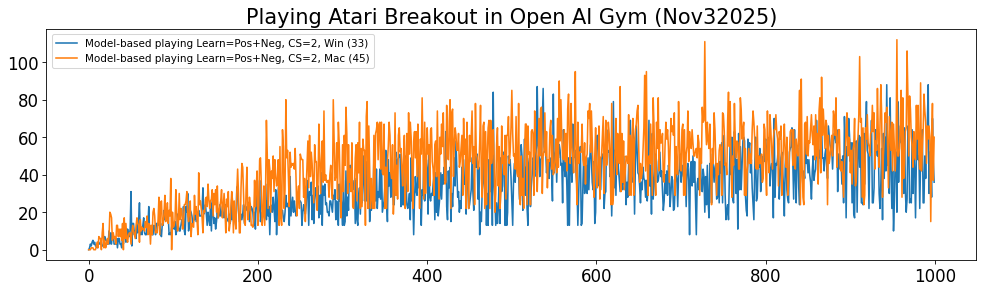

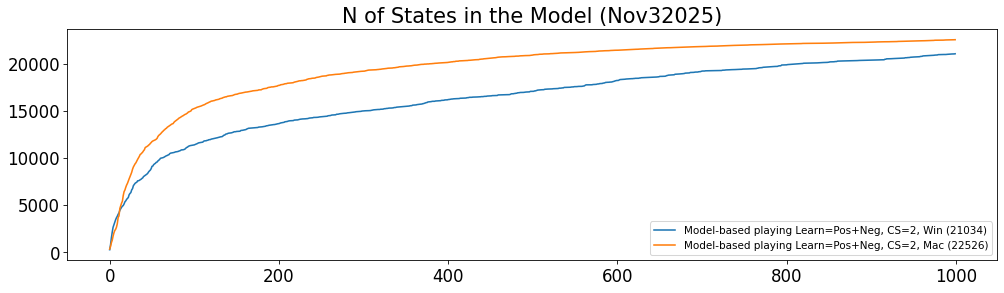

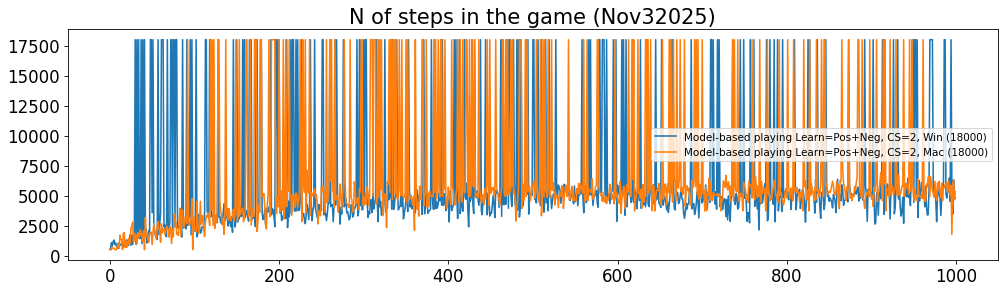

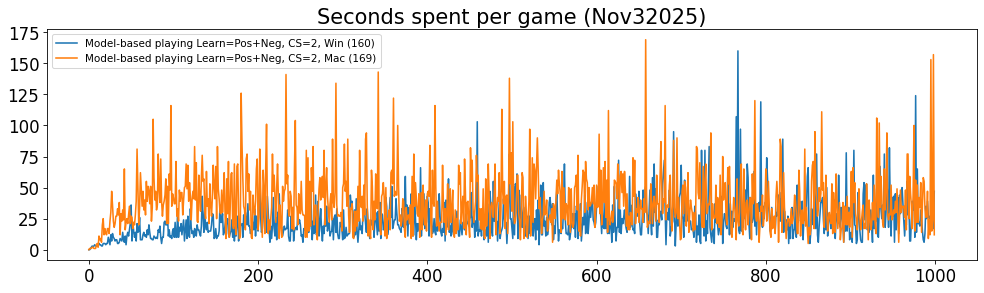

In [37]:
# Pos+Neg CS=2 Win:
score_avg=33.0; steps_avg=6468.3; lives_avg=0.4; lapse_avg="0:00:46.585482"; time="6:38:35.551816"
scoresPNCS2 = [0, 1.0, 3.0, 2.0, 4.0, 5.0, 3.0, 4.0, 2.0, 2.0, 1.0, 4.0, 4.0, 3.0, 3.0, 4.0, 2.0, 2.0, 3.0, 7.0, 5.0, 5.0, 3.0, 3.0, 10.0, 3.0, 9.0, 3.0, 9.0, 8.0, 3.0, 3.0, 3.0, 6.0, 1.0, 6.0, 6.0, 3.0, 3.0, 1.0, 7.0, 3.0, 11.0, 10.0, 4.0, 6.0, 11.0, 8.0, 7.0, 11.0, 31.0, 2.0, 14.0, 14.0, 8.0, 10.0, 6.0, 14.0, 9.0, 16.0, 25.0, 8.0, 10.0, 8.0, 13.0, 17.0, 9.0, 8.0, 8.0, 12.0, 13.0, 23.0, 9.0, 8.0, 10.0, 8.0, 8.0, 13.0, 12.0, 8.0, 14.0, 14.0, 13.0, 14.0, 15.0, 8.0, 7.0, 14.0, 13.0, 21.0, 16.0, 16.0, 17.0, 17.0, 18.0, 8.0, 9.0, 8.0, 12.0, 15.0, 12.0, 11.0, 15.0, 8.0, 10.0, 19.0, 13.0, 10.0, 10.0, 13.0, 16.0, 13.0, 23.0, 10.0, 8.0, 23.0, 20.0, 30.0, 10.0, 13.0, 21.0, 20.0, 18.0, 14.0, 16.0, 16.0, 20.0, 15.0, 20.0, 19.0, 21.0, 18.0, 18.0, 18.0, 22.0, 33.0, 19.0, 21.0, 24.0, 19.0, 13.0, 20.0, 16.0, 13.0, 25.0, 10.0, 26.0, 20.0, 14.0, 17.0, 11.0, 15.0, 20.0, 17.0, 18.0, 24.0, 18.0, 18.0, 23.0, 18.0, 17.0, 23.0, 24.0, 17.0, 16.0, 15.0, 19.0, 14.0, 16.0, 27.0, 16.0, 22.0, 16.0, 16.0, 12.0, 33.0, 34.0, 21.0, 15.0, 15.0, 19.0, 16.0, 19.0, 24.0, 14.0, 23.0, 21.0, 23.0, 21.0, 25.0, 15.0, 19.0, 23.0, 22.0, 20.0, 13.0, 20.0, 11.0, 32.0, 24.0, 18.0, 21.0, 37.0, 15.0, 19.0, 20.0, 19.0, 22.0, 17.0, 26.0, 16.0, 35.0, 18.0, 23.0, 8.0, 24.0, 21.0, 20.0, 28.0, 22.0, 15.0, 32.0, 8.0, 22.0, 32.0, 37.0, 20.0, 21.0, 20.0, 21.0, 17.0, 15.0, 20.0, 29.0, 23.0, 23.0, 25.0, 13.0, 39.0, 18.0, 23.0, 28.0, 20.0, 26.0, 21.0, 18.0, 20.0, 28.0, 27.0, 26.0, 26.0, 25.0, 13.0, 20.0, 24.0, 21.0, 19.0, 24.0, 37.0, 31.0, 13.0, 31.0, 29.0, 36.0, 16.0, 29.0, 14.0, 26.0, 33.0, 31.0, 22.0, 34.0, 17.0, 29.0, 19.0, 41.0, 13.0, 34.0, 29.0, 35.0, 24.0, 25.0, 20.0, 20.0, 18.0, 26.0, 26.0, 23.0, 20.0, 29.0, 27.0, 32.0, 16.0, 26.0, 22.0, 13.0, 35.0, 26.0, 29.0, 23.0, 13.0, 37.0, 13.0, 15.0, 42.0, 18.0, 28.0, 21.0, 43.0, 45.0, 32.0, 38.0, 32.0, 33.0, 37.0, 14.0, 38.0, 16.0, 13.0, 29.0, 33.0, 19.0, 34.0, 25.0, 38.0, 50.0, 26.0, 40.0, 26.0, 47.0, 37.0, 41.0, 15.0, 26.0, 21.0, 26.0, 26.0, 49.0, 40.0, 26.0, 43.0, 22.0, 31.0, 28.0, 43.0, 27.0, 48.0, 20.0, 23.0, 26.0, 34.0, 53.0, 26.0, 15.0, 48.0, 34.0, 41.0, 28.0, 38.0, 35.0, 24.0, 24.0, 48.0, 52.0, 30.0, 48.0, 49.0, 50.0, 51.0, 23.0, 43.0, 24.0, 24.0, 50.0, 50.0, 36.0, 24.0, 22.0, 25.0, 30.0, 16.0, 49.0, 26.0, 28.0, 8.0, 27.0, 39.0, 31.0, 29.0, 47.0, 33.0, 48.0, 28.0, 13.0, 32.0, 29.0, 46.0, 26.0, 39.0, 48.0, 43.0, 19.0, 54.0, 28.0, 26.0, 30.0, 29.0, 35.0, 39.0, 16.0, 41.0, 20.0, 54.0, 18.0, 23.0, 29.0, 41.0, 27.0, 40.0, 35.0, 44.0, 37.0, 63.0, 23.0, 16.0, 42.0, 33.0, 44.0, 15.0, 30.0, 23.0, 35.0, 49.0, 34.0, 58.0, 43.0, 28.0, 31.0, 20.0, 26.0, 22.0, 44.0, 37.0, 48.0, 35.0, 38.0, 19.0, 43.0, 41.0, 22.0, 24.0, 28.0, 32.0, 49.0, 31.0, 21.0, 53.0, 44.0, 44.0, 51.0, 27.0, 44.0, 8.0, 20.0, 15.0, 32.0, 36.0, 53.0, 29.0, 35.0, 13.0, 30.0, 13.0, 48.0, 37.0, 31.0, 53.0, 13.0, 84.0, 35.0, 27.0, 13.0, 25.0, 14.0, 22.0, 38.0, 14.0, 49.0, 31.0, 34.0, 52.0, 51.0, 13.0, 42.0, 13.0, 20.0, 50.0, 45.0, 48.0, 39.0, 26.0, 13.0, 37.0, 46.0, 36.0, 53.0, 42.0, 53.0, 42.0, 27.0, 26.0, 56.0, 50.0, 21.0, 37.0, 59.0, 29.0, 44.0, 22.0, 13.0, 46.0, 49.0, 23.0, 34.0, 40.0, 49.0, 48.0, 39.0, 53.0, 43.0, 87.0, 56.0, 53.0, 39.0, 48.0, 49.0, 67.0, 86.0, 55.0, 52.0, 53.0, 41.0, 48.0, 42.0, 38.0, 49.0, 48.0, 41.0, 26.0, 83.0, 41.0, 49.0, 53.0, 36.0, 53.0, 49.0, 56.0, 53.0, 45.0, 46.0, 25.0, 64.0, 44.0, 39.0, 48.0, 34.0, 13.0, 49.0, 13.0, 48.0, 49.0, 36.0, 67.0, 49.0, 50.0, 53.0, 40.0, 33.0, 13.0, 29.0, 47.0, 55.0, 13.0, 14.0, 35.0, 52.0, 30.0, 35.0, 45.0, 30.0, 49.0, 32.0, 48.0, 56.0, 48.0, 36.0, 32.0, 47.0, 14.0, 20.0, 56.0, 61.0, 52.0, 34.0, 49.0, 32.0, 49.0, 51.0, 48.0, 22.0, 30.0, 31.0, 64.0, 52.0, 52.0, 53.0, 39.0, 41.0, 18.0, 38.0, 79.0, 33.0, 53.0, 29.0, 54.0, 58.0, 43.0, 37.0, 31.0, 48.0, 39.0, 32.0, 50.0, 35.0, 43.0, 24.0, 36.0, 28.0, 45.0, 54.0, 69.0, 39.0, 36.0, 69.0, 47.0, 19.0, 46.0, 66.0, 54.0, 41.0, 40.0, 34.0, 25.0, 36.0, 32.0, 44.0, 38.0, 37.0, 28.0, 37.0, 26.0, 35.0, 69.0, 34.0, 45.0, 19.0, 62.0, 27.0, 34.0, 42.0, 51.0, 47.0, 36.0, 37.0, 41.0, 52.0, 39.0, 42.0, 31.0, 21.0, 26.0, 40.0, 30.0, 42.0, 29.0, 45.0, 43.0, 23.0, 30.0, 39.0, 37.0, 21.0, 22.0, 35.0, 42.0, 38.0, 23.0, 40.0, 43.0, 51.0, 36.0, 41.0, 45.0, 39.0, 52.0, 40.0, 23.0, 43.0, 46.0, 37.0, 8.0, 43.0, 47.0, 34.0, 50.0, 36.0, 47.0, 28.0, 8.0, 35.0, 38.0, 32.0, 47.0, 47.0, 32.0, 31.0, 43.0, 39.0, 20.0, 39.0, 24.0, 45.0, 25.0, 17.0, 46.0, 45.0, 25.0, 51.0, 43.0, 36.0, 44.0, 46.0, 27.0, 28.0, 44.0, 25.0, 47.0, 41.0, 57.0, 25.0, 54.0, 61.0, 30.0, 16.0, 21.0, 24.0, 16.0, 38.0, 59.0, 40.0, 60.0, 27.0, 25.0, 63.0, 55.0, 30.0, 48.0, 11.0, 62.0, 32.0, 55.0, 32.0, 44.0, 58.0, 60.0, 58.0, 29.0, 21.0, 18.0, 59.0, 53.0, 57.0, 41.0, 48.0, 33.0, 25.0, 16.0, 45.0, 60.0, 26.0, 28.0, 44.0, 44.0, 54.0, 31.0, 37.0, 46.0, 50.0, 47.0, 57.0, 59.0, 52.0, 49.0, 48.0, 60.0, 34.0, 42.0, 46.0, 45.0, 17.0, 70.0, 28.0, 46.0, 45.0, 49.0, 57.0, 27.0, 39.0, 49.0, 52.0, 42.0, 34.0, 18.0, 45.0, 52.0, 32.0, 27.0, 25.0, 52.0, 54.0, 55.0, 65.0, 46.0, 27.0, 64.0, 39.0, 25.0, 54.0, 54.0, 33.0, 24.0, 57.0, 46.0, 40.0, 34.0, 42.0, 38.0, 66.0, 46.0, 48.0, 41.0, 48.0, 40.0, 36.0, 27.0, 42.0, 50.0, 37.0, 41.0, 43.0, 69.0, 52.0, 40.0, 53.0, 49.0, 60.0, 66.0, 49.0, 49.0, 42.0, 51.0, 54.0, 45.0, 38.0, 66.0, 61.0, 56.0, 54.0, 54.0, 43.0, 56.0, 62.0, 61.0, 57.0, 64.0, 31.0, 51.0, 51.0, 43.0, 48.0, 35.0, 50.0, 25.0, 71.0, 56.0, 17.0, 55.0, 52.0, 70.0, 61.0, 47.0, 57.0, 25.0, 57.0, 19.0, 17.0, 54.0, 58.0, 20.0, 53.0, 61.0, 44.0, 60.0, 25.0, 25.0, 24.0, 62.0, 35.0, 65.0, 79.0, 53.0, 51.0, 22.0, 53.0, 52.0, 69.0, 25.0, 25.0, 33.0, 62.0, 64.0, 53.0, 50.0, 56.0, 30.0, 22.0, 35.0, 54.0, 16.0, 62.0, 38.0, 60.0, 42.0, 88.0, 45.0, 51.0, 30.0, 81.0, 45.0, 22.0, 42.0, 10.0, 25.0, 50.0, 52.0, 20.0, 79.0, 36.0, 57.0, 66.0, 57.0, 67.0, 58.0, 30.0, 65.0, 31.0, 20.0, 27.0, 66.0, 59.0, 25.0, 27.0, 25.0, 64.0, 30.0, 56.0, 44.0, 17.0, 48.0, 64.0, 48.0, 50.0, 22.0, 48.0, 60.0, 64.0, 25.0, 25.0, 50.0, 38.0, 53.0, 68.0, 88.0, 30.0, 52.0, 44.0, 28.0, 70.0, 47.0, 36.0]
statesPNCS2 = [248, 770, 1502, 2113, 2626, 2905, 3148, 3426, 3641, 3800, 4007, 4158, 4427, 4592, 4748, 4860, 4937, 5103, 5328, 5428, 5588, 5685, 5788, 6084, 6216, 6308, 6596, 6726, 7040, 7172, 7289, 7359, 7407, 7555, 7565, 7600, 7667, 7718, 7801, 7865, 8007, 8073, 8125, 8214, 8268, 8360, 8505, 8608, 8693, 8844, 9095, 9124, 9277, 9353, 9410, 9517, 9548, 9666, 9748, 9819, 9947, 9970, 9985, 10013, 10054, 10111, 10163, 10216, 10244, 10298, 10330, 10443, 10493, 10511, 10526, 10550, 10561, 10598, 10631, 10637, 10657, 10675, 10719, 10740, 10799, 10841, 10841, 10855, 10882, 10928, 11022, 11096, 11130, 11218, 11254, 11288, 11302, 11315, 11328, 11351, 11369, 11414, 11450, 11483, 11534, 11580, 11592, 11615, 11630, 11649, 11660, 11755, 11792, 11799, 11807, 11848, 11858, 11911, 11922, 11934, 11982, 12005, 12019, 12038, 12058, 12069, 12102, 12122, 12149, 12167, 12192, 12221, 12231, 12250, 12329, 12399, 12410, 12502, 12524, 12550, 12600, 12610, 12622, 12638, 12650, 12677, 12712, 12759, 12763, 12768, 12794, 12796, 12805, 12811, 12822, 12897, 12905, 12917, 12939, 12961, 12977, 12994, 13052, 13088, 13129, 13137, 13142, 13142, 13150, 13167, 13168, 13188, 13196, 13199, 13202, 13214, 13253, 13260, 13268, 13277, 13285, 13302, 13311, 13333, 13345, 13387, 13401, 13413, 13444, 13458, 13467, 13483, 13498, 13507, 13524, 13528, 13550, 13560, 13585, 13617, 13623, 13658, 13696, 13714, 13729, 13743, 13761, 13816, 13831, 13848, 13855, 13897, 13916, 13927, 13928, 13940, 13941, 13947, 13996, 14006, 14009, 14016, 14018, 14043, 14065, 14090, 14102, 14108, 14121, 14123, 14127, 14133, 14146, 14153, 14159, 14185, 14214, 14221, 14226, 14232, 14247, 14279, 14279, 14280, 14286, 14293, 14299, 14319, 14335, 14343, 14351, 14369, 14372, 14373, 14375, 14387, 14389, 14412, 14457, 14463, 14469, 14484, 14523, 14540, 14541, 14554, 14556, 14559, 14615, 14616, 14625, 14650, 14670, 14682, 14705, 14712, 14715, 14720, 14721, 14730, 14743, 14768, 14772, 14783, 14794, 14801, 14814, 14826, 14836, 14854, 14862, 14886, 14893, 14910, 14915, 14917, 14919, 14928, 14956, 14965, 14966, 14980, 14987, 14988, 14993, 14999, 15000, 15005, 15010, 15031, 15047, 15074, 15087, 15091, 15106, 15108, 15119, 15124, 15124, 15126, 15149, 15157, 15161, 15162, 15194, 15211, 15212, 15235, 15236, 15258, 15270, 15271, 15272, 15278, 15290, 15296, 15327, 15333, 15339, 15369, 15377, 15382, 15395, 15399, 15418, 15422, 15434, 15435, 15446, 15448, 15460, 15469, 15484, 15485, 15490, 15519, 15530, 15533, 15583, 15588, 15595, 15599, 15608, 15638, 15646, 15662, 15679, 15685, 15698, 15704, 15742, 15750, 15789, 15814, 15854, 15860, 15921, 15932, 15938, 15953, 15960, 15988, 15991, 15993, 15995, 16024, 16029, 16032, 16037, 16041, 16050, 16058, 16088, 16091, 16100, 16104, 16138, 16140, 16142, 16149, 16178, 16183, 16203, 16221, 16231, 16234, 16251, 16254, 16263, 16273, 16273, 16277, 16281, 16284, 16313, 16318, 16326, 16328, 16331, 16332, 16337, 16339, 16369, 16378, 16386, 16414, 16416, 16417, 16418, 16435, 16436, 16436, 16437, 16441, 16450, 16459, 16465, 16467, 16469, 16487, 16488, 16488, 16506, 16517, 16518, 16520, 16547, 16551, 16551, 16553, 16564, 16571, 16593, 16594, 16599, 16599, 16600, 16607, 16610, 16665, 16669, 16675, 16678, 16680, 16680, 16685, 16688, 16692, 16694, 16694, 16695, 16699, 16700, 16714, 16762, 16790, 16791, 16791, 16819, 16823, 16847, 16850, 16892, 16893, 16905, 16927, 16927, 16929, 16931, 16936, 16951, 16973, 16975, 16982, 16982, 16986, 16993, 17043, 17046, 17052, 17052, 17052, 17093, 17096, 17123, 17156, 17186, 17187, 17201, 17208, 17208, 17219, 17220, 17226, 17265, 17274, 17276, 17281, 17292, 17293, 17298, 17299, 17306, 17308, 17325, 17328, 17331, 17337, 17337, 17348, 17350, 17385, 17385, 17388, 17407, 17415, 17415, 17463, 17466, 17467, 17470, 17477, 17479, 17480, 17484, 17504, 17512, 17514, 17520, 17545, 17545, 17546, 17551, 17565, 17572, 17572, 17575, 17577, 17580, 17596, 17605, 17632, 17703, 17736, 17739, 17741, 17741, 17741, 17741, 17742, 17745, 17771, 17774, 17777, 17788, 17792, 17821, 17835, 17835, 17871, 17873, 17884, 17884, 17921, 17928, 17953, 17993, 18002, 18002, 18012, 18013, 18030, 18031, 18038, 18067, 18089, 18112, 18150, 18174, 18198, 18202, 18206, 18256, 18296, 18305, 18320, 18322, 18323, 18325, 18335, 18353, 18357, 18360, 18363, 18372, 18384, 18392, 18394, 18394, 18409, 18412, 18429, 18430, 18430, 18434, 18435, 18461, 18464, 18489, 18494, 18496, 18502, 18507, 18518, 18523, 18524, 18527, 18529, 18534, 18540, 18540, 18550, 18554, 18556, 18558, 18558, 18566, 18576, 18582, 18594, 18633, 18638, 18638, 18639, 18641, 18648, 18650, 18665, 18715, 18728, 18764, 18769, 18776, 18781, 18784, 18784, 18805, 18807, 18860, 18868, 18874, 18881, 18885, 18890, 18895, 18905, 18915, 18920, 18933, 18942, 18979, 18983, 18983, 18993, 18999, 19002, 19048, 19052, 19055, 19060, 19061, 19082, 19092, 19092, 19098, 19098, 19127, 19132, 19140, 19165, 19199, 19201, 19205, 19206, 19225, 19228, 19236, 19240, 19242, 19244, 19244, 19244, 19245, 19247, 19247, 19247, 19249, 19253, 19254, 19256, 19258, 19259, 19260, 19260, 19289, 19293, 19298, 19302, 19320, 19322, 19328, 19330, 19334, 19342, 19344, 19348, 19349, 19351, 19355, 19359, 19365, 19369, 19372, 19378, 19381, 19385, 19388, 19390, 19410, 19410, 19411, 19413, 19420, 19421, 19424, 19431, 19435, 19438, 19442, 19444, 19451, 19452, 19454, 19461, 19465, 19500, 19503, 19541, 19546, 19549, 19566, 19568, 19599, 19606, 19621, 19625, 19628, 19635, 19649, 19651, 19653, 19654, 19661, 19674, 19680, 19684, 19688, 19692, 19696, 19697, 19734, 19755, 19760, 19762, 19840, 19843, 19846, 19848, 19850, 19854, 19861, 19886, 19897, 19899, 19906, 19906, 19912, 19916, 19939, 19946, 19952, 19955, 19964, 19971, 19983, 19986, 19993, 19995, 20002, 20006, 20031, 20034, 20037, 20039, 20041, 20043, 20044, 20044, 20046, 20047, 20050, 20057, 20058, 20060, 20060, 20065, 20067, 20074, 20084, 20086, 20095, 20097, 20099, 20105, 20106, 20109, 20109, 20115, 20121, 20134, 20146, 20174, 20175, 20177, 20178, 20184, 20187, 20206, 20209, 20213, 20254, 20255, 20256, 20257, 20259, 20263, 20271, 20273, 20274, 20275, 20283, 20283, 20286, 20286, 20287, 20292, 20294, 20295, 20296, 20299, 20301, 20303, 20308, 20311, 20319, 20320, 20327, 20329, 20332, 20335, 20340, 20342, 20344, 20346, 20349, 20355, 20356, 20358, 20360, 20361, 20362, 20364, 20364, 20364, 20371, 20375, 20378, 20378, 20379, 20383, 20391, 20391, 20391, 20391, 20391, 20399, 20450, 20456, 20496, 20501, 20502, 20504, 20506, 20507, 20513, 20522, 20523, 20529, 20533, 20540, 20546, 20551, 20551, 20556, 20559, 20564, 20568, 20568, 20574, 20580, 20612, 20613, 20614, 20631, 20636, 20638, 20661, 20670, 20670, 20689, 20689, 20694, 20694, 20695, 20714, 20716, 20721, 20722, 20750, 20754, 20767, 20806, 20811, 20817, 20824, 20826, 20830, 20833, 20838, 20846, 20848, 20848, 20851, 20869, 20876, 20892, 20892, 20902, 20907, 20941, 20945, 20949, 20953, 20957, 20958, 20958, 20958, 20958, 20958, 20973, 20977, 20985, 21000, 21003, 21010, 21010, 21013, 21018, 21019, 21034]
stepssPNCS2 = [510, 618, 1087, 790, 1179, 1295, 918, 1035, 723, 724, 602, 1043, 963, 860, 916, 1172, 731, 798, 919, 988, 1291, 1245, 848, 994, 1714, 858, 1726, 924, 1770, 1724, 18000, 918, 18000, 1447, 18000, 1427, 1423, 18000, 990, 18000, 1316, 18000, 1683, 2204, 1039, 1447, 2088, 1762, 18000, 18000, 3569, 18000, 2362, 2095, 1639, 1936, 1332, 18000, 1746, 2599, 3555, 18000, 18000, 18000, 2393, 2560, 1747, 1562, 18000, 2263, 2318, 2800, 18000, 18000, 1886, 18000, 18000, 2389, 18000, 18000, 2303, 2334, 2394, 2299, 2515, 1548, 18000, 2294, 2384, 2855, 2219, 18000, 2508, 3087, 3299, 18000, 1732, 18000, 2215, 2790, 2215, 2011, 18000, 1547, 1848, 3419, 2395, 1874, 1958, 2395, 2343, 2514, 3578, 18000, 18000, 3696, 3424, 3651, 18000, 18000, 3243, 3402, 3166, 2607, 2913, 2757, 3402, 2745, 18000, 3207, 3240, 2739, 3135, 2591, 3623, 4307, 2919, 3232, 3972, 2950, 2457, 3043, 3032, 2399, 3241, 1942, 18000, 3355, 2378, 2998, 18000, 2790, 2982, 3113, 3308, 4018, 3267, 18000, 3579, 18000, 3174, 3503, 3767, 3232, 2870, 18000, 3377, 18000, 3006, 3510, 3116, 3368, 2414, 18000, 18000, 4310, 3739, 3634, 18000, 18000, 3533, 3002, 3141, 3779, 2658, 3927, 3598, 4033, 3639, 3755, 18000, 3393, 3886, 3836, 3206, 2400, 18000, 18000, 4493, 18000, 18000, 3556, 4147, 2921, 3122, 3374, 3351, 3765, 3094, 18000, 2330, 4533, 3233, 3718, 18000, 3581, 18000, 18000, 3758, 3701, 18000, 3722, 18000, 3780, 3781, 4582, 18000, 3507, 3282, 3519, 2966, 2658, 3386, 4283, 3892, 3005, 4018, 18000, 4383, 2906, 3839, 4078, 18000, 3889, 3589, 3172, 3561, 4253, 3682, 4196, 3764, 18000, 18000, 3386, 3961, 3466, 2919, 3488, 4373, 4335, 18000, 4080, 4239, 4262, 2824, 4194, 18000, 4200, 18000, 4558, 3635, 4580, 2625, 3996, 3476, 4690, 18000, 4054, 4287, 4732, 3562, 3656, 3280, 2980, 3228, 4228, 4196, 3208, 3354, 3999, 3970, 4260, 18000, 3311, 3638, 18000, 4158, 18000, 3809, 3837, 18000, 4512, 18000, 18000, 4829, 3170, 3666, 3474, 4460, 4671, 3582, 5185, 3882, 4403, 4688, 18000, 4623, 2828, 18000, 4060, 4501, 3370, 3965, 3776, 4435, 18000, 3600, 4535, 3944, 5919, 4656, 4813, 18000, 3874, 18000, 3845, 3907, 4848, 5255, 18000, 5113, 3802, 4058, 4072, 5239, 4111, 4973, 3059, 3576, 3951, 4718, 5609, 3665, 18000, 5571, 4045, 4989, 3899, 4746, 4412, 3923, 3556, 5559, 5460, 3903, 4930, 5123, 5342, 5444, 3432, 5007, 18000, 3486, 5130, 5593, 4241, 3523, 3695, 3763, 3876, 18000, 5023, 3911, 3854, 18000, 3911, 4495, 3960, 4293, 5216, 4557, 18000, 4202, 18000, 4176, 4385, 5161, 3745, 4256, 4926, 4486, 2816, 5388, 4565, 3745, 4028, 4231, 18000, 4258, 18000, 4998, 3091, 5682, 18000, 3500, 4288, 4833, 3690, 5207, 18000, 4851, 4692, 6041, 3895, 2400, 4871, 4530, 4844, 18000, 4323, 3505, 18000, 5030, 4821, 5412, 4722, 4184, 4683, 18000, 3745, 3402, 4584, 4890, 5087, 18000, 4918, 3402, 5202, 4833, 3293, 3556, 3531, 4211, 5030, 4240, 3160, 5419, 5231, 5231, 5100, 4006, 5231, 18000, 3270, 18000, 4259, 4236, 5427, 4280, 18000, 18000, 3942, 18000, 18000, 4931, 4098, 5427, 18000, 5918, 4307, 3944, 18000, 3790, 18000, 3213, 4136, 18000, 5030, 4155, 4714, 5572, 5371, 18000, 5114, 18000, 3453, 5044, 5255, 5087, 5011, 18000, 18000, 4674, 4813, 4387, 5543, 18000, 5419, 4878, 4154, 18000, 5621, 5322, 3616, 4720, 18000, 4396, 4846, 3738, 18000, 5133, 5030, 3918, 4500, 5123, 5030, 5079, 18000, 5431, 4970, 5876, 5704, 5419, 4364, 5303, 5030, 5034, 5946, 5463, 5641, 5419, 5352, 5086, 4984, 4587, 5270, 4918, 4822, 4322, 5802, 4491, 5037, 5144, 4147, 5144, 5030, 5742, 5149, 18000, 4875, 3566, 5892, 5202, 4405, 4918, 4726, 18000, 5030, 18000, 5079, 5037, 4171, 5034, 5134, 5005, 5419, 4362, 4026, 18000, 18000, 5422, 5235, 18000, 18000, 18000, 5471, 4456, 18000, 5002, 4646, 5130, 4326, 5211, 5308, 5433, 18000, 4526, 4918, 18000, 2850, 5862, 5178, 5443, 4319, 5590, 18000, 5030, 18000, 5079, 3350, 18000, 4060, 5409, 5586, 5086, 5134, 4420, 4662, 18000, 4436, 5618, 4180, 5302, 3908, 5705, 5635, 4575, 18000, 3935, 5210, 4323, 4229, 4876, 4071, 4920, 18000, 4345, 4086, 5029, 5474, 5885, 4648, 4341, 5877, 4940, 18000, 4635, 5568, 5242, 4328, 4369, 4007, 18000, 4341, 4200, 4958, 4797, 4409, 3806, 4451, 3603, 4219, 5106, 18000, 5215, 18000, 6187, 3930, 3796, 5586, 5225, 5240, 4332, 4452, 5043, 5575, 4734, 4695, 3557, 3099, 3638, 4351, 3863, 4316, 4341, 5532, 5012, 18000, 3879, 4259, 4342, 3423, 3727, 4353, 5320, 4549, 3128, 4775, 5394, 5725, 4386, 5251, 4562, 4678, 5893, 4871, 3896, 5315, 5400, 4436, 18000, 18000, 4913, 18000, 5384, 4295, 5327, 3874, 18000, 4918, 18000, 4091, 4906, 4906, 3834, 4376, 4747, 4672, 3246, 4678, 2979, 4967, 3730, 2854, 4709, 5083, 18000, 4918, 4841, 4257, 5161, 4909, 3872, 4011, 5034, 18000, 5004, 4940, 5251, 18000, 4779, 5309, 4371, 2846, 3587, 3353, 2734, 18000, 5206, 4842, 5475, 18000, 4095, 5685, 5089, 3903, 4911, 2149, 5465, 4319, 5834, 4391, 4773, 5535, 5983, 5142, 18000, 2901, 3079, 5772, 18000, 5192, 4848, 4990, 4269, 18000, 2820, 4867, 5502, 18000, 3726, 4850, 4890, 5582, 3666, 18000, 4807, 5182, 5380, 5202, 5002, 5317, 4652, 4884, 5390, 3844, 5062, 4788, 5235, 18000, 6105, 3830, 4947, 5269, 5298, 5530, 3919, 4556, 4847, 5538, 5060, 4194, 2786, 4661, 5268, 18000, 3834, 18000, 5107, 5790, 5290, 5307, 5114, 3538, 6343, 4446, 18000, 5223, 5471, 3958, 3112, 5283, 5107, 4866, 3842, 4354, 18000, 5783, 4918, 5127, 4529, 4814, 4649, 4458, 3977, 5082, 4886, 4550, 3582, 4850, 6361, 4985, 4819, 5052, 4570, 5897, 5499, 4187, 4574, 4649, 5316, 4988, 4470, 18000, 5889, 5275, 5131, 4984, 4977, 4956, 5201, 5481, 5120, 5525, 5709, 4542, 5504, 4774, 5423, 4978, 4622, 5173, 18000, 5779, 5123, 2856, 5520, 5402, 5580, 5256, 4868, 5139, 18000, 4999, 2622, 2748, 5087, 5320, 3368, 5123, 6004, 4734, 5881, 18000, 18000, 3428, 5842, 4103, 5507, 5968, 5024, 5317, 3043, 5488, 5421, 5415, 18000, 3478, 4082, 5817, 5939, 18000, 4711, 5566, 3958, 3291, 3681, 4861, 2698, 5914, 4940, 6014, 4886, 6451, 4837, 5248, 4160, 6685, 18000, 18000, 4428, 18000, 18000, 5068, 18000, 3174, 6259, 4558, 5332, 6100, 5358, 5800, 5108, 4063, 5778, 4092, 3376, 3410, 5581, 18000, 18000, 18000, 18000, 5575, 4959, 5238, 4520, 2821, 4910, 6045, 5067, 4809, 3349, 4917, 5291, 5568, 18000, 18000, 5136, 4791, 5264, 5335, 6452, 4507, 18000, 5110, 3452, 6312, 4912, 4806]
lapsesPNCS2 = [0, 0, 1, 2, 3, 2, 3, 4, 3, 3, 3, 3, 5, 4, 4, 3, 3, 5, 5, 5, 4, 5, 5, 10, 7, 4, 12, 7, 13, 10, 9, 7, 8, 8, 5, 5, 6, 9, 8, 7, 14, 8, 6, 11, 4, 11, 14, 11, 16, 21, 36, 7, 22, 15, 10, 14, 7, 21, 14, 15, 26, 8, 8, 8, 12, 14, 11, 12, 10, 16, 12, 20, 14, 9, 9, 8, 8, 11, 10, 9, 10, 9, 16, 14, 19, 10, 5, 10, 10, 22, 23, 20, 20, 28, 11, 16, 10, 11, 9, 15, 17, 10, 22, 10, 10, 33, 10, 18, 15, 21, 12, 18, 24, 7, 16, 24, 9, 27, 12, 10, 33, 18, 13, 15, 10, 17, 16, 11, 20, 16, 16, 13, 11, 19, 43, 27, 14, 32, 19, 16, 22, 14, 15, 15, 15, 20, 29, 28, 9, 10, 17, 9, 11, 11, 15, 36, 22, 22, 29, 12, 14, 20, 24, 21, 25, 13, 10, 13, 15, 24, 10, 26, 7, 18, 11, 23, 27, 7, 17, 19, 20, 21, 10, 28, 18, 30, 24, 20, 37, 19, 19, 13, 16, 15, 22, 16, 33, 11, 27, 19, 15, 32, 54, 27, 14, 17, 26, 41, 24, 18, 14, 43, 30, 16, 6, 19, 9, 19, 42, 17, 11, 26, 8, 30, 28, 45, 25, 18, 18, 11, 15, 19, 16, 17, 17, 32, 11, 7, 7, 27, 15, 34, 7, 15, 17, 18, 16, 31, 21, 24, 20, 11, 12, 6, 17, 16, 20, 16, 52, 14, 14, 17, 47, 31, 8, 23, 13, 14, 44, 12, 24, 39, 11, 21, 33, 16, 7, 19, 13, 28, 19, 35, 15, 20, 22, 11, 14, 15, 25, 8, 26, 28, 14, 33, 13, 9, 9, 22, 21, 17, 8, 32, 9, 10, 18, 11, 12, 13, 13, 44, 35, 39, 28, 10, 32, 12, 41, 15, 6, 16, 25, 16, 19, 13, 31, 38, 29, 21, 14, 33, 22, 15, 9, 24, 20, 21, 36, 10, 23, 30, 21, 12, 31, 15, 38, 9, 29, 28, 16, 17, 29, 42, 35, 12, 17, 29, 42, 26, 51, 17, 20, 24, 24, 41, 29, 20, 20, 17, 16, 14, 33, 19, 18, 33, 59, 20, 36, 11, 34, 21, 25, 45, 19, 11, 12, 42, 25, 8, 21, 15, 21, 17, 66, 11, 34, 20, 45, 17, 23, 22, 43, 38, 11, 33, 28, 25, 13, 15, 25, 14, 12, 37, 15, 21, 45, 28, 14, 11, 17, 14, 38, 7, 40, 18, 25, 57, 14, 19, 11, 34, 15, 12, 16, 20, 20, 31, 19, 11, 11, 24, 18, 12, 22, 22, 16, 18, 29, 21, 22, 19, 25, 26, 46, 18, 24, 28, 10, 23, 15, 103, 11, 16, 15, 22, 11, 30, 34, 8, 16, 14, 11, 37, 6, 27, 47, 36, 16, 11, 55, 23, 39, 13, 23, 7, 23, 39, 9, 14, 16, 19, 41, 26, 19, 22, 5, 20, 41, 77, 25, 25, 17, 9, 51, 12, 53, 49, 61, 9, 48, 26, 19, 44, 18, 27, 34, 26, 11, 15, 27, 9, 27, 13, 28, 22, 35, 11, 21, 25, 8, 32, 16, 40, 4, 21, 52, 12, 12, 54, 19, 23, 11, 26, 12, 17, 38, 42, 33, 20, 37, 8, 19, 13, 37, 48, 23, 7, 16, 15, 13, 18, 17, 37, 69, 24, 13, 13, 12, 20, 8, 12, 18, 27, 29, 17, 29, 10, 35, 34, 9, 27, 24, 37, 7, 17, 26, 20, 44, 13, 16, 38, 13, 23, 35, 26, 36, 41, 24, 22, 18, 22, 35, 39, 51, 37, 38, 26, 13, 41, 18, 17, 39, 17, 32, 13, 29, 13, 24, 21, 6, 36, 14, 51, 21, 7, 18, 18, 72, 14, 32, 13, 25, 21, 26, 32, 21, 17, 14, 21, 21, 59, 18, 21, 36, 16, 17, 13, 45, 38, 27, 29, 47, 21, 12, 12, 27, 48, 22, 47, 51, 30, 28, 13, 31, 48, 24, 12, 58, 19, 69, 30, 49, 10, 10, 24, 20, 31, 30, 24, 53, 62, 72, 32, 4, 28, 30, 24, 48, 11, 16, 20, 23, 95, 31, 3, 21, 34, 19, 20, 43, 46, 68, 26, 26, 10, 56, 23, 41, 28, 23, 26, 22, 23, 16, 17, 16, 10, 35, 29, 6, 19, 12, 28, 7, 5, 80, 28, 23, 11, 80, 7, 23, 13, 46, 83, 18, 12, 6, 17, 14, 5, 37, 22, 40, 20, 12, 16, 20, 30, 43, 5, 21, 29, 28, 19, 17, 59, 32, 12, 37, 13, 31, 18, 25, 23, 25, 107, 25, 160, 16, 13, 97, 15, 28, 18, 43, 25, 48, 31, 69, 58, 22, 9, 42, 24, 22, 25, 63, 19, 37, 12, 34, 28, 38, 31, 119, 23, 18, 35, 25, 38, 37, 74, 57, 37, 29, 15, 24, 34, 25, 21, 22, 14, 30, 27, 35, 44, 41, 23, 46, 22, 89, 14, 31, 21, 24, 16, 27, 5, 24, 9, 30, 34, 9, 15, 17, 38, 10, 52, 22, 35, 39, 23, 27, 39, 8, 27, 24, 24, 33, 59, 66, 16, 5, 13, 33, 25, 20, 53, 36, 17, 77, 12, 6, 19, 29, 39, 38, 42, 24, 13, 38, 16, 50, 11, 20, 27, 27, 17, 21, 38, 15, 40, 9, 26, 29, 21, 60, 28, 18, 34, 26, 21, 6, 19, 15, 78, 15, 28, 34, 8, 13, 14, 6, 29, 80, 20, 19, 5, 8, 46, 27, 16, 8, 6, 6, 45, 54, 24, 51, 53, 16, 22, 14, 21, 32, 22, 6, 60, 17, 33, 23, 49, 12, 10, 36, 67, 33, 25, 36, 22, 77, 18, 30, 54, 43, 18, 82, 34, 11, 42, 27, 43, 6, 45, 16, 32, 42, 13, 44, 29, 43, 50, 36, 23, 11, 24, 20, 55, 28, 38, 7, 7, 25, 39, 32, 44, 10, 124, 14, 65, 21, 22, 19, 32, 26, 15, 8, 6, 13, 35, 25, 39, 26, 27, 15, 19, 41, 20, 17, 47]

# Pos+Neg CS=2 Mac:
scoresPNCS2_ = [0, 0, 0, 1.0, 1.0, 1.0, 0, 0, 0, 2.0, 4.0, 1.0, 7.0, 6.0, 6.0, 0, 9.0, 14.0, 1.0, 5.0, 1.0, 3.0, 6.0, 3.0, 7.0, 20.0, 19.0, 17.0, 5.0, 9.0, 6.0, 7.0, 3.0, 13.0, 13.0, 7.0, 11.0, 7.0, 11.0, 5.0, 14.0, 0, 17.0, 6.0, 14.0, 6.0, 4.0, 8.0, 9.0, 9.0, 3.0, 9.0, 13.0, 10.0, 8.0, 6.0, 13.0, 17.0, 14.0, 13.0, 4.0, 16.0, 10.0, 12.0, 11.0, 11.0, 10.0, 15.0, 12.0, 18.0, 8.0, 14.0, 13.0, 3.0, 13.0, 8.0, 20.0, 22.0, 18.0, 9.0, 10.0, 9.0, 16.0, 28.0, 8.0, 25.0, 26.0, 13.0, 14.0, 19.0, 29.0, 15.0, 19.0, 25.0, 14.0, 21.0, 18.0, 38.0, 0, 20.0, 12.0, 13.0, 16.0, 32.0, 20.0, 10.0, 14.0, 30.0, 16.0, 22.0, 21.0, 11.0, 14.0, 24.0, 24.0, 26.0, 31.0, 19.0, 15.0, 21.0, 26.0, 7.0, 14.0, 13.0, 12.0, 29.0, 19.0, 23.0, 16.0, 8.0, 41.0, 24.0, 26.0, 22.0, 17.0, 9.0, 21.0, 20.0, 27.0, 28.0, 23.0, 35.0, 27.0, 22.0, 26.0, 27.0, 32.0, 18.0, 30.0, 24.0, 32.0, 20.0, 34.0, 17.0, 20.0, 23.0, 26.0, 32.0, 17.0, 23.0, 30.0, 22.0, 9.0, 27.0, 23.0, 31.0, 10.0, 14.0, 22.0, 31.0, 26.0, 9.0, 26.0, 16.0, 11.0, 31.0, 43.0, 30.0, 9.0, 9.0, 33.0, 46.0, 44.0, 30.0, 15.0, 13.0, 32.0, 44.0, 16.0, 21.0, 28.0, 24.0, 13.0, 13.0, 12.0, 16.0, 37.0, 23.0, 34.0, 42.0, 13.0, 24.0, 48.0, 49.0, 35.0, 13.0, 18.0, 34.0, 13.0, 32.0, 69.0, 51.0, 22.0, 48.0, 43.0, 20.0, 42.0, 38.0, 50.0, 31.0, 48.0, 40.0, 34.0, 36.0, 48.0, 13.0, 55.0, 17.0, 13.0, 64.0, 55.0, 22.0, 32.0, 80.0, 49.0, 53.0, 39.0, 23.0, 52.0, 44.0, 46.0, 45.0, 46.0, 43.0, 54.0, 38.0, 18.0, 30.0, 34.0, 22.0, 51.0, 49.0, 48.0, 48.0, 28.0, 38.0, 15.0, 33.0, 46.0, 58.0, 33.0, 61.0, 39.0, 52.0, 46.0, 35.0, 25.0, 56.0, 47.0, 47.0, 21.0, 36.0, 67.0, 47.0, 30.0, 48.0, 58.0, 36.0, 74.0, 37.0, 40.0, 36.0, 36.0, 37.0, 28.0, 40.0, 45.0, 33.0, 27.0, 80.0, 57.0, 37.0, 39.0, 57.0, 27.0, 68.0, 57.0, 37.0, 17.0, 31.0, 56.0, 31.0, 61.0, 45.0, 76.0, 62.0, 30.0, 56.0, 36.0, 43.0, 31.0, 57.0, 23.0, 22.0, 32.0, 49.0, 56.0, 26.0, 57.0, 41.0, 68.0, 22.0, 54.0, 23.0, 59.0, 53.0, 53.0, 13.0, 71.0, 79.0, 22.0, 66.0, 43.0, 22.0, 38.0, 28.0, 22.0, 61.0, 22.0, 62.0, 64.0, 68.0, 48.0, 67.0, 68.0, 43.0, 68.0, 41.0, 40.0, 67.0, 22.0, 44.0, 22.0, 47.0, 55.0, 68.0, 61.0, 41.0, 38.0, 56.0, 19.0, 32.0, 73.0, 29.0, 45.0, 27.0, 61.0, 65.0, 52.0, 54.0, 43.0, 34.0, 51.0, 61.0, 22.0, 45.0, 62.0, 31.0, 73.0, 51.0, 68.0, 60.0, 45.0, 22.0, 58.0, 63.0, 49.0, 63.0, 39.0, 67.0, 49.0, 22.0, 59.0, 51.0, 81.0, 54.0, 27.0, 68.0, 30.0, 45.0, 65.0, 51.0, 56.0, 34.0, 64.0, 65.0, 47.0, 43.0, 29.0, 56.0, 58.0, 39.0, 74.0, 44.0, 27.0, 60.0, 51.0, 67.0, 55.0, 73.0, 49.0, 35.0, 36.0, 77.0, 51.0, 48.0, 68.0, 80.0, 22.0, 73.0, 75.0, 39.0, 56.0, 65.0, 61.0, 53.0, 53.0, 62.0, 44.0, 47.0, 54.0, 61.0, 29.0, 70.0, 51.0, 59.0, 22.0, 68.0, 43.0, 22.0, 61.0, 47.0, 61.0, 74.0, 46.0, 55.0, 24.0, 78.0, 51.0, 49.0, 43.0, 44.0, 57.0, 77.0, 38.0, 28.0, 66.0, 68.0, 22.0, 63.0, 24.0, 51.0, 65.0, 69.0, 22.0, 69.0, 46.0, 51.0, 64.0, 48.0, 20.0, 30.0, 56.0, 65.0, 34.0, 55.0, 22.0, 30.0, 66.0, 46.0, 50.0, 40.0, 61.0, 27.0, 61.0, 61.0, 71.0, 46.0, 52.0, 65.0, 85.0, 62.0, 50.0, 51.0, 43.0, 71.0, 41.0, 39.0, 78.0, 30.0, 24.0, 50.0, 29.0, 38.0, 22.0, 51.0, 67.0, 67.0, 24.0, 66.0, 51.0, 52.0, 24.0, 63.0, 64.0, 62.0, 29.0, 74.0, 54.0, 50.0, 31.0, 47.0, 70.0, 50.0, 75.0, 76.0, 30.0, 50.0, 53.0, 73.0, 50.0, 63.0, 33.0, 48.0, 47.0, 64.0, 69.0, 43.0, 61.0, 40.0, 42.0, 48.0, 59.0, 41.0, 70.0, 44.0, 90.0, 58.0, 80.0, 60.0, 49.0, 48.0, 64.0, 47.0, 62.0, 42.0, 75.0, 83.0, 57.0, 46.0, 78.0, 55.0, 50.0, 41.0, 58.0, 95.0, 44.0, 24.0, 68.0, 46.0, 52.0, 52.0, 52.0, 67.0, 48.0, 45.0, 57.0, 35.0, 49.0, 51.0, 74.0, 70.0, 78.0, 52.0, 74.0, 57.0, 42.0, 28.0, 50.0, 65.0, 42.0, 33.0, 48.0, 66.0, 27.0, 49.0, 50.0, 60.0, 71.0, 30.0, 52.0, 69.0, 45.0, 50.0, 68.0, 62.0, 50.0, 24.0, 78.0, 24.0, 29.0, 42.0, 53.0, 70.0, 40.0, 62.0, 52.0, 46.0, 87.0, 31.0, 62.0, 36.0, 58.0, 32.0, 41.0, 50.0, 49.0, 46.0, 72.0, 29.0, 61.0, 29.0, 59.0, 70.0, 29.0, 58.0, 64.0, 67.0, 74.0, 77.0, 53.0, 36.0, 46.0, 38.0, 41.0, 53.0, 65.0, 93.0, 42.0, 95.0, 46.0, 29.0, 50.0, 46.0, 67.0, 48.0, 29.0, 81.0, 66.0, 42.0, 29.0, 68.0, 54.0, 81.0, 42.0, 64.0, 57.0, 57.0, 62.0, 37.0, 36.0, 55.0, 68.0, 59.0, 64.0, 55.0, 36.0, 53.0, 70.0, 63.0, 66.0, 61.0, 73.0, 29.0, 55.0, 41.0, 40.0, 79.0, 59.0, 43.0, 42.0, 64.0, 67.0, 29.0, 64.0, 29.0, 51.0, 55.0, 74.0, 47.0, 63.0, 55.0, 54.0, 64.0, 57.0, 50.0, 50.0, 53.0, 54.0, 49.0, 61.0, 57.0, 29.0, 54.0, 46.0, 76.0, 68.0, 69.0, 111.0, 67.0, 56.0, 68.0, 58.0, 54.0, 67.0, 42.0, 24.0, 54.0, 46.0, 73.0, 64.0, 48.0, 29.0, 46.0, 40.0, 53.0, 56.0, 54.0, 29.0, 73.0, 72.0, 63.0, 45.0, 46.0, 40.0, 69.0, 84.0, 55.0, 79.0, 46.0, 28.0, 50.0, 45.0, 78.0, 58.0, 49.0, 58.0, 57.0, 43.0, 43.0, 81.0, 75.0, 59.0, 64.0, 68.0, 29.0, 54.0, 29.0, 41.0, 46.0, 54.0, 46.0, 51.0, 46.0, 64.0, 74.0, 68.0, 59.0, 45.0, 43.0, 66.0, 43.0, 50.0, 46.0, 46.0, 51.0, 36.0, 38.0, 67.0, 64.0, 42.0, 29.0, 74.0, 51.0, 41.0, 72.0, 64.0, 54.0, 43.0, 59.0, 64.0, 64.0, 72.0, 63.0, 59.0, 34.0, 63.0, 59.0, 66.0, 29.0, 42.0, 58.0, 67.0, 51.0, 44.0, 60.0, 29.0, 36.0, 51.0, 63.0, 64.0, 64.0, 45.0, 64.0, 45.0, 43.0, 59.0, 53.0, 50.0, 63.0, 85.0, 24.0, 91.0, 44.0, 28.0, 24.0, 67.0, 68.0, 51.0, 71.0, 50.0, 58.0, 57.0, 65.0, 72.0, 61.0, 56.0, 66.0, 48.0, 72.0, 50.0, 62.0, 35.0, 74.0, 81.0, 41.0, 92.0, 61.0, 75.0, 64.0, 54.0, 69.0, 67.0, 24.0, 61.0, 46.0, 50.0, 54.0, 61.0, 50.0, 74.0, 70.0, 61.0, 81.0, 44.0, 51.0, 64.0, 64.0, 43.0, 42.0, 47.0, 37.0, 28.0, 46.0, 52.0, 64.0, 73.0, 50.0, 60.0, 59.0, 41.0, 53.0, 35.0, 53.0, 56.0, 70.0, 34.0, 37.0, 56.0, 60.0, 72.0, 103.0, 68.0, 70.0, 28.0, 65.0, 24.0, 29.0, 65.0, 59.0, 72.0, 57.0, 55.0, 50.0, 62.0, 63.0, 77.0, 63.0, 73.0, 43.0, 58.0, 53.0, 86.0, 61.0, 44.0, 66.0, 88.0, 72.0, 28.0, 50.0, 58.0, 73.0, 68.0, 76.0, 54.0, 33.0, 71.0, 62.0, 53.0, 68.0, 42.0, 67.0, 55.0, 42.0, 54.0, 112.0, 50.0, 50.0, 54.0, 67.0, 85.0, 28.0, 81.0, 38.0, 46.0, 63.0, 65.0, 106.0, 82.0, 50.0, 82.0, 75.0, 60.0, 55.0, 44.0, 63.0, 50.0, 48.0, 77.0, 59.0, 77.0, 51.0, 43.0, 89.0, 42.0, 54.0, 63.0, 83.0, 74.0, 68.0, 46.0, 66.0, 59.0, 66.0, 60.0, 15.0, 59.0, 78.0, 37.0, 60.0]
statesPNCS2_ = [318, 590, 986, 1253, 1683, 2033, 2279, 2412, 2632, 3012, 3666, 3840, 4620, 4914, 5183, 5385, 5987, 6402, 6583, 6869, 7108, 7288, 7542, 7772, 7989, 8223, 8462, 8786, 9027, 9190, 9357, 9472, 9663, 9829, 9985, 10144, 10345, 10410, 10503, 10602, 10743, 10854, 11088, 11141, 11196, 11250, 11349, 11404, 11527, 11614, 11722, 11781, 11824, 11862, 11909, 11970, 12059, 12258, 12375, 12453, 12530, 12638, 12738, 12818, 12919, 12983, 13082, 13129, 13236, 13296, 13363, 13424, 13483, 13559, 13598, 13633, 13767, 13854, 13919, 13998, 14060, 14130, 14217, 14258, 14316, 14385, 14436, 14474, 14546, 14599, 14633, 14690, 14755, 14857, 14882, 14925, 14969, 15109, 15159, 15194, 15229, 15259, 15300, 15354, 15380, 15416, 15429, 15467, 15491, 15533, 15572, 15611, 15635, 15695, 15749, 15782, 15826, 15878, 15918, 15953, 16012, 16017, 16046, 16064, 16079, 16130, 16152, 16186, 16204, 16207, 16262, 16288, 16307, 16332, 16385, 16412, 16449, 16466, 16470, 16520, 16538, 16561, 16568, 16582, 16590, 16603, 16644, 16692, 16717, 16730, 16749, 16760, 16805, 16829, 16848, 16856, 16877, 16895, 16907, 16932, 16962, 16973, 16974, 16990, 17005, 17033, 17044, 17047, 17074, 17101, 17111, 17116, 17135, 17140, 17143, 17156, 17200, 17208, 17209, 17210, 17267, 17301, 17330, 17345, 17355, 17359, 17392, 17449, 17469, 17479, 17489, 17518, 17519, 17521, 17537, 17552, 17564, 17585, 17610, 17664, 17679, 17696, 17746, 17761, 17782, 17786, 17820, 17850, 17854, 17868, 17906, 17916, 17924, 17932, 17938, 17944, 17956, 17971, 18021, 18041, 18068, 18078, 18105, 18137, 18163, 18163, 18181, 18190, 18192, 18209, 18226, 18249, 18259, 18319, 18338, 18374, 18382, 18392, 18407, 18435, 18439, 18442, 18453, 18472, 18517, 18530, 18543, 18564, 18587, 18615, 18630, 18656, 18666, 18670, 18681, 18686, 18691, 18740, 18746, 18777, 18781, 18791, 18796, 18809, 18824, 18845, 18848, 18850, 18854, 18857, 18858, 18864, 18877, 18901, 18920, 18934, 18943, 18946, 18973, 18976, 18993, 19019, 19021, 19028, 19028, 19044, 19052, 19052, 19079, 19090, 19100, 19121, 19133, 19135, 19143, 19146, 19165, 19172, 19175, 19179, 19189, 19193, 19218, 19238, 19263, 19285, 19303, 19307, 19307, 19319, 19325, 19333, 19336, 19336, 19341, 19341, 19359, 19361, 19379, 19385, 19390, 19408, 19422, 19430, 19445, 19451, 19458, 19473, 19493, 19503, 19506, 19517, 19520, 19520, 19523, 19543, 19545, 19556, 19566, 19587, 19602, 19612, 19649, 19653, 19655, 19658, 19672, 19680, 19693, 19707, 19708, 19729, 19731, 19737, 19749, 19756, 19758, 19774, 19796, 19807, 19821, 19822, 19829, 19835, 19850, 19871, 19884, 19893, 19906, 19909, 19913, 19917, 19937, 19938, 19939, 19954, 19955, 19956, 19972, 19973, 19984, 19986, 20002, 20002, 20020, 20024, 20031, 20036, 20048, 20055, 20060, 20061, 20061, 20073, 20077, 20094, 20097, 20099, 20103, 20109, 20124, 20145, 20148, 20166, 20177, 20178, 20202, 20203, 20209, 20241, 20246, 20249, 20250, 20279, 20281, 20284, 20291, 20294, 20301, 20308, 20317, 20319, 20319, 20322, 20340, 20342, 20348, 20358, 20366, 20375, 20395, 20396, 20399, 20406, 20406, 20412, 20413, 20444, 20456, 20462, 20474, 20477, 20500, 20503, 20514, 20522, 20524, 20536, 20552, 20559, 20559, 20577, 20586, 20600, 20605, 20606, 20618, 20637, 20651, 20671, 20680, 20682, 20694, 20698, 20707, 20707, 20716, 20717, 20717, 20725, 20726, 20733, 20739, 20745, 20750, 20754, 20756, 20758, 20759, 20773, 20782, 20782, 20786, 20788, 20803, 20813, 20814, 20817, 20825, 20832, 20837, 20840, 20841, 20847, 20848, 20849, 20851, 20862, 20882, 20893, 20900, 20924, 20935, 20940, 20946, 20951, 20954, 20973, 20983, 20985, 20985, 20990, 21005, 21014, 21014, 21014, 21020, 21024, 21024, 21028, 21032, 21048, 21048, 21050, 21061, 21064, 21068, 21083, 21085, 21085, 21097, 21106, 21114, 21123, 21124, 21125, 21127, 21130, 21133, 21138, 21140, 21144, 21146, 21148, 21149, 21155, 21158, 21161, 21161, 21167, 21169, 21171, 21174, 21180, 21185, 21193, 21201, 21207, 21210, 21215, 21227, 21235, 21238, 21241, 21247, 21249, 21254, 21262, 21268, 21268, 21270, 21271, 21274, 21276, 21282, 21295, 21303, 21307, 21324, 21326, 21329, 21330, 21338, 21347, 21352, 21354, 21356, 21357, 21361, 21365, 21365, 21378, 21384, 21385, 21391, 21399, 21402, 21406, 21406, 21407, 21409, 21414, 21419, 21435, 21440, 21445, 21446, 21447, 21448, 21449, 21463, 21466, 21474, 21474, 21487, 21490, 21491, 21493, 21498, 21500, 21500, 21503, 21511, 21511, 21515, 21525, 21530, 21535, 21543, 21545, 21548, 21553, 21558, 21567, 21572, 21574, 21576, 21577, 21583, 21585, 21588, 21590, 21592, 21609, 21611, 21620, 21624, 21627, 21629, 21634, 21640, 21643, 21644, 21656, 21657, 21658, 21663, 21663, 21672, 21673, 21673, 21674, 21678, 21679, 21686, 21690, 21692, 21695, 21704, 21704, 21707, 21711, 21714, 21716, 21718, 21725, 21729, 21734, 21735, 21736, 21739, 21748, 21749, 21750, 21752, 21754, 21759, 21766, 21766, 21766, 21768, 21778, 21782, 21785, 21789, 21795, 21797, 21799, 21799, 21800, 21800, 21804, 21809, 21809, 21811, 21817, 21820, 21822, 21826, 21833, 21834, 21838, 21839, 21841, 21843, 21843, 21844, 21844, 21850, 21859, 21861, 21865, 21873, 21875, 21877, 21877, 21884, 21890, 21893, 21898, 21900, 21905, 21905, 21910, 21911, 21919, 21920, 21923, 21923, 21924, 21927, 21928, 21930, 21934, 21935, 21935, 21942, 21944, 21944, 21953, 21953, 21959, 21961, 21961, 21961, 21973, 21975, 21983, 21983, 21984, 21984, 21984, 21986, 21989, 21989, 21991, 21996, 21996, 21997, 22000, 22006, 22010, 22010, 22012, 22023, 22023, 22024, 22024, 22025, 22030, 22032, 22034, 22040, 22041, 22045, 22048, 22051, 22061, 22064, 22064, 22065, 22066, 22066, 22070, 22071, 22073, 22073, 22074, 22075, 22077, 22081, 22082, 22085, 22091, 22092, 22095, 22095, 22096, 22096, 22097, 22101, 22102, 22108, 22111, 22112, 22112, 22114, 22116, 22127, 22131, 22133, 22135, 22135, 22137, 22137, 22139, 22139, 22139, 22139, 22140, 22143, 22143, 22143, 22143, 22144, 22146, 22148, 22149, 22150, 22151, 22152, 22152, 22152, 22154, 22155, 22155, 22156, 22157, 22160, 22161, 22161, 22163, 22164, 22165, 22168, 22176, 22179, 22181, 22188, 22193, 22193, 22193, 22193, 22197, 22199, 22206, 22213, 22215, 22223, 22223, 22224, 22228, 22228, 22228, 22229, 22231, 22232, 22232, 22235, 22235, 22236, 22239, 22241, 22242, 22242, 22244, 22244, 22244, 22245, 22245, 22245, 22246, 22246, 22248, 22250, 22250, 22254, 22255, 22257, 22259, 22261, 22267, 22268, 22273, 22276, 22280, 22289, 22290, 22290, 22291, 22298, 22298, 22302, 22303, 22304, 22306, 22306, 22307, 22307, 22310, 22311, 22311, 22318, 22318, 22319, 22320, 22322, 22323, 22328, 22329, 22330, 22341, 22345, 22345, 22348, 22349, 22356, 22356, 22359, 22359, 22364, 22365, 22366, 22376, 22380, 22382, 22382, 22387, 22393, 22394, 22395, 22400, 22401, 22402, 22406, 22409, 22409, 22409, 22409, 22409, 22410, 22414, 22415, 22418, 22421, 22428, 22431, 22436, 22443, 22443, 22447, 22451, 22452, 22452, 22454, 22470, 22470, 22471, 22471, 22473, 22474, 22477, 22479, 22481, 22481, 22481, 22491, 22500, 22500, 22501, 22501, 22505, 22506, 22507, 22507, 22514, 22514, 22520, 22526, 22526]
stepssPNCS2_ = [500, 506, 490, 692, 615, 602, 493, 493, 497, 799, 1048, 615, 1691, 1335, 1332, 496, 1846, 1913, 678, 1274, 691, 922, 1432, 917, 1059, 2309, 2417, 2795, 1111, 1870, 1342, 1722, 1001, 1899, 1498, 1688, 2169, 1690, 1856, 1170, 2081, 487, 3177, 1604, 1816, 1373, 1126, 1865, 1847, 1954, 912, 1884, 2638, 1988, 1804, 1402, 2329, 2834, 2173, 2199, 1109, 2641, 1902, 2216, 2204, 1762, 1945, 2449, 2316, 2185, 1533, 2429, 2128, 1001, 2195, 1559, 3477, 2878, 2835, 1780, 1870, 1668, 2920, 3952, 1582, 3635, 3802, 2326, 2468, 3207, 3222, 2652, 18000, 3224, 2538, 2676, 3093, 4746, 493, 3228, 2218, 2124, 1988, 4502, 2501, 1866, 2414, 4529, 2609, 3329, 3042, 2110, 1576, 2764, 3309, 3198, 3590, 3219, 2506, 18000, 3802, 18000, 2518, 18000, 2259, 3290, 2744, 3658, 18000, 18000, 4643, 3663, 3233, 2637, 2863, 1770, 3497, 18000, 3444, 3202, 2952, 3928, 3114, 2884, 3196, 3253, 3846, 2893, 4244, 18000, 3942, 2874, 3844, 18000, 3434, 3586, 3822, 3968, 2829, 3152, 3774, 18000, 18000, 3824, 3233, 3973, 18000, 2530, 3181, 3893, 3250, 18000, 18000, 18000, 2000, 2703, 4233, 3629, 18000, 18000, 4992, 4921, 5177, 4091, 2570, 2228, 4043, 5176, 18000, 3250, 3541, 18000, 18000, 18000, 18000, 18000, 4509, 3518, 4901, 4065, 18000, 3661, 5325, 5399, 3784, 18000, 3041, 4289, 18000, 4089, 6013, 5350, 18000, 5234, 4960, 3358, 4996, 4697, 5094, 4005, 5230, 5022, 4042, 4608, 5225, 18000, 5892, 2836, 18000, 6255, 5278, 18000, 3605, 7107, 5434, 5182, 18000, 3364, 5291, 4985, 5037, 5345, 5559, 4791, 5105, 4527, 2634, 3650, 3733, 3318, 5655, 5289, 5822, 5291, 3613, 4605, 18000, 4402, 5041, 5395, 18000, 6221, 18000, 5417, 5419, 3958, 18000, 4655, 4968, 4966, 3638, 4292, 5967, 4986, 3871, 5090, 5703, 18000, 6260, 4375, 4342, 4278, 4035, 4022, 18000, 4870, 4637, 3632, 3756, 6148, 5414, 4360, 4512, 4822, 3836, 5613, 5270, 18000, 18000, 4241, 4814, 4216, 5204, 4310, 5741, 5234, 4144, 4913, 18000, 18000, 18000, 4975, 18000, 18000, 18000, 4265, 4746, 18000, 4809, 18000, 5479, 18000, 4974, 3321, 4897, 5153, 4722, 2329, 6122, 5950, 18000, 5259, 18000, 18000, 4696, 18000, 18000, 5151, 18000, 4949, 4624, 4966, 18000, 5473, 5003, 18000, 5018, 4822, 4842, 5264, 18000, 4409, 18000, 5245, 4664, 4930, 4921, 4538, 4209, 4942, 2109, 18000, 5057, 3866, 4417, 3286, 5791, 5128, 4633, 18000, 18000, 4156, 5020, 5068, 18000, 4050, 5218, 4063, 5361, 5021, 4930, 4977, 4897, 18000, 5277, 18000, 4763, 5793, 18000, 5465, 4904, 18000, 18000, 4927, 5361, 5555, 18000, 4927, 3925, 4360, 5717, 4919, 4738, 4237, 18000, 5766, 5269, 4386, 4212, 5045, 5598, 18000, 5707, 4353, 18000, 5200, 4455, 18000, 5553, 5230, 5317, 18000, 18000, 5442, 4974, 18000, 4930, 5821, 18000, 5884, 5699, 18000, 4857, 5185, 5136, 4829, 18000, 5660, 4983, 4369, 4956, 5061, 4212, 5555, 4724, 5849, 18000, 6021, 4185, 18000, 5177, 5378, 5645, 5694, 4953, 5201, 18000, 5699, 5359, 5076, 4603, 4201, 5196, 5649, 18000, 18000, 5205, 4943, 18000, 5045, 18000, 5053, 5579, 5319, 18000, 5731, 18000, 5187, 5446, 4726, 2881, 3925, 4806, 5830, 18000, 18000, 18000, 3930, 5976, 4601, 4923, 18000, 4933, 18000, 5304, 5537, 5773, 4586, 5113, 5647, 5828, 6195, 4781, 4986, 18000, 5408, 5149, 4453, 5707, 18000, 3317, 4781, 18000, 4894, 18000, 5304, 5565, 4860, 18000, 5633, 4815, 5509, 18000, 5453, 6060, 5292, 4208, 5037, 4873, 4975, 3994, 4869, 5212, 4927, 5833, 5690, 3930, 4977, 5556, 5880, 4923, 5453, 18000, 4633, 4869, 5361, 5761, 4584, 5173, 4597, 4609, 4601, 5588, 5150, 6004, 5143, 6024, 5752, 5388, 5195, 18000, 4491, 4994, 4628, 18000, 4574, 5547, 5458, 5429, 5264, 6393, 4701, 4845, 5150, 5752, 5903, 18000, 18000, 5740, 5265, 5018, 5026, 4529, 5238, 4489, 4701, 4936, 4322, 4827, 4634, 5243, 5942, 5578, 4684, 4969, 5164, 4314, 18000, 4931, 5229, 4705, 4409, 4483, 6167, 3530, 4689, 5007, 5733, 5748, 3925, 4796, 5945, 5278, 18000, 5581, 5037, 4931, 18000, 6344, 18000, 3722, 4574, 4849, 5423, 18000, 5167, 5278, 4779, 5535, 3998, 5916, 4459, 4837, 18000, 18000, 4927, 18000, 5264, 5533, 18000, 5513, 3723, 5906, 5775, 3722, 4837, 5447, 5458, 5432, 6013, 5209, 4270, 4798, 18000, 4709, 5205, 5977, 5624, 4251, 5962, 5265, 18000, 4923, 18000, 6053, 4459, 18000, 6385, 6165, 4574, 18000, 5712, 5608, 6385, 18000, 5357, 5684, 5097, 5827, 18000, 4100, 5468, 5824, 5400, 5641, 5063, 4191, 5080, 6294, 5685, 6148, 18000, 5751, 18000, 5055, 18000, 4718, 5803, 5929, 4840, 18000, 5170, 5419, 3722, 5684, 3722, 5160, 5018, 6468, 4608, 6109, 4774, 4569, 5281, 5168, 5007, 5003, 5076, 5173, 4947, 5148, 4915, 3722, 4569, 4794, 6225, 5934, 5689, 6692, 5884, 5486, 6135, 5699, 4569, 5810, 5006, 18000, 4569, 18000, 5695, 5384, 5304, 18000, 4831, 4500, 5156, 5201, 5013, 3724, 6116, 5795, 5517, 4663, 5094, 4400, 6204, 5837, 5878, 5717, 4798, 18000, 5003, 4652, 6597, 5695, 4813, 5831, 4936, 18000, 4394, 6186, 5192, 5404, 5281, 5612, 3730, 4569, 18000, 5145, 5268, 4569, 4794, 4694, 5264, 5664, 6280, 5702, 4994, 4986, 4625, 4447, 18000, 5003, 5267, 4794, 4602, 4191, 4544, 5370, 5593, 4791, 18000, 5745, 5188, 4740, 5635, 5281, 4569, 18000, 5400, 5594, 5281, 5680, 5258, 5308, 4467, 5241, 4984, 5422, 3722, 18000, 5752, 6253, 4766, 4654, 5441, 3722, 18000, 4997, 6012, 5281, 5281, 4576, 5644, 4646, 18000, 5400, 5487, 4923, 5141, 6222, 18000, 6132, 4901, 18000, 18000, 5793, 5961, 5042, 5324, 5350, 5260, 5421, 5861, 6200, 5831, 5165, 5049, 5362, 6182, 5003, 5876, 3901, 6248, 6212, 18000, 7206, 5995, 5732, 5281, 4569, 5737, 5458, 18000, 5869, 4794, 5002, 4569, 5132, 4931, 5745, 5410, 6055, 6553, 18000, 18000, 5315, 5281, 4840, 18000, 4958, 4494, 3931, 4886, 5057, 5315, 5265, 4923, 18000, 5404, 4712, 4980, 4089, 5696, 5382, 5985, 18000, 4494, 5382, 5330, 6209, 6901, 5825, 4575, 18000, 5956, 18000, 3722, 5520, 5429, 5625, 4878, 18000, 5085, 5876, 5728, 5001, 5425, 5604, 18000, 5186, 4955, 6751, 5119, 5048, 5332, 5803, 5812, 18000, 4923, 5851, 5964, 5609, 6032, 5130, 18000, 6218, 5360, 18000, 5630, 4574, 5578, 4850, 4574, 4569, 6392, 4931, 4923, 4865, 5032, 4745, 18000, 5422, 4507, 4544, 5950, 5733, 6552, 6587, 4923, 6572, 5983, 5452, 5137, 4869, 6193, 5002, 4596, 6045, 5466, 6191, 5238, 4840, 6050, 4574, 5691, 5692, 5917, 5997, 6084, 5265, 6197, 5496, 5042, 5858, 1761, 5906, 6283, 4650, 5330]
lapsesPNCS2_ = [0, 1, 1, 1, 2, 2, 1, 1, 1, 4, 5, 2, 11, 8, 9, 6, 20, 25, 12, 17, 13, 12, 17, 17, 13, 23, 30, 47, 36, 23, 18, 21, 27, 27, 33, 28, 38, 12, 29, 23, 32, 24, 65, 16, 22, 25, 21, 28, 35, 21, 27, 26, 17, 22, 20, 28, 39, 81, 52, 20, 34, 62, 49, 35, 47, 32, 40, 28, 55, 39, 51, 47, 37, 51, 23, 34, 105, 58, 40, 47, 32, 36, 77, 49, 38, 73, 39, 27, 36, 39, 44, 57, 21, 51, 21, 61, 48, 116, 35, 45, 42, 37, 37, 71, 27, 33, 23, 48, 39, 46, 46, 28, 40, 50, 51, 69, 49, 68, 39, 54, 43, 24, 40, 47, 41, 83, 40, 70, 23, 22, 60, 42, 31, 58, 76, 55, 57, 31, 25, 63, 35, 41, 21, 53, 36, 27, 42, 68, 51, 41, 67, 25, 83, 49, 41, 30, 29, 48, 30, 42, 62, 28, 9, 57, 29, 71, 10, 32, 61, 62, 21, 17, 69, 20, 12, 67, 69, 30, 9, 11, 126, 86, 57, 35, 32, 16, 73, 77, 47, 61, 32, 47, 10, 9, 44, 32, 28, 39, 65, 73, 16, 26, 81, 50, 29, 10, 64, 50, 13, 65, 101, 36, 13, 24, 16, 25, 34, 77, 47, 60, 41, 22, 50, 69, 42, 9, 36, 19, 10, 51, 39, 47, 49, 141, 53, 60, 30, 27, 47, 43, 17, 34, 16, 66, 104, 36, 34, 20, 45, 31, 29, 55, 32, 28, 28, 27, 10, 80, 10, 74, 15, 55, 19, 66, 47, 83, 20, 29, 36, 25, 8, 31, 49, 58, 40, 54, 59, 42, 80, 20, 51, 66, 43, 33, 22, 37, 45, 24, 89, 38, 34, 46, 134, 36, 27, 28, 27, 27, 30, 15, 50, 53, 85, 47, 55, 35, 89, 28, 14, 33, 33, 37, 10, 9, 31, 15, 31, 19, 51, 23, 80, 39, 34, 43, 23, 52, 28, 89, 94, 36, 11, 24, 13, 9, 64, 51, 16, 39, 24, 61, 34, 33, 143, 30, 17, 12, 43, 45, 54, 42, 11, 50, 9, 25, 25, 32, 16, 62, 64, 53, 122, 43, 47, 44, 44, 100, 51, 23, 28, 19, 24, 41, 39, 16, 10, 34, 24, 27, 28, 21, 36, 9, 59, 11, 77, 35, 54, 42, 29, 27, 45, 10, 23, 46, 16, 52, 28, 20, 40, 15, 45, 47, 43, 84, 24, 10, 64, 38, 35, 116, 51, 19, 39, 22, 15, 22, 22, 22, 68, 36, 22, 33, 12, 30, 53, 16, 30, 49, 22, 32, 48, 15, 10, 32, 13, 25, 16, 68, 53, 62, 21, 35, 43, 17, 73, 46, 12, 38, 39, 20, 10, 82, 55, 72, 33, 22, 31, 39, 76, 55, 60, 24, 33, 17, 33, 16, 49, 11, 9, 57, 19, 32, 69, 45, 9, 34, 38, 34, 26, 43, 69, 12, 32, 42, 39, 62, 13, 32, 113, 47, 37, 55, 17, 43, 44, 13, 42, 138, 53, 78, 31, 103, 29, 21, 23, 30, 60, 60, 29, 23, 8, 31, 62, 58, 9, 14, 43, 30, 10, 22, 39, 97, 11, 24, 74, 22, 69, 64, 41, 67, 90, 64, 33, 42, 29, 13, 24, 28, 47, 28, 30, 40, 15, 23, 25, 28, 22, 33, 6, 37, 34, 25, 41, 56, 45, 64, 53, 46, 14, 63, 25, 50, 41, 24, 37, 35, 20, 50, 44, 14, 49, 22, 18, 21, 50, 52, 60, 32, 76, 15, 31, 11, 40, 51, 64, 62, 30, 71, 57, 54, 32, 50, 35, 36, 39, 50, 37, 52, 18, 32, 52, 34, 35, 93, 29, 64, 20, 37, 66, 38, 71, 26, 56, 14, 112, 25, 20, 26, 31, 22, 28, 56, 55, 53, 41, 69, 55, 33, 60, 63, 46, 61, 35, 63, 48, 19, 45, 16, 27, 16, 30, 24, 20, 74, 43, 72, 21, 33, 30, 42, 22, 31, 40, 33, 33, 22, 41, 30, 169, 46, 18, 21, 23, 21, 53, 39, 21, 37, 43, 33, 23, 60, 37, 37, 22, 59, 87, 51, 29, 41, 38, 116, 24, 35, 36, 34, 52, 60, 31, 15, 35, 88, 34, 26, 30, 90, 25, 42, 22, 8, 9, 47, 52, 29, 55, 50, 19, 39, 62, 14, 28, 40, 34, 30, 15, 30, 16, 25, 83, 81, 46, 41, 70, 41, 28, 18, 67, 18, 52, 69, 29, 31, 37, 36, 47, 94, 16, 37, 28, 25, 26, 52, 21, 42, 37, 18, 60, 12, 22, 75, 40, 49, 54, 25, 20, 66, 53, 67, 35, 13, 10, 27, 42, 35, 29, 8, 57, 24, 19, 30, 56, 69, 16, 12, 65, 30, 16, 38, 40, 20, 29, 42, 41, 8, 61, 37, 41, 120, 27, 23, 37, 31, 6, 19, 35, 31, 44, 19, 27, 38, 65, 23, 35, 55, 36, 14, 10, 33, 17, 20, 27, 13, 43, 55, 41, 6, 32, 89, 83, 14, 32, 62, 34, 23, 9, 21, 25, 25, 19, 22, 33, 21, 24, 29, 44, 39, 30, 13, 13, 64, 47, 11, 25, 32, 21, 24, 81, 19, 34, 17, 5, 18, 12, 16, 55, 68, 71, 17, 95, 52, 39, 27, 32, 50, 39, 45, 111, 48, 54, 18, 37, 60, 29, 15, 26, 30, 24, 21, 53, 13, 46, 31, 14, 61, 41, 17, 27, 38, 8, 16, 18, 38, 6, 35, 31, 20, 43, 20, 30, 18, 28, 63, 10, 66, 38, 54, 29, 24, 16, 34, 49, 26, 16, 23, 31, 36, 17, 21, 17, 53, 36, 8, 40, 26, 16, 20, 38, 24, 52, 22, 13, 106, 41, 26, 102, 34, 59, 42, 22, 18, 65, 32, 48, 94, 28, 24, 29, 28, 52, 24, 26, 32, 29, 39, 30, 49, 27, 6, 26, 48, 30, 35, 34, 35, 26, 48, 16, 77, 77, 25, 59, 45, 35, 17, 44, 100, 15, 56, 22, 52, 22, 42, 34, 54, 14, 37, 58, 55, 33, 26, 27, 47, 9, 24, 12, 153, 15, 24, 157, 12]

# Pos+Neg CS=2 Win: python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_251111a -lm=2 -cs=2
#RIGHT

plt.rcParams["figure.dpi"] = 75

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, Win ({round(np.mean(scoresPNCS2))})': pd.Series(scoresPNCS2),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Mac ({round(np.mean(scoresPNCS2_))})': pd.Series(scoresPNCS2_)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, Win ({round(np.max(statesPNCS2))})': pd.Series(statesPNCS2),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Mac ({round(np.max(statesPNCS2_))})': pd.Series(statesPNCS2_)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of States in the Model (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, Win ({round(np.max(stepssPNCS2))})': pd.Series(stepssPNCS2),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Mac ({round(np.max(stepssPNCS2_))})': pd.Series(stepssPNCS2_)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("N of steps in the game (Nov32025)", fontsize=20);plt.show()

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, Win ({round(np.max(lapsesPNCS2))})': pd.Series(lapsesPNCS2),
                  f'Model-based playing Learn=Pos+Neg, CS=2, Mac ({round(np.max(lapsesPNCS2_))})': pd.Series(lapsesPNCS2_)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Seconds spent per game (Nov32025)", fontsize=20);plt.show()


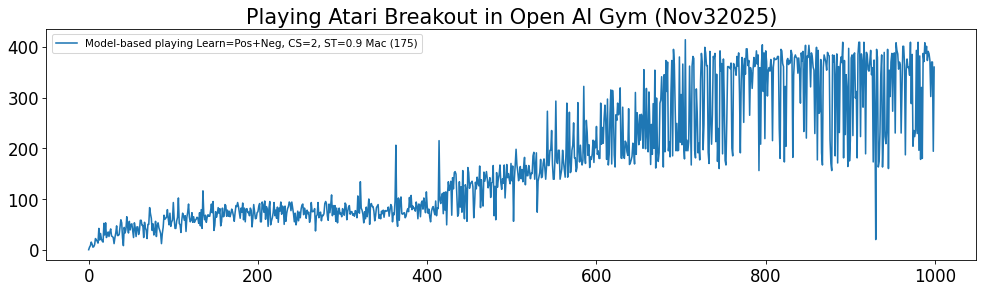

In [40]:
#st=0.9 Mac: 
#python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_ST09_251112 -cs=2 -lm=2python ./aigents-gym/breakout_eval1.py -o=model_Nov32025_PN_CS2_ST09_251112 -cs=2 -lm=2
score_avg=174.9; steps_avg=6873.2; lives_avg=0.0; lapse_avg="0:00:23.658102"; time="6:19:11.941913"
scores = [0, 5.0, 8.0, 15.0, 11.0, 5.0, 6.0, 10.0, 22.0, 19.0, 17.0, 13.0, 42.0, 19.0, 32.0, 21.0, 17.0, 15.0, 52.0, 29.0, 53.0, 24.0, 30.0, 35.0, 26.0, 35.0, 41.0, 27.0, 26.0, 24.0, 12.0, 24.0, 33.0, 47.0, 28.0, 28.0, 30.0, 45.0, 59.0, 53.0, 23.0, 8.0, 44.0, 33.0, 40.0, 65.0, 45.0, 33.0, 56.0, 39.0, 50.0, 51.0, 37.0, 24.0, 53.0, 43.0, 26.0, 45.0, 45.0, 30.0, 38.0, 58.0, 58.0, 48.0, 48.0, 24.0, 54.0, 43.0, 38.0, 22.0, 50.0, 50.0, 83.0, 71.0, 62.0, 38.0, 51.0, 29.0, 36.0, 56.0, 26.0, 48.0, 53.0, 43.0, 38.0, 32.0, 12.0, 32.0, 44.0, 68.0, 60.0, 62.0, 64.0, 79.0, 61.0, 49.0, 72.0, 46.0, 55.0, 58.0, 93.0, 61.0, 42.0, 42.0, 57.0, 64.0, 102.0, 52.0, 49.0, 34.0, 58.0, 72.0, 67.0, 58.0, 67.0, 36.0, 64.0, 74.0, 90.0, 64.0, 55.0, 58.0, 73.0, 54.0, 65.0, 54.0, 58.0, 60.0, 64.0, 62.0, 52.0, 73.0, 47.0, 79.0, 42.0, 116.0, 70.0, 59.0, 68.0, 54.0, 64.0, 69.0, 66.0, 66.0, 76.0, 90.0, 73.0, 95.0, 38.0, 48.0, 75.0, 64.0, 71.0, 83.0, 72.0, 81.0, 47.0, 55.0, 82.0, 65.0, 66.0, 89.0, 87.0, 66.0, 78.0, 66.0, 76.0, 65.0, 71.0, 80.0, 75.0, 67.0, 56.0, 73.0, 87.0, 85.0, 93.0, 85.0, 73.0, 62.0, 82.0, 74.0, 92.0, 59.0, 82.0, 55.0, 80.0, 81.0, 73.0, 74.0, 67.0, 82.0, 78.0, 45.0, 62.0, 89.0, 75.0, 61.0, 62.0, 73.0, 75.0, 86.0, 91.0, 55.0, 55.0, 94.0, 87.0, 74.0, 96.0, 60.0, 85.0, 80.0, 46.0, 81.0, 95.0, 49.0, 57.0, 63.0, 73.0, 93.0, 67.0, 78.0, 62.0, 84.0, 54.0, 82.0, 76.0, 94.0, 70.0, 86.0, 83.0, 50.0, 86.0, 56.0, 72.0, 81.0, 85.0, 94.0, 92.0, 77.0, 94.0, 83.0, 71.0, 55.0, 72.0, 49.0, 59.0, 76.0, 57.0, 74.0, 63.0, 80.0, 88.0, 90.0, 69.0, 82.0, 75.0, 62.0, 78.0, 71.0, 74.0, 54.0, 62.0, 93.0, 75.0, 75.0, 76.0, 81.0, 37.0, 66.0, 69.0, 93.0, 63.0, 72.0, 74.0, 57.0, 68.0, 67.0, 71.0, 91.0, 95.0, 90.0, 67.0, 58.0, 90.0, 73.0, 88.0, 108.0, 67.0, 87.0, 70.0, 87.0, 56.0, 82.0, 53.0, 75.0, 82.0, 70.0, 72.0, 65.0, 81.0, 73.0, 68.0, 92.0, 89.0, 59.0, 75.0, 84.0, 87.0, 70.0, 75.0, 75.0, 68.0, 71.0, 66.0, 77.0, 75.0, 63.0, 106.0, 74.0, 72.0, 134.0, 82.0, 78.0, 70.0, 53.0, 75.0, 61.0, 84.0, 65.0, 79.0, 100.0, 50.0, 89.0, 91.0, 85.0, 85.0, 76.0, 57.0, 67.0, 83.0, 86.0, 89.0, 62.0, 69.0, 61.0, 76.0, 71.0, 78.0, 64.0, 77.0, 77.0, 76.0, 77.0, 84.0, 66.0, 78.0, 89.0, 85.0, 55.0, 72.0, 69.0, 96.0, 206.0, 61.0, 46.0, 102.0, 58.0, 97.0, 104.0, 71.0, 70.0, 72.0, 73.0, 63.0, 66.0, 76.0, 81.0, 75.0, 103.0, 84.0, 107.0, 79.0, 86.0, 81.0, 82.0, 76.0, 94.0, 86.0, 61.0, 90.0, 89.0, 65.0, 92.0, 96.0, 80.0, 102.0, 89.0, 73.0, 114.0, 85.0, 72.0, 80.0, 64.0, 55.0, 75.0, 82.0, 85.0, 76.0, 69.0, 96.0, 67.0, 82.0, 81.0, 215.0, 98.0, 91.0, 105.0, 111.0, 71.0, 113.0, 78.0, 114.0, 49.0, 111.0, 134.0, 117.0, 123.0, 135.0, 68.0, 142.0, 120.0, 152.0, 154.0, 149.0, 109.0, 66.0, 71.0, 134.0, 84.0, 124.0, 74.0, 156.0, 94.0, 61.0, 128.0, 119.0, 56.0, 162.0, 152.0, 121.0, 131.0, 132.0, 135.0, 124.0, 63.0, 91.0, 133.0, 120.0, 143.0, 131.0, 126.0, 165.0, 83.0, 138.0, 104.0, 86.0, 153.0, 135.0, 145.0, 154.0, 139.0, 122.0, 131.0, 142.0, 103.0, 132.0, 133.0, 166.0, 67.0, 125.0, 59.0, 152.0, 123.0, 139.0, 148.0, 167.0, 132.0, 119.0, 140.0, 131.0, 167.0, 102.0, 135.0, 168.0, 142.0, 150.0, 138.0, 130.0, 170.0, 136.0, 165.0, 56.0, 140.0, 167.0, 198.0, 167.0, 154.0, 136.0, 147.0, 164.0, 140.0, 158.0, 134.0, 164.0, 182.0, 128.0, 166.0, 146.0, 146.0, 166.0, 154.0, 140.0, 151.0, 150.0, 185.0, 192.0, 139.0, 164.0, 191.0, 74.0, 135.0, 143.0, 152.0, 178.0, 142.0, 144.0, 170.0, 179.0, 161.0, 139.0, 165.0, 273.0, 166.0, 166.0, 196.0, 196.0, 235.0, 169.0, 139.0, 139.0, 180.0, 293.0, 174.0, 170.0, 196.0, 196.0, 139.0, 149.0, 159.0, 196.0, 174.0, 158.0, 143.0, 191.0, 289.0, 143.0, 173.0, 271.0, 152.0, 154.0, 196.0, 206.0, 250.0, 181.0, 181.0, 154.0, 162.0, 290.0, 195.0, 173.0, 206.0, 178.0, 167.0, 176.0, 322.0, 191.0, 170.0, 255.0, 232.0, 186.0, 207.0, 162.0, 183.0, 178.0, 189.0, 216.0, 172.0, 214.0, 201.0, 243.0, 188.0, 195.0, 180.0, 180.0, 289.0, 208.0, 241.0, 210.0, 258.0, 285.0, 250.0, 178.0, 297.0, 167.0, 188.0, 268.0, 315.0, 169.0, 314.0, 278.0, 187.0, 163.0, 266.0, 255.0, 289.0, 266.0, 275.0, 319.0, 181.0, 180.0, 281.0, 185.0, 180.0, 214.0, 211.0, 193.0, 186.0, 278.0, 168.0, 171.0, 177.0, 184.0, 210.0, 196.0, 169.0, 310.0, 188.0, 270.0, 243.0, 207.0, 266.0, 216.0, 267.0, 261.0, 200.0, 355.0, 244.0, 199.0, 318.0, 224.0, 193.0, 311.0, 247.0, 168.0, 247.0, 188.0, 288.0, 200.0, 354.0, 161.0, 299.0, 206.0, 174.0, 191.0, 289.0, 295.0, 341.0, 293.0, 163.0, 345.0, 193.0, 373.0, 312.0, 370.0, 195.0, 213.0, 183.0, 309.0, 373.0, 185.0, 395.0, 366.0, 275.0, 195.0, 249.0, 195.0, 196.0, 380.0, 212.0, 306.0, 207.0, 366.0, 209.0, 179.0, 414.0, 195.0, 216.0, 195.0, 213.0, 362.0, 267.0, 167.0, 363.0, 381.0, 377.0, 196.0, 181.0, 317.0, 272.0, 191.0, 210.0, 177.0, 334.0, 387.0, 370.0, 197.0, 247.0, 399.0, 388.0, 363.0, 363.0, 192.0, 170.0, 391.0, 258.0, 208.0, 267.0, 381.0, 377.0, 387.0, 213.0, 346.0, 174.0, 239.0, 160.0, 392.0, 352.0, 367.0, 189.0, 376.0, 295.0, 176.0, 167.0, 254.0, 361.0, 361.0, 359.0, 357.0, 368.0, 200.0, 185.0, 367.0, 361.0, 357.0, 344.0, 381.0, 362.0, 388.0, 308.0, 191.0, 333.0, 379.0, 363.0, 251.0, 377.0, 346.0, 396.0, 396.0, 363.0, 373.0, 265.0, 359.0, 349.0, 318.0, 354.0, 379.0, 361.0, 367.0, 392.0, 366.0, 384.0, 156.0, 359.0, 208.0, 366.0, 404.0, 312.0, 388.0, 219.0, 392.0, 371.0, 303.0, 354.0, 359.0, 352.0, 375.0, 359.0, 215.0, 360.0, 378.0, 375.0, 375.0, 376.0, 381.0, 381.0, 239.0, 180.0, 395.0, 392.0, 367.0, 361.0, 173.0, 322.0, 204.0, 373.0, 377.0, 365.0, 373.0, 368.0, 393.0, 385.0, 182.0, 343.0, 379.0, 384.0, 379.0, 378.0, 348.0, 378.0, 352.0, 289.0, 388.0, 372.0, 391.0, 233.0, 352.0, 403.0, 220.0, 382.0, 379.0, 403.0, 381.0, 321.0, 388.0, 380.0, 360.0, 354.0, 229.0, 352.0, 399.0, 177.0, 393.0, 269.0, 273.0, 375.0, 191.0, 167.0, 359.0, 384.0, 377.0, 370.0, 354.0, 389.0, 384.0, 382.0, 216.0, 170.0, 156.0, 384.0, 370.0, 383.0, 185.0, 344.0, 386.0, 171.0, 361.0, 231.0, 362.0, 380.0, 369.0, 409.0, 181.0, 373.0, 227.0, 345.0, 316.0, 164.0, 397.0, 175.0, 216.0, 378.0, 384.0, 225.0, 384.0, 388.0, 299.0, 312.0, 181.0, 385.0, 409.0, 409.0, 223.0, 386.0, 370.0, 281.0, 409.0, 372.0, 189.0, 389.0, 383.0, 355.0, 352.0, 371.0, 393.0, 345.0, 359.0, 173.0, 374.0, 276.0, 20.0, 395.0, 379.0, 163.0, 174.0, 232.0, 346.0, 384.0, 163.0, 227.0, 389.0, 223.0, 209.0, 236.0, 395.0, 160.0, 354.0, 302.0, 370.0, 387.0, 273.0, 386.0, 388.0, 230.0, 408.0, 393.0, 386.0, 356.0, 370.0, 365.0, 230.0, 319.0, 401.0, 401.0, 366.0, 187.0, 354.0, 376.0, 359.0, 360.0, 344.0, 409.0, 288.0, 385.0, 204.0, 235.0, 223.0, 235.0, 393.0, 229.0, 409.0, 196.0, 382.0, 178.0, 320.0, 180.0, 387.0, 371.0, 408.0, 387.0, 401.0, 373.0, 391.0, 386.0, 373.0, 302.0, 370.0, 370.0, 194.0, 360.0]
stepss = [499, 1392, 1541, 2344, 1997, 1325, 1499, 1934, 3256, 2757, 3133, 2436, 5609, 3393, 3658, 3280, 2581, 2684, 5496, 4283, 5480, 3673, 4033, 4425, 3976, 4429, 4862, 3512, 4155, 3760, 2430, 3587, 3921, 5568, 3668, 4181, 4673, 5217, 5269, 5477, 3470, 1516, 5397, 4341, 4915, 5497, 5296, 3909, 6230, 4501, 4784, 4986, 4439, 3645, 4817, 4953, 3922, 4833, 4837, 4113, 4688, 5089, 6082, 4816, 5349, 3521, 5015, 5120, 5001, 3649, 5001, 4997, 6334, 6461, 5870, 5054, 4961, 4129, 4512, 4979, 3944, 5540, 5488, 5069, 4946, 4114, 2428, 4740, 4633, 5530, 5403, 5573, 6106, 6124, 5977, 5108, 6341, 6003, 5429, 5632, 6584, 5419, 4803, 5071, 5205, 5658, 6757, 5200, 4987, 4917, 5476, 6135, 6148, 5597, 5353, 4180, 5819, 5455, 6468, 6005, 5525, 5342, 5637, 5406, 5618, 5085, 5429, 6133, 6074, 6025, 5862, 5906, 5032, 6384, 5347, 7841, 5865, 5550, 5973, 5454, 5566, 6218, 6004, 5939, 6326, 6550, 5842, 7689, 5218, 18000, 6276, 6108, 5362, 6433, 6375, 6618, 5429, 5682, 6479, 5481, 5527, 7023, 6604, 5322, 6421, 5322, 5957, 6316, 6200, 6142, 6300, 5816, 5970, 5945, 6471, 6082, 7073, 6208, 6413, 5653, 6516, 6066, 6892, 5097, 6484, 4857, 6575, 6653, 6105, 6172, 6174, 6526, 6821, 4938, 5653, 6766, 6080, 5682, 5233, 5775, 6141, 6493, 7020, 5026, 5021, 6575, 6320, 6309, 6272, 5402, 6494, 5578, 18000, 6665, 6783, 5393, 5521, 5814, 6318, 6958, 6174, 5778, 5632, 6677, 4846, 6548, 6117, 6939, 6075, 6676, 6367, 4872, 6493, 5423, 6101, 6560, 5787, 6778, 6894, 6408, 6939, 6369, 5541, 5651, 6496, 18000, 5485, 6246, 18000, 5777, 5530, 6474, 6600, 6672, 6243, 6399, 6105, 5595, 6870, 6180, 5496, 5490, 5924, 7050, 5886, 6277, 5683, 6079, 4444, 5894, 6017, 6561, 5752, 5558, 6446, 5447, 5921, 5895, 6295, 6955, 6534, 7082, 5820, 5523, 6832, 5374, 6591, 6628, 6120, 6404, 5914, 6686, 18000, 6668, 5294, 5580, 6380, 5155, 6483, 5736, 6087, 5902, 5693, 6996, 6119, 5578, 6295, 6357, 6264, 5966, 5687, 5677, 6099, 6180, 5407, 6477, 6319, 5614, 6667, 5634, 5774, 7896, 6022, 6602, 5966, 5465, 6400, 5373, 6454, 6322, 5970, 6817, 5082, 6427, 6784, 6204, 6295, 6684, 5354, 5910, 6178, 6502, 6966, 5380, 6098, 5710, 6233, 5863, 6041, 5509, 5901, 5934, 5802, 5988, 5703, 5818, 6109, 6207, 5409, 5216, 6343, 6308, 6245, 6226, 6034, 4780, 7293, 5623, 7153, 6573, 6069, 5673, 6326, 5559, 6145, 5185, 6119, 6109, 6154, 6266, 6017, 6664, 6275, 6428, 6079, 6196, 6043, 6030, 6972, 5377, 6496, 5995, 5090, 6083, 6318, 6035, 6755, 5629, 6110, 7068, 6178, 5811, 6171, 5572, 4910, 5490, 6185, 6371, 5596, 6024, 6303, 5558, 6103, 6798, 6440, 6511, 6467, 6156, 6513, 6053, 6547, 6591, 6638, 5393, 6334, 6225, 6187, 6464, 6780, 6103, 6877, 6215, 6996, 6998, 6985, 6090, 5782, 5985, 6225, 6343, 6311, 5878, 7162, 6957, 6130, 6647, 6157, 5815, 7038, 7071, 6516, 6556, 6414, 6430, 6594, 5961, 6705, 6565, 6406, 6750, 6345, 6391, 6998, 6634, 6476, 6961, 6881, 7130, 6629, 6323, 6552, 6442, 6286, 6361, 6341, 7234, 6708, 6452, 7213, 5967, 6342, 5195, 6992, 6467, 6859, 6885, 7306, 6916, 6052, 6535, 6505, 7306, 7069, 6909, 6734, 6394, 6850, 6281, 6295, 7351, 6738, 7585, 5854, 6535, 7325, 7354, 7305, 6949, 6477, 6915, 7354, 6374, 6608, 6653, 7395, 7563, 6643, 7414, 6883, 6902, 7286, 6988, 6374, 6970, 6887, 6972, 7286, 6483, 6959, 7490, 6002, 6741, 6596, 6883, 7130, 6829, 6918, 7331, 7650, 7054, 6833, 7170, 7726, 6781, 6933, 7645, 7649, 7332, 7200, 6483, 6641, 7178, 7719, 7376, 6969, 7650, 7700, 6783, 6856, 6682, 7810, 7224, 6613, 6944, 7190, 7402, 6753, 6869, 7203, 6867, 6686, 7696, 7580, 7344, 7356, 7108, 6686, 6644, 7445, 7098, 7130, 7377, 7390, 7212, 7095, 7950, 7278, 7198, 7822, 8030, 7773, 7611, 6689, 6930, 7114, 7254, 7479, 6730, 7454, 7516, 7482, 7426, 7254, 6942, 7210, 8433, 7550, 7413, 7654, 7538, 7837, 8091, 7390, 7519, 7212, 7170, 7860, 7818, 7030, 7656, 7192, 7742, 7060, 7688, 7369, 7450, 7686, 7680, 7975, 7305, 7058, 7056, 7428, 7092, 7583, 7688, 7538, 6938, 7192, 7522, 7180, 7238, 7321, 7592, 7500, 7024, 8487, 7431, 7908, 7970, 7534, 7684, 7573, 8048, 7944, 7534, 7786, 7834, 7334, 7730, 7606, 7538, 7980, 7280, 6686, 7280, 7456, 8234, 7436, 7715, 6610, 8073, 7378, 7496, 7422, 7497, 7162, 8246, 7211, 7050, 8308, 7538, 8717, 7906, 8733, 7124, 7456, 6918, 7674, 8665, 7225, 8962, 8516, 7806, 7128, 8009, 7124, 7209, 8547, 7268, 8177, 7512, 8771, 7345, 7246, 9089, 7194, 7424, 7124, 7452, 8486, 7710, 7168, 8507, 8770, 8938, 7393, 7301, 7357, 7656, 7066, 7625, 7024, 7756, 8724, 8576, 7574, 7276, 8969, 8557, 8503, 8503, 7231, 7166, 8537, 7581, 7207, 7706, 8229, 8600, 8209, 7460, 7800, 7494, 7361, 18000, 8594, 8522, 8131, 7591, 8483, 7166, 6922, 7168, 8101, 8231, 8231, 8460, 8126, 8551, 7547, 7338, 8123, 8231, 8475, 8336, 8117, 8723, 8885, 7558, 7350, 7907, 8130, 8009, 7420, 8600, 8178, 8982, 8222, 8618, 8584, 8138, 8462, 8424, 7860, 8060, 8177, 8231, 8223, 8351, 8645, 8639, 6997, 8442, 7632, 8576, 8310, 8001, 8177, 7487, 8456, 8329, 7594, 7715, 18000, 8067, 8117, 8625, 7775, 8593, 8103, 8488, 8028, 8693, 8385, 8962, 7357, 6999, 8354, 8355, 8028, 8231, 7139, 7830, 7654, 7646, 8569, 8543, 8717, 8483, 8532, 8856, 7170, 7712, 8322, 8851, 8469, 8257, 8539, 8257, 7701, 7600, 8294, 8506, 8359, 7955, 7701, 8920, 7525, 8463, 8741, 8915, 8389, 7508, 8553, 8833, 8689, 8163, 7794, 8446, 8546, 7024, 8422, 7954, 7821, 8405, 7342, 6818, 7840, 8639, 8805, 8555, 8159, 8528, 8442, 8397, 7822, 7162, 7014, 8670, 8748, 8381, 7066, 8155, 8664, 6918, 8109, 7914, 8647, 8525, 8704, 9174, 7297, 8393, 7725, 8453, 8286, 6846, 8375, 7094, 7425, 8082, 8368, 7667, 8368, 8383, 7310, 7853, 6967, 8133, 9174, 9202, 7445, 8435, 8265, 7906, 9202, 8264, 7359, 8847, 8377, 8397, 8064, 8337, 8429, 8365, 8626, 7094, 8429, 7738, 3036, 8461, 8427, 7090, 7398, 7742, 7876, 8368, 7094, 7842, 9012, 7831, 7345, 7856, 8453, 18000, 8255, 7272, 8748, 8595, 8217, 8504, 8236, 7899, 8538, 8531, 8443, 8098, 8748, 8391, 8104, 8292, 8800, 8641, 8164, 7214, 8155, 8352, 8630, 7883, 8254, 9198, 7978, 8149, 7322, 7745, 7441, 7753, 8336, 7770, 9194, 7812, 8150, 7390, 8546, 7391, 8616, 8090, 8542, 8612, 8807, 7953, 8220, 8268, 7949, 7256, 8748, 8748, 7523, 8042]
livess = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
lapses = [0, 1, 4, 12, 12, 14, 15, 25, 29, 15, 26, 22, 42, 19, 26, 15, 13, 26, 37, 40, 30, 24, 16, 29, 19, 14, 27, 19, 30, 20, 20, 42, 45, 43, 36, 18, 33, 49, 32, 25, 16, 17, 67, 32, 29, 46, 53, 19, 58, 21, 22, 37, 18, 24, 35, 41, 17, 44, 12, 12, 25, 20, 23, 21, 55, 8, 23, 15, 14, 14, 9, 12, 31, 35, 19, 14, 22, 23, 35, 49, 20, 40, 24, 33, 45, 15, 9, 48, 20, 31, 24, 21, 38, 60, 46, 33, 49, 28, 41, 69, 58, 41, 17, 21, 18, 21, 30, 25, 18, 59, 23, 35, 25, 30, 18, 24, 31, 36, 25, 37, 27, 24, 31, 26, 26, 24, 19, 28, 18, 40, 19, 19, 40, 32, 33, 49, 30, 15, 46, 9, 9, 19, 34, 37, 15, 32, 24, 94, 16, 15, 18, 19, 15, 37, 14, 40, 37, 13, 23, 12, 16, 41, 28, 42, 50, 8, 17, 24, 14, 28, 20, 10, 45, 19, 34, 15, 23, 17, 25, 17, 13, 20, 22, 13, 20, 18, 30, 15, 25, 56, 11, 23, 36, 13, 4, 22, 26, 14, 14, 18, 10, 39, 16, 8, 13, 20, 22, 19, 18, 24, 20, 13, 12, 49, 18, 6, 32, 8, 17, 20, 24, 13, 24, 38, 4, 26, 17, 26, 24, 16, 21, 34, 14, 18, 21, 22, 23, 21, 18, 12, 10, 13, 17, 27, 22, 18, 8, 25, 20, 10, 59, 31, 31, 14, 24, 17, 39, 47, 18, 32, 21, 8, 10, 22, 16, 14, 16, 12, 27, 21, 25, 36, 22, 32, 30, 12, 43, 7, 16, 31, 44, 25, 13, 8, 30, 21, 22, 36, 22, 24, 35, 9, 17, 23, 12, 30, 19, 11, 39, 14, 19, 15, 22, 16, 27, 16, 23, 31, 37, 8, 16, 23, 16, 12, 19, 21, 16, 5, 34, 22, 18, 47, 38, 34, 5, 16, 18, 11, 15, 7, 5, 18, 13, 36, 18, 6, 30, 20, 13, 20, 36, 27, 22, 5, 13, 10, 15, 23, 15, 26, 26, 7, 24, 37, 20, 36, 27, 36, 19, 18, 17, 23, 36, 28, 14, 13, 9, 8, 46, 35, 14, 7, 53, 16, 19, 5, 21, 23, 6, 9, 28, 18, 24, 42, 5, 26, 24, 21, 16, 15, 23, 13, 14, 16, 10, 18, 28, 5, 22, 16, 36, 18, 16, 15, 18, 14, 13, 16, 8, 22, 6, 5, 7, 28, 32, 7, 28, 14, 13, 29, 20, 26, 14, 6, 34, 15, 5, 7, 26, 13, 22, 9, 18, 15, 5, 5, 7, 32, 4, 29, 6, 25, 5, 8, 29, 6, 6, 9, 11, 19, 13, 8, 6, 9, 11, 16, 11, 13, 19, 17, 30, 14, 11, 13, 15, 18, 26, 14, 10, 6, 12, 23, 10, 9, 28, 32, 16, 8, 15, 24, 17, 20, 8, 35, 31, 13, 9, 6, 8, 16, 18, 8, 34, 13, 14, 8, 14, 5, 18, 16, 11, 15, 13, 11, 27, 18, 20, 14, 23, 15, 28, 5, 12, 5, 19, 21, 28, 20, 21, 41, 10, 17, 5, 23, 11, 31, 10, 4, 18, 8, 12, 38, 16, 28, 16, 23, 10, 26, 13, 29, 8, 8, 32, 10, 11, 19, 11, 58, 15, 14, 20, 26, 18, 12, 6, 18, 39, 23, 21, 28, 12, 19, 14, 14, 15, 25, 14, 15, 19, 15, 8, 11, 7, 16, 25, 7, 7, 11, 5, 16, 22, 12, 12, 14, 23, 16, 20, 7, 35, 7, 15, 21, 8, 27, 15, 18, 21, 7, 24, 17, 17, 17, 18, 18, 10, 18, 20, 27, 9, 13, 39, 17, 9, 17, 10, 18, 48, 68, 10, 29, 15, 30, 20, 29, 19, 14, 6, 27, 27, 10, 13, 17, 11, 14, 11, 12, 9, 23, 14, 11, 12, 17, 23, 12, 18, 13, 26, 25, 11, 15, 21, 16, 24, 29, 34, 24, 23, 18, 16, 20, 7, 5, 41, 6, 12, 13, 10, 27, 15, 37, 18, 40, 18, 18, 10, 20, 33, 46, 30, 10, 52, 5, 55, 21, 27, 18, 16, 13, 20, 20, 20, 41, 36, 25, 7, 17, 17, 17, 38, 18, 27, 21, 42, 9, 16, 47, 16, 17, 16, 36, 37, 46, 18, 26, 22, 19, 28, 14, 35, 47, 9, 23, 24, 24, 31, 24, 23, 8, 62, 49, 13, 11, 12, 9, 15, 17, 28, 8, 41, 32, 29, 9, 21, 29, 40, 12, 37, 52, 28, 17, 83, 17, 42, 25, 39, 21, 11, 57, 30, 71, 14, 26, 23, 31, 61, 37, 24, 83, 63, 34, 17, 30, 59, 80, 22, 21, 75, 71, 18, 69, 27, 39, 34, 69, 54, 24, 28, 16, 26, 17, 56, 26, 11, 28, 12, 28, 31, 17, 17, 29, 15, 20, 24, 6, 19, 36, 34, 23, 20, 80, 13, 25, 21, 14, 16, 32, 24, 17, 26, 18, 50, 14, 15, 37, 19, 55, 33, 29, 18, 30, 39, 14, 19, 58, 17, 28, 66, 22, 24, 12, 36, 23, 20, 32, 31, 20, 46, 15, 11, 24, 30, 8, 11, 23, 28, 23, 33, 14, 10, 10, 21, 15, 50, 17, 23, 38, 19, 5, 18, 15, 39, 18, 14, 41, 32, 71, 9, 15, 21, 15, 31, 11, 15, 35, 24, 12, 22, 40, 22, 15, 33, 112, 17, 19, 18, 7, 21, 19, 14, 11, 17, 29, 15, 23, 10, 22, 26, 28, 27, 7, 25, 84, 18, 38, 105, 21, 12, 24, 5, 25, 10, 32, 30, 24, 14, 19, 18, 15, 35, 14, 209, 17, 26, 17, 28, 20, 11, 9, 9, 20, 114, 16, 19, 31, 9, 11, 25, 25, 11, 11, 11, 38, 30, 11, 22, 19, 19, 16, 9, 16, 16, 23, 25, 21, 20, 20, 21, 11, 17, 9, 22, 10, 23, 19, 9, 6, 8, 5, 14, 20, 24, 7, 15, 7, 30, 17, 31, 19, 8, 13, 32, 34, 24, 24, 19, 11, 10, 6, 8, 24]
states = [344, 1253, 1955, 2898, 3285, 3705, 4122, 4463, 4780, 4912, 5151, 5306, 5609, 5698, 5865, 5929, 6042, 6114, 6302, 6443, 6536, 6578, 6664, 6751, 6790, 6846, 6929, 6973, 7024, 7112, 7177, 7267, 7414, 7523, 7614, 7677, 7728, 7869, 7904, 7955, 7980, 8009, 8182, 8250, 8315, 8364, 8450, 8537, 8689, 8762, 8811, 8915, 8963, 9012, 9060, 9102, 9151, 9242, 9265, 9276, 9330, 9353, 9372, 9388, 9415, 9423, 9449, 9485, 9493, 9497, 9506, 9526, 9555, 9600, 9607, 9646, 9666, 9703, 9723, 9826, 9863, 9929, 9949, 9986, 10044, 10073, 10080, 10132, 10165, 10235, 10257, 10275, 10332, 10406, 10474, 10491, 10549, 10586, 10626, 10715, 10771, 10815, 10830, 10847, 10868, 10882, 10894, 10919, 10942, 10995, 11019, 11049, 11082, 11105, 11116, 11122, 11153, 11194, 11232, 11286, 11309, 11314, 11374, 11387, 11413, 11429, 11452, 11479, 11496, 11523, 11530, 11541, 11573, 11611, 11627, 11672, 11714, 11723, 11773, 11795, 11802, 11817, 11848, 11904, 11913, 11948, 11975, 12064, 12075, 12085, 12095, 12138, 12150, 12181, 12184, 12210, 12254, 12260, 12277, 12283, 12294, 12354, 12366, 12400, 12436, 12439, 12450, 12468, 12484, 12507, 12522, 12525, 12556, 12589, 12625, 12633, 12656, 12662, 12693, 12703, 12708, 12735, 12759, 12768, 12783, 12796, 12814, 12821, 12853, 12903, 12915, 12925, 12945, 12960, 12962, 12977, 12991, 12995, 13002, 13018, 13023, 13061, 13070, 13073, 13079, 13099, 13110, 13122, 13136, 13154, 13172, 13184, 13186, 13224, 13243, 13244, 13253, 13272, 13282, 13289, 13305, 13316, 13331, 13368, 13375, 13391, 13419, 13440, 13456, 13467, 13473, 13496, 13511, 13524, 13533, 13550, 13565, 13582, 13604, 13610, 13618, 13619, 13637, 13645, 13666, 13679, 13681, 13697, 13708, 13710, 13719, 13749, 13768, 13786, 13800, 13813, 13823, 13845, 13847, 13870, 13874, 13874, 13878, 13888, 13907, 13909, 13918, 13920, 13933, 13951, 13963, 13985, 13993, 14015, 14023, 14026, 14050, 14058, 14062, 14086, 14114, 14127, 14135, 14137, 14165, 14175, 14195, 14205, 14210, 14233, 14247, 14248, 14253, 14264, 14265, 14272, 14278, 14280, 14303, 14316, 14326, 14337, 14344, 14350, 14359, 14360, 14382, 14395, 14415, 14420, 14431, 14436, 14443, 14445, 14454, 14467, 14478, 14478, 14490, 14494, 14502, 14523, 14542, 14563, 14565, 14576, 14586, 14587, 14593, 14596, 14597, 14604, 14605, 14612, 14618, 14619, 14627, 14637, 14645, 14651, 14674, 14688, 14697, 14697, 14701, 14706, 14707, 14729, 14741, 14747, 14772, 14779, 14783, 14811, 14813, 14829, 14839, 14847, 14867, 14875, 14878, 14888, 14906, 14913, 14919, 14920, 14924, 14925, 14953, 14961, 14980, 14983, 15008, 15019, 15036, 15039, 15044, 15060, 15060, 15061, 15063, 15068, 15081, 15094, 15100, 15112, 15119, 15130, 15139, 15145, 15149, 15152, 15161, 15171, 15171, 15174, 15179, 15180, 15182, 15198, 15215, 15224, 15232, 15237, 15248, 15268, 15274, 15278, 15280, 15286, 15288, 15288, 15290, 15301, 15307, 15313, 15328, 15344, 15347, 15352, 15362, 15371, 15376, 15378, 15404, 15407, 15408, 15410, 15419, 15425, 15430, 15437, 15441, 15453, 15456, 15457, 15457, 15465, 15465, 15480, 15490, 15496, 15497, 15498, 15506, 15509, 15512, 15512, 15517, 15521, 15528, 15528, 15530, 15530, 15530, 15544, 15546, 15551, 15557, 15567, 15567, 15582, 15584, 15586, 15588, 15590, 15601, 15610, 15612, 15614, 15616, 15626, 15628, 15630, 15635, 15656, 15663, 15669, 15672, 15678, 15682, 15687, 15688, 15706, 15730, 15734, 15734, 15735, 15739, 15745, 15754, 15754, 15757, 15767, 15770, 15771, 15776, 15776, 15778, 15783, 15794, 15795, 15797, 15799, 15802, 15811, 15818, 15820, 15825, 15827, 15837, 15843, 15847, 15847, 15853, 15855, 15856, 15863, 15865, 15877, 15882, 15888, 15893, 15898, 15899, 15907, 15907, 15907, 15913, 15915, 15917, 15922, 15932, 15936, 15949, 15955, 15959, 15967, 15975, 15984, 15984, 15985, 15992, 15999, 16002, 16008, 16009, 16035, 16036, 16037, 16043, 16052, 16055, 16057, 16057, 16058, 16069, 16077, 16080, 16090, 16090, 16094, 16098, 16099, 16105, 16105, 16110, 16113, 16115, 16116, 16116, 16118, 16118, 16118, 16127, 16127, 16127, 16127, 16129, 16134, 16139, 16143, 16147, 16153, 16159, 16163, 16171, 16172, 16174, 16179, 16182, 16189, 16190, 16197, 16202, 16209, 16210, 16216, 16219, 16224, 16226, 16237, 16237, 16239, 16243, 16247, 16255, 16256, 16258, 16264, 16271, 16280, 16281, 16285, 16288, 16290, 16296, 16337, 16339, 16339, 16343, 16349, 16351, 16356, 16358, 16362, 16362, 16362, 16372, 16374, 16375, 16378, 16379, 16384, 16384, 16388, 16388, 16395, 16395, 16395, 16397, 16399, 16401, 16403, 16408, 16409, 16411, 16420, 16425, 16427, 16431, 16434, 16435, 16438, 16441, 16452, 16454, 16454, 16456, 16462, 16463, 16463, 16471, 16473, 16477, 16479, 16479, 16480, 16487, 16491, 16502, 16510, 16513, 16516, 16517, 16517, 16521, 16524, 16534, 16534, 16540, 16551, 16563, 16564, 16567, 16575, 16575, 16580, 16581, 16600, 16603, 16609, 16624, 16625, 16625, 16629, 16634, 16641, 16647, 16654, 16665, 16667, 16674, 16681, 16685, 16688, 16696, 16700, 16708, 16716, 16724, 16731, 16752, 16757, 16772, 16775, 16780, 16780, 16783, 16790, 16791, 16795, 16800, 16810, 16815, 16829, 16833, 16833, 16844, 16863, 16866, 16867, 16868, 16868, 16868, 16871, 16872, 16874, 16883, 16894, 16902, 16908, 16910, 16910, 16915, 16930, 16939, 16945, 16945, 16946, 16950, 16956, 16964, 16970, 16980, 16982, 16982, 16988, 16988, 17007, 17010, 17011, 17013, 17021, 17030, 17036, 17042, 17055, 17076, 17083, 17083, 17088, 17101, 17112, 17115, 17126, 17126, 17143, 17145, 17152, 17161, 17162, 17169, 17179, 17198, 17208, 17219, 17223, 17235, 17235, 17255, 17257, 17263, 17279, 17281, 17282, 17291, 17292, 17296, 17303, 17306, 17314, 17317, 17318, 17318, 17322, 17332, 17344, 17346, 17351, 17353, 17374, 17379, 17380, 17383, 17397, 17398, 17400, 17400, 17407, 17415, 17416, 17416, 17424, 17426, 17441, 17455, 17459, 17469, 17485, 17487, 17492, 17493, 17498, 17503, 17513, 17522, 17523, 17532, 17535, 17536, 17543, 17544, 17548, 17548, 17554, 17555, 17556, 17557, 17571, 17589, 17589, 17591, 17592, 17597, 17604, 17614, 17617, 17618, 17618, 17619, 17621, 17624, 17628, 17630, 17649, 17651, 17651, 17653, 17654, 17660, 17662, 17664, 17666, 17682, 17689, 17692, 17692, 17697, 17697, 17697, 17699, 17702, 17710, 17722, 17722, 17725, 17729, 17733, 17737, 17747, 17779, 17787, 17811, 17816, 17817, 17820, 17821, 17826, 17826, 17826, 17828, 17830, 17831, 17832, 17835, 17839, 17839, 17844, 17845, 17849, 17850, 17863, 17869, 17879, 17894, 17895, 17898, 17899, 17905, 17906, 17907, 17918, 17927, 17928, 17930, 17935, 17936, 17937, 17938, 17955, 17958, 17966, 17971, 17978, 17980, 17981, 17981, 17982, 17984, 17990, 17994, 17996, 18000, 18001, 18002, 18007, 18009, 18010, 18011, 18011, 18011, 18013, 18022, 18023, 18029, 18033, 18034, 18035, 18037, 18039, 18041, 18047, 18050, 18052, 18053, 18055, 18057, 18063, 18063, 18067, 18067, 18070, 18070, 18070, 18070, 18070, 18070, 18076, 18078, 18079, 18079, 18080, 18080, 18093, 18095, 18098, 18103, 18104, 18105, 18106, 18117, 18122, 18125, 18125, 18125, 18125, 18125, 18125, 18127]

plt.rcParams["figure.dpi"] = 75

df = pd.DataFrame({f'Model-based playing Learn=Pos+Neg, CS=2, ST=0.9 Mac ({round(np.mean(scores))})': pd.Series(scores)})
p = df.plot(figsize=(16, 4),fontsize=16);p=plt.title("Playing Atari Breakout in Open AI Gym (Nov32025)", fontsize=20);plt.show()

#st=0.9 Mac:
# Mac: LEFT... 


## Closed, see "gym_atari_breakout_experiential2.ipynb"